# Structured API Overview
In this lesson we will talk about Spark Api overview (Dataframes, Datasets, RDD, and some operations)

Structured APIs are a tool for manipulating all kinds of data structured(Parquet files), unstructured(Log files) and semi-structured(CSV files)

## Summary
- <a href='#1'>1. Context and Motivation</a>
- <a href='#2'>2. Dataframes and Datasets</a>
    - <a href='#2.2'>2.2.  Columns</a>
    - <a href='#2.3'>2.3.  Rows</a>
    - <a href='#2.4'>2.4.  Spark Types</a>
- <a href='#3'>3. API Execution</a>
    - <a href='#3.1'>3.1.  Logical Planning</a>
    - <a href='#3.2'>3.2.  Physical Planning </a>
    - <a href='#3.3'>3.3.  Execution</a>
- <a href='#4'>4. Structed Operations </a>
    - <a href='#4.1'>4.1.  Columns and Expressions</a>
    - <a href='#4.2'>4.2.  Records and Rows </a>
- <a href='#5'>5.  Exercises</a>
- <a href='#6'>6.  References</a>

# <a id='1'>1.Context and Motivation</a>

In order to do analysis with data we need structured the data and put the data in that structure.  
In this class we will deep dive in Dataframes, Datasets operations and Optimizations.

# <a id='2'>2. Dataframes and Datasets</a>
There are three core types of distributed collection API's

* Datasets
* DataFrames
* SQL tables and views

Theses structured API's are the abstractions on we will write the the majority of data flows

Datasets and Dataframes are distributed table-like collections with well defined rows and columns. Each column must have the same number of rows as all the other columns. Each column has a type information that is consistent for every row in the collection.   

For Spark Dataframes and Datasets are imutable  lazy evaluated plans the specify transformations/operations to apply to data to generate some output. When we call action we instruct spark to do all the transformations/operations and return the result.


In [ ]:
#What is the diference between DataFrames and Datasets?

## <a id='2.2'>2.2. Columns</a>
Columns represent a simple type like an integer or string, a complex type like an array or map, or a null value.

## <a id='2.3'>2.3. Rows</a>
Row is a record of data


In [ ]:
spark.range(2).collect() # creates two rows and print them.

## <a id='2.4'>2.3. Spark Types</a>

In [ ]:
from pyspark.sql.types import *
b = ByteType()

Data Type | Value in Python | API to access or create a data type 
:-:|-|-
`ByteType` | int or long Ensure number within a range -128 to 127 | ByteType()
`ShortType` | int or long  | ShortType()
`IntegerType` | int or long | IntegerType()
`LongType` | long | LongType()
`FloatType` | float | FloatType()
`DoubleType` | float | DoubleType()
`DecimalType` | decimal | DecimalType()
`StringType` | string | StringType()
`BinaryType` | bytearray | BinaryType()
`BooleanType` | decimal | BooleanType()
`TimeStampType` | datetime.datetime | TimeStampType()
`DateType` | datetime.date | DateType()
`ArrayType` | list, tuple, or array | ArrayType()
`MapType` | dict | MapType()
`StructType` | list or tuple | StructType()
`ArrayType` | list, tuple, or array | ArrayType()
`StructField` | list, tuple, or array | StructField(name, dataType, [nullable])

# <a id='3'>3. API Execution</a>

In this section we will demonstrate how spark optimize queries.

We can either submit code to Spark either though the console or via submitted job.   
The code passes through the Catalyst Optimizer witch decides how code will be executed and lays out a plan for doing so before. Finally the code is run and the result is returned to the user.



<img src="data:image/jpeg;base64, iVBORw0KGgoAAAANSUhEUgAAA/cAAAIMCAYAAACwpFyhAAAAAXNSR0IArs4c6QAAQABJREFUeAHsvWe0ZklZ/l0dTp8+neNMT+7pCcyQhgEUfJGkYg6gmBFcRpaLJbj0+//9+90PupZrqUtciqCYWIDiK6CgIkMQZsiTE5One3o65z79Xr+79vWcOnue56Q+Heeu7n12hbvuuuuq2uGqql3PklOnTr2hlPJ6HekSgUQgEUgEEoFEIBFIBBKBRCARSATOAQKTk5Nl6dKl56DkLPIiQeC/lqsib9Dxfy6SCmU1EoFEIBFIBBKBRCARSAQSgUTgPEdAE4wDC+1fsmRJxHF23ECo8Viuibogvf06ut4XQv2wnWOYrcPizmYDtbjaRmPrsO1xvMNOP9d1sD3zPP/fHBqaJ2IpnggkAolAIpAIJAKJQCKQCCQCi4OASVRLyJjBtiO+TSO+H7bshXS+GOpgvN2GDp/rupmwz9aPsBdbfbge59p+47iQc5L7haCWeRKBRCARSAQSgUQgEUgEEoFE4LQQMJlCyWx+E7ALmXgZrH4d2roj0093vvPtjN0crb2t/3ywt8XW/r6NbT3sPx9sX4gNLMtPlwgkAolAIpAIJAKJQCKQCCQCicBZQWAYuXLBToNk2U+aiVnf73wX4tl1op4cDl9IdWlnx90257oexrJvh8O22eE+3qPi+3LnYzhn7s/HVkmbEoFEIBFIBBKBRCARSAQSgec5Ai3JMtFv4y5UeFwHk3rqQdyFVseWRGN/W6/zoW1ae7DVpJ5NC1t7zwdbF8uGnLlfLCRTTyKQCCQCiUAikAgkAolAIpAIzIoAxKoltm2GAwcOlEcffbRMTEyUK6+8soyNjU2TvdAIcFs3+113k0/HcyZtWHwrcz74Dx48WP7nf/6nHD58uHz3d3932bJlS5h1Ptjfx8/hJ554onz2s58tGzZsCJtXrlwZNjv9fMD1dG1Icn+6CGb+RCARSAQSgUQgEUgEEoFEIBGYMwImt2SAWHEQh4N8vf/97w+y+La3va288pWvjHhmW53vYiBje/fuLQ8//HDUafv27UE4qeiFUrf77ruvvPe97y3PPvts2P6GN7xhMDBxPtYBm26//fbyB3/wB+UFL3hBAfPrr78++pb73vlodxg4jz9J7ucBVoomAolAIpAIJAKJQCKQCCQCicBwBJh137NnT9m/f3+BvB45cmQacV+9enXZuHFjEPf169eHEgiVyRURX/7yl8s//MM/lDVr1pRrr712QO5dIvLnIwmjDsPsct369fyv//qv8r73vS+Wir/jHe8ob3nLW1zFkedhutoy2/SRSpRgOcu0OhzXni3fyu3cubM8+eSTBZJ/9913F8i905G3v9XT+vs6Z8tDn6JvsWKA89GjR6Mezkd/YUaeFQTuWy7PtmDvY489Frbdf//95YYbbggR2+Iz8qP8ZGjT2nAoG/LH+nxuRWyb49Ddj3PaXM5J7ueCUsokAolAIpAIJAKJQCKQCCQCiUAg0JIbCNMdd9wRBA/iBPEyyYfct64lYMya3nzzzeVFL3pRueSSSwZiJ06cKBwMDnDgTHZ8HgifIU/7bbbr2trRxg0zwemtvY6zPBg98sgjUcfHH398QBhJt+yo/Ng3Ks3653N2ef08bRmktXKQaI4vfOELQZhp6/Hx8VDRz9fX63CrjziHyY+fvvXVr341+paxmmvfYnaevrVt27YoDn22mX7Kpx/EDbPV7W87+vY6X1+u1YUMrtXhOOvz2fFtfqfN95zkfr6IpXwikAgkAolAIpAIJAKJQCLwPEYAEnL8+PHypS99qXzoQx+Kb6/vuuuuIPYmKMzQM5MKATIZ8qwr5H3r1q2xPPqWW24p3/u931te85rXlOXLlw8IveFdTOJjnfM5t+W3ZG6YDtJdf9Kdt/XzeQGOmW5mmBnAeNnLXhZx5B2WJxL1p5/eDyPXlu98/XNfpi3Tso6zrMOkEwdp5qAtd+3aFfW49NJLI7vzWNeocyuH32Wg83//93/LP/3TP5Xbbrut0LdY/m/5devWxQqQ9lMN+hYyJ0+efE7fYk+ATZs2FezDZlYaPPPMM8/ZYA87bUNrc2sb8YT7ccST12mERznLcbYfWfw+o2chLsn9QlDLPIlAIpAIJAKJQCKQCCQCicDzGAFmVP/wD/+w/Ou//mvM1EPMr9Uyeojqjh07ylVXXRUErCX3LK1mNvbBBx+MGV++r//c5z5XPvOZz5Tf+Z3fiSX4zPzjTHRMcloSdKZhhzRi9yiybpuwA79tJWw7Hd+GnU7cFVdcEQdxdtbjM/HosS7b4wECwriW5BJGfjZHGRytfpdr/eiwnP3WzcCNl79Dqjkgz06fqXyXg6z97fkrX/lK+aM/+qPysY99bFrfYiCIFR+XX375gNwbA8g9G+bxmQCrCdjs7/Of/3yc3/Oe95Sf/MmfjMEm7GaVgZf2e7WBy7f9DnPmcLzrRZxxcjpn48S5rZ/j+3paOecfJoPcXFyS+7mglDKJQCKQCCQCiUAikAgkAolAIhAIQOT+5V/+pXzyk58M8gWpe+Mb3xgz8K94xSvKddddF9/MG66W/PCt9EMPPVQ+9alPxcZ5zP5/7WtfC30sm8ZZHpLTJ0jWeS7OJnPDyrbNTjPptP19wjaMyFkWHa28Za2bs+Ocpy2/9bd5Wj8ylrOtbXrrty3I4wiz0zwHfogyfaLV6Tytntn81kXf+vjHPx59i5n217/+9YO+Bblfu3btoCzbwxnSTt/6j//4j/KBD3wg9m9gEIpBgpe//OXRJ71DPvayagL9bb1sY2u/cXJae3beNg4/+tHBYIId4VZvP2y50zknuT8d9DJvIpAIJAKJQCKQCCQCiUAi8DxD4IEHHgjiBIGBkL/1rW8tv/mbvxnL7JctWzYNjZb8QI4hVzfddFPMWrOEmpl8do1naTcz+yZfbL63atWqAfGapvQMB0zmmA3GJvYK4MBByNo6tcTY+frmtYSONHAgH6R43759oRsS6MEDn9HX19mWbb2O69vWt8NhyzvMmTjKnUlHa5fzkg9SzaDNTHktz3mY3cSDCTPvbKpI3+LTjZ/6qZ8qv/7rvx59hp9FxI2yn1l4+hY/oYh76qmnguyz+R/9y21IGvZiNw59fZsiQX+I58A2zmDg8n1uZfGzauDDH/5w7Cnx5je/uWzevHmgn3TK5Zt/6rp79+7CNcOAGHtQ0O9PxyW5Px30Mm8ikAgkAolAIpAIJAKJQCLwPEOA2VEIOY6l0j/7sz8bm5eNgmEYcWL2FTIDEUMXpJ5ZVC/1bpd9O/8o/Wcinu++//M//zNmkKnjj/7oj8ay8z6ho2zsQ57vuNn4jQELSDv7EiBPXZlx5jDBJM9///d/l4985COx38BP/MRPBAlEX1tGSyZJs6M8Zp4ZgIB4kmfFihUxUzwXgmhMyWc/utmwjvaFEDP4gsPma6655jmz3M7HIAW2OByZ5vGnrS9lc+Dct17ykpdEuG8r5XE43nqwlw31+PQBXfQtjtY+bObAGWPricjuj+Mg4XxOQj2Rh5DTV8HFs/Popz34VIXPCn7wB38wPlOB3OMOHz4c3/vT7uwpcO+99w7I/Y033lh+6Zd+KfK4j3QmzOuU5H5ecKVwIpAIJAKJQCKQCCQCiUAi8PxGgG+bOXDMOEJaTbJmQ6ZPsJihhSht73533DP3fMPPTK3lTdwcnq2c00mnDAYc2NDt/e9/f/m5n/u5WBruDeNaWyDx3/jGN4Ks3XPPPTEjCzbEQ8CRhay98pWvLL/6q79a2NwNRxksGf/Lv/zLIJmkM1Nt3bafMAfyzPiy0/s3v/nN2GQOP2TSecDsxS9+cfmRH/mRaBPr6J/7GJKfWW6+VeczCTacM7lHlsECNjxkEIe27jsIL0TZdvTTh4Uti34GJ3CQZuxgcATnvhWBEX9aPW29bJP7FoNItIcdZJ2+Z9fmJQ69DG7QD9gX4vbbbw8yTj2RBWvIPVgzMONPSkhnlQB5GShh5Qfl8tN7//7v/x6fDIAzdaQMlwvRx2YGCr7v+77PZs37nOR+3pBlhkQgEUgEEoFEIBFIBBKBRODiRaAlTG0tHW/ixEwxs+0QEhMVyzgMebEfXU5nRpXfev/2t78dhJQd89FlsgMx4rB8a0erx/qJ6/vZZR0dLNWGYI/S5byc7bwpG0u9IZnYZkc5YAA5Z3afZdhsAsfMfbvigJl75CCIkPA3aId8SHLfQQg5cK5/ayvkEMLNt+SQb8g9S7qpm53zQWKpKyTcOvq4OA9n7EIn37mzD8Kdd945WK7eyjGAQd3Q7wEYSH9/lYDtaPP2/baLePzOgx8cwIwyGEyhTDvIP66fx3GRqD/gzew4ZwY76FuXXXZZkHnb6zKdtw0TR1uig+/12fCR/toODiBDHgZY6Bus7MDR5pajDiz/Z/8ABopoP5bjY8MLX/jCaKNrtQkldaQfsQEg18SrX/3qaMNQOM8/Se7nCViKJwKJQCKQCCQCiUAikAgkAs8XBFoi5jpDXpiZZLYSAgbJx1m2JUqtHxnyff3rX48NzyBOLJ1mRptN05hlxZEHksfMqokcM8nMfvKb8MyKWy8ECgLHMmx/k40OllAzK85s+tve9rby/d///c8hoshZP347Zt6ZrYXQ8VvpLA/3UmnKhViznB77Ib2kvfa1r41BAOpjQgrRox7YDInm59hajOynXPwO+0xZzPBC/D760Y8G8fOML9hTb8ghu8eDFcTw6aefHuDm+vjsMrwMHV0QTzafYzADIor9EE/0TkxMxAw+S8gZXECGpeYMduCoJz95SH+grtjb2u5yZzu7LclL/0Af9aNe3s3eOqzfZ+clnXz0LVZb/PM//3MMRPzar/3aoG/55xldDmXh0NHaTj/7x3/8x/J3f/d30b7M0jNA5L0i6Gf0L/YGYKAFXNhQEtLeDkoxSEE/YeAHuxhgYBUIfYpl+AzAbNeKFXBkFQBy9C0GDOjPC3FJ7heCWuZJBBKBRCARSAQSgUQgEUgELlIETHRMoNpqQuI4cBBrDpMjL69u5a0DQs6sMASGGWJmQ5nxhHzxM2WQOWStA6LG4eXizI5/61vfim/aWersMiF//PweG68xQODNyyDVzNzz/TPLpJGHmEJYbRNn68Fmx0PW+Jk+yr/11lvjcJ3Q+Rd/8Rflgx/8YCy5Zpk9s7bMtvITgBA8dNqhk7ozY8vvs+Oc7rKR8eE45CDUlMOsL34GPyDeLOGnzpBNyCGEHHLPTxMykNAu/UcvmLpM9OLAFfL63ve+N3RDMH/gB34gMHrpS18aesEK7P76r/+6/Nmf/VnMhDPgQT3RB8mF+DLwApGlrLm4vi3kIe+wvkUa8q6Hw5xxxFN38IFA8wsO9C2ItPsWgyo4bOXAeYVABPQHPZRD+/75n/95YAOW24Xvm970ppj9Z48IsKbe4PDHf/zH5a/+6q8CFwZKwAW9HDh0YRfY/vRP/3R53eteV77ru74rdHrQgnJxfJLBNUA/Yd+GJPcBS/5JBBKBRCARSAQSgUQgEUgEEoHFRMBkDCICiePAQbLxQ4IhTZZjlhqCA+mDrECS2GEf8gVBZxd8iDbfK5uQo4/8HCY8t912WyyPhmhDkvjm3OTZBJ98zLRCpCBYkHxWE2wXKYMEk5dZeMqEZEF8TfBsr8tDF3ZD7ikPwgW5Zyk6zoQYsostfGv9zne+M2b2GeRonXVSBuVC7F2e5ZDhYLYXzJwOnswKQ7xZLs/34ZC97/me7wn7qRcks8WcTfvYkA2CDPEf5qwfMsxu7n/6p38a9WQmngGWn//5n4/VAF5BgQ5wozwPknighLS+/cThXE4Nzf0vgyAeJKB9sdN9y1rACjnsMBGm/ZlBp80gzT/0Qz80rW9hD0fbJuDdftaAfgj7X2q1x9/8zd+Efn4+j1UfP/7jPx4b59kGVj6waoIVHbQttrBiAhyx14NflEFb/MIv/EL54R/+4dDRri6xPs7oYWUBujgW6nLmfqHIZb5EIBFIBBKBRCARSAQSgUTgIkWgJUNtFVtSBMli2THfJ0MInQcZSLIJGMuMIT2QH0g9s9yQ7O0i4P6OmjLID8HhID/LzDkgzhAtSKaJNmVA/iDcEDuWx0NWmf2EqEKWGDxgpQBL2hkoYMadeJNf2wvpw8+BLog15B07IXAeDGB5OmSbMvl2HuKHjEmjcUKPncto45zGmXhw5LAeSCp1YcYesvpjP/ZjUSe+2WdG2g55284ZW3HW47MxJsxSdL4l94w9s/98FvEzP/Mz5aqrrpqWPwL6Qx4OLzl3PGfsd918btPn6icv+iH1OEg+S+vpQ+0gBun0Dfoc5J6DvsUSdz69eNWrXhWfSLCLvdsN3dSdo2+j49DJgMff//3fh270/NZv/VasZqDPWIfP2Ggij930R9Lag74KsWfQxTrI1zrkcQyiMHBFfel7C3VJ7heKXOZLBBKBRCARSAQSgUQgEUgEnicIQIJwJkn4IXwm4CY9Jkt8Q8zsMgQHUg75Ykk5M54sx2+JF7pw5GWGm7yQLcgTgwYsZ37Xu94VRJo0HOWZ3EPK/uRP/iRm7/k+HeINUeUn1PjGmZldNr/j+3LIMcu0IX+ukwkWP1XGpmZ33HFH2McgAN9HW47VARw40ji85N31h5hBTFm1AGFnFhfSdvXVV8cnA+2suMsFR+qKY+AAUv9v//Zvke+tb31r+ZVf+ZWww5iFoP64TIdtp7+pdzxnp2E/S/3Bg8EWdP/iL/5itIllWr3YxqoLNqdz3awXeQ7Xo81vmbmercvy4PHpT386PuFo7SEdoky/4viO7/iOqAd9i/Zu+xay6PWnHn07SbdjtQafKTB7D7F/97vfHQNRtN2wekHC6Ve0NX2VM+VYFr3sGYBdDFbh2npYjjjHOy6EF/gnyf0CgctsiUAikAgkAolAIpAIJAKJwMWKgImGCZHraTJCmG+yIa0cEC5m2Fkejp9v303ur9XmbMyom9iazFiny/LZ8ZxZjg755OfBWnKLLOVwkMbye3beh4SyUgDiR3nMdjMbTxyzvRBnlu2/4x3vGPyuPPZAzCBrX/ziF0Nuu1YV8O25f6McW6gbm+cxU8snAAwEMONq0gsx54DsQf4gfJB78jDYwKADS+shoHbUwwd2QDIZrEAHnxj8xm/8RpBWyzifz+TB9TF1Omfy4rCTn2NjAASb+KyAn7cDD5zl0GW9kF0wYbACR91xpLcrAiJygX9cLvqsk760XW1A34Ic09f8aQV9ifalfyHD5xPuWzbBOn12fUjH38bTlp/4xCdiwINBH/ob+w9A7O3I0w4SMDjCrwzQvszac/Qd/ZXDeSmztcPyxGM/dT906FDO3BuYPCcCiUAikAgkAolAIpAIJAKJwOIhYBLUanQcs+x8jwxJ7JN7yMooMoMuEyzL+Ex8S4DYgIyd6PvkrbUHogcJxEE+TUAJQ87f/OY3B8GHNLPLObupM6tKPCTS9YGssSQf55n5COgPMpBzPitgJ3VWLDCQAEmGkEHkIfasJmid60J+VgRgT0vukXX5DAiwcSCz69tFWimLZfNOty6fHW8dbTxpDtsedmJnEAQ7Ia8MHoCd81vOej0YQJ5WBr2W6ZdhHXM5tzrwe+YbnfQn+lXbtyDbrNwY9d16q8/lz8U+2pxN+MgPLmyQSLsSJj+HdaOXwQB+1o5BIxxpHJDzfnn9cGTQH8e7DOvwSgDLzfecM/fzRSzlE4FEIBFIBBKBRCARSAQSgYscgZZ8mIAQhx/Hme/BIZ98d97Kk+5w67ce4qyn7ydsB5ljOT8zy5Zv9VoOIuid6Jnx5mgdS+v5ppyfxWPGle/z2eUcYuud5SG8kHtm/ymX79dZtt46dktnB3YGBJgB53t+/NjHcn+WhUPeIaDEQ9YZBDAJxC7Im3F0nTzzy8ADxJ6fpEMnM9MQWcu1tuA3FqRzONxPczz2cmAjv/3ub/SR7+dnWTwrE1jpwCBGq9PyzKRDgnF8C8+gSkuKI2HEH9fJZ9voMH2LVRvD9jRApeVHqB9g3E+nbTnAHHsZwKBPsM8B7c0qkO0aWOnjYT3k45MJ9l6gPft22H7L+wzxH5WGDGkc2EP7L9QluV8ocpkvEUgEEoFEIBFIBBKBRCARuIgRMBkxgTEBGVZlpyFreZ8t3w87vn92uZ6Rb5fjI+t0+yGCkGlcf+aeOIgV3+2zBN0bsTEbzeZpLJdnKTaklxlcvjFnQAHia+KKDmzHDr7HvuSSS2IWH9JL2czE+2DJOOSeeNIhgwwmQNLZb4DfN8d+9BkPD0iY5FMednBYlnPrd17icISdjh+dDBYwmACO1JFPE9iADjsgzix17+dDB+VCeNmAkCX55MWZ5LtMlsszsELYM84QZ9sWmWb4Y3sRsd/2EPZhFU5zuH9uy3Vex1m/bWYwxzaDCYMTDN54pURblnVAvBmsYWCIVRDX6nMT74yPLS7D8sPsQwbX6ifcxhNeqEtyv1DkMl8ikAgkAolAIpAIJAKJQCJwESJgotFWzWSEc7v8uC9LeBS5GabPccPyMcMMWXYZtoE8jnN+zqT3y3Ye9LzlLW+J7+rZOA0izewrs7UsT2fW3pvlQew5nLe1jc8DIP833HBD2NCmYYPtgiy2Olk9QDmQR5y/3wZLZsk52OjPZJml3xytbAS6P2259kNWmYFmMIG6QECJ43MC9hhgRhiCyqAF+wfYGTP0QOz57p8NCpmhpg34Bh1ib3JPPvKAhb8pdx2cZt3DzpRjm/vp6LU9pLVyrb+fb1gYPS7LfdY2217w4EDWeyq4XOtEB4NGLMXnt+0Z8GCAhCX8t99+e7nzzjstOihvECEP+VvX2tXWFZl+uM03F3+S+7mglDKJQCKQCCQCiUAikAgkAonA8wwBk5C22m0cs+UcLek6XXJiMsaZGXI2S7Nry7bf5TmfSZvzEA+x4wwpZ/d8SCozsA9psziIPrPcEFqIMGQWYs+SePLg2jIIO75Nw49DFv0MHHzgAx+IFQGveMUryjvf+c5Y8s1seZufPA6zbwAz6mDKbDJL/8nLgIDri3zrIKbIeuWBPztgYAAsmKmGiLoO5GX1AjPXpHtVBOnkARfsZtM9Bhog9gwMvO997ws7vTKCGXq71ra2HKePOlNv5/XZWLDkn6N1liFuPuVY1rrJ3/cj88QTT8SxvVuWjxwz8/STT37yk7FXAzjTj/j5QH6ekTQGisBlrs5l2y7y4ecAc46FuiT3C0Uu8yUCiUAikAgkAolAIpAIJAIXIQImHS0JsZ+z/SYiyBNngjIXSKzDsi6TsP2tfpdh+VaujYOoQ9JxtokzB7O2LKuHsEJk+RYesgY5PnbsWOSBCN96663TvnX34EBrg3VHpu6PBwk++tGPxqw339y/Qbv1QwT5xh2iTT4cOnGtHurLN98MNPDZADu4UyZ5WWHAwMOKFSuClFMWxJKZeg5mkNntn9l5dDIwwm7/zNqzQRxL6/lcgDJYrv+3f/u3QVxZsu8BAgYGIPXM+HsghE8ZXDZ5KZcDck85XoGAnT6iYjP8aXG0WIsDfmzlQPZ0nNsOncMcezVQL+SoP0vu6Ru0FaSdfRr4XONzn/tcEH/2AGCwg1l7BmFYEcImimBCGf1VEcRxtPVw/fvx2IctHAt1Se4XilzmSwQSgUQgEUgEEoFEIBFIBC5CBCAdrRtGUEj3zH1LXNp8o/zW389HPCTL8RAlDsuP0ke8ZTyzTBx6OExAiUMfxIzZdWawIXKQe+SYxWbWvj/Tbd0+mzCij9lvdECu2YAOcsygATP//IY8v1P/yle+crDCgTzDHLqxAfL4rne9K77Zh+SzsoAd9Hfs2BGrGCD3zCZDKCH31AMSSluwqR+z/xBzNvdjZpnPASCqOOxgA0FWBHz84x+PQQHyQO4feeSR2AAQsg+hZ6f+N2hgwj+TB+FED7Ic2Oq2wnb2FGDwxPUYVsc2jvx2w/zsWcBhh4zxb+Wd3j9bnjzO18rYXgYQwJx2+9a3vhX7MNCOJvdgTJ9iRQW/DMFACQNEHtwAF/oAgyp80jCMnPftbe3BTzorOmhDPufgWKhLcr9Q5DJfIpAIJAKJQCKQCCQCiUAicBEjYIJEFe03GSGuJSmE5+uc3+SHMEuxIcYQcmabIUtOtw0ux7YgywyqZ1EhvxBQyJJlnIczhJbv3yFu/KwdP2WHg9jyE3jowblc20kcfocff/zx8ulPfzpm2SHizHizsR66+T3717/+9aHTeshvhw7s8DL8a7U5G3GQRgYfmHlniTyzyehl8IAVCRBJSC/kk7KYmedMfvDigNwTB9luMWPg4t3vfncMXvBNPvooE8whuORFxn4IsB2YoBdMwbZ14MYgAm2FvmH1beXxt3YRJl97jsAC/1iX9dkexzOIg7187sAABYMYOFZLMFhics0eCLTPdi3T5/MISD24trYTRg86GWShXdwODIyAF85l2xbi2kGitv+yCmChLsn9QpHLfIlAIpAIJAKJQCKQCCQCicBFiIDJiwlJW0XIC789DuGBxHC2s3xLYJw229l5Idfvec97gmBBNCFNTvPZ9lknJOmNb3xjkCVmtCFho5zzQsh++Zd/OWbt2SgNR3mUTzltHZzHOm0Hgwi33XZb+chHPhJYsNwfYgzhBhdst3MehzlD/lkWDgFsy4Xgv/a1r43PA1hCz3J7VhdA+pgdhtxDpCGWEEjOHOgZZqvrwqoFlv0zg8/AhkkkgwDog6Rzxtle58W+3/7t3446sQ8C8bT/29/+9rAJgoz++Tjb6rKYRR/Wt2xDK++4UeVZZyuH3wMc4MUqBuLAkAEZ6sAvCuzbty/Ugiekm0EY2sSu1U0ergkGpMARDKgDnzKgF4yQb+1o9RBPOrKsmOAM1gt1S6Ts/1Xm/7NQBZkvEUgEEoFEIBFIBBKBRCARSAQuLgRaAkPN2nDrb2s9Kr6V6ety2kx5R6W18a3fOn3upzkMwf393//9+M4a8vZ7v/d75Xd/93eDyPXJmPNYJ2dm0SH37E7PsnmWwkMaPWPeyjp/q7eN6/tN+tBh/1zyIt/XZR2cW9fKzRY/SpZ8pLW2tbpm81uv5fp6+rot35dzfp/7cn09o+QcP9O5r3uusm2+YX708AkAdZvvQElnw/+dGk6ayapMSwQSgUQgEUgEEoFEIBFIBBKB5w0CffLUhlt/C8io+FYG/zC5YXHONyqtjW/9zufzqDS+jYeY41hyzqxuO0Pr/JyH6WDZOrPvHLO5YfnbuGH+YXEuZ6Fpzs+51TFb/CjZmfS0Okf5Z9I7TPds8i6nL9cPj5Jz/EznUbqG5Wll5+Jvf6JwmL7Z4pbOJpDpiUAikAgkAolAIpAIJAKJQCKQCFxMCPDd+Ne+9rXYVI56sRQacp8uEbiQEUhyfyG3XtqeCCQCiUAikAgkAolAIpAIJALzQoAZVL6tvvPOO2MZNN9VQ+755tzLpeelMIUTgfMEgVyWf540RJqRCCQCiUAikAgkAolAIpAIJAJnB4Gvf/3rhQP3whe+ML6XbzfAOztWZCmJwOIikDP3i4tnaksEEoFEIBFIBBKBRCARSAQSgfMYgcOHD8dvmj/wwAOx+zuz9vy2PY6Z+5y9P48bL02bEYEk9zPCk4mJQCKQCCQCiUAikAgkAolAInAxIcCSfH7nnZ3J+T15fvOcn3dLlwhc6AjksvwLvQXT/kQgEUgEEoFEIBFIBBKBRCARmDMC7JLPgbv11lun/a54u6P5nBWmYCJwniCQ5P48aYg0IxFIBBKBRCARSAQSgUQgEUgEFgeBUUvr2SWfn7+77777yvj4eBD7m2++eXEKTS2JwDlGIJfln+MGyOITgUQgEUgEEoFEIBFIBBKBRODsIPDoo4/GLvn79+8f/Lb9mjVrBoUzc5+z9wM40nOBIZDk/gJrsDQ3EUgEEoFEIBFIBBKBRCARSARGIzBqUzxI+9133x3f2+P3b9t7lj9J/WhMM+XCQCDJ/YXRTmllIpAIJAKJQCKQCCQCiUAikAjMAwGTdmchzHL8+++/v/Db9rfcckv8tr3TOY8aGGhl0p8InK8IJLk/X1sm7UoEEoFEIBFIBBKBRCARSAQSgQUj0J+J37NnT3nooYfK3r17y4033hjknu/uPQjg84ILzIyJwDlGIMn9OW6ALD4RSAQSgUQgEUgEEoFEIBFIBBYXARP7dib+4YcfLhx8Y//qV7968Nv2fVmHF9ei1JYInHkEcrf8M49xlpAIJAKJQCKQCCQCiUAikAgkAmcJAci5ST1+k3VI/Ytf/OJy6aWXlre+9a1l27Ztg1n7s2RaFpMInFEEktyfUXhTeSKQCCQCiUAikAgkAolAIpAInAsEWmJP+ddcc015+9vfHmQfP87Ev/UzMNDGh2D+SQQuAASS3F8AjZQmJgKJQCKQCCQCiUAikAgkAonA3BEYRs7HxsbKDTfcMKOS/O5+Rngy8TxHIMn9ed5AaV4ikAgkAolAIpAIJAKJQCKQCJwdBIYNCpydkrOUFoGZBlmyjVqkpvtzQ73peGQoEUgEEoFEIBFIBBKBRCARSAQSgUQgEbjgEMiZ+wuuydLgRCARSAQSgUQgEUgEEoFEIBGYKwIzzQLPVcfZlMuZ6el7IcyG/fncvme7LZPcz9ZbMj0RSAQSgUQgEUgEEoFEIBFIBM4qAjMRtpYwDZNz+rC0s1qJBRaG3a7DAlWc99lOp22MzenoOFsAzWaj67JY9iS5XywkU08ikAgkAolAIpAIJAKJQCKQCMyIwGxkZ8bMXeJsOmZLn0sZC5Wh7MUgbK7DYuhaaF0Wks92LyTvXPOcjTJG2bJY7Wv9rstitXOSeyOb50QgEUgEEoFEIBFIBBKBRCARWHQETGAWXbEUnkndC7F3MexpiV6rr41fiG1nKk9r45kqo6/3XJSJDYtdrtu01eu4fp3nEk5yPxeUUiYRSAQSgUQgEUgEEoFEIBFIBOaMQEtWhmWaLX1YnrnGnUndo2xoy2z9w+TnQt6GyVjvsLRh5ZzJONsyqozZ0kflm2v8mdbft6Mtr/X35frhYW3VxqGrDZN/WFxf76hwkvtRyGR8IpAIJAKJQCKQCCQCiUAikAjMGYGW9AwjKE6HzNhv5Y4jfunSpZE+zI888a08cQ7jb12/HNJGybb55usfVU6rp7WbeIfxYxMHrq/L8ZHYS++nWeZsnG2nbRgWdtrk5OSgjpazjQ5b1vFzOZPX+ZFHRxvu63DaQsvq6xsWtm7O1BvnOPzY0IaJax1ptpP4mWTbfPiT3PcRyXAikAgkAolAIpAIJAKJQCKQCMwLgZaMkLFPUIhrZZxOHIfDyEGIHO804k+ePMkpnAkP6Tif+/5hYZfV6m795JnNteWNkh2l07aTz3qI89GPJ9zmIWw3qgynn4lza7P1E+f41ibH06btoA35qJNlLdev5zByTF7k+25YXF/G4bnIzkXG+oad3Z7W4zCyxDls/zAdreyo9DY+yX2LRvoTgUQgEUgEEoFEIBFIBBKBROC0EYCwmNS0yoiDsEFsWhnLtmTOZNDEkDNyjnf+NkxZ1tWWa7/TfMaOviNtWHwr5/xtXN9vmWG62ri+n/rg2vhW96j4VuZM+F2fFh/8jqdMh7Gx9ZPmtiV+WHorgx9nWfsJ243yG59h6ca2TbO+/nkuMv08Drt+Ls99mHBrH36HfbaOhZyT3C8EtcyTCCQCiUAikAgkAolAIpAIJAJDEYAUmRhBWEzqEMbPQXxfrg1bljPxzNpzdj7HW87ltDL4+64fZ31tvn6ehYatkzJwbdmOI74lfLaH87ADeVybv8ac2b/DbCfOR2sPcW07Y5n7QF+O8DAdbW2cBx3IOux8rSz+vkybfuLEiWnpbdpi+m0j5bl96cPu+6SPOrDD+edrU5L7+SKW8olAIpAIJAKJQCKQCCQCiUAiMEAAMmXXJ1wtyWsJuv39vNbjM/nb2U8TopbAtTLo7TtkkcG1+V22z6TZ39cxn3CrYyaSRhp1w2b7Kcdk0GfSnM7Z+vHjCNsfEYv8x+W5LIc5u2xIrG0Aa6cZ937evonWaR1Od7z1kc7hMpBzHstwdhzptoE46yP+bDjakPJtD2e3q8/EOb5vk/P140eFk9yPQibjE4FEIBFIBBKBRCARSAQSgURgzgiYXDkDYZNtn4mD7BDGD3kxUcNvHSY1pEGCcJbnbIf/8OHDZf/+/QMSR9qxY8fKwYMHy5EjR0IUuaNHj0YcaXaQUvJz9MuyzGKdqRN1WbduXdm+fXu55pprwu+6ksaBHcuWLYv6EnY+20fYGDjvYtnY1+NyiG/9tsFxnD1IgZ0cyHAmrfW7DOe1bupqv8+uX9t2zkfbHThwINrOcbQtcf02PnToUPQF2xUFncYflzdMBTavXbu2XH/99WXHjh1l1apVA0KPPPV0+yLrNnZaXycyLs949GUcTnJvJPKcCCQCiUAikAgkAolAIpAIJAJzRsCEgwz4+2FIFqT7+PHjQfwg2vv27YswafiJw79y5cpy0003lSuvvLKMjY2FDRAZ/NZLGBL+1FNPlXvvvbc8+eSTQRqJQ4cHEJAzyYMU4ohzWaQR5jC5h/xB/CBdOPyjHPnm42y/Sd2aNWvKtddeW17zmteUV73qVWXLli0DeygfOfK0Z8pzGD82WG/fT/piO5fF2QflghvtCPYcDpt40y7gTj/A3XzzzeW6664ry5cvH9RxxYoVkdfY055PPPFEeeCBB8rOnTujv9CH0EXb2RbaiDjk7dzunHHYiC0M9Fiuxcv52jPpp+sg9xD7V7/61dHGl156abQfbcjhvuY25WzX+h1nm6i7/U5rz0nuWzTSnwgkAolAIpAIJAKJQCKQCCQCsyJggoWgyZ79J06cLN/85jfLZ2/7bNm18+lyQsQMmcOHRe47sg/Z4oAMcp6YmCgve9nLgtwzs42DEG7btq1s2LAhCNquXbuC2D/99NMDco9cS3ZGkx8TtqlZf/LiXBcTLeJanYQX6qI0yKLqXwcMTpU9zz5b7tizp1AfSOvrXve6wQw+BBmSa5LP2fbZBpM/bHSa7R1df+de+NllcT4uwnzPPfeU2z772SDi2E087Um7EYZ4m5AHuZe9t7z0pUF6aVPqRvwll1wSbQwWYEL7MnDz4IMPxhly3m8bWnPylFYHUB2TccC2X94Wi2p7JcZVxP0BBafnpDUUqDV0rmXs37+vfOWOO8rjjz8effeNb3xjzOa3bdsSfOJb17ZxG4+/rVc/Lcl9H5EMJwKJQCKQCCQCiUAikAgkAonArAgElxpIQV5rzF333Fs+8MEPlv/5zH+Vo4cOivpoFlqMCip2qlSyiq8SUvlE0g6I5N3+5S+XL33pSzGLj9q9e/fGrPamTZuCBEP8iINLkXfJUpZ9V0IVZsgb8UoTz6xOnlOnmKXvwpG5EiRiiI+k+NPRtMirfBaQBHonO6Vht2y2I3rJEs28okyBKEvpaCO+SlJzfVs/yZ4AFYdHHnmkfP7zny9XXXVVufHGGweknlltEz/KqMTUpdVzn/zNRPim55xbqC1zml+1EpzlwYcfLv/wT/9UPvUf/1EO7j+gegaA05RXBOsKBIg4er76ta/GsXr1mqjvvn17g9hv3LgpZuV37dpZ9u+r+mozCMWlXZ/ROUoRhoHgEklUIZAWuoTlY2aceAnTZuRZqr5S64Ediok+4Tjy1E8IqEBbF/I43PqRi6Jp31N11p2WXlq094DqSsxJYfL00zvLF7/4xfgE4yatWlgqedp3+fI6gIPOPrFHN64d0CBsO/CPcknuRyGT8YlAIpAIJAKJQCKQCCQCiUAi8BwEICQcQVKDbeGHBJVy+MjR8vkvfKHc9rkvxEz9MsUtlSyH/gYBg+iTjb9BmCJUNIN/iMjB8mnIDcuyOfru1ClIcl3iHDqqwmBcYRq6xfCWLNEy94Z4Yil6xydWlhXjK8ohrRo4evRwlQkbIVFSAwEMndgokhgBLZdXfqLDiVxGHRSodK6mIUUeUk+p/JMKLJVskD/5IWlQf9KpG0vQt2/fPiD3EHsvW6eclvxF3u6TAepBuNa/WjUXAhi2z/FPbecpYcIMqNyhWenPatb+4AEN3sgGQDslu8CDAQ1qF05JEOyYZZfM8RNaLq+kZ7V6ITwdBm5jiYauBmUiqrZQWfVS24q9SoLJd1hgwWRH8FetXl2WaUDgsAaYTmr2X4LVLtkRgy60MZqVF62nqEeNib+BbRcmKUquIoFBHdCJIRul6RMSBm/UL5eqHKT1NX3ofPjbj8QnBjt2XFeWLqsDN5OTy6a1sTIMdbQxbq7tmuR+KIwZmQgkAolAIpAIJAKJQCKQCCQCoxAI4iO2E2SMP0FolpS9+/aURx97LJbfM8/KTCUzmSdF/CZFtMRuguh1dKr6kdHMqYSUQ/8gW9YZBVRyA7mCZEHWT01OzZRX1jUlE7O1CGqpc8zgKh/f9BMPn7v2uhvKjTfdHKsBvvKVO8qjmkGneAgZ30ovU/mxtBwSLT2Vqsmr+DF9H75apHGlBgcmtfT8uL7tXrZ8rBw9fqIsV3krlb5cysY0M7vzmd1lnwYsqMJkDEZA7KmFHPbJy/fofJbAuc7oVvJH/fvEGsy9bN9pnFvi1w/Xwk7/L3rjEKCTx4+VXU8+UfZolj0Wk1MlHbVstUv0BThzJeXgvpS2R0z5gdqL0MkT7Rf4hwiKVCf1CQXr0nsN4qjurPAQcPq/TPPjZMNfo1RaWSrMg9iLQF973Y7yohe/OGz6qgYiHnrgAXU99m84WdauW692XFn26NMIlvzXmX71PdpEbvnY8rJqYlWcsfu46suACzYtW6ZD/WB8xXj0Bdr4yP6D1RbqIoOo21J5o0/Lv197ElDW4WjjsTIp/ZNafTDANPJJUA4bIPSBS42Kvw7bxiZpmjfJ/TQ4MpAIJAKJQCKQCCQCiUAikAgkAnNBACpTyZkIH99cK3xUBOb4saPBudABb4kZToieSJlnuEmLOUmRmcngaPrDrCbEDkXSEFQOoiNihR7PYp7Ez6yomHoQJGWF9zHzevmVV5SrtQv9k089XR769rdFmMfKuIj9juuvK+v1nTczpy992SvKNddeX5555plySDOoK9Zv0Qz+gbJGS8Vv0A7nDEgcPSqyvUIb+8nPXgGUw0zwCpG6iSD3E1HnE5D7sRUi98dF6peJ9GnJteq6Qkuvd+3eXfbqcwPqcvTQgfLAXV8vTzx0X12aT4Xk0Mvmb2z8B3H3t+tRr04mBPXHM/UQPA5khpG9UfHWs9Bz2CRyfmDv/nJIhHUZ9ul/Jb4dKaU9qVrYx5J1DeooqEXoIYcOiDqxzGzTUULvwKjoDCioMcI/kFIetKD70suvKleq/Z5QGz/80EPqNsvL+LjaWDPja9evF/dfXl7+ileU69SW7AFwYulEWTK+Ntp0nQZviF+uQRhWigSWaq9D2pSPEtjZngEc9oBgsGaJyDx7AdRVILWOy7UcZWJ8XOR/Rdm565myj9UL+rf81PFy/51f1fF16VWfxWbZWzeI1K81HDlcTiw/IRxE8GWznduTMG1sPAOXrg/025m0fhz5p7QSSpcIJAKJQCKQCCQCiUAikAgkAonADAhAKiAXEBcIkU6VoEUcpE3fEXfEhiXpQfRE0rRVXFm+cnVoPnH8aNmob+khZSzRZvY6iL2IVrguHySLDfZYms7s9knN7q9etbbwjfaevfvK/gNsyHapltiPlxUrx8uLXvKS8oIXvrA8qU3Z7rzrrpgNXyPCd6W+a9+wcWPMsq9bv0mcfXlZs3xVefnrvrfcJJJ3QHrWitxv067m1I0d3BkUgNwdOnQ46ogtDFTEjLFksLTWvxuIUEqksjSbSnTElMGJvbt3xv4Djz70YFkeVQSn6pg99sy9fx0g8EWFcPRhcs+ZdB+dmjgNI3xt+nz8tsHl1PNkOSjCDGmm3bEFFKIPxODNkjKuwQ9m1w8KN8j26rVrYiUEm8wheLKreNV/Koj0ug3rA3OwBg+wZtM9NuRjN352m2f1xZIly8tNL32ZjpeXp/VJwz133y0yrBUX6iPXXX9jWa/yTsmmDRs2YlxZMbaqvOg7/p9y9QteVI6IwK+TLVtpY7XQUrUtgzXU4YiIN44yqE/tvtSLmtV2sL3xmQmDE2rfm5RWhym0WuPUsfL/aU3BPXd9U7FTKy8mVk3ESg4+/1h+8oQGCjQQpv7VuraN3c6O40zZ/bYdFpfkvkU1/YlAIpAIJAKJQCKQCCQCiUAiMCMC4hkiGxKpzDYCzHafnDwes/bMZkNgWJaNEEvyWY6/fvPW8oIX3yqyt64cEpm6/PIrRLbWll3P7Ary95QI+XLNum67bFtHGksQvo0i5ZBeBgBOisitWbNes/Cby+5n92j5/74YJICMr12/rmzRzusrNGCwZtv2cuVNt0TZhFl3HybLzuNQcAWWToyXrVeyM7+JOufKPJk9PS5SBdFatkozrZI6rryV9fGtu2QDBHLXA0IY8dSdNCLQt1Q/sadl4EvHxvX9vYI6GPwgmZl6ZoY9c18JpLJ1jvJ9MMCBXRzEITuM4DnvQs+tDfa7rChPZY8JU2bIT/Aphc7Ui23u1m/aUl7yspeX1es2RPtcetnlZcvWS8puVkno2/en9TOGJ2T/tisuEzQxBBKEeoNIOQM0hyH3IsATKyfUxuu1nH1vbLbIporLVM7EqtVl62VXlIm1G8qGy64q14i0n9AnETHwonTaiQ34TsTyAfmlc/Plq8uWK2SgVhHQZqdUbhxhs1adqCGWrVqh9tDP5ik/gwX+pEAi0YQ08inaXEH2keBTk/qZAG3PJwT0Bz4X0HUg/dE3JEcOBggYsGBVy+QK8oVWNEeZlEt7cnYbO864E3Y+/KNckvtRyGR8IpAIJAKJQCKQCCQCiUAikAhMQ8AEI1gOhKcjmPKIO00GSYeEQ2vgMLGZncjWpGZyr73uxvK67/1+kfxLynERqJXMaIq0n9RP57F8+2kts+b758suuyxIDmWwHJp/U4QGsgTJXlquUBr5Ytm0yhrTBnnxjXSUrrK1rB4eNNgoDb/koEbxDbc08e1z2BjkqVY1CH5HPCUOAwv6FnsBiD2iA3KIntAvPWidjO8JRLyVpl0GyBm6+YRgXGR1Qt9xs8Hbqe4TBhRRf+pmck8ewhwQPsieD0i98fYZefxT+BCzuM5lcWZ1xV4NqOzRDvlgwCy8mkEVZZ94tcl115fv+p7vKxs0kHPoyDF9wrBWqzPqJwwsc4fcs5pj6zb97rvIuO1Gtx1x1LWea3yQY326sFI4jmm2HdIM5svHNGOuSfCKubBQrLqEnAh8yCBW+yYy4SeZNOLjTJ+iHh2O1Clk0IdEbY8uSmnkRX/9hy5WY0ye0pJ70mhjgSJfHPRJBgL41CPs0x9m/dtBG++lMGzwxvi3WA3zY1+Se7dSnhOBRCARSAQSgUQgEUgEEoFEYCQCJmBBUCA28lQ/hArWqw3itPT58OFDQWqD+iAjsrZm/Yay44YbNWN7ddG67SIaruXTmtVHgRgJm+9tu6b+vj3EiiM2M9fuZCY3kKGBk05mUiH6fFcP2cGG+KE5SJz0Qa5scxA0ypKTqNJUguRjFpa6MAOthJoHgi59VFAbArAAgTwMBCyRUezATxKUkAOHvXbYzXBAV4ryVBI/po3U0F8/WVAOBZiRZhM/yL0JbdihAiH1bLLnb/FN/IyHzyZ6Lp8zacPiW5lRfvJF3XsCLu9ZbQ63Uz9LeEwz7BBZyD37Jozrs4Yrr91RNmu2ns8vlq9fHu1zEsxEwiH1my+/WvUGfYUDDRUCKAAsNyjXTa0Gwh6NA2izQtrIWKtQ/Y8Zb3kCOwZDhDttEdS6No1L6YqRLqWf1KcT9B5aPIrX3+hPIuFhifLGXhFIqYLM5EP+cQxqxM/fRT+r5te9BdTq6ouxeSDYKC+DAHxewCaMtDHSqGnJPQMXnrGnHsZ5gAWFztEtCrl3wQvtQHO09XkrZnyftwBcQBU/E9fA+dz+Z6K+F1Bzp6mJQCKQCCQCicDzFwERlFiWDFERChAf3lkgQnVzvY5cRnzRUvq1+iZ+VTmqWfoVKyFg0GLlDCbVnSDvyHeo4ot3DRgd8SaAIVHJcYhGGchKD5mDoBGoFBv2WYvpdCseAhjETuTLy6uRj7K7s/2UwVJtGRD2oKvSU+KqHaaIiggcpCL080kC5J56jGuWfkzfeYMRBjFrzycHLClnUz0ccp6xh/RxQPAhfZB8/0ReYC29doQX471s2Huny/KZQYrxcQ2oUNdJEVO1GwivWbtamw6u0s/daQ4fDCHBItsQ2SDGsrFy9q7tQ4NqEPUA2wAggrUuYFlryJmVE0SI/nbVrvoYTOGn5iHn+hup8RcbOkkAj3zKj276EgM1uKizvNiJDRF2wcoXOqOQEEcQdY2TPvQqZo0+G1it4/BeEXkVzkqNTRs3qP+viRUmQfxVDp8YsOIEUu82pn1HDeA0hU3z9tt8Ucj9tBIWEAgAF5DPWfqVcnyADPhn2J2u/WfYvFR/FhF4vvWF+dR31HV6Fpsni0oEnpcIzOc67QN0MV63p4NHH58zGb4YsT+TeKXus4xAR2QgtBAmX1ecj+lnwyAp8QoOQeJQYK+WcT+hJdk7tPP82Bq40RTtGliPrBxv7/jiLb6JC11KGfycHMKo5ywHtxv4SdB0Mv8iLTRWvcGtRbBwlWhLpvsmPyL9p+ER9ZpElw7ZVMl9nSMOGyTL7v0YgRRY8G+pZvmZ9eUbbX5ejc3VDu6tO7ND4k3WIfctqW+Jnv3obGd2MTPKwZ4oH9RkQmc3afZHwix/kJ/NhQx61fLLgkwzsCO/Yo7qc4zdu3bG5nQr124EpiDRnGkHlsWTTzl00AMUC1g4Bkm64iOq52/jKolXHkUOiH4nENQ/lNYyohzKVzoqEauq5Ys8iug8U9Unremh9seZdh7kqDkVQW/iWK2BGo4je2oprPpgHwnqfvwYgx7sRXFyGqF3+5rY++y2xcLWP1ObLgq5H1bAXDoH+eYiR4VmcjPpmCmtr9P1mE+evo4MJwKJwHAEuK58jQ2XyNhEIBHoIzDf51H/Gptv/tMtn/x9G/o65xM+XfvnU9b5Jjuq7i2+lmnjzrd6pD0XMwL1uc5SeMgIjmXXx44d14ZoWhwPt4EE6X0forRXO54/vXNX7AoPkSO+44Yd2QoVU38GxGsqqvoYTMA3JVBpVBfVBThRRhBuxDtHrjBpUKokq0KLjDi7vEFpU/YriboE6RzMBncFyU5yUP/D+uaa3dgP7a1FMGPLUm1mcLHVM7icOSB9LfHjmm+PEYYuanRbnu85bHp3+KB2l9enDEs18wx89INDGsB55im18cEjpWypM/YxpU5bBWwm3AR0RAeouA4Ie1hvrGerSpWLzevcH2jcaANw79I7NYRqnwtjCM1WwHPSI4f+GJfYryH0nir79LnCAe1HUD+7qNcHq1ho42NHj6k0dugXwT+ufRT0k3j99m0Hbqzf5+cYMiJiUch9q9uN3saN8s9HdpSOxYw/V/acq3IXE7vUlQgMQyAe6E0Cfb0f1ySnNxF43iEw2/1/pvRh19JM8sPShuloG6HNM5us87V5HLfQ80y65mLPXPPPJLdQ289EPuo8zFbi5oLHmbApdT5fEYBkMmdqclTnYwmzSVolTSLv2hY+ZsYleem2S8rWrVsjzCxupVf1r7VMQ9P8a1okAUlDruJP9VskskSaYzr5JqjkKN0WBMnsrGnEZvTWenfk0SMUobeLi9zUUsRXfj5BOKBZ7V3aMZ6fkSMOOyB3/KTcYe1TwKy9ST1LtU38WnLfkj+KGHY/IH4xHLr7+gnbhkBRJFpRqgtbBi6JXfG3bN5SJk8IoSDYmsvuVkhEhTvSPTvm0ZJNNUDLzn7wletEa3sqpiH2g/si90iJkqPKyR/5ppcTWV3MTGdli7KpHtcBYZ0P6ucUd2p1yqGDB+VvYJkAAEAASURBVOKejAyYHT50JH4WcBnf42vQZtmQfRTadu7jjinD4oaZuCjkfqbCZkobZtCZjBs08BwLORu2n40y5ljdFEsEzggC/euu7fP9tDNiQCpNBM4zBNprYJhps6U7z1zlFipPPsrwdTrX8izv/C5/sc9ztactd1SeUfFt3nPpN6atnY6zXW0acf10y+U5EVgMBOhf8W09rCboksi91roTjKhKfboAMqfKRv2s2ZbN+jkzfa/tb+fJi0NilBuVxs/J4Wp51T/4W9XWYDM7TIT1Tc3oBwUbZB3tmaZUekQUFTUgi9RlQCy7mkkgdmjXDDflHhD547fe2WYuSpXx/LIAv+XOjL5n67meOSDSPhzXnrGV8Jl01t+e+am5Zdqinp/Ai70WZACDExvWbyybtUv+mH7yj4XqdbE6CEVtu3AgFybXNqwIIjHMVcLdpCqCuKpTOZzk/hBpVVONqu00BRMZbNNzS5wTmiLyzNgzoAEuXA/Uf0yknZ/7279vf2zaBzakMXhzQIR/9ZrVWuzAd/XTV2R4wARdo47nWjo8ZsHk3g08XO3MHW22vKN0LiS+fbgtRrmno2M+eecjuxBcMs+ZQ6Dtc5QyU1v2ZWeTP3NWL47mtj74h9W9lWnT2/jFsSa1JALnFwJtfx9m2emmD9NJ3Ex6Z0obpW8+8Wda/3xsQba1p/XPV8/5Kt/eR9v6tfHnq+1p14WEAPRnigI5xJlv2ZmhPiQyQx+Mb7H53lx8atfOneWJxx8vV934kqgs5GxA0GaofiV3UwJw9digrtMylTKTT6RpkEy5chg1cK1/EDnCM2U35A6mWXPztx6xTDzeg8Ck0twTJ/S5gg5WMyzpBkK4No/ot8+ZvQ+8ROZnm8FtjfJ17nObtph+6+cMdvs1GMEeCrHIHhwVST3ZQf+RRx4pl++4SVIVFQZR3IbkrbEdZrUhpjdF33BnHsS7/binV32dmpAIf9PaRGI1+zRU67FXx7T2r8qfU1SNfu7fEJQdFBZ60Km20+aCDNAQHXZ0Bh49djTamc0V28GaltTb78IC6yjAMXM7z5vcu3H76vvx/bDl23j8/QdOm+487Xkm+X4a+axvWFqrdy5+65qLrGWG5RkWZ/mZzgvNN5POTFt8BObT12ZqU9JaXTPJLn4tZtbY2tVK9m0mzXYPy9PGDcvb6k5/InAhIuD+b9v7YcdzniltpvSZ8nGNzZTelj/K7/zt9TpKdiY7Z8qzGGm2c6G6Tjf/Qssl32zY2rZWjrg23C+/TRuWvy+f4URgXgiIyEBf2n5WtxNbopnpA2Wfvi+H3DCbGXL6u2/fHi1L3xkEV8GO5OF7rgtiRHRlgtMF4FESmFFmeg6FZOsgLqjeILQwTyWY2DDQqwCx5nrohfBSNj+9dko/jcbBfLZSJKct6CTs5fcmd1yvsx1SMLi3+/rmPL09kFp8Rzl79+7RHgJ71MAqM+pI3bWvwp7d+h37J/R9ORsG8jECuHPGAZD6TfSdCFWsAo/WzgGi01JArbrOh7qIoIx6EGTwJyQGajr5TiYWcshPDmsINfP5w7O1e75SfdqclSzH9UsQ8esIqFZ89H/562y9Vm+I3LttZ2vv+ZjTys6L3LvztAoc5zNp9vts+dr2FeB+mmXaMzJDOymA4dxWNTRctkvjNFRXk973zsVG8swmNyx9WFy//H54IXn6OjJ85hGYbz8bbhE39ul99nxq/1rH7s7VVID4tv59v8M+Uyf7GzXpTQQuCgT61+ywcPdEnPY868sZjFHxpM+UNpd0l9E/z3Z9zpQ+U1q/nIWG+/Xuh0fpHSbnOL9i9PP2Xjn6yacVngmrflobtp8zB3VwXOu3ccPinJbnRGC+CEBo4mWlm+7kvQXCdOQIs5RHoy9CusIpcVLEFiK4PHaO13uO8o+63sjjWdRhMk6ryp/7d1gek9CQDoY3TOq5uvox1LE6Bi46p2o6FtqIAx+WnXPdLRWpPaIVDYc1440d7KCOa69JyJ6diZ/PyHHY2e+z48/E2feXKd36hvzIIW2cqA31RNz5vXiWqFOlSfm1XYB+AQBsIPVKEx7VcpATua3sWnGD3jGlOrQ0wfA69/R4ykOD27XVRhrYVKsiREwoIFQd4akQcZ1pg75X5Z77t/7OfRvPsvxl+sTisI5Dmp2vqzXAjtUr8VOLKgriH0S/a09s9NFqw7/Qtp0TuXeh/QeG4ytUMqLplPQ/GzXoqgh2I321As45JVvjFY4GMOD1XMtniQ8XTG0uJGkYLiBUcyatLZ84y3Du2rYKUxLCjR6kcRHdxXcx9dT9remhGelemsJd1PS6VLGB9KDsqezGLWJCsNoY9aBu4KzzVD1r3lpP1ydqOlBRseOiU0cnL5caZQc21LVaVOXAiLQuUVrwUY+QUxo/6YGrOqbkIrL506kdqCLsXSVdpsVto+M5h62yw3GWnX6esh35qZtjZ9do86armTGEklrOADTFAFGkdLaCEY7fybSrGFCXOnpd46s+/k7prSk1Ck01NdqiS7IFlsEArgd0MDo4VdbUNYCNWFl/w1Utr4gBnpFYtS6NzEoLbeSpdYszcvpfRdx/SKFe9VxH56l7RMS59SPVOqe1cbZrWForl/5E4HxEYNB/bVx3wfre6X7tmRzkqwgXVx3NR4brzLq4xjqh0NrGV33N9exym3MtQ+V0ttQkAlynVXeUSQxmhJzTmXWYsge5Gm7yhSj3hE4BZ7kIS3+tTz3XFMqIQmqBRCpc1XS5FK51a9KQ6wzscrsGNvq5+sgjVzEIT6NDZdTUqfwRlkh3njoNJKei5GvbdWBvJzGoY4Rr/ufqRYfLw56unE7QYVQEjqGrYlPLkwSYdOn4Q67FL1Jr/s4beDif4/KcCMwXAXpsXEVcz/Q5wjrzjrph/bo4Duvb4yDhiIg1QZxOsjRdO8O793MNDHNzIe+j8g7TV+OGXYWjpUelUHPsN6mM2ks1UHAZE+b+QDolBqGV/yQzu9pAr8r5nY18ktbB++swMu907MHfOl/3bdxi+9vyQ7dM2LBufVm/dp12hj+o+lFpcRMR+yVLJ+Pn3o6pjWvta/2rTba96zunYSi4Trkaos9Ucl5baCrdvk7OwdM6qy6UJx0caj0dRTP3J/RTkCciJqzo2ot2gvDzrX3wuO6Zb2z7ZykY3N/xz8fNSu6niNKUWhsQDxFFxwMOhtF1TiR5eYlGVfRJVYDwMpEbAOAnAegEVLpCMfWAQnc4gRB6FYxyQn0lMChBn0eJkEev/4ZPEajqnntNGpLRDbtESqnDD5SjQFw42FHLVUTjHO8o+nLVJj0EOhf2SAe5pzREbBeu/rgYGolB/a0oFKBb9ogbkos2WRIvXBoPA/eukqTV3/2sJdLBwbfi0JWHbNRT+IZY1RvFRTi0RHk2gXMUgUJkIiP4RIpu2J1ugj3n+hhLsKLd2n41SOv0OI9VRd2VZjnH13O1wzLEVT9EOi4rTgt2fb0owo7BmXYJjAO8WlbYWssPwcEffvO15uXCxh+hpt8MRDtPB/W06NqrpvpVJQrSFX0Ce+SkG9vtKvGn/UivaaGnsydGkUOeR5A0VDPjFDdKhXkwh3au41P8mqn+IafRaPo+ZUSdqNc8Dmw0Lra3xd1xeU4EzmcE2uuNSykujc5gX4r1ucg9uR4k9/1coyHfXYNT99y29sjwvKmltGW3UvbHrIEDOoc81yi3CAqTGrx2oVXpyMW1KT+Oa163rpqfbLHctqaRjo4IoZsIXKe4U6GIqXsTcTV5ID2VQXKRHgIdJuRuRAOnqVKVOpXe4kr8lCwhwijmjuZzRE//I5laPIXWgiPcSYUt3Ber8kFeMJse1+VX5sb8SnoiV7Uj0gYC6ECeZwn1UoL+YxEDLDFIzr2YFwM5D65Sbv9+anv68ZEx/yQCC0KAjuq+SZ+rV4YnMVasGCsrdUS3jZdX+nh9Jz2u33Lnm2TSyDUbiZ/JPHTO3emaml+GGVVX4l5ZDBdn3C2iTpTDPbC7h4nMxbt+V19e5nUV6/qe4gxtQVzDwwg+Mr6vcLa/zXum/W25a1avLWtWrekakMrVDeZo0/jMgGdFd38Cnfgf+BOCD9Y+Mx+bI/tzMoD3VGT1NxGDpGFxg8R5e9BGG1KP6tdftfuysbGyXAf3WybNwIzPL1iyDy70FfK4/VpMbUQ/zrKk40d3ez93nPPPSu5bRfZbCWcqFi8OHblHBuOVorTadMjVlxoZg98dPaSApN4grJ8zSElUxjsQ/aJMBsEICS30UE6FEQG0qcrSYWrFa/6qq2oIhZEehZC/K96E04BRfuuoR6sjcFBMNJPSwIJ6U0ItRfL1P6fqjwT96Xpi7JqpnTNbV8upGojHRxz/wulEvU6cmIwNLbz0KQqQTNQZ0chTs9S/yqT/oV9CjCDxW4wsraEMEqOK+Ayc/NX2Wn4dUCEv6NcXis6qCPtPP26gTgmBmyLaMsgXdewMaNPCXqW3Ly/W0VkXxVqOvByo6tsRgvP4Y7tjeY1eZCcmJsqqVau03IhLJypT1qxeXTZu3FhWr15TVoyvCDtPTjIqrYt8GTfw2jd9DtuE/b69e8uT+rmMI4f1W6BDnNsiKhENVGsziB+0ZTRrlDNQo7QVK8bLunVrdV6ha3KyPPDAA+X+++8H6Io9OjsdXAL1JiTcwK5TRN+ul4duSgyCAYhuUniX6rxeo/PXXb+jbN9+jeq/OnLRTvyEi9uQMIfbxe3YFTE4WX4QkZ5E4AJCIK7rwcVZDeea51ryvZtnDIcH4nhucT362UOuSV2rcW/hOkQfOnxBIhCu3o8jnuuYe3c3YEgoyu0yhQ4uW12DOMqyOmJ4J7edpPv6jHykc813LvwDY3R3EMmMewhyeDpR+50TXVUPdaJ+kiCRsvUv5AkO5Kb7lRRpnFt72vhhfusjD36OwFphxykFM2w6aqa5QWojhBdHFcAPd1yzkf45K8rwPW8qv2tZ5fnLa0BVKwxkWzWixhCIf7rPrl69Ku6vS/U8IYfUB7lnt2puxpRF3dx2Pvexokw7Y+NwnhOBhSHgq7ze29BBv921a2d5Rj/5hp++FvH0d/l5L6p9NoQj7UL8E9f/4AqeqoGv60G9I6le1/wePD8TyO753Hu4V3Cdttcq+UYdqHJa3x/FnMU/8JcDBw7Wm1gMOOr+BA+S/ePjK+Og1rXm3OcJiD/EzZ/a01f4u5jO/XExdQ7XVeumvxRZKxMnfupuTO/dalTgqPVWynGtZDh2TJspIk4b8yzutTUlEeez/RGhP/1+0oYtw3lGco9SLsB4GHa53BEJQuIh9lEryUaYpw5O4b3aTIPdFLGTBzoEgwCjzic1asfPPhw5ciweVCZPlHn48KF4SIa8UOAFiPh167TMZ9PGsmnTJv3MwuaynN+AFGDxUFSRAMYLjIEDWFec/PbXs0Dv7OIFhaOOqJQgJshzsIPlnj174ia1e/fu+CkD4nGc42F+6HBgVHEirevE0cwhGn9qLpLD0ojjZxHAqO9qEchNOZeL/VwbJ7RpAz+fcbgjh1FvlemXp2VgEZ2Lm65sUh1xkoh4VlDs18V5+LAuTjqg5EGRdLvI39U34uRX6VWv46eb6ayNFmnFYDn3Jcifw06LCP1xPQk7bT5xtpk8zm/d8z07v3VNJ/fSJqhWi+xD7tesWVM2cF67ZlAH5+eipq2OHfU3aEuiXz351NNxDYB769r6Rnwk177VymFAvTlKgPagveNcRLzXh02E6dsQewg+LjDSuX73pGuSrKgPbdKFOkJgyD/1Ha51ru64xkicXBKDBze+4Ibymte8pnznd35nXJeUx32DAZD6AK/XEmUSxvkcgeaP8Wqi0psIXJAIcB14pp4KEOYy5oDAc5+dPK7VPF0a9+O45kiX7L79vDjp2SB/XJqKn+5qPGnMhMX9RWfKcVnIh1/XHTp5Xh3UM+eEyuJewXWvhHqf5JpXeOXK8bhvcD/bsmVLWatll1yv3MKZlcNeHNdq3BfirhARNS4SqWdkqPZLsa957kVVn+5VMZDh+wEvurz482zgnuWX3qpwUC/K1VGfc0UvS8di8y5+Zoj68ZxmIy8GoPn+kXyUGfYq335w5feH9Y/qcwwcAVcwIiUzLVwlLcY9M+5oOh/Xt8Qm94G5ykIXsigJPGr2wV/up/72lLm8aACdqywF14N3nhe96EXl5ptvigFVtILhsmVor/dVwoNyiVX5xlzBDrOurYlIlwgsAgL0Ob/XWR33Bd6duSa5TqOXqj8Gf1gq2iE/+Z4XTtWMa5H7mvjRpk2by1bdVx+9m8t9CgP87dHHxrI+j0rvx5/JMBzEvCmqEu3KPU11Vh+g3he7i+eKKklVdceN6m7cuKGs37BhcD+vt/ElsVqFFSs8i+367dkPW26+55Hk3gXExdg1EI1IPJV5+OGHyx133FGe0sxjnYmvFzjpkVe2Qxx5OXE9qs764OKnIEg7qg03eMAh5IcTN4SDekgzAABccXNQ+tq1a4PcX3PNNeUFN95YJlZNlN3P7A49a/Uictlll5crrrgiHrB33XV3kCdmWdfoNwVXK32dvg/BD+ngxYERFF6ojh0/qpeB/fFydFIP6KNHeVE6EOkm988+uzteGg6JyBsDXq0OHjoStoJTxIfFUaGwG199hcBnVx/YNO+wzh/NPtX2CElHvUgcPbhk6rRLlB1ySsAOMGcQhX91VQNlg30UWm2TzS4fvczEco6VGPLUNKwntnsBkxfMSOu6RaQN+1NzKaUWGnbVfNX62h+m5yTd8a3fUoFxlF3lQlZhVhRQXoSpvJzLqvoG1gDDlKumTIV7vrY8P8DQO3CdLvfdiehva6Js8jp/ffk+ECN3Lj/aBrvjTjjQGJ5aBZQbZ/mj2NZ4JetlWAoG5ZHZ9q3UKgPajuvJ8bazyuiapSDprVopoOKIvEuKOlCMbEUewr+c5S7qe/v27S1f/vKXy5NPPhk3rte//vWxugH95KM8Dl7YXTbxOMKtcx7bb+xamfQnAhcGAvWu6T7Ns+6ee+4pd999t3YY3luvO67Ok921q3txDMDqEoxnidL4KSkIe1wvce1P1by7hOotQdHcXygDohuuu3hdflzjimPgnI1+2MzHaQw04OdljLL4nWWIPcell15abtSzduvWrZGGPU9rQJLzWg1iMqi5dt2aSIeAUj7vBg89/JBWhdXfbOa5zUAzz2BW94xrRmON4lZo2WLcfDBYtmE/do5rxZHrcviI3gU0M2RyzrOJlU6Q6BN6VuMoE/l4b5Bde57dEwMjvJdQL+5ZsaqBe5HCDKZjvyrU3eTqfaiDLGwY+MO02pYI95pBr3LcxRVLBk5dxsBWkb6/DmQwuHHMYNXBA3TXeyvJUU7ohLBXTL58++3lTW96U3ntd7+mbNBvhS/R51C8x/ge255Dh3Tj2vus25wzLu+xAUP+WSAC9CP6F/2IAz+EL/pV7cXyS7m6W+17FHSqrJpYVVax0q/rhwss/rzPVq8zAaD6gwNQ8I44sWp1DZPUXIvmWHOtGDifK9eWzYQPPINnV/AO1WmZeBZL0y9mF3dR1TUGmqN9uQ4mg6uuXbM22pv6c/+npXy90PgtfsgQdlzfT/p83Uhy3ypygY7j4f3hD3+4fOITnyhPP/10PHhp2Hi4qKJ0UD9QnJczFeOIuC6sVxlq3MVXghxhrgbBITGlk7fotxOfLKceOFXuvuub5Y7b/zeWGz8jcn9QhJuXhm3btpXLL79CD/kj8RLFjDszrbyk8GLBEuJVuqgqudeGByL3PPSPi8zzwsUDn87plwVmW1vnugzqERaqU4vo6PUoGq8uWw+jMTwkCD3XdY2thOqrF77LGMhT8dotBlHIoLOSdxBUKN5PiJe2yAPvQ4oYOTDWKV54LM7AQDjIcZ3ZQbfrZ8sI43iRWKaZkGVaUoSe59gaUr0/tfCIZNZneh63+1SnrrlVh7CdUC3bdvlBwotwOOnEvlpX1VbR1NQ2D+RCuMPC1a4aAsvOO+vJ2GBPtZGyVC+ViQ28ODMA9ByHYbrocVEH9TNai3z15a7Wc5CvaRuJyGE08lPOIq4rZ+OG/wij5hJv4507BiokU22v2queDm8Ldj9xEparnvS2mMFXfWLWr6vWY489Vj772c/q+rtcs0s3Rx25D0DqOSivfspQFdeypr94uo19tgl5TgQuBAR87WGrr1b6/VGt1vniF79YPvShD5VvfOMbMXPsPl7vidyXO5Kma5LfyIVo6+KMeF8r7bUfN7quIJ45kMy4phUHkUY/h++XfX/cE1RE2Mm9SY4yuYfxLIh7k/xcs7d/5Y6yRSvluJ4ZcNipZz7EnWfuZhF6Pv1hht/k/qGHHgqCD+Hm+cvAO8vJkV+t5+/4uFYGyL98bEXcf7i/YQIz6pTNp034j+v5fOTokSDuJ0UY6jtFXX2AHdjDvZ7/4aQk6k1dhIn1hjewBA9wUmFKZjBbFQ7sAoFOD7aQJ+LQFfoIqTRHKoRAzdKlKUT5kdTlr23XSdVTpPuPo7onU5Q7KKNL5P3iiLC45577oo03iti/6lXfGXVEv++xnKP+nQ2+71JWxa6WGm0vmWqbLclzIjB/BNzfyVlX2FYdDBjW3cAr2eOq4P7k/so9YOwiIX7UrV711N0+X9nEGZt6j4fwcrB0e4nua+QBF/AxRpHH9xKdjXN7bv3Inxs3VXvqEPdj2JCeQWO6v8MXhrupfMPTL4xYt8FUa9OWeoaNjQfXBINTGnzmuco/nqf0e9973Vush1q3fqPQxuF3fqcPOw8l960iZ/KLA2lf+MIXysc+9jF9U7NrqhC997O8DBIAWamERQE1OHn4x5OwNqn+8vISj0YIg4yNfJKNWHUR5cNFRZRadfCQWhbk6cGHHia15pTsIY3w73xmV/naN78Rhfil6cixo2WPZhfRO8wNlh1HGZV8kTecTKDcQaCa1OlS2Uo6xe81YoX8JC+JJUhdnkHWLmOnCUmSamw3LCBlhCMLmHWy+GqKylEksPDyxiaFDExEBDmVRp4q29mvMCsXxtShDh060M2468Utvgcna30JjBfJUKDcFKDDZNlhzMEf7aHykYm4+GtrIxB2VB/tyPtTTY/Rva6epEeswpxJA9CBJsqqSgZ/CQ/aQ+nuI7yrxUupdKCHlQXLO/tCHtmBlp6H6vai2uCgPEW6PKfXcLWTKg76jSwP24nEqXxeKk9pGXt0mi7O/unWdXkiI38UJire+NQ+veQoExGVhT0ciMRIYlszikadHNbhn15vQuTl0L9IDMWYH2l1PIWBIJVDeZKLl2XKVPjBBx8s9913X9m+ffvghZObGfeOFsfQho4un8OWcXx7RiZdInC+IuC+i334Ofyy9vjjj5dPfepTQfAhpKTRt6ssL7ysbiHMTG/3DOLq0uUX94buwq1ZHIjs9Y8S6suD5KWmXt34axmWnGYjkaHfqTVMXM3P9a37qux95NuPlMcefTT0Uaf6raieuQxk6uCpTx1cGnZX5SKl+uzu8JFnFKx1RgYSEK57/nCvifzUQ/qps6/9Ktj764JEyxkiXRIKrAPZqn+qvhXLSJFs3egKkygY6zt7yKkoQlMxCgy59xI1MCPydKh3+eO+LC20C0MvOHT3HXpikDQSGGigPgpwSD52tlFEfXaW8m21xZ3furPccMMNg1WI7mecTfRdTkvqW3+/b1g+z4nAQhDgnYC+Shenb8X1q+u8XoP1/cDxa7WCdsvWLbFCJ9J796mFlH+u8gyuaa7XgWsu4C6Ou0NgozB7IEHuudezz5Grz6RiO6EINr6H9f2DoqxfsufSxbfj3Ol4/9Z9iFlrJnpWa3XXlOvfAM+tzVN2naYv2pC6UR/6PndxvPILD1qe9ud5w0/g0cZgFK5pY8Ju75o4PdxPs8yo81By3xduOxYz3Hy7u3PnznoB06l4GvEfQ6mjXlROyPh6MSscvRpC2MngodKRp0tXHPIAEpVQYjwgB0++2tHr408ZJT/9sUyxUYBsULq8OMpoXQS7SJc3lV5fkvQ3yg77lBhmIYSnc1aLFRTSpgyIlRrZrsojFTkcHWEu8hrr9CltdAG08w9seXgz8rNUM+f8zMQkkSpnxfhE2XLJJeUyXVDrN2zSfgS1aSH3DAbce+/d5Z677ixH9LMkHhyglPq9Xy0Pf5BjGbtEMy1rtcfB+vUbYpZm97PPCuA6MxDNvQT9/AIC1a9WykTQ6BwB61VUtCtLdbRMR/2DDs5Mz8qVE7HEkkxHNUvD5oC0f33ZZbQXjRrxGlseI2HUn+WXfNbB0iZWYhzVTZHvUyGSbDzErq3Un/7At5cs4UQHhDRcNav6Z/kb8HaZuEBxtEXUlCp2+BM75SCzaiv9xif2scxVb7SR56hWlfDJB+LcCKtJnV2hAH8b7rRG1HPj6RsRC76IYkZgTUr1M0rOzBkziFyXXEMe0CEPB3XSoyZ81DP6gs7L1FYTmmUbX7lKA0qS1PXI7eqE+tHRbqVL5FX9mG3j/kA5tIVnjvDHNS3tuNZPGDni4nokIl0icAEh4P7sM6bbT59+5JFHykOazTaxb6sW1x73XV2sPPC5xMIf94t6XQ7uBwjH1dpoQNj0VJcvIkEoI54wMd3f7hrj2qeccGS3X5FKGkRETsfpHHkUyf2ea566BTE+xX1MGSMvZ2R1RsEgrrs/EYGdUkZ+X/MVL8Lo4l6JHuSwB1eVWT7C5Eeoc9QbN6UXO2rdI06yUU5kqf7qJZ+OKVXhrdrQyL2U+55EOjGfI2dXFzJ1litLpESe0N0qR6UcOvhkfvCK43IUF7k7TBkTxjGgz54t7CnwrI4xPRPpUzxHuMf6PluxrHn4S90DB9vZJRHnNM7pEoGFIOD+xrXIO3n0XnUn9yn3M/c1lu0z4MXGcpH3Yuh6qgPXLNf0dFfvQQx9cokN7s0KQPTAJFCTn/cmjvocqNcmuowv59bfptnvdMJn0k2VQ+PpqP9jwIJyTV7jHZfEOOq9mNvaxeKm9fGuUnAW2hl+xife4zR8PNfYh4JPwPdFO7O3Dc7takz7Ycu0Z/yzuRnJvQtBCZWgwfxtm0doGDvn4QQHi0c+bweSZXQ/8kWXp7FrwzLzXtu5bWEe6DxA6eZy+uOR73iIAk6k0LkRQAVlaLlv96IRkeSrKfE3HrRhNxeKyVSnAzP1L+qIDwH+R1m1NBqEoF82atm8AEFv0BOGkqlm0AkD68yAdCueVwJ2xoSIMmLJJguQGW5wfHN0SPsSPKLvEw+JKIWLPNXLMkaKOKSNSfhuke8fr7766hj5Yxk0nyNMrFlXVmvjtM36JvKKK64q27TvwDoRcpaDhJMCXgAmtm4rzxw+Xp7dtbOMiehpSiZ0I3NctvAtJru9X639DLBxjTZRYrdHNjFkPwK+F8XFSgANLlRHm9WD8GE2UNEKCvJB2uuSHEBVojDzJxKHRM75bvLKK68UJmuj7mAZNzcRdfxsOoFj08Q46+WFb5UY3dytHVh5kdmspaDYzOcV9Ev6JPZBZBnAwDYI5zNshAi+0ktT9Z2iZ3SDPjFMUPVaIfI8oW/I+MaodoRaZezAnpVKZ2f8Z7TSZd/ePfqGFHK/pIyzLFU2nlCd7Nicj5e2ffoVA/IgV0f6TsbnJfiPH6/y3EAY1JlYtVafnawNfKkK5eLoZ5TP6CnYMkDDPhbgBJYMOhgPHrZFL+lYXgd8uJq1lF7XK3Ub10EMK1WW6ndMn37k2+Wb+jRm55OP65fw6kOKdmOPCg6/bNL3/LAKo7o/YMoxuI/IJvIba5/bPOlPBC4EBOjHOM70fx7m3Ifi/qNrKO4RXV/nOXKie4bV607Jugz9bCJPyOtvjdP11120XSm6Lkms91lkyFOJriT0H3mS/WJJvnhuhp6ar6rgbtQ919ATquo1iRlB6pUHmUjUvQ9Xr+HIGeWEpcprZzxsQ8SjW5Zzl8a+OoZb5/7IGsMGKqZRU6uoFwIP+JJasag2V9lAKWCrYQwPSWmtNi4N0lyfBay0W6LCu5pXkzG0KzjuSYrltYaf8l3HJ366F67RsV7Pc9r3mFYHgshK7QHEM5v9gr6tAZ2dut9H4VIWbYR26Q4LVS731jV6LzjVPX+xbqWenZs2bCxbL9la1uo5/qg+gbhPuo6pHL6xZ5XCcZV3RM9Z7rM8K/hMDjuNcy2GNp9+tDJOQzZdInA6CES/4wahaxO/iR39ud6HgtrGNcl1wvvkffffX6675emyfePmuHZOp/zzIS/1wnEe3He6mnE7qd56PcZyfN1LfA16JRPvvExc8Y7HhEx7Pff9hNs4yj4XLurWtCA2UV32NbnvPrXxS3eWazdfphhiB0CcC1PPSJlu96hZXANqY73LLhM35f2bZ6Nu9YNBnxNqW+7btHXbfm7PNm6UwXORIe9Ict8qwM8Fy4PMfs40bJBv+bl8+YksfDGbrDPP0FMikTyAly1fpk1gNsTF/qxIBg/zIME8NeVfqllOHoyQyVX6Tg+ytkurA05AZJTOhcDNQtJy9aYhGOWnzBobSd0fcMZFvlqEbJcOEhSmLL7Fx0ZmdjnQT2LdiAeyUzcXWq1N+IhnpAWyhIpdIsnP7n426sC3g8QHkZJeGpfv/hm5gRRN6HcgN2/ZWnZcd0PZppl1gOP79VUipgdF4u6/997YjR/iFQMSwiTIq75zxN69e/fFN41XXHVVEGI6zWOPPa4Z6+NltV4wVmkvgdVsUKSNiAJXVeqEbMCRH/wvv/HF5bUrVpdjIvEg5tkX6oKd1B/sr75a5F6bJK1kRlyjTGBFu1/9oluDMNc9C6Z+5iz6AS0gOUaleLFh2RHEkZHZOkgTTTjAiL0NYnBDZfByMnhpxBg5LgjIKLrRRRvi6INcGNgau9YL65qjpodQ94feIgWRN9pXZdYXQaKnyGhUkEou1Mm2FfrJD9qeNvODDZMpxw6izuaPx7V5Yx2wKvpcQt/eyMYTelkLeTXeKq08oM5sVMdB3Su5n+zIPUu36gAIL7krVmpWfUKbX2kwhlUL7Qs82DL4waDDoe4XKKK9pNP9lZYBQ14alzADp7R6nQkj+bAVjCb1Isosna483TQmy/3f/JqW4T9cJrW51pJTx7nao6rYWl86x6LfTOFRH2y0LXXiqKRgqi2wjSNKVLqdbXY4z4nA+YKA+6vtacP4OXiQ8814fV4h2fVtdXW6eb1T6zrg5q0wX3pxpenuWSUjWgkaVFupew2b2y3X85TP4vbrvoYO5OO+gvZ6CYVJDI7GBk4abOX+wH2Z2QSewfs16HCCQd6BRd3zkTCPP5255rlHYQtlqEJRHmfqpqIVriRd3kiPs/8gJ3/cw7t6OSnyKhGSu3pNve8xKM2qLe7/7F8CiaUcXnbRwTMmnvjyK1qDvxpA1fsCg8k47rno4P62TPc/HPizNw978ODQT3sw6LpOv9M8pvJ5tq+c0E836Yw8K5DYpJBVcuhfoXsodm7bekm58rLLyqU6b9q4SbLH9Y6iFzXpjWeSyj2g59ODDz0YBJ/B6Epw6j0PNKiPECnrNOi6RTtnH1N77NInhXSETXr2bt28RcuWLyn7tDrqk//zGUUDHPdjsmnASPbFQPhRfqVHS3yXs+KjvqMh0rr2XosMR7SFhEb52/zpTwRmQ4D+5MFC9y11Mi76rq+pYyOj9zcccwhH9Q5zVO8K9Q4yWwkXcDoXLZd7vXp1zTmoNyb4SJdi3OrkTd3ri+sT53MERvxpZfC3YesekfW0ormfdVULPXVSl1at762eiDqtQs7zzPEco7/LxTuy7tW0HO/eq8Qxj+4d/lPXId+1MX47t197Jq3fjrO18Uhy74I4uxC/jE8pVefUWwDj7ZM6T6xZX8ZFZJet0G+BayZxiV4s+BaDzXO26hsbNrzbrV3n73/gwZgthuBCsjdqefYaAcFPd7H7Lg/yp7T7Nt/58fCkPKDjoQxxeFQj2Wyow8N1k2ZveXnpu3pZEFtvMLzUsHt4JRd1FhnSDgFF1+7dz8RDfVxyzPqCOe3FA5tGwoZxbfSDvbxgPCrbIKkTksfeVRq158ws8jHZzAsGpH9CecdWrJSNwuCSbSLNq7TLr+oD+VYBm/VyddmOm6NePLSxm2WTED9eNiiXZef8ZiQ6Td6uufmSkKWG8Sm3zseVueav5Ju8/OOWumHLpWXjlktilcUSvSTGN9NUUAd1jYsUlB2nPCvHtJw80k+V7es3dbjUgRVwxFUCWwcQuKBZus25ll3rUuVqGSekb1yrDfSqpgjdALBOcZFHLy50YPpUYfW+YicH5VAP5V2tvMqPfvpd7RnKQyFy0to5Umrs8onVZYNmt+M359XnyBvlUHGcylyoiwGq7k34uPTVMLXBtvowo6zVwm/Nhs01Xhc/qxoCI10f0ReQJ39n28YrbJFtrOkSqLZTN/1fEgNq1X7+Ronokd83gxMKr1D9V+hF1voRiEerMtXc9EfalBC5Qbt7oYzXy3qdwzx42YxUypG4umvoVaZ4gPNCy4CQN8zBDttSr79K7JFxmHTXHz0DOwmkSwQuMATavuyXWqpAfNw7OavPr9dzctX4mHg75L973uhZgkzM6DCAp2dBDBzr2bFZZPBykUtmb++++57y5M6ndS1yvXO/00AjZFREl4Frnl08k+IZxmxzt0P9HhHXJ7QPAGfIvS7OyD+AWGFsPqzPpB7XCjFvTMuqog2aTWbGms+kXK+4z3IjmNHFHSmek6wEivuBMGDmfLnqyjOW52tL7hmU9WdVrFyjHjz/fS9R9iD3E6ovaViATawcY5CUM+FntXv+Y489GrNi4Mh9iXbgmcq7CS+kvB8wqL9n3574pAvcJFTxlO4xBqpV3jrJb2Jlm57ncQ/n/k29pYPnNkttT63bUK7fdlk5fMvhWM1GWWA8uMd1OPEuAabM/O8XkV+qAZvVantmfWjNz3zh8+XJRx+JwV/uyzwnaOPYBFh5WCnHO9TYWN2Ii3Iow/hw9v0VHAblS86yPncm5SkRmBcC7lNkin6uc/Q/+jz9kf5aE7s+p2/O9R7L9eZVmfTti90FBlFJvRXqWuTaXyX+cVT3m3r/6HBrgABPY2p//4y4ZZqsZ89LO8vVfiBbIqD7sp4PcKlYqa044i/GVnb/Z3CL50j0d1WW+jLpx0Qd1J5nfVwSHQqkR1vyvOja2WclDXXzbecZyb2V+UyJ9lMpiCZkImb19A32C268ubz05d8hEiECBsnn+2rJTWg0fJN+948Lmof1jlu0PFgPJWYeeSjzu4888Hnohl49ZC/ZfrC8QKP3Jg7ROaTrKOS+I9YMBGzU7Hb8pEav6yDfunjJ0YOUJWzTnHocskdUFksmkMMOPwzdaVX0oO6Ql0uve6GW0I3rYaylzdLAwAP1iSXgsnGDltYxyx2rGdTorGbgVndUik6N0c1pbOXTR3fLVqGnElZ3FtLxS0i4YTFEuNpABwqnEyKM6ke7KOA0ZZOrOmqb4Yey0Qk1Wx4tR946aEJZzFhEfjIjrDpVNdVWlo+GPGlklVwVRY7+QKzSlG7bSY+ZC9Q1RL3aVOMYIIisysuZbwtNeJ2CWuyJsIScP/Ci2M6Rv1onGXvQKz8vXrhBHtmJ/JRcJM/7D30FF3VWWXWmhhetGhffVsn2WDkQtltGL4OQ/MBTmPFCD6b6N3UzqC+PxFGxsD1Ax69D0VINIJE3dGBLZ0/oC0FFyFHfcAiEFGdiowQC4SoyNSXUR+EkKUXtMy5CslIv43VDmCgt8tGHeAFnFQNlV0wiKfxeqkRfwA92QWSok5zzcMa1+SMi/yQC5yECcZ01fdhh3xsw2XHRtyW7Vs+H73rZreWFO3aUJSb3zLDrmRj3St1QkeUlmNnj9VpZBRlkPxE+7XnBJZfHRrIMqFI0zyAGhZHl5ZFnK3m5hvwpGZc6n04dunpHtUeXbr3/NNe/9DCwwE71fP4V5B4CLeIJud+gQXg2aY3l8bHMgLv/lGv9U7HVB7nGLlxc2zKcew15ApfuTBoHM1kMovNMpk444o0rr1NUnn/EU8/6XlLvH8gduvRQOfr/s/emT3Ye15lnArUAhX0HSIAgQFKkSIk0JY1lWVK7vctu2y25LXmfcUyHI+ab/xd/tcMf7AhPjORxdNtujxZrsSnLoiRSokhxJ0Fi3/cqALUB8/yek+fe915UoQokqrDUm1XvzT3z5MmTJ/PkunevB1rGiWB3+uJB9FmEnJaBu1BOarKEcco23V8Dnj0JTp4KBIwcEnP5sGsM48hyo2fVnLnvoLFVoUY0qSykRRBgppJkY1IAuCjvgNJgMWFYq/i5GMKRuWUKM6IyrxAM5rHUCSkpDjzWiwgah5Ckk1XKLr/SgnYwJ38lH/Jr8tmAsfeXcMRrVYuB+WIg22yTapKGWDhj1+DkZOz4TbpkvP/QQw97jMx4k1Zxr6rYcl/bldpWXP6pnZMI9+KFCPdqdCq+WrfaX7bVxEe6NfX0Q8f9dqrMnRIE32USseho7/ry0CMP6x6wrQGe3G4zqAuDplpnlD86Biia/tM1KlzEglnWE23DvV0irgFVhmnqmPMjaJrRs501kugx9km6sxMLnUOutHW2SpPBciXh7bzadq/V4ac+9okysm6jVpHVmWkG2oWjpOr8EMzWbtWZtS3amg4KVPAAMvJlVZcOTN1QWalL4SzTOm6FWQhZK+PWB/bYgY4XwYw4FbN2b/4kAtyZKv3pmqcyd13kjfPDGrxwfhn3uDiMlUzgiqQ9AJKddAa1Er9B4cmWkiHseFuz4q7fvK2sJwr5SI8BkMolPwYSVlS4zK6ohL9WloJFnmCrSp0mF40uOrAoP5Kyu/Re4TQzQehTvqSrgQFmdgYAMYMIzcgoDaA3KJEpcCFsOnV8gJnGqpw0YCAtFL9hpFx2st0wkaecgM3h+CW+PlxdZjyqIp2kg64bkyWN/CiD4qeby1Tr0TA57YhdwalJRb54u/7lmkJzzrQBW8VAjfPeNOOowuHi1TJGnSsPwctldh6MqmwMJhmMY3cYxe3ArrhRRtwCZzYpDO4MYK1cCarFmhdliTTiF2+8su6aeAt4ySdowHVDXqSg/xw0U6Rwkx8W2YjDCuGK4VgBi1xIKwaeuS0/6yx1BpvNz3WiOMTju5EK2Mm/VS0G7lwMJC03daDNdgYPk8UFWKfV6A994NHy8x/7WBmUG+0hWrwj2ExbpBHDrd26iauJAPqrTXr2lV1bV5E8FQJF8BrF8UI4lYskT/oi2iJ3hKzTxDThoidRHLm7jxIMKPoM/h7arvOSCticHCBeVykF5W8Quo4NE7ApJUAQ7C6D8rBZeYAL/sKfaBHeOJJxpY7rrVy/NmDXE4GhdGwNeMGF0wz4I46EZQWCk/HPha8btOX/mlbynafs4adctTXfvFR1gtt6Dbg3rtnreujUk9I3LzRcShIckn7mL1viplM+BaB/IYrxKB1LFBe46AdwBG8ccwIm+ijBIxN/ROdcP+f7jRwi465oLIywwMCOPo8v5AY8fMCdPBZ6yi/7TiViPBh3pKg4rWox8F4xkO0gaD/oCTPUze4hdsacO38x6Ky2GSbY9jy4xxNo05Afge9R5XZZyxZtrvILlZm2nKq/PabduGwGVIR0yzDNNPrd0m+h9OQfMXGpfoL+TZ0Bi6S7dYyYSVJuiKKoXU7TNS0UXIuZbuIA3Ie8xFl77qqKnXPAEr0GuIn6C3zJUttE1lu/7ri0p/rdTLmuE+77I/cnSkHoPIJo6YRUbfTs+j9/7kI5q2943RbJ+7rJ1ZI3XRXdrQYuUTYFjapmKON94vKjsAxPQAIdordjO21c6fi6QmY4kK9xYyudc1fJAyUnXF0GwQ3MHszYOxAmJ5IhEP/ugMNKTOJgQ2HHJdwREqnIABGBmA7dyUQcEktlcx0U0K3XgdaA0lgu3F2bZsXcuTkb3LOSDbPy8aBCCIwyVCFRsejcQ8AmhZpHBZoBJelQA4HXgJ33R3HL8oF7fCBIBngJOm4e2rjicI+N8A2kOA2SyoEjfuTp+qwDWUOGW9ZhCqeKjYr8CBWKMgZskVbYI1w3bNRnxrlej/QSLiYQrJQ29QY+KKvTblTV9enM7WJwFYzyWeGgr5MsZlnIkxCuDwWxWR6GTLrAqvRXy60Y4BJac72DP8XHjnL6wjE64eKjHqGxsJNbBOziq4tPYlY4DaMgiaQVRQbMCuK8HQ7IcYyJorgPQ/kQWs7kCw4YeKKST+COmdV8JggJ0/yAFYWesNmh/WkxcBdiINte0nXSPLRN60nFnRhDahvL1SYGRPtcTMtLH4SKuDJH0wgeQe9V2yPtze1FiYVoKuaBZw3vVkogKbiOTU5MAdRnJCz0zMShr3A7rem6M5NXTIYSJy7iJB3nSz6yVE4qy8wqwgs28zbbzC+4nI50+AMASp1mw6ag+Gc/wpjA+dYyXVVfFOEIGClQfBRB8HOhazpOOzzkXgM6tMziR/Bgx1EiNktXVKdBvsq8k6aKEn6W1nWmXwfESJEXZtAjLxn6zNjJI8tJIr7QTy4k5XSVgFf35DaibZ3cAQCOI12NFxSJN8THx7nbRML9MHFjtT75LCv78FvoLndQGdcqg8sCIA3VxGvDuTW2GLh5DNBWpGg77IBhIvHatQsQvsY3UDivIo1rh8ypcp928a7esMVu9+wPiAiUuIg2qr0i+PGdNw+pvEUhcpyU+Mj2Olv7nc094y+07uKpXoHD8sM1LorTkS5dDHhUR6t36Z6TkQ3bGmAQg+8eUfQp0Dy81UWKyRss0D+7Mzq0T8cSgRzSsnNtLzg067JpduD38NMj3JMgqpkwg/Cme16YFe74qWNEcBKRTlwZ01NruglcbhQ1BCpXv1Klc1bjzsK4fulAcQchHmbY3yuNlpTBSwwCOFvsjhH3DnEQm84SppFYA9myZhgHj7w9y63KIB1DVUFzp04Kgi8uA4zoRE1wwYHjSQBGTbElD5jJDumafxqqFJcIRvkjr4CMsiqMtjGSJisqnu2wbh+DHfk4oBKK/B0fHEcwpRE4sT8ZSlGiKJXgMo4yP3wFjeAFr4rscjrvjlkJCw7nQ56gM4AluO2dE+7gjngw6go7w6HO6oXjBoGbjmpaQQt1gkZ5OA3g6pQfOLvKcfGTyvqB5lwHAFWVTREsnfr0Ci/lIj39e4hUk4iydtPrizy3VWl2Y0OLvcDg53zJVfQSZpoLA0EoNwaWmUhM1OBDOooNQ5CKFiUX0ZiPLeCnfxiEQ2a9uIyVFuogljyNN0XA7AE7OdQsQEqWImmZPIEdRRzgBNIAh+2yutgPId6B+LnmrbMMMBHuyY+OCjuDTQaZ6GyvTWEneUvixJm1Py0G7hIMQLf9tJv29IPGY8AWL4zgnpN19KVTU7SVaEbRilT47CflYG4iPdgqIWDv2PCTryJbpyHyz+dIEcK/br/haL5DMkqDNk/4DBO5yIab3fFXPMppPsPkriN3J5RljZQdgaQ6Kl0cgx8yU1qkwW/yHLhV4AXuIuFVOEOo546UOO4W5SXT5P/sfPK4gT4N+JR2JB/pk0E1yUAOkb00o5ewdlVczISmjAjPAYOxgxGEh04w8lNYnELhR52mO3Yn6KhBD+L94tsuOn0Yf4wVSKSTf01NdsOgNBgYxpFD+vvEGSv3emZpQlvzdZEfeQ0s14WmgisFA/hrk8cmn+1AbEDS1uotBt47BqBv2iT0N6n+vfO8G20AvxmS5rb8d/U06K7Hniqr7nHh3vipOABPNL2rap9cLs6rVEf39+KI8VFzQo6owUO6iOy3d30W3+SjF3Wxl9yTHrgQ/cCBA+UR3XcysmH7dYBBF0LFjPRxXeA72IHyZplj0S1kM3gu98Ss1UXXVrUhKHRnXOy48kSfj5pvuEyrR7hPx5l0EgZgZiP4MFM9g9r3xtD/GlejTXPD+aQqTH7MrFN1NHL5umvKQQv9MZn4h1A4ROflVQj35e4C3eFCAjAPF67iIYRFRcNuQYkEURWLHR0X/dXON52JFnEZ0tDoBKN2G4S7OtiaXwehStZZ+4cshbpaNsLgHAMDiqKJCLnEHzCRl9JXGoE3xgg5GCCZWPl3uASfOJgBUrB3GAPpGF5Ck47gIHOChYuixGCogmdX+yrBGJQob+MDr4Aj0o+0PXlQY0XakThhuuGUhOzOifzJTLrLCSSye2bK0AJxhiFQTdw4iXqvLh0t8U4eqcBZ5p9u3XJ3XHoNNbrTA6GN9Hrg7Y01bxvJZwkCBSG0R30HviIxhaTcLnvGABxwGB4xOSSqcZ07YUc1HSlId3JGLhSF5HCHPoCijzYiRG+ergniRGzHt5GcnCawpCKHABmTbYRR5txdQSdkdNYodEwMMBHiKRf1RRgGminYQ//A6TKSdjWn3flRDicc/rilHXOrWgzcbgw06bUHFrUPkW+0aBmgdy6gYzDH5XS0ITcX+bGCxUslOJKexW0CVLvTtR2+TSz4s375kYomEm0p2kd6hL+j2JjtTTwiJ5ctbCJEk5D+ETb1H7vRoh8gqgVe+K76ecpizpXZAABfAuS8Gj8VDxVQD/wRcuFX2Q8CdxdO+DtgoBOZjIK3yWI/9ykKxL0xuNHVwY88YQkoSoz0SNewYq4g1W7RflEJxMVfP6RPOIxS9IppN26VXvJpB8lEFcGTNdLJ22ArJuUgrUhfZiG6G0Vm4FYguxJIigl/TxLISh/OsY31aznkF8pl0hFIBCjoZlICPvic0iTIVOW7Mwn2TZ6bdGtYDWSknfbUM89WbzEwFwagGSjY9AlNi3ZxG9LRH1buk/BzTD2q559ZHOB47z2n1MijNVPsahJOzA6Ek+BpOlaksRJHGwM5wTvABTjiQyU+bblDfzh6gRC77NiJ4H8seKrck9pZxCWx3CcSStjoMMB0qV53vVb5PbVMW3C1c6+CLoHVBC12erFUjIlN+/DfCJxeM+puX/MI1x95TuEeAkuVZgbxfNxkDwFTFrp9zmtzuR53vlOR7g5lIAS/FBB3l11xnDSW7NzIiOxUkMyL0JjNMDAzCGnE6SRGXCt5kkYqWRmwkAb5GUfOg2DAFZMGIJB4EZUKCgG5OqQmdzKvSsZmPJuJ18gLt8ibMhAXOMglcrJRtkaqPeYIpriMwmq8TljZI0/giXpw2oRTIMKFazANShs7BjJepJQwEDfg7QKUfpF3DFbJzWHRa1CGplZ1NOM6V7tWjoahOzhVjABPQBE7U4jo+Rs4SlvoCV8Tpy5hByG94bHZq9YZZeGLepAndke5QQL2v8GP06t4VjKJr4S/kxdJCDfOT3q6O1yFDy3iVagCeCJ2AMiy42VvvGp6Wdfg3FEcQEb4qxIP/6iPCENkAtX0TfPEBU65+x+TQsuZx/AcXG2GlyDooIhbY1fY4+kpOqgU6vtXkRhs5oBTCVhRrsRJuqWeuEx7q7cYuN0YgCbdFk392fKieSAE+o8GLb7NMSs+1DW1Czglz97xbCg3wrttKqhDSE8mUqPgXdtdww+jPlTAEuaAJH3CLSe2E+ZuO4t2TfIou6uDjhWIyDJSav5284vyA4f8M5FIqvHrArlIWZ4MHHblJ/7kMoI1BQfOLqy1X1GKuIWKNG3GSe4WvB23BukDqBu3pqCMSI6vJ095Z72SC/iMuNjs0Ek5uq/u+IFwnXxqcNtlzjRj4rxO5EQGNT3wLnjIIgDSBYKrdNmwLiKWEDTNq0HOXncf6W9qmif4JjR5Kn4rwX56MFbrZxLuSa//oyhNlXCn3vRrzS0GZscAFCs2Z6am3SNqy1P6g5AR+nwJZqVnO2qMMTQ0oC8m52hhoSKdarmrtCgBo6RU5oidkqnxhYfK7h3I7EjSxacDGkMhz/hOUoXItjdbWzVfyCwa+mzujSALZuQJ0pXcCyKVcLCLihV9L3PpyDHjSfv711RQTXe/Rk1Tb64z1ThyY9Sj+iSFjy1FAABAAElEQVQNvLlFBWXawE9mLrllEUwBFSOoJnHnwDP8JG3M4DWrU0e4nylxA1w7hhygHz9+XOdlTnpFjtU439QrALk8b/PWHWWznnu7xtZ11afBdsXKYqlehXGBgEfFSprHmhaMgQlcu2a5VTSkwf7VMcw9vzXxZrxOehgyMGf3Gvl0wkT8TrAaPGDDUv2vCxB+2Z67lRJEUJPp07KK+5yb1m7G4dqxC44GDAxGrDr+4RlDpAxb82vEy6wimvybfg1zlqfmUqNlnglK1zfhifQioa4v0XttCcdMetJoB4YOkmcK3euW5TI8jfI0cdcbY342Q+/0ZipbM41azpp3B78qAwwiMQc6apAaudeWKXZcbYhIHbfEadfBiYY14Mh6wSOpD1PUh1wimAbNiiVgHUrMKcKqvcs/J2wSJupnpsFlCvNNvclbsl5JB3PWb6bb6i0G7mQMRPuN6c1uCwqImUy9eP6CX4mhC7QQqk5/QIO6cZ2ZHr887iYXbTN+aYZOs7ZBXCMPGex3PTZqTIfs9xUIdk+9v305biMvs4FOSvKt8rWGbJF0EwbHq5HDd4ZfcRviVKYXbTyDhV/aQp/JLXhDN1w3zy4v6/r2m5o8Br/kv05FFvTAT3h2Uw8/4qSqWHBdhJtwVNPIMKlH+tiSu8rFCNcPnsQzMFr8kJ2y2EogAbR+3dqyccO6cvnUafFbjvspvPjwNMK9jnRMT2oAOaBx2Cxb8bPc6GkGmrRnneDWqhYDN4uBDq2Kp13TvRy+C8MMg5X7Ya9OM2kFqbt9KcKgLsm8cuVSYQV/G46RyM1mfUeEp1y9yo3bTtHi45ctRoGH6CfyqWzjpCaAwNdcte9NN2wzteGZwi2mW8CkSWwVMI4PUeG6F+TyWJkYv2TOd5U6VgcIdsAZeo4x6RfvWtUkAJXRO85UQsrE3nXGz7GzNl6MgN8aFab7KHWzTnFJ3px6Ezf9YZt+/eZOP9XvMZudp+zOnDnjbbaEYUWZNXmWB3nP3TfOe84GolbJTb2JAZVYpfa53lrRs+XTurcYaDGw8BhIYd05wW2T44aDGFFwXndRYti0Z5r0tG6a5vWFfmaDAJ8TgbMJ8ySdjCvjp93Ztj8tBu4iDATt9gLcpGu2JnbfdKYvpJ3xG3+9MVvbUsEAA0A+FFp+dhBtYN+g5w95etA77jTWgh+zE5GFFc7uJq9NHZ4L7SXvbfLVpMlIv/1tMfD+MZD0xTAhxgqMD5gNvKZL1S752U05mCYt2MhncmLS27W5Uf2eU7VR9w6laMmo4Pe0zStXxrVr67LaKf1B4C7vzMgxlz3u8J+cVOzSgQnBl34OaYfCCu3QiLFjX0GiC+xzvAutrlp+so6pS8oBzaMj7wb9Y+scu1CY6o3zgqg5hfvsEAAKosOeFWoilFv4sQlDSj/o4Se3bpkXpABtoi0GWgwsLgZo2wwu+WBgbvcVBPhDc2CZZvRkcslT+vVmKTJs0601txi48zCQ1E9DaHwCNOmbramr9KY97Ya+ksGvt++p5Xjgc+cVqoXoNmOANS6GTtDOas5tIgSY1HRxsS4s5YO+4KtNwb6fzyYfTVpMPYvXb0/3Vm8xMF8MmJ/pEukgUFYmodxl5fz5896xBCFDzUlrTEpNcRkkoRzWxnvyJ8sc9ylFEcGOL1OtOMiC58p9xkn3xBF6mpt+/W7ptxg6F+eNjY0ZLuCO3ZxRr+OawOBZZPhWUMRiQHT78wAPWYfUDWw77Zy35wuM4D5zG5iprm+2ZHMK9yToSqudCJkyQMlOJMx6tkXnLrZt2+4LBAxELVQToNo3NZ1ac4uBFgN3CQaaDIf2z6dmHhyqliEZW+rJJ/BOBleDtlqLgbsWA01adr+WJUkLvXY15x01GSQHOqzo83xQq1oM9GIACpES/azQudxhnc81zWh3JKNBXilBuGcFP/lsvx4J9P4mzabe69vaWgzcPAYYE6TyBJQsuEFj5zmOJAHf01QKZrqTHxcDnz171juAWcu+1xXl5vP4CWyo/Ezard+w3herJQYQ7vlSNXHbNM/XP8MtpJ71CHwxca3SuEDUf53cWUgAbnfaWXl9cIAPhHh2p9D/o6ABcNRbxxGxWb/95n57xJj7d17CfSaeREqy6RYzEMvKxo2b/FFWf/ohfFfJ3NzyS2PveramFgMtBu5gDPQ05QaccVlXtPXkDynQZ/tP90a01thi4J7AgPuwHN/WDi3oneJ1e7jsL/Gjg2eb9SpNiHNpWquWLgagEO/kRdfHzf/xzn2MrAY0+cMH/ZiGRGts5eXGfFbJ0JO/zqWDZcK0qsXALcOA6An2l/SJOfp/3jrXhaF67zwFeMKY/uB9PPOo715XCPJut7XZuY2qza4cWVnWrlkbgl5tkwh9sao7M1aczsxet82VVXtfCisIvNgjnV0KlHOd7gtZp2NF97JK2nYjaBSUuqIueVmOVxGy7uj7+boqBw/dNtT1m9mUac3s23Vt5tJ17TNlh5BAUYmp3JBVsg0bNqoiebaFTqiZrJt+De6ujCB12FPtmVirtxhoMXBHYWC2oSAMpsNkZEZZaKnm5BmdMDdZqp70bzJuG7zFwOJjoNtJZ96M2Wg/J06e8NcdAMSAeMvGjWXzhk1d54zY6ksOAzkSQveISQbr+uUPQgqeKnMdHGK/0TcfJL5X/jyftNswSwUDTeqNycuLF0fLxYsXOwgwDWOrNLtKk5q+Sb8T4t40NMdBNqv5emxDq65jJRlc+Fy5z7FPM24n7B2Gpjyi3ZQJ4VXAywQGwm30gtDIva2yvtCbdylkqcFJ7uLr1uf88EL4bpxM8cZ6Uwq/YcgAOGaJM2AUJghzZGREW/JHqhczNxmqVw9nfmcJ0Bu8tbUYaDFwh2GAdm9GI4Zjs+DDzkwlXzKi4A93GPAtOC0GbhEGkr6D3mkDkTBaNbp9HD9xovC5T2T3mrZTs3LP7cJ8rWox0I+BEOhFG3WYBI1Bb6YhubFqb97bkk8/6lr7omIAAm1+kfly8TWvUlammLwSJsnK7qiEfy7nvudVbaedFV4KnB2FjW7pRkOOm2xJv0bYdL8TdWDPxZ2run8B+9jomOqZCZ7KxO5EwG8VTI0iUnbKnDTv1iE6SBwFnmLMzEghwvcCgttM7r2hbmybl3A/W0bpTlE4e3H48GFv0UhC7pLtjYFofVsMtBi4szFgflVBTKbVz3xy5vlWlqQ/j1uZdptWi4H3g4Hs/0jDQtcMidFWJiZ5tiwukJJURndOjHJZb9xf1rbVVi1dDMBXg46gIQ0DIQ2poKdqsQuDPYZrMYrkfLN3Tcqa/NjBGj+4z+bXCNYaWwy8ZwxAjaZfE26XXnnjfvPmLT5TDskiE0CLhBjRau4qLQQysdmN8Z5BuKMjdvqI2k477VEF9xv3YgDgEOXJkMaWbeI2VaY1k94Mt5hmtt33bL2nXCrRsBZ5WPBlTNhbisWEbhHzotyqr2adYc46xZx1n2HcHipy0g2I+81N+82UaF7CfSbYD1wAwu+1cujQgfLWm292b0eEMDu1muSbKbV6i4EWA3cTBmKwGYwHhpXbiyhDtm6YEB98InlF6nOVdb7h5kqn9W8xsNgYCNqF5qPL63R7ahnZMbPSmmYCDkhQW7kizuMtNrxtfnceBkw7jJmkvCqPWcIPvNV2+1RBvvLZcAruCw32fzVKhxenvan3891+ezNsa24x0I+BLq/DB1v2/6Weq1/diRL875q34+/ds6ds3bpFfjl66AS7pwzZnvK2fHBgnKnYw8O6LFNfKnY9Mq5ymMoL0i/1fr/Aafouvr5RR8v4UN6aX/s5tuTv3Hm/Jng2zQhUL93MGOSucsxpqqxvgIenU6d55j6PLmSdzVSXM7klIjJeM4/0m0mfU7gnQRLjbAWqP+FozqWMj49rdWJS/ZFc6juXEb57Pt8JNH7qk5ANl9bYYqDFwJ2Igf52T6e0UjeBIui3qsXA0sWAevDmRbENRHidqvafEr3s4/5Ud9bQb/KG+bo1axgON2K1xiWFAVV93jIegpFKL5pBGEConxZtLBsYLMu1AgYNeYBXB9Ax1lpS2GoLe6dhgPG+VD8HQ9hZMbzCt4VD16kYR1y5crmc1D0kFy9wk/69rRIv4MOruJrUBQf+k47ABw5o17nz0W28ogVzfv2YynBNfSZzf7xbaQf+lA3JO8eJPPV3+tQp1fH1Ry/upTqnXvtV1AHuqmXqun64M25mAifxRNvAvfmRXtr7zdjnq+YcmQMEFQhhMgtBRVJxZI7ybIQoeAC7wspFfoDM0KZ2Rg7Z/rQYaDFwt2KAM3SoZEp0RGy9Wwo33t6tddbCvfAYiMEbv/R3TYUtBDR86S8Z0BHOQpnOJa7S9tSlcKlUEyut+XoMBKUwMJaf6aSUaVnGtVhyTs+JjenWcd12ZL98OjHHXaSWPPn6lFuXFgMLjAETbeSRdOgJf9ExzzXypTuhkA3G9Db6m2+8UY4dOaKJrdkX/xYY8kVJPuUkcMDn5yuV83IJ+RzJ4qZ59wryawp0CVzGxz6bOcPeDp36RR5s1jHmcb1v/+Zbb5SDBw/cDrAWL8/a6UffHtk2cXFFeHAd1/pFsM97qWronnrFbSY6iLA39zuncJ+ZoSPY8/QBXxaAQjHup5FOjF8pV3W2MGaURaz0RzPAAzG3qsVAi4G7AANiStHWe1syDIg3PJvbymYrzWzMKt1TJz7mVrUYuJsw4MFZAlw7ty4V56w8Yr1FNE2Uy1ftarWeglqzprttNZNo9SWEAQZ9dZwE7zMtQR5CwYGDh8qz3/9+2X/oYJnS+Mp++jU/Jp7CdOlsCeGsLeodgwFoEirkD2Ua1Y/Is1yUEJ835iMTeLHPoQkYO4Hv9f7ebbSOaXJCjjIjEF+5fCVWvYWsjjxVzYSZaVck7k2cpTl16qCpZnNvhnk/5lHVMV8q8uNjEoPysaMbqqicreoZ+h7SRe+J625dxo527txJP2gAf+zUb7qj55dY6bfjnm7oTbstfT83JdwTN8+FOB0BKfCUYQj4Vy5d9qzctdyWTyFo7a1qMdBi4K7EQDKT6LajCDAovuYbp/MpXDKk2cLO5T9bvNa9xcAdhYG+Pg+rz02rP+TIWnb+a/Qc1JpVrXB/R9XdbQDGAoDGUSgWSziuyIrJkWNHy0sv/6ScPnNG2/QZCLKlNwZ4CEts58feqhYDtwsDGv3rT3QJACZhBLuABj7HOCH7deQCr9QjH8gvBL7bBfni5AsO+oU50MTY6eJofSqwCnZNiLrjrusFOsI1/Zvx0q/fbaHs1C+XxXbrmHqV4uJYGWLHJwRxb9c3fBuVeMDMrgZW7rP+cUOgn2nSBr9breYl3JNpAs023DU6JxiKhs14JbbWTE5qGw4zNW64xKmVWht7LX+N22otBloM3A0YoO03OynsfJfFuNrbvu+GGmxhXFwMeHhTs4zBHRYEsujYdZuwtuexcs9keauWLgaSlzJmgsdq1ORhEgL+VX2cubdZfmzVd4jKf4nbqhYDtxsD7CnxEF+TT6ZJkSV3RnDkiA+6RghEQbJ8ExNXtLJ7SS64p4BAiHtLZRsFQ5jBA6W9ol3OnbET7Vof/p3w1a0fG80w/X63w85leps2beqBvwOjCupy3Q7AFjnPkIS7mULjY2OjnsTBtUv/vXXcjTG3KWkjQ/bb0z31OYX7TADg+LCbQE2MtVnKjecQ1q5dp3QDeMJlgT0TTY4qcEMLS/t7F2AAdtT9eKM5v3uZMd8FFbPgILrWVd/ZeGHWuZ1oUOfuBwcHFhyGNoMWA3cqBujSarcWQ1R6dbukq2wy2plCqCmx241B76p21R6MLG0leoCnorwLUjrjJlzsKiHJwn3YTFkRPukr4hK/VS0GFhsDptMcH8iSQizkumLlirJSz6FZFkAeMB8Mur2sXb4ItylfLDbcC59ftMt4vlJ4ye0MFF/44rjCKCv32YzlzERvnsemjfPd6fjJSwCb+ExBdkrb0acmtCVdqLhnd3BHNbue+uss65gqznpM2dlc3oOCBgE0kXgLzHMuG0RHEjllI8WG2eVC14zdwx94rDz90x8v6zZsFFHSkGOrju5SdDjKYR7gpLJAFTORfPv7XjHQmT25iQQarY1ayBqBPafqBJGhY07PGm7Ztbolq6bQjV0DKmK49fp081PevV6OGEWKUMq9kyvwpWvXsenfdW1NC4MBeAJMKo/oTEzHG97N5/EWJuc21RYDdyAGkv/C6zq8DD4VA7Qh35A7XMa1WoWi/UxqK+Ml7XKb1D02wy37ugMrdXFAcu8IzWiAtGxA4j1CgIlIRKExFOuafKyELhedxXiMCEFbSW/NcZo837PKQeh7TqCNuKQw0KUX0SQkS+llZHzQkRegbX1xmVzQLVu5HQZSvov5H6BHEWKMjJnyWMecDVSO7HBevkzvvstt7OKFcvnSWBQd/DhoxOrgjfhSXRyHfbbf/nizhbuV7twdwJlyIE8ehM6FgSpWuar+zRMbVdLEz+WBHuB1FPyuVlFW+LiPo1OXfCrnZR294OsUUeODTh1R9Fp846OBgwzTdJ/N3IgWeG04zLly3wjbMZJRpyIF+rQ6nTXrN5Y9j3ygbNi8RZ2RKk7fNYVTjq5AVz5u+lItUzy+Vr0PDBh/4PAmvz68Uz9dFbUFi3KN9Xp2g920qZtusD+lT2PPfJp6zbPjC83VMiY4sXvgpoFoI9wEBrqtU9inLUslg45zoF23Vri/CcS2Qe8RDDAwq23guhLRZuK959U6X+8dLw67vIzqluSfvPpKeffAAfG1Vi1VDJh6Kl+1sCNEaPjvgZ+3OwdpwXT1ScxHZxIJqql+ORZr4hC3pnu/ud+/Gbc1txiYLwa6dAUX44Ms2d2np92WD/h5N9zxyXtHcucf47dQSeTVepdpQB+CWoxWm+AHfhyCUIEiFXuAOzTAiwT+VFxY3nxWLsdb+DfNM9kzjcXWV6lf40v4KG+es6dslyTcjmp7emIA+IL3yKAJAOMEx7tUue+HL6suwQEfZI2gPzU5Xqa1c2G57K5rWgGEYmz0FjjjJh6bvk23prkZZibzvIX7zJwOiMrJTMJ9eTmv9wwvXhztbCuhIfO5IBIkIfuZCjUTUK3bzWAgGEpgGHzP/XXDRj79NdNJUYSaEzWhs5LAN6BvsOpKjcFG3xfcDlii1smDlYf8cmKHxtHJz+ZaAiJUZWMkZZf0Yn6ib44io7T6LcdAYj0Spt3DvOEHrWoxsGQx0OBLxkHlg+ZilRVzvn5Ybz67OySQ2g7npw8cPlQOHzm8ZFHXFjxoAXpIwQcuy+fLx9yXN7DUpDX6Prx62bIDh0DRiNcaWwwsIAZSWCeLkA80WhRNx9GjVeZ7SZMducHwaAzRpOkFhPF2JB3tMxtod7ItcZAwdUK8D2T0p5lpL7ROHXMHG/nnR56ub5WH2/InxieiO6zlS1itZ+EXGtAFSp9pq5CHlYHKkuUmO9+xI7zAqBM3tI+r00hTUfBsFwsB3pzb8jPTrBBu/4vnDcLHwGlAc043ur7z9ltlaO3GsmbTtm5hJAJa0DOl83OX12Yi5A7RwSbicVPdSOBVVXVrQOb+sDEJE6nZHLTpXCJmN7fImydNSLRXyKMdJwHH7oy0RXDnUNPuh8HpOUD3h7xatfgYUDXOqGj3bK2bmoonbWYM1Dq2GFgqGEgGZb7X22omJ6d0gRRvAQcyEORYt1k+MKjFi1y96I2zVNC21MvpwSFIqPQDFZhOZM8B4Uw4SlqayW82txsNJPEjv9RnS6N1bzHQxEDSDG7QDqu2HhH2TPqLqvXP+exlegIPAWdo5VBhp99SUT57r9Vct0HamXBAkwdfLPxituDXwFvKXHcyjqYlqAI3Fcw2+yY9cGxz7dq1Xtl3GUQDHC9yGGLAxCrfu5PLeCPYkGqoQ46cTAsPnYmuIHlHtXyvsvLHWIBxc6qFrOM5V+6pAL4kvOY7964c+SHujelyiDNnTvute27Jp85wd6vulITKxK1Vtw4DieOuHtvVVQfUTd9HfWTIfhh6ayZrUDrU2ajRjHddOulgmqCqa/7KMWghYzbT6+YT+adfhO3SUCR+fTqZZqsvCAZUhyiTQF8Gbv+mpj6P1tpiYKlgwP1ZtJGeIssJTqbO0+8AX9L5ShqRj1TLgyNrTGpa74nYWpYSBoKHMsjnjCoEkbQkIUkTp82BoPFCEBsy3NzYIo/MZ+7QbYgWA/PHQNIWZJuCCjrf9h3by44dO5SYiBbaliI8Qv269et1oSiX7dl5SfwkfsDBgATf5ZrscLus7dPm94CJTPc9RH3fUbZv31a2bdvWZVs1RWBiRX/Dhg1lUJPYlC15XJQ5AjaW/N43LLclAfixyoZ87PJZ0A/evHLFirJCH/RPmPhyMqSWfwEbwJzCPZXU/OhseL8vK8qwCfBLl0bLJQn4165OezsCXVDMTi2h1ntbqItMIab4EH5n+1wnEGPjS5CDHNPW1V179pwpfWYfI2buCCC8z5jIGbPj1zCdFEQ0DGrZ4p/QZuiaWicmkDTLgz1Uph45pGur32IMuIH3ppmdSd7u2uvb2loMLC0M9EyXwvcavA/uxBOx42xNRMnBfFCBYr0jnNvfpY0B04RQgJ789ZLuZeg8l9VATzNsw7kzgGy6teYWAwuJgaTVoNxuTtDo5s2b/UwaQwj4IBerER7ZgZvUR0fHenYBd2PfO6bEjy9bU7HSzoo2wq9Ep45iZwO4QWU49Ka56eeAt/ln3br1rmNeTUo4E0YE3tHR0e6rCBBBn4q+s8/xLrMitFP22IWBRBP1xwTWen2oxM3g4FA9ut51Sz8HbIRN+3vV59yWD+CpACK/dIM6Wam/oo7o1InjugVSzztUYS6Avheqr1PaO87gLe09+9q79dUFNlpVM1iEMsvtBusxddMJ4Vqecqop9YQMS/jEb9e7m4+iyzNTpQnwER5TMw1sXTeFSm+5RxkilwhXo7bagmAATINnswH9uDVXPjCsWUnOEk/qzdZWtRhoMeCWYjQEhyqa9L6kSW+t2rsV0X9qQpPtmXA+taMGa2vRtwQxwBgpaCB4a4yvAhG8he0jkANJTfBhhTMfJkyYbTKD7vpHCmFPczNc0601txh4PxhImYDFPMjQ434ZThw/UU6ePKmkg8YtS4iUuWH9wtmz5fz5896ZMvx+Mr/D44b8FO3Xbb0yfN6G36yP61QTf6zysmAykzJO5dHU0zxT+MVyQ3jnS1goL2YE+4tyP6t6npzSc3h2E79ytxdH0aCVCL9Y0C5MPll23/5PFi7rdFmv5+FDuK91rHawkuch9UWwLl8njfyafumWeTT9nMgNfmampBkiUAl8+a4hlSd49DFMuaonfSa1jWzKzZimHGKbEqrE3C3GDIm3Tu8DA8L2dcitSHeqePYGCN+mezN8MzTuqksabIWwsmnbwzVW3yOWwjsphRZdOLYjRuxITUFkDV8SJf2auLVuWNOR/CLPGkaRI37YiRoxqn+rLRgGYDAwZBS8IJ7CmzcLiYjtb4uBexIDNIzaOGr54EsTPHenwSz9oS+YVRtarlukr+ms4uUr4/f8ytU9WdW3slCNzssDOG3ngE6WVYEePjtbD5cUF2GCJydo6Zb2Vm8xsBAYgM6S1lIACdkAfqdzyLoB3nyxwRozPCud+Q78QsB2p6RJeUMe6iKBN9ARfo0z+SNXIdwP69nUxCPwY0576s1yzeTW9F9oMzIgu7mzj2vCQ7kZI/IsnmlCuxLcBzLm1989oWqVUm5kYRUZRuw6u6BL5s+dOyeHbllZDBseYjor6jXidf2bOGnisuk+X/OcI/P+zNmSzxcZU0m1QNbrhREGPYrUFDwR4pr2+QLZhrsRBqroK4LiDzIJhhlUB7HRAFGdZyVx4Isg8knDbE0uEnBdKzT1yMUYRCPN7pMWNR2C4w1MbMVS2PCB6OVXbQbDHvrRfxIzTg5G0B5FoHToGNKh1RcBA1lHzor6pbJa1WLgHsBADjopSpPO0x23NM+3uGy9jO2XDd6lRsNNupdZ1dfXqqWLAfin+23Rg+lLCyXRs8X2ZdNh7eowN3u9oMVgwE26THPqN4Nd53czEdqwLQaEgRlpDdrOMUKl3dyezormxo2bZl2pvveQylgpxku0Ya94S8CP9l98DwGCfR53pvzNtjibuT8c9sVQCQ8XxSIPUg5VcfAwWSjH6jVrfR5/ZGTEIBGHsptWvKLX5GaLAfXC5QEPR6FTdvYmINwziWN34WR4xXBM3nhSq7fsxg0IlOo32/E9/Mx55p40s+GSKcACdFMFTNdUmav1/AVPX0RRqfCmagX7JjZujTkZBgK2t3yq+QTaGYg282DwoOrmI4w8mVmFHIkBWfWSW8bVyrxWmhhyTF+TeZnMSmNKaaOLkuVe/BHmqohhWhWNm2FilUru5NfJQ7s+8lE9bk8ldewGWIGSfqA3RzIoNb4LlQXrpJjAtvotxkBiOpMNelNdUM9+l7V782eGafUWA3cTBpKmmzA33TCj+t3SvRmv38yALW+FdqfthCpbU7psZW3V0sWAuzj9JG1BI5AbQtDIypHCwJgJcr6mmo320r2pN83NNFpzi4FbhYGg2xgXpJn7InhdCxpHhVQQZvgissJs29Aj1L3xCz5SJW5o1yH0RrumjwAntFXCZJzUiZ/uTT3TvV06F8UyQc0uDBQr9Km4MJByDQ7pVRiVCb9O+erAvlm+jHc36R34K3v29AX9uj4uE9y4caPN2GNnRrwQ0YlXC5t29OaHd/rdLF7mJdw3M/C7hZqpSTfBrMwDgFWrVunZg9Xhp1/c09LbNcnPHrj2+0SU9nd+GAhCCIEdrFqAr7MoSSSREkwj6sTuDgspyl0BrFOZHYVLCPPXlJ4vv5Ngrw1EEuB5455Pgr3CS+aXkC9dCXVugXaKtXaVbgTRaoTMpDKowcqAhMOBa1Mh3Gswg6C/DJ00BUoPOB24BGsHTEK2ajEwkG25yWhiO1Yr3C8G/ts8FhYDySub9E2OncGIGgDmVBkee3AhfvXp33xQNkKzDZF4nRUZ0hCP8/lUBkLdJBW6VUsPA5V6ksEKAdFPLyv333efP2iNnR7uEEU/EaOLKeir/8N3JrdurNbUYuDWYQBaC55Y6U5Jr5LwzjvoqOSrhEOxJf24zuQvnZ1L3VabfUf0CTyKWizYIwgnnsBRhuvX8UuV4VNP98XSV65cqTPkKzu8BjhSiB9THR88eLCcP3fe4DC5k2XJSQC27N9TqlYzdI4sjEyMotxxjJVjFyzERqkTHxkmXG/N77wwmw2SLCFAvq7iGQCqTecLJfT77IUgx55fN2ya5AMzSGurv3cMVCqJsyySsWW3yM5MPziueEYvesmAgSUf4Vz5GaYTTqBodIpATw0RzTpmxQnRWzFZwacG9b9c0rZePdc3rU+uOHsmT3HqigMbVZbJvFwD2kElOiCdbxBhXvc1ME0wQDrYFRfGR5m6499eaum1vXf0tTHnwAAEYNWLcXjCZD1rNUcKrXeLgTsaA3SwKGiaLzvcdE/g+93dL3baB6FIp7aT1MwM4aPBj2VQiGtl5fBQ2agLd0Y0MKpBM5tWX0IYSJqjyKaDpD/Ztui28S2bt0RfDR2ZhhQQlozZWtBsmu3Y5z6TWzPf9Ec3nTYdWnOLgXlggPEait188EnsrFzymWyTruUHjXFbPguFcSZ/HhncQ0GyHwkJj7FzCPes3KPSfz56hp9Jx22hFUcruByQOgZeVOpT3tnJ8l9vmcLBv3c9v4nao4CVJVOZFQ9xwWTwaXBC/fLFLgcWYuf3galmWOzzUXOeuScREs7ZGM7K0GBPnTrlikGQTHX61GndjnmqbLzvgai0CnwHARmwoTu2ys9qR6tuHgPRSXvh3DXhM+4I2MjfJAdTNcEF8cVW/K6fO3PVk4MSvFZIVkeNKoIkPhMDEtAJLx378mUI85EHw1ZnpkSu6mOGyoQc9K04CitWhtx/+fJYefP118rhQwfKypEV5QOPPV527t6jMNotgESvyQMXQmUJlZA0rBgT0OrcarcYA5U2MlXoJVHOBZruzNOz1VsM3CMYMF9slGXfvn1lbGys7Nmzx2fo8aJf9MgMC+wJnpjG1BUmvIJ/EUUPHkmwX18eun9X2b51q0K2aqliAHpgDJX9MH2mV7Wkc/HSoLa2Rl8bfBehKS+w8nZ90Rwq6RU9zU13B6o/Tf+me2tuMfBeMZB0F6uSsf2aI7ycLbeCTiH2VDIj3I/rRYhY20yPe1WPdkrpmu3PzVc/LJjOJdwnZlLQw+4+aAY9wy60Pj0dY0BP7lTekxM9jOPNq3RbPmUGVrCQZizGRYMsFhreW52+y1JHxFmWlIkv6VgKO1OS7Lt1jGx0c997gXvewn0mziwNH8J9KjdoFZC3fK+owVocqxVm4nXh5WDJUbqlzYzd6u8HA0YzKCURGhACOMK9fvkQxK95xV5mnX9n9dweFrSpkmhwOGLuKgnu5kfhxrws2+ZZ/Q+BnZZZ86FRy/8qAjk6aZFJIz4hzIhITvEuXjhfvvOv3yzf/sa/lM3bt5b/9gd/WHY9sLsMKo1JgpAQaWiQ490AQUh2jR+FaOmogY+FN5p5USdSmKfFvIO5LXzebQ4tBhYKA0HXYieV/6U983vttdfKX//1X5f9+/eXz3/+8+VXf/VXOwK+eZQCJhclTvAu6bBA860ONxPLiq5/zarV5YOPPlp27dyZ2bT6UsQA3VjSnfpmqIOtqlAMnBazKUZhsLObjR2SrHyaEytg0mvqoBFz2ptm/FrVYuBWYiDoK+iYseHUpMagoj8mqdjJK4s8RdNyS1qHdhEMp6ZiZfdWwnNnpkWJadUNJXyg8Ikt20MaW8cOCPA02+dIxGuEwS1xm/6LoccEzbiyCn4DDMlvli0fMq/i7oVU+LnEkARh+3GSAe8SHa6c5Uj8M6mBGdqHV6Mod+56l5f9CTPbl8Vv+qcbOu5zqXkJ9zRSiI6P8xVcDEDiUYlk5Ox0QYTO3GvQ4qd+WIFVgVyZBEjBvkI0N2hzgd76dzBgHsHAIFbF3V48UKBuqAMYqAYNHm1e1QBBNvMQYlA1DCYgU5RdfDYeXyYL8B3XxRmHDrxbDh/YXy7oeYdLF/VG6cS4aWJoxcqyYcvWsmX7feWBB/eWTVt3KAO27UfTZfIHOsAOKaAvH1peJq5cKmeOHlKWmhQa07Mgcid/JiQ8RYEVJTvwBWyUJFUGSHurLxwGqDswr091GZfpLZWOeeGw2qZ8Z2Eg+6zsPDkz+Ld/+7flb/7mb8rp06fLoUOHzMt+7dd+rXOe1GyrpxjByXAKDkUnTsuRTfzUmga1m9ZvKFs0Ud4N3ZNIa1kiGGB8lfRmDsvqvHgsY61Vq7hQTzQjAnIPLfegKlENfSp+uNg99KThprsD1XAz+Wf+Ga7VWwzcLAagoTweCr2yCLhr167youSCS7pYD5V0ir/v6BJ9LwWl4kazldZsa7jTrvOJcfxm+1IGa/on7pppptti6MiCXBqH7MfrL8DRqWMBkJMWdq8AYTadiGeF+108jqdeG+VC4qmsWLXaVeCEOo4LJKOOsz5TBxf9XzeFoJv0b7rPZp6XcO8KEHAAyCwMX1Yg56PpXijUwKA2HKpj8nYx2V04KpvcWWXVP4QcDgESfpb7w9r+NjBQMViJxFisi9XCdlKO6sRz+9L1eLKIgy3618qohO9jR4+WM6dP+nWD82fOlMujY2WFnqfYsfuB8pi2wW/dtl0hCR2JkUOuLFGrnIO/dOFcefuNV8vLL/ywvPnKT8ohLsg4e0bC/QUJ98xK6SzJyOqyacs2Cfc7yh6tRn30E58sTzz5dFm7YbNSUPpOXqlLn66r/WvWrytr1nLZivIRbfjcPgPfDjXR8Ll4QpFULqcRSZh8OuVXjFbdagxACb2K9k41mrlIR7i/6vN1slwfvDdya2sxcJdgIPs1wKWf++pXv1q++MUvlqPipahnn33WOtsNP/OZz5SN9UypHf1DD+eWEs0ijOEts9uP2tKotqwyGKLDL1rBuldVbq5Kfg2rACVzqf54c4W/W/2T3qKfEysVbXinncZRXEgFEa1du1YXkF3yoDH4r3pnCfXmyYyviNP3gY90my9uMr35hm/DtRgwPXqMFvQoMrQMwDiOIyW7d+8uO+7bUfbteyfGco3Wj2C4koVCiBzGcEM1c4B+XtINBbOtCXYd5ZCj3fDrtXUB6N3F2nW/3qQUavqkFTthuz1AN2uASYBIJcNGiuAR2Snx2RT4mu7p369HKov/u0ILe3v37i336fLPfW+/bZ4DFMuQA/XHiwBrdLEidYxAD9xiXsbZMh3pVYQerMyDEEh9hoL2Yro/wHW5AIeVfLpRw8Ve6V+D9Wmk5xDq2FisVMEUQrqN1UwcubOTGRXCvWRkWQneX4dz2Z3ITfzMW7gnTZg/Z2g4ewgg2IES3RehqWTdYlV0Ul5KggKL+pchNP1mp4/rUlVBXEZMBx8hdCO2g3e250GE4FSf8ImQDN59+7yoZXLiSjlx9Eg5tH9fOaoV9hNHDku4P1JO6/gEdXZOq06XNUBYuW5Definni7/7fd+v2zmvKcboTKp6UcOIkTlcfzwofLdb/1L+Y9vfV0N960ytGJE71buKOs3bKr1SP0N6CjGZDmnfF578cXy6ks/Lq/8+Ifl0z//S+XTv/SZcv+ehwWryMxl0HQBsMsyNLxCZwo5T4j4j6JMKq3ggfhNU278+IQyrSidoKd0rZ6tdoswEHTmNprtlvat1ME7f757ATtm6TeqCWi1VS0GFgoD7oOUeD+d4d7v1oShGa8Zrt/MOUhm23EnDkI9Aj5PPJ3TDqbPffazZfv27TQGtwOOMtEmFDh4GGY1AbcTMTC3BqU1eulyOXP+fJmYnCorYHgRi9B3lUqeTAncvWdZZQcX7tvkxm6xaSzB3O0AThOvFDrNTDAnHs1vSFP4BJHkkz9wpeBMOErZUzpBq0onrAlfeEXM8G+GqhEXUfPls5SvlpGsgQjuukmrYps3bTa9qOMMH4KC0LQ6XuIonMFX0ni/HiGu/wX/rWoxcDMYMNmKUlmI4TljSBQ3aGlKZ63Pi8d5MZBE1a6n64LNxg0by84d28rqldq6raOeCINu64pM3MnJCT+7zfGTNavj2Th2dLKoAO+9JBnk9JnTZYXupVirW8kviZ8Oa6IAfoQ+JL7NEeE1a9Z4h8AF3dh+9uxZ74SZuHyl7H/3XT3RNlT2PvJIGRjSBIMmInyzueIPDnBhuAshPcY4qbuFCA6XUWHwRXxjp+qUTfVYjcbnXjajrda0LPizo5Y8lPfAIPDq7SgvagXOUqhPHVzM9YHafpVx0h37rVLNtNh6zm34nC2Hz5CNeY9Kv37jhrJ3zwNl07rVkucnLVNwUTd/DPonVT9jWnAkDXC/Wh/HOtipBM2MajfviRMnypD637Vr1zkPwi0fGFS4gbJi5QrTwoh2f6zVM+yjF0ct74zIHbo5sP+Awi0vex9+WLgespC9jsl4ZQ7+LUcAM3WlcLGbACxVXLkssskPNU3d4au8YwGb7ixowQQRvsaBAng3w8jqNUHz1xDqtXKvuOQFnsBjmKOOMTfts9Vh4LlLFwZuhp95Cfe5bYyMm9tx3Wm4QhHIwESs4QMUxO8Gkoi6ziZfMNUqYyBQYU4QRFfxEuRER02TwJ/ZLt00rwiMk86ePlFe14r6vtdfLYfe2VcO6DuirfOXRy8oBcLrg6GKmNfp9t37HniwPPHBx8r2HRqQVvyzdT8qLBonbPbdfW+Vr//j/1v+/av/7C34T/5vHy8f/fQvlB07dkoor8cylD5v3Y9LuL946kQ5c+RAeev1l8vLL71Q/vGLf1suiwH/xhf+sGzd9aBhgI7ExjVzoMaiG/J9g38tj4FZPuiGByw+TpCYgVAqrE3BXlBniGpqtfeOAVNXPY5hyoF6rPDBHLQYVTE9rbpUfXbC0P4bqp8xNbxaY4uBBcGA+6O+lNMt+qSk1r5ADSvhUrHqwPl6BoV/9Vd/VTh7n/3fc88950nTyxpo/t7v/W7Zrl1QKA/UxNNIJtpAtCWnq+xTJhvXJMFbGmC+q51QH35wd2Z5V+nBEwA5hHEwl27wDLoVPvNueV51AAa94AYP8AVvqWZ1bXHGHB+lqd/Y5stAJgZY4dPNB3unb5DR2ZGPlLOTA7phwVF2uhPnKMfoV/G4TaqOlYDPYyiBwSiK3h6a2rp5i3dIuRuPkoQv8WRK+jYewWX95NWjZnLPuD0BZcG92Q76/Vt7i4FeDLiFuVFBt26reuJ4QndwHThwoBw7dsz0BF0jBEO3XMY7MXZRC1HvlAPHTulS5dVlj1b5V+goyqlTJ73r9IgWqBjrbt2i29gl1DPRhSLNkyeOazfVkbJJkwTrtBt1UpOk6zdtLOcvXCxTmix4RDtIt2rS9dC+18uqumX8jddeLw8+sKtc0ITDj8S/V4q/Xzj90bJGN75P6JgU77Kv0S6ZvQ89pAnd4TKunalnJbhOKu9tSmu1BDXfW6XiIuhR4AHNQiIcMq7lzimOuLKAxRiagjLGtQAoO0KlnoaS+7R346xZu766KbxkK1Z2U8BLIa9fp12mm5Ghn8Vqq+TTzMt2levIkWP6jqh08A2giiO4KnosOh45WA4fO1kGNOmya9cDPm7EjuLTJ0/qqO9BC/c8+wmuOIaEMH/69KlyWIuL77zzjhYT9V686nliYrJskgwzqgkBjnk88oFHvWPgwNunNTEw4p3Er7z8sujoAdHeeHn++eeNorGzHykbNm0pFy9dKStEC0Oisd17Hiojmii4rOPGZzVJxGTSfffvLOt0YTzTVNSuOLJKRz0yzqVg8Fes9O/RH0XfFRxbNeHyUw6E/7Xr1mr38oZylckI0RAdj/8UNeqaRYMQ6LNO0fNLfDd1g6WfZj2kW78+L+GehBDM+PIChewYnAmVToaBkchDBXRFR2138iWI67/jstQNIgToBzRgADvSIR2aCOjDmecGQfCgJPplIpRzahiv/eTF8uJzz5aXXni+HHx3X5nQ7CXUt1o3Me9+5OGyWkyPVfbNW7eZgW3UYGHnA3vKQ488VjZo0ADBQsiMJlwvymdAjOekGtXX/+Hvy9f/1/8omn4tP/fLnym/+fnfL7sfe8KzjQAETBA2f8A6qASmdfPpu++8Wf79375Rnvnql8szX/v/yn07Hyi/9FvbNJO60jN3bFGhLKzMJAO8KkGRxuAZMZff3YBSBRtBW8rGedqR/O3pXzu1P+8NA6pGMyzQfr2qjtJqLTgIzIfZVj67w/Fq0OQLmVa/Pd1bvcXArcAA/Q80NhOdzeTWnydhbtRR7tixQ8L77xVeiUHA//73v+/Ve+K8/vrr5S/+4i/MA3/vd5sCfvAlwjAJFn2n3MTjhjSAQ0doPalB7CkNYq7dpcK9m3yTBcvsfsFCc5gJA3vAHV5hfEsf0AoGL7f49Rb8hBOYOqvY9Es69OPw1Nc1BhYkpM91qnh2onOUI+mjbA3jdb/kT/rWO7443l4FzMaPgOu8+exJ02telTp+/LhXP4E9kEA5A25wkWW/USkiXEXSjQK2fi0G3iMGoDH4HLQZ9Am90ZKrkj/CMzQ8LTMC1U9e+JHeQT9U3tz3TrlfF4te+dCHLfjt2/d2eevNN7QSe0E3yA9pdX6ojOoCZs52Dw8NluMS7Nk9PKnJg9MS0AckPA1pBX9E932dleA+duVyGbo6XgYmx8p3OUYlUDjawjHSY1Nj5aAWv0ZPHSsT2lJ+6K2VZZvGqKv1LOkK7QC4eOpoOT6AYCYhT/COXzhb3nl3f7l4env54AcfL+sUTvMWevGEkkm4p5gywr686qzye8JQZWQaA24mo/m9riHzGBh4ECw3akcOl6xdVTmyTaM3BT2EwJmE/sRzM16/W8V8J+2030qdnRFr9VmOEGLYbGserjJeOHdWMspLqi/t6n1jn+7i2lp+SruGV2pl/e233pTM8k65qDCI0vu08n5JK/WrRlb6qMZF1T2TMOwIOKd6OSI8DUjoP7JypJw7f0H1f6mMXBsvq5dPlR9871lNIkyUNcIpgvfZ4WW+G+fciSMqe9EEj44FTE1IqB8pw2VIEzrny4lB3QnBxCky7aXz5S0dKTirBcoPPfnhskGTPY6IYCTh2/UnpLnOqV/9xYIovJt+iuAhsXlHlWSoAbmvEK2uUbm4O2VybCKEdi1sDuhjNyD1Sp0167dZh7PVbbrPVY/zFu4zQRpVPm+BGwWl9O7UMVNQfZjcEdML20Vaq2bEgAcvHv2IQKRDJmz14TNlyT7AoEd4ntZWp3def0WC81fK89/5tlbr39Js18ry2KMfkCC9UwxjS9my4/6CIL9Kwv26jZvL5i0ya1vLgN9YHBSjCQbrnFQ9bIOEiLkJn9nU5/7tX8p3vvZPaninyyd//pfLb/3uH5c9EuynNCCblmBn6BTPRO7NSHrzHM61YnV58Amdtd/KWf5Svvz3Xyrf+86/lUc//FPlEcVnGoC37NUC3VAs3CucV2uUbl4cJKeGgppatWAYoP6VOAzsRs3UbZ12zgddUvuO1IWMMMkncHXYvjDd0K2pxcCtwUDSIYMiVNqbqfcOPGcO0wyfZugZAf93fud3vMXzz//8zzsCPmFef/01C/jnzp4rv/uFL+guk8c6g1z8m89BGT41NpoabY03gjfq0qm7WSV3Tp3SUT66FLgEyvUhxwHXj1anGAnjKdy636lGdqJ5Elvb0uijEPyZBFACSjNSo6+kX6Tv8PoK4TywIiN9qC4wYa+/wJQqJhpmDZrBFkEHKAHufwaNgoy+UGVmSyqrlIy5ElLcW5a6CNXSZjFvDDT7/aBP2ijjOpKIcUKs5tOKg9YZ8x3c/462x7/tsKt2bi0H33hJq7WHtfp+zsI//OISKWhcKsZQRk8eDgG6NgDJcGX60oRXzbmub/QsBwPEZ+Q/fv50efOl8+XQm6/KpVhgZOX/wvGD5bjuT7mqNKevDJZThwfL5o1ry6oNqxXnlIXCI/teK1u0IIYAPqbV3sMS7genddfY9o3l7NH9Po61QsdKEdo4IjCmbf7b9dLTfbv3ihfx/JugELzcQRatW7/wKfM8JvEk+KudM2HMd+4kpWRyIIQ+dAQ+BEDMaW8KgemeuG/qTmwBfszHa7rkB0/yDk5NYPsFrashQ1DF7FYgyKF3qeMD5ZJ29963dXM5pjo/dHB/OXXyhIT/M2XIuLhWLpyIVxXOK7JTdh0vKytkmbo47t0Q0M5FeL0SHlIeU6Onyxs/eb7sf+Nlw7FC8s22LVvKW2e180O7RagbdlocPzSkowFryg6tzF86d7IcOXS4HD/4ju4J26qV/KjDY9pBMqCjA2Nnt5cLZwSbdoDAh7lTgKNzY1o43b7jPt8hwSLk5bG4IHJE8cGDuipDDuxYJGVpEotLc9eVjfpOjJ63nJN1CP6ow2Yd36hOA98UPcbYqZPdbGpewj0DIxQJsi2Rc4dhVzlUCc5YflEtDhh9tjpxE4T8WjUzBkSjbvgQSCq7pUU6Q1YGMtNT4+WF575X/uGL/3d5+fnva5bsannq4z9Tnv7Ep8rDjz6mbSX3ezZqRFucrKgTNQYGStQNW9qnlThDJThvMFr5iMjIn1D7dHkeZ+xPaCvNAzqP9HO//Ktlj1b6pySO+6k7gGOU5AEVgyyGWWKU+kVkB9L1W+4rH/mZny2vvvCcZu5+XF7/yQvl0cc+GGeSRPjkw5+pCtoQLNCQOwYgwa0igTbexYw8W3VrMSDmalzPhuS+Cog6Ut2J9jwZo8iuL+kwKmaiwx71mOZbC3SbWouBLgaSxtzXyLnf3g3ZNWWYrsvsJtJlheLXf/3XHagp4DNT/7q26/+lVvDP6wz+n/7pn5ZHHn44+j2F5h1nzg+SH1+c29MATzx37PKlKrjNnvfd4MO9L7APuoVU7ibSDX6OWbhixxb8hrDEYtCPO870DKzYe/VD/uBIiHQccAe/ISTJsWJC/8E5RlgYyt2SDaTdVZgDgq4bppncekMsvO06mqWMKiB9MqtWFy5c8PGn4iNrgkeF6cbpmvshzTD97q29xcCtx0C0f9qrxwXwg2zztN+Q8kXHnMgPPgghj2khCTrdIAH3qo5pntRFzfslDE5f5fR6jBDjEja1c034eaiCFEX7F8+gLeAui3ezMtYNnlHKsUP73YauTY47j0vjEs4vnjMPYaQ6ZFgnyqnjh8rWrRvLxTMny6uvvlYua9V/pVZ4V2ulH0ZzWYL7pOSdZROj5fLZE+WkdsxyxnxAq7IW7uV/6cp4eeChh8sjj39IMwuDGgcNl4ce3FPOaxv5Ae0SWKH0VmpL/zpN5G7ZukX+Op+vVe6Vw4M+VjB+8azxlau5OY6iLOCxKRBin+m79XU6c4pNvgIcbJHnUzWanyb+ZfXk7Oj5s+JnQzoCoe3wEnbPnzxaDr79pk4mTGoNXXUpfndVFUs1Up9xDEs0Q79AolLKJuoNOlJd51Gqw4cOyFM0d5k74NhkPF6O7Nf0gNIEtiF99BOnjx8pR9aMqK6PlDff3qc6vmJ4RrQjAKi5m4FjHcvHL5UfjJ7TjrrTmsC5INridbgRC/e8Wb9z567ysGQi3JCDuSySNPbraJ0gdppbtTthqyYYWJ3n6XDui7hfiwPjEu6ntHuAeIODI6ZN6rX5gbuZPsryXtS8hHsSzgy4YAiiZns+tWH3Tt5qNqoPKkUkaHhcPx1/O7U/PRgAOXxuDiDapkrWFp1hasvUGPa99kr5Jwn2zz3zLW1BWVE+9Qu/UD7zhT8qux9/WudZVpnwqY8J8K8PkT2GTSSALewMkZwleTFCcn1dLRMi7B9+7zvltVde1OV5K8rHNGnwUx/7uJ6tW+nG5obHYEpE6Hp1ijEAWyZ3sVrVvwhUjXmntv/v1PmmF37wA+0ueLuc02zsiG7PZ4E/mDSQRSk5u80qDelCP7GTwInP+pMYmzVA6zF/DFAhtb1eF8mMJeop/cD9ZQkm3PbtKiSMCIJOia+pkm803Vpzi4FbhYHuAICOPOgU3X2QaTdygg75Mky/+UbwJA2vVkfOE3j0f3/5l39Z/vVf/9Ur87QBVgq+9KUvuRX99//zv5e9Dz3kJGO7Hs0juV01q80d0pnSQzoCVT6kQeFdqtw39cEOf+Djp1aJLXZLd1muUj/qlzgje16XIR3XtsiLoxctDKxdu6Zs0/nKdRoUDzFQUsdAD8ZUMmlS09c02GOkgcVp425DtRMm88sw2Kuin/GuuXS4XbphjhETfWzQqOwMZvn0j3tn277gNP0a3ghv+qpxk8bT7XYVq813CWAA2tSKUdIcdGl+WXUL9hrbMa6z4Ef7FVrghrRjwl6WLIHQxTE/tuyHkI4sQQAtJEh3fOVlyQK+oVlC3MjXfEECM6vItounnNDWfcNi/kA61IViExWBkHzkwo3tR7WSTFYTly54eWry8lQ5d0UvVSSs8nz7lZcKewxyobMDP8lKnT99vBx4+3XxJF30plX9k9rCPyae9qaOF3A0dliTwxsl9D351FNlBxdZawfuxbOnVLxpnRvf4e3+pAOOUshH8MOMWwqBKfx18EwkKeM8jIv6y8QHb7lrCB+8WfgFx757Rvga0KSkKERHdi+X/W+/oTrSRMn0eBn0mDMmMqlBZAA4YMgRqlsl4hqiYlCyeyJYYahjyosQTijFJkPHjxec6CUAota1BOrDB991HI4u40td83nCWXVG+LdfflFf0J2zVRLKWP+iMDlc1OTAIS1+cgQEwf+JJ54oV1U3L778ii8IX6enbbdu21YeV93vuv8+FVvHVjVRdf9927WSP6W7BFitX+Y6ZRHM9az6zbpt6tTzjeq42d6AcibVOxKfKYTcyITEEqkAgcIOsKA/zAEQmd1F3gAAQABJREFUZuNE7opqf8L3K+o3O+N+v6Vih6g6l+UJISZokOcPtiUlBnBNjeil536g7/vaizRZtmzbWT75nz5Vnvzwh8vlgWGvYkCE4N43cCqJqdpgnJRSjrpwbdU6JZf4G9Bb829pC9PLP3pOF+hdLA9oJ8ATT/+0GNIOpU0dE08tmDwAqf6ydk+zQolldip7PRed1Fv1OV91TmdrVuiIAAzZk62kAAEoahK5k5GT06ZBkTJJk2GPiniRa49Ha1koDIBy6kFIh2JYjWTbE8rtnTYvBVNCmQ6rmx3anxYDC4gB06DSz77qVmWV6WZ6rOAj4HP+k6eceCqPrffwIgT8v/u7v/Ng54//+H/XbqVHO4NBAtTmIxYaPJTB7JQucrpXFOULLtAtkft3ug34hn7Ap6xlSuYxDQr3adv5D198qew7eKAc0TZ0hHv6g3XC8xZdkLVV3wNa+XjsoUfKw9r6uloDZy7X6gi96uNqL+k6SACuG1eAfwFHPaEQ7G2W23VhI8ii/IIT04aAM7tEmBdMcR8BAAfEpkOMBAePMvbT5qIA3GbSYmAmDJh4w8M0LSMLgXzQKQI17haOTdYSdOpY8qr44KguNOPuJSSL2M1TBXXLF7QJuAZiWQhxncYrLy9W4VD5qoUxhYs2o3bufDTBoMEnZlLy8R7akv7YcUV7clPstDfyj6NEfplKY26XASmWsA7PvlXgUUAJrMvGR3X53lWd+ddlbmeOa5gegu9KTURInCznpq9oN+t4OcFRLPH9V198QdvTj5X1msgEN4yd8nUWZCz4YH7Y8U+9KfwlvlM3gIvxI5i5qX6lji9QB8iCnpCRzROTKrUvxlbdTau8F86fMd788hcxhEvLKhWLwE89MDEQ2/pJT2l16oQKE8ahBelUUO4ehT7oV8EL2I5w1V/xY/cc3QY151wUHV1utQOANqGPQcOhfgp60Z9/VTbuV1h+dUKTAlc89v3x89S3Jqa1c4HjdZNDy8qZoxPl5cujOu6x1a+BTekVs3VrVpU1ex/UKwzC14juiECg18edDtRn8+uvV8qen4GtP4mTplu/eV7CPZESEazYgygUGYCfQFU87zCkCzCEQbsbACPTwXt+3DhwIT6WpapU/krSxkCQHhhNDIlAZePCiHirXjOK8uKd5O98+5ly6vxY2Xw/q+R7ylYNgnjWA2JkBhG8mjDdIEgFhYt+kbKlYJewu2HNfr372k/K27p1n4bx6ONPlkeeeFJnXbjBnlj6JaLC2kE/0VCCWTJDNcBNoHjqn6cn+DBzfuWC4N1uOCIISVlYlP96XVKyTheYGCToRW78mH5sxh7KcWTsc07vVr8FGAC317fJoBvXG8ybGsjKUPhkNskn+u23AKw2iRYDc2KgSX8I3Xy4MVPOpUp0rqhmuBsl2k/HxKMz/vjHP17+7M/+zFG/8pWveHs9u6WO6jzn333p78qZM2fK//Enf1J2P/igB2zOs3Kt5GuxenT3c7IsATyjv7uPwVH0YeBgWmFY7Tiu85b//oPvla8/8+3y/E9+Uk7oRQIO+2VaCOzwGi4lul+rIU888oHy0x9+qvzM0x8pj+x+UFtaVyABSxgQJ+IWJ9hRjSPN9ut4mAIwXgGmO0UZMxV2l50fjZ+AEjECeuMPmgmzvWTGV6H6EW7XiFeNrdZiYEExYBJEqPK2+25W8FueCWVC1E+l1W35hPDWaTVyKJ3JOuh4uWk6hBkLdbQLNWL4KiERvGjAjF0JP6Tx5dDKYd10P1WuaHu8hW+FRP7mrDWX8XHZHgLTCoVjS/S4Lq8jU4R7tscPcRkfn/gM4WLCVaus6i+yj8CMHx9uefQAWK5KgB9ZMawL+fTkmRL2Fn6130HByvAIOLnYepWOHgyp78GfLdoTWhgZvzLm29ov6WUr2vMWrexv1m6lXNVNwR49BUBgIM2ZPhW9xx37wipd3q3dbA9KcN26faueoTvp+oQXU2P8Bp8SvMiEjBvNenXEWLTgupcbx4ajPFRvd9wP38ud4hOaALqiSRNVfqSscOBieAV1THwmk1Z4R7nvhKOOBcSIdtlxa/2gaIXVdu4uY6KB2/G9dV5Q8Oc6ln8F0HXsEigNaIbdetykT91zLN1xRWP04Z06Vj0Tjgn7K2zDV3rDorEVuhNtWDutoTHyAU5eBKBeU886pkzUNfp86trImOVn3sJ9ZpbEjZ1WQuVFRerSChVsROcRaGQxg5M+s+TeOguF4CjxZMo3QwO3FqTtKzIXcT6oMz27H/tQOaAV9lMnz5R/+fJXyrP/8WzZrrP2u/TE3a4H90rAv79s37mr7NrzkJ4G0Y34MMTlvOnI1hflg931FjOnsij7iTKmW0G5VILbK1ev26Bz9o+WzdvvF8OCoUXj0dBMM1e4xDYYtkXqXkinHTN1CH2MudR4KZNbsgYpms2kQcnDtMEZTQZlnjGTmTMsfFFmpSCcyFkp8EPTSyW7lF3CKz1a/RZhAAyD78B0mJ10OuCnymGWdsC0JObmAPGD340UjBCV4dLedHMA/TT9mub+uE17mjON1Imffs200v9Gen+8tGecZtrphp75NMM3w85lzviZJun0x2n6zZRnppEwNOM3w2OeKUzGZ3CGoEzHRgfHWWDcUEz24sfgiTTQ6WC5CCxhJlymlW7oacYflfDxni03E+egZpsEvEd03o0Vc2Dg6R0uHCN+vwIW/Pn6hXv6KPLwLb8afDI4YRBKPuSHuQkTkwGEp6xxsVnxBXvE/8QnPtFJ62tf/Vo5rpV74p7R2dF//mc9ISq8/MEf/qHTznLB02gx7rgZhUrhp4j9xbgr7N59JdDFprs8o1MU2nrwB0rqO19U1mPCz5e/9Y3ypX/8h/K2Vu6n1C+MaBfEVt0eTf3yRjXxrmhCm7esj+qc68HDR8oPf/xi+cELL5Rf/tR/Kp/+6U+U+zZreyt9ETkHWxEalRNWjU/cf8h3VkW4ANHwzxpugTxAU4fWKhyZFfh0mVwu/XT8o82EQ4bu1bNNoOfXG6K1tRi4lRhgRNbb2uBpCGZPP/20L6njlREmPP2UnMYObOXn2TMaK7zVAk8VqM0P5YOOUMYOKfg2tMxuQfoX0oZfr9Jt5JMaW7r/Ub8gzupwK7R1mnfTWSElHd5EJz7P27ndSahEuB9WuEEJ98NVgGeL+RTpV1jAEnmFvIMt2ixpsAUc4Z6L3FaqLOM6U00eKwUvY6NY/DI70mqX9iRI2IMPequ6xsSX1U+dFy+8pOfYeBXjxRdftMBHP4cQGILgsPsP8s++0H2HykS5mubEGzC+X0ValKVf4d79WNAdKE899eFy+NCnyrefeaac0esv8KaghmWuN3gx59zBM2/QM1nDhYbghzfrB3RHwUpdXDesSRJlagF9SscWwDsLf/TR1Anv3k9OTFm+ZzcFdMFt9Fy8iLDNRA4vG5w4edqyDivj9+98QOfkH7YQjSCtoJJF2FGhowGKA2zkCa7BrwrnIscqfuCAJ/iABThY3Ib+eEaR8AS3PMJY2LgJwRx34CIPYBtiIsl1GrtZhgU75WUxHPfmRA512vy6+A7c99cJdsL0q3kL91Q0X2Z0XcUr8Y0bN/j2R86+dDKDPpzx9YTSD8zStIMXIwlEyQip8Jfu0sUMB0VMH/nkf9KN9yvKj7777XJcgjgXRPiSiBd/VN7UNywBmSfu7tdbkrt27y07JPBv37W77Ny9RwL/bjGgNWYuCOt85GtNxqNHD+k7KLerZZsmC4i7fECTAjoz46fq1JhMrIpzRZdkXDivM/SrV5WV6zeWZayiyN03HVMEyqFfGg1qDZeJaFaLUuHMpUrLuNmPyQb9x48NWDrK9Oa0Ok6tYZExQK1Qm6my3cP8YNAowmRHZod5/sAjMr3+KLO5Zzj8+Tp8Jj1m0TN805u4cXcIs7PjFlhhqk2Vwt05bd2DCROOd88RPulc+BhYMHBJAZDZfwRBmD/CIu4efDBoUCexQW+fMktPGumHwAo8/TghP4RnBjLEJR3yZIYfWCkXAx8UghH5kVbiho4IQRz4EbgZHHERzOOPP94ZMDXLy+DmlVdeKT/+8Y8NW+IXGHy5l9KbTbjPfMmT8qcw3Ew/4Uq3TD/rJ+3gJoVuOj6E+6d0XpFyg4ODB3XrsQZEqYiPIj7+3LpMebFn2umPG2kjoOckArjEzu3FKMqIokNHUf4sD6tR94tHohP+t3/7t0X/y8tXvvzlcuz4MTcIwn7zm9/UNnM97yM+meV2+QQqgxVTmmC52xUCvrGvoni1ygUKXo/R22JVzknV0QVtU/zW975b/p9/kGC/f78HZx967LHysSd/quy5f6duF96ggfhK9ULXymVdhnXi9Jly6NjR8ta+feVVXVz4jOLue/ddCfuHy2d/5dfKXr1pzEDa69xMHstklCovdZvR382G4Aqi+8DZwiygu7IHOZFDkK/NpldMuFV30499IzzRgrbt2Pkh3Ewq3VOfKUzr1mLgpjEgcmvSIebm9/DDD5fPfvazZc+ePWW/2jv9XQgzEmo0bkSIu6Bnz+grfdEci0AiemQIdIR7+j36PBaNWKG3cC/BiPfrES4FgY9CTU+Kp7KaKt6KcM7Z947KZuaGQ5RsJ3CM3j6/E4dghEf3b+NH7nZzMjLpf8Vy3XslmHFnxwF9AnaCLJdwx8oxpQJGiW/qrzfVMcCYy8TLGJSNvufDOm5LH+XV3Sr8gaP8UvhLXCvZGVXCP6PnPB0zDfTkH5kvPHanzpf/6q/8ii+O4xnDixpvUF8IruzeZWFvVPXuOlYZEK4ZO+buYdyZZGECBmRd0aWGjCVIgwkghHYUbjHGCDOTwIzPcDt9+rToaFR0MKmJhHH3r+ButY487Nq5S7GpF8aLVJXqRDi2mTI59dl/svyEWMEEhFSn/Jhx0PiBfi4/LnqkjnLioVOPKidn9vnYWRICfz1/X+uXsOCE+JkPWaDAfxMe3PrtuKHmLdxH8Bl+hRwKRwWskvDI0wE8alCLHDq9pzHQRCNmPntIbxUYABtBboGrIMnA1BqdY//kz/+i7l/6UDl55IBugTxaThw9XE5o8MPbn8eln9CA94Xnf1he+P5zZUQCNYI6q/oI6/c/uKfcL5235zfrubrlIrApXYTHVsmjSuu4Jgss3G/f5i3+Pk8vMDw4kw+EdeLYifL9b36tvKlL91atXVUe0dukT2oVZfO2HapNreILetFlGdNtkxcvnneB1kuYYRAMqwuWfU03UOrsioQgJe4S62dWZUy0ZDIrfhbKo6d1gv/KWGjxE9qqNCHBEzeItp/BZCfQhC3dkmGlnTDN+Gmmk2uGxdyMQ7xTp075w4xwi9BMB8n2aFZ2UwhHuCUswitpIKwh/GVnikCIvakI98EPftAwMKsOI0ZwR7inU6Hz4SMunUszTdKCOdNBp9BPXqRBW+BW1X7hnvDkyZc4QBgnXYR78jqvt18R5ikn4VEMfgifwj35ZBp0fMBH+dFJj+faGDwwyUAnAozAlE9vvaDVUcoL3KiEhTTTnuljT3fMCVMKx6SPOcNnHaJnuhk24xKWvPkybYR5Jh0Ig3vGIU9Uhss0Mz90PuJlGHTwyGRFwpNp9Mfvd8eOAmcI90w2wN/YRrpWdcTb9eAchYD/ne/8u+t5g2iTyQM/7QaXVJuh/vkSLuKkOeHA7U5XrMg3VWfcLEd4BVTj3Vya1X3xjdfKP37tqxbst+qc4i9/+lPltzQwfOIDj5XVmpwmJVZTCG9qU9pXrkyUA7p48MevvFy+96PnvXr/xX/+x3Je21p//3OfK49qsorn9cgpB9SODGsiQdIyiAknKadZxtupGqAY1DlguUOgngPK1nvJYEAE6W3z6JUPoMfH5XBDOpqkxaXtO9xvmueqfcMXuKWcyWuEOXT61ricLbY+R98c/BtuoGasM5xgtppl8nvj0lmpJ0/zecYNCsuCQ8KU7T904pEKKmDBIdtWo0lGQIVKP0epPxHDXEcBFEsf8NhY0yUfclrGRVP8Sxq2cC8Bf/cDO30OncuJ6SsoL5PS4AB8fPKTn7xOwKd8WU7MC6nIJ/ujzAe3xCnlBwK2nu8RD96hCfizH/mo79cyjOr7Y3Hiisf69ItsrWfV3E/oyR5jlRgf5DiB7e/km3klDMzV4MaYIvtYzCc1znv7rTfLWb1iMDrGmEH7icG7dxlf0yQPLzhBD8TXR3+g/trlwEEqFjtt7PkJb8rc4ywL9cgvE8qkq19lEMI9EzlBiz5Xr4DsIOEYyaAF+5iwYkKDSaiY7Lr+foWs68QDEBhmDPNQ71+4VyY0BmZRzutsNYPc9fc94Moxwq7HSi9Y1yGt13tp2BIJYBI2hhLZCHci8TrLJMIR8bC9fvP2+/Tmot6SF/Gy+M15draEnjh6pJyUkH5a+tkTx7R1/7gJ//nvfqdc+ddv+bbOnVrVv/8BfTq3uPexx8tDH/5IWauL7kbFXEZHL8LrfEaIc0IetKkhmP1pEoAB18TU1XL4yLHy3X//dhm9cLrct2tn+bl33i6/9BufKzv3PBrb8TXrysTDKa1iDWqma4Ma/RoNfF0ylYl0WNEiz2geZn82U/KOaqKl49gaFhUD1IEJMmiTvGG2VyRwInRSpzD5JjMmTDIkOmwYPB+CJR8dGcLRJg3uEUxhbjB5/GDaxEWAhXGTB4JpCpq4E4YOEP1dreKx/Zr8SW/v3r0eJLz++uvmRQhP5IFADm8iHgoYEMDJm06FvJudJW7YWcEmbVYdmv5O5AY/xEGRR5opF3hAiGaiAZV+qSfzxp5mwmX5cQMfXN6W/uiE52vCiJ1ygMemGcH2ueee82QBs8QInQj6rIQDGzgiPOlm2sCAyjwxZ5h+96Yf+ad/f1rE50Ml3GnPsKmTDjhIe+aderpnvaUdHZXp2qKfdG/6pRthgQc900894zNRwvemBhVKzG1AP16NOa9dTdA9OU9qJeH8lG7mlZ0VpbVr12mrHqtNOg+olacU7jP9hMEB7oIf908VTsob2A4Hm1W91Mk1DXYuqv7+4wffLy+++qrPQv7nn/3Z8ief/0L5oAaGsVVTbR+8C09xdIv1reVllXaPbdy9p3xQF+p99MkPlYcf2lv++VvfKF/+9re0W224/NF//awu3btPYyvo3V1YFw7oi9F2Z4EhkSq3bqh0vG16E29zAUFxgifPFbL1bzGwsBiAbhkDpIJ/xadRowTYZcvpR/Vp8W+NeN+wFv9C4LvsVWl2hV4d0vlrtU+2q/NNiVcO6igp57JZ3WW8yOQpirTNTyqPhr0jzNGWOSoIKHZjsk+GzmQfjuHtsFjtIEfC2Vb15MUZwp7dIkY0O+rHr0RF2ty8DwDRG/AbgjhyXwBGX+zRtGAdLNPqG5jkZ5L4nXfecV9D2eiHn332WY9ZEPCffPJJLybQj/PRN/EFnhPfXZ3cFkKRH7hBGbfAITcuoEOwHRZs6zWuY6KF4w9M3lyVvHB1WHgh2lWN67TwPSCccffA9AC7FPSMtj4CkHZ85JAIp1zYo45skhF5Ewxzdv6IXp05qAtZec6OlXsL25bu6X9ZgJp2P0sKnvBxGYJqqS0RKcnOorr5BxwECzfS82QOdS5PaA1dleN+jDrq1Jnon4muFORz3Jt2xmHNFfus39RJ12nPAuVMzrdIuI8GxwzUFSFzLbMilbCzimbKvFmBM/svBVcRlpEEmYE3EZ0qElNnmALBCKfezq4GxKzThPDLpXmEWb1hpDy0flt56NEPi5g0I3pJtzVKuD8t4d66VvTPaGX/pASCAxLEX3vpBdHfsvL40x8tv/Mn/1f5yM/+nG7jV0NT42AQBEH5/WDBQNbLaHwQrtw3axD1i7/5W2pEutDvX/5XObp/X/nq//z7cmVsovzm5/+gPLD3YcGkldP975bDBw6WTZqx3a5BGccJxKo9xoL4L4tO+JwB1QwO+Ci2f25MOYRq1UJigIrgC8YlojPjNT3IDabKljrfLCp6hF+m4I6O8EonjkAG00Io58POW7Fsd/ZuDmhNH8IQfilYEpZ4CMcIoynYsXpNB0gexEFIx4wiHSYN6CByVTYZYnYchMGcKicT0j3DY0exVQ6Vdlv6fkgv46UX9vzwzwFJhksYMi7u6UYazXCZd4ZNnXBNc9qbbpkOfij8PCkjHdxhZ6Igyw+cmDNepoWequmHO3WCyrrDLWHOOOgzpY17Mz3sqP78sM/klnFTz3DouDXd00z6mAnDxAa7MJhcYnKIzpbJIiZQMo0Mj54KPyvzK0yBh82blYbo9qzuLkm6VEK6OOlyOb2MM6ei0XpEKdM3XDW9hMspyq0Js/O7Q3/MLUBJl0xspD8zitTf7DvwbnlJW+vHtLX2pzVg/c1f/JXygd171K/FVXqqEoWN4wq0Pl+wVXHAJLYOiZXH1Jds+o3f1CV7W8oX/8f/LN/8xjfKfdre+rn/8htlvXgKAj6DyFyZyeoR9QTmcMjlu3QLn9v3C2gVvPkCQTEoapZvvvHacC0GFgoDTV6FOfsRdPpyeCx9ADrCDfwv+kVW3TUOqMLrpARgVnbxC3/pDV5IW5a108e4raslMD5FuU0QADOCmxzsBs+3m33Crdqva0cKG26hJ/9I107kKuc4xSrcK1N5qw/VF+7AgWAv9wBE5iFdQHe6jGl8w648JtdZgEjFMb/vfve77qPBHwI+E8GYU8Bv4jjjRX4V8sis6fW+zeTZ/LwTTRdpa9Qg2Jh40PEKFmtUd4MS4K/K7L4SXqWPC+3Y5T2AH/SgseO0noxjkgdF+QifH3mhUk93woFltr2DZ3YEjI8zDsStW8+j2j2MXLp1i14oqOmYbypZaMFyVgdPkZcD1p/wynrDMc3kDly4aLwjQ6za4yazcVFpWjAyucWqPRP7cdcDgn6cuU9BP4X7rF+XUWml3sR74qOCOaP2voX7OGe9TAS6vuzZs0fbFLe4kbno6pFdsQKwVbNgwAMNsBXivCnGZJfsRASPYK3oV9UgYBBCcKyQawYMwr6m8+uE0ZimTKlhLF+jJ4RWryvbHnxYvhK8prRqKiI/oy38zz7zrfK1f/qHckxvex6ToH9Ogv+QGuIyIl/TZIHa2JQurZiW4EaeTCoAm9gwJFyWiUnveeyJ8l//4I9EnNfKt7/65XL25Knyb9KZff3cFz5fNqkhvaU3I49IMPrYp39ekw4f1HhKcUUHCPjoMYGhzGhpzolykaF/MEjhJ9V0Cpf2d0Ex0EC4qsA11KgK8U5VCfUIbeoH2pGiI0aoRiBHgEdASsaUHROr5wjUhEXhbx5hW/fHNCJaJlymkeHwy/iYm2HJH4UbinBpxt7sHPrtmQ5h0kyYhBH3NOOOynD9cTLPJpwRI37xT79MBz3hzfi4kXaqZhzcMv/0TzjSnvAm7M3wuGXaGY/wqdIv7ejpluF36IWOn9UKLBMFDEZYzUalwM8ED2EzPO5M3OBOWXJmGyGbyQEmcpi0QQFLlhe46QQRwBGaGQjNhCPi0EmSH4NIhHUmfJhMYgDFhBK0SLqkw+VF3EEATeIPfBwBeOuttyzkQ69MLKUiListwE+ZVyld+BPUxgCFznu9+kLSeObbz2gVpl76Jz7HpArpwavXqrxMsCZemmUhr3TPfO9k3S2tkqi7sy65Gi8um+qPs/J8Q8ODWoF/qjz16ONlUBEgb3oXIUYFV0mR5B0Td/oI9R2q12XQi/q6HWvXl//yyZ8rI9eWl7/54pfK13W3wUN79pRPffxnav+ipGp82ECmFj0qfU/FJh53oAK8BPEOBK8FqcVABwPwqaairTc/+HvyYszwZngvbhk3bh4flwCkdqvx7YDeAycMX5y97+ZAG+7mGK3EAnw64iQzMHhsQlQH008ElxYwmvEoMDwC1tOvzLf6HWXvuhPJqcmNTGNMQ5R4r50L1xTG/5q0VBh4Pvwf4Z6+88jRY+4zKSsKnBAnv7fffrvwGgv9Bqv4e/bscZ+Z/vR3aUZfLJV5+h6Bq8gg8FWVS1vgVX1xKaF27Wa1WGAVfOxgG1A/id0r9l4Y6tIElZck1SlPJgIe9eHvcYp0LjNco3P1vjhxMi646ySgtLgb7JIu4mMCv6mYhECB9U7yffjr5O+Q5N3Fb5YfL1xDuA+aIxj178kOTVQBqyc02JYvO8I9W/TZkj+oG/SZDGmu4IMb40vx5qrfJkwVzI72voV7Egc5nAF9QNu9QeIEbsJaEKoqvpNda+jBgEcZ4A/yMImYcnEJrDEjBqVowK1/ZscClwohCv//2XsTJ72O6u6/Z9FotSRrX60Zy/K+yStesQ02BhwgOCQk/KqohISk3rxJ/pVAVVLACykqL6kE5xeCMZuNiTHGBm/ybuR93yRLsnbZGknv93P6fp+n584zi2RbmpFuz9ynu0+fPn363HtP9+nt0g0HFwMZ4xs84OiJUHjkkeHVO0WfcThes6d6iFhuP8gMvXCPUyd0jj4T0a1lK7PUYZo5Z35K2lPPqCGnXi7pz8skowwRZXmVjjgJnlYMnJxu+ML/F/l+rYOkXn3hRRn4P9I3IDdryf/y9Mi6+9NcnX689qJLFB9QeXrYqbx424eSU7CHt7RSalQTOVA/JJF/ihcPWOMOgwRC+iqn8LlPQHivCSspUgEXaRhtvP8YQzTiGFToBBoulpphQJGfy0qJMIoMv2zgKA9jDjwbgsDMg/MDw9XjGZp/oY0rcVCmGHIYkhhdlF2n7XiZnzCXaZXhEkZ5pJmuaeFzGQ5e6UhDoZMXR9hyMQ0rfOBcxI1nfvBNwzDy4xyPiH5MF7jpACvhAwMDcT9flHHG4M3q1avTKn3mjf37n/rUp8IYxthlpQPGL/cd4xoa3HccMxQY2hjylAXv4HD/fVAe+bkf5MOBh0FNPnzuG1sHeJ7AYzABGjiet+XLlwd9nh3qgl837sEjD8Y9vLI0knJcf54JVp5wbgO+jXt4Ko174NPFk3JG+Swh7RHOLu37+9GPfqR3JNeBRPK23hnFVVzQ9WCG3wFw4WOyOOoEu+2aKq4INXAadaFOG9SubNryjuQ9Pz5nN09n9HQzQ6e2iE4vg8MQoxUgf3wsqaKlpyXock8pb4aW9175kcvShrc3p+9rsPq+dQ+l07XNbJ5OT4aCBC563NOKkWCiHQY8hGniR8Aho9KV8TJc4jThRgITRQLoNd5t+/AVuk7vNAYvBk6Xlpzic7ga7yZjd0wK8m5mXL2rorNv35RoK9DNtA3QzXjg5vYi6Icl3n47yBsKg58IqxT0iXgoHUm89PEXkdACkSX4KJEDtV1GmZTJVGnSWTkvZbPCFUyVq/5u6mKvNzyo/jL8uyUHdFtM1ukT0wsWzVT78Uy0Z7QlUY+iIOpMm8oWQyZLaBs//elPp3POOSfaIdqMKFt1cV77BZkPJGi6vtfE0cWDWtXLV7O61d/DXN7HuLzuHUZ+qHPJAxGw1SJ16SsCMmY5TJYr+i/y84MgT/lYoYETRf3msCrXCoYBQTp1Vvn7NNiLHcN5b5zNAqpvOys6dqot3qVVc2wHwZCGfxgb+mxUZZK5g3Pd7YMSYePDi64w8JUWPjLRMx+X7hOywsC3cc8kACv8GJTAuKe/zMU95QIfmuXVKpeAXPCQgx1/37dxz3uGaJilo6NyAsWEADuWVwMizM4CrSEenVEpv/yw8srL8TbI8ZvN+KwM9MinfZql4PMP3ND4zEaFk78XisKkQ6TOpW4IHSHuATSUEkb022++le6961fplz//hfbhb0pTNbN/yjnn6pN3q6PYZZq9WnrCQHrh6Wdj1umlF55NZ2jZvrrHPEXxqsW+J3jW27NPs/xLV61Jn7rxT3Ua/uz00//8dxn4z6Y7br1F33Wcnna/uzdddvUn0nnqgE3RQUl6b3XokS49uMETvOqKZ4VKy2UphCQUyz6w9hPikHEcj+zFTyXPUSGiS/FBYiQ6BYFjNpifKz0CviVxy0KxID/edd0jfC4MJwwgRqVRUBhPwNEPGOnMaOJjdDFTy0wsxhdGI7PuwDEeweFEcmjQqGGIxbOv5wdHw0A+YBh4xHGUFbxFTM+b8gMrHenwRX74gTaujlfP43TTJ+4ZaupiHsp0DFrintEmTD4UOMqcjgw04AUj2HX3SDMGrJ3pYuAiX2SE8elDBOkAgAMf+NSdC0cZ3Bc6EXQY4AEcLnghjfLhB9ngUydOqYf+ZZddFj4H7ZF/7dq1YeAzE7506dKoy5/ps2/cZ/KbBuVCC4dRT5zyuM84ysARpz7IyTB4wyEL5ENdSEdG4FAXwh48AIdnhjI8eBMEOvyU97Ie5r4gXy47y4v4kLDiuUPCy5DS73Xo33//4L/TLbfcEoecBrAiwudz5mnZPu8IdYF/7t9O+dPEeydXltUpfSLA9BSJjaHvGKB47biHSmJY+F32ROoZ45N3i3RNoZOlaz84en2hEi1NziLdDM3cycvtmxIkNzr84M7W83TppZekR3XuwZNa7v/Mc8+mi89dG0Y9hdc4Uo7CQWBUhAL3MAY7sQSrONIcDkDz00hgAkjAetrtCSzFShs9sLzCGLU27NEJar6ybtC77DZqcDC3hbQVXLRhHgBAB+a2Nb8BLi+/EVkX5LKzMAKr9aLQxllIOYy+4o+3if5fybcx8dvllNB2OKdnOvRpY+Y+ovS8VUnOK6dw/bOClskxomHwybin8JNOOjnagBdffCEM+HpfhDJo3xjMjkm36qs8tMe0p7ix+AykD/iHMuPCiFVPnpVSDKb2SPi9unwPMLR1m3WxIkOz9bq37Lcf1KAu9xX7hUHxCPNwQAchcW+YISYU8QjpBxwuaGIAd8eBjRwavnMXWzW11VfpZKFt2as9/ztl3ENv+gytsousuU/EQ5gN8kwPmnUHJxALvwwD0xUrkKswtLCHwfVzHedOiEfi9HtYpVJ+Hs8z+jmtbdi38le0Q9YKH4x738Z93u+StH9kQ3pVhxqsOVefPJiFQcjtRpYSXPDUFiChFptDIgfD+tGAq4eQByw/cbmTo2rREcry4SHNL82br70cn/+h87pixYqofH4XMJG5qr/oEGn5vqj0CmGXlqU89sQTWo7/63Tfb36T3nz11dQ34zh9Vu+SdPUNn03z9Km89/TgLdIJ+idquf1D9/4uvfP2xvTEA/eltTL+V64+RTPtmq3XqFN0wihLL40ea93EnnT8wmXpo5/8gzRFT/WtP/iP9OKzT2l/qQ7K04Ehc+bO1sUn8FQj4TJii2lP3XZu08mWcZo+L0iG9moFQQwgiJ8gn2upXx4Sueo5oqZ+4aGGCsidYF5aOAvuyBFZcm6gWVlAjwOb8HPn0pj4x55DMqM7yUr/ocxyEAkCiIs3ncaXGU+UNwYtBhkXs/kYbieeeGIoOAYAUWTAwcUIZMkZBg+ztxiZzJh6Hxr7n6H7oox/jDYb/OBgeAJjCTWGIS7zyL3NYRu6xHlGwKcMlmJTPkoUPm1EEycPPDLwYIObvIRJZ/k2cZaGY1DiqIMdhiV8QPeiiy6KujFAQdkYxjgaZsoHBr2BgYEY3HhC7yoNPMvFof3888+HEejnHcMTeTJrTn54OP3004M3DG9g8IaRDS7yJY5sMVbpJDATAIxZbu4DBjo8UD/qTh4MT2QCn8iZL3RQH2YNcPAG7zh4475wWf72nY5PmaUDxzSAE4Yf45GOc5wwzwX8ls7pxi/THDaO49zHOqyev0x3GjDCXE6nUacjily//e1vp5u0VJyvl9jxLDHDz6di2W9P2X7l9mr7E+dXmK7z4LvMEjZRw+gQ9HJoYHRFdau5gzbMYzZN8KmawWMVWa6z8giJR4Ms0Ij/fOuDKnVGxpFedfiAMei9SgfEXnD2uemmH/4gPf3C8+kSndZMBxOC+8WEslnUAnLPwtNPLq8qJuJH6gdZwUewrQAGR0dHGniV3xGnATYSOAwSKPWfiyv1Io8w7zU/B2TQHNDk1AGtIt2vsMw8JUyJ9EGlY/DQ9tB2cdEGoU/xcegJ69oAVLAoLwD5BaK4cLz0ctaf9gOWE8RDhS3cIelVXtBGc+08Lgts+DA9+uS5jwSuD9vDsMMgxSTGyD/nnLPV3i5Id955Z/qN+ueexCjr6zAD2g899FD0dQhfccUV0Ucxn22e2nV32qH60HT50HAZhlEHdBI7EmL/O+MZxAXlK1zZ4JVhywGCurfc557efI+hURr2ppkpUNpQl+U4FIa8Fy6Yr9VgC3Qo4fPaTqy2VCiU61vMoMh2HRa+qOoLwbMqFYSiLWbStEa2Hc0pkDNByyBkE+Xkex78gSVc6EZcPis1iPvk/BjoUJ+A5fmcWeCzJmzgBy741eXyzFPQzQwZ1NF/n8Z9btKR5qBGTPjG7+ZNG7XfOx9qFUsfQiiV8HjBEaNaM2QbSR3ZOjaANOqM6PEi8KjpEQkDGhmFbEiXoLbI2L7rtp+ldQ8+mK795PXphMXztbyFZS+V0qxkqdyiohdncI8GW97Svvcn0lMPP5qe1JLF5556Jr2rg4wWqUN/wRVXpmu0lHbNmWelfVqyrzHF1Kd7dt5FH0nrH1mX1v32rvTYA79LP9GS/es+e2NaueY0PYAsdxS3ehFQzcH3fi2zVvj4eQvSJVdelV55dn165aUXtFQnH5T3uD6pdduPfpjO+cgVadmKARkl+tSR8nOA0vatm/V1hXfiTeDTGJs3vpk2vvqC4lIWqhc1YakPxgWnSmeBWNGoVP515ReKZwqu1CAIyHPHQEJ+1pBkli9EkDVyr1IVExTcY/RhDBll4YZMkEsnhwSRd2iueA4k68ihpw7lKGVDY4wCrzuUFoYmBjyGoo1+DDkMOvaVYWiuXr06jG4OeEMhY6BidGJsshSbQ2UwUjE6odXf3x/GIIYzhjj0mP2n4YMXZpQpi8EBGg7yYRgy67xmzZpoKDGUMfbXa+aPfPDKJ+Uwrk8++eTIy0n58IKy5XnEiAWPgQf4gxdmYEmHFnV1mE/pkU594IWZZhxhyiMNvl2viy/WvmHJEHlgQCMLDzyQj3JxlEMYuSNTfEbzaTxxGP2kM+uOgxaGMTPfyAtHGdSfNHwcdJAVvMEHgxHQoZ7ATS+Qix/y2Tlsvw53vO4b377T63HD7Y+VDl4nnE4w0yzztDsd7VSeL+DcZ/ynZdj/n299K910003RDpo2s/XIneeG++z7Rx5epz4dNMo7YPx2CXoThTPRXdalMrTVj0WXwHIY1xXjaFyp4+yUSDD0rcL7WaZKBi4TUnp8paWdJXfUiEvPILSQVVgOMhHUWV6l55izD15V/2OXDk+a0asDEkHXvUHfB/3Qce12VVA5UrMGjOgR+KHauYUSmwrU26H2W6W0ij/7ITJHjgDvTZHHtgR4D62j7APLl94rPbxcrCbVjx5g2iv1UBXHD/A+GfZ6T2kzaW+40K1cuNCT6IcqHIHqJ/RAASjjDtsv0FS2Cq8c4TIOuB43bunXccp4DqsMaJtejgZt0vPSfAy4rtTf3x/tNhMffO6VNpfBdRy4pWwJ/15fG/ne974XK6Wvu+666I8EcvVjfMNK3gw7VN+08LlUg9BZvbq9dMH3a2tC6DTxiQ5mlTEG7D5NDnJve2XY+x7DZ6f7XPLm8gzrFJ87d0587m5Qg+TIMwYcqmeGfPSFdmzfkWaqz0R55p3yh9FzQfapp8OE4n+oH7DAy5jQpF/gcvBp94GVVx1Wj5c0zEKdX8M7+e/TuKeuVIgGsittUQeWTuxiHeSGcRWtUasFAkNNaa5/xUslOOEOhXdi9eiDRWOuAQ8c4sLIbn9vUTINQ/pA2iGZvihD/Wl9RmimXqBFx81IZ+pAolnaa8Lshb4Kqs74Hsl+g06ofyG9/OKz6aVnn06/10ze6zJMBrVEfu68hVoif3G64LIr0vmXXZkWLFsR37g/oH1BsTRGD/qaU09PN3z+RhkgW3Wi/iPpjttvjZm+M8+/KK3U8qEFixbLKNGJneK2R/eVjtleLa/ZKMPmmd8/qsOSno81VyedtEb7YOamF557Kf3X//2/6fGHHk0fkfF//mWX55FG7dPhG+l8uoJav/XaS+kXP/rPtO6eX4XSo3PHu9mtGR4+n4Ihk7vCQg+nGMpfeL3qHM+MT6yoQyeBMjBwwsCJ6SQd1tSn7QAxIKE8yNePXjxrDDTFs8lT6ZRMvflFWjjJBdEoWr2pAUPBgBH3JAcyquBWPihONzLADFe2YY5ZaIxdDEz2P2PwooRpBDDsMaxp+D7ykY+EksTw7O/vDwMUYuSNZ0Rl+lNuzJ6fffbZYYwyq49RDR2M0/POOy+eQ1bAUAbleXk+ChbjHvoYzdSBxoELmnmwaXp0RjC6UcCUTRnkJYxzfS2DAFZww8AhzEWYAQoMbsPIg9FvPOLGrYeJMxhR4nbCQVbUy870nI84zsY++OYHHJzzROQY+bFc6nVnMIXPCv7Lv/xL+vGPfxyDMRYJz9VVV10Vzxedtrr8iE+fPk3psyKt7HiYRr08wyeWn58ZeMpPSA5laGgJtRldcZr9cTNnxPayvazSQvNKB0c76Aq1CYTeidYxRmqlyXn+9M8jCtWgr/h8zdzM03uyTQcnbdN7Pm/utKAGXbLmFtYFTFw/yyuqPZRJElSXxjUSmAwSQK9x0TbirPccLtNpf2k33d7jc6H3Sp1LXscJ40q6BxMv85Xh8dAAp3Qj5Te8kw+sNNyIszKOvsPdd9+d1q1bF+0IBj7tC+luBwgjH1b0/eAHPwh765Of/GS0/ciRdJzxS17fb7jOB3WAl9DLClMyBn2XTtQjHLP2goNng94+/I10n0s+XR/DOsXpIy1btlTt6IyYvPBzB33w6aexIqIcRDcd40DfMJfVCWYc+8YlbpjD9n2vS59wp4s8hjt/Jz5c7mj++zbuyxeODvQujTrBVHZurkZmAYwwtkZGOYpTmGvnpZAvmWVpZdnFDLcg7FNfrP2J58sgee3557Rc/sG0e8vmdNppp8qA5tvx5GXvqma/tTXiNW2NeFWfHNquTzHxMJ/Q3y9D99R00mlnpDPOuzCt6D8p9U6T8cRhH8zBS/hwQNkYymsvvlQnWr6XfqS8Tz/+mJbz/yo9/sjDOhTvhFjWMkOd0Tg4SiNk3OdBHWixUYcavfTqSzq0ojddef2n0iWXX5nmzp6X1t33YPrV7benB+75jdKmpDWnr5GxoiW10vk7tIpg+w7tddZLvnXTm2nd794UB6oIjLSeHxoHXYgkenRKBAQOvTbh9epEzpmaeeQzE2xPUEHp+j/4bDqpf6XSNGLI4ImGFDm0KRMifx5tjKKCmGCNCwkg6rqL9xlhyYVS1qATz9ZUyXr/Hr/vFUJGi99SORXgYUEMSGbtMZ5poJhJZtYdIx6jmZlyDPWBgYEoF8OTA9uYOaexwOgHDwWOIqdc+GOgwEY/ugl6Ns7BYQYfR/i0005rhUudBhBj2IY+uDhw4NthG8MBqNKNa5h94OR3OcRLWBknj/Gc37ASr8QhTBquxAlA7cd4Zf4SpQ6vx52/zHM0h11ffJ49vkf89a9/Pd16663RsXA6z93VV1+d/uqv/io9/vjjMSODXMp7Q5gZK5alHtAgad2ZVh0+EeOMk/LIxVOnn2x852eQGBuvls1fkBZpcG2ztmRxUePc9lSZi4rFuKvitI2x9U+yotODi61byswsDe0mgwS0gezj3LtPW0soveKBsjs5OCPFHHbCaWCNBBoJjE8C6KpSt/GuhuFX+KYELhc4tPc2+MDngg4Xrgw7XurFMhwZqp9OcMPsg1qGnb8TbKy0Mk+nsGH45WWdBoyViQzwM0jPl2f8KTyXXfrg0//hbJfXXnst/emf/mm68MILW/Wx3MB7vw4avh8Omy6+r7IulAkcmO+z7295j03XPvkImz5xu5FgrIijf0bfjlUPzu+y6RNy0b+kvXW66ZVlj1XWSOnQMj2HR/PNGzhl2HHnpTzCpR+Rcfy8f+Ne5fIe8ioyes6VhVU9VCO1oFW+cfB41KPQMcmqDB9zvXIx6tGdZs+dl6685uOxvPOB++5NTz35RPrxzT/WMnuW7jBWRjdJnR9murV8dsnyVekCLYVfvmognXDSGs3In5YWLl4an7FjMCE+R6el8dEtkpHcq/0w+ZC87jRlxux0weVXp9laan/vr+9MTz3+iA7Kez49/dhjuh5VMeIUBnlp+6bFioCVK/vTFddcl07UgMPpWlGwdJkMa9FccsIpaYX27G/QJ/hOOLFfz8ZCcaqOrNIO9B2XFg2ckuYuWCiIlvHLYGzVnHrzQMuPw5PiBaDQ3GXc++578X1Qvmt5QKsA4Iel+NM1AzZw8imJpdBTZfTzHIY8SRfbIc74gbbI4SDbihA+tpzUdsfaI5YQUSWnkGMWVsh1ug5NZB/xzndlTMfzJ3yejcpZITlufyQ46c6PTwOAwcxFo4dxbxzTYACAMJfzBpJ+6jCW4zufcR13Hvv1vIbjk9f5CKOYicMvjjhwlxHA2o/TyWdaNZQh+cEp85i24c5bxsExbeMbz/5I6XV4Pe46ms6x4FsG1BV50iG99957W4a9t1uQTkfj+uuvT1/60pfSwMBAzMSQv7wPDotUC+4ySHMYehPZhToVg1ajNsqBo9H553nRRhUZ94vS0oWL0r1PPJ5efPW1tEf7I2eqwxWurTqClulAgBmgWM1VvmNC4DR9ynlb512wLWb5yhUy/LOhn4nyfilU0Abeot0KZOzmt5FAI4GDk0Cp1xy27urUTpBGW0kaPpdn7gmj+3zBSRl23PSJl2Hidp3ghtkHtwyPltdp9jvl65RmvNIvw8jBjnB/f3+cp8PEBFvoHnnkkdgaaFmRlwu50AaxGpH9+kxsgMOEBUbsh+nMP2WU/MMTzjziwxM4pLkOvqf2yeO8DpdllGHSS2farJJjssVllzisfmBrJrhM+uAobzS6Zf5OeCXM4U4+MF/QdBheHMavx51mPojblWHDOvnv07iHcT+c3VryujAt0Og8Lk7LpPGV0dbJ8Ri02e2EcYzAqm9jSpLqg0gi+sfHmKJzhOHPhsa5Cxanj157fTpFxvOzzzyjpfcvpk3aY/ju7u3xKTtmimZphn+WjPJFWnK/fNWJaYEM+p4pepg1c83hFjEDog7NAS2JpGsUn+cQeWbiY2Mke2M0x9I36/h01vmXppWrTkovP/+0Vgzom8+vvKSlzXxDXLzpnk+VIT1HnbX5KmO5DuVbNTAQAwvk3989Je3RyzNz0XLN5C/V6gM+gabaaKaFdE7aHzjlrPRZfXqv94D2OSd9wkI85crzzMBOnmmHt/ygwyhPjbYCVMus35NxrykvIeenaer0mWlAgxkrTuhXlTmTQDP54nW/eoAh2+iJItDsgELvWHfIIeRTCQIJxT2oRBWK0GkoIsmV77T2ajCJ2TNs+1I5W/mUsNFkDD7KDVcqXeAlDafV4eRzmaZR5gMGfcM6lQUOzjg51o5DvyyjDBvX+U0DHIfxidPAOVzmc7ikS7ikUU+Djum7fs5TlmMcyjCNTnRLPIeNX+YljatMM/9Hm285uP7EmR3AsP/mN78Z3yDGsEcWXBj2N954Y/rKV74Sh0hy8KP3T0LDcgM3thYVAguY6OMITzZnW5ka0OrTdlGLkKE6ov3LV6STtULnnkcfSc+//FJ6QyvNVi9bHurbtTUNx0t50R5KMCGWbMTrkEup/5f1xYs3NIu1csXySKPtQKPFH8yE3pevrNA3bcg5KTJOsJ8WnxOMr4adRgKlBMbSW7RN4HDRLjkM3O2Ufd730BdVAZ3i5C9dPe60seAjpTs//mg4TjO/jju/43XfdOtw90tIZzKDQY8Hdc4WM/jss8e5LMLOj5F/3333xRY+JjxY1Uia08F9vw5ancqGru+v7y144Pv++t7aJ728St5cRsl7GS5xXTZ5GAxheT7bK3Elv4Rpo2m3Of/G9DqVFZnH+HF+l1P6ZRg845a+4fadx3H7wHHE7cqwYSP579O418Nmw1AlMNK0fcfONGthbjTbLNWLdwot77HsouehmxfdFglCBo5uJIYWHRNJUbvpA6SOEkuYpqUFmiWfr+t8vdA7tm9Lg/rMQ48U5jTtN5muB3c/y5x4qHSABfv3OaWUDg0dSR4MvQdh9LJanePwdKZR6wAkbiXpnGzJJxzmLFyaztVLw0F7nGzPiZPw1iXjvU9L+2ceN0dL+adIQWOY41QWxrt6dvAbK+J5MEVUuWQUqlANVCiUlmgAYrH2F0u9xwF7GOkMFJGGExty5OJZqRS+6GBLgsGLCWkulmkaPw7jYzCDilCe8rsDlzuOxlQSdPEah5SGSCFLHenJxT2UnIUT98eCVxJiLp2VjxVnmeawcYiXePmeqgQ1+mVafm7zM+Aw6aZT0oiM+jEt45c4DtfzE6cBwjmNsGkZXs8PHJ4NJ166Mr/Dxq/nKdNNwzjOU/LmsHHIYxrO/0H4ZTkl/TL8QZQzEWmUdaSTwBJ8DHuW5Ndn7L/whS+0DHs6XVzMHJgGcuTycxaDY6o06Vy4UtYBmAQ/6I/QFeKVUEstqK4HtHWrW0p4/vHz0plaVbVsyeL01DM6E0afsBuQwd+jNM5vcf6yusgCWrEUH9npPeMbyRJShF9+8YX0sGa3dqnvsVBnZfB5PLQ6f51ctAVKoqwoT2G3D53wP2yY+enIA3wW1YDfIvphs9bQbyTwviRgPWYiZbse77Xeebdp1n/WgaXvsOmUfr0Mp40HPhKOaeCPhuM08+d4p/z1NOKG4UOjhLHEnO2GPpCXr/HwpZuSpzIP7Qyz/P/1X/+VPvGJT8TSfpagu4ySp0MNm0/nr9Mu7yU45q+EAysv45lm3a+XUaaTZp4YVOc8Ja8CAc/PG2HOTOKwZQY+Sn5KHPDG4+o81ePQMG+mZ5zSL3HqYdNw/k7xMq1T+H0b96pFNDh0id9+e1McrrZkYE20QiM1sG1GOjXn7dRjIySjm9UN7mmE6ZplCkzvQnRiMLxZSK9j60PeBzRzOmO+Tl+ep1MYMaaFuLdHM+PqDRzgFGIJr0uGSg9Gs/JixAPD8GdpPDP54DIwwDxH4MgYZpabi9lZccb8vl6Gfalv7gIdVDRfFDC89Fk8We7k3KtfCAdXCnarLnTAMPf5FNEgcZXZI3r5E3rQVgalCV0lwwufDtNMu+J6XfUDD4rBM7gBJ8J6A3ACJQcU9oyOT8kPI7QwEAM/qFdyUbiScH5OqzJE6hh33AGuDi5uA42Qnhs9jH1a+jVFS+a9HzbusQaWUJalooJSPV5S9/1F4VvRYviUeUjDOZ2w8xF2Y0EYV+JlSOdf03Uq8ZIu8DJehklzfuBl2HglDHyceXNaho7+a/rO43g9VwkvccEzT2XYsDpup7hhZX7CR7uzjKgng9c///nP09e+9rWYucdot+PMCAz7L37xi9GxYhkgDrlBg4uw7z9pGQYOsaH3yO9ATpkkvzQitlKlLyIoXREHK6n+svHTGaecms49/Yx0x69+ldZpm9f52nKzTNvOVPuqkllHE0EsIRpkV+kl9A0rAhgU2aaVZI/oPBi+JnPlJZekK/Slibk6XDUKqqh18oIvEXaJnXAOJ6wQWdTSfJW+w4eTr6asRgIflASsR9F/6EG3J6U/Enw0Hkx3JJxDTR8r30jlGV7mL8NOxwdeT6u3D5w/dNVVV0W2n/70p/FlIfJ4cJgEh5m1/u///u8wZNkSdsopp0S+D/unXgfKcz3q99Rx33dwyzDx0nWiXaYTBoeZew5ChhbxOk34YbCDLQtl+njo18sr4yPlB15Pc7yeVsJdn/GUUeJ0Ch+0cW9GSiaiEZZQd+/JBxdkAWehu1HuVHgDo4MhYyh6MG1p0JC3Ts2nE6IHk55I7D9XGvcgL9rHgJYpS1zpljXfbicWhnKEIEKenDfSZFnzdRIwMbJj5kQRXoL4xmjklyLGCIdB6EcvVFFcUT8AAEAASURBVDAyKL1b8LjXRCtKwKgQdJnBzzwRy/mDCxFgjl4syYgnZzYIwfVLWRVJrsgLLo70DIlIhJmthwrskUa9Qc9h4pGqH/ElpIpUgaFg4zpKwDIkMZ47ZCwZsg2EK5xuDvcHxVnu9yp1RUZs/5ZpcU+5L9VNJk7YceciTlrd1fFIL2FlvhJuWp3SnWZaZb56+aPFnc/0OpXl/OCQ7jyGl/EyTPrBxk3zUPyyrLI+h0JrMuTx/YBX9jYyY/9P//RPYdgzU4I8wKET9RUtw/+TP/mT+LoDna2yc2O5GR96AVPeo0GO6GqUaqlZqWMo4PwTbcw+DTSvWLIkXXLuuTqk9ZF0/7oH0/lnnJnm69OsfRq0Ri8zCF06a3vkRbPje4LParRVmom58Q8+o4NjV6UTBwY0WJ1p2GCu0ytpE462AJ0WgXrqEYhXsgyZjlF88DxR+B6D1yb56JZAqduoqeP4ZTje20LvgWsd6LQSRvhQHeWO5TrhdIKNRaeePhYNp9t3/jJOmDOHTjzxxDBcOTcI451PB3M4sI1650F+fFXo17/+dSw/Zx86XwQq0ynHcZd5MD55fb860XK6ccp7Cn4ZN87BlF/iuix8DtVDPuy75/A82l+XRZhP+ZLOzH6Zr6R3KGFodXIlvAyDW8bLcD2tE92DgR2UcW9hDb0pao1kXM2R8Ab0beiFWh6RBVu9tJ3rfjA8HsW4Ek600Dbw1T2qOhpSiUqTaKk9FrCcdpALFpZ1zJTnjo/iQmLZI/iYua2BARICnDtGZCcUpjAkmUpRevzwkKJ09Zef11wmxnAO5V/KZyYGPmPFQeSo0oKEwsKRCtD8PqXpqniITBRHGZQqVIz8KAF6Til7WioffLvA0Q+57Fr5BCAcv0Evx6gXhZV5Aq35OSgJxPuvHDw/vRjyGgnNEtcdlIxRnFyEUVojKS6nOd1xM4P+AGY6huM7TwkbDW68TvlKWBkei14ddyT8Em+ksPkbiYbTy/xj4dbT63lN0349fax4nb7pTGa//qwRx+G/+eab6eabb07f+c530sMPPxxL7V1Xlk1+9atfDcOepYEY/c6HHPmKA50N0wdGp6yUsUCliov8ZXoAJuhPtAOwL50dartSuahn6oV+R1/kAWJ9xULbxS4665z08Dnnptt/dUe687d3p5NPWp1O1NdYoCXRRDsX7ULV1lH1uB2iV8plzqzZ6cK156moXDb5e9A9+dZF+eQtxRtJ0AmiWexlcwP4yDvJTHqUzvmM6oscR56nhoNGAqNLoHw365ikWaeWYetF8J1uv07jYOOj8dOJ1sHid6JRh41Es4SX4Xp+x5mV/vjHPx5G6h133BGfX/UyfcsLOlwsQb9dX6niM8Kf+9znwtAHh8tllXlcxnj9Og3yGWYaxF2eyyLNYfvGPxS/LNOz8u47Qq9MZzCElXZlunko8Q6Wj7Hy1tPHitfLr+PX00eLj2ncIwAK4LIwsvGeHxZaSRrXhfoG+trzzteehhOiPBtsEYmWdDQ2juU0dX2q3oUkLEEgTZzCVSclov4hser06JYIJS9vp0fDLIVnKlpUwAmC8SNs3UuRiEtL68nPX0DpFQXtjAv1bBQrHrxkqnn2OwAVJTpvcM9zwi+8yA8UunasAICPnCaA0ihRf+ABsMuZHBMll2NQjhua0RlCaFOJ+sZPG1ZVIMvCmZUn0Ez6mPctr5aA2lLVfcLR6cahTDHwQ66kVVk76QvwraTsA2tcI4GJIAE/s/DiNo4wzyoH4t10002xx96HGgHn+efbxMzYf/7zn09LNCPdaSaFQ3y4cCXtAGRoOziZQ3r/0RDWIPbR/jivLuvWQPWqpcvSx664Ij3zwgvpd+seSgMDA+kPb7ghzdPMSuBLn8Q9ETW3cUEv2oxMz80ErQfD3cS5aP9of4KXCFf4eIpb30d6TppQv/GMUGm5mVoZNXPGzAnFX8NMI4HxSgA9Weq8su13mHTjGAb9TrCRyjVumV7SKuEjhQ8Wv6Tj8sdDYzw40DaeaQNj5vnKK6+MtoZJFGboaVswXEuHfYbhf9ttt8XM/eWXXx7tFTShx2X6Zb6DDZue8zlep+14Wa7r5TTT6OQbt0wr85HOilG2wvnw2jKdfMiJLwogt8Ph6uWXZY6WBt5Y6SWt0cJjGvdlZgpl+QMXQgwm1A7RuHJy9hwdsDZt2vS0l5mJapmddsgVJIRM65rbrgJ+jAaRRfQ2skBaYtHDatcOGZJ9cEHLnSbo8F8Z1YGSOzjkpwj2odMRymXIFzBiIGRg5NJGfdGt8KoeVHScWkhkiOLCzx2pvP8+viUvZPbdwxx9FMWqS+hBm+KUS4ldGlxgMCDwg1pFuOQncJ2YfQYJcJWX6eWk1i98la6MhciVq3FtCfBs4Cw3ywuflPys5HvK1ote7enoDUWZ82HsoDitmKzIiRtmn3LsOsGc1viNBA6XBOodCOLMuLPH/hvf+EZ6+umnW6zwrF+s/d3M2PPJO75NXM7G+9knAx0tzxa4jPKZL8OtAiZhIPSFVEHoC/2EVghghuXWSNpFfQOGBC86d216RSsivvef/5l+9stfpuXLl6WrZfBPVz+CA/iQp46QET2IBNWshyraofulyNHltDOUBwz9BXbLVRG80PtBM+MPwWtlOLwB7j/PhZ+ZeB7EI4cG5mcq83p4uWpKayTw4UhgvPpuvHhw6XfIHB9sXuc7VP/DLK+kjY5gmf7JJ5+c/vAP/zC2Rd51113p1VdfbcnAsgCXNusnP/lJzOCffvrpLRzXs6Rt2Pv1R6NZpsHfeJ3rZPySjtPKvqfx7IPDKfk+KX+IrhXSwfBimmP5JY8ur1Me81/id8I7FNiYxj2F0sjAIJ0U9tmyr6E9QiIDTa3m7t170rsaQXJnpnUgmg6+ccNeb6aisT0Uro+WPOqNhGz0nGcpRRdEtase/OiI0G3BgVE5bYOwVONU+jzfkZc+yozHnA7koK88ioZxZlIZZGq6f+KiSosyolySMcAzWvZAyndTSRH2LD7RDNJvEMt4phfcK2KfHllGwydPVVAQgXbbwYP5C2gRicEN4pBoZ4nQEFLQHwKoIR/DURv2FkHIsZJnKTJ0QVwS5Lv6DCFXbNFQ3PvtSyXVwq/yQb8TzOU2fiOBIy2BekPs59lw2rcLL7ww/f3f/30Y9pxqTPuIy8ZYfmMcJp3LdOw7j+NHut4fZPnoD6QQlyJZz/Pu58EODnqdoxnpj2lGiRmmn/zitnTr7b9MK5ctS2euOUXtl5alS87RJphYBwahH7qq+iUerhUwIPvgltcIaEMzfcgxnis/WzwLyIinKfQqkdKNIosSrQk3EphMEvggdOBEofFByb1eH+sI6GPg86k8DtsjzFkwGzZsCD1iPPKzJez++++Pb7szCH3mmWfGQDQ4OONG5BB/KMf06iTqdainH0x8NFqkMeCObcrEMzP0OOfB58A9TtMvnetvvDLtgwyPRN9w+x9kmdAa07gHyTcPHyHSkTdDfAoP42DX7l26dkeLniHMylZ5o41ys1prsCjgmHaSFnIKKbK8PMsJmWYbFggyy1fG4ze/oPG9uWzOC4fD78CP3JVUK7yWjCv5Y/hHUolLKZmDfCPBbZWkMDzl/Kba3cVp/JmGl9hnCsKIkYFMg+KJ5mWalN0+qI+BoIosaOEqLqPWAVBey8NpwFkZ0M5sroDn1PD4KTO1gE2AO9cWTl1+OYlnonpYsgEj6W7csDE65nyiioVO6IPokFdh4r4ECmed4Xjpj5ZW4jXhRgIflgT8DLrRp6Nw3XXXxZ77b33rW/ENXT5P9A//8A/xuSGMdjvnJe4wdOh8cRHG2egPHMEqcKRNxp9suKND2rojVIqiMShLHZXK6fYc1AqwS+EuhVcuWpL+4LpP6Cs7b6cnH38irX/89+ms1ScHKdqDoIrqqQQTflkUaaIHD5SFw4vL+Sr84NOwwMz0nacCHXbPz5oLJs7XSPLKR5hvXCOBySsB9Jx1X6daWFd2SjsWYOOpfyf5MVM9MDCQPvvZz8Zhr7/S10dYnm/D1nk4YI/993yylfaKvfs40sdT9njuwWh0zEedzmh56rijxTvRpx9KO+s06r106dIYDKFcLqfhf1C8jMYnaYerHPMxLuPeyAjCQoFRzz7QcE5VR6hval98wgxjjcacpim+T2sCNLs0sMrrFhucY9ohCnojLUEQQTwlkERfkRw/7Db0oXYZaiKRkvO41xMI0NTD7HCk5T37rZy6mfnOgZTxvQy+YFI42UzPFrfw9M9thR8W6ef5h1wPqJC3VYZi1C8PAiishIwTiBmvBGSwaJtCBai8zN/QDGCaPmhDUqFTlVniVOSOaQ85DZGyAOW9Qji8+6zc2aV9TOBaJ5CGI53LcMfLtECsfkhvXCOBiSCB+rPIXno+b8csyAsvvJD+6I/+KF199dUxS1A+3w7bL+kY5voR90BYTTMZZVL5WS2jUKUsilc5gugCaiOkA/v3aSxabZNgPbrofJzSP5BuvOEzaak+s7r4+Plasq9tDLQNHPYqJ7TcPmDEK15BNbOtNEU4rJUCog0lXeE4wBWY4vFThXNegEMddHIdhsIPR8y60X0pKhyLFlR4T29PTKYcDj6aMhoJfFgSKHVhWUZdL5Zpkzk8Un0/6DrZwP/MZz4TRv26devi0DgOjit5oO166qmn0ksvvZTWrl07hA3uQYk7JPEDiED7w7zPJe9l2Ky7nUW/2uAHD/gHwVenMl32kfbHZdzXK4BQLBjS9J+mybDn29f71YB36URcWtXc1rfNp7IBVZayH3Ck5XDEyo8OB8KQy50PIoQqICHkXUWRJnFwAGUzXvFAUCovk6DMaOdZ9oKOoBjddJMylJBg5JHHifutvfikVMY/iTbwc1dNuWXEV922FjXQM0+UozzwFAVVUHn5JH/SR3aRGvnaOG2+2jDKoD5ZHiU8h5GCQwTzoFLFC0nwE57xKvRj2QuZZOEjv5BM9by1lorqvrI1h9Ocd7yn1TqaaWr23B/LD83krXvZjjns2rgDsGrVqvTlL385Ok6E6VSVuG4fDbMPHRttWcNI79JY4uKdwo/YUfKD8lCF5FW1bNULHY08B5WwTxdDw90aA+5RX+Hss85Oq1ackGZwQCfZkQlX1aDQjBCtgEE8o9AuRUILZqyMX6V18JytQ9JhB5XPC3yxLYHhcfQrh+q1XQilHW1CjQQmsQRaurCoQ/kuFOBDDnYq45CJ1TLC64dJ38VRBmVZNi4Tn7bovPPOi9Vh6Av24LMSquSN8MaNG9Odd94ZgwDsPT/rrLN0+PlKF/Gh+ua3LMR1KWGHErZsyOst4wxm2KgHThvMZBRwf6rZ5XfijTxHgxuXcU9FLQSEZoEGjAZYD8972uewdcvmtEfL83tnTQ1YuwFtm1lBq9XyOtDGPBqEejB1aBlQrV4esqjJQzIGgqkVKdH7CUC7KCVYmhkvxwzLiMQqGlVODHQfoIfxG/xEpiJ/jZ3IGgxVOLUOay6hmtkXclnH6IzpB78Nr5gZxYvBhVxcgTUMUKQNrWm7E6g8+odlcsPDsezKe5BlkW923N6QDzdKz4UGc1CI+g/XrU45n2sCxp32dp2cSpY8Omq9Yb9M7wRzet2v49bTm3gjgQ9KAuWzRphnHKPe8PweSMtZifil4KXxVTIDnv41BlbNOCug/161pT06eHYyqyCqi1LInzvN1Y8T6ys9USWHrGhdduzZnR597un0pGaSdm7fqXySQd+UtGTBwnTGmjVp+gwNGupQvR6dpoeBq2PlUCYhVgYDcgsFVRVbtYM5NYvRxWa+Mj/gtuIRANJ2rbahDTrsIZ6leJwky3icqjrTee9hUCQemfjJvAWygq7wYee4KbCRwAcvAevYD57yB0/xcPPaqbzof0k/sAefPhjL8jlFn2X4pGW90hWfaL333nvTQw89FMvTORD205/+dOzDZ9tY3ZG3dNBhRcA777wTJ8+7DWTfP9+Qp+y6c/l1OPFOdTFep7JNq57mPPjwweG2fArQDvyT9Il2DhSknh6wd3rpl7RH46/MM5HDw+/IGNwigFIItEQ0w/v2vpc26VCHre9sTfOPy/s6aEdrz0hQt23qdnYiNK5jVPtDTW4bmJZIp+KQ81CXZ+n1orQEKEotpPbMunO1ywHSQlSoHaaTZrxMy2n223nbZVUl6MaGSoiENi+5m9buluUVBTlPSbWiMqLnztxwhIOhotytTuFwSsciJN9vPV/0HUOU/OTnLf+CUd0/OpUK83WMKbpw3HOUYTla2kk5Aisv8tbx6nFwGtdI4MOSQPm8leGyvDq8Hgc3t4v5XXBe3hRWuwDlHeGKMyoE4l2bNX1GmiVjdjK7SpVGFdAd5edYMc5xyCvqrvBDTzyZvvNf308PPPaYOqD5E4F9U/rS4oUL0mk6BfqiM85MV55/flp9wioNHrL6LE8mdGuZPsZ97N1Xp8Jf4YF26K0oSTJGtoQpsObq8FjSX8M53FGzGRKKvhRCzEtGd6qDvmuXZCQQz1eXZNFy0bFy7ha0CTQSaCRwFEqgU5tTr+bq1avTjTfeGCt+7r777vT666+3UNAfzF7zBRgM9E2bNsVnXjlThnNk2H6GG2LbtXJn+ObNm9Mtt9ySoJ3buwPpCn3hhG0B8+fPH9VwLkh1DI5ULsjjSQOHvfXlOTguiHq/qS+zbNu2LQ4XNHw02l5xV/Zpy3yTITwu497CjUZaQiTuhy3C2gC3Y/v29OorL6dVOsBhwQlqqjRNESfmlw1SSDOLhYaWq2mesjwO/VeyRpAdXTbNOiYFsHPG4fQ6441EtzTejZO7d441/kSTAB3k3MHMz5M77TwL8Y7XGGYJFFe4Sh9ER7sy4Ev0Eu4w6dYhJW4TbiQw2SXQatNagfyso0WzJlXbqKWCx6kzwhLJyeqsI1yvXLdcG6qO7mCJOY08bcI7MlTvXnd/uvvBB2Nw8KT+gTT3uNmabdqdXuO7zDoU6qFHHk6PPvF4+vTHPpYuPve8dLxmhjDs9RXVoEOfIhvlMnRLq74qL5c+mX4lHMkmOkL0rcR6dJnUfxrUd5tZSjo4uFdArfBAwODK0b8CuYoGrPlpJNBI4NiSAH0o2hL8qVOnpnPPPTcMXMJ33HFHnKJf34OPhDB4f/e738Vn9F555ZV0ww03pIGBgZbw3Dez7YdPOQ9Kd3/3u9+N8kAGjzNoMO4P1UE7+pgdlJnLx8h2PSnHcPMJ7IQTTkinnnpqev7551urC4A/99xz6bbbbov6cWo+bqTyIrH6AWc8eGWeiRQel3FvhhFkeSFsu+07tsfSj2nTpyG5jKdEdnjrETBa4zcSaCQwiSTAm8sbbBcKTxEaD58Cjk6I5aNaQlrqh3rYNOq+8erwJt5IYDJKYEhrx8sTV3ugVa1ovCfskWwNkE3CimK8276mzr6iuoq46sD36Xr5zdfTc5oAAPESzc7/wVUfTwt1evPud3enZ155Kd314APpsSefTD/V3tCXNeu0afM76bpLL09Lj58X5bD/Z1AFxp59ZvRjFJpSJrNDOhKJPJ4LfqNfpfrN0PPB6dbTp01P23US9gG2RsUmqEAjG12txjUSaCTQSCAkwPJ4jFxO0efTbz//+c/DuKXfhtu3D02cHXoGw/6HP/xhzOh/4QtfSP39/WHQgkG/zI4wuoil76bldAxvrhLusPOP5ZsWfj1vJ5jpGZd694v3q666Kj3zzDPp0UcfjbqSlzpj8HOg4CWXXBL0XZ7p1P2x0uv4EzE+buMeIfIw4FvY+FwsAMfN0Y2frZF4HiM/FjRYTfsT4ml+GgkcPRLQe29HCOXKVVeK9bjz2B8r3XiN30hgUkmgaPRoA3lH4pOfVWvIXnv2Uk9256XtVJeL4X5UQ8RzpRVWH0BV3aIJgHe2b0vL9Fmi66+8Kt1w5TWpT0vv9/fsTx/Ze0Faq4P1btN+0f/RoVAPPf102rr7prRLM9efu+Zjaan2UlpaIVr9MJsf/QsvIZiEwkT/MV/PZwJ7+QQAT0rVx2LgZ8WKFdFJ367BjtCV4JPOX+jgkMYkrHnDciOBRgLvVwK2x0o66I01Or9kzpw5sb/+SQ2YPvvss3FiPgPK5Nmuldb4XCzRZxCAsA38kh5hdA2TOUzqZL2DmmrrHtMizXDj1WmVceMCK2kQZ8XBTn2RiYkj+C7pdSqH/JyNc8YZZ4QhzzJ8r1pgK8LLL78cS/M5J8D5yWO6Lo9+rMtzGvxMNjemcU/lSkFwg33iIJWNG0Ig2iRaXLaMqcHeVw0EqPGOlh6cxjUSaCQw6SUQ+kADfdlYoUOq+SS981y4ukJ0HL9TODI1P40EjjIJ8GaULu+/19sS786+tH3b9rRL+87reGWeiR6mexdbd8yoKhMwxbNmYGl+BSNNOmCeZuJXLFqcZnar+7F/MA1qXn+2Dui86NQz0rIFS9LC+QvSv//4R2n9Sy+mf//ZLZowmKFZ/mvS7D5WBTKQqFl7Gfbs78+FqJM6aYVIJYa6lo4UmI4tejXDciUJMyCQ3aSt+NBKN7FGAo0EDlkCNlJDN1RGNzP31157bbr00ktjJptP5WHU//73vw8j14WRh/30t956a+gaPvfa39/fMtKhjTNtlwUs7L8i3ThOwwc2mjO9Mi8HAnIAIPv7OQzvE5/4RAxUlHTqdImzzW3RokUxCFGn+8Ybb8Q5Axj3pOHQrYQx7Cnvl7/8ZRwySHmd9u+X5U/08JjGfSkEBMGIBhcup0lIxc3zDcLnlsbesCI9MjY/jQQaCUwKCaACQ4kWChzGrRfcg4/3Xe+54ZHHeQufvE4jXLqR4CVOE24kMJkkkLs1zJCIa0VoFeNdUZw91Xu13HoyO+pXLs2nLlQ111WdJ9p+AWIgUN9t75KxuoeDnXSqM7pCXSvhsNxcM0OKrZRh/7mPXRfb+b73wx+kZ196Od18++1p1dLl6ZIzz4kvDLDdPPbex0x3lEaJk9L5ueCgQOQR9eIZqZYpMKv29qa3gaR9rJykX1XJlAqTr3GNBBoJHJsSQBegN6JNqcJIgjgDgxi7XMzi88m8e+65J5at26gF1/kx8JnBnzZtWsLA9yF7oW8KPMfJ63IJ46CFA+5wAEb4MZ55II5hzx75b37zm+m+++5LF154YWwJ+OhHPxoTy8Yt6RvGqgWMcuiwHL+kz0w+gxt1h2HP+QNf//rXw7hn5h96119//aQ28KsmpF7dkePea2sMhKf/aHz4DMPuXbvHdVOdv/EbCTQSmLgScNeRd9zOSpV3H1fvXtNwcDk964jcKS1hpud0xxu/kcDRIgE/72oUo11k3zRvTVzRdhYv1iSsNIY9M+g9le/T8vFbq+VVRVQFBwhy8c3lNzZuSHtl1O8XUld0CJVBM/h9ks/y2XPTZz56TfrUR69Kc2Yflx7STNP//Pa3aUP1iaMurHtpnf0qxNsCJqHoOrJs3RrPizA4+Iord16RY7szD4EWfkdqDbCRQCOBo10CbmPqusBx0pmQZUb7zDPPDKOV79yzChsHni8GE2/XYOrDDz/c6r+B4zII153LKeGGjZbP+CUOYWbr//Ef/zHdqbNXMMiZUcfQx9+rAXEc9MF1XvsMaPA5PB9U63PhnG6+oGHYAw88kL72ta/FwAbL9zH0iTOLj007Wd2Yxr0FQAVLgTqc4SlGexgBYWSkzFOGJ6uQGr4bCRyrEqAbPaaTorVBb1ze+/ICbl1Q+g47n/Gct4Q34UYCk00CtJP6z+9CxTzPNnA6IfO1dFJvymSrVotflsNjYJdXuUSeLQjaUJ501nssxe9fsjTt1Odyn9Ee0I1bNsdMdKypDzkx8LEv9R4YTCsXzE+f1Yn5H9Hpz3u07/7u+x9I6554Iu1FlvxpUEAf4FVWZv3HpaVaPE/EAM8ILg+K5rB/43lRHUudSBjHc9S4RgKNBBoJIIG6jkCflI5vvn/xi19Mf/7nf54uu+yyIUvdc1t1ID6ht379+vhkng/gK/VMPRz66RD1kGlZn8ErM/cY2RjywImzZQCDH8O75Mn5XUfiPhsAWEm3U5x6fuc73wn67O8nP3Ys5Xea5Xc5k8Efeuc7cGzh4SOo+qF6ZGFp2PTp09PxOlBvOt/tFS74vjqQbUCNBBoJTDIJ1N/n6LjTt5Re4BASzuJAR4BXd1ay9uvpTbyRwNErAb0P2GJ6N3C8H7wHnGq8cuXKSW+clgZ+adjHrH42xfWN+gNp7oxZ6YwTV6elGtB44KGH0u8eWpd2a+mkFk9KKF1ano+YsoE/5cC+dFp/f7r8wovT4gUL03Mvv5QefebptEOGPg7jnuX84B8tjmei1I/5aWkb8KhV69b2gIaxjhYpNPVoJNBI4GAlMEx3VLrE+qLUKyxbZx/+n/3Zn6WLLroobDe3SZSL8Xz//ffHJ+986nzJD7RMd6s+fb6lWlFV4hxMGFqmh3/55Zenv/iLv0innHJKC46hjYH/z//8z7GqoMxTLwsjnavuMPrpp7osDHtWBPz0pz8dgs92hBtvvDFdc40OfK1WN9RpTYb4mMY9lbAwCPshsW9jn+UL5amGpBuHfI1rJNBIYPJJgK6j32P76AO/33Qy2VfLu8/lkeJSZ9Rr7bx1eBNvJHC0ScDPOoaZHXun2VvNp85mao9g6XhvRnt3StyJEA4DXnXzMnzirQsGQ4FkWI8M/HO0n3Gtloa+9OrL6Ye3/yzdv/6JFAsf2cqDna5l+XkT//7Uq2+7n6pTn1efeGLaqW+9P/PaK+mVt96M/fhdwutmiwO6aCII4pB5aN9v3/suNtzTgT5kmk3GRgKNBBoJtCWAbnFbBJTt1WeffXYs0T9R+pU0HD7G/RNaJfX9738//eu//mv6yU9+Ep/Ms34yHj4z3FzO73JIG49zPuOSf/HixbG6AAN/9erV0R6Cx/YkDPxvf/vbCcMcmPOTD2d71PTwSeMQPb4gwNYE4jbs/+M//iO9+eabLfSl+pILKxu4fOYA+CNdrYwTMDDmgXrwXBeg65HhjOKk+E7ia/pcy9tvv51mLVyqPHnPbdNAWVqN30hgckoAxcZLbkMfY97vNTog9hEXinakWlqP1NNHgtfxmngjgckogfx800HIbSmDYDodLWYLdu3Znab19qm9zJ2QyfQuhBGvG4KPPuAKHVHcpNAdxFkeKgGs1LL8K/St4cc1C//bRx5J07SnfqoOcDpbM/rTld6tfsMBTeFbViuWLU/Lly2L+fm31Il8e9s7muQ/QaflgyuZijTX5HV0UMW9KhyyikiOT/JRi8l7SxrOGwkcJRKgPbEOtk/VgDMrfa62PTFLzSF6nKK/e/fuVs0J/1ZnnfAZPU6P//znP99KKwPQ4sKwLssrcUYKw5PzmD/o2MBnZQDL5t96662oB6sEbr755uD3b/7mb9Kpp57aqh9lMDDBLD+8mzb0cXw9YOHChbHt4N/+7d+SDXvSuTD8//iP/zj99V//dTr55JMDFhlH+THPo6CMmWT+xkQ8SIRxGfem6YrAzJCwEFiWP+/449P0aVqWL0d6NLqVYAPY/DQSaCQwqSQwUsf5Xa3UYS8sLt51euOVs7Ks+ySXiszphpdpFanGayQwaSXAG8EMPa8GzzbhlgUsy+2tDRviOl4GrDtGfgfcvk7kyrMEv2XYK2wNEPUtGO8Kw164Msj7tCzy4rXnp+dffy39+823pF/rNGROgP/ip29IF+iTR9P1STy6Yj2CgT9VAx9T+6YG7b36bN7efYOZcpQHJtfkdXSPLDfuPeHcd1L9FfbzMHlr2HDeSKCRwESQQLRBlQFufjB4MdwxijnolG/Bs/oSHUSbxIpsYJxezzYy9qPXnft/zkfceqseruetx8t8K1asSF/60pdiz/1NN90UM+ykM9POqgIchjgGvh0D56wk4OR/0yKNg/le1+TzCy+8kG655ZbIX87YcwDfZz7zmaDHDD9825V0DCv9EreE18Mj0annHwmvTm+s+JjGPQVzUaCX3JZEgxHJoVvfs1+okY/5OgjHjbkylqhNuJFAI4GjQALog10aGd2tZVLhpBvQA1ZKDjter7LT6/Am3kjgqJFAYXMyzB0tod4R2sT9LClXeINOjGdG4lQZ96WrN/Zl2kQL59PqMUpVw9JQFaMxs696Rv9BiVO6e/RNe82g6Dv3n/zYtWmXOoo/uvW29Iu77kqbNm9Jn7z66nSpPte0cvGSNC1M2+7olG3dqmWfyscewhCrOp/79+navy8WBAh81DnqidzoYDeukUAjgUYC71cCoYdpg+Qcpi/GkvWLL744luLTHnGQHel22H0YxpxWj1937uc5j+PgGVbP0yle5iNMXvbdY8DjMOjhjzR84nN1zhvpLKH3ADnn2CzTaq/nnntuSD3XrVsXxv1dam9YjYCDFl8SuO6669JXvvKV1j7/kpeDqUMQHeHHdEraoAIvYSPhjUB2RPCYxj2FumCEx8mFXGbIPiM8WzVi8p6+28sHFvKMBQ1+fphG5KBJaCTQSGDSSYCR3kFddtYRVkzAHbYOMY7zNH4jgaNRAu1ukWpH+6d/9tkz6N3FkvPYW34gDiJihgHnd8PvTAAnyQ9GPHVs1ZswnUP5AIGr5iEK4Axs9KsD9plPfVrGflf6ya2/SHc/+GB68dVX0wOPPprOPeXUtGrJMk0Y9KRHn16fHtdyUToqc6fPSDO1MnBQsuzt7hWdHslSHaMoSAiT0CGmOvu5y9SV3lVf6t1qddQkrFrDciOBRgITQAK0LehdrrKdKcOrVq2Kb9tz2B5G/EsvvTTks3MY/A9KR2NU4+q0iONKmmWcsHEId3Kd0oFh4H/1q19tzeBjf+KYeWdG/3itGGc5PcvqcXynnk/+vfjii7EiARr0VzkkkG3jHLZnmWDYs3Lhb//2b2OLQslDGQ7CH+KPy7L8KKoT7GBYGNO4NzEX1PEkQt3X/RLert27wrinFaeBqtp2k2j8RgIHKYGsMEbOxBPWuA9TAn6HQ3cX4qaDztXu0Q/nAkVVKqvhGA2kkcBRLAG/L1JjGKDxLlVhGki2tWxXR4UB8R4tV3eHA4l0WuI4ESUVs/O24MVgeVo+yoEl99R+nxQIHcP1zzyb3t6+NW1WX2HDju3prTfejBl5NP0r6qy9oeue392bVmgmBnm8seGttPmdLWn5/PnpojPPSidoz756PSLpefw8sx0DDDUBDeWlljhhonS4GfqQrDRQwXOBQx6sjJrM31mOijQ/jQQaCRxRCdh2c/uCz1V3Z511VuJAOfx77rknTqVnpt7flkd/Y1BDz/lL2tBz3LTrccNLHxyukqbD4JGGgc/MOkvuOVTPp+FzTsA3vvGNwPnCF74QM/jsqwf/N7/5Tdq0aVPM6G/btj0M+3ffbX+3noGMa6+9Nv3d3/1dfDWAMs0HE9kO13kt44SHS7KNgR7H1etThzl9pDKdHsTG+TMu454CcexnIOzlD5kRKqd0TUfs2rU97VJnZZ6iuTOjmxY5h1c/w5VteFLkOHw/5rFTie+HOdcw0x2d0uip5kyPv4OVb8jQsmpIw6LuCLVlH3cw8OolDMs8JkA8jcJOLrMsZRTk6ukZq8gshUyzXZORc1lqYIwH35TKfEPzDq/z8HqaysTz4w4gPgXaz8RQPt0WxDtPEoBKGU6Z0hufGMng3HCgjHyVlEolVYZLnHp4vHj1fE28kcCHLoHqvaGcrIFyiUO0miKYouF4x+I90x58GXW7du9Ju7XqbapmEMgf74xRq3a3ik5IL/RFxWfwT91Uk5CFEhXNB+RJHzyppZDf+/9vSi+88XraotmTd3bt1GfwNDGgS0cMhkNO7+qQwbff3phmzJiZTli6XEv1L0xrTz8tXXHRhWnR8XM1iy+6LH/QPwOMnJhPqXVHO5S3DQxN6SqUXBEcinTYYu2nhnvfqoXqtFfbFrzHNevAIv2w8dcU1EigkcBkkIDttJH6SyU8dI10jPO4fuzBx+A9XeefcJgeRv5TTz0V+/Gti4zbsv+kwtBirNbGNmRguqRvrYVus7YjjNrOeFLkijDIyQo36La2gINEPunGtWvPTf/7f/8t2j/d9otfpO0y2Eldv/4pfdLuW3FAIAb+nDlzUv9Af1p5wkoNKG+IAfTNW97RSqi9UNKVUq9s2YsuvDD91V/+pfwLZNvqnAHKVjqr60obNzLopy4r4JkaLVjh3KgoMafkvnDGpp45Vz6IutUzCAJZHrnOpjgSzOkj+eMy7snsAvINzcxFgwofEd0fI827NSJPowpeNMB0ayLdedqs5FH9dvxIhEKMnaxR36D3w1RBl2d0uAQg3hlaL5aHrhMuQxOZQtSknm1YHJZaJaqOVLPMSbiVPiz32IBMv6RYy1OVORQ6Cv5QxFqsXftawrij461vJ/nnvEpRwAqsVXDHerZSJ0zAkg+/w413etQw1hNnRYXy45JiSFM068j3Q3HoifKqw8o44bojb+MaCUwmCbTfEXFdRBzkiY6moOoD6MORgbZPv3v2vheHxPX09uT3CRJFh8bhiSsP6WBVLuoIk9J7+Q2u3mO9z6RS9S7VcfHyZem4xYtSjz7FNFN7PTmINzClW3oUoKszfeq0xKzKjOmz0vFz5moWf2lavnB+mjmlR4fs7WvpF+iWMkb4ValwEmnEjQMMw77EIVGgI+joJ4kvcRB9JvyKQ5aMcrUdzFYx++3EJtRIoJHAMSqBsp0IPSKl4r4UfpmOiOrxUmz05VimP2/evDDy+Q78z372s5g1L/FMn4ldzpFBj9koj76hkEO1KiH+QtHBCwnZ59yUDMg8wRfb16IO9C/Dcd6bBoD1g0GuNfSxmuAXt92edsdMfFda/9T6OFV/tr6+8tGPXpVe1RYvluBv37lDs/ebNfGcvwKA9qd+F11wQfpLrQTAsKfLuY+DAmkI9B/d3KrkuleXG/XLrZvr6hyqH7SUysXABbQhTnlckRodA9IDEL7DYPjelbDIiZyqPMQ7uXEZ9ybCvgU+MeDPJWQ4rIsJFcYysvgEgeIIIZbt1hmgMnFz+TnyDt4PfFite0E337pDry+PyHCJWfbQpVt0cC66ORVR0x4PnyWO80XJ1YM6OhfKXciFJ566DXedYMOxePgsGfjKszgd8EqQ+MySo/TxuU7yN99RnSF1qlVxfEVMaKx4jXVLeOe5UOLsiQVumP3RKgJO4xoJHK0SCB2kyrWf8qzHeO6jYyCfcByqpxmC3ilTIo484v0JwWTciE+C96WcCYf9oZpbujY6aV3pDH1eaOmixam3b2rq06eXZqkjNkN76KPlOoDRTp9Bsx1ans5e/APSL9t37Eyawk59QurWafmkB311lpgcYCW7Moa8+aUJCtmr/0EgcEOm+Sfr6jagprbbCYcxxH2G0fbzQThp5cKMGPyAFdIinV5u4xoJNBJoJCAJhE6oJEE4dEkhGacDHytMthKPAVaW6HPC/J133tn6nj19P9NqFYXCksL112GEEEkqNXDzRC+g3PfOqYqFAne5kUylWvRjZZboDu4DplUB+prKBRdcmP78L76StryzNVYXsKKAch577JH0z//0T2mzluJzZsATjz+u8Oa0R6vjKJd2oVcDzBdecF76X//rr9PHP3aN9Ou0vC+fVBoDkEZw7Tq3kahHrovoK5BTgMBRrheDFfurr7zQfqHuWxdYGP5yHhgh7PtImQ4DPxg3pnHvCuFT+C4Z8HxHMMfFJTcRTlUZhDw42D5ka0RGkMKEcblj8MGzg0w+WJcflxrNEOXBNfht6cerFwQ/EG71cjCLE89rjU2ivF7tsoGMVupoaeTNDmM+U/UoXyvFgcLPpeeXkDD8kjzOsmrctwmbThtyNIZC8atijMrS8ZyhWbd3qKjef9LqSsiw0s/obXk7DXjjGgkcFRIYouTa7wXPOklavBhNJu/QwoUL4l3inSrfBbe7E10e5Uy4q103mHnb6WgsmTc/LZp7vEKc18EySHXY3huMz96xgPGADPw8IdCd3t65Ld3z2KPpgYcfSWv6V6VrL700TdNgAAMA/HGonnp6WvIvOiEkyVkBWsLQ76FizFEgtH7MH3hH3umZqNqw6DRXrRkPSFtLIjHFAHTQs0e+Dg0HjQQaCUwECdhOMy/R5mCjjeDq7Uw9Tn5On+e77+x3r7uWjgp9JeMenR7FKUXGeJ7RB5avrMQ0U6400KIdiDTp8xYxpeifKNuqRDoGiPfTPkjfd+kw1Qsvujj95V9+Nb2ng/4euP++OPNtn2zPBx+4X5PMO9I0Hb66ZcuWmHBu8SN6HLb3la/8Rbrqqo/qE6t9+csAYVy3Cq9XMeJtuYCXceFfrbZ4zPFod6JWpHBlr6uratcUZbWeDXz8brVh7XpT19xfKP0go0oAOxg3pnFfEoN4+yaJ/Sy1Fm9TtdSOK1wwUlWwJDIRw7T2HVr6DqBh3OcajiJ0JQ2VwlBcPRrDaA4F6KYOJdBKzp0UOjdDabYQikBnEoIG8c6pOftw2mAbOjxnRXN4QhjSGcyvKFQ48G96ZrlDdicN8cmXu8z6bRGBditS4Iuq6juSPAvEIjgyfi6iUzlF9ske5B2vlEp+//N7z3LaabqsA0aqppWU062g6nCnN34jgaNKAqgiVYjLbTPvDM//NM1ez9X+wOnyu2J2m4EzYVbp4Iz1fh1pWaEDoxswTA1S4+y66cXIHYgl9VkOGPIofeoYLSDCOcDn7SQb7X/cqmWUt9316/Sjn9+aPnv99emS889PC9KcPCCg/lBQFz4th/U5pfiKAhULPIA4RRzsrtgjb6d9+TnD4fmNeyzG6LgO7sudXvZ98sD4/iMnuK/YjorktBbk8DDblNJIoJHAhJFA1gtSbaGEURltncFp8Zx8j5Eb25+Uhn3GnnTaHnCJ8zk5BpoZYGbJOqfPezsQdDmcjr3sU7TKjAPqOFgPOPk9U5+X4WftygpvHLoZtsBtfT1NcGbg2VsPxj4ZvsG78Fp1kZYLSlXeMOgFgG5XF4PAB8T/9HSVPp06qBlxyn7wgQeygS/9+fvfr4eY8OFRK0xjQEBbwnSa/jXXfEwDFafqk35vpF0692WQbQHwlEuM8LAfldfWsmLEtoWCWkug9qM9udrW0KKoTH0aQJg9Z3aaP08y1YADJYWBL/0eqxLUEJlH6pXrKsmJfy7iOMsmIuP8CeM+hDuODAgRXArC13+IJKquis6ePVvfTJwVlLixk8LFjeKGiVv3EqrgeGvQvvH1GptuCS+oRkbFi3JLTMIktR+YWqrSmCkfufwavqJ1XGZChkOLfPUMVdII4GCY56LT7fdzEiRqOCPRGwkODSSZa59l2sZFpsAyHNyyjtzyMiWnd/4dXf66MyJkxTDifepMenJAQ46qo4RbyhrmWzKMG56rY6Vk35V0vJMftKpyjN/4jQSOGgnwooSe4D1qa6lBzTr4m8LAacidznuS29jc3k5UWURt4t1VSHWM5qTFbK5r7vgprXrH6eiF8qC+6hztw6BXGgf2dilM+l7FBzWr8Z5oDQpvUB2o/TLmKQB9G7pHyhcj3Ya6i43VY8LIuhm9lZ3ZBD/yC0waPIN7JFwWCfeaWa7qXquubGXIs1a5k9fSvcLxM3Ik+G3KbCTQSGBiSaBsJ9xuwCHG/Xe/+930yCOPhHEPXgwoy5jHx2HcY8zbuEcHs9ce4x58jH2Mf4xUn5pPPutyoUhv0a5x5YFJVqZFXPa7eeOTntu2bYsvw+BLwaUlOpl/pgYVlLXljG/6qGXMbwYVOKnfn18GjxPz9+qQvNUnnZRee+21mKXnYDwOyyMdLU9b0dvbF8v5FyyYnzZqH/4Pf3izPjG6S/l3xIBBxmuxMDwQtDIYeq3GQsqb+NCz43JtIkX5kBvyW758eTrvvLVp9erVMUhC/biQd7caJNpIt//4NuoNL5mybKijw2W6w+OauTcRF0hmM8JddHVmzZylh0LGfXG3QsitFv8ItaCu7Vh+0cK7Vp2ylLXIYRZn5FBR9XbWjkAnKx/pLRkZnv1gqeCrTM2GfR4BK+EjhoPFzOcQHJWfoe20NsttGHmGxobc6kyyotWxOsrcfk9MiZLapWUi/FbpRmsntEORrcwLcv1qo7dDZZm8hq3S2ihVaHT5w7nL44lpM5upDiM36QDUKEu46lQK4Hc/wwWoFFWpaAh3ukYTQJl/NLwmrZHAZJEAWiHeE70PucPhBvlAzBwwe+D3xO0sft0gnqj1zfohawIqWoVa7OZ3mgT0ATPzuQPInHvG10F6sZheOBj5as6iLVUUI5xT9KMtUbiUE9P90Mh7MpWo/1YbqrL2d2yAWmy1GaUCR9DRHsYsPTyzsoFlmpWjvnTCp+qMAj6XiIv2qErP3hGuwBBemkgjgUYCh1sCuV3JpZZhIBjVGMV1h25xe+Ow85Z61sY9xj6620vznQefQclt27ellzSY8Jo+ncfnO6El+13w7fF9+r3SX2znJm2HPoHKai7282PsHqe9/WzpJm3R4sXpeBnDzNJv3rw5bdi4MW3QSoFn9KUVf5bPfGLc79CZLHv2vKuZ8XlpUAe09ogu+pQ/+uMMPPT0TKHxCB36yMMPExR/GjIQj2pBasb5MEkFwHoXfS1iAeNXJegCGAkBIZQxqrZf8VmS3wvPP5s+9alPp1NPO60y8PPXATgo0F+ic92UpaOBX8odnNHcmMY9xHAUSgNTjt6YMILExJzCQTm6wpEtJOKKZzo5cSL+DucvzwB04LW6j5Vkhtzc/FANzTOUsh8CcKrHopJxjg3NGzhDCQxBIA9/ztsJNd8BpShgPAWyC5jgca+UWsGd3AJU6C04xHAGlBmrpIxQ/FLWMHzz7kyZQ78WY/XRTG4IK0RMrlU8hZdlZYT8ywwSVcmxVpYItGUyFF6PlZzk4jvTq+ebHHGUGjUMfaAIS7S46o70TpfxyrQS5nDjNxI4uiSAFmA2Ou+pj7pV4cHBvWnr1q1xCO1xMuKiQ6R3i3eEsN+VssGfiLLBCLf6h78ynOvNPsk8Q48WYZ8l7UDrMCU6YxFnjqbSH6p/N1dAJEEh7BcNOmX0NdSL04y/YMpHm0v+7Ibr8FaSUeTDo+ElvwXKYQtyfyWCkBHc04lmIOQ9dczpqLKkdnsY96Rm+fiZaNf7sLHbFNRIoJHABJIA7UTdue0AXqZbb9gnnXA9DhyH0c2p8xtlZJeTu86DRtryzpZ0++2/SHf8z/+EAY6Rjv5CV+3Qp9G5cOSPAUy1h6Q+9/RTafGSxWlOGPN8Sn2XzqBZGDPd0KdctgDgs7XAtidprpOCKE4qof4o+7UAAJJMFKStIYBObW0PI38g8Uv7PFx+JGdX4YhWtBMlatDBuNegbC4202rdj1xP+N2pAY0HH3wgVkjM1Or25ctXikcNa+/T16bUlsEfBr6NfPvILMstz+zDk+tOuJQF8dKFcQ8ySDj7ncKMvHCjjJMLUV5VmOyM4NCYlw4c5FHVPYejLCquFMouM3QIm7+RKmK48UoSZRoCxGW+K6y4WTzcOc59yeEaVwVCq2MgFLByDSt6igUMOtSvRsZY9tvJQ+UAW04jbBcw8dKqgwB59Ahfeaq0nJ4pwDodTGSNc1VyPAhkeOA4vcJlZKrKZ58lgyEnaOly2Hzml0D1iYLByC7yCzngYWgz+6L8QvGSxKgDNTFelRf+kTNlZZfvmeNBs5WEfPJL3QapEPHDCx6yUBh6dA5zXsFFLJev4p2x8jPPbWjUpRJkRTHnMd+ktdFr1CZflPryhxyoFoZ9e/lTrk/ggKer7pxWwjvhlelNuJHAZJRA/ennnUG/9VTvBnG0E7POfGGGGQiM++zQl+13KPROlTIxPfitqTo1AAGt9EAY5sKh9R1U3Xfu2KY678r9BnRK5EevZN3CHsaX33ozbVFfQx8oSs/ps0Y/+dUdabH2inbJuEd/HxDOgdhzn/P1qhPUv2JlWnPiiWmWZBmz+iqrvBeZU+l7AR0W+QnhrFdhBrGhG3fq2di2dVvsKw3dy3MxIbhtmGgk0EhgokgAXRH6o/LNF0vu2S+Psc2MOz4OH2OZWX3nK2mAU293nF6HE3/8icfTU9rnvv7JJ1oNgY178uGwvcDF5g6Nr/iGt95IGza8FUvm0dT+xj14UR5aWv/QynFaTTnRaOlv6EUZ2AM5X+AqnHFy25szkk9/WiGFHQAvbCWwVgVfoMpVIQNET8j8V4MEJOQ60a5lHgQTL2HLCEYb5DaNcvlM/JNPPpnWnHJqWrBgcerWlgdWGhzYp60EvdqGVckIw97Odcn0M5R64kpYThn6O2Tm3plKlBLGUglGcuycRlFcdFL4FN6ceMioOEvwxHx1g8kHHkwhGk46r9gkaUTncuoVBV6vYB0WZQU/VUkFLxQIj9yQYAgAvClayQ9IdgFXXaoEqJl73e3I4DRSTDBCVFYuZzXPFbCSQMYwLFPIsBwu61XVRMng60GNxyhj55eHsvKDFy+GyqgkrgeIF0z56ICJoTDERVCvQMYibQhPKoXqxYNHkdxPZWihiQYMQYjCCQYgIwCO4qIM/cQGHV6QGNoBWRcvQn6gIyvcUqgSXO/8Iub8wWIuiN9w1Im88YwIEi9thRic6Cf4AkfpcXCTAjEqFmVlefBihqvyuvyoRE7JdDKSaIGPfFuJEWbkMMvBCZPbj/esEg01QQGVn/EC5nfR71wJI4wzTo4Njxve+I0EJqUEsjpAJWRFg2KQLol3ggoJHkvJ5R/Q4T926IrQNQZMIt8r3KKq0aBQ9Uozqu77Bdv93rvpKS2tfEifJ3pFy0R3yHB1vwBRsXbK/QFOH96i5ZZPPPOM9tx3pcefe0553tDn8GjpoC1ZxW/Wugxu92kW5NSBgfRnN96YLtOnkrpp1vUXqwoQulwM5FZ+APSTeXbsSPpwkp8Bnhc4prPHZMouDYRkl+tdRYbpUsMbv5FAI4FjRwLuZ9qn5oT7+/vTl7/85VgdNpJxT7uEzeZ04syQE2cmHR3ERTz2yldiZcUZFzrr+eeeT88//1yUyQB21mO0bZqRjpj0bMtAB0J7mHkEd28cIkq+Ci+bU6KnePSjZeWwZStoV9pf9KK+Qso5lUnp0c7K9yQzw+iz58xNKzTw26PP4L2ugeItmzehaePEflaU0R7bsM7cBStwA3takS4zWT5y6e7JsChbPGDOyEpXuRU/waNm2fGxLRlIqMK0b2/HNoM3NbCyJ3UP9sYEmabuRaTS/S6a0pXPF+VFmRW8QAt4lk0JzV+oGQoZJXac9jRwlYRyJTMTuzUitEun3CI4IYkSV9uFwUW0ADt/G2vkUFluHatT5YHV89RhNsLMEjc5Ol/iPz7VIxrUBTrBa1VwxFtMcIf9kOWwkFVN8mUkfOQS5YcAAEA7P5T5W8B6TvSwwQOOBw8cKNq5Pq16dOnBEPE4fVK47N+IHMqUc+aOQuQHBiPkkcv1gU8GAgQWjD2PEQrGg4geUJAF5dJP2PDxVBPnRcpZgoioYLYjO9JUg8gLSttRpi6AumLsDDnIxRBDvCiZbzDDsAdVuCFTZcqjY8g3v2CQAgaV/KJBiXiURDFK6GnRhyjVCh4IiU6UiBBEx/KNupI75EFidvGccH+A6yXmmYnnhTK5BwUN55mMfsgtGG+HiGLc8ykRvhsazw315wZVjnvf6SIZeOMaCRwdEkA36Koe/aFPNrqh/bzzeoR+Cj/rxj6N3k/RVb47k00uVL2sdytMghz2/mtvvpV++POfp5/e8T9pM6v/BEP/0naAT4uETxYuaVQWOyrck3btfk8dUC31lJ4FDxlWpBXK+ZilmCadRCcUF4PRUEQPCRn88ClErsxPvAITnBCO54HngrZkHyc6V212yEhptIONayTQSKCRQCcJoD+WLFkSF+n0udzGlGHSypl90th+jeHOZC39XK7SuIcO6cDmL1iQnnr66cgTdEW9eFsRAABAAElEQVSPvjB6Pdsf2cDPdo4SBcdCCSUedk5otMgDL3zuTuTFr/rjopOpCKA80a/HB1FI4E2fOVvXLLURu7XSSefX6A/s2XNnx4qAKX1T0vka7D3nnHODx9t/cVt6a8v2oDdr1sy0VAfdMUnFCqk9sZJBrZIaJ2AcMsjqBw6Kn6rVYExuc3YAthbhKb1avcoKVvWD+5S+6e1NaYdWt3eroenVtUWrEjZt1JcFmICNquwXD3vSu7KTkTmfweubwsDBlLg35f2h7rYx8EO2VFguyyWCo/4MmbnvhFkWyN4vLpwLCyZUJjcS/uN+yCdfMCFAblyJkzOnkSPj55uRU4b/uhxX1HEwg37hl7kp37ybFxtd4GWYaPAwMMIiBz1GV4K3ymiuEsIzPZcbQNUjZoEVifz4PL6Urz8FAo1yoJ1FkMvglw5L4Cgt85e7NG3DvsozRHYVFejpAYm1FPEy8BjluvVEnJdF9BW2i5LhSXXF0OcTTPDNnAjG8QF6XfrH52XKLypdLU51RFZ6+TTSFktMhchLnB9c5Ymy88sddKKYzCt0cKwQiAeCjBQUcAzt/BxQb2psWqDEjEsoArZaqrMjHuCNvOSL70xCR9M0fD8TMx25sL8HEz8c6crDPYkOZbf2i1PfTEGF5BUpyC06niov9usoX9xLZAYz0NYv9ypqDBzehAc8aOrFpw5xD4EdBS6qz48qmd+drAB7ehi1VF1rV1ll0uzKsGGN30hgskoga5f8m9s514QXBf2ITs26PfSEkkO7SWecriWTa889N9rUrE+UJfRifsegNNHfl6h56IRQDa58y7deYHaIZeZ0mKaoU4VOl9YMPUlbMkNn9czWwUqcLowIOBl/89YdGhR4Qx2pwbR86eK0Qtdxyj9DHS70NH0CNPjMGfqkoCYd+pctS+foO8Y9knvIkxmh0FmF/mlxRuHo7Kp9LeGHMYxqzAPV1TMEQHWDM/pasyQTDrUalFCARTsTOPkZifodRn6bohoJNBKYOBLw+4+eJVyPu/0wHM7LMHEO7Vyqk+sNNy3ScIajUzFquQx//Y0303e+8x1pJumssA+qz9xFX5u+dE+sLQ5bQ7ApMRm0Pw3KyO2KZVVocNqO/Me2LeK96r+jumOPPvpQ3e3QgeIBg3o/Noj6niedcXY67ay1OsjvjbT+qfWaCe9Os9QWrFrVn+Zr/36v2pWTdJr+wgWLtApqezrv8n1pSf/J2g63M3TrwOqTRK9Ph/3tSO9pZp5CKZ/Jq+n6dB2ymTFjuoz76dEWZ6Ocz+zJPsA4F/1u1alv6rS0VYMd27dtlST2pd4Dg+l3d92ZNupQQBklqp0u3aNpwusWj3vUHvZqcCCvsM7tlOUMni9k7vtBusOlz73o5MY07iFOI2oXDSoCQPJy0c5UbScjH+++m091JY1GC0fVwoc5BcgTh+pU6WCM6KKzw4x0NG0xIh8UEUBFNzyRgKf4q8hhUFIWxcQ+cQmVOA9Gy9jUg4rRGksCVU/2EfOo5Qa34goCyogsIA2tMOgjnkemeLCVEv/5xhDM9YUv08s8Iz9K4QIn1w9DE9rwhk9qNqiFI3yVKqLA9OBTjygum6fwFiXKuIU25QWdigffx/yAgCts4UCH/Yu8nMpWMaX605kQwEb0PnBJ1ssaZYdg84oB6h4vNjQpL15G0SNPEIUstRRvwgn+474aX0Bygqy8ziOWMkypvNw5IYYvKrmgSERXPIUsxVPIV8Y/rkcVAM4P8oiVI9wzFeNl+dx3bh14Ub5eTO5frL4BkUu85WcJuegeUI6ufI9yGjhRNnDl4ZMc5KQc8Du5nAOsyeCG80mnc4pGHrOC4r5nubg2xO3KNIed7rhxG7+RwGSSQP3NaD/16JUci1dBwbwUXzmkR06VcX/O2WenPm11y7pnaK39XnRKG4p55GLULgaCYaEShOVBOxFO+nC5ZpE+98lPposuOD8OxmNAttWrUJs1S4bsHBmyzFarBZQW7km/vf/BdPPPfhrG/XWXX5auufKKNHfmjDRdAwCcsJ9X1u2Xca+86tBNUdsdh/BVbSiK3e0ufJifaNcCoB/zSPyIOHSmCo52xgxEK6rloH3xTerp6lju1ixauCPOr3ls/EYCjQSOtATch3IbQbweNk6dV8PBd546juOk2w50GcSxK+jv082lH02fVj1i9de1n7x3alqwVDPjU2ekd7btSAsXLU7zjp+rz9ptTDtlBHNh9M+cNTtoM0s+a5ZWh2umvE/hPVq6jhHNICeDwqwW2CE9OHfu8ZpR70vTZsxKa047K/WvPjmtfmdr6j/9nJj8O272cfqc3/w4qA9+xFl6V+V0zehJZ150WTr3I91xwB11mjFjpoxt2XxqHNC6/LfaBBoMspMXQcjPB8RGLPr2QV9w0hYeNy8t0oQi0609mixcv3491kTIJ07nF4mp0zQYINw9e3ZLv2ebRA0Z1MMhW2TqCxkb5vtk+Ze+85f+mMa9b7oJ0aHn8ugN0oh2SUzF6Ly+HYiDOTow+XYjOOqPUAgpj54GaAPLohK4gwMnDKtIy3kDPwrN+SEZtIRjWrksASq8KFf8GA+auBhRkg8+HYF4SkUwm785GjeQNAHBgwtcl2YXyC9gxKGdAyQCUx0rAKHA0huQoUrRfyxz5+ZKHqRzMBDpYXwKQlIMhPDm6EGPvOQTLjMeufOSDXoIUizLQsK0FD/ZSFU6o22KUy8GDHhIY/Zd5YlsxMNwFw0co0vgY7iFrEQXYzaqReHgyWf0Lcs684+RD23ub3vmGq6hW+VXmHqHvFQG+YMGlZUjHC9R9MaUT7TgARHs1yxOL/gCK6vqwD3QRV7xF3VXGCnDJnl4cRmcAJoOaCCgUkZUQCXl1QvBU+aDZZDBEy+8skAi2BcuN4RVDkLIINHNAzAZKdcDtKouyk3N6y5zl9M6Y9RzTIx4rl+uUZ9GUKdo1HPPzu2hD0Jm3BvulZ6r0o98qoJ916YeBw6sE9x5Gr+RwISTQCiJSleIuSoqHVjpFAaRBUcfd0upoOfR0cBw0S7pubfzO9BqU5ww4XzVr+AJzYDOxOGj96njgrlz0uXnX4gGDZmg/9DfKHKWYuY2S3HNcuzXYO2gZmXe0meVpjG7o7Zozcrl6YJTT04aSgx6XcyGcKAeukZXyGkwt1UM3h9A7tGWwkPbmVfaD8LwYH7bWIczpHqg7+AmBFLxRHumetOpjW9Sh3EvaVZ9mHalXKPDyXNTViOBRgITTQJuQ9x3crwTn+CM1LbU4SU9p+FjeLIvn2X8YRNWg9T0x1l5tXLlqnT5Vdem2To8bvPW7WmBjPvjdFL8prc3pL0y3Ddt2Bh98uM1w64ufprWNy1m3dn6zcDmHp3TQjl8CnSaZtH5Lj0z7Bj7rPCaLsO8b9oM0ehOcxfNTHMXLwvlSR7a3UF0e24taHS0+l0z/tKr6Pupxx0ftNWM0OTISQMLXsqlCxtIjjasUs0KoaczHsHcnjEhLLDanR61XeQ6oP3NYZcoFjZi1chgF+2VnJgE5yyasFugqsJt0LNqgDC+B1Bs5Fv+UWDxE3WmAoUbt3HvPIsWLUpcfDsRglGYBMfp2Uu1LG6h0sxANLoIpsrsh0QIAYWVTky5LHznAc8VBebKgkMaVwwoKO60Mg9phjsPfIQ45OMwGuPmE0VQutqGWy6HyqhLkdP1oPQo7xRFo9FVYk8sB+eWix+Iuwwy4uiUiG5OEkzplpBKg1AUDb/wH3vpBR7Ug8OACi8RBmmQgz/hI+dMT3mVh4eLjiPfUN709sbIN12zG+RlqQm0+AwTLxEvCYYvTzzGPTLC8XJQBntMMMQHtWSF703uV74+7WPZo5MfSdujh5QlKytWrgh68PjGa6/H5ysYheP7mOxZgdhO7bVkZma7lsdwMOOihYvScTrsokejfP+PvTf/ruu47j0LE4mJI0hxHsVBswfJipU4Tpy8vDhxnHTeeyvJet1r9b/WP+at7tev0xns7jgeOrYsW7YlWRJFkeIkjuIEAiRAYiL7+9m79r11Dy5AAOIAQKeAc2vatWvXPlW7atd0xsfvCf9V27q59ZmtSrNB52ju2cpwf1+vKfMdahhdGgje1gzep+fOaZvNWNq5Z2/ars9KMFi+o5nAi+cVPnorDSjN9NSkXWDBdzA3bNqUDh05mp7ZvlPHF7vThAaCF0QnO0L27N5pPLyvdzOhco6rbGy3GdDMIG8ts8ccao7itd6YeAjPrX6IZ3oFBmvvG0FiPn8v9o4BthTYK8tYGwzhZMxQ6WQz08pz+9ZNe59Wr6mL8zyUPOJXFhdqamsOzM8BZIUba+zuzIHehrJsz23IFEzFm40AkXE4T0Qb47Ewx7Ysf6PcWURkGhVK2axM+gFID5KRc2Q+8Us/rklnMQAdXkJV8p2BocqtG/HU46tvQs6KB7K7FU5/5+fuJWfkx/AbbmSt9Z2S64aH2MzbAM6cNu/T/uH9YqLGmGwsQuiP6Ut8PMBg0CItzNJFQg+uf2sO1Bz4gnGgIUMKORdhVVYgX4ibKx746G/awRGGTGKcj5vP1N24oQvqslxiV64p1R3daf/Bo+nFL7+a+jcOacJWijVKvyTX0I491g/wqU+SsaXdZXRTvkHDALJNAMCg/K/vW5fWb5UKNc2xV8lEKb/TWXLaSNuIUF+RdSfTZITDaRM8ZVfOLN4JxMoJHtO7yMpkKTDkSZ8jV8hXw0NMTmdx5Or8tHDTmTJv87tAeQePoVHybu105TiBf9ZPqRVBMuR7PKHcw+d4XP57/vA93pERNMfPQ5X7sjLgjozjxbMKCgd2796V3vj662mfFCWx396IXV9mBTNOpom7zMTM2JYKmMJngFjtn49QLi0Y0FY8zllM3PXb+CmiFVA4YA5uHGypt9V3+fulVDLj3a2s790bMyWZ/G7qDMSmzZvTRn1W5/bobV2kcMvOX0ywTUJ5MTmxcdNmu6WWz/VwkQIP2zc4m+GvnRLrT/ncG+fzgLpZUoo05zE4H8hFFCiW8Y1FXjDK8V1dNjihsybgIA6yO4WTmasZKZbw9vDhI2nz0JApuZ9+ej5dp+EoLxTdXs1Y7ZUyy7cgUdap8ZOaAaNcvVKyOG9yWasdN29cT9sEw7cVf/HWW9rOcstmzA7sP5D2HTggmMtGIxduQO9d8ZVKRKXbpLJv1NYZKh+39F7X5MCUysLWxzOnT6ermtTh3Ax5TmpmjRkoLpN44cUX0vPPPZ9GRkfT27/6lZT/e+nAwQNpg5R0Lt3gsxsnPv7Y8N7Rp5CIf2bb9rR1+660UedhyJcJhTUPplLHvfF04eqV9IFuVr4vIfLswYPp8KFnjYZr166md3/z6/TeO++kUZXva19/I/X+7jfsYoph0Xr+xIfp5PGPdGnFuPGDd8EnHLt7pIT+/jfT737j93V2R9/m1Lu/qPNCd1TGzy6eMyV1cnLKtv3wyYp169bbQ13ZtWt3fvfaTqMyM1sJXswWvatebbUZ1bag02dOiydTaZvK1aPJgbUSWkygdGsypEOSw5umJdMbpRZQj/gtYzx+vl+bCZwPYBFxTgc1TE8mo3WQDnW0MxoaggxhJL+EETOn1MlSAAHX7oGkCF8EeTVozYEVxQHaCq3aH0hXg1Gj8RDaEJ2/23cle5AlTLDSNqwfW6QsIIenaVxkUDq5shX0uGxrRhHuMgZZIz4YvPOGAQ4Bdl5eiIjnGJq+EqThGCbDNTJxOcMAjgl5TAyAjI9OmPNVcXjJwk3TFSFP21ZxvWQ4KD/yVoZ+hrEF9SbCTY42SrP8ymKE1z81B2oOPDEOmD6UZQaZhvwIAqJ/8T4mQtvbVVztoRBJWny0VegJU/YltUxMoRNuGtqSdu/dn/rXbZA2qDtDNCV7X7tmEVsdWtVGPe/q07g4IweXPVYGeg7kPcAAyKXxpk3WCo7FOWQ9maFbMWEcfY2BR39An5oHteBmgsBkJ0CCMVh+BRP8oS/BbRMBSmO5F3x1vwVb3q7/ZjjDiFv4lNYvy9VOYelPRIHOjgtosdM/Q6hgdXz0feh+8bAIG2PqBl8yLfgXalqU+yhgJHZGeEcTmVhnowEJ/ohnq8GMlLczHx9LXLAwo1kbSGCWnZfElgq273JmgtkabjCEsdyuPyElbz7DmV5Wm3fs2J62SGG9evWqVm0/zcyBBmcaOGAOdJEGJrJiTCVgZonVWBTS67rRcGhosylurCSPiqYxbSuelJJK+q1aTd667RlTbKGXgZcr9/1pUPhQ5lCC+SwE6W+PDOvsyLBdkIByzxYVbm5EuYc/ZkQTyr3H+1YT47UiOzWhsFnKLWdLmMC49frvpG1Sui9cuphOnjyVlfukyx6mtWVlfXrlS19KX5dC2799Wzp75ky6fOFTprLSoLbvkfeHUoiv6PuRW0UnuwlO6zNCd1Q+Ji5Gr1xIl05/nC5pAoDzLIO6ZZKzH+O6XAIlukuVajMTHxs32kqsfyJj2BTyDSo7F1Jcv3ZdeH2LKWXzN5zSrSvn0zm9fwarFy5eMNxp4raU7jW2q4P8Ll68aHyl8jPzd+qj91OPVsf3HTyS/uiP/zgd1cr6Nd0w+dE7v0wfHfvIPq9B/fhE7/6CJg9Y0T//6ae6OOMjvcOhtG/XobR5oDeN3biSTirPC+fOphF95uLm5Yvp1vAN1Rtt59Gugh6JljFtC/rwnV/p4iZNYGzZmsbvadeBtvjc1Y6BMc7v9GyR+NHlTOZW/RXvroi3PPc1IcMFHZz3GdalGbQvHiaPOu5PSXRpN8XMVBphckETMhdOn0rbd+y097VGiv/O3drVoEkOBAaG9uLCyYUY/KC9WHsiXn+55lg4eSEdos4gpMxE/TIoBrmGJdc74ZbfQxw3mN24zQ4Uy0tw5MfjeRPOyheBCGXbq5LpY2IKfJppXKOzUDov1aOJJWij/VAuHitLg77I33OPX2Cqpl1YFab21xxYLhzwGkxbgyJaj/40WPBBRW5XxEn/pCMHzpRatZ8R3dDLJTwbNaHsEWAQHKiyWe7tAVopM4ZxFI/NXRCuSCY1GeggUfi3I2byqbuzS/W4+JQIm1yWnOHIAnKMlfxODQKRyTb4ES6UfM9Pwznxz+6BATd85Q/mGjazJIOwPYU5FW02sB7stoM/1V/es+3+owiUR8J3amYyjamPmtDOMyi3MgpuudeJp8rIOvOaA18wDrSTByZPsjyssqOEDz0uYEKGhj9gIxy7dLPwyq3zMZRDjktQSZ7PpJHbI+n22N3Uu1E7YCXbEb7AmZSWg+3w3jc0wxhXEg/pPJF/I0BxzbJJ9ueMocnCkZOiwfoeCgEy/TgYmaO8E5YJMTd5GWALPqAwEee+pt/p0OSCTTSwC80Ith0KoBuEN9LL7o7oU6byd0pv5LN8LIihq0EDx5/ZPcxO5lDq0Y145lPwo7xBUzu7RbkHoMk4Bw8kFAA3yi5b8AM2Q+n7geelvF3QGIbOx1+QvRAB9GqLNGlQFilEwzg/M7MboRWHc9+UuX17pYiPp0+l4KFEYqDLKpS4x5YQGySIYWwHZ2s15UF5ZYUZ+sn/bC6Lv2N+MyGi/fKpY3beA9p5AaQ3AuXnMoQtUgyZPLDLHbQt3LatN9IbSf5DsuxV0obx0xny5rAHymP40jll4QrRL388ap9WQIm8ZxVA4SrPtu070nOHD6T924bSrc/Op08+fEeK/Pvp+mdXUr/oWasJE76JyzaZaSn7V8+eNLLJWHcypi6V+5LCzp8+bhMNhN+gbDLwJd7z6LXLLX5AoH/k6mWD5c2SKsrGuX0GHeOa4Dh5bNhgVAPS+Igme27dcH8Ak87KrU9FyM0AbfrunTQ9MSbluiPdvnk1vfnjH6R3f/0b23VAQ2Qr5rXzp9Jb1y/aSjETJ5M6GrBlo1bEO2bS1Uufpkvn9B3kT8+lq5d1s7ImVWjcqglpanw6TXIHRObttUsX0ls//f+0W2BHWqsJo42aXTxy8KD49SBdOX9WdcfP2vNymAgavjms52a6cu50OvLcUatzfOpxQJMiTFixJd1rPDsoJjSpcFnP+fSpdgVMjx1Jzz3/guqMZu4mNLF0S59z0uQP9XZCEwus2tmgTQ2b72/aOSJrV2IQ70N/05rQIc2UbMqA8FinHSd7NNHAsQVfwfeKZDObKjPfA53Q7gHeEBMb0W79Qg8Xcrwx8vB3oZfD++Ely9iMpQlH1VTalsKItvqpdB2qWxLLHiZlfp0mgjh+QTvhIb92T8SXNvnVpubAyuaAWoeajktBlUTe+2pY/BFGG0NRjbbGoMNWmtWe2d3Tox1FyEtrjyuUEaLeDGU0t2zGcrK8D6LQFkegBkHyzjCgoe9gzCc5bzJDqTWmEYzz7YVDh9L/+rd/o/gH6Xm5bes+ia3PceTIE5AbD+XCeJgcEGBx2LMNZC03A0mUBTZAP5Pu9GesVtmIVbygr65NzYGaAzUHggMNmRcBsqthVT+g1bCqv0DXIndCZ2AFesrOxmukKOEVF1Hf0iLbmTNn0pEvj6TtG7WXnrGhBJrrGVK+TfhK/pv8Nkosq5Bss+mQjBd+F9nI+6axNIqMtIxbMeFvwiqk4SHvJo6luqDT5DGojUCfnGYhEO8GXe5395YWRCHGFsp8oRddlTF79xT3y0gPkn5WKvXgbKfcW16ZWOfl3IWYpdy3K2QgpAMO0yiUAsJNJ4zyyuU4kQb4qfE7CXUDQzzwlibYH2/BINr/3Lr+WRq5cdVWB2FCVx4QoADmqQSb2eczaQ+mpJzdnk7joifoID8Ulx5oayhxoiW/bZ8gQJ8Rtql7xljO4JvJ9E2qHJ9dvGtBwIOzoaxXyS7KNDf7PZGqg3Xg+Eak4NoEkOjQ61cI5evWN3w70tCGgbR5/UA69tHx9NOf/dS/qajyDlOezEvK261kkB5lx7ajAbrB0cIy7VF2chGE80J0V/1KBGlWXnPkH3CBw1akc36RJ+HgMTMHL6AJpXXk5vX0C5WH93ji+PE0fkefkyBOZYvV7kkdHZjQ7gsrixCf+OjD9PHxY0KP0HCK9dJMuHBHAPXC8rcf3PokhxT/K1rVv3z5UurhKMFLL6UdW4fSOQmht3/5S5sEgiZ4Z8msfJoEOd+bLp78rdqm1V7F0w68EdsKndJMS6FmZwY2r+Lk3VtpZuymdoFsTyeEh0kJdi8wATMp5Z4jDyj31DeUez63wcwdvNa4V9j53qiORmhnBRdwKNhWtDZuGkqvfu1rdsPosI4C9Gt2sFOTO5niNKZ8UPAPHDiQDh54VhNcTO0klftyOqedDRzDaPBG4QhZJlnIYOOG9dptMKiJg4028cGKPZdbiSLFQxF1UTsVtFthTaeO16hOblaarVuGbKLDBuiUR3wqV/EJt/aXbdxhcJf+CK/tmgMrkQO0tXign5rOY5NmNpqQpFWd5y4VdpZt0GSdJQB4BRtELoYiMiHoPKBXUgAMIED2hPqqc5K/H0vmDqs/ZecXE9M7n9meDu3dl4YGN6j/krwRwhef1ZnNw0eVlklejR2QVYZIuGSsrylkiYeurF9kn/FK8hc2sQsBQ7hdWKrFFIz1teKL9X90Bg1TuhuBtaPmQM2BmgOPhAMmZwtMIYOw+a47O5gR8CGW6OuQXbb7SDuWQ0K5ZCsluIeQdqUauh/jh8qAJmKdnH7Z4X5LC4Mcm3YJrwlt9fkcsWKxmfsCWMmfli4bSn25Wo9+WfK55A/hCzELUu4DUXUQTibWOWU74IIo4iKeOFOcBTtXfKSv2pFPFDjwAhe4cMMcTORjHv0EDcAShylxlvgiLuINOP8EHuyAC3cJF3HYc8U34EVTs3KrGsjPt9xpAnyD3lZstVJ9VVvt33rzZ+n4sWPp5vBwuqNz9NFYjC5gZbjgjcGQobUQ/wEvBlgUL/xlWNBJGO6Sh+EOeMfY/K3iasbMdgX+RoxoHdEdAb/8+XVb3XLFXDQo3JRcJmMatKJgqgw0l/IdwCv5GViinLObAL5xahN4eGlHCXRxH0YbXrRb4J7O5n/oOxLE366pO2ntfY5M+NDUBuPgJYFmJ8fu6bMduMkbh+UhN39KAxx0saeFRj5243L67c0rzYGu4I1GZm70z/0QCD/nx4PEngd7B/BfAEa34OytKi3JmFS4N6zdDSNXVdfv62LCcd1nMJT6tEtlSmXgXgbuEOAIzPXnnks3zh20T4pwJOT06dN2zGGS4yLKwydNdIRlrS5D1KCamUQuKiRjLsbcf1B3HOi8FLeR9ujuAO6b4H0wOaZvZaR7IzdT5/S9tGGAeyD2SLn3HT1MUPBQZ6pKPuWzMuayhlveRjju2tQcWPEcUFtRk7X2TVmo63ZmUKGx26lLk3K2C84m3FZ8ia0AyCsW1xEkZsllcxrwQwLkg5Mn0n/7539Kv/lQsle7qpgcZTfg9q3bbHX+tZdfSV996ZX0jO5g6ZbQ6/TbmYxn8NDkuNIgjOxaJeSlwleuQSbCJC8HXCvPlvZpEpq7W/wCJmpUNrnI9B+1qTlQc6DmwOPgQMiXGINX/fRffK/d5H1DjiUdS91h35fnax+r2Tg/XK9kPM+uPPp3jp/dGr5lCr6xJfOGnbs83FcVSn111R49Nx54V/I++L8Qnj5UuafjLDtPOmIeTMRhBwEBGzZEBlwQVsITFrBzERzxYQM3V34BE/GBE2WjOjkQ9ABDujJN+CM9/hJHKLwRP5dd5tEOBoXJFUqaByuc0KIw2/7svKfCTEvBHL5xzbbhs5LLrfw2egqlHvoZTgo28owyYGPK8KCljMMd/nhv1XQRH7gCD3aZvoyfMw3vnsZg8y0UnLrg/GCVGGPnWGSHMspQBt6j6PogyOEYFKHM8wjC3cIPrAouv/PGJz8UpL97mnE8f3vUUvIO+Kxep61Ug8cHTeQBboyc1mgZkAJhZDMAhXQnnCLIsJPCUxFuExHYIAAAGK1gkd7zsUSRi16hyuBZOh7RxYQPd1UAefPaZ3bsZNvWjZoh7dTRg1uaQb2jVXuOqogvUz3p5PvvpLMffyi/tr9KufeLK0W3cHNBIpci8omRTVLOt67XGSAdW7lx+6bx/9YVHV3RUQmU+wkdCeACQi5FHJCgnpma0MTSTd14PalvU+tOA1bddu4whR5Bz4NSj4Ifyj22vzPxRHwIt4gzE/Uj/LVdc2BVcIA2jFzQE4o97RrZweWnhCHL1+S2vlLL7DJPsqxSDpdqlErtXuW9Lfn0o7d+nv7vf/uB3PfSen3XnotaR2+NposXLqd3f/t+ektHsn7v619P3/7mt9LLzx5O/ernOjVbgFLPvnyTpy5AEXUuS1cq44xu9QBiVAvrzOP9Becz2Z11R7u0vP/wXVDeu6zogtfE1xyoObBMOVCO36skRhy2bcvXeJIxHXoKYch9/OwaZey3qg3C20qMEEcq60/ymxv52amL4s7e15Dv8MsvXteKveI4dsWYPHTTsI2P8NLwK4dsL4aXi1but23bptvAt9nlaGQUmWJXB+llXMQDQwGqsHMRHTiIjzSBi7DSHf6wga+mxx9pwgYemsKQLvLCJo6HihrhgYc0ZVjgCDviwj/bRgENOqkoqhhahaVx2OqxGoy6cw1upGRNcPaabyRTbiqFGpH88tmDkikAowf6zGfx5rSfCK/GVekMf8Dj5wk/vECR46w4F8sRjgLJrBQVuoQlr0gXeN3ONIp+eMClf53a6s2qNvcaAEPl57N9rFSTH3kxGzg1NaNLDXW2XRfZBW7jg+iAd1E+JqL8vfEJjPzuFc/kAMoyW2MUbPmTHzdcYthOMylFdlqf3VDJRSEXNXJGdo25Q+Vn0Onvi9V4pxl6SKNMbPsNF86Rj63w+6vK5dI5G45K6I+8rRy8b7kxrNaYcBBNlJkLFbmEBJq4hR9eTIjfo7eGU/9aZlCfkUDVVxPER17/JOk1SWSTFhpcw1d4hHLPZAHpOcPfq3McrJAdObDHjgcglG3HiGiZ1iCc+yp0yiB1TumbonoXd3W/guYUUvcAE32sPsIX8vdV+9KG97yPsHFT1vKxwuqHsNrUHFhNHKBNW7uOum1VnLBkl6Ze1OWmR3bxhZmVaaqKPcXjbLztopJbTjNcfndJl+Ge1CdMx3RG86WXXkh/+MbvpR1DW9M97TY6e/7T9It3fpM+Pn06faovspw5ey79zXe+m373S19JG7V7iM+gIj+5gOi++r4Z+46w9XZ5QnVlyg7qQe4qcvelgEI+cmQL2Ukf4aUVmBIxkA4Z6hyuf2sO1ByoOfBoOYCMsf6rgjbCGO+zBZ1V6DhSRByXdq/54MO0df/RtGHb7krq1eO1L6JJFrPlnsth6YVYnIsxr5UUIW/dkxbaxCfG9VWlHp6VT3AowsK/GPuhyn0ovTEo37dvX3rjjTfsO/cXLlxo5BUD82pliHCIDBMwERfh7eyACeUAO8KgzRiFljuHCdgy/1hd5MI8cAATcIEGmFCgyJPZllu65M63x3kHCyzpwN0OR+Caz4YrpEexRREFD/mh1KEsY7hNEXo4p2GX60hBoq/nvDQrIv6OWEH2AU6UFTyBEzxRRt5l8KCEoWw8kR43dERalDbSgTMelE6URGigoUMzbnDA38BX8inqEjCEoxTHtm6K0IUiinKvctMIOCfOpwJRWrkokc/+TU7os3W60NCUYw32rPWQWDiF1Phj5US5N4XSV8rIE34CYzxQeTQc9cGT4jgrBB8nNADlU3/3NalAGt4TK91dooEVN3CDg0vv7os+Jiegz3ic4eGb8Uw0AGuDU9n2GUTxCN7S2I0PAGOUFuIJ83Lrfgnh5gI/vgdK3kIm3miyQkr+tPixRV84oCw8EYfdMMoTvIRANrgx9k5kMxAf7O/1ra/K2weOUsJ1jAFeP7BdIrQR1RtdKsm9D7AQuvjCguft2/KjXmBTdupX2LjhWzzkb/zKtEBTbWoOrHQO0M7CeGvOPkV4y5Nf7qvXrtmzkpX76mp9XB44jZzJjMBCub+po2TD2in1jL56853/8Cfpv/zpd6W492llI6XPdAHTV15+OX3/Jz9Kv3z33fQjHUG7aZfKTqQ/ev2NtFHHh1jBZxB1X7hnbFaBIw7qE8XUnFVm9MqxEM30DRTC5LJVEPkJUhRhvuuDMgGcTVmRIqy2aw7UHKg58IQ4gGwaZuu5dhWFYWwnXdfG/oz/Y6wZ8avNRjNAKpuSLxd+/lhAY8csxse55rQf9COX6T7WhkflA1DpXyoPH6rc87LiLDtEDmorHco94W+//bZe7rApKczehDIahJnyIgWGwT9KIGlKxY9CoATMZ8BFvqRH2Q548kLhJh6cmFAUcAdDoB0FkzjSxkoztASOEh4FBAPcpk2b7KIwlBPKxyf1wIcfE/kFjRZY/JTxRXCLk36dbrwnK0nQBb9oGCjLmAiDtiiX46YyUVYDa/khPtJhY4IebHgBPh7chMX7ssqXlU/KG3lCF4o8NjhLfLgDjjjc4IP34AtY6Ii0wFD8Hin3rFDkJRhArIHQSIhHqXTjZaLQyl0XuW3VFldwex0RZCs/lM7YC77MJJGpbIRAdkNRNtrJB2jh0++gtqvbSnuOg8XE80c6o0l+yubl9fIbCsGaIRu0YBlwUSqM4QHwgX/NwckBs8MZXzIiykbpSclkjuctSOK1i6BDWzYx4IwjDPIJHl6BkQfjPMocMnjiLF2mjZtOiTe+w3M9ljtuvVPO5UOLKfaagDHlXja7GagTtAvqEg/ueKhj8Kh8ggdhG4mVH+JqU3NgJXEgWlzUXNog9dhblW/J7zRZ1KkJRH2OUzuEVoNBPiEbupB5etgNNWPyxKQMokRfOdFkpvqD7fr065E9B9LQWk1YasdQhyZnd+gTQX/2rW+lA/v3pi3qd7//k5+kd3Rpatf/+O92HOgPvvK11G/ySHiVj8lV5cE5R5ecK5eL0Q+6vAsJrRpjlcmZaHWI8lJ21Sf3C8bq0sote015zYGaA8uTAwuRLYzpXI/wxTMb66snoL9Dd8C/mo3xyPQBhHWWz7L5ytZNTVh7iH6znLaRgHjCIm3jURzx8Ao7YMH3eUxDuY/OAmThxq4aMuZb6N/85jfTwYMH7bvzKMn+aTjdiq/OO5RElG+UVF4+yjJpeeE8hIMfBWAhheGzYyj4wGPAzROKQ+Co0lzmBQ6ewBF0kjbSgw+DjcIShhVjyh0KS4RX8yv9pTvg29q2CgGvGehkiOC9aHOThzACg9YY0Kg6KLr5nqp5RrnAQVz4aZSY8OOGNyUMYRjLT2kDd6TBH/AR5yk8L/DNZSIdo0AoYSATWw2F1PNUhMOBJeefy253DiiULZoowHAEGAyKN35CMaj40Myf7W6Ap0oDNE7ED/xky6c1OAUaf6T0etnB12r8DRgGG2g2L8dzGoA2V9NrSnHgMX7J4xcDCkhuKDaHp8xup5Nw+3yI8QbsCrd36BkEPnjnRnZ2W0iEq0wo5wZvOToc0Za/4onjYYAOL9luBJ227UhwbPOnfaDcQ4Ld6qy2Em0mFP2wDRZ4PfA18DsNmVxZc4U3IWpXzYGVxQHkS5iQmzRAdgTdHL5pgwB24MQkQMCuJDtW6K2sKm+s3ktUWH+GfOeSPWwe7clKPUrUrUBJFv1JAkvurJWceeXZQ6n3f/prHT3rTP/04x+l93Tx3v/5vX9J2zYOpS8dPGzyCBxKJFw+cCSflWrgmfdMKo8J4TxJK/5QLhtPaXcYspGqFDKSNLWpOVBzoObA4+JAjM8a/VabjPhEOXrR8Miwj5UFYzJK0ovVa+TXajYupRmb537Mejj1dyjq+jO5zQS0dVIIe39Y7Atdw9Ja5+mcqvqr/Iv3Ug2v+hvKfTXCiIJgPfayGNzricE5q3O7du1KW7XFLi4JCIUbPw8KPE8o0TGTgx0FCDvyx4+pFqDqJ38+JfR5TCifVdxz4SzhSnfAR1jYhJfugGux9dKjm24MUiKgAIy6UQS5s0g/K26egLnomiscVAuJmw+mJKfxnlVWyhZFjoEieOwzc4oNnNjlnyXS2UsfHkGgDftw0KwaOIOvHkIMxiHMR145NGCbFBlw8ROplYsR7XgKgBanUJtx2h2rh2U8s/J2TkRbN5rNQ7h8lhie5GwUjBu+5IwMjhCMwzXduAxnxmOfwWumFrznX/Lc+IqSb49yMsU+r9xLUeFysJj0QqHnoX2GO+JCyQ8ZYjwRHWEbwcUPdSToKIJrZ82B5c8B2iVNSXW4Ieu8oZrfu34mJ/POMym21PWAXf4FdApdWjSlJfIbcZWL6lKIdqyIjes3pA26N+T4qdPpunbB8Y17O5bUKRmO6NZELZ+8e1Ff7/iv3/3LNKoLT7/3kx+nN3/9q/Tc/oNpjz6Xt2lwQBMCykTL98iykNsrhV9VOhvyjcGeyg4/eXzi1j+pxA4+6gVltTIDmA18rk3NgZoDNQeeBgfi6CjSOGS+SzBtLNU4MBZSnwZtTyJPl8r0dwhiH58jpddoYZMxMKLa4xgH+D1Y8WnroK/s88Nt8r6Q88BGXLgbfUdGRHwZNqdyDzyA1YeBOQ8DdV4cinq4eZmxtSDnZ+kDPpR7YHgwZSFK4okrCcWPaRfmMUv/XSjOgAu7HT0RF3Y7qlrixONmV63ykaAMMATzD2FmgbfLtBLmYwJSVvK3StoK3EJvjqqGhT/sVgyzfY13XSU+8m/YzXdOo3H8uKCcX5qX16VQ7uEWaK3hZTwMtKPMEetUKdQjGhg9nNRV4kCagbHM7e/GIAs84MDrynKTXpIYmH48pfkyNKnC5LwrDdxSR5kMFDhhykgtp+BdRlW+E6IyaI5lVE1g0GhOizM0/qNowcnN2SJW8Nnl4Cv43BHRlAehyIdyH/5SsQ8Zgl3SlgmqrZoDq4YDtLXGo/Zjx2pMrvhRM465cSSJdlD2hSu1XbBCj6KOVAqZa0ES0Tu2PpO26fnJW79IH5+Vgj82Yl/rsL1yBqxUWuXoktZ/ZM/e9Nf/8U/Thc+upF+899v0Myn4r738pfR7umCvi91F+uOqU8vHZNRKrTLIbnEo9yXWL1p5HuhY3t00qjsKJrQCdt/kr3qk3B9E/ZjVPaxUNtR01xyoObDiOHBXFy778WGXY6xGm2ySSIsx34or1CIJjvK6bHatgZ3e/X0DTXktnPRVU9qFxUXXuFmow8ZE3x92GWYAS/iZV7kv8VEAnlJRD6Uepb1U3KMDIn3As3ofSn1MAARcWaAyz7ncxsy5IhcZPh+udnERFnZkF/6qHfHtbGBbFbx2UEBEFWgXv7QwxwneoMHxBP0l1oWEBUzYkb7qj3dOvLsZ+omGctZJfAkT6dvZDmXNpIWPoX976RyTwSqgWe7IARvBRFwzX8LmMx4LvNNutiU3RJbUYx2vRRHqGVk8b9b+FNaIJ0bIm7k3XZbIfoCOcNkaGAeeJoy7qnwj1MKEopGnGOYsdzqINz943WF0ex4o963n50O5D3mAQh+ztu2Ue8dPHs2nSneDznYRdVjNgRXCAXaHrdUMPsbkHdqYNTy+vtFjR6E4YoRcKmXjCileg0wrkn6YZkUyxSQmOjuG+PUDg+mgLuQdXL8uvf3+e+n1k6+l33/1q6lDh/P9SJbgtBPowZS+jKKL8l576aX0x9/4Rjqli3uPfXIyvXv8WPraiy/r04FMSMpoUtHluXtX4m+8c+OfCoBMRJozCXRH9/yM6UsCDBc5thHh1lcaRylxZvBKLHxNc82BmgMrlgMuu3yMGHKMo0U24Whiycd3K7aACyDcx8RIYeSz9+FMVg8OrNPXrdb5+Fm8IN6G0gVO+OSPpwseYlfd4Sc5bh+XF8jaOBek3McgHEUdxRw/A3ncMaBHuS+JAqZU7MsJgIAr7Ta0tQ0qC1W62wIvIbAdzmpY+MOObMIfNuGlO+Ba7ejWW0NbfY+uA48KRlV044OGyG8uetuFl2HhDjvwzWXz7sNQ8XP1z0HyZ0LBZxxq2IoCKgqC01L5L07fzm+BHtPMKgdWA5qNpYkFigJ3E1fpcroVQmPEInGFLoafGIviV/+Wu9kmGjKEgWVId5dUkr7VNGPtPLyhdqgW2AbfMh9BAo053OqBCQtI83BzNZ1GH+/ByyIoVtw1sPZV/KaijyKPPAiZUCr2ZRzxyAZ7t9BReVrLWftqDixzDtDgms2xhVjuiWEWHwOYNTH94KY9UffxcGdHGAsLz0qyVQRKEYo9pJtMRL7IzTn6L730Ynr5hefTL/Q9+3/54b9qNX8oHd29R/OTutdEK/LIpaRPc/LNzwHdkP/K8y+kQwf2G/zxM6e0kn85Hd220ycBdCSLyQTO+K9cA2cweYCHU0F2v4lkrBfNe2vrMnNZm/1npCdhbWoO1ByoOfD4ORDyJ2xyxE3fhZxCN+QLWHH0+fFT9HRyQBxzxA5j41jbtvYg9fX3pXWD6zTOlaqvz3Vj4EssjDUCFFjy0MIf0c9DlfsYaBjhenEMysuHQTsvkicMsAHDQD4U+5gACPiyUKUbPJFv4GwXFjDVtGWaxbgDX5mmGhb+ql3SF3FlWImzGv6o6K/mUfU7XQy0vDJ6PL7mAKGkvUzfLrwMC3fYZdqquyyvUUL2VHwD5De7VI/sT17gwK1/mQyMR6NH/pqGOKDDyN3wlnAR7/ZC6G5NET7wewYMZHE5jU4VpOBirckGutAKnMFmmEBFRDaO0fERZDE50PEHpN6fBYALKASs52kQLW7DosiABY7NrXkrFektMfEo355H3NjvyojCbGu+YPIW/RBYodjT9qvKfBnn75H0rY/nVv/WHFg5HIh2OhfFHE/hMZGl1VfakDpL/ebGhewokJRyKORkGTZXPk8rnFLYoEU2ss7kmgKtSPqxS+JyAelpDu7dm9547dV07OPj6Sc//VkaGlyf/mddoLd72zZb9n8gHtnWfiED367tO9LOHTsMw5Ub19IV3UB8ZOdu5Tnt+WY2Pq3yP+p8edc2z5P7FK8mGgASaJ3JKivwo2Zgja/mQM2BJ8iBkEeM5egLGH/qyJk+3bxhw4ZVr9wjn+nrrNx4YILkdJ8+8crX3didNzMzoTDvCxkbwx/go39f6MuaK43lTb4VM6dyHwOKIAB/PKG4M4AnPuyIx47BfKnYl0o97sANTaUbPzhKU/WXcY/K3S6P+cIiLmzoCHfYZViVToOxl1yNKfytbFAEValqZgFVAeR3Fb7C1ghtA98sS0SWZWoXFvFhB0zVLt+1lQbyGbsEoEaITqcPgcEHnIUJyP0kIF4BwFtaw+bILEWJFACgHBJfq9tDFvtr2HiHcljuGT1unJoK8zEZiL1QFmEKuQAoGWM2h86J8SqcYIvKv1gOofJmUH+rAkTRJpl+DCduMxZgcQZrPFNEhkext1G1IWQKAngex2e4Mk6Nuw2P8d0Ue9FhF4H5hB9tPmRDtH/8ZXjE8w6r9aTqN/Lrn5oDy5wD3kbbE4lksvYtGWFCQm3I4PlBbmB5yCwEK6U9qEgNGUdZo0wo6Y0pfyb/JR8GtRr/B69/PZ07ey7947/+q1bvfyj4jvSfv/3n6YgUf27Np39gVxB41mv1Y4MmAGDfXV3Oe2+a8+fIVWQRmZH7ajDIQ+cdNtvy4UNDTirM3PQnANSm5kDNgZoDy4IDSGqXT3EDfJ9W7Tdt2mxfOFsWJD42IlwW089bjyRWuBzXp8A5rq7+jD6wQ5OzdFVcNM9n1fkk7Br1hc45yf0s70M3Cj9kl278mAibry+YU7l3FP4bCBiYB1IG7Bj8YazzUcmwUd6BCeW+nWJfpi3dkV/gnc9eDOxi8MyHN+LCBu9C3FU48/PTZCG+FmNRLX05IWUCr1Qtidp6GEKV6QKoqQqWZYhY7Hbh1bDwhx3pS3/5jsPtpTG1U/SpLAqwEuUBTLiBM1weII8PiW1N3JR7QdhgiJyJc8wZTSanWdacSw5fuuWNmvTeeD1X/NHc82pdhEC/jI1JaStK1wHdVuocV7Qpx8evGyt+Adt0CoMVVrhyHqQonPJ4aqONvM2fh9/mZkAtGNzEK1sLVqjF5CjDSzxPodyXins7hb6Mx23pMx4vXf1bc2CFciCaVm6qeDHIOQtSANvOaU/Ue0Jzy3PAFfxrcqKg3xR8YwBldEVd2rqfq3/QlQ7u2pP++s++o9vwx9OP3vp5+j++/z19E/hm+qtv/XH60gsv6Cs46xDlxp9xXdh0VxfLmTIP34T3vjLAz4MSbEwt8l+JTuoFRbG6Ihkc9cRktBXRGOr1qVGnHG4llremueZAzYGVz4GQW42SECCDEnv16lX7RHrvxq0W5rLNnKvshzLHo55d8pl+iYtQJ3WBXhfyO0PcU392+/ZYmtLnb80gy9s8Hunjh3CHDbz1CxEwh92i3NugQwlLUyLBzaA8DJmEkk9YDN6xUepDuZ9PsQfHQk1Jy0LTzAc3F765wsEVcWEH/vCHXcIGzFxhuUcvwZpubytNf1vgWUAFvDsdoh2vGWhmmNwwq4nLMkVcNSz8YQdcOzveecMWUJTA7Ri0yCYOuiwibMJ8IJQhcvooSdUOKgxJYwBF6ELojdQLsS1nsskOnJGH565fdzi68AbJjUw8YFYw+AymREIeBILM1HOD8BCHY1DsIHDMwwiJV04+TqcPoJtTEsQ4Ff4dZscDrMGzgi93KOulPZc70oZtdAYheGQMtzvr35oDK4sDRaNFEeWTb6rQakVqm2qI3o4epLG7d9Pw6KjdntunXXBhqPv0mRjaUMjJiF9ONop8SBOnKwofNoJHZZdyP2Nlolyd6ejhI+l/+du/S4ObN6Uf/Pu/p3/84b+l0+fOpa+/+mp66bnn0949e1T2rvTusQ/S8ZMnTJEf6O5JfXpidZ9AjgZZTvqBT4gRo0d+3PzYBIARl/s6wjN5BmtxT+cnaM3kNIhgWER5WAkzg1uOqAtetkYxGulqR82BmgM1B54cByTBTJ4isHKuEk58Av3ipYvp+vXradu+Q40NVtZfAKc0Af7kaH0MOVlZmjygh+mkz1e/1NM3mNbqeMLM2CRz28YmXSVjfbvLd5fnIdOhzmQ+sj4/c1G8kPFxc0SRsZAoMgsEpZ/BBoawUOyBi4f4UOpR8EOxxyZNDFoCZ9g5+3mtoGdeoEVELhRfCVe6yar0hzvsavwiSHtkoCUti0E6X7pq3MP8Zb5Led+mjCJAZBaTl6d4Cr+ZVqTXw+itxlepnY9f1bRVP7iMFBsJzqbF4nNc5NvEURQCPBUc+Muw8IdC385fjSvTR/7taCrjanfNgeXOgbLl+Eozq82iGnkgC30Ne2J6Kt2buJc7+4XNxi+3slM+H7kxypHBn4dtFiWfbU1U9Ii+W3/pypV0W9sScV8fGU0z+ooOZkyrHG/rNvxj+kTevl27Tbnv0c6/sxfOp7NS+gf11YHDunhv99at+s69jJDb2XQGUpmv9BM2j6I1f27fd2Ks9xBFTcU+U6qQoBCEy8QY/5yWhnzMpFlURV4vE6prMmoO1Bz4AnLApxwlaZFLWbBiMZFbHbsSjgzjQWabQ9ZKNhSDo7e+R+2+ueiY6G/W6sb8NVLu740Na1s+K/WMmfWrH9ODxQTSY+BV8Ctsj2mNi7CwgY1+IsLCnqXcR0RpVxPjDyUfN0o8drhDuZ9Psa8WIPKbj9iAIZ+lmIXgruIt85rLHWkiPmzCS3fAVe2FwFTTLMZf5fVS85srXTW86i9prdJSxpXuEsdc7oAv4yNsudhV2qr+hdDZjmclntLdDl/Ehz0fDHFVuLn8EY5ddUfYfPZC8mpHax1Wc2DZcoDeOp5MZHTgQXMMbrhFn0uHuLOmNLR3+lfsdm2/hF0Obpu4ECGUy3pmafzh5rLNac7RK+6EPmf3D9/7nm68v6ot+XfSjVu30rDs29rCaekEM37vXvr41CfphJ61uoxoo/jz/LOH01e0Xf/PvvUt3a7/jKBgsaewnRBywyfP2+NQ853vWalXmojHdrdD2AQFSJeJKeuL0Rl0EdESEBG1XXOg5kDNgSfPAYldjf18wZfcEU+IqT59JWbLli1pQPZcIms1iLMY93pnQ4lkrMDqAzU5bbflKyjUeODhWcNU+vjo76PvDz/wZRjuRt4NZK2O1lFFjnMCnIJwl4hKxT7CsXliUIKCH8p9lSiyibBIj79qIq4a/qj8C8Vfhav6oacMK91Ba7uwiFtO9mLobAfbLmwh5SvffxVH6S/dVbzVuBJnFXah/irO+dKR33zw88XNh7dd3EJxlXClu4qzGlf1l/BlHO54gIm40o74MqyEDdwRH/7arjmwWjhA3UY+0M3Z6rL8Q0ND6ZlnnjHlvkMrHVH/H4XcelJ8K3tt3CjbjcEcAdqH2KU9iSj5t4ZvpevXruuioem0YePGtENb73v7+khl5+uj/AO9vXaR3oDiNku537Vtezp84EDarguausQnpgqAtZxKAoSpsZNAeUaU0aU4THmMIAaiAC43Bd+prX9rDtQcqDmwfDng/Rr6HGM/HklluVHqDx8+nHbt2qXITH+jY1i+5VkKZdFfe/9FZ+JYuru67bZ87xBdqQ+YSBP5+djAE84XF/ALsdsq99WE/gJbFZdQ4gMWf6nM4w6CSxv4ID7swLEQ25mzEMjFwywUdxXuYf7FU/JoU1TpWyj2SBfvKfzV9HOFA1fGBZ5q+of5Sxyl+2Hpnmb8fHTOFzcfzfCvXdp2YXPhaQfbLizSzxcHDPEBE3aEhx3hYUc4dpgyLsJqu+bASudAQwFV2+UGeEZBfNaMc/drdH6cAUAY+sxoB0uVlYHrSdmuIPugpBy7Ndwqb9d9+2ZIevHZI2ngv/xt6upZk3qkwPOpoH6Ue5V7mhFhd5eNg/oUv2ndhsS2fM7XiynGtw4uJISF+pt+oG2OeDjMqKTGN/JiIgFNXW6HdE44hXI7uOVjYfqpFfsnVVvqfGoO1BxYjRxwffB+vlelQ6K8K7EzrXdtr03cbGp1TgAAQABJREFUrsYyW5miY1G/En0Q4QT39vXa5PWI9TaMBOh8XMmnfwfGHuurSCV/dls8MEWcQyz8tzmyqKSB0BJx+K0ABSwvtYwLpZ+0DFYwcxFa4i9QPlJnSe9c+ZUwC8m8hC/dpK36F4LvccMslaZIF3wLf5XeucIDLuIDT4Qv1g481XRzhVfhVpN/KWVul6ZdWMmnh8UDGzBhR3r8ZVjpDpgyfRlWu2sOrBYOqEu3jh35F4o9YVd0/vzMmTPpxd277Ux5yMfoQ1dK+SlL1TTGPFLAbXyiCY19u/amfXv2a3zD5Xo+2aH9falTSvtUpxR2tjTIdCquRwg6+JSQ4mc4V69xxoOuGJMovfY/3NM5/dGx8XTjxo00ol0Bm9avVx570jqtGhkqZWwDKkfrA6lMbIO+HFdbNQdqDtQcqDmwNA5E34V4RbbeuzeRzp4+k7bvP6oL9Q63QQpkQLeJXiFBpqLTV6koxgPrc/B32OT14MBgugJDbAaZ8noc8cEzC9RP+MOO8LAJnysuYEp7TuUeoCoB4ccOE2FlpkEEgxRM+CNNhJX+x+UuaS1pnC+/Mk07uMcd3y7PzxMW5X4Y3UvJ42E4q/FBy6PMq5rHUnCvtDRLLfNS0wV/2qWfK6xdeOAJeyEwAVvbNQdWCgfoIZu9ZLPjtvpunXRKkxoA3bo1bN+95cI4jrJFX4m90toGi+9hzCkGzFBWKeWcyz9/6VK6eOWzNKPVdZv2l+LfxXl8fRbo1p3RdPvumG3fB08n5ReyGQ0VJ+9P64z+WLorfmGMLxqDTExOpNHbuphPNzKP6vz+tk2b0n/6znfSN77+RupWvO0DEK6gK95HQabhq39qDtQcqDlQc2DxHOjTziueMMhmzuDfvj2qz5veSFP6njsmZG/ANW3FIJBDSDcjVozL+2lXvK0YubAD/QOpXxPNGCYBmGimX6ef55HHn4eUNMYEgC1mTDCvct8uT5DPNfAIZZ50JUG4I8wcT/AnmBE0PCzrgC/h5ipvCVO62+FYTHwJ+yjcUfaH0bXUvB4X3nb0PMm82uW/3MI+Lz8+b3r4sVAcAfe46+Nye0c1PV9QDtDtedfXYIB9Bg/FVQOA7du2pV07djYu1It20QBegY5yEIcCz2cApxU4I/ut999L//2f/9mUe1bi7f5g8eL+1IwNBsf1aUDO5muEYWzjF56wA9CUe30jOPCzbBDubk0WbNYW/15dTDjJ7fswV3xnMAUu4AKWoUi4Ya+9ojKAwNrUHKg5UHOg5sBDOcDW+8HBQRsD+k5t79vu63b4rq7OtGbNmiaOSl/YjFg9Lhvjqj/hay1dOnbXE+Wn7AonvlvHz+wSXfopnsdkHqrcQ0x10BFhVpBMWIQFnZGmakf8k7KDxqDjYfkGfAlH2nbhJcx87s+Tdj68yyHuaZftaee/HN7B56HhUfEv8EQ7C3/QVvpLd8TXds2B1ckBH9FQ571teF/CDP/Q5s1pjy6VY4CEKdtOTJRH2HLmTR63tJDIkAUFXKfk3RbQfW2zv6zV+0taaUexR/n3g3sOG8Mc7HD368zmOvFnq87gP1i3UVsdB+2yvb5uncsfXJc2rNezbiBt3zqUnt13IB05eDCtEVIuKARL4LF8ssffiKJrU3Og5kDNgZoDS+YAK9Cdeqr3xRB2R19CGRnRjiqfQpU4luRdhcKXz+BZn4WizuyxHrOMqxajsnv/zzigS/fs0L932DK/M+Rh/fxSxswPVe6hLxCXBJRh4cYuYSItYQFj5X0KP58n/zJt6V5IMRYLvxCcNUyTAzV/m7xYiutR86+Kr+pfCo11mpoDK5UD1H/6v+gX6fStTchxW4OficlJv1FXymi0lYBdCWW2oUke0zCMKQ1jlw6Vkzvv2Cb/Oy9/Kd37279LJ3TPwNSMbr1XOBfpdWjFfb1Wf9ZpGyPfsLd0OncPPpT79VLiO7XagYLOKhH+wTV9aWO/0ujSovVS+AdkM6J6ID52auaA1PLBbBtP2h17VQIhFhDs2tQcqDlQc6DmwJI44P2cZK+EKbuv+KJJl2R2T0+3SWKXxvQWPKvHqHvJ/TtdDT2J9TqNvvw+fZKOKXAQrTkBoukAjqNlXrTr72PMUI2r+ufj5IKU+0DgL7D15cSAJGDa2QuBaZduNYR9kcv+JN5fzd8nweXF51G/l8XzrE6xyjhgWqP9WMfObL0Nb9ThMw64MXxT5xJvFoo/4Vpt1sNAwGf3fXJguXLGhjMqlJfSqaSMDb8cKOucoT+we0/a9hdb0/DoqMqnoY2W9qdY9ejpSutQ7vv6k9Y0tOquBIJvGPGDgVDg5VLCLjuvL+SaJOiyrfzaBcAECXkDX6YPREIQdIVd5BJQtV1zoOZAzYGaAwvgwPj4uC7P03Epk7meANmL8rpGXz3htvwvlBEf6O9iEsP6c3z0PYpjO363tuvjdvP4eqBFKfcQE0RF5zmXP1P+hbeCP194RtQMeGwc+Lx1LNpyOwI/L+52OOuwmgOrnQN02Txc+salQrQjHhv4SAnlM27TOh8+pcfaWFZGiQ+lfqXwKIYp0GvlJiCPWdgY72r5AynuukFYn8Ab0OWBbNZnNf1+p27DR8EXfA980VlN0+0VNzo2li5evpQGtTK/a/sOuyCPnQCMlHS3Pqm06t9ll+5NG0+l6IuvCm5R7iHH6JHDdgXgL4xdZFz4a2fNgZoDNQdqDjycA6O3b+tS2FuS2T4xzRZ1Pl/a0dGVbur41Q09Ow8ceTiiFQwR/XpZBPo9+nEe4w39uvr/njX6/C27GbJyT3cW7pb0ebxQhi3WvWjlPjJoR1DEYUeBHwZXpqndNQdKDkQdKsNqdysHHkX7ehQ4WqmqfTUHag7AgTtjd9KYVjfiXCJaJm4U1DtSXln5iMk1BgK4eaJNRtxy5WbW4Z0806JnOe3MPaEo5vxxFv+BvlPPAIht+GjzXRoTdguZrsNLk8Jz/Ozp9MM3f5Y++uh4OrR3b/rrb/95Orxnn30mr0N7P+EPCv2M8DyQxs5YqdM+lQc6IZOxywsVYTxVPLSWinxBrsHXPzUHag7UHKg5sHAO3NYurFE9HIdi5rRTslliXs99TWzfs8extfQUC89ghUBGf12Sy9l6+5qAJrSnJ9TPi0dwwWGdH/RbmDJ91V31e4qH/y5Zua+ihoDqQKQkqgpf+2sOPIwD1fr0MPjlGP8o2sB8fJgv7knw41GU70nQWedRc+BpcGBycspW703hVEdu7UX9OrP5k1rRn5r2TwWV2/DjbB6wT7t9P5RnWWk2OJWLsQqr4xjcdgY+j2AoC06iLUhutufrg3hacecowoN0XZ9Q+tn776Z/+NEP0lvvvpvujd4Wvq50d3xSW/uBBIEwaDs+OwFANINlf+QamedBJn6S8DRjASTYaMWuTc2BmgM1B2oOLI4Dd/WFk4mJCVuhZsLWZDOCVkJ1m74Gs3XrVnmyTF4c6hUJHX0ME9hM4rMF3ybzMxfYlt/Tw7Z8LtSzHqhRTvwe1ghq61gIDAkfmXIPsoVm+iQHLAulCfrbmaB1oXgCvh2u1Ro2X5kXyrcvIm9WQ5nne/eU74v+/lfDO67LsHQOsJKBCeWdUQ+KvrULRUU4K9ilUk8a2hbPcm5DKPJeQih2E4q0hWvAEkM7kxV4bFAjh/5R6lXCdE/b8Y+fOZP+3zd/mr737z9JH58+bSvvrz73Yvrun3zbbsJnQHS/QxcTiX+dWgWBZz363JJ29guHsKD0K9NmvmwSJSxoYApAXgczG4rL1Xz8tak5UHOg5kDNgYdzQKLU+yjZ1k/RX/GHHNYPu9FM0D8c1YqEaNc/0xf53jHvd2b0lRgmrum/UOztM3iLLC28XOw44JEq93PRa536XJGPOfxR5b1YPAG/2BfymNlRo6858MQ4ULeBJ8bqOqNlzIHWjplOXiMfRkUaBHFjPtsaN+lCOUy0GfMssx8jGRpNe3biOlGUeQgv4hoKPmUlHMW7AWUhhCq8K90YHUlvvvub9I8//Lf089++l66PjKTBtX3pd156Of3Xv/xP6fe/+jX5e4E25R7bJk3IV4MmVvMJg6/Y9pcVfcsJAjPROJs0O7zD8FubmgM1B2oO1BxYKAdQVO1c+YzfHeNyWHJZsvjGDZ2517P7sORs0WcE7twzCJi+YeUb+rjc3VlnaH5N7ndqAtr6fPVT2Oamf9I/PPC41vI34FqDF+V7LMr9oxmgPLoX7kw3NrZlzufJKersbByNqmsv0DIugdpUaOdbxhiIG6mLxHKWFcLKN0/JSNlANwuuXUyR1yz4aoAqazWo9NugLgLa4Z03dSR8iN0ObyT5vPhJL5GVs/DGGzgj37Ajz8JutPYcVgWtxgdYzjDec7VNRXiWIkWG4QwaZXsRFOHlIEsjQz9NPDnMklWIBC7QzrIVkyODRnCGG/DSXeY3C1UdUHNghXEg2kWjxRCQH+o6M/YID85/hwyhPVg7UMd/S4ost+av7+9vKbmhoKEWpk2X0XbQVCRZkNNoJ6tKO7f8oFt/rERwxv3Cpctp7N7dtH3XLrvhvkvl61Z8nKfv0CiOstmN9+QuJMEbzyeXSasYkxoQnr5wIf3gZ2+mf/7hD2y1flKr8pvXr0/ffP130t995y/Ta8+/lAa7tLWRLZ9gUjxn7OExn9IzGh0xuclAbzaA5XJ5jCUznlkwL0SOdgPPQLG8bEqWB4e8F9FfylYroxV4eVFdU1NzoObA6uTA4OCALjwdSKMjo1ZA9QSyO9OmTUPpyOHDacuWLZLHfCWGFXwZBHaWu8jzQlp7/Ar7RfuxIlnZKJE/iGHK1qNz993qvyaszPQ3RMAj4nFmd7YtvOIOGOIWYx6pcl/taIKQucIjvr0dbGofG6HOmvC12mAIY7wtmBbhTXtuTM3hSRO66mrkFY6MDsvrsiIijsTxsjMiopxPpPDEhAXJDR4q0HHmAWJLOnlaMyHAcZR5W6jF6EcRFud5msdGTA2gFkdbNAYR6VvA5SlTNN0B3QyppluM30VKmWI23sixhFqIuxUTr212mVphgGjk5i8/c0Ghs0EbQY005OAZgcpMO781eoNrlr+K3tIZYvL2OmMKh7AimDCGgmi88pT13SEIB7KdIaIBZQBVWstUEbdUgVXiqt01B5YFB2gCRfsonGlCnwm6d/eedNKmvA6aaQvId1v90Ow+2/LLphRtBXhEcmsry1gU/vmVU4YhTkuUI/Kz7/SSlbZXXrxyOf1f3/9e+vjsWVPud2zfnvbv2JEO7dmbdmx7Jq1dsyavpDtt4OALv/CDZ0YBfPP3vsZ5t8fH0rsffpj+8d9+mH78y7fTlevXrHy7dU7zT//gD9Nfffvb6fn9B1KfMHRqy759RND45RMN4GPCAf4FXyKfZohcBGYTcHhtYkD25+ddRv4YLRtAGh/lUoGpL906zzmXDI1w7PIp69NjJLdGXXOg5sAXhAO9vWsTjzZfySBhuRRWMltyfvPGTWnD+g2ZEy59TUYjl+hvorPJECvRMtnMmDk6TBWCCW5O43EioUeymk8CjqvM9Fys4nd2stcMHpU9ktIV8jp4EbIcf7gXKscfiXJfzazqD0LDbolvLV+ALNimspQduDgwR1oxVy9hlmmAt4kDeI7gwFMqQhZWgTevXrbBuSeSCnceUJFNQVvAAt6KLvuwqCzmBXejEE3c2UUMlQ1M5OFJvdPHU2Q7K+3DA8h74WYWlTGyUsRi8JQ5zsJZRj4K8ZEZ1JHPDuG1PI3/TarnpQMwAJrgTSoNIRG8n4y7GWthjWSZFosu3r8jLilounnnCCCM1ZOMzFYSFWbnfyHM/6HCiMhglq6QW56VhUaRhFt5kA/bsxBAZV3OoA2rKqDC3wCoHTUHVhEHxnQj/h1tvcdE2wibtrZWN+n26imNtdayASoyi3ADa7buMtXS3N62i8y8+TeQWftUhijSupc+Dd8eSW/95lfpjs7GDwwMpj07d6YD+/bZc/jZA+nwgYNpx5ahNKABDbffP9B5Qy7Ck1iAAVKqO9Jnt4bTj958M/3D//P99N7x4+m2Jj96pKwePXgg/eWf/Mf07W/+YdqniYMeJWFngGYMLO8sxkRFa78T3UiD6IpjLn49LF0FzdP1qhBRDpT7HiZSxEt7P20oaxfeLqxN0jqo5kDNgZoDC+JAc0jqY0A+gYd8vjU8nD54//207eBz6egze4Sr6GOy/G6V4gvKbpkCIZm9fCZj5eVyQb4YMDU5mSYnJo1u+sBufboV+W3CnK5NMaQpH4DDX3XjX6j5XMp9DOLDjkyr/ggPuxpfvvaAWahtbC0Q4G9vCqASwILLuNIN4FwYHc4rd5s0LUFNHM3G4LjtEiBVjCY4bvmaASW15iaeQZkPcmxNQ+FlAnd7rgboxcggVDKK1UpLkb41Ylb+1YAiZTVKfqgMU4V0/yKzC2TCG5ireBsg5pg/thW2nc9y0e3M8V4aDZiVNviul9GkpYLBEuvHiAhKnG7/VZiEgLszGCgexhTFO7YGliLjZj7QaqtvgudCD6s7grTSsJqoEEGQoeMTukhdIGzQV4YBaLd+gkX4uTgEQ57tPutVpjUeKiBkQfhLmNpdc2Alc4C6zbfsaRfU76jrlMnqu9rPGilpXVJsG5fp0dKULkyZDmUUuf8oDdKDh7bcDjVxyA8mAVmp/4s/+/O0pn8gvffhB+nUuXPpg5Mn0m/1sHqzZ/eudOTZQ+nAnl3puQP70wtS9HcObU39Pb3KozNNSV6eOHNGF+b9OP3Lj3+UTn56zsq9rq83vfrSS+k/f+cv0jdeez0N9Q+mLslbfdnOeHFfhabsTh+Bkrby4PoimJD0lJV3gWy1c67iZ1mnFsKLWs4uhEs1TM2BmgML4cAUX3zRg3S2MR+JJJvp865evZJu3rgZgjt3XqtLaltvlBUqlHlMo4Tiwz127unxOK3cS3bT3zf1BbksvSX19PJXw5qxC3ctSbkvO5TSTbbhDztIKf2lW6UIkIbtnXjDO6/DUrckkKfAORt7iQ7FpmpakCmy6nd4H395HO7AQ0hHywjMY4DxTjogMx7wOzILIH3ZmTuU/zbQ4gAQ08F6StV4SOQU6KkwsMZ1UmDk0X/EN7A0MlLIbOQNMEvc8EVujYDsaIegXVg13UL8c+XZLu1iYJvp4RnUMrilvLHiTaC9BoX7RtHcXGdlUwQ0nO7gt+REsN3CZr2UJk3h8vSZkAgsbdMGUO6hnQEhN00L3v4ljKXsm2Jv51k9oeVNpViwYWLClflI0tK+I7Cwjae5fCHESBPuArR21hxY/hx4SHOp1mtrt7kd9vf1pwEpy7QhlyDeAqPQ1bZkq80FiPkDeAk2n5GrGg/yvtFkh2RgNwqlAL/6wotpz46d6cQnn6Tjpz5JH506nY5JuT978aLCTqfjenr71qZ9u3am5w4e1Jb9femFZw+nwwcPpYuXr6T/8S//nH7667fTZa3sTEsu7dM2/P/wxhvpz//oj9Mrzz2fBliRlmLfTV+l/GaQr3JQZCjCNvr4kcfccq5ek+tFFDzLzSgvdavdQ3yEB2xt1xyoOVBz4FFyYGzsThqznWlZEttY0+X03fFxfcJ0zAbK6ESIMJfkpW2BK/pHIrjRD4V4Rk9gggPFngl+/LYJDXnNnn0Zl89e9JDV2GEiLPzYERZw4S9hwr0o5b4caJTuQEZYhD/MJo3DUJhmgSycnyWYKLANAzKTWjFXkTaHC8C1Vr4M64GNhA2YHB7ltHz0Y8EtaRSYw/3FG6ThC1yBIzKJZhD+AjgHBd14WzJrxGeHLPLjvUTFkM/ek/uDtiY8rgIn6VojC1/EhF1EzekEd4F/TriFRES+YS8kzSJhqEcil3dC/UJNjpVwGiymMWNnXg/LURbf/FGcR+cgPAjCHFiyxStLM+mcLhJBVZk4gIVbwSYAdEX09BRwuSzKky2y0F5Q4LRoNB1kzsIaEZGFbOOLZoywbfZWmSLYcFvemRm4S4OfuhjhpbuEq901B5YrB2gf1adKK/U6Pnlnk4P08vpfo8/iDOgiPWw1GGsLpI02Q7p25vMq9IHT6FaTNKkQTVOBOO3JbZNVd1Mx5efzc9t1lvKZV7+WXnvly+nKtWvpo09OpmNS9D/45IQU/ZPpM10QeOzUmXTskzNpUEcODu7bK+X+2XT1s6vp/WMfpnF9F3nN2rXppUOH0l9+64/Sn/3eN7QNf4d93q6T3UTICeUFfSYj3GVUFWQaTc59Ra1SEyLT+h/K2AhwPiFj25mQqZ7EJwDawdVhNQdqDtQcWCoHmJge1PGs4cnhPObrSl3IJMaDUmI7ffuVoUd2e4/mI97GYlYI9aUS8RTTWd9OoVRWdrFi7HJZ9V8cx+OheNZ/RjmdCQZLzOMyC1Luq4OM8IcNcbjjKf3hnttW4awXB8JNS9ktaG4GtMSo42v4S3euUoEfuwmHr5ljWSZi2pkGjCUr0gae6uhLmYk9Ztzy3G340kyeAXxQ08g3J3SLRhEJwgaydLf6vJN3JYqYstP3ciitkdPgSCPrhqNAPxtqdkgjXcXRRNN0VUCW4CX/Kg2z8VchFpxRrkeGkTpeJHRVmQCFlvVN7laaXJhZUoszV/6RQGipL55DvO+ArPoj3N82aUrKilhIQ8lW0IwErg0GRYNd3qWw4IvZhkJtqI1y3yBRgGVO1Kf4ljf1iS1H5AF+/DH4BK76QCVhwGFjSrcF1D81B1YUB1xGlG0E8q3u48gR+Ps1MOK8fdT5aAv4n4ShxTHAYkhSZknuFmdEqDy2s0dQojlW8inI2jXd2oK/O+3dtTv93uuvp9Pnz6cPtYrPhXsfSdn/+PSpdFNfA/jtCW3d1xMG3EMb1qdvfP3r6U+k3O/Sjcqs1mOgxwZHTIBAWF7lsEjiGzDuJrwhm/CsMkNdsCfKJQaEP2RmRNV2zYGaAzUHniQHBgYGdPfKQBrWTiyUevqOGFsaHYztLJSYkNmMMd3toRa1Mn/UJ9In0etHv40fXty7e1c7F8YtFoiQ18BiHH7hHIj0llg/VX+Eh/1Q5T4IjgThL23ccz2ki7iq2/y2iuFvun0xrTsHtK2hgNVCln5FK/+mGgYSS1Ngs5sOC3/pjHISNtsNbWF4ZcqHQkRBFB0QxDYHUB6K31w5wpKVblDLX4bPyiCyz7ZnHblaci+vGOGXPGi8pAHTAylfk5OTaUzbZrDdNNNV0LZ4FwbVkqTBktbQz+sLSsIGn3PAMZfu5rtYXK6BG1wdOiOr1TYJs7X67jIGPvpL9HoYOXodbKYNF/Wx1SggElmEPP4v31zuAkNMfxZBLc6MmwHwlSuf6RzUVasPXpcV6A3EkoTA9QsYm4QaCsgE1oIzUqXaoEH6Nm2thScYVuxR8DHwgHysvcmNHcq+AeSfEq4Mr901B1YaB2gZLrGbbcTqvxoON+Z7+/FS9WjFnjP37QxpMGWf0w7u84TR3tGfTf7QvrOzVJatFAKMPpJDSFAWMCjifApvg75L/5XDR9OXjjyfbozcSifOnkkfSsF/n9V8PWf1ybtxbVHEkH5Kq/dcuNSrDL589Gh64dDh9MzmzcajLm5bzis+ufdrpOMb9fGd+qCb3j3oMcBV9JOHAyY7KZbXimYBH2f9aOZSu2oO1ByoOTCbA5y3N/1Bcjn6LHa2sqDEdvSpKekW+CWsXUZXJdhsnCstxPpIIzpcXkaOK/Cgf6IbxnZ8QM2d+/jHVd6HKveRcbtOJFbngAk3cAzwAz5mcfCXT+DlxTOssDi5YIvfMKyzGmYI4Xlgt/P2axsjPGlsgSAqG69cDksa9zvDbceE5UXanEhRFmSLEnzCweloxAsvYVE26BrXTAxhwJD2tl7e+JjC9PIsXGlYbHBcvlXZ3IIwvJGn6INP4Lx7l9kdN0YtdOAlAyz7xeEuL6FynNHWDynndzVDBBCxTrsrVfJYSvs1epl8CNp1k6MaJmk5F9JiLAOaY9PYhAABpM/vw/NrwhAHiUGDUxS/Dmdp5DT+NYnOkV5uLx8weshL/wyMjb8SGmB0XtvQ1AGF2HFnHFZ2Agl1Y1ticVIG44dhstJkkLZWYCA9txT39/XZtlKjU5EDA/1pswamg+vWp40bN6bBwUHnnTPD8MPjcZ1PmtFnnYKm0dHR9JkU7rv6bjTlpEwAN9wVaixeYRTNiwU8VOBXKsLdY+Hr9b3o9evWWf2dVl07depUOqNVNQcSoMGDQ0+2fLAPBRkvuMEZK2gWDP/JokOfOlmfDut7pq+99lrav3+/Ke+Eo8THKj7uCKMMpR/UGH8f8V7c9pj6t+bAyuUA9b3ZbnObaoQ163nAhE2JIy1t43EYBls235DRm598yUxhjVxNNlho6nLLJwWARJ7R3vUwiEF+PLN+XRr60ivatv9SuqjJxOOntG1f2/V5jrNt//r1NHJrJP3sF79IH3zwQTqwd096+bnn0stHeZ5PB3buTn09a20FH9HkO4/IS7LDSTN5AZko9qvZ2KvnXeQ6QHlxh5+yh7+0IzzsiAs/dpgSF2FVf8DVds2BmgM1B0oOlBPU1neZbKLvkqSS0sVN8ROayO3qZcEn5Jb3FdbRxLiyRLrC3HZMV4WJL2p5t+i6XYtuRV+W/+TEY6Yqb0NWl+FzuR1DezzzKvcx0AgbFDHg4IVd1CU619VRl+GhCAOH8sKZg0gPgbiBKRVbhRqOwMNq8thtlGiVP6ch3TopKps2bUp79+5Nz2kw0Ccl68aNG2lEW/9QqLZoex9hKKyEo4iz7XHDhg2mgPVoG2EwyWybSvLc7+pzPCjqrMQy4wTtk5p1onIO69M9N2/eTDeuC6dwx6AHqu/c4VNHxdYLhdmFeqKXvyYsAzn4JwBTxFy5v337dro3IeU6lzN4ECuc8CpoDj76yrtPokDP+PjdFl7ZzJnwRTpwuoEeEWB8xYKYbJzZ8ohIIzTeCjDNUljltHJEWtk5LVDkwJ9hb+B0EEfjcQKYZaCXMoZdAlTLAl+gqxkOXowPpp1/cjfgKJbjJw/isYOnnnbxv+Bke60p96qD1LVB1VPnWfDugW3RGVe9npmZNmaQjgHulc8+88mVIL9CgvFScbPoLHjr5XIY3PZaZdFeUPBJS52mrkIDtHkdkVPLYHxoygbR1MtMuU+z5jpgI2rfkgsuYBjMYyDj3XfftYmD7373u+moVuGgAcWedwSfcUdY1GujU+mxeQjHNvyFbZnUPzUHli0HQg62Eki7iLocdR0IwjC+u8XrO/4SJtpBNRz/ozZ0gVBkVMndUJZp3grEQiqYbW2/AJITacAEQRYgckiWKLRHsHzK7vAzW9MhPX/45a+ks5cuadv+yfSBVvSPaaLxxOnT6Zb62Xc+Op7e//jjtGPrm+klXar31RdeSl9+4UV9Vu9A2qjznFyu1yl89/m8kPKEFuu7FI4hbPWa4H4uYa4/1JGHPaSo1qv5/KuXh3XJag7UHHgcHEDvil2b4HelPktoTfwy3kQPW9+rnZ15XAec9yjqOKzvIGRlGuQpfZEXw/UJxtJNI10DWa0/+n7r/4v+KkBLWd5M666qzK7Gz+WfU7mPQUiZkDAG7CjPb731VvrhD3+YPpNygqnC40dxZWU64oJI/CgbxN3TqqUA8uy8nwtuwDH5I0YYY4x9D1KvtkOj3B85csQU+es3rls+XOqwUzf07tmzx1bSP9L3c29JeULZX6+VBCrgxo0bUp9W/kOxm5qcUnn0uQJtS7+lrYTQc18jFbaS3L59x2xmXkZGRoXrltMqaqiR0CiyjSqpOhbG7eNWuVnBsBfIq4vXJ6fcrhqVb9dxWSx8MLxul+5mXvBDmAgAGwySkzALl4e8O7tEiwpHeYABjAeiOTfJ1usuATJggr9uANIAT2nAH9tILAsbwYFD6XU+0i7NMHTsWHC8ZGD54IU2fi2SHLxye7wriuQZ9MdZTiuz8IcSaEo8ZJFQhkkh4rqM184DfokFJpOpslMuGSKNDlmi3fAogu8v4watgQC2FCNejrP7QkKswWvjqyOzPJQB9cJvDBUNVj+oK563cUpu4ylloFISCXEy4MX46piHRzkcCTiBcDvKdPu2JtfUBj0X4lVPgRNw1E+UfGcU8dnk0bKBCpB3aTsOqOYY0U8i6hDJmVz7+c9/rkmOfptQYJt+4z1lJR9lhrpQtUFHWbyeuJswjNXBzAMPqX9rDixvDtBi42mhFDlDg5KxtiubQQ9PmLK+l+6If6K20QrROVfZlGu2kSwxCRHxJDCJZjJJarlk8gMN7np1gd7h9Jx2+fzB6Eg6fvqMLuLjxv1T6SMp/J9evJAu6sI9nl+99156Tpftvag+/itS8lH0tw0NCZP3s/AGnOoG3ASNs4lbPSEqoxWzkIfWt1T8UeBqXITDO0zUwQiv7ZoDNQdqDiyWA2vWrrHdrIwRvQfw3s/ki4JsrJ4Xd1zy5BwMjLHlyjZe7pCn6vckjxmLW/nlsH48cwY342LG91589I/2veqj4Mqcyn0gj84AgsL9vs7K/f3f/72t2EEsBJpCokShOFuhMuGRLnBGgSwcZhTKUGcnK34wRQqkKkWMiEJxvjdxN53UGT4e8IAj8mKVfkiDAGi5rlX2CSnvQQ/c7NNnh1D2wQsMq/IoLZNTOhsyzbcaya6JL+g1OuUBFyaULXtDepEaauSBDy9X6fnjndGR8qazCZedXaZaK16ldzjBBF/IJ/gd9JviKN5EHFtA4JFdkiY+GH+E03DIz+DH8kOLkx9jCqZsVv4pCU3Lr1oDEp8r7nohhif4alviFWcXZkBzRmm8UkrKaOWQ01bKRRs5RnmdJvFNxwgI7NB5Sv6CryC0v0ynJbb0APPfrF/BI4OJDATLJ5M8V0uiEBnha64wo5B6AqctEpeUWqol/NA2RKX4Cn3GF+NTlJE8lLvC4D0UurLPwBcyc72CJMFYvP0KTjbG8GLbe8/vVok93OufKf+CMb5mXlI3wUfZDZsJHNUBmxwhlL8YJQMmWKu82Sm3Sqc/r2P2rvmcfUw4gFt5sZPnt7/9rU26sVuAesqWLQx1mae7e7a4ifoNXLxb6G/nBqY2NQeWPQei0YrQkAVGszUV2pe3CSaT2dlG26ANRZ0HtnRb2sf4QxclqiDLJv2cfKRuq/FwhTUiCMlypREZ8S67kB3Wn0geINtYgd8q+TD05S+n119+JV26fk1n8vVJPT2+bf9ju4H/p7/6Vfr1e++mn+7dl77y0ktazX8hffXll9OubdtTT7ePCyRVhA86Z9PaSvnq8QXrTcbnYlFXor6Eu50NeMCtHo7UJak5UHPgaXGgpwflXuM8CSZkiw1f8cixSV9V2b5jhy36MIJEh0G/Awb9JGRUKcueVjmWmq+NVel/VGSp7Roewwj9q4zdWmBlAdVgFIZh5y4L21HmxymPZ4+2RUBkbNRkPwMQCGHV/u23304o+Cj2mFAk7eXqJZoqYEoMgxjv9UulhsK7gQsqvB5wuJHSigLCn4JQfGzwg7LPACEbO9/gAEJHxdGOgns6KnDpssPDbcXMoABlWsa0SjKm7fdGJ2ntYZW9qd40ykA64Qg/2cZqbxf0sjJMHnpAY+b+NN7sjkD3UkaiZgSMYmcDHkKUt6UxcOLw801yrxQGKzhbiVccK9xZ9zIcDwR3X/DozShKKFbr9HT1dNskhm2ZUZrPrlxJwzqqMM0FF6auQY8SNTKHFvEeFitMVBCLx35VeisntD3godAZjjjC4Ue87zJp4OlgUkURVAkLE2ovr8pHo1ccDyRNgx/Du8tuQkxZFwCTGkaa0UA6/kgreP5lM/hjssE4z8SI4q2uCl9Hp1d9T9WsVwJZlLG6JXxGovGlWSZooHxW/awYzler06JNQVb3zYEburIn3jHFQRHHWDsIOCunvyOrvfJb2XO88SLXIRgCuN9bAG/UpshcgWpVxjf5bHLEg/kVvB5thFUEx1l4J85P1SxVWyZTFEX9kxuyr+mzWJcvX7YLVmICDRmBUm/1BaSFgd7gEcEBE2FRniJJ7aw5sPw4oCZCizEZUKFuVh1XPLDIc9oP8sdkkgKtvguXyQzJcmyeajtg4BAm5ET4F2u7RMqp2iCDVoxFRb4KxEkcF+rRnzgcv9AtrMBYoH6QMwh9OU2cSyZjiwXpgHb57JbC/ruvfS2d0zG/j3TbPmf0Wc0/dfq0bt0/lT6R/dYvf5G++tLL6U+/9a30O69+NfXrU3oo9hj/Nefq/VEhKWe8gihoWTeirkUcdhkf4REWdoTXds2BmgM1BxbDga1btqbt23ZI19AYT3I9+itb3JHSH+NAJnWRN9anSZK57MG/mNyWH6xK4oKZTll9HOWhSIzV+7WYzKcCRwlAeDOINsdsOa6IR27aKveRCy8iTHQEbE/nnH3jhnUj2F9c8+VFKgrhW3EJCeUEt+EmLYqGFd5XBlHaYFhnV49PHogGKgpcQzGGOSSzm4czHovXaIHVWxRvcBoT5Sb/puquUPJTLAoJK73MrHRIKQe/lRHbc1GYZWB+q7Ty2tsTgK0S5/hYHWaQZi87wKBFIQ6mMknJWdu9Jk2rwDx2REDU3B3X6g0TJQJkVdsWuHNZrSyEi+6unq609Zltprxz8/mwjh2s6e9L6zZsTEObt6SdO3fas0GXunWj3Euh7e3rNfrfffed9OZP/z3d1d0BRpFtxwcv/BSdyqOru0d3F6xLvdpe3adKycrrRs2+jYzcTidOfkypjOY1mq3zSQdK5jj0q4mfcTs/7pfOcfxByrz4DBTviG3bnE/nfoO7Ou6we/dum4xgayqCgdVfHgz1C7ps9VcIGAyTnksAqX/QwB0La1U+O0+uVTDeQ7+OXzAJRBWA+2xL5/4FVsl4ZyjjtmpOJoKHzV4KAhZnwI/hqAg7QjoYrUbdUzi0QzPfsWbb/vVrV412tvEzuOXmfXBwDAQaeA3Q361JECaiZjTDB4HUKXjBd+nNyLI6L4/VFeXZr3pgNMgNLO2Im7iZ3AEn/ORzJfCKtJyVWrNmrbUFOGV/GiyTA3IKehg7d2iVrHegz8oI3xDS3QofuXEzXTx3VreBjnoCpeAICyuR2Ah1lHraPE8pSygDNJYPYdbGFF61iatNzYFlyQE1FNoMcgT7YcKEOk/9pq+QGuztRLKaiWOr98KCXbaBsty0TcsnAuXPOm6ELN62Bt/E2nS1oop8sJWt0WEyNUdEz4kd6r5hgMYMb23efEzIC1K41nZ02ddHNh58Nr387KF0Q9v2+Ywen9NDyf/4xMd2v88//eAH+qZyf3rx+aNpQBfucTSLnp4efvUaH8F4+VQ35ICHIf+j3ISFCXfVjnjsiCvDanfNgZoDNQcWywEUe8b6XNqMXLH+S33AqMbeLCoy9l6/Vheha9w5oyO3yDBbzJMipl7A+oDF5rls4BG7KhBjXJOpKn+HyoUOwv1wPFcyDIDoBOguoTNSjqosrvqXWtZZyj0vBhN2EE2GrMKhHBDWNA5PfISXxJWdUAxYSGsw6pxRThgI2DZhKoYYYZVDWXSowqBQsFKsKOGn8uScM52CEg4NEsRM/hg0EeZU4dQQCrwKsFVGxRmMwlGWDC7jB3mUG+ZbXM4HuhrlijDLyemxsrEaIzoCbhrFRvmxSrxpaEt69sjRtGPXbltpn1bBUfzGRofTKSnON69fy43DhkumnA8pDTy9pTP/HDfYo7sG9u3fn9b29qXzF86r8YylgfUbpOxvkKK7Ne2Qcj8gpc0KC1kqA24Uybsda9P4/W4pu6M+IDLlXnxTIad0LAGFGyVwz779aeOmzXKj/K3RBXEb04guPTqgFRVWafqkRK5VOGX0mTopfCozQxAu97snPKSjbLEaLxZATOoT3dCH8odyz2QEF9CNj3EhYCj3/lk+U+6VClzwoFPK4iBKKsq9VogJ37JVyr2OYkD/Hd1ETx3i5vouvQfoo/jjukTuOsr9ndv2bmNHhMULP+/Y3rPsxRp4h1mrVSQmLZi8IYjJKvCv0WQJ/EK5Hx3RpYyiY1QD1zEJPd5Jjwb1GJR7Jm+oQzEZwOWOnGUnDCUfHqCQU1abDFAmDI57VP5+hXOJH8dSVGrLm3TdeXKBOLs7QhNztuNBMPCJz/lZEUSrbW/N5TGiBGN1vrtTkz16571raYBS7KWQCO6ULsAaHf9+GhGdpGX3C2WOLzCg2CPIoAPascP4u3E6w211SDDAEYYJO9LVds2BlciBsk5DP/WasFJto/7TTnyXmccHbJQ55E34H6ndgtzbX+CPKOubI1A2fZsKo3Lk9kocQPLz6y3ef61JK9Am5RUED5r3pggT7R5QycFtA9q2/8pX0te0bf+yZP3xEyfSCSn6Fy9eSM8fOmKXM3ULrpNhiGctxxfEiE8xcRrysbRxxwNHIi7cZdwXhGN1MWsO1Bx4TBxgzO93lTHGcx2LrLiXa1rHnid1NDrGfmYjn6SBAIu4X+mG0lg/rsKoS8r9HiG+AEe/jiEE2csYHX0h5HLwJuRyhJd2xBki/URc+OeyZyn37QBtIKK3EYQA03Srd6XTVmno7OnoTanLbw64AW1PYJV1+/btdnHdJ5+csokCtu/1Solcv2GTKSfr7VNiuvROSuAVbe+9fPmSJhN0Fh5cZGCWf2JgUiu8hlsKX69WTWEeK9WE2bZAYPUwWEKZZ3WVVUxTokQv7sGBdTZxMKbb5rk0D6UJhcS2mFh+rmyhuGFQiDi3zw2Q5859apchrZNihSLDCjnKF5MfrD73aFWUbei+Cj4o5X5rOnDocBrauk1vne3pKEQdUvRG0rMvnk+3hm9aWrLl5TG7MySeMRsGbUNSZLdv32FlpcFsf/aF1C0Ft1srGIxxSNepFZAJexfOK6sUzrw0tOtg+sbmbRpcaYJE8Lwp45DewZRWdcellPeK75s1iYDCzHs0Xglq/Y6U9hx9OcMT4xVVAWaYfcNYRfesze+BjZwU36j9wuCAvKuN68nLKxGh8MUnadxtkCogNnA7Dj7vBSaNDHOBG4gzyowbhoO4/s3305Z9hxWDEQZ7r8DKKH3QgXepxvNValPQRY+ycd4HRtU/8X77ASnjWgknb3K2wTw0+Eu3NLjBR5ztaBAcCjN+br/nEkjqKUVBuV8jpZs61q3ZUww8sjLCG+GCN3aExYKJ9dyt/ITpwUAPg2vyxkAF4/T7CsSGy8rQFHs28g9cG07dagsczGFqBwPtTAAyMQO9PN4ePR5BZ3wRbdj4eUoYQ1T/1BxYRRygrmOo55hGG1Abo40zONqgNky4wRi8w1oC0sjrWCLk0drkliWst/ecX0u+AIkIrDCu4PsAxrdeOq18i97wGTzIgnokjYyECv0Lyxx2DM9406GLbEclQyRfJOvWamJx/zM70v5tO9M3X/1aunHzRhpQ37Rure7NMaEk+Ua6QB1ErXCb4hiPrBy5cARkp02caszRqEfibbij6O38EVfbNQdqDtQceBQcYOGKMRyLRogoxnw2pkNYSb6zwNTNHSny+pjeR5jRN4TvUdDyNHBQDhPNuc9m8hoxTT/Ohe5c1E48Ok2n+IBi360d2MaeNnK7LAMy/POYhyr3ZBADdWwG79gYz1yFE/Wc+961/1Daue9A6u7V9msp7czME9knpXiLlMYdO3ZqK/mtdEBb7lBYYMSAtoFv0EoxivGG/J1wthdf0XYOZupRlq2rUx7kx+36hPNZr02bNubP3/UbM5vMoGIZhWZD31op27aaLIWbOJR0lCU2R6Lcj0qB5tN3KPcoSnaOWCg4M0E6DHa/ysJ37c99ek5bre8qrE9pfPszCj4r1wzWenSLZJ8mEJhEWKOJBSo6AyH4xOunoqMY9a7bmA4c3aCXb1lYOdyVA1Tm5oCvI8GNtKZLK9d9wqldC161bEDmarviFR4mVzVt3x9Ma1UWcJEXEOyEsPPc4o/+ZTzdjAAsHYEKCkWbwZij5p17CtIHr6yhgoLHo32giFf+eD80BxvYKRyEhsrS6Udwdh5cSICDZ6SzASANBwLA7YRYXl5GcwoXA03LAexqVT7wtGRGhMNZnPC44mq+Jf9AOlghy+hSgLeQTJNiOjUJQ0Gn9AT/H2gEDM9QoJ13SogyLUSap0m965VGaXsNsePqUlXCX+ZJtFqT8QY88AoDFwLSApTIcIsZ8S54t5lywxl4I7VEdZFGk1IAsD1fgqrLLkbUG1KBLFi4kA9MbmFHHSEvHlacEPxxDivkCmFhSBO0zRcWcbVdc+CpciC3KW8A3tq8DTWpstaIALL26C3LdqQpgjtseFDuG+3FkDXT48q6bGtghM8KXXiAS4qQADmdAqMMZb4hK7N4acCQijhkQ0PBlwB0SZzlueH0fk8N3DLiAiLyRwKN6XOw73zwYfq5LtIb166uA/v3pdf0+bxnNZ7QcCgNSKEf3LnLbwhRv8VuPvCYPDNsK/fHZR7F8fJQEnaYwSV/nF9wCsOuNY6+YaqyEn8ZVvpLtyWuf2oO1ByoObAEDoSMQde5rV2z9jnlLPDp25D+7NLdPLRZC5I+jg1p5tn5CBnZjwkJ53EP/zVJSJ+ihJHW9BTkn/6sL83uwEYa6+nkMA3B4vEQ48b7OMcYtEVcO5ukpDZ+SD/BmFuImPDgzjd0P3JGt1wrvbCBHRmPMpDTBE+xS7cBLOGnRbmPwUXgwc8AHLv6eOYqPqUTfSjJew4cSd/80++kvo1D2o6sFW1tR7e1Q5QXuKZn/a6OtO/l1w0f243Bw2C/NNxbP7T3kD3OOmIpMGexp9KBG9dNedi8eci3Ijt/ShQV99wAvMD+oZS27qkkmcPLifCuwQ3p4AuvOATFhzD9M1mxZv1M6qdcUlh4mcRN+zs3+HA6/7x0pvRHfu1IBb8Zt/22/dYEOSYC29pWWQVIs7IBWocmMYAM9JbKqr+5IjxoJdDpV4JMk6eP3AtEhZN0jSKYu4yEgUBkE27Z7qQZ5lxpI7gDppIEr+dTASCVoQiMbRLmoKVYTl2kzLSGV3aDGojTw5DWB8jOazs20oAHJvhMoPtxRT4KCY74oJ9IwRHfknvJdIOx7M1VtnXaLqmtiYIpMjJIRCVh7LvgTbigWqMjBWt1+N6uSEQ+6A8TO1dK5R7lnTpEO+chLhT8qlwBR0lb1D3Cwg1MbWoOLBsONBukk9RsiLaji0nfaCHeJL3F0ea4PZf2QD9L/bbWRnsCB3gLQ/t89MblRom3mk27fAMGZR6pw0S1yQ9FWJD8yBHCWAsgF1dYXVJYuKXUhL2OGv37r36T/rf//b+l9z46liY08T+0eXP63ePH0t9856/Say+8nNZy5A3ENiGthBJD5Lnijd45HOGXdw83zcA7jSds/GUQBChG8Iwreli5l5/3YPWGupMf0pdu/KUp5WsZXrtrDtQcqDmwGA4wMT2hBVc7xqyjviaQJNyRZpyv5wJvnk6duUfJfaBdWRJTtub2/7P33s99Hte9/yEAFhCdvYtNFCWqWNWSbVmKLdfYTpw4cWZy703i1Jlkkh/yd2QymdyZ7yTf5JtJvrlObCdxL5Ilx7Jlq1GFFKlKikXsIMEKgCAB8L5fZ5/zweLhB4W2LH5APQs8n21nz549z7Nn92z1oV1vLOhZpqTTzdvbSYQfKcHhbvxyKB/ySLJTXjy1RkkNhwSn93HJ1Cl1h9Pg6YvQcAM1kfE2zyPVviF/+XOlyLS9ucc6dWbZwYI4BmVZke20E6Z/jNOXnO7O/eX4Amxa1jjlfqoUNAo0LMxgp066zyMnYsVQvUvtAZ5v89o79fZatBceRSYVwhubwu/KKQzW8gRwjsD8CUy5U988t8UWLVvp0CgNMas8QfJffDDFE/3eYGoUhr3hs7XXGn9NaZu4eKJPaSeNf7uLkDJ7e/N8RwvwdjPkKuD7+d752//uEMb+JTovwO/Cr8YZBXimSQiyHYAtMBxGiXDE+PcvG0WF/f0xsEUdjQfFnyWlwEyk4JcFmyOvfioOzCQOUC14ZJboANS1111n217c5jP0hDE8xnBai9oNtqzle/C8s1G0h+W2j7SNZMbLiDHKXCroZ0QPs/mIjnRlndjiZUsKfqTYrYM5v/bwd+2ZHS/phGEdEKtO0HEd/PrI44/bRe3bnKeljHfccKPzjNthRoqeGXKIDtXMNnR2YZJKQQdU/8zm+LtXELIzNxy2St+rLCdz/0TuHE/lrjhQcaDiwM/LAVZkL9HZYGw2lSST/JISiAyTk5XNfcf77ML5Cza3HTkttZaJHmSdD2anYU1o8FjkX9kQgVFUglaA/hNkinS3fpCVLkJFAzGpqfGE8jt1Soi8JVJORp3B6gFyyS6gFD6RSTlHbOThZ8YIJ9vRUt6aNFbbzip0p1uA9IlR8L0/TEKHFU/knuiJfH4We1rKfXn2noxceS0K4tyS2w8L0zKNziWJyTlBabQihUTDlTdCOWzujkJDQ9mApxFM4kWiJeiFrqBvOuVshHJUNFQcKHMAQZXXsqi7bKvhCUN4KPTsuceEUo9NhxTlPmYpqc8hV7CBqUzFgZnOAepKXl+oPwz2cgjpBV3VSufHw/S9b96wwW6/7Tbr0tWltBGpPqjeADADTHkQELILvduVelfsxQ3afndHey0G+UyPwnXjr23bucOek2LfvWihffT99+t6vOX2yptv2NaXtttPtj5rq1etslVLdGBsZ7f3nNiKxuAIHUry83HHGcCveiR630ER2Tipd1CB5ewbH/ihnPqjn9WswVEGSMf6GWMfy1jY+JwmCh8PVfkqDlQcqDgwfQ4gedq0LbmNw5aHtSlYmi1yOZRkVh6x0nqEOG2XHZWgjivzGJj1bb7A628yg+ybEIbVAL4NgKZBf2oQ/KBvIaRPiezD722TfqLPObbFGNx6FHc5FZeHAA2kt3O45FUWqT1ju5jU1Dj7jVuxzmuAA1hgkNs8UMrDluaQzbmtyHHh9fyETWWmVO6dOSoBTMFgxwFfxGEoIEssuGeeWbtUfP16oWBH+vMGylMQpT8ApzC5goyb/GsvbToIpsD/dkUHL4JPgTfCw1/ZFQdmMgf4numY85270JQ7bc3RIZBSYEKJzxX6mK0nTa7ce8dWdTjqeNgzmT8V7RUHcg6wJ5GrO1m+iALn29NUD9jWcvPmG23zps0CT/Up2gps6kL4c3yN5kZpD+OdGHnoKBHOQ3lppk/1n7U9mqHv0iG2G69b54o5t9wAe0Ln8PBsue1We+j+B+x+nZR/4NhB+8r3vm1f++737ImnnrI7xatl930gKfR0iuhE0SlTfqzeA8/MNnRM+RJS3wgXqxiY+RkzrJgaO4R0LHx6rpnwPU2vJBVUxYGKA43AAc4YO6+2zSWxhLHLYvm4Fhp9j6uRz545az1LRC2ru7W8GxnHTWgYX5rvUpx2o75C6KKdNlHwYxCEakKIxoWWQPH0L5Gh9D1dwZeyHQnUQgguyViSjG9fE1YwJpcchYk2LY8ZR4knoKQFBA6Mwv08HW1ZSO15GuRv0RXvxJGCv9BlgcmfhERwRXj4r8SedLoMBiSGJYrxM5JMJ348cxIRNDzp5aaOiReqYBfwGJjvBKtghEX4ZEQHDIwIZkTYZOmuVly8EOzKVByYyRxItfbyEjBLzxOGb526iWHwL2bpYwn+ZIp9LgcauV5HWSu74sB0OcDAFt+03+6ijg01BKV09OKIluXrNhW1pbQSY22G2v5aW5ka/OnmdTXgQpGnDCxJxBDmTv14F0ay4Zlt2+x///M/2+PPPmODWtnjRRQgh+52tLdZJ1dz6iDbeer0zVPYhhWr7Vc++jF731132iHdmvPM8y/YMd0oA7Oapdg3aeaHmaHgVcp55v3Ge6ccPKnPkLqPDJTyKMYLBs/Y9kdYETSuwIFjXGDlqThQcaDiwC+IA0k2ScpLbiOlXFJJ3kuS+dXQrD6KFZ20EQWAHLmKLGUcwT7BQ1wejxyU6HdUHo6e5YJmmcYAAEAASURBVHkqzAlQqBy0tUWUXMR5pGhVfopgujqF8JseQuNp8lV24Q8qAi6nVvQJN20dN8X5VvGCHvq9bpSMFXx+u4DaN2bta3v0BRvtwGR2QpR+UzuRh1zurqvc541EuLEh9IzuPKfj7nsJCmYlGC3R0Mn3HTrxnmIH8yGC+IKLHudsSe/DmX85WWMhodAT4ngKO+UJo6++CbqgJH85efjVp7KioOLAz84BVWP/tsGAHIh66fUwQ0sc8iFX7gnLZ+zxR/2NOhL+DFXlrDgwMzgwUTOkOkPnJ0UXHRBvC2lLR7yOEBltJPUiN9SJclgef7XdlCseaFEJ3RCGu5myFXW9V4r5jt277bmXX7Z9Rw5pVp/ODbM3s2zJ4sW2VM95rXIYHOwXTnWodDjTupWr7P333GOLlyyxrTu22/Y3XvNbQeAJyyq5GMUHEiJjz32m/STiQw5CPbIWE2F0Gv1fFnvuGTDyG0q8Uwh8ShB9D9LmbvyVqThQcaDiwNvJAeQ8t6JtvOEGW75qpSvMrjRLHnHYqc7O8xvJOjrbJcwIUfvmp83RzvHotq5MmaY1cTVe7d4sFOvSwxAACisHs/oquCIty/L95i/i9MjjMhSxiGTEpr/q7alwc9OKP+SmSNqQZByaFOOemlqv4NTeSL+VW7moDVKO4MOtVDTvofuOCrfDOHKdscOEmAbzo+9MG+aHzAqOsJDZue1Ji5+JwnOY3O28yAPKbhDClGhojh07Zr29vQ4WYc49hXR2derpUjFFqBc6YQOH8yulEgf0YuHCNEzkHXYkiYKGv1HsoLPGm0YhrKKj4sDPyYH4pql7MSMPSheF1HEZYOh8R3wo9Xm9yN2eqPipV6cjzxyuclccaBgOqBnzL7/UnOHl8ZVsqhN+5Y3qCMsQvWujsHMD/XZOCi3fuLeRpCnhaZhy1iHE673CsaO8AcYsPso999ETv37dOlu7fp1tf/1V24aSrkD4QHkX6FAmDmY6efKkrso9qQ4TXSVufG22LTdstk3XX2+73nrLXtI+/IFhnfOhThF89AP7fLN65DoTbTinIlFgmSQb8SugCPThIQcb23PvV9imJP4b3w+eidwBTnwOU04TcJVdcaDiQMWByTjQrCuR27s6bJ4OWXd57rJZsl3r2ZtamqxTin1bq67tvHRRK9aGpRlyYbduE7sktxT+Ztktiqv/6OymiwM2PHjGRs6f09Ovvf3ntXLros3WMG+z0jUpPTc2NYNLuEcvDtmoVoaNXhiyvt6j1nv0kA0NDihftjSFkFWJJE9TKxOlI278kxR/lH+Uedqc/OFa6DRIgBLvsErvAwXKB6WeK9Jna6U7AwnwJlZdhfxFvOMOxT7ssfjxM/pB6XTtKffc551r3MzInT171vfWpwYidUyCSAhMacQ9Cl30VlITT+NV8LAId35OQi3po7CA4SYswidJ+o5FBX1R1siY8MpUHJjRHKCuqQBRbfmmWU7kB+pJFvg3HnVZcCj2+UOdCH/UW/gRdSXsCAsY8OKu6hCcqUyjcoB2zb9TEZhVgxq5/v2qGaDR597bZtoEDalz/+3R3mN26Mhh616zWtfGRrs5VjdI2+jff+xJRD6gbHvx5EG592X62OLR+jXX2Y0bNtgOHZz37M6X7M733GnXLVjq5VvQ2WM9ujLoxZ07re/sGSXQjIb406ypn+WLl9qq5SvsvDpsbx54y472HbfOpSskU7h+L83kwGxlPSONyz9/z/ooNOkRfl+yCTNl/BtDAhfyML6JZE9ecscHjsBV2I43c+OvTMWBigMVB6biQMgShO6Azlh7QyuyDhw8KCETc8XIpEvWru1WC3u6XPE+09erQdsWa+/s8pVHFyXPz54+bUcOH7RL6kcuXbrErzWfp8P5mM0+fOiQHT1yxPp0awrL+ru6u/1wvlYNItD3RK4tX7HSWnWGy/mhi7pRZZ4NaLB8v851WbJ4kdwD3tbM07aAm26+2ZYsW25DF4b1CFbXtHf2LEgroEQn6Wig589vUxGQw2lQ3lsVFYWZeC+b3O6U3CR/Hj9ZQDawDOCrife2CB7Nb2vzB8Weg/7AjYJPIzm28iq18aHYh036eJTcTfCdfCMuwgImt2vKPQnKphwW/hwhqQhnyQGFYT8+SxYCtoyz5od48uSfb2ECk+cFSOAth0+Q/B0LblS63jEGVBldsxzwupbJB771MYU91UlgIhx7ogcmEVfP9sDiB5hGq+M5fZW74kBwgOaLTxq73JTxpfuMBnE0/nzXctOB2Sdl9bU3Xre1ixZZi04d5nvnLzeNXg9cgRfBKPbRjlMClH43eORe1NFt773lNnv6uefs6RdesDtueY8t/6WPaQZmli3o6rHurm7r14G8vSf6rF8ds555reoUatnn7Lm2qHuBdajj1dd30o5rdn+9TtMXq2T8x7OZuT+pDP6eKRFyVH+sePJtB8WHxXcBS5lciQONQ45eadkruXqlHKvgKw5UHPD2KQneghmzbJ4O/BzWWTLn+gd8ZhxxhWFl0Yhmz08dP2avbHvBXnljt83VEv6bpWi3t7dLCd9ne3bvssMH9mtgO23NIl1bW6sr3Sd0CO3BAwfs8OHD1qXV4N093Z5Pm9Ke7DslRX/Ibr/9Tlu3YaPt3X/Al7sjIV999VW/epbt4y+onWlTnvPUkPQePuCDAF0LFuoWkvkaUBjyAXbKNKhD78inR+3M6tVrrIPbawp5S3kYaE1TXLK9fMhsIJifl1uBvh7PI/ErVGViNQO4WnR4LisJHIeim7WioUUrHrCbdPAgCv1ET/A8bHiEwT+VqSn3UwFOFk93pb2jwxaIcYyynPdCxijOZCmruIoDFQcamQMIkUJeu0Bh9pGaPSZcUizKfhg6nTyEhTuPC3dlVxy4FjlAs0vbO1ZHkoLvnQRmZ/XHTP0JLUE/pE4FnYvOQrn3joLqTqQNuxH5FLP20BZdDaSBPwQUggN5MVvi4a4bb7b71CH7929/037wxI/thvUbbcv66/2cng71HwA/e+6sPz1z5mnmX7P3YmS7OmPtujP4hBT/4ydOOBw4XQ7JjrzlnHGG7ySxqWCWl0CB6QNK34Gi0knSl4wZL5+5KlIBVpmKAxUHKg680xxA9szXIGyrHp/BloxPNydJXmlwckCrsLY/v9VefmmHvXXwsK3buNHapGiz8nv3rjfsiGbnbeSiromdbQd3v6bV4LpRRsouB7PPmzNXyryuTtYZLP2jF+xc3zG/BvS0lrn3ayABGXh65XI7LHzbt271lVydHe2afZ9v/X2H7cjBQ9Y8PGCDpwdt9yvbbdGSpbZ02Qqbp+X8B958zc6cOGILFy12pZob3g7sesX6pb+uXNRts9vn+gw/A/FztCKAnm3/gG6BU4FbNcgszV0hrtb7ILb3cf0sATRhcQKZrna+pXmWBiY6rF2HxZ7T9gLCmymfZu9R/lHo49DUsnJPuz/ZM513/TYo94mILi236NRhen5/oQj30xN9mZlGN6oGaDrvooKpODDjOJCUD5dmNdpDqScAwRd2uD2g+qk4cC1wgLYt18vCHTZlLBpAlHrqC/VjRFPeKK7axOJhNO7eSdAawBnVXBblpIjBCmbw6RBxXF6KVlnlWKaZkQ/eeY89v2OHPavT79etWWOL1aFaoPvrCzFhJ0+fsj7Nzq/qWWgt6iiBg9sF4BuzMVyr5DKnGExM8kdAM9RQbr4LBn5ggstI56XKrDJxOxHPRS0nhZchW/leZnrZZ+grq8iuOPCu5EDef3PZI4HUr6vuBqVsN0nos4oLGaWWzAcjUfSPavYdGTdXSvLijvnWpxn0ndp+xeGpzGazFen8hSTrfBpJDQdXpPZL0cdwH5PPetNmagv+BSn7ZNIiBXvg7Cnbc+aknTi0z2Xh2d4mKfBLNRCggfOjx/xGGug5uOd165inXfrt823bXm0h0KACSvvKlSt9hcGg9uSf1FWsc0bWaJBhp7227Zz1Hj+hgYYWh7twcdj6deXfUm0Pu+mmLT6RfVFhLdpTT7lIz0F58+ZrIIBZe1f+JdN1DkC3Bhx6tPJg4PRxUQI14o9kN6fqxx78XLGHrxM9nvgKfqat3HvHg7dUxxC3YMECLZ3ocfIZlaDB4j8KGslosOpjCYjKrjhQcaBRODBWV1PHk/rsdVh1Pgn7JJhV0X05lV/dVIuj/rOUaQzLdMsVAm668BVcxYGrxQGUWT5x/8rlpkb4HwF61BymOsNVeBq55w5g6gSdGOoN3zqGMJwsacSd/CnOARrxpyAvZvGZYUaxJ5jie9nkoCyY29U5+ugH7rd//sqX7dEfPm5d7Z1246bNduDoUT95+JRmdU5p9n5UTIM/nLF8Xp3AwaEha5mj65aQJ8Luebg75eXIZ+AP7xvW+LsW/S4vVT64dUGz9KyEZDbq3MXTCk3fSvA0FP0ZWOyK5IoDFQdmIAdCjkM6cqhfSjoKvkYd3Y88Q26jsI5Kcdfadyn7WoYuRff0iWPaoz9o504dV4j6i5Jy3nY6HyTbvI1Ig9uRD/LeBaRgaBeReUh8gt/av1+udJievDY6fEkz9m953iPKFyEKHSPnh6330AEtzdc+/mM6DF6JwXLwzdeVHmwCVNhA31E7tPtVbQ07rtVj5zSrPlsxHB7tQ/C2ZOlSO/DaS1LuO30VwQ2bb/T9+Nu0MmGuzgpo14HyCxcusY3X32DdC3rsosrcNm+OrVq5zIaHdJaMsmG7FTQh1zlwL2busXMlHzf8jUdk1twu/wmYwkxbuQ88MD0YH2GwB8OBAbGvkJLwAuqaxMu6UVVgxYGKA43IAZR0icSiTocMcHkgcpl54oomv6apEEqNWIqKpooDbzcH1Jx5JyXH650GRbCAjx4AnRm13kUniEA13N51oF6NtanRcEf9ArJRTQxqRDMfNmsVnSciPIVR9uTp7uywD933Ptuzd69978c/si997au2TIcd7VXHiw6XK+9azohyT6eODtJJLe8823/OeuamGX7ut2/WzEfwDU7OVOP9WSc+yVf4xgnUIzpMkMOkWMLKgBBlZkKo9n14/4pyz9yyz9R3VtFdcaDiQOIA/T0UU/Q+5LXfDqMo7ys6CG2fDr0fGrQD+/boPDYOZJaU01WwCHxmsIcLIZgGtdNWzjQpDB70SMnGhN7hXe4r7QArBvz0feFDcBYGWYlBQcaFhDypPfwopE2jOgRa4R6jSGgbVRtDHmc0+HC694iXZa5Sjep8E1KzegyUp468Za+ePqEg9Nwm6z2wxwY0o79r15s62K9Nz3xbtnK1tgKc9KsBKef5/jO2Yuli62zVvnvhmasZfhR7yp0U+8S/6Sj5Sn6ZCf5cFqGAK1bu6yEhbK8OSHhp+3a7a8ESm6vTb8UrsYXuS2L0ZekUDNMniL0MvAqoOFBx4OpxgPqcV1aEEXcue6AEMPU4BFROJcKnMhUHrlUOxMwDXzlVJH7DRRtIX4aZDeoHzkt0bLxCUXvG1w/vuFCf9MTofSPXoaDe7/1NDPDlmXHQnpeHUrIaQR1AOn8b1qy1X/3EJ61XB+Q99eLztlcnLV8UP8DVoU5Sp04zdlQK4xC9o7p+lz2WPVq+36Ptf/S06EtiXLwU7hQy034TB/kc0iCFeKTyETqkmXv2g7qHeHikAvvsVUoWn9FMK3RFb8WBigMznQOSR/N1In6PZqnnaOb6ghRdl1wSztj8sX8+2q+hIcXLz6kzTAbNUiPh99P7qKXkm2SatwLeYCq1+5F7hRKOhq1A/DwYl5k6eRTFmWXy5EVbkQYHUN0TLDPmzJTP0xanYV2nymw8KFDSm3WKPwfBx1V5IWcRsRxgekGrxtp05ku3TuwnR+QybfmRt/Y6nuULOsSDBdamGX2W5vce2GenNFAwd+5saxkZsu7W2da5fJlW7DUrn1Zfyj9HZwqwMqClhWdMwafNB3e0/dDCgym7PXCSn59bufcXp7z7dNDNgQNv2c2Dgzava6G/GFol6OIlw5RxhnCCK1NxoOLAjOCAC72C0tgLmgQPnU7EazLIhBBIhOTuAqSyKg7MeA7QfMVTK8zlzZxmB+iCqI6wVFAdl6gPtH/+FIlTR2UsnuDoGNXwN6gj+EDxUeyxnRX6IW5E5eaPMs5W5+WOLbfa//g17blUB+HpHdvtrDpQdK7Wah/k6uU6Db/oHJzTzHWHOlbvve09dvttt9qmdeu131LJXMGnK8iAgfLwzKbHHO87FqBXkm562K8UShyBR8jMoAm3Orwsa6UjySGm+IHxU/SJL0Y3Zsr3caVcqeArDlQcaHwOtOog2M03bbbVW1fbG69pmTtyCXnGn2wGc9mPTxuAoEOxJwyZ5wKP9lBhKLM+o63wC7qrfpg97VJ6OSmfw1aRe6xi6u8fdLnIzDd90HbtaUdp52pZ/Ce02unI4SMJt/JZuHChrdBeeU6nB3+LVkFxKCmz9W5mseqAOJ3wIhr87BNFuDwWLQwU8HClHrQMqZ0a0jax1tY2H2SdpUP/OBAQPszhhpcWnY+ike5hFVAL+q1VeOcpnvxbGEBomed0QDP79J2mYsVrKPllxZ7+QvQZoDncYXs56vxMqdznCCgwD5mH4UofXhYN87y5OmCAQiiSkXwBpwc33uLhzaaX7b8eV/1UHKg4MDM4gExAKHH1JQL1QnH4CdSXO5shP7DDHaUs+yM8t6cDk8NX7ooD7xQHimbN+yieZ9Gc0anxtk42ytkFn0lIdcOXVyvcOxJqRoeluF3UTD7wKJ2pcyEAx6EA/UcdIP7qK6OXc1dkOQ+cfi9H0D8GywAH3QFgKNN8dW7ef9fd6py12YYnfmSv79ltnZoFuv/uO4yl+9q46XCLNVvyyQcftAfuvceWLFlkq7XEkTuD6ST6UXvIFSF2vKAu+OZyyGWOwgCVobsVNHpyhRHlfRUAroIRuYkIWcwl4ec3HSp13m9U6NeESZSBmSQeTPoWHIP7q5+KAxUHKg68HRygzSn35cBL+NgjCSxd8EbtPf/kJz9pT2jm+siRwzoj5XyapZY+2KabTlDUmf32WXIUbCm8nKYfkouZ87mCZTYbyY4CTTyz2ij2HVLgUe7Pnev3PfujahugYY7SEN+sg+9Q/Ae1yqlXy+/7B855fLMGRBdqRn3LlpuEm6P5ZFyQSuorc5e2DJoSzF7+KJsDOrDzINd3I4rBVoH7sn7XZr0BUoOu8LkaLGgS7Wwdm60gnhZde9esNq9FV7sykDB7tmbxZcOLUPCZsc+fqZT8oAUbfpTNlMp9vOBIzDKxQTU2+D2OhlVYeRnsUYBJszTirN0NY3kVjWt0esYiLidoLK5yVRyoONAIHPC6X9ThqPfY7ewz0qxartyX6Q35UQ4PP3gcfwRUdsWBGcSBUBa9g5DTraaNsHPaK35Ge8Zx07lJnQtmNOTXwwFDKG/ypY6CIka5VkeD5UXL6u0rsN5ayg5ltBFaT9p0p010sUkHKqGLPlRSPj0wwbhTERgBzFfH5r233mrrVq20gzrwqHX+XFu1YoX3H9h7D0d6uoql+GTi6i97MtW/0AyMH0gofvkST0ea8AZBQiFy4CNpE7f8V95k81twOUXLf7VMQYCzRxQzaaKgAQ0OcZggvOAZ5XAn9bVqcvWq0321+FXlW3Gg4sA7yYHo+5Gn99uQopJX3TpI7v777/fT5/frkLuBgYE04SsZPU+nyePn4D1kFjP7KLDDw9IX0RmlL6LEouBiUOIx3icUvEtuF+RmPQsXjcW5K8ExGHBK18qe1k0rQ+cH1EwILziEt7V1nrVr0NjlfIGnSDrtfme5fxr+4AFoHXX6KQbupeCjrKu8bF/lHJUWDUIwW88WAAYb/GGwI5u5xw0/QskPBT9ormcHPeW4aSn30ZCQESe4otyH8biCaefF5CEp/+klpmbT3QL2NisS1ewIrVqoGksqR8WBBuIANdPruKpquH2UU+Gs2GHPFAYB43Duq34qDryLOEAzFk1Zqdi0lyzrw3hbqHpCXfHl1Uo0eF4nweshea0VlEdVqwiohYKiIU0o+OOJi6GJsVCKxMO6/RSbApbq2rul3dy0o5OENfOBVtsvnh04ctT27t2vffadtuX6jTqUaJ4QpEGPWbNatNQfUGZcihUP3hlMgwuzgMOvOJdNRd50+ghzUxsxKfwNZDmvkKmi1enVj5OrMO9JYlem4kDFgYoDvyAORJ8OG5O3X/hdCZVOOCpB3Nraahs3brRVq1a5jujL16UP0v6h3GOz4gjdERulHpt2MJ2An/Djjn5k5EteuTv3g/fIkSO2e/dux32+mHiG4pTHRSnKTa5QB/2kx5RxptDLf8tw4ccuuyMsFPSwY8k9gxgo98nmxPz0hIJfVuoDX9m+nMrLQ6ZU7gOpN5RqLHmJXM2SvwAaakba0wjNgC1RA82oOkvnNHAh2NRAecPuNHjTdTk1VUjFgYoDDcqBsdqLwKL+n9W904zIhgkZEf7KrjjwbudA3n4GL6gnHl6o8/k+v5iFLuYsBKdUY1UvUDSYTfufEYnT+4NjYa6kqiDeVyBS8MQ26TAkFHFmpfljSQMz1qfPDdjDTzxh33vsUbvvjru0b3K5dWmJJ9n4ifoA8a+ljyOayae/oUP2FaQfEBc8JkROh8UimZvCZn2hK81FcMNZEF0Y73PxQXiBRLd/HBFb2RUHKg5UHPjFcQB54zJIWUS7Rl8w5BCKKUoqCnvYuFFgo83DDqUeeBTweHKYKEXkGXnk4bjJ/5yurTuku+t9OX9N7qc4lH/wo7cG/sBRzy7nA0w5LPy5jTt/oIsnlHX4gT+U+bBD0ccPTMBH+hxnTm/knYeV3VMq9+UEEMM+2zDejsozR2EsQ6ChJWMYWZmKAxUHZjYHohb76aM6hMTrdSHIENIXtZ+KM8C9216EU+Kq/s/s915R//ZwgHpA5wJDg42hw4M7tZNp93hqrFWLaDcFhp+VMXKhrs4AA5VJWiRFPiO5KACWegYpAkuP+2UzCeATAey1l+Fu+11v7bcdu3fZxk3X+5V4hMcYwiVm/+EPM/1Ky1kGDBw4hx2F3PRDlCZxmNTjTaLHk4+PaCAfpVJBxxHJAXvxTTUQqRUpFQcqDrwLOEDblD+h1COPw418ill5l9PiC20e8TGLjzILHA8wPKkdROSN+SMsZ22E+aF67e2uGPvNIgIKvOA4oYPeT57U1XQc0lrQTX7hznGGO3CHH7sclqcPd26Hch5lDqUd2kKRDwU//MTx5Glx53hzmurRlcdfsXKfMz259SLEtJU65Xbt+nW+5GBES3Vn6ZAEBfu1PzSiZeMNqzfCpC/HVv6KAxUHGoUD1HN61QiZ1NdMbgQrgmlUp5sSFwIMuh22UQpQ0VFx4CpyIBprOhUY/BjqVa2eFG62vFDdFJHiijbSEzToT5pNhzgacnXKkpioUevNOyJEIZR87AA8Kd9KTBHTFh9dF6hy+33H4CnUcriGgs7jq/bdRafHxZHw1eb9E0/JS5HwlzQBCHxOC27ybmgDgSLc/yiTvCMaVB3WtoXRUR1A5R9LQ5egIq7iQMWBa4wDyFeeaNtCCUU5RSbFQ7EDju1pMbCNDUzYAY9dNqTPTdlPvzPwBh5geDhoj5l9+qrQRlhZuY88y3gjzwgPm3Dc4Q932Q7eRL8YfyjwYZcV+4DFjvTB28AfdE1lT1u5DwZERuH3AqqgKPe36bqazsVLVHLN5ekdAUOjFA34OGIUPyMa13FEV56KA+8uDnj9VpERiOgk7le9pm77gSESQqPDqSaHwIo07y5OVaWtOHA5B6IuUF+8PSw6BbgxbW3tvs0tZulpXzkOyOMdVkCX93c8bSP8oNh710t2uZ2n9Q+jong5oij0CzDAsFTe98JHQTWFD9+kvvtgADP6CvA99uThsPAPGBAHDYCBFKwKDx57UIqowdboBjriHLDBfkRbmTw6ssNF57jBqK3IqThQceAa5EDI02jPXD6rrQpFGWU0lGfkbgxkw4pcSWW1J7DEI8ewQ07n7siH9LkbPybCsJcsWWI9PT129OjRWjh5Bh3gRYlmaX4Y0hHPE7hyvAGXh5Xh6vkJ4wk9GTtX1KOPHPzCX3bjDzy5HTQRNh0zbeV+MmRikUbUm6xTJ9t26PCbYRir5XU0momQaNInw1LFVRyoONCIHPA67MKQbvWYYMGVCxqEEk8I60YsS0VTxYF3kgOcT9OmWyUwNPSY6FTgnq/7cel0RK2qdTYUEAp/xAHfaMYVYzXvKN0YaE16d6Ka0Gj90353hft/moX2WXlACdMheZT5kpBq6NCX4MOxwYHzdqi3V/vzfShAgx/YKP6a3SAhnTedRNypa5Hm6z5iBgN8lp+OVuRfEIE/V+zlbWiTSpC+GRiJvI3vJzqQDV2AiriKAxUHrgkORF8v2ij80aZRQMIx9AHZvh1x2DyEo9yjbGOHHMtt0gd+3JjIN/nSbx7GIX5r1qzRafmnfcl/HsdqAWbvGUjIlft6ePN0eV5lWOBy2PCXbcpMWJQ/eIBCn7uj3xx2xGFHPoG7TNdk/itW7mFWnP4L4nihp06dtkMHD9mq+V02p30Ob4R/IPS4A09lKg5UHJhJHEg99RrFLnjlQ9ggpBGa9UzIhXpxE4X9LAJsIlxVeMWBRuAAMwo80UhDU9QN7CYdCMdVOf7tF+0kg+UYT5Oc7m/EH8jLFXto1HZ4NylOckK+EcmL0+fO2r6DB+3A4cPWrysAR5EhhXxhPh6lHHV9VKMAx/pOac/9Abso/443dtn/95WvWAen5Ys3/LF0H8V+VHvtWeY/RzMz169daw/cd6+tX7XaZnFFnqB5cmWenkgxDiGHPDKNxuKQg+whPT90vqAxDWi4Rz8F6eGt7IoDFQcqDrztHEAWRXsVyL1dkgcbBZT4cONnljxXTHGjuKLU0l+MJ/DSj8SEP2zCIi/cmPCHTdjChQutU5PKhJEP+CIeXMePH3cFnwGAsgm4sPP4emHEE57HhTvCo+y5n7B4oDF3h1If4ZEut3O6wk38ZOaKlXtOx+YBMYzzDOTu6zthe/fttY4lK21xW7fyVMaKT60QzefkhExGZBVXcaDiwNXhgHd8qcd6+ONgvajJHIxy8eIF70DnAvnqUFrlWnGg8TjQodnkdh34U64f3nCrJmHT0MtRU1S9Qnkt89rXeIUqKII6Zu6xXSbIgWIfbpVOyrv8Kl9vX599/4nH7YdPPmn7Dx+yc1JcGRaEL3FbQDFfr7BZOlBvxE4N9BvS5c2Dh23PoYPCnTqBYlUhc1LekENHZu2KZdbZ02Gr16z2Qz4ZVUBaOT2KDxv43KDs+wqEPPBquUUkPEHkcm0Uj5y1UpS/o6tFZpVvxYGKA+8eDoTccX2vKHat7Sqxwds2hLQMbpRWZupR6sGDjQKe5ByyLj3ARz64MXl+uT/CsVHuFy9ebPO0aov99aE4B94zutWJ2XvigeeJfAJPjht3PTMRbIRj85B/Hhb0hB0w+EOhrxdHWOAMenK8ETaRfUXKPQxhNDmuFwApmY2q0eUavIH+c3o7NMAoATRJOGVP1KomiOq34kDFgUblgNdfBJYEly+XHRPAaf+QDtQbvtCo1Fd0VRy4qhygjjCTgYkOBe5otBkoP6sOyWLtva81lEmbA0xmnCcFNdRv0c6PowlZkSin7Qfi8JHD9viPn7AfP/uMDct/UQ89hZhdD5uuAvDM2OtYXlfO5fUuxFwt9ezWQMm8OeIncqnoWLRqRr9bWx/WrlxuyxYtdpxaC+ErAUA2bgCiQEbqRjN8H+KcfxvQHTNcjUZnRU/FgYoD7y4O0F7l7RelzxVNFNEw0bZho7wix7BR6PMHfPFE2onyiPjIE3+42QIQyj16KDiCBuDiID+2yE1mAt9EMHl8PXfkmdvgwp8r77k/FPhyfD0cE9E1Ufi0lPtgFkhy5kc4DdKgmHpKVw5c1BU2NNCMwqtUpPB/Asc1qPjHBYC9MhUHKg40FAe8DicBRT33ZbAFgVx/OXfuHBuslPuGemUVMY3DATobzCZgaLAxtJv+qEUk7qxmFi4tXeYdAFUwHyz3ttHBUxpP2GA/Y5ShlNLmY9JvbSacMqud7+7stnvvutu6NcvCEn0e+gezNBnQrMJ26tyBTinozdxbr9VBw7JffXOPPfPC8+ocDtvdd9xu79lyo/W0zbd5DJYIJ6o/nYg2Kfdd7W22XIf5rtSVR3PIvFiuz6oB9t+Xuxrhh9rYRuDkX+UfvhFom6XB1Fj1Yaf6rjJVVfYVByoOvNs54LJJ8jbaseAHfp5Q8MOPTTtHeCj3+EPBJ320heEOnLkNnjC5O8Kw2U+fK8rgDdiYkI7tAsBHHO7pmDJ87i+78ccD7nCHHXTiD3fYhGHCjzvCwiZsOmZK5R4mhSFDDC8Hd2KgMlcYDORAA2wnz1soB6/741jH3lldmCqw4kDFgavLAQQKIgClXjVegiYty6fuI7CZmaxMxYGKA/U5ENvYiI22NNpOrr3DREM+qhkOmkRvxKl3ruZN0ZA6hqv3www9g37R5mN7246tyHCvXLbUfvXjn7D+wbQc3++0E/ClS5rVkfrdroHCLr+veLYr90OSLV97+BF7/fVXtKTzoj30/vfZr//yJ61F1+w2C7evIvK8k3LOTD2CCp7OGtYj5Zj9/Kwq5KreoANOQWMsLMTdCIZvo9a/GtF3oRuHmI1atHCR2YH9jUBiRUPFgYoD70IOpD5gkqDh9jaq4AXuaNNw50/oiqHQI+fyBxTRLoZdj8WRX9g5DGHcY79o0SK/1z7kaOBj5QDL8oeGhmp78+vhyXHWc5fT5P5w17PzMNzxRLtPXrk74gnP0+LHRFjyTfw7Zc88MoJRvCA69DzBuGSrMVXzycE2qeufXlg0/GNN/MSEVDEVByoONDYHkAWq4l73cbNMtqUlLTlubMor6ioOXB0O0D7GAwXhHmtXmVf2CLfZf54OqAt1tFHUT4i83KBkB4VQ7E8RwAQ6TmbnW+RYpEOPFnV2JfnhQ4X0DBjg0GSBHpT2JvUxOA2fx4bP69YdLdDXAEDLpWGbg2JPH4R+BvlqoJEc6GekgZKip1HEq8fkyr2AajQmegiBLqUjoAFMdI75Pvg2IBh3jfAGoLEioeJAxYF3JwdS30/ySCbcLqfkz2VXyC/iCEdnJAwbgzt/Iiy3cWMCf/Kl33JY5Md1eAyG7tq1y/EDx0O+2KyQYxUdMJjAQ/rpmkgT8Lm/nrschj8ecNRzR5qwA65enhE2kT2lcp8nhBEwiNkI3Lw8jEjW3yXtLWR/ISjVQOmP9jm53QIwBeFwM33GFgkqq+JAxYF3kgMu/FJ9TYJwzH1Rh6RwUEplKg5UHKjPgbwBj05QdDhS66l01DE1/JpsrpmodgqORrMW10gOV46LZjxXlOMEfdRtyuCz7XKjhHOlXdF1qN1xT38Bflwa1uoFzVrPnq1pAuG9xIohbhSQIk865xX5yU08XYkRzvmh48Sf/PRFRkaH5aaDyYBkofQ7RCNxrz4t/s2IVvpagwOD9YGq0IoDFQcqDryDHEAupT4g4ja5sXMT4YSFjohdT7mPdIEz7Agv4ya8XhjhCxYssO7u7lp85M1ENObEiRO+spyl+dASuitwE+H0hFP85GkncoMi4rDruQMmjytnHXHl8In8V6Tcg5yTB3nyjLwBV4Parj1z87X3IRhLpiznVTs1wQh5/mHQUmOKsOgpeAs+Pm7ciDtwDpNS579F26+glN6X8gX6sZw8yTicOZIp3AxjYOhQRD61MnhM6oSk4hSZezjQ4R9zpajx5S3A3wYr8AaqyD/8U9mpLFG+eEVTpaoXX7wRj0q8G4OK1zklfgcQpgmKQR4pqshNVr33MJZzfdeE30YQ6ASnDuQYKXIRH4Upox6XNiJJnWgds4kbwxrhRYlSTF1cgTPZgXUMWx4yHjbyILQeVNT9IT9cc6icuPJXHKg4UHAgOizUmXCHkq9+hZaPq/ORafUOg9gAvm7tazzWsuw9lxQhjvIwypPkPKv8MD43L9tVcg9hbgd+uJovT/OlJp2Cn+Jnye86vPwK1oy+HjqN4tGwEPpgQbF1iEECSEpkhQRLuXpGxU+Z7jzunXLHdxHfhnOJcqmwLCXlwTBYAmxlKg5UHKg40AgcCNkFLWXZlCvPyLZo84BFuSYs0oTsCzvCgZ3IBAw26TgJf662dmHyvMLd1dXlyj/KPmGRDvjAhXs6ZiL4cvhE/ggPO/IMf9jl8PBP1562ck+GMJEH99gLSlmxQm52CyPuLNNlP76YpqaX9kivltaJgMIIh0Jd7/F48KblE6Sj9W5qavGuzaVLF4UDZACmDgJjMSMKGsXvrTrdoNT6A4EZhSDSeD7C7fTIJ9sbdcV5WQThMwKygdE/LifXnZ6+cCXUKd6DfBdyEcleQDKhZNBGF0P7koVUxwcpL3CmUSSoVYz88AVoT1FQnngDUkLHTMocGpMpHF4OYPUnN8s62R4BFfACPjlkQbu/E48j7zFMpE+0E6iUBd4iM59VAS/0eudL8fDfUQi32wWwZ+UBwGJSbOpM4UvUJQpTPHQRUzvcyN91ohYIXVzs8e4Gq/OXEgqLenq6GtnxpvxwpyeFAkOpUqBQF7A4EjWEYRKc8s39iXznb8CQqsDoOC7N0jt2GsEBb3kPfB9kTBc0pfA0Be3gquVPScRTfTnFk0rgvAZOxnE5voQNCPIAxsnl/RCPUUDhcm9yR0gqcwHmcF4aRY8tCfYQT+tweFUmlwFKAanIAPYzVabiwEznQLRrE5WDeEy54Q34PL4ME37qC+7ocJDW94XjUHjIiJQTS9VlCsHkltdPr9pEeJ0vqALyKppERY2Amje1I9Ca2KcIBIf+AfHHIxAuSD61imrPCbqkFUHLerrt7ptucpmzpLvH2wbnpU8YCC4lUxp4N2aQoMDlYWOxuWtqiBz6F+LOvqv4hiCclm3w/KANDA7UsuX7SGVuALprVFWOigNTcyC+ba+X2TcfKfP4CMvtevH1wvI0lfvt50D+/sDu8riUTQ7DO4r3BBjuiI+0eXwJ1YTeSBsA6J3cdc+J+FwfGnlE/oRzQClnREUYafO2OHBdiV2mo5yW+How9cLKaX9e/xUp9zCCO3vbNEPPHgZ/KVRUNa60s2dOnbRTOlSvY+nqsTgac4+NxjYpFqFsofR6tP/QaDGqghLMvn51hvyPkR7gFEfDrvAmYEQPnaMmkCmM7kGz8gOEBnJUMD4poiio8P2M3kACIMOHBqAM8fiS7UET/hSpPT5SN0MbNAgneDC8wOGh89pHeMFa5rb6gAPsIjapew5V5ElXjvLKFDA4UmOe8BGFyX1edIUURzGRQnSkcgEXijjhilCIHohwSAUJCJ5GPtDssYDJDc9ciVPHtEXMTB1OwStB2vMIOgE7bqHNTMo/8kpU4yubFMYQUHKxwkIIhZdvAUpl+KnlkeKBSWVx8AQSYJSjlja9EVLBB8dHPGUAh/ieYhyj3O719MSmdPBF0Eo8FpbgCEkk81YJg08BBWYP9N9a2UijEMoMJGaMSlAkX2Ktc13Z8CEnbDXbsSjMg4s0CV32qxwikwTo7yyCsNPeWfDEt5CSE+c8U1TiFX74Ja5Jsa+Ue2dF9TODOeDyq0R/HuZyXMomcjA/cTeHIbnLTtUf4DC0lxjgeHJ/DbZWm1TTaD9SZRxXP1OgohGGRf11MHcnOeIZNcgPtAXNidyQHIlAF1XJOSaWUsEFzsAqg+JmWzZusJ7Pfc55sWrFiqT4M0DCn8vvxFfEUeLHWL55HkVWjWm5XOWtFt8ILawK4+2Jvp80eZFIByZc8R00ZqEqqioOjHGgLCcjJuQkdTn6EbGMOup3wIYdshQ/MJV55zkQfI/3Gv6JKIl44HP3RPBXGg5OluTz5Ac8h+JOfF9fnz+rV6929MQFLWFfab4BP1X6yeIniwP/VPFBQz17Wso9GcSLXKirbNjfgHLvnRV1SPTOZC7ZSV2F16dnVSknor2xKoXjTWk1U+8VNTXchJGGqovyw423o4pPXSZ9IMrTaVJ8s2ZtOXCHNlGBSpgO5nGFzT8mDQLMalGHC3yK1wwrM73gSApYyqFQq4Uk5e1Fcp/iazLESyIs0ECk8pVSHwMUdL6iPMAc2r/HXvzpj2y2lLK77n/QFq1Yq5n09IHHXkAvqNMFPmgRP4WH9GXjIRRREUlJTDa0eCfAy6890Apw+go+JbxKpIIoRg8JZAMvxd5n+/WxE+fbKMjYcXHMEYYOR+K/8yIlg2oFS5FVPhQ8dT6gDkyYohTypFAP9FBWSxDLex1JxBbpi9TF7HZKB72kTWkcm5eRTl7K13kPRoF6l1qEcuhSmokmcUEBzqCHMmJYQeEmwfjqgYBReBp2gFrlTxLxDF+iKb6PFOaz9h4rQAF7/jhFGHh99YPSchUUvHScvCf9EQ98QYVsD1WGxZdKRBGLlSAZ1vGPu8CdyIqBC3Dw78kcX8IB5kSLikN8XSMaybN4PyDiffPHwNuIKlXIhbrJq8CKAzOQA+VvmqXRP/zhD+3gwYP24IMP2ubNm8eVymWg5CedVR78YcLt9SYLjzw8nnD9+0Aq8l91LgWl+ufVXgjHsAb2a8t2ngSPxIQlOv2YJ3iayo/0GW/K/vGxM8BXFCCVP+idZS2zdWCpn2EUYZVdcWBmc4BvPGRiyEB0iccff9x1igceeMCWLl16WSFJA3ykCYDAFf7Kfuc4EO8kcsz94c7fT+4uv8fA8bPY6KE8zNjns/bgijxj0IgwYCN/12EJnMQAG3gmAbuiqMnwTRZ3JZlMS7kHIQXkqd29muWCksEesTlqjPzAgkJZoZ1OSlcGnDmT4oFSKTh1ilrEdLowHJDTNGvYTp44bkcOvmkLelpt2coVOlxmyI4fOWqD6mxxpc6ps+dsZGhQSpEUHC3LmN/eYfO196JH+ysW6d7g1o5O6fXMmM92OoZRZDX7zOy+56TyoGSh5kOLxEdGXaEPFXHuk5KDIgscai82S/GHpaX5VWHNwupCSBgFt3Pr0/blf/p/NaLUaV2Ll9rC5depXKxKSGm5BuiSNCvCUKJd2QtFkw/KqUk0JUUuFLHUwUHBJ7ZJaegY+sFCyrf/7Gk7dviQ7gOeY0uWr7SWee0eD0a2ArDawbuKSpPKJXyejcrjcUDCIXU0UWQFxgcHiL9r/aKUw7lm0RBpffuEQzgyJQKadORbZCULpbLZ+SiPTFJ0+YagyjNLEbgxngGR4E3DDWmABxqhydXbIg+lERgxCRocPNAS1IcbnIknAnC6RIXwEE9Awu1u/G5IQ0iiI5Eo/uMILVmFLWLHkghj+soSzsRNov3NK7VKIb74l+G8JYRSwBEUf/KE15Qllc5LJVpGNWDlRgFOWoIEo8OS1Pnq4biTIQyYGCgqgqe0SDei65o4TM8F35QpKoCKA43Lgbwx5XvGuLyTm6tdH3vsMfurv/or279/v65me93+6I/+yG644YZxcJEmt2M2KvAHbmBwswSd2ujhqXorQrWrqKAJPmorqa59gyLfRDsq427xiA4YbvhBO0ebhAm+umem/vB6VRxaHDqglK34BO3ixQt24cKFmVqyiu6KA86BkKV4os4m2WZ+OPcjjzxif/3Xf22nTp2y3bt32+c//3lbv369w0bagA8c+HkCn2dU/bzjHAj+x/vJ/eGuRxRxkaZe/HTDIg9w0UbwlA1xTEhzUj5tSZ4m3OU0Zf904crppuv/ReCfUrmHMTxkXiaAcFoib3zVSeFAg1YdqEfnn386Kg4zYf9E6Ys4vRbmwaUsz7LZrKXX1Te7X3nRvv/N/7CO+U22XMvyTp46Y71Hjlm/DvQbUKfrzLl+3ZYz5ChmNc+x+ey5UP7dHW3G1QhLtQRjzfWb7bqNW6xn0TJt004q+bCUIx9IUEM6Ao30pshS+aNgKcSVJPQowojE7eEel0KJcd4AIa3KZ7BdeR52pf9M7xE7efSQjQ4P2sljR7SqWrPqrpeBP3Xi2KdN9t6dEVpnKR8+uMmgZEJ58zil0/CAaFPHB2gpzE0jF2z7Uz+xx777bVumux8/+qlftQ2bbzYoAgqsqKI+Oy2vv9diJcPQQL+d0cqLs6f6NEBwxs7pOa8Te0lFlRkV/zp6FgjfZluswRM/VwD+eWlThww+BeWkC3cokETD71hfAd3NAqTcvIPgMm6fWYY/gnZ1WXQmCOV1iUGSlKfzXniYTUbJhp9ONDj0xxtNAYkifM5hx8coHiGECWPhTjP+hMLfSJe+DUJZOuqh+nF8eMhYNjGE1eLxKAQeOm1eHr51YFi5gPKe6AYURT5hV6zCE02OROFpMCz5Ul4B6/kSATOFE1iM25Sr9vHAlZTW47Mo/LkpipQHuRvFJZSXyyKrgIoDM5wDyHUGr55++mn7u7/7O7fx/9u//Zt3IP74j//YZ/C9fVNZw6bYdDCQq7SLhMdDXLShYVMLMaG8Ut+onFThd4sJ3oUSP6qBQ1d0Ja+Cl84vZ0qSk5FmpvMISczECO+8/E3E9U0zvYwV/RUHggN5veXWrYcfftj+5m/+xuUr/QlkLUr+F77whXHyNdJjg2OsruQxlftqcSDeR7zfsr8eXQFTL266YeAgTw7UY199+KPtBQ96KcvxWRGS5wnMdEyeZjrw04H5ReAs5zulcp8TARNZohhX4XkcvRH/p5FSj4THOyf0TnjkmcQwV6nheCk6YrTutMXQ4LEU//TxQ/ba9q12tu+wh144T/wsa5uvff+dHdbW3mntGo1pbpptw0Jzpn/ADh7Za2+cPmnDF89bx4JOW712o11/8x127wc/bJtvvs1a5reZjuizi9CtLKU7yodaVNBLWVSGpPyp06VwZqkx6EaucMoNBOFeXNlpRkGH6oEWHCjyupcXhbv/zGkb7D/r6vWIK5QCcNYUHRWVlRyS7oUSCG4lJ9BjiJPaShpM4UhKpwYooEZh8GzgbJ/tfO5Je+a/H7Zlq1bZ5hs2aZZpkyCSMkxRGBzp6z1hgxocOXW6z070HbMBKfRnT/Ta6b4TUvBPCM9pKfentFqiX7jBrEf20uvW2q/99v+0ZYsXKLxZYRo0UHhSJL0UXrREKARTmsTPoJ/VA8N6MAyINDNbQXnlBzIVOb0ThmN8ZQYvCiNAL8slDm5k3QR5aLjG+ZryASxwiEg5hVNgjpuXrpeW8Io25e+HL9YSpTLwmwQV+NPjYfhAx+OYhR2PZyjaPJzM0kCDIvwb8RUTYkDwAgWeJ/FPfFQMqyZSPK8YN/SBmVD4T3nhtZfI86X8MWgDlPMDctwQglEAL16GeJz44n14xDR+nB8FHldGUGIc0zQSVyAVBxqQA6mOUz1S/YBE3HzfKPPbt2+3F198UbOoum9dnYGjR4/av//7v9vQ0JD9/u//vt16662+z480dE6xgSMthj2AsSSwnAer1cgfeO9o6Bo4r88u6hTuNKkOp0rs+K71H/gQAx0uy1RgeJSvcoCPhPHkPJ2JvIkyzFKnAbd+asVgFSSP6dyeylQcuBY44N+4CkI9R4YiW3fs2FGbKDhw4ID967/+q8vbGEAtl3um1/lyea4lf/5uQrbFO6ecefzbWW5WONFGgz/yCzfKPYftzZkzp5ZlxP0iafpF464VZgLHlMp9TiAMYZli7GuIOBpjZjK9gaJ7UjS84vQ0XiYNWqgICZ6laekKPRTAJrswNGxdi5bYTXdssbXrNmhGeoUvwZ/X1q4D/jqtRbP2w6LhzLnTUkz77MyJY7Z/zxv2ysvb7JUdz9sbr71ib76+wz7zud+yOz7wgLW0dwmePFHKUXJSg8ovipPrak5TLYQIV2N8ll+Kdpp9TlqSq6muKYkPmnWQ3HLc3jkRyLCW1w0Xy+tYQk/aYY6xJzm6pmwadQWTu9PgGBQBBfDAgYvfRC8dQ9KqI0p+si9pQIFBjZEROgMX7HTvQXv6v79nFwfP2vmRWXZOgx8MOJw9fcpOSLkfkHJ/Ukp935mT1q8BkYva++QFdcRplrxZNyC06pTJufM7lM8cG9AqwYEhdXwLJTOthlD+SuOrAQqKoTudHp9KAHt8abnKyEwFgxHQ7ukoM2XxNAJwhjgHFA9zxDPiYRbl1Kw9wz8e7qkYGuLNJZpxOTZZiYPwNEGwYgCUs7QyxB/HolUj4JUbk2xSAOdBnibiwU443w+n9qf8PFRuoEirHrrTTmbu8zrCEAYp2JbAwAZp0+DRGB6U+hoVZCGfXp/gaqHKHw4Qg4Kd8kyxuAXoBuyUghjcKS7RnqhOcQ5S9we+J3QqbS1/5UqdJ5KsgKlMxYEZyAHkZpjoFGATjmJ+55132gc+8AH73ve+54PawB47dsy+/OUv+wzTn/7pn9o999zjCrzL4CItOKgjzCZwCK0r70pLWBhypi1lsDyfvXXZqDoV9IzV50h57diUscwbL7dkI+X2QfPgRWHD5+D1TOeEt0z0CVQQvo208kySWnyZrW11bHWsTMWBa4UD1NswHMz90EMP2WuvvebydUCrRDEMoH7pS1/yAVIGUG+++ebaQWlR90OO5vgCb2U3BgfeyXfDwDoDoczg8x3xfSBDoQGd9ciRI37PPVfiYSLuZ+HUO1mun4W+SDMt5R5G8GBgYsxQ5OHEpUKj8qTGl0XjU3dM1JAxc6s/louTDUofV+FxudyoDsPTJXu2/oZb7TO//Xu25ZbbrL2jy1UkZjtRUVK+8klhQ1kf0Uj30YN7badm/Z//6Y/tpee2+mz28FC/NbXMstvv/5A1zZmvjJLi40oPxSsEDziTAqgwclAcIsl1Ndk+Yw+tHgqEwiDcZ1ZR6iiLUhDBjxdKTt3hyyyxiit9LymZbEZwMJd5gVHxwJDcf3ElmsBFnONXSlQ7+oscSofK26ERqg5tS+Ai4CGtFnj6xz+wl1583i5qBODcuQGgteKh3TokWBnN6pS9dNlG8bRDOE3bKuiMdqizmq4inKV9gPN1dsHctk67qBUSs2VvuGGz8pvruKAL/qG+otynbor4IVyorq64Qn6h6LoyTwEU63zw1M4lhYEtder8GwKswE4O7sUvHjpHUI79nUGBUigPsgkupkEQcMgonK4Tqw/wJHUbLIlWp0h0YSfcsuWBDozjTE5/nZQ1DTwovcJTngCAAUMI+IhUbrJ4HLsr9SneKS+UfLiHIYY/OEFyf8ee3kMSXSp3yonfMQXfsyCdEqa8gx5HVcQkN7DE+uvwmHo/KgPfM3wuUFGqUQ0SjWh2krixPOulr8IqDjQ2B6Jtox3J3Sj3KO5/+Zd/6Sfxfutb3/JOAnAcHoufGfo///M/ryn4pHclTSO8wMX9uznenBso99Gppc5Tt4D16oaAxOC5Rk1quyVavMyJ/4Txh0m2eFLwgricl5FuprInL7+Xd9y79q9hphatorvigHOAOlqup/iRjQycxgnnLNFnKwqGAVQUfJbo/8mf/Im9973vrcERH/UGd2UamwNTvSu+hZ/HgJ/ZefbUc2I+g+V5nsuWLasd0kh4nl8O9/PQ0Ihpp6Xc54TDuKiAHl40yrh9tAQNIPoicjojw58jusydgFzhw+mNHAhQaHQggk7pX7tunSuaHGB3iWVsKMqeGQpGelAmZ82db8s3bLbl111nm7fcat9Z9B/2o+992159abs9+t3v2KLV623dpi1S9EiVVCNX5JS5K4dF/rWZZYBk2NNdi5c79orzgSQ6UocOOAxLvn1pvmIpA8obd8MzENCs9fuc2s9+b658A2/iG3CEkSbxJGlfSUDiZhbXobxSNIkO8qdDKOV7bpu1dy20edq6MHTurJY+Ddsc6fqr1m205auv0175pbZg0QJrb5tvnRokmSdFHlgGBThxf562LbDdoUnKPbm4gqz8OJTQTxLQAAbhTaMXTeMk7vYbAEQDWxJEeKKN9xePgp0j8ruSqNEIQDnYkLeGwp0g57VVAABAAElEQVQOsQMqKapcz8cqB5b+E+IxMEk0Og4NMjl94mlS8PkWeH/wlwX7qPJODtQ6DiV0muAdD8o2aj5p8PODCzBoh71eGpZiKMYDEiTQAuGdsGEh6PdQj0tfI/F6hNCvd/T3lWAoEym9XNChb0BQGiBhyIrvjJwZvInyMXgCbU6kqoVugPDhHFJhIFbYksfz9asKi3I4iH4SxwWblSPi6tvQPj4mVtZ42fw9Kb4MND7JVfOVBXn46wn1PA53DhNxFITw8AdM2Q9cGQdhYerBR1xuTwZXLy4Py93gzP0TufO8J3KTNso9Ed5Im8NF2ER20BTx5bQRXw4P+Hp2mdaAmQhX4I50zAbQsaTTwAw8S/KZBQCOtpAZfdo9OqAMBHDmDCbwMysNbPhz/OPgkIEM9CIjVN/c8jpFjb12TfAmHxCJ0gbP8AffcBMe/rAJn5EGsY1Ml/Gy4PfyFW0OEcU3QXx8C41S7vI7Cv9k9JVhwk9RMV7O7B0TlsOUcU8WR9orMYEr8ij7A9eVhpfThT/Kij/yjLjII/w5bB4W7onswFNOH/7IN4erh4v4gC3H52nDncOQLvLLw1Hs7733Xg9C2Ueenjhxwt/38ePH7Rvf+IbPvP7FX/yF3Xfffb5CKvDn+OrRlcPleVbuxuJAvXcHhby/8jsmLMLzONrZFTqXjX31bO0gLuIX6caV66QLRttMOCbip3I78Az8mVK5D0ZE2ZhpYJlDLKXz8Oj8O9OSJ70EMdA1pUhd34489N6UABhaONSa9KAgN+mZpU4UCg4qj7dyAnNFT35UJVeKXFHWsndr0Un5bbZy4y328V+drX37Z+wnj37PXtEeSpT8DRt1nZFmz4eFg/x9R7ryRkFMy8ZRmhTpeQJDXuScHm96iXZ65BMu/UC8k6YvUIn4OGUDo8dhhQhcoyOsMlC8FNYid99aIE/iLXvMxQNoYBAgUSZcYAeBu5RW3qZLvEbyFwdGm61rwTLrWrjcjp4btIU6+O7+j3zC7taZA0vWrLMFGt2aO5elfuASHviF0iw/1iUp0xd9BQJBUh91ErvvDecAO83cp2KN2PFDh+3l55+COrvl9jttqbZKUHywurIvfjjt4h/0MtN7RqOyg+oQg88HDWQ3zWm1uRpMmDt/nliIgit43rWmxhkcuSR3jbfCQxeY7wDlnR3o7G4YdXopg1LLjWFmvVlp+YKGFQaXifdT9pWuSfylU8U7YcAFPrbwrcr2WSLcyi8p/oKHVtEDAJh4HzAjCQhKqsL7eyE28dJRUAbBXtJgRL8GW87pAXq2VkSwQmJem5QB4YHXfuuBnPj5C3zQDr98Zz5nOWCU14jeHbCUpSA94SItuXjeyQ08Ls8ruYpfBVFUjwRgakOZ6YzDu4IZnsjrkcoVBn8jG+rkZGai+InCwUUcT172gCcs3JPlWy+unC78kU/4I209P2EBH3C5TXwZJuDr4cvT4i7DlOPr+aeTph5MOSynM9yRH7CERZpyfA6Hm/gchnSbNm0y9oDiZkaJpaO4GejmtOfTp0/bH/zBH9jHPvYxn5GifkSewAVO3JGHEIy5ceGlLha0RjoHukZ/gh/j+hNFWfN3kBd/ovAcZqa4kfPI9zDwI6SSPoNxccAQNlNMvNuJ3lfE5+WZKIzwwFMPJnDkcQEfcZPZ1NcwpMvxEB7+Ms4Ij7Rhl8MDJ+E5Dvx5WKQLuwwb+KdrB5568MRNFB/hef45joifKqxefBknZ5Kg4DN4ymrS//qv/3L5StqQr6ThyWfwcxpyN3C5P6ehcjcWB+I9xTcR/qAy/Ng8ARfxYbOaHOU9DtUjPOr0W2+9ZT/96U9tuQ4Y37hxoycJvJE+9+fuiJ+J9pTKfV5Q3Iy0MZsRhxeI215uZ7rivYdShLl3Aq64PulxKY03abWGizCELQpUelBuUNi89+NNHsCq8D79itJHE6lKrYdT3NMhbxz4NsdWrd9id773g/bathftyNEjdq73qLVISUqKIPBFOmZPiiI0S6G+MHDWDu/fa4f27fFD8dDfLjXPttbOLh1Sd7MtW7FKipGrm0h/kUPiRAWUJlqVSFQNah/IgBTbudrvL5ACXhaCiDTwTGXhTwGexpU2bTUYGRqwvmOHbd/eN+1knw4L1IdM+Zhx37DxRluzZoM007kkUupm3RSwQktUpNzv22fLV662+z74gN363nvtgmhnZQPHEjq/PB/l6DPTUkBVhjQAQQQPvJdyrXeQSJY6LV61KOpNnWPwn1/8V/HlnP3W7/y+feQzn7YmDRqkZfhJCT/d16ezD3bbwbf2a4//YTvVd1z7/HWwoJAVYxfW0tphd7zvfrvzfR+wJu1PTdfiaUsA7FCD69xV/i1KcFpLtPYJ33Fd8zcy2O/KPTP5C5et0LaNLdbevdjpY8Z6zxuv2c5nn7Y16zfZTXfdmwYOdGBjGjBCIU4z//GdOOf5DpwneiN8d+IB+TPYcEGd+N5DB+3IoUN2VmW4qMGZVm1pWH/99b4iYpb4r138/h75Tpv0fc3WgNPoxSHbu3uX7di+zQ7ofaDck0lzy2zr7O6x6zass5t0KNfSFes0GtHqs/lo6kkxF5/0LSfaZOtdsFqEgY0zp47awf0HrffYUes7fszxujDT+52jEfDVa9fZppu2WPdC8UQDLawS4DvzlQ28TH+j4A8XYVMbvlMGITgMZ0iDfNAGnwhHLtBQ+7c8Nap3HCJkGfSFux4R8LFchkhDuoiLMHAEvogjLHfnMLivxOR5kq6cF/4IQ0kKfz368vRlN/4rNZFHuazgyem4UryRfiK8k+Gr9/7ysKnoCl6SB/kHDdxvzww9nQhm8Pfu3etk0AHlnmYGvjEf/vCHXcF3j35yHISB35XZ4r1FfsC5/FU4JvJ1z7vwJx9wpD24Fk2Sn+NLRlHj3ad+0eWF55sJmPGpr54v/45zd1AUYeGfzC6XDT9P4Ai7DDcZznpxgSfi8nyIy/Hn+QMfaXOYCC+H5fjLMDlsOY/w5zCBi/zLNEZcPTvojfyxAz/uvO3Aj4k0wAUN9fLN8UzkThjHcOIPnOR922232Z/92Z95P4IzTWIAlRVSDKAyqcg1pA8++KBfyR20gQd34MrDIwyYyjQuB/J3lr/LehR726mISBM2M/RbtmyxN954w7d1kJb3zwoQlHu+rw0bNtS+k4iP9PhzM9O/nSmVewobzKawodzHacAe7zDSgVTB6ESNwSstytGkBu1CTwkMr0S5P2PJUyOXGvqxZjEpQChBpMLmF5TqLDGT29Tqp+av1rL0w1qycUEK1vDggE7On+NX4mnnsJQfoMlz1M7rlPi9r79sr76w1Xa9glK2286eOZVw6/C+to4F9r4PfdQ+8iuftaUrr5Oyo5xRCKQEyul2UqVEAzqiAs/qxPyBM33WpuXw5ML/iJY0j0qRG0XTVf6+CkE8dGX60kUdwqfT//e+YTu2Pm27dr7kivKpU6ftIqcqS8FqbeuwLbffbZ/87G/a9TfdxtHMXorlK1dpicpK2yEuNEmhZ/88CiN0oNwJyN+RX79GzhCpx5VuxWtO1sNcEdbggh/+pvTDnGkgZdNXHGhZvklxPXZwv20Tfbfcc4eW/q/1PahHDh+2VzSQsnvnDjvw5i47sP9NKaBHdBmCDvrzd638WDuvcwBmtcyzucr41ltvdqV0VIpozL43iy+zxIfTGozZuWObvayzA3ZrUOH40cP+DlHAm1qabLGU+49+5nN234d/2eZpSwJF3PHiVvs///j/2AMPfcKu23SDdXV36HbF83ZaNwIcPqDBhuO9dv6CDh+Ej53dtnbtBluxbKU160TNZtHAoMaoDkI8euSAvbpju70lgXFoz5tS7g+mKxj1rlt1yOANt9xqn/i1X7cb3nOnuKZk+puj/FuU/ui+Xfb8U0/Y1qd/Yi+/tM1OSsgoys88mDtvvq5zHLKuni675Y477Za777eb3nOfLdb3ZHpn8U58e4LS8LWPXhzVkuCD9spLL9obwndw7x47risWj6ssXFvoM+mife68Vtskuj7/v37P7tGgCatTGANjVYacevR1yp86z4SAf3LDZwkMdZs/GloeDBiIQ7GPk8EJbySD7MqFeFlwh8yqB+NlptwwQSaHDXeUNfCGMhn+cv4BP1078gka8o4YuCOfwDeZP3ABm7sDT+QR8YGzbEce2JGm7C6nKftz+HIc/qAv8NeDKePAH6YcR3gZVz2YgIv8A4b77elgcjDPv/zLv9irr77qWTFz8Oyzz9rf/u3fOn4UfAa7Ij12nq+HK2W8R74XjOfjrvStufNd+INsGnuLYoD816KCn9536jfhZuA0jH8vpc8AERTnHgVcI9hRP4IW/GHy7z7CsMswOVzuDty5TM3jc5zhznFH2EQ2uHL4sr+cjviot/XiymGBO+x6tJfDgI2wydzlvH4Wf9AVaXM+E1bOP8ICPuwyHsIpQ54+YCOu7GcAlRVS6BmskDp48KDjOKMbntiTzx58JhY+8YlP+CxtPTwRVo+ePL/K3VgciG8lvpf8/YU74gIWm4d+J8vyP/7xjxvfyne/+10/FyfScYYDM/icqs+p+RFO2jCBcyJ/hM8Ue1rKfTCUQtGw5Io9cT7boNaX62pyoZfSKdGYnL+MLygtzAY7iOzUgMNwufU7xnqC9CIFqF+5UUjlQQjWoOXwWEKSog0eFJvZOnBh7tx5Dnl+6KJOfB/RlXo6tI+lzfpHidS5/HbswF578rGH7Zkf/dD2vP6KZqZPKZtL1qol1CxLH5Tif+KQFMPzg7ZyzXIphIvtbL8O8Dt0QCfOn5KCrLxROvUcPfSWchcdUvR2v7Ldvvav/6CBgU7RkFT/uR3dtuXue3Vv/BYvAwqd1EptKBi1U1KGn5NS+NMfPmavvPCc/L2KGXUFeM7cVs2aDtkpzdqe0qztsqVL7Lr163xVwKimjTsXLbSe5ctU6Nl2nhnWoQvKUYo0KwOk/MEdupK8H+e88g2+McTh5wBge6w6HJ5GTFJCHyMQfGd7q3V1iJ+jQ7Z/7+tS4l+1hT1t9oKuNvmJZrG2P/uclu4fcgxdC3t88GHBoh6b1zpPFey8nZWQPrjvgBT1Xhsd5nLC4k/vlEEHZqdbhi/Ynpe324+0neLpJ5+wA1KuR6Rwz5rdYvPb2qWsX9CVfSft2OGDqrCarb5uo22+4x59j6J9eEjK8ICdPXnU+k8esUvnT9q2F56xnS+8IDx7ta/ruCv3jDHwTtZt3KSBgI9ohce9fu7AUQ0Cbd/6rG1/Xocxbn/BZ+1R+Du6Om3hosXO/6Na1XHk4AFbvGSxXaf0s7SiAzMiAcKAwGNf/0976sc/lAJ+WNskFtht977P1q5dZyu14qNVBxOeONFnu15/1V587gXb/uJOu//De+2hT/+ardD5CAxwwBG+lBYNpBw7fMBeeO4Z265nhwY5erUsuFW8XLJE+4k2Xa93pnylIJzVLCI8PXjwsPUKP2su/ADCYgUA9YE/TyBa5ZqW0afi6ciHbSsuByQLqIvgCMGY1/9ccE4rk18AUJJBqQEI9EFrmb7wRxnCT7pwg6+eKacpw5F+Khz18EY68IfJcefuPD7yCrqIi7A8Te4mPvcHvkibx+EOfGW48E+GL2DKduSR48Yd/ojP00UcYXl8OV3ABe34c/jAWQ8u4rDXrl1rv/M7v+Oz89zLzGnPGFazPfPMM35vc59WLXESdE9Pz2W0R/6koU1irymVKPKVy931aCPNtW5oQusZb1rrV7964DMnrChv7buQP32barNL8oZw+l88Y9/L1Stq0JzTkmi/XD5EeL00lKBcVsJyvPgxgSf53p7fwJnbZcxBS9CPHe56sFGePF0M4oU8Jy7iyzjwl+NyP+7Io17aCIs0OWy0C9ATtJSV+nL6HE+4yzDkMRGeerARltOWD6B+8YtfrMlXvvmnn37a5SvpUOQ4cb8yM58DvH+e+K5wc7YNq+NYTs+eeUzE5+74folj9p4Hk+NjVR3KPbP4K1eu9HjggQnDSpHdu3erT73El+9H+hwmYGeCPaVynxcMZtCB4cGkwifFED/7HXgwng7Nybv+HlT/R4qYKxsORw9H/1LcxXbZY4wHEw8xKOuzHAaUxSykq6spP35RriVmCmXUfOb4uJaFo/DO0UFyLZr1HtaJ/CiCTZqRvjQihWznC/bYN/7TnvvRY3b8yGF9JEvstgcetBVr19uCJcuFtMX3mm975ml9BK/Z/ldfsgsfeJ+WzJ+wH3z7G7br5Zc8T++ciIijUjqhAUV13xsv25u7Xq/N5GvK2npWrLF5Ugg3bb7Jy8Zt8twRcODNN+y/H/mulNrvy71HM8StduN77rBNOqV+2YplKsIcO6eBhBekfO7c8ZJWGeywY4f22SodEshKAJbHd+kD7VDHkiVN/VL4ZumKPp8U0Gp0X4Yv3nLdICxGbUBph4jEeeFQBOEsA2ePO6sL/FA4hfMdzBdN89sYLLkoRf2Y7X75Res9+KZ9/5FHde3gLiGaZWvXr7db77jb1mrmfLH25Pdov3+r9tZfRLnXHtX9e/bYXs2I36xZ5nlSsFnS77To3V3QIMq2rU/aw1/7ipTsp70cS1XJNwt2qVZgdGkAo0l07dGgyYuK360O9p7XXtbs952uzM5vnSMaGYw5rlnuZ7Q1YJ89/tj37dDBo+Jfq3GC5uZNm62jvc327NplP/n+93xApb21RQMQrfbot79rW594Uu/wkAZ25tuNWjp/45abbMV1q23hwoVa0fGqPfLNb9vhtw5pkOWYDwJ1drT7d79n12v21S990Z557FFr72y3Bz/xaX9/a8SHddfp3AMtx9cIhQ+8HNSqhp/+4GH7wXe+aY998z91yGGbfVyDIXO7Foi3OjdCiv2rL+m71Pf17FM/tZPi23Xi63s/8IAtX7XKlixfosEJDXQIGoX77Nmz1td7ws6c7dcqgDX6HljNwZCROopFXfNaRQJSyUN9msx4XXb4MSjCSJZq71gHhW9jppmykJ+IfufDRJEKJz7KH52nHHe4c7hJ0NWi8nzDHfmUcUUeJA6YQJTHTRRWTlPGH+nCBp6Gk+8uOq60D/hrKzum8U1EuaKzydJ3Om6MssNL9mPStpTLkNOHm/Qskz+kgUUe6CANM0Hs5wQHMB26HQQ/+WDHihNgI4+gKQ+LciM/fvM3f9O9//iP/+gd0FC66IBymj4zCJ/+9Kf9u4h02OALm1N+KWeasY0BaY9+V/7QdtYTR7UwxUuMXTMmvoW8g+oHoaqEnFPjVyRmpdUn7nI+6loW1ZDOqEs5cVHmPAx3hEe9IyzqN3Y8OSxuTMAl35X9knYyE7ijLOEnTdBcjpsKZ542YHO8xEc4t2n8rPI16Atc4MUg/3gwyD7cyMIoh0eUfoI+aGFGnYf+JQYcIU+RtYFvKvka9IEj8iYf9kZzhgl4YgCVeNqWJ598EnDPmzNOUMYwQR/ueu0v4ZVpLA7EO4t3H98D3xYrNx599FF78MEH7Xd/93fHnXhPKSJNXiK+Pb4RVncEbuJxc1AjTyj3hGHAg2LPVrvvfOc7vnz/C1/4grGKJOSyA86wnymV+2A2jMiZgZs4jydO2iFLFangNbhpMcPVeFc89ApYqS2VQ38hb93mR0q8DnVDUYm4BKK8vUMgn/7j+jyNb/vS6CbNyHM13r7dL0vB223dmj1etGql9nrPdYUV5VUXwdsuKVD/9cV/tuee+KGWww/aBp2y/0sPfdzuuPd+KXQbdOJ8h5drQPfBN2u2ZZ9mbXu1/PzEMQ0YSFE7eviovfT8NiFjRQFIRYwPMLC4fdQWLl5qi6TMt0gxJ5Y90B0Ll+nk+qWK1SytGnJm7A+++Zp98yv/Zo9//xE7deKkLVu1xu770EfsLu1L3yBltKenW1novIChQVug5ehHe4/ZEQ0isFx81fU3On9QwpcsWWZLdHLkkbcOaDk4s/7iDLwVTfylrQziKjRqcIMzBobFpzOnz1jv8RPWx/54rVo4d7JXs+OnbY6Wu2+56/22ftNNzoc20TFfSiXM79fs+U9+8Kg6+bpPUnxYvGyl03vX+++XMn6bDvFb6nQ5T/hWRA08uOGWuzRIcVodb91TL56qK6NO7iUbGjhjzz35uH3t//yzvb79RXXwZ9t7NKP+wY983G6+825brJnvFpbPC8vRt97UsvNZrowf0SF/g1oqPluKAN+gimuH9u62h/+L5V1vWd/JU7Zm0612x30P2g2quGtWL7cuKe6PPfKwHdZZDK9ve8G+/aXZXqZnnnxGdFywpWvW2T3i/733P2DXX79J33e7+DiqZf4LbeeL21y5Hx3WkIgU6xa9w6OaYf/vb33Nntd3tHhht334U5+y+z/+y7ZE39AlrfxgP7668Oq0qUGcM1dnJlxvwwOn7VVtI3j2p1q+r1UC73n/B2y9BmaGtY3gle3P2Vf//3+yrYrr1qDCh375U3bnBx+0G2/cbAu0iuCSFB9fZq9vjjL7AZbix2m9R+qM1j/wtt3t/HfOy+uGt4AhfmLjdVygCTrB8h25P16mkoesCExOj2i6mqZME7RAV4Rj5/6JhHmER7ooE51slDpwoOTSEcNPB4iGBqU075zRCUJOcqorSh1wPBMZlpHRgaKTgyKIwojN6DQ0kS8KcNAVZcHODY0deFC44+CiPB538ILD4aLjFngoG3nHkmDchBEPXsoAL/BTfuLjirdyPrk/8iQdbh7KRacQOlnajh9+3aoBNgbWUN73799fO7W+jC+Ue8qAGxOdT5R7yhBtFbPm8DY6uNF+URZogQYMZYny0JlkCSAK/uc+9zk/Sf8f/uEf7KmnnnLcwLPv75/+6Z9q30JezlDMGEB12afyYVwy6rUlyZVOzg/+O0D1c81xgL5OMqm+8r5ZAYnR55e+iQTgv/E98D01gqlHR9TloC+HibgIi/IEbNjEE+crxCRPqDPUP+Qhsgx5gxyk/uZyl/q9YMECXzFDHPV/MvmK7AJnrLABF+nwgx+DbAg6c7rDDQy0kQ9woeRGGYjHhJ/Zw8PqO1KOMNCJzASGsoIL2pB9b4d8jXywyQMaeTCUj9lR5CvyjoFJ6EMRyg1lIy20cSJ53kZEWwf/y8r9dOUr/IAW2jZkLErY5z//eecpCv4rr7zibmhA1rJEH1qBQRaHXM1prtwzhwO8Vwxb3VixgXLPTDptPXWR98x3ynuO+gg86cJP3V23bp33F/Zo8pDw+G7p+4yfmE79DeodtzLEINLOnTtd7vzhH/6h+tk31nCT10wyUyr35cIEs/Jwwli63d7Z4fuJh4uX5E2U2qyxZkgvIUvoJ6YrViJDrRgx6XHlvcCRwBOGdPgcykzCIhVJuqV3iQRGuP6k2KLQOE5X8Idtl2bYX3j6CR1Cdtzu/dCduh7vJsEIJ0qtYPZK8f/Of/ybvfiTJ6Rcttgd7/8l+8Rnf91uu/Nea9X+ep1trhPkwa9l8Z0aHFi52uZrxv2sDpM7rYcZ8w//8q/aug2bnNy0d35Ue833atb5p3ZCCt96wTz0mV+3zgWLoFLbAXQAWWubZlfXCWuzchixPgnUH3zrm/ajh7/rpy/fcPOtOqju1+3uBx6yBUtXaTCi2c4r7axLF5R2ti2W4t+j1QUs2e+XwGXUg3fBgu6Fmh3u7urWjPpOLdM+pAP9zmh2HGVA5VDRB/t1SJ+E95lTJzWI0KuVCgftVK+W+evAvt7e41rpIKW+/4ydOXlC9jlbqEP75ncv0h33GkAQ+2fPb7O5GvDgvQ0O9Pvst04btDXiwUOf/hV74GOfEH2rXfGGd8rZtwXgYrWEX+enswDaFsxVTDHgwFsZOa9l50/Z177yL/bajhe0J73b3nv/L9nHxIcNN9+maw41uqwGj8PrRjTIsUh71JdqhtrEm7OikxP5F7RrFUAaJfIl+yzbZ1XA5lvvsE9+7n/pAL+H9B66hEFnCIif122+WQfarbRd27faCz/9EVRo2f1FW7Fmo334137D7v/UZ23RklVSzHWQnH9TF6xjwWLrlKKhD8Y/W77IS+qEbNeqjqd+8Ii2AvTaTdezBH+ZFKoBO6aVICN6y1Q4BlT6debDOQ2acJ7Ay1pqf3D/PjBY/8A5G1Ac3+bRA/vsse981Z5/8nHVqzbx9GP20d/4bVuwaq3ese6Z18CVmmalYmY+1SG2VLBNpk3fKYQxiOQE6jcM35/f4kAawdQzxJSNC1+B830nJU8n9wvQsSgMEwK6nPZq++nAIcQR7tBIZ4wOFYoohrjonOW0rl271usUDQ4NDHjoUNCJwY9iTTo6QuCkcziRcg/P6PhwrRqdF3CQlmciQ37gpYMUeWFzpysdIcoSnVAUVp4oEzjJE/x0hCgvDRwnv3PwTHS66ORBE51OOm0vaOvKdt0qQr5hKBd4wA1O+EVYPYMMwlzJtwBspIu0uR9l/3odXknHj8EH6IwDl3I4z7j4CZzE4w56yvART8cWXuCPjmIs+6SDHeWNjicDDigSvA86xnRCoCvy2qUVQezLh7e8RzoexHn7IBo5T8Nbr6CNuqSwdDUasjwvzbXtRobQrtQrMmEM4GOAKZx1YR1GP/XwENdoxt9/QVSUa0TtAy+fVWVtkhE6RVdlJpZvYvzTKOWZSL5GnUNmIj+irmFj4vRqOtTUDxQ86ncoicg20rFnFnlEPHkRRhxygXpJ/US242cAkHoJPuB4JjKBkzoKTeACB3KU9IShYCNrUfiJQ/5hKBu0IFeRr9ANPLL1lltucbnA4CS4wUUbwdLgrVu3unwlLfDgQZ6CB3f4KRPxZRNhwE3HRB7AR9pIF2G0BRw2hvzjXbHqia1F5TxyXOAo4yMscOZxhE0mX3kP8AM+8/6QrXG1GfL19ttvdx6xVBtctEM7duxwhYw8UfxIk5s8/zy8cjcOB/LvK76b559/3jhQEcUew7a3v//7v3d3KPh4yu8XPziopzwo9xjCYkAAmIAjju+O6xcZnI/tdQxsff3rX/d6TJ+DOjwTzRUp9zCJZ5yBoTSlUu4Htbf7/PkhzU63ORyQHucJcCmE1plGymMShAcRpycpKjgLoeb50dgx3ylVRcGk9vXtinO/krqyHlg9jYSywg/t26MlzV/XIWTbbMnKVXaXZkXXrFufaFAjelwHpv3wu9/QEuz/9n3ad3zgQfvs//w923zbndKb5rhyinyFMhVKyuewn6J/UQpbvz6Mc3ratB//3gc/bPc+8CFBKV8+IM2EP6fD1I4c2mcnpDhzMvqmm26RwrtWpWAkmPKa8EsxY9Z88Jw9Kxp++Mh3XOG+8dbb7bO//XsaaHhAinSXL512/lF2llorzRk1Jn5Qn5RaTuNPgwrij8rVpeXdneoccNL7yztetG/+5xetu2eBGsdhLdMfsNPqMJxQZ54G6aT2Zvdq5przBYBXBk5bq2bmOYl+i/i2SYrx9doWgDIMH9rUEW7TQXQJVmFSrpetWW8f/exv2EOf+oyU30WugEtaO3zaApBKkDpo6QuAt7xRcKL07tUp949+/av2hmawu7u77P6PftI+/Zu/bSvXbbYLSsgAD0n8FctF+c+e7lPIsA8ynNdAg3eaNaDA1gftRnDgVZp1/+Rnf8ve/0sPaUtGt41qGYNy9E4jh9hx88GbL2115Yfr9eZ3LNQ7/ag99Mlfsc6lK5Qf+JS/aND6Ah1a16aGnv1eLBU7b8PqWPRqr/vOF9mf/5Yo0/YKDe5866tftvldPXoWKl2LypjoHxjst3Pid19vr+/nH5LftKpj4dLltlAdE67xe0PnDbDl4Ly+jdvuvkdXGn5MqxY0YOLvX/RrBBPV/pKUfLBCI7RTF3kftbMsFASdUUuS8oBfYLJqHWfhSIbAVFYiCeU9Od+FBw7A5/P/l703//KrOO7+W5qRRhrNaB1taJvRCtoAATIgEAIBBmNiyOP1sbMd5+QkcRL/K3bik/jknOT7zU9xztfGJvYDj8HYYCN2Y3aDENoltO/rzGj0fb+qbn2m5+ozoxkEaOTcnrmf27e7urq6bt/qql5V5wwvLyOSGixpoUuwJKzjcjmSw+FHmQoXxmkYVsQhqMPIRIAjjHEoKB0dHebHGMdYRUlEOaCe84wCQR4IdZSp6MkNJTCEP0iAY/0fYa+//ropkyiXKHJh3HMHF7jLLi9XHpc3LoQDF7DlOOIJC5fHhz/SokTCA/hDGC74h6KIIw0jIrO1pAN4lCkUOhpDjGWUT3ialydwBR088x54Bn/4CY/LMivyw094pI+4/u7A4vI08PjNN9+0cPIEV15PclgD0k/kF/giDc8RlqeLOkD6wB1KQcBx5/1juBNH3WqVLGQpD0rpQSnEyGLlYH/AoRxMEq8nSf5yDKnRVXwyLWObU6vqkPYUpcBkLcJrP/bY+1PEK8B9+s56Iy+bryY/imoKTVBmRYLWojwuoxQuADp7ccQxs6ibuxpzZn8xe4wTYdh8lvo8CuMKpLw3oGEWfpN/LmuMBnCoXsSmsbT/nrdlNTx/RDO0W32kWNDPW9V/iwzCZl1IQ5qxgmWFx8sNH+rVc8ANJx653O8h/su3hBxEvsb3QRjwyEZkATIBR/1mqioyFHnId8D74RvAcOUiju+CTkS+p/h+gK1nZGMI41DoMdZJH8Y9381A8tUSFj/QG3woh+fP4c9hgzd88+HnHnINfoRxDz08h6Oc8C/aFfBivGMU0BFAOjokScdIN51/8HS/2v0yv0PmBG6eg3/ABm2E4fIyRDwweThwkY7wiCMswoHh3dCpGzARn8Pjz9OU4yKee/iBDzjygFfhyjCBm46cd955x8DgGx2s1AU6VakbeacHBhkjrryHr371q7W12STO8448q/vw40C8p6gnfDvsbI9ex7smPgx8Ooh4z8idqC+ki7SUjjqGvoADJvDH9x3pgOMUhu9973vpNe0VFvWRujZ37lzTkXK8hvAK+hm0cR8MKheWZxpnRu6PazT4iD6+qRrtZuM2a+LVSHmrZJ6CNWrF1HoVzRjtWK3dIkZDs2BUo1fAsd6b5k0GLUY96xPNyFPePBttCEIwCgbfKLWYRw/sS89oFPz5p3+lo8dGp9vu+Vy6QcZywyjfWG+EDPXXtcPxhmd+qZHvo+mmm9ekL33jT9OClTemc5pCDVUjpXBgLJMHOsWRg/vSzg82asq6eqJPTEwnZFjjLG8MKuVu5rFoG6nj0UY2FCyGVsV3awq/FgxYeRo0Oss09JGi+d1330rPaOM41oYvUYP30Fe+ka7XDIJROjoPUW6lE1yPmIURzxT6XVs+0Dr3nelc9zlNnVevuODsbQjuvI5942IS+HvaC2DXji3WCHdqI8GTJ07buveG0Ro5l4Heojxmz5kjJVVr0PXR0AkwVh9RyyT1gMu4nzZTu+/PnaeZGdowDmENfzWlfPRYTVkVX7WOQUsVmtURsTatve/zqUXLDTA3UVJQsFzxwpi2t6g7dPr79we6dLQDuwz1V575VXrjxedTk/Dfqg6TB7/0v9P0jiXprPiGUQp3OXPeP9BzaceW9+1KMnAZCT+pHnDicRjhzHZolNJw/c136N3fZcsrbE8H1S3i0f7aps9K01RO3iG0Qs2Cq1doxsDdaYr2WmAmCksXULJQLgWWWo1vTGvTdMGTOglB9WDn5m2abfCW8YOy79Zo/W517PBeRje3pkZ1CHSe7hTvOy2dWm7dcRqlmTxFS0GU59o7tZxipuV1cO8+bcYno1FlmC1hM0sGGfWgQfW2UTSdOXJMHTM62vGEZgDouzumWSRdqnxjNHOhTcsyZmtmxwR1KpE/HDGjngIqABYRjvN43gh+yireEBgAePQNgMWCVb861bnFxTwZwsGHwc0Vyh3Ck2eEJSPWMQoaSiGjI4SHEoNARkniGUWPOJRO4KNBJxzlCiMb3Fu14QqjDMgh6m57e7vVjY0bN/Yx7gO3iC3qjoqnNLnzOtUbQjxGLnfyw5ms0TMjLeGI56qniAUM90hb9kf6iOe5TEvEkTbywh+8ww+fGHUhvp6LcJR1lEz4m7tcaQ3YPN8cNujL4YiP5xx2oPB6eMDBFXkHDHjwU2Zc8Bt/f/lGXCjEpA9/ng9w8IMw6lWeZ+AmDH+Og2/5kDpH+XbOqUNu6tQ2Lf85LHlw0o2AAh/vBSAbUZQxhAxvkfI/VQYTBr51SNrX1ZsH31Tk7d8dVAqNvV6+1MvvXJwU9U0E9SgA+jzcCiAJgTREdvt7g26jXTzolAzcpY1h39n0ftqq/U0Oik98W136xpul1E/UXizT1R61z1IHs/YamdKmDQppA/RL7WX2H7nTTkc+yHHTPmCgnB3Pqjtw0IWDxsJr4R56GX77EOG8o0T8jdNStRadfALXrHxq/CkS8cizvXv2Wl0cpWVrGNgYk9RdZCaykE47wqjXGOoYQPGNoyQTjsFF2xHGPSPMwAALrs2bN5txTz3ESKWzExnNzB7qNPkgk8ETMhIuxncSHI16nH9XxEUnIjhxEQ+98b1ZRPEDnvz7DXjC68VFvjnugCUsZAhhlDviIl3Ec48OjDIungMeepCvzOLBsMdxJz7KSFgOH8/lsChbzoeyn7ThynHgy8OA4znC8vzwI1eJizJHPOlyf/4MfLg8XYTnMhU9gHDqFfgCpow78ICXek7dBJZw5Cd36idhXHTkY+DT/v35n/+51dGgqboPbw7Eu+c9hv+GG25I3/72t+29c0IC9QWHgf/v//7vNhBx77332kyQcp0Fju+MC3xcUU/QP5FXhKGbgvs73/mObdIY3z519DOf+Uz61re+ldasWXOBjgT+K8X11e4+CtX6tsUrNS5NYtx4uyvEArEHmGbIIGp/jgYXAxCHn4YZn0+3dyOfZ717XdwRQFxqynlxasatWVcc+egkd220di4d3rU9/frxn9pGdydkNN5y193pzs99IbXNbFdjL+VK+PbKKHhNxj2bonXovPh7v/AlHSEmw75B0yeNBicMimyEVDu1c8Tbe9rETgSYkdal2Qo44F2JAJqAuPuj/cIoykK0fhr0DGvoWPjti8+ld3//Vpqsjeduu+/BtFIbpjVqN32MU9Zz02FgU+qtxBrh1uZ8GzW63akRVPKGDvtApOTs2rkjPf3kk2nTezqmSXzq7tQaNfVBTGmboWn1UpCmTE/jNd29RWvCm7W54LhxLXp3utTgczfjnj0GNJLcI6PaVCkxlyMDUarguN6aOgAm6GpNp48c1LT2q9IKTZ2aMnWa4FQqXoZVAKiTl6tgiT3oGWfvWxFURDbEe/X552Skn9C597en9Q9+Kc2UYd+p9wU+DFtGvtlzwNfmn0zvSsnYqtExcHaqw4OLWRHxB79nquNi6fWrdIrANOXiPIf/qjGCG6Epc81pghqNJik2ZzQtfoz4sPy6VbYEweujYIWzl3ytc5ZCwwWWU+rUOqk69uGWTWnv9i16r6iZ2gRM/Oas+fb2Dq2Xn5ZGaEf/Tr0nOmbgDZ1UdDCAuUWzFBZounTHwiUyhrX0QAROnjwtTVa6fSx70IyGp372SBql93JWR+KdPialTPstHDrEkowj1rAdUxjHK47RjIJpmm1wnU5iuG39PSr/PPFesz2UH++BvL0W8lB2UUqHgEfG3BqYMMA8LsMm6q1e+27hKHk0sghPlHQURwQwiiaCEwWJUQuUToRtCGcUQxpxhDKCFiUTpSieadCBRVmAN8CUHfkxOmLfQUETOFEQ8jD84ArBH3jy5ygT+QMfaUgHLbiAD9jII+DL4aQhDhflBlcogZHOAIqfenlEPPA5H4AtwwMLXMSRX/ijQYt8c5qCP3leZdykQ7FnNA/Hmkj4FS54RbrBuBwO3Li4Exd8DzoDZ6SL+HiO9OAgjLqDERQGDAYEU1HnSD4Qz+wFYLZt22ZGDfU06k7gAA7DiDt1vddJLqq+MhuC6aTUxS3qeEI2kLZbHbB8Cz2qt20y6JluzegA+Tfqu+BT6vul9X0inwtDenO/XD6T6QXt/dJQxMMz4Dljo0c95YfEjw2//W369cs6xeS9jWmbvt3TOoUGx9fNV8a7blOnMsb9chmWt37mxnTt0mvSdLU9o+iBlCw7rzYP7lhdUR7GTD1bfi7xFDY8nddyp9hesMi0MBVjrAz7sZKD6Dq0t14eNxKRc9tVfzulkwCPLI0RdOQv8pV6GrKF7xKZHAY48MRRv/lu4B0X3zP5YDzhLM/i+8FgxXANWOKo59y5cpfLmfguIz7gCQ/5Slz+XQc+8gr4yBe6g2biCA8X6eI5v+d4gr568YETvAEXeOvRA47AneNDvlKmkImBN3ABG/jxB2784XhPLKMCB/t4ILPC5XkGHtpY8uW5ngsaynF53uEP2KA3cMYzOHI/dYeRduoh9Qx42gbWSWOgIV+5b5VcpHMZ+RrlCdzQDw5ooL5yxwVN4GDmGXHMgOAODcjs//iP/7B6y1F6rJUmTaQzJNXPsOUA7zDeFd83BjbvkTaTDWrDwP+t2ot//Md/NFhOS0DGRToKF3WfsNwhD2lraZvBxZ4N3//+9+10G57Jn7Z/9erV6e///u/tqEW+vRx3ju9K8F+ycR+Fn6Kjvtp1XAHKDWzlY7UmV8Ktj1MgfCcOOIPhHu/CPB4jsa4YNycxlhjB9J4CVQQ9y46xERABCad6XTGYNFq97f130y9/+mh67qknJBTPpvX33W/TxecuuEbGapPSCo9Gen//9puasv6mTbG+ce36tOIza6V0EK9RHNHNtD8jVnQ0yL9354706nMbNFK81ellzjcwirepgBCi1BTB9xOwAPs5qw3wuKxEqki1ckuF2bFts2jxNa6r1q5Lq9bdk0ZPnKpRfp0bLmYxY4AJ2HC0Qb0Sp7RT/ivPPaulBm8It/KX4QZCiTJNUz+entVRdI89+mg6tGeH5Y2xt2rN7emWdXenOVo7P3nyjNQiY3b0uLFKLWJRHshHGVmniYJ6zPAkT/FBdNgOvoLpsRFsZTayQTvft0iJaE6ntb68bbL2IpDSGuWCh3ww+hd6UUYEDt7o5o/6NYNTCsuZ49o87nfpAx0Nx4Z8t6z7bOpYep14wDRWOgqgk551r1fslL9ZnQGvaOfUw9p4EIx08sAP/7BRCvSspHPnS4Fv7/B3BGFKa7tTizhSoBu2tGh9o3r1mB4/U3sFLNbsiXEySLuIhFgrO+Xwd2dnyiuYSEhjiv2x/VpXryn0vLPpUtzX3P+wynGvjujrSM3qBKE+u6ImXptCyjR61WNwqmwj6bQQX33dfErLr1+d1q7/IP3iv3+Y3vrdq2mLTmho1LTes53dmqmhUXHdGzW6wxKJJs3COCUj/6SmtApd+lCnMxzeu1Oj9zPSrDmzpSzTPaV6b4WhQKjPMOPSHGUnvxCOCEqmU8UaSdaG43jGIax5PzTKXLlDEcKBC2UmV/bCH0IeuJA94edOw0B4KFZeF4jphQcXeYTDH3B5OPERF+Em17K0wJCWK/AGTKQNGOKJgzboJD6Hyf1RXuBxPOPiGVgc+Zb98WwA+uGZq0wnz2VagYu8Ij13FDcaP5Q26KcHnDLQYH7ta18zZQ2Dg84bFDAaRuDAFwpcLBuIBpl48gcPIzLMzsCAiFkapCUeXHQOQQONNEoheWGAhBIJHHhZd4lyCK1cpCGci/yZLUI89Yg6Bv0Y2fCCPEgDbhRH6jFLFYIe+EBaNm8iX8KbRQ+fEV8S8peykNdLMlhZN8gIPuUAoKu7q9aBhdHGNOcJ2hSzE0WYJT7IOUBFSzjz8ap7gyJq2NzDwA+CvGb6E0VBpqlQJnfZL+Wc2pmtmnH286efTo8+9WR6V8p+j9oIpt5Ty8eJp2Mlj0/rHR0X//ZoE9t9ut7Q0bSvvP16uv/OO9ODt61Li9VOoBMwW8DwixBmROjJn2uyzmkZlr9iFm1JzjN73fBCvKI+4dBFRthyLB/NpBO7R/yZqE56ljDECDidmTju4eeZOki94s6V12mrnwUM30T+HPDgiO854vvUU+EO/MAG3ZGGsDw+wnNcEZ/jJV04wgMmDwNHHhfP3LmQDbg8PPKAxxGPn/B4Bj7CIj/uQUOOjzQ85/H2oJ+AizwjnDtx8IoLmRR46IBE7q1atSo99NBDiT0J4vQP5CuyLGRYtInILy5kM3mFrAY3cpH6sJUOx6JDJ/JHppGGe3TAY3yTHtkddPUnX0lLHDM7oA0cIZfZUwGDCnqgDVzIV4xxZCvr+qMDFV5QLqbf03FKODTl/OZ9EPbrX/+6tlwk+Ao+wu+UfKBTIdLl/K78w4sD8e6iLsaddnjdunXWRsfoOnWH+ohhTjrqGacl8K3gCEOuUA/QQ3DxPVG3+J5Iw2kLzPTg2NqQQ8AuXbo0sYkeOIG90t0lG/fIM45raZQAaZahN0ovxfuSXbDS0lpjW3DK/Eqj92ANGooBYS4W5S+eEcc0eT49WIH6qB0IaCnSCiLNeTM2tfZR48VHD+5Lr7/6cnpaGyS8qRH5ZilM92gztPu+8LBGgBcVU7u1M7vo7Tx5PO1QJwDrozvUM8pRc82awkyejFEbgcKPo3vh6P49acNTj6fXdPZ8j6ahM03OYdSwiAnePEMRdGGAxuX0ujGjkR4zUNVgk0ZMOC+DbvOmd2W4bdTmeG0a/V4tY2yh8Gkqs5jQIFoxy1Bg4HPnCe0kr7X5z/7qKY1wa529pv6fUycDOTeYQa7RTW06N2XGTDOYT2jDvLGaQn7DLWvT3Q88rGw1NUqbzTFt3sbYRIfrlKim0Iq5jxJAqf0y7FrMTZFtaiV06xqv6d/jNVvjkJKRv3EBRQsMohXHE2W90FmM8ZBXu1+j0Fs3f2AjXTfeeoeNnLN8AizMxAATnTfcMYx3Cpa9FN5/523pdyyhUJwaWKPYqgqwSid6pqphmyZ+UB7gTAGkAspPOSGvcRTGAO9lZJolZX/mnLlmdKN48VeUxH0KQ1hEHQAfa9BPnfCRvEbNYoHfD/yv/50mXzXP1sGfVUrptOK9yiOaupWGTRUZTcehwoHHAHjjUlqnaS+Ae77wRS0BaE2vvfBM2r1zq4yV0WnO7Gl2rOBkzQxonqDjBTX7YuzoBp1ssDe98KtfaEPCV4VN36Q6gkYZeuebc1zvm5kvooE6OnTHu9QFrbrDB1wIWxpwXCgYnE+KUA5lgbgY8UTwhjKC0U84+AInceBlJCrCecbxjFDnGUUiHM9cKAG5K6dHGYFGvsvIN3CTLvzcg556YcRFeMDFPRqWMh2hMJIu/AFDWi7S4ojHH3kQRjxGK2Eo4zSE+GmowgU8sPi5GFEBF+8jd8QBh4t0uR9l6tZbbzXljXXvGNXXXXdd6ujoSPM1VZrNjlhbznugYUU5YzQ8Gs4w7jGs4TsXjnjoQfnE0OVdoPSh1BEWdJM/7wrDnrJi3NNZBB2MHEY+4GVUBzgacWApM/UIHDTY0WjXKy80EY5iyPRj8IaSSRwOPFyUFRoZXYVzyAnkM2V49tln1Tmw1fZkEUZLx61B9NARx/p8ZWTT9xndHy8eJk09x8CN9o/XoZpQyJ4Ch2Madr98kU4hMkV1KCikMPZPSVSnxR9q9V4p9D976hfpB4/+d9p18ICWyTWmBXNnpZWatTR7qjYp1Eg9xv1ZZuBpRtTuD/ekd36vo2TV8fP7997XMojD6eSR4+mrDzyY2rVUibamUQxjJhyzy3Be7/H1UscTzmi9MNgjL8Ov10V4V3yr0CjxRf2Lb9W+S9UxqKdOt7VNSa2qzzNmzjAYvgnqKt9FpCE9xhZyEhkaxn58VxhS5M30+lwOEU94yHDqNM85TO53+l12GJ2iEhnAd0IHGfkGDOyN/PMw/FyRd+AJmAjnmXKRf9AQsIGbe+4CB2EBG2HxnN+Jg8fc884OYPJ0+KEhHPIAF/zHH3Icf05v4OEOnxmpRKaz1px8kKnIIUbt2ZeAzk/KjWHMfil0SpIPcohwHHiiXSMv4kK+8j7o0EG+Rj0gDXnxnpCRIV/pKKIjgbKTJnhQT75CM/lG3vCNvMkX3MEfyhm8oMOfNdXQTd2KjibgwQM9tAGkDXkNreCgjjOdmqn4eTrikP3r1683vgU84ZUb/hzI3xP1AEddwNCm3nz3u9+tjeBTbzDMMdCRYbfddpu1xeCgzaceUy+pW+AinDpPnfnJT36SfvjDH9pae+oP8Vx8a9/85jdtxJ56HulyuoY/F/tSeMnGvaPrSfvVqOyXYrdAjPfjuFB4MK4QfnU+MAXRnPEarckyo1DPhNvLRdFRTFjxphYIt8xSiQ7LFuMEQ72n84zOHX8rvfibX6YXNvwm7di+Q0eMLU7r7r4/3XLH+jRjTrtGCzRhX+joAWfd9unjWjN/YG86p3XDs66abufHM/kdw4tz3TEKjXYpGOwY/9wzT6Yn/8+P0xGNUncsWpjOaI11F7uXqeLot+Z8DSAhcRHla3bPqrfdpoyLZmeJhJ9Gl48e2GM71S9dtjzNmjlH9ElZFwjlbGA01/jI6Pap9LbOfn9cR7t98P5GTeHW7vyaqbBl00aYZlerDL1b1q1Pk1qb05OP6ASAl1/SiLRGq7R7+jlG+GXYFaxW3hh5ej8kVV7GG42yIA/tFYgCCOXtUcnjTdqzANjNl6n8lqBIZO9OGTBag58/4MHjPlNh9MwT70JOL+agjHvvbdM0evX0ztTyBH/1EEf3ArzyNHt37Ug//+lPzJAdO3ZMapPhflAnAnjB/GPtUp2w6e/CDU/GqRPCJwyLGisAZVTd0fvVWKqmy2oXcPmpf1O15n3y1Bk2qg6BqIxQTb22DZtUPxA4pAXXCRn1nFYAWigdoX0Ips7UhmU65rCL3inxgk4d4CkDZXf+Om7e80h1GLGp4eYt27TO/yp1OC2jNqYZ7QvT/V+ckpZfe13at2urBNcYTfFvSxPapqaJorFxzATR3KhOoO50ZJ/WUm/bmd587Y00RrMylq68VnVkIRzOnPKHUAoGKf6Dp3AWKL8BRWDpThzfqu4wzMrTO1pOI0sjz4WgpO5gLGHkoTQgnDG+4CEjCoQz5ZDGHIFORwAKBQoMxmLs3I7gZtSUOMJjR2P8MY00FAjy5MqfXa74KDQjCtCHMhUw5B8wpQIbLsICJ3D4UZ7x97ezcEdHh5V1q4w4HLDkgwITeYGD0WMaG3aIRbGBhyjlpKNhAjYMVvwY1dCNIkaPM4oeuweHIU0alE0aPxyjKvCObwwFETgUOhpBYKCBMPAwjRJaoANFjOv22283BZO9DIAhfwx4aMLxfikr6eArymiUDz7h58JfdjkcymwZPp5JR90BhrIRTl3ABV7oqZdPOaz8HHlEOHfeE7wJHkY+xEW5LfPik6HsKJ7/8i//YsrHGcl7UWYg1F34PUH4WM5Dfjt27kijJL/ntU2hAJICjshlptLBK+U1nF1QB80my4sAfX1GNr8sRaDjeWSDpiirPXtJnY+P//Kp9KHq7hTN+Lpt9U3p7lvXpJXzF6fZWoY0Vp2jyBZEZ5fk8gGd4PKGjPunX9iQnnnl5bRLbcUjv3hSndat6csPfj5N1ayokZLzlpdkOtP07Qn+FQ4forc3JGKGx506haNe8EdnEd9fzPzI+YnsYJbkjBl+nCbfAptQUf8w8qlrUT/55uk43bx5s8liFF9mpfCts6M7spbNpPimkb186xhQ4EEO4PjmcfGN4Q96457HkzedutARu5sDF98Y3xU0ExZXxIEnd9CLQ55F/qTHkTZ226dMyB3kAw65hgMG2dbR0WH8RJ7CV+QTMLRH4MaRHtzckW/A0SmC4g8Ma37BB6/gH2UIPre3t5ucgJ/IWGil7QNXyFfkNemQxeDD+Kb9Y2SbzlPKSh445GnMKAIX75c2AXoweKEf1x/fglfQm8MgOwmLtNx5jjCeoRM+kA4auQc+yhs4gQ0XbSjP+OvBBCx38ME/2nAuXNBAHHUxni1Sqs5e1gAAQABJREFUPxhr5XXSEQe/vv71r9uu+fCqclcWB+rVF8Ko60y/51tELjG4QDjf4IYNG9I///M/2zd400032Z16S2cY9Zx4XNQjnp/UcmV0LOpSOOrOX/3VX9mxtnybAR/3gPs47/E9fZw4y7g+FuOehuf48WOaUrktXaOGpLVNx7fI0ZAiR0z/t5DeHxcvigNGHzN3g6+BWAyxdjWoZebYuoYe7caP4ai/02rMdm7bkt559bfp5Q0+TZ2RkbX33J9uv/uzMohu1HRoTV/SKGi3RqvPS5gw/Tmdk0LIJVxcTY2qRGM0NUojt8BF4wHsIU1t3vCLn6cnf/pjNYQ70sobV6dbb1+XfvfCc+n9jRL2GMhGOYTji8vLY1FWPlcr+LXSqljwrUG0jWTkXWsym6T8jG4UhEZce3SW+vkejco1UGbtcK+p+C8+/0L6vz/+Udr41utpngyf+7/4lbRNG/Ft2fQ+mSt7cUWKDZupLVuxMr3x3K8suFXKT4uMW0aDRZ4ZmGKFwMULU4okyPVHHDPZ8ShYxiwKG0qnh0lqy8NUW8XpatGZ7y1ao09FPSsl+6yWQDCqjlLWLSULJ6/9Oo/8yYIKPtHRYjnIuO3pYgS2J43RBkFjNc28S352mAcLHRwjus+m7dpA78nHfpqeeeIx7SJ/Wue+P5hmzJ6nvRUetbzIASXulEb0TmmJAm4E5VbtsTKKVpYWQJ3PCgFe08RVfzHQR2ldPMcLtmr0qFOwlFPoBKMUjHiTi975ceE/plElYrmjVIzV3gXEne3s0myMTWn3ju02Y4Q+IEblR1jnih6UP0Y+tfiMZmJs3/pB2igj87233km79uxXmb6Q2hdfo84Y1RTha5owOS1ZdbP2DbhJ/FVXgFAwQgXnoA3D/tC+PenXTzyZ3nr9TW08MSYt0mkPt2oDySlXzVVZKT+lBxqnUqjMdCrAKzPSPaL4BY4rf18ZQMGTgKLeUQdQXLj4fkLBpAFHGeVC0UHohlEJDMIb5RHh3d7ebgolU7PBB08xcBlZQnljxALlk3DiUXZQiFAgUQYIw9hDKKOEoLyhRIWyQjjwGKUotuCEFpQ/8gQOHNCMYotSR3lQAKEhFGCUMWjHSMZPGViLSjroJY6LvG68UTJIZSeeZxooHPmSH3CUqaOjw/Jg3Tq8oGMD5RAaQ/kM2khD2UlPIwVPoY203CknCj30MGLD+0AZ5KITAgUXOBTLsnEPb3PjHr5CBzzCUd5weePHuwUXsDjiuKA5XO6PMO6E57jyuPAHDGXCBTx5hp87V55PpOMe/sAZ6XL4iIt7nib8kUfkx3eCYcXOu//0T/9khn3UJWDYJR8Fljo5RstoiOObO653t09GFKeuWBvZy6ri6xvgGwwCh8VddEI75Iar+eG7Wg3ejeLYPO9Zjbp8sG27LeW676670jce/uO0eHZ7alCdbBQjkFN0tEr0qW0emWa2TUnT1t6eFi5emCZOm5oe+bk2ntU3/zN1EMyZPSt97va1tqP+ebWj1HV4CY+ZZebv1onJSaynkwTpl+ue1yuYRl2v6SIwUZfYaGUjjm+OeOQKF98zMotvFpmDLOJCIYYfGD0oryi35IUcoVMUeYiMIz0zaDBGSYeBizxAPvMMLzH2cHx3XMgqwsiPZ2hCRmB006EAPi7kHw4cfAfAQA9pkb0YrZQJ+qAf+UQYz+ClA5c75SQPaOfOiDf4wI9MDaWdONoCcFIuFHg6LJCn5InMJZ8PNbOAMlBOHHiR5/AEuctFWmDgA3wElhlD8B5ewUs6M8CHcQ8vKSf5Qgeyk4u2hHKRN/igD97E+wIP+ZIWP87qs/zcka3AEscFXNn1F16G4znyiDjwlXHC83D95VvGA3wZFzBRFvx5PpG+XljkTRuPfP23f/u32nRq4kjL+nqMszjvnnDeE448K3dlcCDeWVAb9YF6zwZ6yAPWyTMCj+Nb5xg76gAb8N188832vfMtoj+xVj++a755vk30IvIBN+mQcYzYU3fQlXCRrz18DD/kU8ZJWNmVYcrxQ33+mIx7MUS0MiXswIH9qXWqFEAKJGq8Sacg5cIQ6xeQNOiRBlh7tjRFWhlXGDHnTh1TPns1wrlFm4xtTJswipiarb/rZXhff8sarZ2/1UbrR2r9PFOfcXzqvrmfIIvOAUZuidmtTdB2bvkgTZzZIfuNzdukeGk6+yYdRfa7555JLz39lI6N25+WrboxfU7njLfrLPf3N76vXed/qwqGsh5liXJCv+VYi0PI2FR35TlSRrO9WyuyStojhVX+fdpZfaeM1wU6dq5BhuKIEd2a7n0k7dr8fnpVFfXpp36VNmuEs719Xnrgy19Ja+6+T0faqZe4cZRoYfT4WBqtI9ek0ygPCiykqsiN6jSgkaNCmZFpUf5+ZIvbTs0Y8ZT7vJQq8/IDfSoHaZhSqUhTuJhRwcZtrElnB32B6Sjew5rVoKP09CBwpebNyzOgIwNocrosofLYsW1T2rl1Y5rZrnVTKgfLDg5pdsN7Ood+w6+eSK+99Lzy70k337k+3fPgwxodP6+198+mYwf3mfFEWbrP6DxcRs5GMkJspMsKhh7RRdEgWnCUH5pPa+Or06fOaNO9qalJyw18nwEvN2XxBMVdaWj0z5xSjz88EQo6lebNb9Wou0ZH9R5ff/nFNHn6I2n957+gujhXhwpo+q60VToJWBvPqQg7NqsDQIb9Fq0l3fju++mYllksvX61zVywHf2FGBWVeQM9Kkd3j3bzFgkmBFQAmb/p/NmT6f1330y/0UjW81pvtl+jBtetuUOnDHwpLVTnVs8ojRALhxvwSkxZLESY8QqL8YJC1HUG1CemTwjpioBcOFtdyxpWaEZxQlmgLoZyhh9lB0UP4xMBiyHE6AfCGCGNIkXjHj3ypFm+fHlNcGOwolyCkwYAhZX8YjojShQNAQY6yhO7saJ4MWqP8U3jQYNBAwBuFDbyQqkjDAWQPGgoUK5QTMkLJQ5lk7zBT1qUYOLwE0d58HMBh3EPb3gGXyiqPKP8MV2R+OicWLt2rfGe8kTHBWnKjjRM5QwH3TjoIS4aNPBQdwmDnrIjnjjeCS7wBFzE84w/d6TjwuVxEVaGBSaHi3jgy+GBO8L7Sxs46t2DDtJGXQ18AR/PcY80EV9+Bo7ZE4woMU3wZS0HC4WCOIwc3invnXrkHHMe29IYCSDr3BYsEhPXm3fkOnzv2edv1IfRHDXD+KWyqVA26+kdtZtvvqu9Q9Rm3XrDjekrD/xRulrLjxrp4KbstI20L5KTNGK0DTzTBs2dNTP98ecfSEe1BOonjz2WNkkHeP6VV9KNGqmZx4alNHxyyHSwxVp2y95i/CdozIKGhZf37vULbWaE7edg3yjfFMyhegjG4HgsvjXuhCF3kK/IDuQJz+gdyDxgMCTpuOOOPMPQxTAChjpM5ykOgxqjmTTUZToPcRi9yFfkMXSxHhxZSdowkDs6OkwOIfvIhxFpaIlRb2jD0OW7QMYiqzHMUbqhI4x78iUv8qFM5MmdZ3BwIQdpM/BTVmQddIQL4550wCL3oJl8glfBO/JD1hEe8rX3fThG2goc4XTm4ez9mM9/kMERB79w5JG7eAZPyAriec5d0FYOD9gIj3ueNvzERX6EBc48jPDAQTj8ifhyemDruXppIq968HlcnhewERd507HD/iUY9rTTdJDgiKczi43X8nPuSR84DLD6uawciPc7GCLivUWaqAPoa1/+8pftvdLOxgwX2lUMfL599LiVK1fane+cqfvA8V0jo4CNdh/84ORYvbxTqB6NQUu9uMGGBQ7K058DZqD4/tL1F37pxj0EqTWl8T0pBfcEyqsMRIVKSHgjFUpLEGFtlD14fJz9jeGCwwBijNTCse7UGm/dvCX9t9ZKMHV8r6Yvb2VDDilLLRqVXnbtKlujzVngczoWaldy7TZuI7VCWCCl2Ze6UPyot1s70bdKIWjUTumb3v8g/egH/yll4UMZrBNs/fQeGV8b334jbd/0nh3Ltmb9Z2WoPZyWrFhlbSxK/iltonZaO92XHe+PFyWb0xQ3pmVDDwYxDl7BoR6V65xGlVu1zpCd3Pfs/lAzBB5NR46dSpOm6zg5jYQf2rvLNo7bqEp6pqs7Lb/xpvTZz30urb59fRqnEV12ux8rWo4f19phjSC3qVySzSo247r0RqPmuHIkkkzBUg3yGN0Zz8ZA1VgSwSIOCnG8NQ8XNnvHAKBoOUZNY1PjxZF5xB/Wx8ORUD0qI38j1aDDb6uwoAsXdRveQJlwIqrHawf/iVpDDq7XXnnJGuyrV96QRjS1quE/lnar8+W9t1+TUbxVO8hPTrfe9dl0p0a4585fpHVkW4wPu7dvTUf5gFEMhccLAzNEi3iNkc9oEHEj1OHBnanyp5XGG+SRGrnXyIDqhEog2g3EMFlNpfx6sg8V+onHKSt2vL5mxfXpPS0P+dXPf6rz6/ekpx97JO3Z8UGat3CRNj5qs8xPn9DO9vv36kSDrWnbls3poDrEumV8tkycmm6+/c507x89nK6WsoqzkXXqr/7pGGBWxAjqkKbynus6k/Z9uCO99fKGtOGXT6R33nxDMwcmpLvuvz/d/UcPpUXLV4ooTVNkGYZhs9KCihLUQswngAgpInQjRJfiPL0DuQCCp/Ah0BQQCsMZf2pRfcOIi/hQCFA4MSZRAhHQNN4oRoTHqAbPKE4oU6Tv6OgwhQ8/U7JQkhDcKIEodQhJjHNGuENRxLjH2Ga6I0ocd9KgiK5b55u3BA3kF3Qy7T0aGYoVfkb/ww8sfq6BHOWLNIEr4FEquaCpHi7igqaL5YNCmzt4HWmCh+X8c/jw02iWXeDJaQl/vFPS4MdFXKSzwNJPxAUs0REWoDxz5TABR1jEB3zcA0+eLsLiHnjyNDk84ZFHwHBH8XzkkUdM8WSENJR1YDFe/vRP/9SWQ6CAYNwbDn1R5Iufy9aiS2ZZmKqPRBWZ2XdHdYrPLM93OPmjxhvdIqzWjuPXxai9hJem5J9LW3buSLu0hn6W2rc7Vt+Slszt0NGeLECKUjpPbH8S8YQOeZaPiWMgSnPVVn7+zrs022lb2qAlZxvV2b3xg01p9uSpWnev9k3fDm2K7YdStEWWNtAPJ8ZltHg9hMiibogffD/sZQRrfGCCOu4d9egQpPF0Xm7QRViEI+cw2pF7yA8Ma+ooo9xM2eeOgY68wKAHnotOVeQljk5SjGboweBGviJDCKejE5mL8ozxjLylMwEZ3tHRYbiQqWxyhsOPTEfmhgNP0EsY3wQuwsrPFln85HH4oSvShXENaMTl8Dke6Iq0AUN84MKfhwObuxwuz7ceDLCBC17Xczm+PJ7w/uKAGyguxxP+HD5oiri4A0Mc9xw+4uMe8j6euZfhA1c9mDz/SEenPoY9Bh0z0yKc90Vny1/+5V+mBx54wOpy4AQPtARshFf3T48D+bu8WK45LO8sf2/ERRjyCkOcDkHqw1bNQMQxsPL444/boNDf/u3fmuyKjkBkEnIMw57Bk3CBi6Uc0alJPkFL7o803CM+D7uYPy9PGcdAccCW4y+WVx5fX7LkEIPx6wVg8vHBNciQpUH3HzzeYOGrOQAUjBJQeO1uqqCF6QVjn3ExLft8o3ZR35w+2LRDDZPWhmmH4Xnt7WnV5z+TOpYsTYu0Vv0qGx2VQoshp/nW4NWr0svwkWjWtqtvWyEymRQ/dvzktPKW29OmzZvTu6/9Nv32+Ze0+/x7JuBPaz39mVPH06SJ49MN6gG6dvWtacXNa7X+ebE2sNOUMJmjzc0ovdrgTr1CjBA3jPHpqFYw+KFytExQB4IMcCWSwoFB5Mou67vxM4WemQXXXK8p1OvvTc8/+TPbAX/7th1aTqBp4aqMpxiNV0PYoR7K5RrpuF5HNSxST/qYcZoOpiUEtmO9HY/GOjApScLJUXGs8S6YYIY2wg51kfJz79Ezpj+Gvdm5ChXJ5kJJI8TCYKb59aR/q3AqU7Om+jdrlJuydJ7tSsdlhHeqUW/AsLCEwFsCx2u//mMoDavoUfqpmj6++rY70y7Noti+6ffplz9/PL343PPqfGlVp5GfNDBt5rS07p5704pVN6blN61JbbPnazRbU61l1I4Tv85o9/gzUjxEoNEkVUI5qP4wHV51M3d0EpkSqMBDGiU+yI77qjvnGem3dMJh5KsSYlQXRjb8tSmmGNniJWU/o2n4p3VdpSPn7pVhzS79Lz/3bDqgjpkNul58ZrSt+Ucx48i8rk5G/Emv/QAm6nz7629MK2+41Tps2rWplHo2pPD7m4JmeMU+EIy0n1Z6liawNOPdt36noxk1e0SdTFcvXZFuXntnWr32rjRtnjbbUZlRmT01v+QXd57o4IFPesdk4NEG0+dH4dQCV9hd8MLesdqssrl5XOrWdyKtu5YkhFHcaxGFJw8PwU0URmQoOiih7e3tXs+KOAzpGKUBvmy8ghfhzYWf0RzkUeRHL23ZoeiGKytrhEfagMmfy/78OeDr3QMu7vVg6ilJAddfuv7CSVcvrl7YxfKI+LjnOPrzA5vH1UsbYf3BlsOHgq8/3PVw5LDlPMuNOs8Y9v/1X/+V/vVf/9VGlKI+U+8YQfjGN75h0wk5vgejqJZn7VuLb5IP0L+zWpSF8OMfp0PUAoelB9rr0qlAOo+PanbZngP7ddzdmbSofX5arhlwY6UvcEqICSATMt5KubiVnFJaZtjB20bJ55HqrLx2wZJ02w03pXffe1dTunekLRr5Pa+OAnK340UFy18YwPZehiXHeomibkBnOLyE0WbkbrTk2hja1wKeNHk6YPOwiKNTMToHkY0otMgZLmQvI12MtIfMBBYjPXcY9YyCIXuJx0EjnQN0lOYOPLnMBWawrvadFAnKzzmePC735zD4Iy7uEV9+zmEDJu45bO6P+P7u9WDrhfWXnvChwue46qW9WFg5vvz8UfBHmjKu/DnqK/etW7eafOWIO0ZgAw49gSnYTMVmujadRbkLuDys8n96HIh3WC/HgeICvgyTP9NJyQg+7Sn1gs4fHDOR6GSnbhD/6quvWmcQM4K4YrYHsGHYs5SDDvjAH3dgcj/P4foLj/iB7qQ1OwzhLkc9LeMr113iy2ED5ZHHXaJx7w2xtcBqhNumttm0KidcvyLMbaBSk19rw7xhogEziCLcC6214zqre7kMn4PaMA2jukVTzqfPnK5pyzNSx/wFCUOoWcYRm+XRmDPOjFlvDTtGLmEyihjxxG8GrxGHOdKQrta65K9opPY9jXru/3C3djs/aebQmKZR2vhovM5un5kWX7MizZEScn60DBkz+iCyJ13VsSBde9tdGnWfqXPHu9PYpoIX4JejTDOvmp2umjdfM8PZHVmGBkY+9IkvjIAr0Gid296eHvzy12xN4XaNUHOcHUpKg+DZCK7tqjmpffGSNF9GPT3tpO85L2NVMNNnzdVo/s06w366DNOi80LhXcqPMuqwepVlahovPpGf58mrUf5ULgXRhzLCLDwHgbJe52k8LUoWMShRuhrGpMna/I0R92PHT6YzQnRK0+Fb1NHBaFSk5H14+l6s4VM3g/LWNGQpDDeuuV0jt2NtOcTRQwc1QsDaeE11bm5NE6a06Yi6Wdo87BrxdVY6r3XlTFdnh+Txmr0wf9ESLWv4MI23zpSGNE7rXGfOX5haJ01N0+e1OwUiyOqGMmeGgZJ6Z4iex4rPrE/nfU3SKBC85Y9j6dxxV2rS6a9JJxKMF01TZs2xzhcdUZB6VEcXa2bHBI3Sz1+yzI7226V198ckiI5pmQcdIMwYmTGxI02aIrpUDk5qWLRU00qlsI5r1SZkvDflIZ3L+AfhdERQU/bu3pWe/9VT6dXnf6POrnfEnzNpgdLfs+p/qdPnlrRAHV0sKWDjRKcSxRDe529AYSqTvR0YoHrIU9l5aYuURV0xVAK00e5mpqOPS0d16gT88HwcS26cWj0rIx/CM7IAI5zL5YJVQK+/whOCj3wQ7NFBELCEB8wQsq1AKw7UOJDX4ahXZcMeYOo9Rg0zSZgqescdd1hnMSMHMQpqSPW58EnZl6kfcCLvXRLr5lVc4UCr/hog/uHnjDaRpf5yE1gmKkpk0olK/IHDh2xzPIozRxumztXGpRwxi/ynPSyKXaRGLhGuhHSuSkQxI5AR/dbRTWn+3DlppkZy3tE66D37D6aTp09pv5qxapMYsXO9w0Q333+B2XWDEnHD5DGvY5BEnTAjWoY4bS17rXSLV8ARzlGK/bkyrv7gIpyp8LkjPRc0RH0nPoz6PCxPV/krDnwUDkR9zesbxjzG2w9+8IO0VUY+jnjad2aYYNj/oRxZZoW7gn/i/eVFqBdGfH/hedqyP9KE3Glvb7cZcYzKM6sjDHzudLbH7CKW+zCrKAx70jOr5n7NbmXGRxj2gb+c72CfB0ofNAODn1lT+ENHjnDyCljuucth8vCL+S/RuIcgRoLduXLto2U0qaaYiNCID2L6kM6DLgrA7voU2kYUpSQtlNEzfkKr1kPLgND6eaahT5+uDVfGaUqUjCBGJ8/KAGOEkknglmPBPM7Txdn0a5iFciBCrMEXzXQEjNLo47JVn9Gu4jdqOcFR26AP5aGpSR0JqgQYnD3KwzbkUx6gYbyT2QDLZFBPmsX55dooSXD+PlAfPC+Mw3EytFbfttZ2C56ktdxTpk1XMCajzTAsXrJSNDakeYsWy4BfpF4mnVV+QlP9RWujOi1aZAyO0ci0qoPRb1MclR6jE8VnwdVL08PWc9mQxk+e5oad8hgzfkq6+a770oxZC9JCdVC0zdA+CCJNXJaywNsppuSDS1dRAHyZUwKc8vI/lhfARALpkGlM14kP7ErPdPilq1bbhnRWGQVhyhmVGp9pgQU+kptTnHhpoeLX+ImTtdP/PemGm2+z5R2dZ7XJnmLHjNPGfTrOj7oB7nNGv/jIiI7i2bH/Fo1aL1Qv3LSrNCVQMCu0RKN1ks58lXE/Z8HVvDXlCDROlIt3VgwZ0pMmT0nr7r3fNiHEMF+w5GrjhxnV9tKVr+DImz+WoTSL5zffcVeapY6DkWpwFlyzPHWzX8PIpjS9fUm6Z6bWdq9Zp031tmlfhEPpmHoWuzS6zzKK1gmT0gR1Ck2fPVdG/iRt5CjlVyNS2n/XvifWnZrBrfzCQS2zBvZq47xD6ihYqVkc85csts6EBUuWG1541QmPzFZXSZXc3pdXTiu3vQargfFOPIf8zeAna0+mt1dEhrJs71fvK4SR9Z1ZGqeXeFzc8YfA4h5+wofqIm3g5jn84IrnPGyoeVTwFQeCA3k9Cj+KJ0onigT+cGHYf+tb37IjmRgRRbFgCjIXikbgsMZdFq99U0JAvbU/+2zj+1GEvqWo85HPcL1DdS5HjE4rl8uCY2ojTmhWHI6z7FvEnxEy2G1KkpXbogyJyylPh5S33faFS/vMimc9aYZGcKZNn5been+jzQigc3niRO0vIQOYHgCBmjN5jSDMKHPuEgJQPDn8p/2byyubdVdQhEHPbCLqDXWGC12rS6PnKIgxwj4UeqPuldPk4eW6lseFP+7gwV9OU8ZfPVccuBgHok5Rl5CpTLtGvmKwRf3CMOPYs7/+679Od911lxlqEXcx/FX8J8OBeG859giLe724PGwgf+DgzkW7yeASe3ZwJj2OekJnO477Y9qPhY5IRvOZbUQ66gmzl+655570F3/xF5YeOUp45GEIPsEfa/OFn/woQzhoqFeP87CgMQ+L9P3dL9m4p+GleSTzIzI66DWZPAvi9SLUdkJMf80nig0NrBleZtjTw1+0ymrIWjT62jpxgiC0Q6mMn3MyJtk1/5yMn24pRucEw/RyczT6ChupadXk2d2j9RWCZWTXNChghaNHnQK06Q0iCkPestPu7C2T1WnAumhRawwUPd26oOcceSg9JVWxVFYdSyxjfYKOIquN7BYVCFp4bTYSrjTsB9A+f77lzTR2GzEOmikZyCCRH9HfIqO8ZXybwg2LaGG9uJEFVj1TXlcKgRmrKfkLr14mOsQfjebbDuuCH6tZDqtl3N+87j7BE16wQWnY08AnqStQhp5XM/wl59YclNm7NFItDGQiV9fsuR0aQZlmJxE0NjWL74Tz7h3fBe+fYKXTP6Wx8niQ1yM6bUY2aVfYpvFmRFvZSaIElI3iM02TNJaFwoGZqRkMTDVkcz12p2dWR7vWDXJMnM24IC2JCoTRUUC9ZWd8NmMcKX+PMmAfBHsvRR4kISmja/JaHLvqL9e7XbpSezBoail1kTrKLBHqRING9qfPbrfLS6o3XPAFfN2aUXGOJQDaJFIYjcFWByioymcZysvuEywrgDttM2ZrA8GHNFPjxjRH0yBnaOS/UTMYkjoVeId8R3S5UO9NOVaB2evBXpniYaLxTaF6qF2ElR1hQBg8eJSWi3dmL0F3nnPHu7Zvh7TAFs8RlsOW/QPB5HGRZ/7+8vgcb3/hOUzlrzgwWA5Qn9jQiWn4KBSsoQ+HIc+IEiP2KBA8Ry89BhqGWmzoAx7/Pvz7snalGJX1dsOx9vdd8mHyTcf3GTQMhzs0QRvyx/xBpR66tWSmW7PccMRZ6SUv7XhReyYUmYUzSYP0M/GI7FTXp8k3ZB2KGie1ANupZW7djOo3NEqeqrMAuSQek4vJgJKcUsTwdqKXP0rA5qJMOz6oPXUYGMCFDOQefovo52cgOOLgUdRJnkO25ugiPsLKzxFe3SsODJUD1CUc8hL5ysZ5uXylPmLYI1f/7u/+Lt1yyy0mX4eaTwX/8XKgLHviub87uUdcTkm9sDw+94dBThgG/p/92Z+ZEf/jH/+4tpElmzHnOKlf1J/169env/mbv7ENbsGDi7pnD/385LjqgVwsnjTkg0HPvewnfYRzr+ciPGDrwZTDLtm4Fxet0SHzo1oPzOWFFZGKk7mkknmjVM6cZzoHzBjUB0zjxS7oSmbT62jefEqyjCpNOTeTVI03xp0ZsaRReo5JY0yZ9XiYN4zaM2udI8f0Qzb6FaSMNtsFHXLOdQoeZussXYFYOmOsKxX8MlqgmxzqBLgxoOgUALm/BPKHXlxx85dnOKWMMPrOVHEMRmgQnKU0j8qrELKFfi7W0VNOeGEdJ0Jem5UQGSmBJxdN8IJw4zHPwiF88MuMfUWZwSdsviu9ShMVuygTY/hRHsrR6+CaYsCvy+jmF48ygQYM28Yx4+x96IA3BXt8GOA5LkGDzX8pg9HqNHvlhr8oewoTLp+qSt7wn7Si3W7+3g0T+cmxdwGGMPsY0AEC7yi5dQPoGfxelxQsP1McSWrhpNf7sQ0PSUv+ig9jHkzg5O51W3cMejpUFH5OfljEdFCPJy30UBbeqtIKoEGdUrxLgKnzPVprSsNFCawzAY3YrHLqOKGOg/Tq9wEqzVt8tS3RsDArH1DKl1wKGK/BRrXhwAf/LNq0bvy6RIO9L48xqPKPpRUcDl5Z5VKZMV7GyGiJpMTl0+LLeGrp60VcJAzeWd4ZXLwHgnI/cAEb4fGcJa+8FQcGzYGof4wohWEfUwFBgvGF4sBIAoonxnwY9qTNL753XNTNUVq7PKrRz47mG+VT41vmG7bvVb/+9Vmy2o+F8TnK43C1qE/VY2IqyzFocXkl+ixAck/fJXuGQLDTjmyUwV8UgE4NE00FAoOBB/LY8Xi1tOKNeMhReV06Ppb2wHkmWL59kBKgXGgD4HaBMqNy+HijHkC71RPolXylPeCIxLNnNDexaCOc6qKcgi+7qGfl8IGea/kqv5CTgcf4WeQTdAYungM+wqp7xYGPygHk5QsvvGCGPSeP5CP2dIwyBf8f/uEfrAOVPSNi5DPk6UfNt0r30TiQy4Oyn+cIq3ePsMi5/Bzh3JEx+bsO2Ahn488/+ZM/sY7zp556ygz8gAk8jOKzRI4ZH+wtQny0zwHzSd9DVnLnggbqbtTfCM/v0MQzDvh6fovs5+fSjfsCMdPEuESBEWzmmFliFzZCJCHU7BjdMaIgnFFtnB7l954Vb5xhhpvXNtpedAAwPQ+Diqnd9OqTjvPVdaqOrGU9aMTTRsCtQ6AwfoRXkGr0MZzENPIUMahQRqkxXs9CZqqB8IEbyhgRxgy3tfNsimcGYlE+S1fgIq28GHfgsFFsvUjCGDW3F8Wz5Uh60Soaw4jFMHYjyqliZMM3dCMcOOUto5ELOmWtGy22maH4cY54Cie85E8+grK84QfPI/SujN2CM9yAy1kR3UsCBUA0EShl+lN+lif5EqxIZlGYYU1eopXphezqbsa00sLvgkuGjhDLR7BgIA144hopY5kN5NgV3qmHBq05hBzLX7DGI4gXCl2+eVyBGTgrMZ0WChPtGL5u8HvesMeSqoz2PvQ0AiNdd1MKC9pID33UKdY9gqdb754SYapTDmgFnIsykzv1mTh47O8PvNRpjHwBkkZ/lK9givLhW9BFJSdDBXDqAKlsPwlFsuu/YQbY+E1HAdOLSCtsZCqc3IAz/hVhpLAYvhsH43doTgn5ZprVE8rxfzhH78e30fBS9hBEgbzec4T1d4+0locKBhzCkPfVn8uFYH8wVXjFgaFwAEXg9ddfN8Xz0Ucf7aN4MiLApk4onqy1z+tn1OtowMFje0L4h6gPR5uBqpOMzgDaCC4+a5cc/gUPhc7LCmt096XARFQRhCRuVkdGk2bJUTJ2U+mSHBqFrNAfs6Y4HYc4bzc9IZ86YbWOVj3QIX5M0/uPaZdkHDOv6GDpkcyEtfCRmWq4XlkBlnBFZDxexnvIK+qK06qudsk4Cn1Ghv2BA/ttiZrVIcHQurDWlB2im7XvSbgoJ/fwE5f76z2X0+f1dyD4iIs6Hniqe8WBoXCA+olc5Ezy73znO3akaH6cITNXMOwZsY9zzMFPuqruDYXTHx9sLlPCz718xXuqFx5xg6Eq0odswtiPNpX0GOzMmAMOAx/5GGlob4nn1BpOWyKcpXLccb1y1x4/9p8cv9nHRZ5kFOUAhosyhT+egyCeoZn7YN0lGvfKSJlhwEydOs12cp+t6cKMJNNg43JasBUJNrbqp0YmQHp24klFReFOegwU4jFiGBHFkCctU/NlZCnKzEwzWhkh8CnM2FhQgWEFNDfMJBs9wFqi/ZQxB+1AuBFEHuRJjm5EjNDoLMYhxhUj+Tb6L9zEG2b90OBy4aDbzGcaaDKhLPrzf1IQZJmYtzZiIcUGpQXDmBkFzGCQZSdaoFrplMYMP3vyl4yhB2JygR8jxI8GLUoccb7LymHGP50RBiGqjEeiT+VQ4UkhnJ4ePOFcKeM5D/Ny0KHi5BBXKCTgYzM/RVkqmFjQGzh59+AtOBDBtTtUWDkFQVkYc2e/dzpuwMr0+pHMRrAU0C044WSEw0afC4UI49qWYoBB8bx38GFMwyfejcErgrSGR35od9XQ6wppbJ09CKDaCCeNoIDXZX96ZjQeXlpHEfQpzvIxv8Wo44B4D7VRegODKbwv6LAxfccvbLxr6j71zpRVw4if96zEBX+9/KqL0ESBcfLDMxiE0gx+HL89CuM9EOSCwgpmsJbEIOOHFMQX+Ah2VCaIQsBaLPko3wgDFEeY5+PP5d9yXPk5cES6EHDcwx9p4pl7OV2kr+4VB4bCARRPzsv93ve+Z+fpsvMu9Y06hmF/3333mWG/WqeY0HjTYBMXV54X30bvt6+vRtWUkfvRGrnXZ2nyhECrz+AgMR9XHZd9kXViP90gby88zz7kWplUBL5HRYzXNPrxMsJxR7SPzhGdtDFFy8pYIocsDdkSZc7LL65YNFxhcJ59R1gC2KBO/EnjW7UPj46YZKKeHDDQ4XJBWAyRxxQ58TAsXC67qDM8M8jhJVBHhuqf1RnqHAXRnWNbuUaMmGZlIB0u7mW/RQ7wQ55BB2C5P5JFWNBIeJ5fwFX3igND4QD1mxH77373u+mJJ56wTquoa5y28NBDD6VvfvObNpU6jCPwh56R18eh5FvBfjQO1PvmCRvoKreJARsU1MMZcdypD8CAJ3ARRgcnF44jOR988EGdenUwvfHGGzV6OAGEvbgOaVPbn6t+4dDDOU6PTiTq30D5R120hHV+LG0hfw13NF4mwc+n0Zo1wCbos2fPSR0d8205mUg3XQHclIc7dRtc1GueuQddPOPnHq78HOH5fVDGfSCFEIgIJQZETB/GGJ44aYqO41qeZmgXXB1GZo2QxjlrjZQpL0UjmysDgNJm4TwfVRQZLxg0CuFNeDQF9kc32O25t7CkNx7bqKRyFk7Lp8Z4KqAYaUhk5Fi4G+ikJTF//q+7a1uKgLFYU4VZKaSYXCgjlLtIZeniJRTFISWY5chbmJS3SuEhFqCXabH6saJgPOIXnCJ8EzrPy+OJ8xSOGbxQAC2Cp3x69s4JwYK9CDcC9RBGaRi+JIxKRIq+7wZ4Cy1KAv3Ae5jDexiEmw944xdpKYSHg0chBR73k94J5EbHjPPT0wgWPhAmHM4XZSzchoVy9aHdOQIflJE58xZ+Ky8RxTOEQK8TVNAY1JEN8YbMuGh+qweKiA/POptqaaDKeQ8l50QndZjL6hp8AJ/VH/mLzggjgHCVnyrnWAzMosgTfPCOAMMBOLSrHhLm34p8EC0XdHtnArC505PAPKwc4+n9N2AMo36UtyW0t6zNHrUzvWQBeZEPPAm+WArKRKqCJnvQD/BBX4QN5Z6nLePK44aCs4KtOBAcyOsrPfyMKKF4MlWUNfPUMWBQPDlfGcWT85ajcY548AWuUCAsjm/IhKp/Zee0Dp1LrTw9b9ZGmMwQnMmT4kvNkgSpJi9qD5fggZJcEiCHys7yt0Co6oXPQfN04PNp+HzzdNX6+vGJkyaaf/uuXWn77t1p8qIlKgfxglBzAZw75I2CCiUHGWNtJ/xX+MGDh2ytZZsUp6nqNGAO1XltTGodsgYhIIQ+8idkkYKsnDWilSYvuOIvpwv55TJfuon0BZaZ0c7BF9oRisJxdGwU5W2AUxx1jafwx90hLv5L/nn9DXr6S3mx+P7SVeH/8zhQrovUHQyzZ599Nn3/+9+3EVc6rHDAclzZV7/6VRuRvVrHQEc496h3ZZwGVP18YhzI+R1+mwls8vS8ySU2jcVwxmEvHtXx2LSbyCzeL3Eni01VF+ukp/nzF1gHNxuF8l45YtNnoiKYR1i6IzLM33///bRz584+xjh4T6oOkQ56aK9b1Mk7depUE/uKsD1LduzclXY/8pNCLtIm+BHm0GF7wBTpwRO4wOfPbn9QHp4pU/jtrrYmHzxjQNWbF4Yqe9LoUY02s2zO3PZ0y5q16WbtyzNl8iS1a74kN9ebo63L7WvC8vyCLgu8yM+gjPvAQeFY/xKbAxFOg0Mz3K0562d1zroZZExvVqtJg+1tpxeXxkjgcvx4GE99/c5gD1cMjM9grLET7rxRJh7c/Ht4YRAX6SxOfuJMNTGi7Mcg+GE0gFF06Rly5FnkSjjPBq4XKw8jqsSa7kCmpPBb4SnCrEm2aI8vDLUA9ia7oM5w1pCQaYGZykQ4XOYXA9idk+ppeqGA8enoBZgl99QOSwB9HEDabwTbU/z0BjpU73PwMyANj+ivhRdanqWz95enDepJ7eHwzjjO9HILFX/lYWYC4+IEOv+l7NVwF1QVjLdKX6B0c5jOmN73CM8j5wIF0IWCTK6mWwrGOWV5Wqh+rNL2hvNsKYQInNDp9GV5WEeFp7VQAXouPFEgR046x+I4g4dRg4kPrMRRTgsxZIHE73yf5mr0eUrrGFGE0xh0OGj8WqeQUaI0wgOPCLPNrnSn1lFnvFNM9acw5o1ewTP9iSn54VwwKjZoiohLuOe4cn8Z5UBxZdjqueKAf1Oq76W6ilHOGfUooDFCALdQPL/0pS+Z4nnNNdfYNwmOuMocDby9+fAN+jd2+sQpndJySt+XfyuOg29VH5tw4oqv2took/nFZ1/O56M8G6oiK/Kx774eIgG6rHIgSAu6DLxEE3iYZp+7Fp0eM00z/Jqbx6SNUtbe1uZZK+YvSqPBpPLSBtfkHQ0aPEWZ0t1muJm8HaFjV0+kLdt2pEMy8FcuWZIWzJqteE3zN5qcEOu2Nx6CNKfiQrpLZPYF/pSeglNOKvxwsnmmPTM5bLS4EntOiqzzp2/hoo7l99w/mOJEfa0HO1BcPfgq7H82B6Lu1eNClzo1ka1MpS7L17JhT/py3Ss/18ujCvt4OJC/x/BzZ5YR+59s1H40Lzz/gi1Zw5Anjuu4ZDUXnZEY08SdOOGd5CtWrEgd2mx8kgaGaWupAzNmTLdjyDGi2e1+z4c6HUqj8Rj3HG2HAR/vHfy0o0jKwmyzPFs1o44YrnNaqrV//wF6iS0Owx5YsyPkx4EvBhENJ+1G4ayj1UQsure08gLW9WDP36CLH/R2LA86tsnjXFdnOqSlVQcOHU57DxwW/efS2tvX6ISvcaZDY8jHwAA6NX5clBF/GPjl8DKtxOduUMZ9ICFD1geymRY9NLWCio30opzQcTTitzFBJCkfGNzb+BQ8yvMfhL+X0Q6M8VFOVi8Mxg/F1cPh6fvkh9ZSuD7hETjUe4YPftVzcLHX1Ych3unpL76/8F7M/fsGmzanE2yDTec59y0n5ekvfTmffnLqw9u+pesPc73wemE5tvr1oDdVr49UfZ9yPL1+h8nx9qbq9fXCD+zL8QwMGbHkUeZxbxjywM7ulvDFz5cem+m5THAaw88dl98jziKyuHiu7hUHLicHqJ/U6RtuuMGOX2Lk3pWPGekrX/mKnZMbI0oD0Zm3ncDFN0A4jl3fmapOuI86ZxKC76b4DO3GozymyOg+9O/ashzyD3lHXnzJNlvvAiwuvYFzGMEBozKg7NAaNzWOTovbO9L8OXN13NXGtOHFF9IqdY5cu2C+AKRoCZYim0N2q7A2Wq8AgjFyObnm95s/SK+/87YtXVuyaGFavGCBLcViFAnHzAfjO6lBWPDaIosfo03+KFced7n9xu+gU7Tz53zxcrFkD6XV65Ar0fjzi+T5s8Ne7pJV+f9P54DJuaKuIvtYR//MM8/Y1HwMvCXqrMOwR8bir9zw5EDIFkmZtGXzlvSjH/5InTS/MDvQ5S90uzDX65b8CtlOhwBGclLH+SvplVdesTZwpGaC0r5OmjhRR1NPNGOfKfaHDx/xDl5hy2UYfgx7G6SUn3vEk6sN8GmALZzN/FIErRRX7dkEq7cGGO84DH0PdpkabbbjculsOOQlBRoweYK52xpAPWmAmzYNPOBFZu/UbLUNG55Ns2ZOS8uWLbV8MObRM+BJGPmUA7/zTJ3eissNfOgImowPRiyhfd2gjPtIQia4PCPWiFM4ZzZMFjEUir9ypnAgnBU6Hqp7xYGKA8OVA3zvjIyxySXfOt/4vn370l5duLKACaGUlyfCLpAJAqoXlqet/BUHLgcHaGA53o5ddlnfzcjBF7/4xfT1r3+9pnhS9y/mGG1AcS3Xc9JOmzZV1zRTRmxTOeV5ToZt7yiBN5Q0nRfP6WKUDBBfZGDGbimj3AC2EfQcTa0dN3XHaLTk4JMOwGg8o86oP+wVsnLJ0nTTshVpyweb08tvvp7+z1NPpLYJD6WZU9oUL2DwBX7pZoZGAShOnJCz4+C+9NQLG9I7mzbZ0ac3XHudpjlOsUQmYyJtcRcnHUcpnMe8XHWiL0sQ5c2vGhHoUgVjqDc+HZZ6ouCiDsadNPjz53JYvfiAKddTwitXceBSOECdKtc5jJp169bVpnEzYMAyJ4x7ZkdVbvhxIGRK7V1K/rz2u9+lX//6GRuZN2PbZK6/b0qA6HLnHrMZpU92nj0jW7JBBnwxSCSjeu/e0xr93626EmlIX0Ngtid5R1jQYyddkURtp8dhh+pRBJEHJzuhx545cyp1d54VIBlgxBd7c1lanot2TIkNj9JYWUGNX+FcFodI1jR8xRi9YLSj2QnHVma/NjV6gtbdOxp27Nietm7ZnBYsmC8DXke7q70PXkZZnH5hFS1c0B0GfsQBG35Ir+cuatxHhiQGWTxHhtZ1ocLYubNsaqOisKEZBerXUXhD2C9EFVFxoOLAMOGAffMSJjYKVnzXCCWm4Xee1cesoTlkQwibev5yXP48TIpZkVFxoFaHYQV1FAWUXfC//e1vm4G/du3aNGfOHONUtIUDsQ0Y1hqyeQ/+qPeBn13eOXWC8JHaHM6MtiJvx2st5QVeD/h4fms50GTrwQYf6qC2NfTlcBJbe+4tfg0XqOikQBewUXjAzqeZkyanu2+5VdPy30uvvP1OekyjdpT7j+6+Oy2aNS81SpGxnfGhBScdSSGpWyeI7Dl8MP1Mo0M//80zRuMdwrNqxUrB0PEo+aS00K8s9YPfqclpMpz6Ga6GfdAaxbeiZLqUpKwXIQBdk6rpZdSxvF7m/lrZC77Ec3WvOPBJcQC5Vq6DeVhsSspsYGb/rpOxXxn2n9Tb+Gh44/3ld/xcLK1goIeOGYRvyC083tZhZAtWATQDOJfTPICDgWCL1aMPHkc+wIWfdC4LBQYcQl4y3le2C7dg0U/PcYqZIEeNagLQZo3NXbAwsQQA97o6IrZu+UAtis98GtvckhpHN6XTp04n1v3jrH4WjV2DNrsdpyn0theA2hmWFWCoQ5sZ7MqTTXHHjBmbDmiZ2HEtsYM06G5QgTlhzWlr1AbwvkyBTXnPau8BjPtG6dDAYryja4TLR+4JC14EP5y3AV3/3outfrwVNKLIIDIhLD5SmN3d3ZVOsWHCafXGiGE2gi+CVUzB8SJ5NTxVruJAxYEriQMIFARwOJ7pCaVBPnuM7xthOsquXpngyjbPXLi4B56LPQdcda848GlwwOp5UVcjP+ooBjjHMUX7F3HciY8GNw/P/RzNw5XXd/Prk+I7ahrTpNNNe7+vSGt4S/RE3Md1ty9TWWPsQkFkZ9Tox79c3S2g9znyL4JrrbvUMYtinIJRftsoT342V2UNPuMcNyxbnr720MPpjBTDNzZuTD947PH04Z796e7PrEnLFi9JM6bPkDLlR+axBw6K17tSyH6hEfvHNUJ0QMuB7rx1TXpg/fo0Q7shN0ge2fGrRrzyNxKcDvuNQhhlw+sn6Av+1qdOUCqjcZ+yWCKCUI79Trq8HnqcA+Z+4CpXceDT5gB1sCz/or5i4CNfecbAAS5mCedpPm2aq/wu5EDIkrjTIcPl7Zkb/Bi9pjGayFL7qGcaFjfd1RdrRryPqJswo27YvHr6cpVIsOCXLSy/0gaeIGekTuYSDkn9NG3WnDRrbkfau39/2rZte2oY7TbqVfPaU1vb1NQwanRaed11acnVS2SfnkpnzyttU7PalBO2+d6ChYvSqKax6riXwS3DHUfetPW+v9y4NH7CeNN16cg4Ixg6n5mJB4zrvY0Wf1g4jh4TL0TvyHOn06Z3Xk/bNr1ntNpsdo3yU7/p7MBOHiXarJzWOe2dDVFE7vCUPLgDN1Q3aOMe5OUrXqjytmkIR48fTSe0acL4sS1ivBgEUforO3tX5cDqueJAxYHhxwF999ZDKcXcelklhNEvTV9GJvCd6xmhlfc8RkFMRgAvWVDvCrjqXnHgcnGAeknbFnUVOsqNab26PRh6aZzBFdPqAi93LnYP5hrTQEMvjDSmfFX2MJgcLg3GFBFyLBrlaK3Ld/vgFRjh5CqRYM8mDxSBZIh48Fq44FwPYIKPRmk09b5Voxx3fOYWjZiMTj/75S/TS6+9nh57+pn07vub0tWLFtume5N0vvXYsWPSydOnNCJyMG3avDm9o9H+0U2j0+fvvDM9dN/n0sr5C1OTckH+GCUUIgiwsCvnB7LhVz1nxYr6cAGQFzjqS9Sr/DnH2V98Xvdz+MpfceDj5kDUzZC74DejxwYD9QkXdb2qkx8354eOL95F3MGAP66YlWZylwYBZ+2pjHndm8aM013T4TUqzgy1Vl3Hjx/TLvfHbclWYefX2h9GrFvUmT5WG7ef0bR9psA3NY2xTnBmv52UgY7RjuE9UjrnsmtXpWtWXp927d6T3v39O1aPSD9r9mw7np1R+Qlax98g2FENzWnZTbeleUtWyNA/oU77ljTzqtmid2Tq1NI52mhKwCwwOhvGNY+zjnevh7ngPa8NArXbPeVrkrFuS+4YXdeSOu2FwgyEEd2n0mPnurT8bBMM0wVf1Jmvo/FGiRZG7skHo7+xqPfOOjfoc72B/ONbifeQfxuE5c/gwV3UuA9kAMcLDUQWJ4LpdDktxu/98MM0Wy9t/FTWy6g0IupKbWwpb+UqDlQccA7wKeffMhtrNqvH/dhBqdZai49DLuSXBWbh8TyYe+AZDGwFU3HgUjkQbdpQ8AwmTTS8wOZtaeTDdEbW80+aOt2Wt3gb698SMOgFfHq5Q08Iw5rwcnwOO5A/DHvuOMNb3AOpRRXNeAEmOM8xdDnbK0Dp3KDHwBeEgIFiid45AdqojQkR6QuKm6wlfHffenuaO3teWnXta+n3UoK2a0+D1zb+Pp347UumaDVIWTorBYlp+22TJ6fVN92YbtI0/FuvX5U6Zs5KY5TDSCG2nYsLJlyM3yLpynImU+GlCmhl9A4UeIwzvVE/Xm967x7nzwY4iJ/g3SBAK5CKA4PiAHUqXO6PsPyOQRMuZGtVJ4Mjw+/Ou+GdMXqNYetGLu0cMmpkmjRlarpmxbVpbMuEdFgj2lO1twznzh/Q7vEnTxzT/aCNzk/RCSqsmW+S4Yte2drSmpo1FZ5RcoxlpryPUUfvCe26f+LESXUStGoq/CgtBR+fZur8+BYt9ZowfU5qX7zUmNQ8rhlLm1ZIz0zAH5E6JUcbhGP63Alpup3KpXqJ3CSFRtTtxBbz80OUG8w+yd/bNKqy1Us86nAgbSe4VHYgumnkzN+TRo0Yq1kEY5S3dsAXfnIKnD3aMZ/TAygzJw2MBp8cuOEnHRxxJ035ynWJgb6TQRn3QZRRoJ/4CAm32RS6HymOLTh7pndqA/CeNlLqDr91FeWxxyy28lYcqDgwjDhggqSgpyZU9PHSs9osQYyEc9FUCL4MFjkRwodg/HEVYLX4HC7icrlTLz7gqnvFgU+CA3mdoy7mjrhyWB4/GD84WH93WFc7xj1tY99sBoPmI8NYB0GWH14Ly8gQieb6FF8PrCMkzjfZJKUUE3hiBdCzrHv4YyMzgrWyKR5jf6RGOggfK+VhWfu8tHDe3LRfmypt1WZDHH90kuOTNEjQ2dWt0f1Rpui1TZqUFrW3p7kzrkrjtA6ywbMQwT7aApEYwOzJh7vUd+NYPt1fo1n80b8pvU0adWKkx5lHmfA6r6HMy+h87n3G53HBg/LdIS78zev7hbFVSMWBj86BXF7m9Sz3gz3qag7/0XOtUl4KB+JdBA6eyxenpnHUHc7h1QZIgDFaP6djQbr9rrvTxLYZ6eTZLumMWrsueXZas7GSjGJkPZ0Ak9t6jXsMfOQcI+dIOpN5SHbhZCo8YWfOdso4PquOgGZNqW/SEaiKVwfw2NYJpNDFr9PhBj64JFQ9Su0UxjjthspjcL2dSpaY9Ahh7rq8XVMK2honyOjBq8n5Jq9tAz2DlSEvg10H3CmhRvWF37bcA5/gsZfZF4DZeqOalD/ZKI7yhUHPBrz4mUlgswmKuPL7UMoB3UWNezLNLzIgQxzhsAcH42mIWjSaZ+EebP4aVw2y7w9gzsa+4dVTxYGKA5efA8Vn7AI3I4dvHIc8wMe0utgEhPCQGWU/z2UXuPJww4t8AX+RVx5f+SsOfJIcKNe58jP18uNwKDusuTdn9dzxkl85D9MDPo5MMxxhzPMR06qbslHEkx/FRPUxm7IIB464UFa4owdYWiUwupVA+p3g9FfY9qYrCBatgRSsyR+lco4SsnGTJ6V5uoAnGgh9+EC5ooVipZGORoVxt/yJx6+7J/DwvAygufKcccGWJTCSVRTOi2GM6S1RVEN4nl+9EEWyeJxAHo4AAEAASURBVC9ZRLl+RRTh5foecdW94sBQOJDXo9zfH44cJvf3B1+FfzIcGEg2hJzBDmSt+iGd4R5T2SWOTWaP0b5rs9vnp6kz56SGMdq0brwMXTUEzPFsGjVW8rsnXTW+zWS8m9km0VMXkt29ggy/txiaW29Boxub0uhxrVZwW6Mvn7cXklsl+Qgqguxe4LXnGhwet2flqTkHdTkcvMAw73VKY890ZCgPGjk5WqDYcwBeeBhdGI6LpQBs0HdWI/eUmzaOeo7uzIVhzx17Otb1Ex80BO8H821c1Lh38kR00Yrko/ZkEL0axI9tHmsNkoCtgJH2wntwCVZUruJAxYErlgPIJwmx2FCPcuQj9rkQwh/PuT/KXi8s4qp7xYErlQPRcNNY42gro64zLa+HdXr6jkxBQgnAX7S3wIfC4sYzIR+fQ/8Ar134delRl2smKCVcZpgTbkoMuwB7CO0/CYDmqDqcpZTfcTLi0QtrZQEABaYoGDd4Ai6m7FN0+IN2gNrlmyypA1Half0JIMJsKAR4Mr6CHayjbCqKnOtPjZri2cAMCQIvoYDwlqtyFQcqDlQc+Dg4EDIl9D7bjwkZZXI7abZVSxo9pjl1arv4USMaJeu5mJ6Ow9gN6W4BdX5c/keEtX32UBaEjtGg+8i4C+VdpIw76MyvdHlY5Mn9Qiy9sU4TKXUhwHUHkx31J4vflq5qhmvXyaNCxFn1DdovYIrtKXBWMw/Yk8B20peMD6Oee+w/gb6AP3gd914KhBbaLe881P1DMu5BxJF37G6ZO8IpH0o9/h5bh6CA3jfSC15wy1nBb+UqDlQcuJI5wCfNtx8df1EWkwt6CEMmwnNhFP64B0zc+wuP+OpecWC4c8COiVW7yRT8stuzZ0/as3dPWt7eYVFhRJfhPtln2uE6Cg7tuv8XtHmTjsHNET+yPC2V7VwsFHyrbryrFPL3aDCDEQrKzTTKBnUMNChhg/SCbs1V7NSFjLA1+6TlT0oRGycd1Q7MXYo7JxzwpFUj2HO1i35b63gZ+R7GTvx0NrAL/5Xv/B1QDpebeh9FZ8aVX7aqBBUHKg5c6RxALsVFWfAj8+m8xtE5bZ2tCjspGc5GqCdPn03jWzRiL8P+nGQ1rYx1YRZpvftWobQnfZwCMrFe8yo4QC2sFuGJ/ZFc5IDtE6+HSJzlZfRkz70ZO546SQzaToMR4SqKtUNkBqxd+uGUnfFqrw7KuDdeKYbN9HCd2nl/RMOo1NUgY16NYRj1MWLPrAjSxL3Md55xA+nHgzbuDZN+MOwhOpB6ph6LP46ksQJHoupecaDiwB8mB1zGmCAKgdNfQU35l+DHhfwo+y2y+qk48AfCAer5RO3WO0G7v7M+Mb4RazfV2HPM2ykdk8dnxKdBu8kmQqwhtG+kaMQ/KXYwUo5ihRJkV5aRf6l01ht16bw68Bhtf0lnBb/0+mt6ZiRGhrpGJdDroJ9Rfgrh59uPkHF/Nh3XZkrcUetGCpAR+m6l7JaRTh4jlR7DHyaQE4rhITPuNdNBsKMUNk2bJ/3xZ+9Ld61ZI5MexcdnO7g65ZRmpA/ozRXJvsrfgMk+4UhK3ut4iroSoZSyFi6Px/dNF7DltBFe3SsOVByoOHCpHLD2S3Ke9fOnT5802W/SXPIaOXVSu9EfOHhAbdup1KoAk1sW4znz7PKMX0lxboNxNDKF65V8BTZDKH8B46a54/fclFCPnq7msbC8TajBChxYo60fAsFuUGqPRjAzQQlsuYI2yj2u9t5mXgmCtpxwOrs5Um+E1uOP1J4yxHc3unGPYQ9MfoUcD37Hs2V7kZ9BGff1ENbCxJUYtaMwrMEY16bNgQoHXPY+Iri6VxyoOPAHwgEXcC7AykY7z3FFcQMm7hEe94DvLz7gqnvFgeHOAdo/OsQZva+1mRnR7AocM+EwovmWGmTYM+0dF9+WPXzMPyg0GPcxFd7XDmaZkDnfr/5seryee6SMvPnee+n/+c//TCe0mzHh7CgMtVwy0e2iJNpHWE9AuPPS4Wcs3kvGWA6b7NnYj8oMdJeubvJS4AgFNEmxunHREnUKaBdhOgGkAGm83jH0o3SRSz1HmT3nIlbPQ0RRD+0lh5meVGBx9VgP4kfUGWiGv+HgII5qAkz58rje9AZc/VQcqDhQcWCIHAjZEsnimTsjzlzII5uOjk+GbptswAk6H76rq1PyFlmFxHeZxT1G7B1nH4kc2QzqDiZPDQVyQ0AVm+aRrG8bICSBLPMClzuysjLR0Wx00CZ5gtM6sm/f3r3pxDGfkk86ZPVpdeRzNTSOTl3FFPzuYn19PmqPgZ/zmfRDdYMy7nNlm0whwqfgOwF0/Y+z4weYjnHSaDCDXoVxBd04NVTaKviKAxUHrgQOoJxralZMz8rlRW6g5/56xbpYfL00VVjFgeHMARro3nWJ3g5GPUcdmTlzZrpKV81Zw8nTJ99motCglpATfruKfGuKWEEGo+22J4Da+pXLlqV7ddb8jt0favSeo+5kbGu6IWcYt2oHYwz1Lo3QM7JvmxDJf0JnFnPc3dYdO9OCBQvSTddeZ1PsG2zquTbKUz5Mr2eToUMa9Xl947vprc0bpU+cTo2SLdded11atny5baAnrEY1uggaE7QFtyjDleaoI1YA0W51wwphD4X+ZMX1Yl2B5bvS3kdFb8WBigP1OWCySlFheGIHsi4cscTJKWbkqhN20kQdUzdjehqn4+eQ6nTiIquR0/4sSV8YxTbLyzAo8qIuJL0D5uIQP523jqow9ovHPJV1LliAYAxBjsXxGo48URFst2hkyExlYgd9mu2eHnVz0+apTRujTXK71bFxQqe+NFi51YmtDQFtydnRY4kNByk/HfrsuRP85J4b9uQXcTkJg/EPyrgPRGRC44MSjx9HTwV+zqKdNeuqNGMGiopKquhocss8qsNKw1X9VByoOHC5OVD+WgdBj77/0aNH2wV0GC/h5znC4j4IrBVIxYErngPU934bZykJNPgjNS0vWlMBmx+D9dNwMVof+orRIaUlRvQhw3akV2tup/nKUF959TVpopYZHNBRRtbUS0lBJ2An4PHaRAm4ThnejPKj9qH8HNb0zP/3R/+fnWU/U5sKPXzPPemmq5ezbF+dA5qeKDtdB9xR/HTk5Mn0yntvp//82U/Tr196MXVpSj/ak+3poXh4apv06W70OfNKoy+fBvcuPQ/oh4mhKxkDVJ6iSL0Z1KkOroNdAGlpQj/rRVD5Kg5UHKg48NE5EDIlvx/X8ikuHJIIOUaH7uFDB9M+7Sez4BrNw1IE4SM0DQsxZsa92gzCrLVT48Pf4JwhM1CXfIbZcJmRTQyNCOh0i3YNqHDY5P7sAAET8bW79RQ4qlpYDlygDJ0WWe7lO28zFro6mYMme99oUanVJp7VbDeWqLH0rkGXbaiLkU97qQvelq/IOw+PsIHuFzXuywijICCFh6GEnNaI/aEDB9IZ9bSPP0/PesFAlVivWxclDMdTwZkIqu4VByoODBMO8G26mHKC4lv1b9iEmEXrK0YYyY/ijWzI5UPuzwuWw+Uw4Mqf8zSVv+LAcOVA1Fnqb+6inluDrkY94HKYw1qbd1hL2dLM2Yr39Hxf5gp8jGyYQlKgd/0ib1EjQY55KP5eug1TocAQaiQYQTzJwBfAWJ0zv2gu59PPMwDa8sDAKAUj9+yczzhOrMGfpvAFs2encRrR2LFjR/pw567UdPXKNEIb7DHdXimESwqP8pisWYC3X7/KBgyOaFrji1rjv2XbNnUM7Ept6lg4LyXRljCIFkij88HllW4XcVa0IFawRVEvkurTiIbzzseMvFrGhHk4MlKLEnRRn4oqUoPDE/XQZLMA4rkPUPVQcaDiQMWBj8iBkClslnpUI9EIYnW/StbIaJeRevTI4bR9+/a0VHHTTZdUW4AssjZORqzy9RYMuTcU53LSU3jawGDT7EEcAb2eCzJwWSr5WYO9AKR+APR7YuWDbCW/omvCJpKp/MJpU+w1kg96a7vlsxNmCnlsm9BizGu2Qy6ng6/5PeIhKHQK/BdzboUPADUQslBWfFdX7605ImWFolo64TXC9Azjrd9GpUUZwFmhg1EWUv1UHKg4cHk4YGKon6zjIy2USRNevtYqTxACKQ8byF+TH0jDylUc+APlAFPxuOp9H6fOnNGOwqd8JJqGXzzwX5/KmDfQhQqRcSm+yyzoI3jtyxcqb4+VizQeLlpqjushF5u+D4BoZDphgxQTRh4aZVg3KrJBUVy2QZ/CbOM8PTOaQhka1fk3a9r0NGNqW9p34GDavnN3OnOmS+iUjy7OCWZ3fZQ/hgLGCH7V0mXp9tWr0yTNEtilJQC7NRIEDBv4sTpfe+nbaMdQi1xkSbaX3Yk9FzpnfZ9w18MI6kt0WXTWq2OkivC4E1a5igMVByoOfFQOIEvOntFItC4MdeRpze7jGDfNSmscNVrh3nKZBSjZLWlkYT1sQCe5T/yQLrMgQ0iGPPRnw1PE4y/LS8rq8t/zrBcPzIAuM1wR3z4HQWWknCqPfmx5+gktL1MuFNfkb+i78A2jXo2XLvxqy4qGwOLqNgp9KQr4vqF9n2h3h+yCSEsIA0U803Lnz5+fZs2e1T8+B/VkSgPrK1dxoOLAcOVA9sGKxFygnNIMndMyWOjYwxHnwu3CrzrkRX/xhmCAn0g/AEgVVXFgWHKA76JTO+RyhSMsviVG9c8wqm9/WZuo9tEc7WT4A8EncOerza88izCGIyzgUB7MmBd9di9wABcwoQcRP1t7C8y+alY6I15s3bUz7T64zwDZLd86CUgoVUmTFa1DYHzTmLRi8ZI0f+5cdQjsSx8KHtXQ8tXdcJPRH5jLX3fUEy+iK5D4e0xJFg9Mgf0DY0BVnIoDFQeuCA6MHz8+cYU9GjO5ee5hozgMV5XEZJp+MHYR2fbMU7lxGVSpo3XpD/hi8f2lG3p4yN+Q0/6sZWlq07nySWUBQy4+Bd+NesLrTcvPp+kPnTJvJwdMR8ZcEM3UW1NGNNrAs8Xp5dHQdGtbfza+aWpq0osL5cVf4YAZVJEVByoOXDEcCGF2VhtkcaxHPFOA8HPPrzwu/DlsOYznylUc+EPgAPU8Gu/4JihXtKvsnHvmtLenEU9cqD/mG+YGbE5e0Mv9/2fvzZ80zY07P9RdXWdX390zPd1z9NxDDklRlESRq6W4q5XCko/w2r+tHf67HOGwY8PhteRjtZK1kmKlFUVSIx5DcWY4Vx/Tx/R91X0f/n4yn3wL9fT7VlXX9PFWDVD1vAASiUQin+dJIAE8AMY3hrj5Cj/3zLPplJbmd2tA8KPzZ9MH5z/V8n0Z9sLpVZ171BNiph/znkws8X/26NF08tixNK3P/q7dvmXH5LEk3Y7Os86hMu8xl8sz9KQeGHqE9txEdf05iVjxiwSKBIoEnqwEOOnFT3txm883XZXel63IbvAc+7apsxFaWovd60xfqwrRpjMT3ys7mAtnwxmGpKX5GvDgdAGDo9Plcj0e4bpviA/5s+XMfXQ4gokZbXYzPT1tDDUaHiXOq7M/ru8vWKLBLIQPzayPND8kXwW9SKBIoI0kIBulYbzzbqPEpQTsPUdv5XoiZzuH5/oixynhIoHdLIFo1JvVIX/mCUejHfB5DZRj4D84Sm+9Ab1Yzai2J4yuChMxzK7jTC8IyKw9394fHB1LX9U388/KWL+kmftffPJhujs9LnWiTxDQJZzCQ1dIGZET/qFDh9JBXdCe0jLHSe0+zGyQ/kWRPxs+sPL2/o8JZl0Pq8JV/3DvV73UsEigSKDtJDA97fYgjNmSdPnWLdRPb1+v7Rrfmmm0+t5wtOfRplMji2vnfAWqCuJ32GBHfRVfhdDoG0QfIeDhb9bPCJzc39K4D2QI0wFhJCZGHkijEnb2rO4Thv+svh+0SkadgkDxiwSKBHatBPJOJCt1THnp3UcvMErLhbN3v/IjXIcTx+XpDim/RQJ7SwLRUMezHnHeF2C8S6x0izgwLro9GMmN7s8uaU+NZ/EK30zK+LpEn8HnO/y3X3/TjsFbXllOv/jwAzsejx37TQpVPuU0vcKmeQOaGdo3MGD0mFSYmJ60AQQJTLBdIhSJYbuu2USWPTOSZf0Z2i7NglckUCRQJPCoJYBe4vg7H5h26t6OSTdLX6H+uRpug7rekNJA2W2BRh2zuqGnR0b3p1FdUcto9/OZe+oa8PCb1Z+0PD0PN8MP2LaNezJE4xJ+XghH4fEN7oxGcuis4OpMGbD8FAkUCewqCeTveYSlv1AI9q536ZxTzjoNh36IC1iEQ29EPPCLXySwlyUQz3u8O3ldmdH2c9q9AQ8ce78qxEYHIs/YZmFTBw1+vadjMC3Bpy7sDqyPMLXM/lj61le/mp7RcvuPz51L//jLX6R7c9NpSXiruliwuIzhruMBl5VxhXxVf2JqajJN27FL4GqiX9eqjSC0mTAeETvIj08d148e9p4Vz4ikWunVR1RYIVMkUCRQJLBjCawboOgn7EE+0e7WySrqAdauHRfSdhmtZmqnqLPpZcICDg8Pp8GhQYNZ+0UjyL/aOAZAwMVFvtzP4Ya0w59tG/fRQcmP9QFmHQ8Y1T/LC5m5Dxd5Il78IoEigd0lAdNJ+sHH8U7bSh2FQ5lFBzTSwQmXhwNW/CKBL5sEovGONpE4DsOti+V73oQ2Gn3vEO0iKYl/m3WuOnIYn+Ewz5mF71KnZp8GAb/11a/ZLvhsuPR377yT/uGDX6Y5ZV5m52TJgh2UV7wnpD7Fgk4amLPF9/29fWmfNtlDvbDigRl/3x05Sto7PtJDngP7BtKQVi/w3PDIxPMT4q0eo71T8VKTIoEigbaXQLRfNmirdVehl6Kdw4Dt6emRISt9XrUJtGlSYXa1fQV3wKDpaOonpcxkFwb+vv5+QXwglroz2EFayMn1OinrLmQLJA+vY2wv1DDuKWQzF8xwpA/L7xvOWhxvbGeUZpsDRcvTQCqBIoEigd0tgY36oU+d7P5qw5BQ7K10SA7Pw8gj8oZs6ukBL36RwG6WQDTS4cdzzk7D+7V8j9n7eMM8bX0mpJ3rbZsdi8EwRt3AX+eY9BUSmcHH0/F5p44cS3/wO7+jJfqvpE8/u5D+3Z//eXr37KdpkWOEdNJ996oGPJY7tKFeZ7py8Uq6dPGSERxRZ2lIsyH2WZD6HSzzr5dniHvhp+rv9fHdaq8GNFQnumj45pTOs7RFty2wi18kUCRQJPAYJBCDjhtJDw0OpePHTsjAHdmY0NBgDU1WS9+FUQ00R3senyh0a2CDK47jMzNZVWZZPhtRg4eL/gB+XK0kELit0uvw9bW09ZQqXifIN/f5hgCgRbeEGbx8ea5Yt9SKVPGKBIoEdpkEUEoNfZzxPjCwLw3oW1hc1Q/NUumIblTexJtdGzKVSJHAHpQAz318U5834LwhR3X2+2E2jFNj78vz1QHgpbMXz9+jKtj0PWsHcWHAwxwe5jl7bVYg45kZdpOBEDHItU4hvf3yq+mP/sW/TLfu3U8//um7qb+rN63+V/86ff3VN9KAZugx4G/dvpt+8OMfpY8+/lg5khn2w6PDNlDQKaJswmeiorA960KSXsHQtap5VeM9Xfk9e1dLxYoE9oIE6OZxWRtlPgOOnTJe3Vil3XvQ7R2dxWawNH4dGoim1fN2XnG1T2yWO68N5nutNQRPMG08P6VNYTlJAJf3BwyQwXLbO8K5T5h2te4HnS2NexCDYGTa4EOcyumPIxHo8Ee8kXfv3MsNVS+RIoEvjwSiM+k1RonVFTeKJhzhza7AK36RwF6WQLSd+FzxzsTI/djY/rR/PzP36hzIwLe2k9dIcZY8en5fzmh9hHYXFoY9/FfqIpbka+KeSplB3ikjf2zfYPret35THZ3Z9H/+6X9IP/jRP6TJ8an0nd/4zfTCyVPW+fknbbj3N//ww3R9/F46euCAnXfPd4x8m88O/IwidNjIgopbVz0UtHec9ZqRqT8DmWitjvF87Z0Kl5oUCRQJ7BYJoJ64XD+50ue7ck42+eiTT9Kp17+WXj54zJqDPa6idcu8hi4T2nr2S5GJvbps8mHQm83o+bSdSfJcdxOOK7/3rWDIeyu3LeMeQnRKKIhOid3Iihk37Wlc19KwlhgODQ0ZHsa+VZLbujUfW/FZ0osEigTaQAKmbPRO27EndDh5yTOHbqhfkQw8XI4DLE8LnOIXCex2CfBcM+BNu3jz5k17X8LA5925f/9+mpycTB2Hj6ptXbFlfOQJ47/d6x9v//qbvZFjXvnoCzAbj9UPbqeCx8cOpv/ye99PI/uG0v/zH/+/9O6v3k+/On82HTt23DbS+/zGde2OP516ujvT1956M33jrbdSt/ohRgfCVjg/rUrfyMtujIV867ybvrRqt8Ko5yjxIoEigSKBRysB0++5HqLtwjbU39LyUlrSqSjh9qKmin6r9YOrelsfWZUdGPDJ7oXJ+RBB1l92Y56Eeh/a86+nR+Y6XsBb+dsy7qOwDRURReLRrBIaVCeGjoxBlUCaNeytSi/wIoEigV0pgW7tZs1mYN7BXq+C6QQ0vlzoizos4JEr4uEHvPhFAntBAqdPn05cFy5csIY8Bsh5S+7cuZvu3L6d1l54yWfvNevBDvG0uSzT360uZtJVDdsh2GpiER/0X9W398Aw8P/we7+bnjl+LP3VD36Q/vEX76aLn11Ii5rZYCjgoL7d/Nobr6f/5vu/l15+9lTqE2HWN/BvmzV5cLeKqSnf+V0nzLPAM8NGg/4Np2dzfZljNyVXgEUCRQJFAo9VAmZ4Vu2Vh7V7imaufSCbKWC3Bx8rE0+BOE2ad4Jl6VJ/XQxsUNt+babXp2t+0nU4uptJMWQSfV2TFRREKC4ohgtYjhdpW/kPGPdBhIz1sJ1jr03zAh4zEF45GnExriMQrNVWfirAX3FFAkUCu1MC6CtUlfXL5YdSYm+NHl3xetu7DnLlAi/g4dfTI178IoG9KoEjR46kQ3xXr5co3ov1NrTqFOglIy3etS61o2vVd4tKaG/RVDoC5sOobzBMnamUOb5QrDo/6iYweMEs/HB/X/rtr38jnT55Mv3622+nc599lu7eu4dA0jOaxf/Gm2+lt158KY309Os0vRXtqs/sP4MgFdU2F09V+S09qlOvCjtOd2tpp8P9N8Rpfj3DlqUUhCKBIoEigUcjAdqxRrtGO0VHUe6APqM6c+aM/INqFlBSXKG5wNgrjjppZTuf1Slo1add0+C1tfGIBAxkIzwMfwZqbbC2klX0BZBIyDN8YJs58KJPUcd7wLivI0TBEJjSGbPslm+dEBH1NLFOBRRf0AYCfE+gLW+sRlSEBrq4IoEigd0uAVNR9p7zRtsRXpq5rw/eoRtC2UQ44rtdAoX/IoGdSIBBcHbFZ08a2s9wtJl0Cuz9UJjmckVL81PXeptJGm9euzuM+pzPqIGvPlAdqvpV+w7ZIACf8qmXYzoE8/Xk4cPpme99L80tLKa7E+NpUt9tcrTuqGbvu7Q0349dkiToU3CJptElvMsdsmtWC45SYvNSniFmfmxAg3pX9bX67/K6F/aLBIoEdqcEaJ9ikhddhA7r7OjSZ2jD6eWXX0nPPvtsWmxSNfBa6bwm6G0NsuZHlaH+/NlZ9uobM2vfpxOlSJeUVAfacjf62XAwd5ZX+XG5Tm8Gz9NzGvUwJW7qomMOwX379qXe3l7DD3gjsxrq2bmZNI/xX/GNt5ERgzSyWKxZi9bAKAGXgB4YXpzq8teiEvKmItoo701Rt53oNDfysu3MTwwRNfPg9biLfxzyftw8O/3qrlbLPuOlRIKRjoaSujBN1WGnYnDUB4oMHPRB/aqyFq9I4EsrgWgn+eY+9qNBGPauyLdTJ3SWOXHeQTP25ecj+42XUPB2c6YfQu2ZIhCH8sPY93q6HkF1aM5C59NbF8c6Oq5StABfM/hdunrU6Rnq7UkDOgLu/Q9/lf7nf/tv01//8AdpXIa+fbFf6R/rGykcHct2k8tO+Qm5IVKeCI7C69PpAepIeedRfu7i+cphJVwkUCRQJPDkJCBNJbXktp63Y5MTk+nzK1fSFPvJWMvmA5L5yi6zEzeqsyfH8iMribpzqY1T+8ZlclBgQG1+vz5TN5XtP5JF9JMdD1yX20aG6vDACX8jdvNYy5n7IBKNB3E6J8w+5I4bB99UakUbKKwsL2qMQg24vrdIa11saJu5MLcqEJkqtwEtgPLBYIMGnPGiMMv/jT/CGY0GjgI5/83C4G7m6nkoB5htJKaM8ATMapAznwFikMPLEZLSchjZRMXg9oAQI0pZzGhUYYRIPuJWlH7ylwQaJgfxxM3wI5XANOqWyfIpP4VZmGDDrT9gyBYEcEAPn5Blt0T40QWfutvgcOUu5GczDvAlZ/gKuxxdnl4pp0U6nVpcni+ouww8n6i4QNa5snz8dGjksCoyg3ltbPan4t3pVrwFZl6RTF7rvFsByhrlk6GiIQYNbCheF4tLpjwpjqVfAeN72irnA/IL7AZbygMP3BXLY4T9+SNuKVZFp+j5lMfwHaMhdyU6ljIYHQjwThGNe6F7oLDH5UumK9xr1bFLF/ent1oy6mU9+Au/zjP3xMPhg52HH8xdIEUCu1MC8czDfYTjvQKGjotnnzPMB7Qs3fD0OvIK24vIe8vrqSgwu3gfDQEkwehUZHGHPtlf08lVkfC6zo/zyvfxprH0/iMDjHhVFkyvnAYHk03nC6wkoiTPzsymn//yvfQ3P/yR9TvmdTawtfu0D7SHosCFg76VQxkO0q+HXENWuDV5gRE0GtmecIDyEUvwIamZDInTxrI2itaD/sAqTbNwO7VMv1OCMnk+YX5LcUUCRQJFAiEBdDL62tov6aboL05PTaYrFy+kl2/fTM+MHgQh08hoXlz4HtuNv9G+oLdR4tQSGXCc7b6h0TQ4vF8QtLnaLZS32j/yYEearidf5h6lTm/M3EM0CIdPmRHm5vGdLRcwu5lKD8Obm8eSwlVt+9+pVpoOzDItvYx82Kf55ZcCabT41s6qxZNhDv/BC8FQFpfJpoEDNc/b4EVlBr+QDDiwgDsdj0e6FV/9BF7k34ADD0rwcp3X4AmYp5HuNanYqyhTb4LrWCYL6i85+aCB19EoAwdXdYKyNeYVJU+KR6PiQ+IVFZcTSzuVz26uGCS/cSeYl18Ryjzq6bKpzlmuchm70LU/6lDRo1jomgDW5RvyC7lF3LCFS9zLcd/IUCFddVxnDzw9RpTG86XdN00eigcvAhARN/yB6MazgakXIOoOr4SryyL6CdlAj84lL6C9hOBHnsp3ZYaRy8tZ0SLNb67xalDBMOAbcqUU0OiqVXWlvsB8AIyC3VmISlOC4fhAD6nUcD1dIaa+vAZCBd9ZMSh5JTOTk8I+xGC5LY/lQ24C2cXATgff0XMSdXU/UEbQFc6KeLInCLqC9/RIH/Twflf30ngWqnyucBEOePiRXvwigb0qAdpBP+923tpEnn0+abF3Qu9Rt76t79I7bG0nekfONBb6hXeb96h6p3mjKjUjHyz98eI+ZcfRdvAV1zo7aIbqz+omHSQFG/VAH6F4TDNJ51gbKGUIqg92m2am+qYjkQ5yQ7dx4UznCWbyNMICVkKyKD9QgMgDzuk/AH7CgGCbYrmd9rmCwgY3vR0R1VM6ukebmXazmWlxRQJFAkUCT1ECQzqadHBIs9PYG2qv3GiVDpMd2C0F1iddta5lXdNVPVjXb0+R90dTtClsNS/RVtEXpjHsTH0DI5q51+lxVpBj0E71dPfKju5xBZ81TGH/hB/81eMB38pvOXO/WcYoDEbXNOpOJ0QmRJqZW1BHZkEw3VwMAKVTA6pFY9ylhp3ODmkdzOwLzrcH1jAr3MwZrj00pFdiMo8HyXPYxkMK8q0HYStMraTNrosupVsXw3oHlEpeeIcQvneqbImf0RaGyrQ8tLbg6CIP/IJPB43s5Nw4C+s0V5WNewwNZSW3lYfPP2DkA/aqfIxK0qxfQpaq00M6LMhcN9x4gVbXdGySCjeelc+PGYIX7gfcwud6OQp5nZUCQZIIuqNw4HSiyKcwm/hY3GVj9VCByM4MYJCFS6rJ2UbwGgSNrN/Xqgh5Lm+PR5rBkIOeC2BdosMzoh89I07P0lRybDJlFVMSqZZfrMA+nUV47uhANjqCQ2GQ7L4hLMWRFzyTr6qyIYHKBQ3uC3LEBc9WR55D0vkVXeQLD7zIYUBbniofNNgxlLx2E4ErR6cMaAbBoGXFwAspMGBcuId0DUdRuIEXhsTsHitc5VKK8xG8QoZ8xqRRJkgJ0IhBtSoZGBKBB54bM+yJ8kbrcqYE0BMoGhZHlsrT09tlBv6S9tmg7IbRolTkHPdY0UY4hwHHAWsG99TyWySwuyVw4cKF9NFHH5mRT0141nlf+GMlHKfMmB5RmsFdifk7Ibx2dyyzx9Fs4EJlmO6KuqrdRLdXSkh6z9tX+/awUfkq2YhAiAAwaSKFl3V1q01YU+NKkkmwIR7Rq2TluqTiyTzlqWgZQf2YiKFQg0f60/JhF56iLsgMQ97qJDg1Z4Il17VPi9dSbpFAkcCXWwLsCM/n2jhTv9L3BOijMhG3vMQX9w0lbXjxg+ptnhIYu8Cv2heqTW3oXxNGX3s7ZAmmzwPGJqlcuQt9n8MIt4LX8ZrFmxr3MBFEnUEvZEU71Y6NjdnOv/fYzZYmVsYLy3VXtQRfFiE2mRlnLB2jkpzdS/UwCszwrox5ZiswesyEMgE1v822xJynxh4YFxQVWefPw2YcB98Y+JUL48Ryiga7GFrDqPQVjuMRA5UN6Qamshqufmy2l5sExFjA2MJwAeJl2KymwnbjzK94CzqCmcEoP87n9bho0YqLvslAcusQ3z1qyH0AQfk0q8PyDjo3ZpLRIUJu4MpApK+kRPth4ASemKmlPmYAKozoyE05/JmRSiZk5VlB8HujAOcIm2wpRJmpnw9eaKnJMsae0LXhEy/tso4r4siiTvHMEYg+0JBsU0Vmq5AzG0rkDzJyWlJeyuCbbQo3PqrQ3MyM8UKH1ypqtXMJ0NFh4ALjf252Tns8zKW+fSiXARs4WtPzOce3mcvL9i3rsozOO3fupIXFpbR/bH/ar507u3q0BFY0lyXrWfEIZcsvXpF0DJIIxeLx/IUcbHBKecx4FQ60hOiyUoznjdFL5MzzTpz76cYu906rWsjTyQoYngFwXAp2/xTH+fMEPUoQrQput5z7Co6tiqEGjg+VcHaflZcBEvKGjC2f0YRlla9VNnEHvAzDEBy63HtkEjB/JlQxpafU3+cbhnDPlvQckN/4ruhHOPfhrx4PnsOP9IgXv0hgt0qA9/7GjRvp7Nmzjc1oTYdU7/M+01/77J2gXQmdR33tfeSdyt7rdpODGaIZU6aLpC6CZ3ypP6sfjS1hN6ily/nrFEA60fJJVqSvqt1bJYwMoE07qBmgebU73aZjpD4FRk+sCY+8ViJpyuC6Whiia5oSfQQSaWCGD0hhBuLb1dG2MqhtdYVZbz1cnu3KdOGrSKBI4EshAfQSLvQTbVbYARMTE2lS39wf/1JIYr2S1m7TNqGu5bAh+AMeV9WyOUKT33W8JonbBDU17skbN41CCHPDuBil4QJmDbVaahrhQzru5xu/9mvaHfEZNbw01izRX9GSQ918aqmGFlrErcFf4dt8QhSGFCpJEM+d6EPCRviFEnwZvtIgTTrZ17SVrM0OWLSih1cFKUztpOLiT3kxXOBpRcYgu/x3aUCiTxsGOleaKRa+G2rKQkE4+M9pqq58m2xlyF/WvgPz2uF3SQYl5RlrgkOfnZIpC2TosdKgS0ubGTAxPmzw5IAZw8RnJmdlwM7LmO42Q3ZFAj90+IjOT9RImTpKJos10VM+6sX9WVycTzOzM1YPjK5PPvkkTU1P2j3bPzqWTj53Ms2Ll3FeOh0z1KtZgPn5ubTMcnfxw67OGOThbt+6naanp1SPNdsgY3Z6WjMHXarLjNWFvP3qoD733HPp9KlTWl66mj54/32r74lnnrFZBo6BwtC/dPGiDO1F0Zu2WawjR4+lI8efSaMHDtsAwaSUATIaOyB5LM2lK5cu23JVnqkDgi0vLafpyan0+eefW2d5Uqc3vPmVr6SvfPVt3auudO/erfTLn/8sXb96JQ1rh+E+yZZvN8dFt0eG6JvCe+nlV9Uh7E5zi8vpls6Y5n4ePHjI6jInY3+6OhFidHRU8INpnwYZGLjoxpDWbDvPr26NP0Pm6T5KNvMaaBjXDs+DejdG94/aC02n0WbAyWPvhO6ZGdtm3qtongMkzVPCw6KI5bEnxGDVG8ITU+FAU++k7jUrDDr0LNPhM1jFG2EcvoWqOM+Lvz+ezntg74JwqyEmKFkMuWBWkBUeeF9sMIpkwknvSt+Arn02YMbAHy70BGHKiriXC3SjawXfiFViRQK7UwJhyC9L73PxPsS7yhFngwODaYD2VH84e/v4kQNSBS3ejj9oGKkDc+aJ4bwuVn+1VWtqoBalI+5JF1+/fSfNqN1gmBPbXp7VlXz0HDDur9y6ma7evK1eREofnD2X/pc/+ZM0Ill1SSHZgvRKp6GncOy2f0btzze/8tV0eP9Y0lafrnvodyjd5CjUSiPWBFtVwCi11w/yW9agug0U8+yoXuhMrtDz7cVx4aZIoEjgyyIB+n3oKJz35axFkH5dtX5zfY+2vSYXa0+szUMAXjvXzYSZ2FMrp7YqBqNp/3PdTTP2uPR4S+Pe2fRfMxKqxpQZOgxV66A4++r066gffXdxYGQozYzfS5Pj4/Z9Lg0qDXa/dnztlaHFKA4zur3s/ir4nAzXhYU5hXk4rPmVv9Exu4txhbGFUO6oY4Bhad92WJZKogpjQCrBDCsMSvLg7t+/L4NXhrKM3bt375oxTRr8TMggmxM9+Orp6U3Hjh1NBw8dTpPaEIKj//r7MWD6xMNgGhoeMoMPPPJNT03L2ByXEQ6N2bSoTxKYlZ6Tcb8oIxZH/ZHV4uKC4HOyw32Bva0KUFqXjGuMewXNAP26BkiOHD2Srttsz7l09w4rJDrTjIzUHi2BeUHn/b72xpsyio+nqfGpdP/OrbQ8P5uOyBBdkYH+q199kG5cvy4+D1i9fvbTn6b74/fT/pFRO5pi4ubJdOnyZav7ieMn7CWckbFtM/6S39jYARnXB20mFkP77p3bVqdBzY5fvPhZuiNjH7NvQfWxh1cvMRurXT19Ot1/9VXbHfPdX7xrNX/h+eftdAWM3QUdb/Txxx+ZXAgjj/1jB9OBo8+kg8efTS+deTkdOXIo9awtpbvXLqfz586lDz74wPh64YUX0ltvvZkOqU5XxPs777xj95GZ6+F9vWlM3/3M66SGWzeupUvnPk2f6Rq/ezsNycDH2J5XeTO6vwszE+nQ/pE0oE0u7t0dT5+dv5Am9Aww4MGgBp3vKQ0ecPzS6qIGaOam7NnjOI+hoRENHtw3WfpSUmb896X96kgOqpzVxbl0/dJn6eatG1pqO5DGNGDQp0GYHm2WdeDQEX2XNCJx6WmQcW9GvQa+eJ47GTTQs2svuOL2IOh9ACY94DLWoA7PO8+2vYvgiRZhunuKVJfnbygPo6ck+aS4kzrSPeMe+uDa+q/xQUpG35SXZVb5es99YIv3tVv3lndDKyygr8tWxMjPDfpQZqTHFZzU/a3S6/glXiTQ7hKIZzreDXvPK6aBsULJljVyLq4Gp/WaVO+5PHQFUV7vmjODugm8hvaEouuMhKYxjaTKhLE+oTb2HQ28/vhnP0+f37qVptXusyqNGQK+yjRVx2wBAwFSfBNqe67cuJ40HJI+PHs+fSQDnw4jeMjE6Fe1w9jnDJ83X3opdf+P/1P6/re/47RF31SXkA3fImSiHIc5NWDt6egv0K7z3PAsBb/5c9SenBeuigSKBPa6BJiow07CoZ/Wd473/mkY/ntVDrR33hZVbU1VUVPVSrP2vwHrMHuIlczWnzd46PWNEop+w0bow8U2Ne69MVEjqIYlGpfouDtfzMTLSNDS3vFb19I7//mvU+++IS1zUwNNw17lG9DMLgYgM7NzGrHv0ywqjRTLqjGIo5ltxnqvjsWh83P0mGZ5NWt9W8bmZc3oYiibo72jHHk92qSAEAI/rDNzMSoZ8ca4x1AlD8u0MaYx7m3ZiIx0/y7EyQE/cuSoZrun07gGKTDQOK8Q4354eNiNe83uT4xP6KHWAIAM++nJCZu5NYPe6izjRz6zq+ZgDs4w0gQyuQoWvOLzN6DNFyZvXpHRO5ZuaObi86tXVcaM8uq7Ow0onGRm/JiM+Ol76dalaRm/76fLn11InStadi7jFKP0008+Nr6GNRBBZ2haxmuHRo/mlmfT1fPLun6Vbt+WgS5GLn/8flrUQA0rLHzpvUw23SdG22KlAXAGV5hdWliYTysaIME49Bls72ytLM+lG5fOpYnb1zQIoYES7o3yfTo7YXmRBYMrDflQI6XfuzGbbsogPzl5P73x0qk02t+VPvj0w/Sedkm+fPmSDUBwe+9evZiuf/ZJOnrkcLqvz0GuX72Wnj35bDqiZ6JHKxfOfvieZvkvpXu3b/BhSOpeXUz9mhJanplM41P3JfMuldeZrn52Lv3wb/46HTh8TCNBPalL92NEZS5Nj6cFDSrwGcSweolDMlqnp++nTy58YoM+L6nT+MrLr+jZXUiT9+/ZfaR+S3o2ujQIsCLZzGh1w/iNy+ms7smiBnjefOsr6dTzL+je9KeeMW2ssdaPGLjpNogwo88HGCjjgWCwKD4NEFkz+OnRL8wv2nO7pEEHH8zS0Ug8i4NDFtdjbgR5niDNoAMGAbzpp4L5Zyj+/ClMOmng2rvrzyhKGBp87gFd41V0WNYKOf260Q8WAK2U6OzpT0MaNIJ3eMgNecJh0JAWl4pohIEVVyTwZZNAPPduuPmKl5ABbRf/6G571Txiv4HDe2qujV4fWLFBiAZzxr4MdfUDlHj52tX0H/7yL9N/+tEP06KUC9/PW82FjwaKi8pDwvoPVslq1sPCjkcQ/ChqSAOoY2qfR6QXu6VPfbjS21RwbSBE5YEPn41fASzNYO37Y88L/Etu1CE6zPEctS/nhbMigSKBvSwBbCvsJB9srPqK6FXpKmwtruf2sgCkl2mzrf6ErU/rLQ0rnJkYxqZa1UphHP1i9kypu1a6vBW8nr9Z/MFSmmEJRiFcfhM9TlPD2HynOiLzMqKuTo2rIefbZTW9NEa6GJmnvjTZPmNIRMY/9Tdn3ZmItPTvfn4p3dLsNHSnNfuOse5UNTdAOXLwZsKQf+/aZ6Cac1ErKEQqPH17Jk3d/pwMMlIlcBk2OL55nLs3ly7fuykW/Zu/2RnN+ivtnhERsnjHWVkWUl71aiiLFO/gVHWWALyeFQdCQgYSmRD5J9d6eFnG8Cf/9DMDITvQbHmhBi1OnngmvfnaS+n1l57TQMrV9JOf/kQz6RdtYKFPO5avyKBk1QCtP58bzNwT1yqcmV1bxigj/tYVH2HjAQMP+qQxc0IcLtf0OcG0DFbq14NgBVycnbSLDif1MwmADL4u6DBzPjczZXGnv6qBG81+a4bGnhl4oVxIYkgqo32yobw9MsZntKT+I8n9HR19dFmz8xTdCzX9r87Op8ufTqTPzwpZjns8cVPGpJbur3T2pAUtW2QPiGkN1EgQdl4yd4/nEgK2Y7wYn7x7J/3kR3+vAahBfQpwML32+hvp137tG1qdcCf94hc/TdMyuNkAD/4YkWRlB8/Z5+c+Suc//GXaJ2Oe+rpz2RBGJqxEuHNbM1Ia8KG+NzQwMNzboRn8w+nGwmy6KPlPTU7bAEwMnCxpdQd7CPRoJQsDKBjDONtbQD54DEgtqX4IDroH9A587Wtfl4E/qNUlU/psYCh1KT98reqhmdZeBAv6fOGwPpMZHd3PxzGSh46WUj0YgGBDKpby+7so6agaekVFvcMGDtjds9MGyaxISlXA3yvbYI8wd1z5Ors7jZ97+mSCexKKC5+64APf6lIBxRUJ7GkJ2OCZ3l/eBd5jfIz7aQ2G8m7yqZVAert43xSo8BCKLV1vY+mIWxh/wAH3NO2vIl3wjFabfV2fUdHNYYM8NpI1BOkjVoaNDA1rgJ4W2rXO51qB9pH2KuBTttfOnEmvvvBiGtWgda8GQ10HobU60qAmC0a0eurksWfS62dekbzWdRZMoWMrqRq+8SWA80Y6WLvD8dzkztrWHFDCRQJFAkUCT0gC1q9UG4bzdg29iv72zWI5Pv1L4TK1bDpZeto+88a4V1/Y13FLNoK7DvcGc30Gf11KdR2/nvJwoQ3GPUTrjcU6MxsJ01nxdkaGpVpHy2sAHzdnYzJuMq0+G8W5TSy/grIkDwPaZGJG2Eb6eQye5uem09WrMzZqbZW3BhxDVhRcThWtSmgZgYbcqzyWVIWNlhFwOo4r4wf7RfxRtpXBDAQb8AkBo8WWFCqfwDzV/NhldRbMwBixghK2cpQZQ3C9M0HEZQIWr4STIxfGLzvTY5xqWZ72KJjR4MnHH76fzmmJ4scff2y8sXnQAhPARge+MWjh0Sgp5DQNZjHRrnBcdKpXda9cFuRQHhLlmxNtC8n3O6a4wvDMzAw310myL4Ngut+xodv68yQ8ZYEuVKzeyoc5e/PqlfSD//RX9i3/fQ3cdGs23kqnDOPN2QDGhTV6TytF7t2+rk6idp5nQAneuCQvSoAhuI6d5aEDb3QKl/Qs3b6mwSHJdE0DGTMyks/pk4FZDVCYTESfAQx4xb9/82q6rwEVSue5sJorzfkRTOUaX6JtZev3o7v6ZvTiOS3JP6x0Vqnoe3468rpW+TTDMkDJDWWjJjpAcJTt98Cqa2WQCaP+1sVPbS8ABh8GBoe1CEHDIDCu9DDu33jzrfSmrl4pFwZ9Lpw/ny7oU4flpQV7Zq1zLHwGBhiA4PMQVhJ06ZiO/QcOaVXE8TQ8MpxGhgc1+MDu/r6TBvefQZOetUUN/qymsdHhdFx7J/T3c7yHH5XJ+1G/oj5RJ6tk9dMMlqeXcJHAbpWA6YbqXY7nPHzqxD4frGrar/eQQVb+TGe6QhGGaZs2r36D2Qaf6E3TyfI7peJeOHoi/fe/9wfp+9/6LW2WJ+0jmZjO4thc6RM+nxrRp0u++q4jLUiP//Xf/+d0XTP+6Mt/+e3fTv/17/1+GlVnsU/6SMRdP6P3pK8pi/aSdtAHc4VibLlGdQ4l3UrBWprC621xg/W2ClAvex4yrvLnJwOXYJFAkUCRwBOVwPrqs+ivVgpW7RiGPaud97Srqku7rdakUVV0Nk2TTXBh5xKRY0l+r1Z+VwaA4UQafoQNufoJWKRHPMdpFt5g3INAxnpjEvBmvkwmGXgshnazxqrHTxhcmG8YqILF2bVmcAmmNtmNKAQTrS6F1B08CWZGKB0DBIehhsDUOkN7u269bj7TaOZ3JVRxabShFbStHgBURuP4PusRWPfFE+zGKr3yK3SINCDGov34TQaHHJSJXAyT+qhelbAo0suVbK6zRF/fg/OwTMq3HYGr/OAbLlR4kDwbueWiPGFYsLpPZOCyuqsuFAu6OcexoICGRkS4jiNk8C2NgK7KYeRTFzuWkCyRUPkYxwat8kOdVQd8L+/U3aDm4SAvIjEOuOcqL+J+H7USwzqH8FJx5kxVZWDCigCZqvwY0zYQIti4Bgfe0cWgDWUw0EBalEeQuwwJ41t54M4wKv7gEvLwLs988oMzPXE3TU3cV4g8FQ+K9YAPgnhhwz0KsbsmGPWAnj/XpIsv3VOjrPSVmeX04S9+YnGU5+joiG1iODWtlRMaQGAJP4NtU/q849qnH5giYS+BG9evadduDYZI1gwWGb/qDI/IkH/+pTP2+cHNmzf1aUJvOqpVIs9rbweMez5Z6dKBpWPC65bhDx/afTEtaKCJlSaD/T3aTPFZU1ooLmbsUV4xc58b+bxTpuyQo1VS5IorEtjjEuC94Ko73m1mPrhWtcrGNYjrDlSAt0H1XO0Wh9PmzlYcoL+kMxi82H/q+bR22rU86s9UoBQhfzaAbjpVg4jSd3PonOERaw6Z+Tisz86Oa0NYNtTTUSeoTNNhlOwUFDBlTQMERHyBG+xZGwv2umOAwblZh7VbyNmHT4WsSia1BpsPo0ejjWxkLoEigSKBIoEvIIHQKbkeQvviWHVK2/alcJVu9klVIt78UHfFzFlfXm0Zk2B0f11mnprLj3B+Vdk3eDn+hoQs8oBxn6U1gnTIY1khG4/t37/fvtv2b79oQH1kAjb9ZnNz/QbTeAIjjQacMEuCaYeBetWIRCUVbuK8nRYOxZEuP8qyXbyb5AlQPGzEzagSAZ/RVUcAwubcd9u6KsctMEuNmWivgwxEY0JJjfzWs3BSjV9oBmIDuB6wmwgJGMIA1LeIso7txlk2n0HG0FWKNtDDUGSQQ3TN4PMyo1OI4Wl5JV9b/l+V7fXfyEf+cJAS+NTLqySqRKo4NLhbDWkJiXQMT5afkMYoHrvug2SDL4FsBUDXAcjQaCluMOJWH6VXMK8HtYVYMKUa6rt49gQgne/7WbLe4MrIU5hykUfPJRXwMkj0i3vcpe8xerSsnKOGTP5K5cghOpLKotMOFu1UATvdwFjQQIJeSjrpLKWx50GIy9qvYIU9C0SUy05YEC2KQmLMiPdqR/ku7dAPjAEqymdlwZKW8i/pMwK4AtSoB9l1z5Elxw92azPKAS1ZHdDSVeqiJPvOHeOeMllu36OqLg/0G28sq2eQ5frlz+yeQJt3+JkjBzWQsWzlsvyV74HGDhzQRpjadFC2x1CnNjQUr/sGtSeGDPfpeW3YeO+ODP9ZHX952DYFXOSzDa106NXAxJGx0dSvjTQHtNEh+wZg0IeMkFN9Jp907hu84Ajbfa7CBiw/RQJ7SAI83+wZw2c3hEMHRhU52WRaHSDTf2oHeO9x/ss7kkUspb1+YA9mN/gC+aC5J/o7Tt0ZRJWjvSODVU4elY22gXQl0reAhslBeLTX7B1jGh0FKnwrk2D8Qd/okqx2VJSk4UFwXPlVN8PoGm0rjTJ3n6s/S9Qg9Onuq03huEigSGC3SSDOuZ+bqzZZl9JFV7NHmM9Q77YafTF+Y0U7epjmLfq86Oro97ot/WA5nodWa6Orw6HFtZWu35ZxT1FB7Pnnn0+vvPJKunLlio3MWJqa4Wg1+Z7X2aPpjObTGcGos0ZfjIHktjPYWYUiC4TlqICVnYf18HgFw8imoa9ltNxGoZEWtIAaLzLKyEXpdhY5HQjKE5fM4HbLSMKwwkjBcGVHfc0z202L3e7Jzd+GOii2zk1WN8E3usjnPrKh++PGrwImVtVNvPhghKiKPzZFw6jkW0KHc3+gjBw8TIi6eJ1F2REUxxj3TR3cGGNDt2578FiWjVFrdREhjvNj1tc6SqKFHHrt5AN/cXl56bT2y0ikU4p8ODUAOhi/ZuwrzPF47owrM6gxSpE5wxfdomOzvdqAgsGChlEoXtnsb3l50WbXgfdr86RBGbW8IOPazIPN66i82JNTR04BWwmhvOxEzz2knsjG5YOvTfdMBj3iRUvOkZrAGPzxMlIHvnmnDiE7ynfjnjKURWWsaOYd457yw7ivTFeVwwaFvWb4wgvviD3Lum8sHV1GNuyS7XdN6ZKTCFEV8JZVNuUjEzbRG9JMFoMN9P/Z4JH7MqnNHDHUD1XPKidRcJF3Sd/eU1uYRbGwqeWKBhM4rpFjuPq0WWX/Pr4JkqxGtUlf0icEkuGaVt2wKSbPwfDRw+Jz3mTZp9m0xTXdI51QMKClscMaTOAox47KkOceIh9kyBUGfsThgYtnMhQd7BEvrkhgr0gg9AX1IcwgGlcOJ43n3nSu3kfee3SKvQt6HRgEDBwLtOkPbXilsYxD9E3DgEbPEZeGZbDV6+9C5RYmAABAAElEQVSDoFQP/eVtHe2YqCgjus3aC2xy5Uc7+p4DWgGAHlce4MiLNsCEZgpX9NHk0AlZWeHe5pDFnHw7olRIAWqkRb496hc9u0dvbKlWkcBTkgDL7rEBZrUvFi2Bt2FJy/GHdDrXy+m49lnZy44WLloc9CttnLVzVSNEH5h+sZ0Jp/aKNGujlO6+civfdtx28YLWlsa9N8gYLt4pZxf67373uzZr+u6772on+vGKOWtJub/e4NpdXq+A33jhqAFnVpeGHUe9PNy8goHHLOWQZi/ZgRBDifPVZ7V5mAmTRj1aaqO6/sPsJ0YqZUYnq0/GDx0Fdn/n3HU34LyO0IYnzrtnV/192qiH2VeOi7utjdf4/o/dD41bqkPICl/nn5vQnJ11nAaHlRGFgdatjfEonzCzuhzRx8ODccdDYgYiGUXGR4hkLGGI2QMleapcK4HCFQhjlHsX9xHeiFN/ZsEZvODhA4YhT2fTZCqay9rh0Y17EVQ+e1DVSeUEAzY1QkZ9MvYZHBBD2lTODWJk7t/dMzuNAevfmEMX/pgtZ1DCjHujKxqiFUZgGPfwirydnr7zFg5pEOHM+8M61QBJCwupCO4GKY+eSlHUDUzoipSVDb4thQdJMDdmrXdYPUNIXM6I+ItINJztWq8IyYZHhcwRE74SADXA8KTL6+4vcvAMDgME8OCuogGzctZ59QQrz1c3AICO0xzSsXt0jK0uKpv7GKX7PWfWy2qtPOTLCILJQgU9vx18mqCeNc+YtuCT+FzO2uwhdcqYx3UI1qvd+kf0nX0vz46K6uJd0EABM/dh3ONzn+J+hu/l+/MX4fCtgCY/pBdXJLBbJeDvoLctEY66EOeEE765X8HQ1etvnwXpmUc3mzao9EnkwW+nN8IMefEYLgx7j7u+M+Ul3eLvsmBCp+6uqeQLYGHBOys8tswb0yqiUzrSlj17hqRTbOJAcmJAlfbcCcnTfiBEu1Bm0DbJ+eoqCyMwLtLIBnMK82NhgrvBVTxvl9WiO7crqYJXJFAksBMJ0N/0PqfPUq/ok0/69ZyMxbHjHJM3cGQnlHdHHrVmVd9e7YoaIVvVy8Sr6Wq1MApwhS4OY5848HDEAyfCdT9wt+tvadxz42L2ksLotL/22mtmKD///PN29ve8jgib0U7pfF8BLkYJvs9KLFsnn+PvyG9GnyrPJl/QZhY5DHiYzuprdbBOgITGUmwMfIQDHZsl1jfGPEibuTBYyYNxzzISZpopG77nq9lZM+pVDkYnuBiwI/rmGEMFR90OamkyaWYs0i3gxtFLoGciR1oVqHz31n+jK5H5lkflyQA1A198mXEv+cyp48cMPUYdfHRpYIP6YqzZjL3CVr4KQApOlV9/mNzA0qw8hmBVZINHw4rciig3aVzcA3sgBXPDsIpbOp1O/alsRZVOvcmv3e214/NQ3A7gxlHFmeLQtPtJBl2EbXm7wmGsWrkW93Ryxz2xQvQDTOMzok7njI6hIMYDP+RznA519rw+AMiFw/d8zji5oeKZXAagwGsMQIVcgCktygqS1EcJwQ/1tnKFGlySx2iTBl06qGQL456IHGVWQYs7zOVGGDnpgbA0ywFduKf8Bg3JRM8MfDTgTt7yOR0HrGDYi5ydcaH66I7LuGc1g78HnbI4gIgzew71EApJM/PKzgoSe2a1aoD3kveCZy6MfMJx+bvuM/ouY5UEjxXP4TcYLIEigV0uAd49HG0QF894430UnPeT1TVLGgz1joFeKkb3SatwlcEw9dO2jplw1yY5i3q/UXPoDXvHhaGqUBvUX7cGEZWg6nESCIjCMyr+yzGlb2rfj//hX/930pdr6bUXziify5A2yfbfkW97u6CedLFyipVQlGfGP2UZTeb05TI+4ZfBlGgXSW5nhxz5oxIuz9bc5ul5uHWOklIkUCRQJLAzCUQ/ziccvY3DqP/ggw/S8TNvpKMvvrYzwrshl7UpqrNaGG+5nGk1QXJup9qKb7VhyCn6xqR6X4Bm0JABbQgboPYDbly1pAeiDeOeDNEZeQCrAgRROuynT59Ox3TOODOzfPvMeYcsEZ7XbDjLjZkRp1LzOqsb6yGM8hV1ZFha7Me2sdTOTLNGkc14yHkjjNu/P+d3XTgNQlWgnjfoBx1v/Dfm9zRS1JzS6VCZGPtjY/sFo/9FV4Hl8ZWhS6ziSwH+zbEUcSNlwOsQUinF/gSmE8Nyf88/kEZVHpHg2cLq9OBbecKnV7NO0Yqt8CscyvA+gSdm2N5ZALyOYLQafFeUlQyulVkZluQi1XklP+F1ToLngOEDC3mCHziEcREHN/JRAH/hjI6iBgNsBrjzT/GO62WZIUzGin+jsU6qigIQviEJ0cqjrs6P8QuGAFZLhEkiPBldlWhxINxN9+UZvkFINxzLYEFmq9yRC2MdOmRyGVnuiINYlUv9vF6WaHRNborSubWwSNMBBsN/8D0f6QyoYIiTyIzhmhn3mPQ44DLubYqLZ1y0eMbEry2tVaecmXr7fELl2ecNxGuGPUqMwTTe+zDwwQkjPxoEZNeQXxY2VspPkcAulYC9h+Idn/aRK3f2zOs9jcFwtIG9l3oH7B0NIz/PpLC900JuF6MUvdngRXwZfw2lA8PoN9NmCqq9VJz2c01tJ/W1gQHBafs6K53DYPay8E48dyodO3VKadJIaveWZbhzrCeaDfkxDHJPnchPzp3TSrK+9PrLr+hzIZ0cQvssfBuYFkNh2MOHcWI0LFL9ONc5pH3DlYRV/81c6FRwCOfxzfKVtCKBIoEige1KgHaNY6O9vcOARde4vnf7j+X6e9fRFnm7ojqrDfOau87lk2JkgC2Mtvb0kEV8Akzf3/EbKZW+/qJ6u2HcRwEbGfDiKISOOWlRYMCWO5ZtefZ+7drd16czx1nqrtlwrkXNSnAxO8GIOrMXzPZpus9w1zS7T2NPc41rVrYlVGl52eAGPvCHcRvzKS+dDrsxTsXLoVB1H6LOVRclL8vDyh+dErLDSvCzgS0eg8wRoZOBsWz5Pc3nGOJxqRpl481zewoPFJn51z0Rn0au4hVKGJVRpZxnYKThMNhwNrxiBEgj1dMVtBD5wXRs52kDTfIIJy5ohtwIh8tlHDCjGowKiOgiamVUcTcG/T758nRxA396nugk4sCnQ+eMOoywJQvcoGfYFRwalrcCVhkgk7vgPeroRZr0vTghGx2LUbbdIYdyj4OefIK8Bg0g1rW56s4Y6zBmAZNlQ57Wk/ZZb6u3MSpiRsLvHaTjjlmdFYdfO+1BiVCN564ip461vu0no76pXxM/nSzLl+PZYPa+YdxTFxnzzLx1skeBKsImhOgHDPmYwc+N+giDwxUyDN8KKj9FArtUAuvvmL+veTVIq+8aHLqEd5LN9Kb1+RWGqq/KYjWLG/qN9yMjS9De2byQpxlGn6Cn9G+qKGOOoBnz4g8D++ad2+mjTz5N98bH3bi3dNVc+e24XGktGwCQD/6K0pEBM+ydMtiZzT/9DGfZv5yG9J0nVD/SsbD/65/8cTp48GD6N+qDvHzqtK0YQB1Ki4kB2kbXhvIq3UffQQiKVz8E2tpRB/7sXzJpPBttzXVhrkigSGAvS4DV2XyOi0MnRdtGnE9qbTafSBOHCt7tzuvr+pjWJfrptC+L2MHs06a2y5qarLJmpygeq4NJaqbTc3lm2S3YDD/H2WDc5wmEyRx+FIKRFbNv1lnXUvGVFXXaWYKrzr2NyqtiZqZ08K27z9Yta9dvZulXV/kuzoXAyEbV2m54KKzQ6id4iPIjnuPsJBw3wfPSaFrTaezAnzuMmmhIYdtqpTpVgwHEFfac4FXZGoEqnnl1/iOv1c/ZEC9V6bBR8WKdngZfAoMDvnDsO00eLAcZz3AaMnNq8RuFkD3qqY6QwF7cep2tvtBXfQITFrx6MFCFBYh6hR+l5X7OT4SdihO1MMSjnl6QkYBuyCAvww19L8XRXaJOv+IaYXlBVT2AAwC3wnESXrcoH1jFQ4Pf4Ek4/jRUGSO/5clghl8VvtEzJKsXXBgbNYoVPoiU79EA4jsPLhtq4h1Zl0+Fr/IdEyrIUDH9U56lkK4+MM9RDDjYhoQsm5XrFKLByUaA510ZkDsKynXB+iaIMUuPnxv7YdiH/sAPvnOfMp3/dR9YcUUCu0kC8QzDM++uvb+8e5njlWdUf26BTUx5n4Bw6b3Ct3de7zXZAONlJEDP447x5H5hyS80ifSNIvjAcGggYsRXVPdfnf00/W9//O/SZ1ev2Tn3Sjb+2RcfpC6Tjw/WUi+OqkP/dCkCJQz2f/XPficdP3FCR3BqLxxB71y/kc6fO6vVgFpBOD2pgV7REiPoJgY/TfbSWya2YMxjxlcmTlhub1cxG3q1zmz+zNXTSrxIoEigSOBRS2D//jE7cenWzVvStXxrjq51fWsTQ9XEI7p7vWWgb1dBpKNpNXarsyZLVaAaVMnaPKuT9tOZmU7zGrj32lW1V6TR363ybVb3Zjq9Dot4+EFvS+OexhFHZ9xGYWhw6dhXF5144KtrOhxLuIZu1oIbAXTqmdlj+SEz9278e6NLOFyUE3H8OrOR1goe6a38vIzNaNTTNotHWvhRdh5vFQ7cnfrcme28FlHvnA/KJB5pOQ85nr2mTQrJcYJW7uf06uFmZeY426EdOOHn+XcartOCzzrsC9Hmxd7WHVsvJcqvyyzgYEa47q9TWccJWODCjilj01Ke6mmCCsat9ySF6SQD0xXGOX4Y7vauSx+Enxv6gRP5gk7uUzrx4ooEdpMEeDfr72fOfzzjOQ5hHnU+f4nVaz5Iq5z2TuJ522sdBnst+HGYG9IexRB+Wg7ewsGvx+jIrMNJRwbTOvf4umbvP79zS2fOeE2oTbRjdPciV4cmAgbYRFfHCAZsSHvgDB/Ynzq18s8GFrUa8IVnn03/xT//Xjp6/Fg6qc8E6VCaClEm9oVxaYlwg7ZTMzg4CgR9x2qz30ofWk3EK3yHXg1O4/kinocjvfhFAkUCRQKPQwJsct2rzy9RuuhRfk2nqoHi5C0+0UYn2yaowjG9W2lcC1f67XHw9qRoRovidYv2bE1HRk+mqYlJ1d/7zKuSic3UC5ExaFzM4Hvs0f62NO5pJLwD4owRp2OOQZ536InT2IAbhns0MODFZkIY943vC4Ub+NutDjRzV4/nafUwZW3l6vQeJh644VNWs3AO24qfR5ke9X+Y8nPcPBx81WERDz/wmvnBT7O0gOV0COdxcPJ4Ho78O/HrdOCzDtsJXfIEnfB3Sify5XQiHH7g4Acs/EjL4xHejg8OVxjp+Lk+iDA6IQz6PAws8kZ5wVPxiwS+bBIwo61aCcMyc72x1gHyjpJ3FKL12tgCtoekjCcxaIMNjDIokPNJx4aLzszLz7+Y/uj3fr+auaeqwpSOZfB/WCfhDMqQ7zaYOj0Y9yNDaZ82wGX2HkmM6Hill557Lo1pSX5nhy/nP/PymXTk2ePWwRzRsUy+Zw0cwIv9mxCf5gDIF71TiATHsxI6M9rQiDvG+i/w+kVqK/z1nCVUJFAkUCSwPQnY59cy4nF5fxlbkMNL0O8rWrVtmzdJj6HK0UGk4+gLhi4zwG77scaZSsG427WuYzVzr0/uZrUngQ1aq56cJGBNGZgR2GZ9d6K3mxr3EIobFT4wrrgZMTsXTOIHLjhc4GDch2GPH3j4cYOjfsDCbVaZzdIifzM/6LfK3woOrTytHo54+JvhN+PrScNyPutlb5YWuDlOhMMHJw9HntyP+xCwPF7PSzyuwA+c8AP+KPzHQRO+crp5eDs8h3zyfHk4aLSC1eERDz/nL2Cb+aTFFe96vO8RD8O+7kd6+EEnytusLpFW/CKBvSIBnnvaQesM8V5VHQTqZ++9YO3u4BDOzdGEY+lXzk5VUZgl98/o6NLf+a3fTl/VJni2hlFZ+jXzMzY6mg4eOKhZ+oHUrax8Y8/M/ooCbEfCzM+08qzpM779OvqzR/1CZkC0PUjq3deXDg30e2nK57xomIRTZiqujDOl7UoDv+oTeV0qGVeyrXuhS+vwiNd1bMCLXyRQJFAksBMJcIIZ59xb+yUCoWPw0eFstoeROzA6pqHr9cHJnZTVrnlop/0PAXgbBK8xsc1eOmrljf3o91qk+qnr7YjnsgQ14HnezcJNjfs8Q14AjFlFqIwuOu7WAVGG8MGPCpDOrF3M2EcnJqdBWZE3LzfCUX7E8ZvB8nTCQTPHbQbL8+W4OZxwntYsHLDw63maxYE9DZfzuFX5rXBzeITD34pm3IdmeM1oAMvhEQ6/GZ2dwB4XPeobtMPfCX95nmZ0clirMDQiLfwc1iocuPj1K973Zj46AHj4gVOnkZcbZQErrkhgL0uATsGslqtz9ffKSJURah0E6yT4LH671x+Ww2F+8t0ldcBRPykMGeId6d3330t/9fc/SAsMZliajHst6RwZHNIGu5xsrz91hOiUkK55Dv8USOGZ6al0eP/+9P1v/3Y6c/KUZu7B4XNALwodG3uAMKBQFRtsiMLudMhWVXOdXcmUmoT+jFrtRGfuJE+UV/wigSKBIoFhrZbCwEeX2D4nNiPvNiDS8Y3VFxPbn1q/X3i40D2b2QKG2O4/VMeUNJXyeqGvcXndCPvxrG470w8OGTj2gzo94Dv1HzDuKTBnCsLA4oIp0rly4z4YiM47/laGfdCJvM38ugDqOK3S63Wo5yPeKm+OW8eJePiBG/Hw6/RzeOR5Gv7D8tEMP4e1Cm9Wt2b3JqcTeXNYq3Az3IA9rJ+X8bB5m+EHPeobYfDycLN8DwOr04p4+DmtOiyP5+HIAyyHRzjguR/KKn//IwxehAMvz0t5xIsrEviySYB+wOz8nO2on3Scm/cUkEL0Ggi3v6v6M2K0eo8B0NlRP8AMdc20f3zh0/Snf/UXaVbLNJnVAR7f2RO2OLpC4WgjIp0Vnl/RLvks7X/xueeFjE5lSz1Roi9S6apYKWD6xCz/ih/l343O9SRPhQtUVTWX68+67oz4Zji7URaF5yKBIoH2kkAsy6f7FjobvcNEbmd3TxoZGUn79LmV9YGlrdfbCbUNwos87VWrh+Mm9K3raG8Bo16hg1VZ0+GL+oRhQRvoIq/H7R4w7qPAuuCDSXw66OGiEsRJYykCRj/XZjP25Mvzkj+PQ2s7biu8nGZOb6t8gVvHi3j4OV4Oy8M5ToTbwW/GYyu+6rh5vFW4Ga1m9yOHtaIV8PChnYeblfUwsEdJq15unXY9Xsf/IvGgHX7QqseB57A8nOfJ4fUw8WZXGPKk5cZ8s/B2+Ah+il8ksNckwDvCd+IrzHjQrtpOO3SBvBtkunGbbeGTlk3eQhPO40ze+zL4yixV/OQzJ9Ib+kb+2t27MsllnMuMZwk+Rybd17eJEzo2aFl4VBcjdrCvP71x5kx646UzaUyz+88dPZZePPmcdsmv5COk2JBImsjkaEa/yfFJS+PxlMcECVdUOUrhuQnXTAcHLHDwI0+ztByvhIsEigSKBLYjgSNHjqSjR4+mTz/5xNBDx9DXO3DoUDqmTU77pccZuPWZawx6p5z3+7dTVlviVHXxxk8RW7VGA+ar0vq0Mm2aupu+Xmss1X8SdW9p3CPIuFHBSDQK3DgccIz4HE4aoza5cQ8eF/AI44fLwwELP3iIeO5vlhZ4rWhvJy80muEFLPwoi3gOy8OB0w7+w/DVCrcZvBlss/pu994E3fChmYejjGawVmVEnla08vQvGq7zVY9/Ufp5/ma0Axb+VviRDn49T8QjLY+Tj3gY8eHX4ZE34PjFFQl8KSWgZjB/H5ABLSPNI+YbaestJalt5ox/5xXOjPfKN05VETPA1en52htvpf5/05/u3Nc596qcbbanABMC9+dm0qVbN9OHOi7v7GefpclpP0LosI5a+oPv/W76xutvpj7Joluz8V18b8+f2bf24wIzmUlnhcCEv9tdjwx7jr6LdsyeB8k0j8fzgx8uwuEHvPhFAkUCRQKPSgIHDoyZcd/T02u746OX0DlmB2rQdkp7pczxydmwTlNjJRXfU+1FR5ujelP30M2j+oyMlQt3aauqBh059fb2bJAAeXaqpzfL19S4zxkMLoJIGO/4OODM0OPbUozKuCedEWdgzYz6EAA08jDxuouytwPfilbQaEUz0sNvhVeHE89heThotYP/sHy1wm8Fp46bpYUMtrpPdRp5PA8HvWawSGsXP3gMfyd81eVWp1WPRxnN4M1ggY8f6eE3g0Va7hPOr8jXDEZauKAR8eIXCex1CWCk6mWx96X+bu+KurfoqxmYqjFEscIs/Vo6efBwOnH4qBvllqYa0m9Qx2dFFvm9qQkZ92fTT997L/3gx/+QPjl3Lr33/vvpZy+9lF5+7pR2zx9V31AZ6SSKnrJa/qrf5GXV+EGmu1mvdMuw79Wmg8x68axE37hZvXL9GmGeobz+eZg0XB1WjztW+S0SKBIoEnAJhI6YnJxKExMTrosr4ZCGTXjnzp107dq1NKfPzvqGRtzOM33sn3aDtyvbvNpDQB3W1C6FTFQpC49qo1iu3PXr9Jf+fh3vqrrHFemRP4cHLHAexm9q3NcJ1AuIeBj44AdD+MC5rNKqaBj34MXNDB9Y7oAH/Rz+uMJbldUqvRk8h+XhnPdW8BynHcOt+K7D63Hq0upeb6eeOb08XM+7WVod92nFg8fwd8JHXZZ1WvV4XkartFbwPC/hwAu/GYy0SM/9PJznI4yLdI+V3yKBL68EavbpBkFg1mIvG45FNiQ/0Yib2JjZzk+wE7zhY4t3+hS7fXHQRX/A4N7Osxs+8/DdAh4fGE1H3v5m+uqZ19IrJ0+n//3//pP0yw8/Sn/zwx+m12Tg/wvttM+39506OhBDd8U+YRAAp3KsXI81fne7XqEfxW7U+9QhXFqYp99oupJ6xUVlo545LIc3BJIF6rhZUgkWCRQJFAlsSwJLOsueb8lx6JS8j8oEb8NOrBR04OR42yqoHZFUJxvAlk/7h63r9VtN4/fv28BHsI0cGKi1z6xqrRV5cPj5FTBLbPKDDCNvPbmlcU+GyBg3IYjAJJXAEQ5mcngY9OTNr2AgaEb8i/jB1xeh0SzvZnRbpbWCQ3+ztGbltxOsFe91eD1OHb7Iva7Tq8dzGW2WluPt9vB267kZ3mZpzeST4+dhcCMe/sPAclzCxRUJFAlsLQE6ElVfaWvkx4wBL1y5W+fNOY2Z51VZ+7GcHkN1bUWdIU1HMwDAhHyX+hMHh0bT937ru1rOOZ/ujk+ms5cupl9+/HH6jbd/LR3o06yHWbgqDSO/6twYzToTGUPV+EIDAn9BpgFs0wAzPRj4UwsLcN3ob8EuOjf0bqtwHS/i+MUVCRQJFAnsVAK5nWcDrJmROjAwmMbGxmxg0nQT+l4FxUrvnZbZlvmsbvpRwxJt0oyOAOSzhHAY9Rj32Mnh6jo74PibpeV4rcItjfsgHozWCcAgaXHBCOGA8819pOV+Tgf4F3WU+6Rcs7K2C8t5bJYnT2+3MPdpK55bpQd8s3sdaYGb178Oq8fB3Q5/Oc3dHm4mg2Z12g7ednCgXcerx/Py87Q83IxOnq+EiwSKBLYvgS/eem6/rO1gwo8ZzRmyD/hrtp7v5GXErwhh1fo2wtZG910K8+291QVDVYGO1Y400j+Yvvut30q/1EZNf/znf5ouX72Wbt29k/afeFYTC0LSFP4afY6qTIqsG/AZG02DT67n0LT4bQPpQMdkCl2maC9zArmerYeJ1688bwkXCRQJFAnsRAIzM9NpcnLSsuZ6Bx3FQC3L0OPz7MY3RTspqE3zmC5uNEJu/zJKvbq6Yt/bsyz/TsU7hj0b7HXGt1UVvK6bIx5VzuUKrB4PvLq/qXFfR454TpwwFcwv8KzSNT9gQWc3+nndg/+tYNS7GU7k3+3+ZnWLtJ3e+8ifyyhgdZoBz3HbNVznfTt81utXj2+HRh1npzQ2y1dPq8fhoRmszluJFwkUCTSXAP2Jpz11b8axGLGl8vLDWMbIhr8Gj4pjj7sxTgBczdYLzrW6umwBjrZjJr9TxmzXWlc6ceBgeu2F59MYmxLdv5vujN/RGfcy7o2+BgtsJED9DwEE2pOOkxSmp6fTjE4TsDZDFUV3MnkSM0ChS/FbXSGcwCWehyO9+EUCRQJFAtuVAJt92p4gWkXl59yb1jddxcz17du3bfZ6+ICOeSVJ+ssHfH3l927XQbQ8Uru2+oy9YxiEZbCaeg3oCMDBwUGvtH6RVV+f9k8xPe36N+pf9+vy9zxOt57WKv7Qxj2F0MgEMxAOGPAwWsKPgiMefsB3i5/XN+d5O3Dq3Aovp7Vbw0+ybk+yrMd9Px7Fc7EdeTyKcuqy2E655Knj1eN1uiVeJFAksHskgFHNcXb4OLps9OEw8L37Vs1mkMY38nRs1B6Sxwz7FRn2MtLRC3SO8DuUGbu9SwjHjx5JR44c1lGBy3atdmoW20pwX5j6YylAcKDgHnLIZEHf2ts3rZIN9Vz/bhNxqv7ZFVUPWMSLXyRQJFAk8KglsF87wh84cMDsPo5z7exkxbaXwvL7BX1KhMGLPoqVVWEDho6K+KPm7UnRg/81jV5rfMP2lVHMBjCsziEMMYNxz2757h7U2+DjQi6573ke7ndL477OYBTezGCo4+Y3LQ8/HIvtg039duI2y7dZ2k7KehR58nvVjL9W6c1wt8NPTi/wd0or8u8G/1HUcbs0tov3sHJ7GLoPg/uwfBT8IoEigacjgaov19S8tr5N1myiA8C3zfDU2/PZZ0H0jyFLD2m5u5MN9tNylwz+vu7U0aPj4LrUMerQ5kws5VdJqwwAqDOFac9/1odqKoSMhabp7QpEXvklsdgy1/jsMfgO3Rq4dXjEc592N/Ll8BIuEigSKBLYjgRMZUtHocdXdKSpG/IMtrrLN9tDx2P45jqnWd8/8u4Wn/rYUDP6VAPS/K2trdhqq1mtXgjH5wk9astCR2/Xj/wP629p3EOw2c3IYa0KDZy91IhEnVrVebfB6/Vpdq8CJ17EiEdd6/GAPwr/cdJ+FPw9bhpR/5D9w5ZH/qCR5w16zdJyvJ2Et0uz2bO2k/JKniKBvSyBpoYpQCy9NnAsk7funPiBrWCNTo4xaT3AlD67dCldunY17RscSKNaaj+kTeL2Dw+nIcWZqZ/XrssTs1PppnYZvnT9Wrp840b6xYcfpGvXb6Tnv/K1dGh4LHXpg/0OZoiw7OkqSr+ZqzyPPPhbsfBgQptD6DSjT23Vg2bF4p4DiyuqUI8HvPhFAkUCRQKPQwLLy0s6337JSPtArSviDht57UgL2kU/dtKnuQJuK61Q+OhvDOLQ4Y+DwVY0YxmB8dEKaWs4tcB1SE9HfRjAoF7LGuxYknys3qp1tz6lYlBWFa5m9l23h95u5htx6O9ARtsy7qMA/CgkjINIA97qRkVa4O5WP+r+OPjfjHZd1o+y/Hq59XtVT29W9lY4W/G/Vf5mZQbsi+QNGrvBf9T1fNT0msmwlT5ohltgRQJ7WQL1983idGxUafoXDdu0skIxjB3OrEDmhOgdCgxbz5vlzhCfTBAe4Kdim1CjYELMZNgsvPDeee+f0h//2Z+lnoF9tosy3yQODw6l0aEhGxygEzg+M5tu3Ltnxv01Gfcz+t78qHZcfvOVV9KxY0dFXZ0mCaZbnSm6icz2r5fYKPqBgIrflc6fG+9bRQVCr5IWV6ThB8zzPhjPcSMcuBEvfpFAkUCRwFYS6OvtS6PDI2mfNoqb13n23hbQNkk7d3WnfdL1/frOnAQMey1Y91VXlUJG73gePtNCz/kSfkteb1TEhnS9LX1XCngKk48xBGt8hOth55i2EwwbBK7aCC8fdKhTLkjQUwtrZVmpFs71YdgvDF7AH3EPK7+ysJ8MjbTlsXKpg8joj7Z7VRHY7LVl+T3OJzP8ncziax0ashIOVwzmRjx8Zbd0fBzwrdxDG/dBMCceld8KFnmLvy6BXGbr0I2h7eBszPHFYq3KawXfqrSd5tuKbkl//BJ4nPfucdJ+/JIpJRQJ0A+gZX/Q5fAhGa8cZfagU4Nuf0rxfoJ3cNRu23Fv1gnxb9MbpVjnQfjWttN9gMLTcfBUv+DFu2sESFVnTsBVdWBuTUyk986eTZyIXFWtUe+og7pF2kRfHTnlHZTx/8pLZ9L3f/M30z//9m9pg6J+dZYQgA94dNDZQ/7qKO1Zp/ox28MVgzyhN+MZIx6wPSuHUrEigSKBtpMAu7+/9NKL6eSzz6az5z6Vbkbnu65CX9HuDcnA75I+Z36fZLNLUeNmyEdT5u2YaXK+0RcieBjnLPUnH7vvu86jDOiATVjtIAa6/oF1gqx/04u0GIrTToKAbzSdhOcnbLTkV448lj+D5/q2gecFQbX63l482yw+zIgwPENDUV+Wrz0JYAUcM+o1SK1wlJX7lBHxepj4Vm7Hxn1OGAZwUXnCASOMq8cd+uX4zeWyF2v8Re7tdmTzReg/CXlvpw475aPd675ZvXYz75vVq6QVCWwlgXj28YdZei4DHz0RcPLTbAKjy9HQIQICYZaC0X7wG/2QrQp9iul1Hm3DPPViqBczMvRlXn3u+fS73/pNLb2ftQ7P3Py8dsC/n+5PTaRZhZkBoSNkfR/VZUjG/Xd/4zfSf/uHf5SeP3JEO+hXcgKhMuyRj+d7ipV/jEUjP+8U9mh5q7rHqm+4/FkK2HZ88u0073boF5wigSKBvS8BdMjS0nIaH59I01pxtaolWixPR0Oht2jzThw7opVZDMquJM1TS1cLR3qe4dmlpQV9lz4Nso7M25e6dVRcF/usLK/o+/2lNDM7k+5pFRctwr59A2lOm/P1q01AB3ZrFpw8c1otwGdegxpEmNfGo+PCZ/n7klaBXb582dqe559/QSsIBq1tGdQqAwYVjEsZ1yrceKWRNaNbEI6qsxVh8IoBrj+GB9wprAp6LHRxFTNjnTxq0dUo9Ytn+CWVi8EJBmlR4dEmEkaOdQO/Kqzh1fU18TqsgVwFHolxH0TzwhqdlUj8Evu5XPaiGB73vX7c9L/IPdnOS/ZF6JO3netfr9tef9br9S3xL7cEeN5bvZ/xLkR6xJEYsOggGA31eFbU4fFuD7/esaAn0MhfiZouhbKbi+5FlfRUPTo91nETb9Z5EsD4k89gxbe/8nZ67sixNMUmQ+roTM/pqKSJ++mujPsrN2+m8xcv2nVX39xT50Xh3bh2LU0o3nH4iI7IQ2ZUXHQRgP5dpsD2rqOz6bNB1Hfv1rPUrEigSGB3SQD9e/XadV1XxbiUk6llHWWq/UF6tTHq2vJiuqW0z2/cTh3dPen5F160I+Lu3L6Vbly/mq5cviRDN6UTx49bxQc0y8/y9ft376bPP7+cLmmfltHR/WlE58UvaiDhwMGDNpgwL0P/lVdfTSeeOZkuXDqXekR7RSevfPzRR+mlF19Is7Nz6W//9m9sd/qZb35T+Q6n2YXF1Cnjuk+DAs+dPp0Gh4a1J8BSmpyYTLNzc+ng4UN2Nr3v+O/tC5a8xgLc2Qqxqo5VA+xn1oPLFYhuvI9oIGFEe8vk7T4nwGj8QnXm0zKONGXm3vU7Or7ZRf64YCSnV3HW1Hukxn1ewnYYiE5Lnq/dwtupx1Y874Z6blWHkt5cAuXebpRLXR6P4v3ZWEKJFQm0twS288yDgwHfr28WR0aGNQuhc4DlbMd4JhTU6Md3hfSZOB7OHb4Mf4BP2RkH6tPknChaGfYOj2WVdPoOqoN2QEcnsfSeGXpbsaCEFXV0bk+Mp/NXrqQPP/4kvfOzn6V/+vBX6c7kRPrBP76Tnj1+LD2jjteJkf32rT0WLjNBGPrIsCGapyyPx1K86rqyopUcuti/YDNnz5Twc1d/FuvxHLeEiwSKBIoEHkYCLLsf0FnuzHBraZUasMrAlbE7ef9e+viD99PNG7fSx2fPp5GxA2lJK7Ew4D/61YfpwvlPZcTfkTHfnfZjvDMzr3awX0v9J9Qe3L9/N81qRcDQ8JAZ6d09Suvv12z+fZvV71qaTT2rS+knP/mpbV63T7PkfPc/qONSr12/nsZvXks9vT3pyvmRNDN+N/VpJv2A2pGZ8al053pHmh/C8O5Oi1o19tm5c+nm1cH0xhtvpIMHD1kbRhtFG0x7Q6tG39Zg+NHq6bg/2eSKud717/mVLhx2xse4ZwZ/cWbJZSQ8Zu+7zaj3QYDcoA8d3sznvjyM/n5sxn3+gNQ7/Hna0wjXBbQZf5ulfRHeg26dly9Cs+TdWxLgGdntz0c859yZ3V6XvfV0ldo8TgnEs44f4bw8g+n97u7uSgPqsHB2OY38qmYf6CB00bGwTgW51HGg74DlbM4jGPxP27CFE2br1/kAAlAwwTnyjm/ubXoG2KrOskMm+rMZDEdKzwyPpqNvjqWvnXktfevNr6a//PHfpz//u79N5zVz83c/+Yf09qsvp2Pf/mdG02ZIoIV8oL2HHdWzHam1TJUlr/Sdc53arOrxzMVzF/E6bqTX4SVeJFAkUCTQSgINvSHlxNn2SxyBJz3O2CPtADqLj8xXpbMuXziXLly4oCXzi+nwgdF0+dxH6ernV9ItbZY6PTVpeRaVYeruDWtHUPD+Lb43dhioC1P304Ko2lCugdV2CL40M5E+ee/n6cJH71Ng6tPGfYcOHUrnPrhnKwlWdPrK2mJXuvX5xTTY15XGhvvT8uxEunH1Wrqm2f4htTks7ae9vSwejxw5mpZOPZNu6cSWO1rer2l+tct9aVkDqzOz8+mgaJ987jlVUMe1yqhHDsy8s/eLbdynAQAf2oBJlv6v2akwg/o8YVG8dohelzYZJA8Xm8Iyk58b94RDX4ecW/nUOdII190jM+63anDqBT/J+Fa8bZa+mfB2Woe8PMJ5GXnaTumXfO0jgfzebsVVs3vfDLYVnXZKz+uf1yWHtxO/hZcigUclgXjG47knHmE2CWLjn3ktH5yenEzL6vx0dPbI4NV5weoUgOedJP+t+jQN1mz5OzElrBvWjeQnFrDNixp8+GCDWHcn1unsrNHrwxCnTqxKEBRYfNfIQAbL+Dtl+A9peeXXXnk1HdG3mn37+tL/8e//33Tp4uX07i/fS996/a10dPSAywVDFyHI8X3/XnY8K8zc2xSRKspzlD9Le7nupW5FAkUC7ScBb9s61s9yt7bNTVsaJVotDNe5abVtivX17UsDPZ0y4m+ly2c/0SDlcuqu2gS1dpkOJ2+0fdEO+mCwTaJDGf0n2re0rB/Vvzw3rbZkVZ9xeXhN+nJF39wzeNyh7/dvX78iw17f7E+Pp0/PnktTWg3QpwH1QZ3UAq0ltb22n8n8S+nnq/Pptj4JuHPnru32D99LojGjdvrosePpdc3sD4+M2qD1sWPH9DlAd7qkTwt6urUCT58P7NfqhNGx/TL2VSe1cyNadXBEgwJzE/dsdcGKBgW6uvrNoO/SwD77qcQReXUjP+Lc/dD5LncgW7tHYtxHh2Wz4raDs1n+R5lmHScerG24x8F3TrPeSOdp22CvoLS5BLb7rO3l+95MIUV9m6W1+S0t7BUJbFsCPOcsXRzU0sXQBfHsQ6RHS/T6ZdB2q5di35TL+MUWxhDG0a1pV9u1sq2NQ1uuaHzLdKfzVTGtY+lt5p5NAqkJdWMzIZmrZpx3sIESfUJlIHuXOmlsfHxMHaU//N7vpuvXPk9/+h//Mn2k5fpnNbty+OsH1Cmk2+QbEfrxSchp77rQkf7cSLZV3yX87db8YfG3S7fgFQkUCXz5JIDOXdLs+NKSBqarVgqYt3PIQ4pc7Vi3jnvj2/urlz6TrteMN4Z9lWaq3/SZGgz9o6PszPho/xSHnq0IqMJRxo0b11Quf2o3rMHRPi0Ls1XcyNlKMUhdvXJRxDvT7NS0Zv07NIM/k+7PTGHb28w7LchnH7+fzn/8nhnh8MWMPrPt+LRO4zevpOsXP7VBgR6ttHtFx7POLy6k995/Pw0NjqSxA4fSIW38+vpbb6XjJ46l5cV5vq5LJ08+m/r1yUJfL+sNfNd8DHs7BQVfBr6F1RfAr8/e71RvP5Rxn3dKjMvqJ+DBRMQDh3ikAaunAyO9GZy0cEGnGW7QDxoRj7x1P/ACnuPX0yK+GU7Q2cwPOuAELUblm7lmuODl8AgHrWZ08jxb4bXKX+AugZA3sVyWeRiciEc48gEnHPC6XAOvDt9pPMojfx4OelFe8Bvwh/HrdIkHvbyuAQvaEQ8egAcscIpfJNCuEuBZjWc3ntuI5zyThmHP94C5A06n5M3X30jfePttLRvst6WG9s09vRE568RYp4nQurNUT3yqs/bW4RIz8MNlHbWKzQbHSoi6YsXTB+vUVDvGvc1u6KxfN9MlTzPatRmTZNMt4qePHk/f+fXfSO99+GE6q+X5H1z8LH3j619XPv/+kdl+6DXKWhfRngrZ7I6+31xu0leIZ29PVbhUpkigSOCpSgC90qo9gzHT6cLh+/l9WmEFrjdJ3v+1vNaOARWtlaV0784tw+lgALdqNUx3o8+r3Bjgnpd+pJXUUPDAwXP9z/AubQmDwyyR93LDnsJAFqGKRkozkzLkWQavPEYfrkjnMkr6XZq3NLihbVGSfO3cryUDGPm9iq/OTabx6Qntg7KSZu/dMuN+XCvvtGY/rWlgYW76voz6WX2/f9RWDszr04MD+0fT2BDL/5dtf4IeLfXv6e7VjL0G9RnYz4x7+A4Dv27kmzRcKAQ3uGbtwJbGfQhiA6UmkRwvwvkDEkKPrM1wcnzS4wEK3Dwv9OwGVkBwAi+nE3nCJy1cvYyg0Sp/pJM/p5PTi3Arfzs8Bg406rxEWg4P2GZl5vg5XfI2q0srWgXuEshljvx4HnM58mzGM5/LPnDq+HW5Bv3Aj/SAR7yVTz7KiPsb+YJewMkfaa1o5emRP8cFFuVFOKcfuHneZunNYJG3+EUC7S6BePbrfEaDDTzeJfOle08/dyq9ePqF1LOsDoWsY2ud1ImwdwF8IOtNlnVDjA4/GZzo03B8Tw8bdLTqDjhL5v17THSEukyqM/suEeZ7/A6OT9KfvsQ3F8v1Idgl4Fc0+PGGrv/r/J+lCzeup7uz0+mYZklsDkS0rOCsTa/I7CmPDmCPdpBmh+j8puf6NA+3qnw8e63SC7xIoEigSCCXQK4z0DF5HLyhocH03MmT6YCWot+7p6XsgtnMu3zDNd3sthnq2vS1BWgDvN/oURoSN6ijDAZu2ZOmTwPfGNMLWmovompP8LzVYQacb+3Zh4V9a1hJMDOtZfpV35cN+Fg5hw7t1YZ88MYeJpzegmNQgAGCbn0LT1m2aanRtx+bxV8UTb7NH9Wmf3xrzxJ+Zu4pY3VtXzp54rBm7oc1iD+SerV53sLKYrp746ptqNcn2n39w6m3f1DH93Wlnj4Z89Ll3T0y7vEzwz5m7+kvcIV8QrfnfoStEi1+tjTuyYewg1hulOTwSAcWNycPB53cJw/0wuU0gEVZQY8K5zTz9AiDQzjyBM0oI/yABx7woE0aV6Tl4cgfaZEv4HU/8PLyAlbHzePNcOo0Ip7naxWu0wtZtsIv8I0SCPnVZU6cNK48LWA5nDByx9XhG0vzdGA5TeLk244LvvI88W7k+XM+cngezsus8xN4+fMUOPW6Ao+08CN/8YsE9qIEeHds5lWNeLxH8R7QPeE83hV909epXXs1veEi0CtuM9IYw+iXFoIBDo2n7TDPra8FI9bn2sgxy+yBY8RTHzZhYlqjQ8s16WSxtF6LESWfSr+hJ0UQ3CNjB9OJo/q2UTPXN27fTDd0ZN6JF0aFr76D/tYQ1B521C46fciP/+KKBIoEigSehASs/WnR5ySNb86/omXo53/919OPfvTDNG2GtfeF6f9hxNLuLaqdY0AXA5yBSmU1uHrOZnhzHjxH4DEQzDJ/vpvnW/Th4WFtfDfsM+X67n1Gx6OuaAM/O9JORj076fdqR3zDlwF/Ucep3rh5y9oU+Dt2/ER68cUX9fkbxrsb05w+wmCBNTjio1NtkRv3blSjZL2tFi/ie1mb3PZpB38GCRb0fT4Gvn9m5ysQqA9z/F2sQtMMP3sMSGnrvzP1SAZ9yEHxbrVh3eK1RzJhcKBHgw3Ih/y5kY/c8ot6cNVdwMKvp2/LuCdzdEzqBOpwDOtwpOVx4Dk+4ZyxPC1o5Hlyo50GL4+Dh0C4acAJ5/TycoJ21Cv4CJycZ9Lq6TlPQSv383IjnJeV4zYLRx7S8jDxOp2Ik9bMRTp0CEcc3IA1y1dgLgHkhYtngucqdyHDXK7xHIJXhy9LMQU8aEYZlqCf/J7n4UgPv54WdAJOnIt3Aj/4CnjgBb1WPvjg4jdzwE1ZKpEyAi/PAyy/cjqBn8NKuEhgL0gg9EW8C/HO8czTIZmantI1nUZ0LI8tyeejdHvPqndN753HXRpAzZzNk5+qoFSPihe8uIKleLdt13yl2vf2qqO0ic2iYJxz3BA2OvWiA0iHz4Y5kIXa+ZHREZshmtLSSi4pI2EyUFrN4kRhe9S3jqE6pyZcam7198rm4T1a/VKtIoEigacogdDhoWsiDkuEn9M35X/wB7+fjh07qrPpr+o4ugXrL2PI+/F082lubt50ewxU0vdlV3yW1APDeMbABb6s7/NpEzCO92nGHMOftpEBAmjDB+0q9Pt0dB5pt2/f1tn2MvyVnxl+cLqEM6LN706dOu2Ni+VjzZe3vdauVm2X61ZvV6gXODTDJK/XO6V9A9qEr4LZ+fRquKrWTL5sAxn3stjVJnr71iu9jYFvxrvq183MvfhmFYEb+G7YxwRAyIf6RV8aGedhY2AbP9sy7qNy0KNw4lwUGmFuSh4POH44v6Hr8TwtcOo+ONCtu5xWpGM4EeYiPXeBk8MIAw9eI2/wFX6Ok+eP9BxGeLvwHK9VOGiTzhU8RjkBC7xmftAmbz1fwJrlK7D1exlyCiM2ZBPyJz3kzIsY8MDDD5xIC5qRL8clHPDw6+k5TtAGFmHyBS+BS1qk4wfcAk1+AqeeFHDKIEw5uNADhAOOH1fgkR55A7cOI15ckcBukwDPOi786zpz94aO/gnHc2/vpprCu+Pj6Y7OAz4m456zbzFsabkgEZPSdB4Ui+zWmRAJOb17Bl1PayA9oUC05saBIs6rODMAMf2pMnxPf/XmjXT91i37dlyr8VOHlkGym/CgljJqSNDyqsuXZuZm08TUVJpRR+76+L30o/d+kWbUtlPbLnWewGW3Za/6xsHWJ1TtJ1YMYmQpaejNeHaCgdCrxPNwpBe/SKBIoEjgUUsg1zUYpmdeOpOOaoWVnUGv3ehZ+h5uZmbGZrzpG2KgLy0t23J3DHGORl3h+Ff56DYcbYYiHpZvfVjFWH4/qnPjzdGmKA2s+/fHdaLKJfn3NIgwZ3qQsoy+FChn3Xeq3Yg2ilbK2k5rZKtJYIEsHRiuKp+GONo0wNGmW1gpDDDTapNLWprZLRn3MvDV3sE3G+Z2q2zbQE9y6pJh78a9DHx9e8+qA2bu67P32NnkjyuXN2Vvx23LuA/CCBOhxU2ggIjj40zgCD27cnjgQZMwF2G7gZVAyQssaER+cIBHHB9Yqzi4QSfyGXKTn8CLsiMeqMELfpSZ1yXHIwxe7luk+oF21J1lLIw4hYt89XjOT+TnRSEv/lYOuuTD4WOkzs8zojZnL9pW+Uu6S4DRQpbnMNIY94TRybGxMfsmh/SAh8xC7sTj/vLyjqtjT6ef+1B3gZfnqeM0i+f3GYUxImUIr9zv8+fP25mjwU9eRjNam8GCBt8hnTlzJp0+fdrkQh7ej3hXg5+Ik07eeIeIhwuakSfgxS8SaFcJtHqH8md5UhvucOXPtYU1M31Vhv/Hei9PHT6q7/W0oz5Lza3LIl2RVZpv1fXmyEh2qHc4HJahPbUgbNmlJgb+6e5Yj0BxarQqnfCT999L//4v/kLfJKpDJ05ZWsmyykHp0x46X6rjsjp5M/NzaVLt4pTaphv6jvP2fW1StLCUxkb2pwO6bId86RA7Co8mzUXy1Or+uAvmWeGoJ+oZz1A8X4+77EK/SKBIoEgACaBz8iv6eda3k5HLt/FjOgpuSAPVi9pFfl56nL4t372D46tWsZ/8CLglvn1fYQM5Gg1NGlOGLlPn0nnoOhVosPBD/xHH8f37tatX0zVWDCzM20WK8SQcm4yT37+v3/ClSBt9z6Bl5TFk7CSF57ZnQ8caUxVWZW9CzGQBt2r4upWnS5+ZqXGy9q6z2/vAnOzCJwEY952Vcd+lpfi91cXnZmHY2+y+2sQw7HNZO/MP97st4x6SYcgiEBN6BcvjCDKMdTY2oEOD8RiGbLBGngVtDsOIDnhBg8oQxuAlLVykDw0NmRF1+PDhdOCAjsSRsEjDhSAiTz0OHrDAxQ+68SBEHcGLMA8nRti9e/fswpiOMqkvfFLHZi7w8rTgAfqt8rfKl/NLfmQHP8hyMxdlRn4eHvKTl8tegM0IfInTkF3IjTDGO9/bYDDjSAvjHkMaI5/0cOTh4hnhWQlZA5uYmNiWcR+0mvnQgQccYRxxwvDDO0Oc+41xz/UwLmgGXfwcRhkY99/5znfSN7/5TXsveZ/qFzwAC79Oh3jd5eXU00q8SGA3SIBnmHcw1wnwbc+23onbMl6vXL+WptXOjGoGm1eYZYY2ZF29z1FPe7v1qscy+IC3gw9vxjOqKBhVUFWhsnZduX4j/fjddxNzOj4VoIBc5PVheuVx8P/P3nt/V3Yd957VCI3QQHejc2422exmM0gUs4IlSlSgZEsaB1GSvd7oB0uWx/PWWD/473BYXmtG0hrLHj/bo/BsLcl+NqWRnyVLYibFKLJzZOic0AFAA5jvp+rUvQcXF2g0U19AZwPn7lS7du06e9fetdNxm0mALk1S3rRps33o7nfbBn1r2C9DYhDFbX3OK8+wSDXHLPGOPoN7GWAUQ93cwjnHSloVp+JAxYFZwgH6Lx52Uo1JqdUoVHJJl9bpSnnpz7oMdTT8nZJbyGjJ65Fh5LTgdFPq6Ji2qF9CDwmdETumhOuynLFiyrwaWwoZmOHtbcM699/p5/CHtPUfncjHnkwYyKCDMu5GX8zxZ0wXRN/h/bBD1vONTAOKeEF6P1aHjckD+jWnGT4Ihq+8kJYJ+Paacq97CVDupXO1oeBLqWf1vlM35YeC31FbvU+5nso99JLnVI+TPc3PtMq9M1eJ0y7jOXDggD3++ON+1oF43oPbAMnDpQgo6SjHnJ/wP4U7s2Q3KvckS+adZUueXkj6M39WTFkp5IIEvjHIjNDx48f9BTKAWrVqlb4puN4VqRdffNHzR/HiUgYGV345g+BgIh0mK97YzChRCcg3lWbcxEMnShj5oOCjDKch7eBgo3Jfn0RIuKnsLFeWcyq4DIeHXtP8hSuUWneFJvKcOHtVR1Gu4PXQX2UX/Cq/n0Y/vEmuEderekZdK6cBhnYQl40wrKW96B34+VJi35hJmrAxmTftA0PemIQjnnqOSVj3XO7HC4pAQ/DxO25n1DaQA+xAoB2h5NNOEUwppNLOsMwGP6YZDY1lyTSVXXFgNnGAup31P+s5Zw3d7UvdUnTVrvx78CoYQYqkC/UWVhby3oemsHEmTPBcFbZAQSF2yqSqDJCTHZQ8cg6oH9563Wbr0OeT5mnAgxThhuJ+ZKb66Q76NSHrVx+9qH+ho0AOdGlAdO36DXbbTbdYf7cmQPRJIecZSEssKNhZ4wP+VpwIqRE4QwfbVrnUCUO9yZWeGSavwCoOVByoOPCGOJB9F3Y+jN/GdDkd96TQx7lS366L8DpiRzYKu5Q/5Yu+gagOJR+9aUSTlaxa+9Z5zt57hxf9RfwGud6/FJQnDS72FUH/gWLfwzhX6ceEl3P23ifQhyodC7PokoxJk276FPpgzTc4DtBHNxK/7nNnEepljs33OYYuF+4C3gAAQABJREFUSJKWr4kN5clIto0yKAk37nNJH/j9vL1g2KU2T8fuWLVv12Q1F/jN1+fwYuV+8uo9vM0n6a6Vv5a58hJtU5kplfscXKcNglQIDh48aN/97nftwQcftCM6Q0eJ9IqdmZ6ZFAcKxsOlQbxcziBw7g5FHxM0hZJDHOlqjIP5DgOCgPdE/jNuu3btsl/84hfeyaFwo3yj3K9cudLWrVvvCvhLL71UU+5z5WShJgb6NJBol3JPReDiBSrgsBT43GWAgoJCjxKf292TB2Uaw03JKHtUKF6wcyLL4qXw0tfID1yxLRkc8DQHexlHeDCo4I+whlEOYirwjFocjjy8siZfoaKeJ6giPgaU7UpPnvNUbiphcBqYcNe47QmLfGXVXwMlppylPOTG1NIKOGirh/u7DW++fPfRQCfyN4CY6SNPyooNPh4vu0AQKOQYeRZ0EuKE1vOvxwR0zZ/EKiCdkfPEX5EBVg/k19mSKSgnYf7rIJpYOm8X9QBb+9wGEJ5P4Ik3JKy8B8ok2MDtmQWi4jd5g7fM0zoQZYUG6kqhsEuYwDS2RZUNZfF3XrRJJhdITB6UpE5JkcpHxqLM8aveyDkmeBfmutnb67qEENkiE372s5/ZmjVrbMuWLS6YmERzoa/8UsEp04PbOwjFY6fJd53+yq440KociLafckhUNjZh2pa3r2xH0e7jhnj1Ax7PxnWF087kYKjAJ3qyv6V9e1N0JmQGaV9dzqRCndTE+XrJiaI8lAsZw7eN73rnrbZy+Qr/XFCbBjgUisHPwr7eONIDMsmCRSj32toJTk8PCjlYHZknuRPX7SkHBWo4Z6Pg5w8543DkF7KZ9MHdEg+Vb9Kr6JY3nFFlRQqDbPRBn5e5TnrzvqEeX7kqDlQcqDhwJRxAppTHn5k2x2c1WcSqNCNI6VT+WTlN2LLdflzKe0pwH99pvNkhGJT7DulZjI/p41Dsc5wPvLxulL3LO/zpThrSvjTcWXw7Xsdha2NIEEjGK9EF6XFDWtzq9mO0oTCDi3J5ORIRdjljD49eAjjwYTyN/AWJ8quc8rfLJhTQNinx2MB2iCbO3KPYo+C3S6n3W/OxNTHB5Hau2Od4GV7leDnzCxoCpxNS0JLuZvaUyn0zYBjCi3n00Uft33R2jhsK6SaDlbyWUABI67MYrvLTzQeM8w6FQmZcnbQrG/L7QKBgbDIdRsdEQLDRK4fCqAh8x3CvZmPIMQ2XKZzU2TyUevJLg4KO8u/oFZwpvHvnBRBCXg5QZ17ZnwzOMHCHO/JBYXLmq6J6uHB5MROnw+tHLzuUUq8GpTwdI9EKw40RTVgEQiVkuku2kOP33H3UJ7yhherbwQWc0sEzzpowm3Xh/Dm7VBsg8A5oWGDkrYEpsNNAKIPTQd564HnygFUEQYQy5kCBQQjqRmnAhkmeRbkjjF/weT6ULUqiUJTNeBejOQDjHIvICJrgnw/xnCaPKOUV/igTdEMZZcTlXtlZFjlloszhbv6b5WgaWyDNMnpOSkB9hhbeE3mTeSre5Fm82YIoQSg+qBVswVOSOdHEkY/CfVIGd+H38MLtdJKf/IECO94bqJxG4vydR92AF84f8TQ54Qp7ycf78PSUR3WDLVgOq8G6u2Tnu92nz5Aw8bZx40YXTi7EpeAjtKAd22lOemRP5fdMC7iEybDKrjjQWhyI1ku78NaCV6ZoOuHRr1qbHtqk2TId32lTWzx97JjaEe2fRPoVgjhfj4PQGtYSngLaMxPeIr8awNvkCFqdas8ROjgHjxzE7eS5Tcg823LttXb9pmsVJynj/QzlVV8CpNJpmCeX/DCIGUP9yxW49TtKhsQj4JBtsl47dtQee/o5rfwvsLs1ebBYk/ckzXTwjweZHKmVJ5HyBBcJbWGjciJHeZC/0B39DdRHCVqY+oq0igMVB+YAB3KMm2MxbH+kd6DMto1zIzxj85Cy0uxdzgKDHtI2wup1h+/uRJZ1dubqfuhM4M8n2ZV5NfonhPeYrVm7xpatWO5fnuEzdWnAN6xP153T7mrI6uuLHbVZFtcpBZz+TFe2vYzeYURo5p229zSU0fkhn9tRZtxedo3L4VEq7KnM48+nHOZpxLPEVc+rTFnQPVUckDNS7stMZ4V7586drtjDMXRKFHWUMS5KqHeVdKdFl0pnCpyvFmsoo0KPSwsNhScqiQNAkUyuaAoMXzAfJQ1mkQPh6sHJK5VRIOumTkUtDGQMCByp4h2N6EA5ERAvB2UH4/QVsAEOfPEAUMQxEMHNvBVqHIMTVly8sjgq8MsPkmIww1ADJdZtwXqlYDQSpSnoE+dQwgTqHThKm9JzqQ52l85ssMOAGX0USHYO8LmIFStW6ruOq/XpoEW+q4FKwtZsBlC7du20ndu3u5Lv8wDQpZR+NMXzhwJoU45Kpx9boMawcPGAH1dg4oTB1HibPvPgKQXtiJTGR5eklVN4McFncAqO8ushjpkrQkdE/5IlS52+C8WdAWyfYddETlSAhzSkz7Jw1p3z68Bx3rtHgzk+s8GED3QvWNCrPOoNY/CsLiwUXqYzKEDSFzsDwg+PX7fxoqls+lMG/uv1SDRzG2aPtqCyjTJWksZ9RwgTLbDEy1ZknH6PqIUFXf5egBe/3U285wuOeliZb4AETearYggPvhGat5iyau9DaTKWO94aLKI2FWWhDKK9t7dbs41des3tOi8bZR2/eNYunTuldswKfoQhG9hJw/vhbgLyRKmnnPlAVxrea75b54X8aSdMZVccmHUcoE3VDA3Xm6vLeibXWK2+dsNGm69299wpTTxriyI7yVT5adYuq3wSsiZfa60z2ilAjjPaXS2rt9nhYj9I8Zzzsj9krYritEK5P5K9e/bttcefftqOqsxsMo+e15MmVNGVSN4rUZu6RUqIjHBZJaQ3a1v/e9/5Lm3b73Mlf9f23fbNb33HVq5YYRt1Hn/xpmtrMqQ2oVp7HTVHZjorbKoT/GRMwO3MITdnBekVkRUHKg7MYQ4wLmfMhpKKXTY5tisrtTlR6ZOVgmd8iCFtPomD9GWT/rQzjvP03HW1H2VZgcSDP5VkFnfRLVZLNyKPXCQDDn8jvsSLTVxjfPrTLsMlPHmX3UkLNvxgbJzuVPDTLsNmHokr8yrbuJuZpso9BW5mYArnhvMCOVg/rk/S0PWyLcFfkxQAfyXq+ce892fAgmIqWMGwyufM1cBlHooJ4aSQnQXJLdkos7h5x362A0xiDomiSniyGBBAcDOy/QUWpam9qGJQRJxTqwx4GcIbFUzwohN0xDtaxc0rtjuTt5exQIsS5Yo3foh1XpAKzohmvcie3n5bpJskFy4aEHSbDWtA19e/wC4OnrZD+/b49hF4QRrwUc4eKarQc+HCUO3YwQatiqKwH3r5kJRunSXR7cELFi2xJUuX2lodSVizZq1/F5jKkwZ+9y3/hZ0dHrfjWimSRua8IifGjyPDujX//AXl0W/rdGfBkqXLpNj3+3cYmSg4fea07dixQ+96XDC6KV6KGwOnOHJBeWM1nXpxUQ/09XDGJQmQDR8J44iEw2mrzLp165RPn2641Lcr9Vc7CiE+jHJeRybOpXNZR4f16sIpdmKgQLK1ZYW2eHZLeR5idk6Nl/qDcg/vsjGg9J/QfQmD+p409YYG5PXbeQ2336ARApR4P2euSYWsL+TPdyw5D9QhBfmseHj8+DE7rYHtkHgE7zo7JYyUfli3fGKgGzx815hvX3Oenfo0ojJzNmmhzqyyPRMeUAbq3PyuXtWTfn93vZrgcaM05A8e7pxYvHixH0E5qneP0GPyg3y6RBtsSJpJy6pY1EB+OdPUoaMsPSpjt13ivaju0iaPHtxtzz3xkB07/KrzkPyoZ0y6QB/uPBuKO/3ApcGdT7Q75agwfz8CKsNmmsquONCSHMhqXciVFCwE+wQurQrlTP7+3gW2Srfj92mi8rjuquiVDCMcWG91tAv9uYKfeItYgdRMZlULuAoOzr6Hkq+2K4JQyqMcQUyMCcyV+Rd37bD/9p1v266XXzG+74KEJ55yRA8y0U8YfMFkn/s7H/2EFPwbbXHfgG/DHzx1zgbPnLXVOpInIeOwfu5SciyNu5ArztU6fdCLCfrD3Wq/WYqUhaVi1eSkl6Ec0WqFqOipOFBxYFZzIMdlKYew0824lTEbdtkQTxgP424WJBkHMgbFzjFfjvfSX8aBO/NpdCccSjsKfqbPfLF50BdYeGJhEJiMz3wTz1T4gS+b9Ked6fA3eyg/4cmL5EejDY/KcOku4y/TcTl3XQNsApnMws6XQYYZTi/ugxJ6IMJ1K5Cff0PB9x6elWwGKYqXYrxMAxpe7LGjR5ROFUIwvkVPMKz6o3BwYR6fxhnUhXZHteWOzyUow+j9wVO8nFwlICi667rlQcWPTyb48CEqCeWAqSiBrEzT4Z+XYsuqpucDvQwSArHT1CtYioNyCo1MNEDbKX1fkfAOKWkoUSiurKArA7twUd9zlALfrYFct7YMLlm2wq7dvNVWr13nZR4eGfVB3QUp93t2vuRKN5XfV81VRhSjZfoqwKiYd/r0GVuqyrt+wwZXiKH/1dde1ZnqIevtX6TVdT4/0S865rvC50UXDIZ3xeBy3eYb7X2dC3T+RN+B9FJTxFg7GdZnhs5L4WQlfL1WlBZJGewR3UP6zAQFhK5rbryDOQsvJwofCp5eeGDyd6wz3lpBvyD8rtyLD66Y8+4wgoFH8A9+Uw+Ao0I7LuckDQ9BwZcAtP1fZYgKHygoC2mZHGBADD6vW5CibKhr+ncjlwfyLjl7fp7VcicDvkCTQzh/HNRTXdmPZyVUCI1e8St2PEAHk1nwhlwit7MSLkysoKjzPly51zYmBqLc+cDwFfq5jI93D/xpPRSMXQ6s7FG/eBeu3INXcfO7e1THdBu34uAHBjrIl7sl4Der70x+UMeTp/CeBwPv0jiPRDntggd/UZO8trAtn1e/58Wltm/vbjtyWG1Zk0XwHfp5r1zgx2QM7hSoNfyCifc02aY8xFWm4sBs5ADNKB9v+bQJhfHQhlB8aWxLJF/XaUDSr7Z76ugxW60dV9wFg1zwtiYY2gLg2RzAgT+Nuwm8isaLIxqKXsDLmeQkaV5mBSLju/WppE4GWPITH3JF/af6/sUL+qxP8osT9eCbr/OIi9WnuYwSE7jrY+HCfrv11lt9QtdxKGybLtb9L5/9nC1fvswV/JxI8cucyEcwcNL5Jb8beVDsoWFCeBHdShb916hfWgW9yMygjvpRmYoDFQcqDryVHHD5WciaRjdjSeQT4TmuLNOS4cQxFmQsD3w+3scVuFOepd2IJ/3gbDTg564n9BeUeEyZ1pxUYCwKbDkuYT3RFD+NeaY/7TIOwhqfzLNs484H+NCD6pMAhCV8M7KIv5yZUrlPJucLSJuXhNsLoK6R1ezx0Xn6Pq22gPcvti6tUHfqRltuDUdxAZatyUul3K7VjbfMouzStv7xUb5xeMl6pJQsGlhqvbIXS7FHsWRl+Kgu6ntVnwhyRUYVAkOeKKeHDh20QSkrbMVYyiqzFKtpjdLxDUYUwmAKnyeKW83ZTTAopeeUVlQ5T45i5ccLvIwmZSuUJsrBhABKHCvM+/fvdxtljJVZVpWJvyCF+5yUzy4N3HqkdKHco3SzujogHqDoiwhGOzGyGBuxVddu9RVvX61m0KGBEC87lFcpd8Pik5Q0bljMYcraRSu8sxdZUSah5Mod9yuGSZZ4TzG0Wbx8tQ3oQSH37InXMIoh1pjOy7gip7DcUs5gqiO+9madcq8hP9kM0rxBK4Urqcp31JW7edYvN3Eo9Ri2jIsUp1NJPe6iHO0L9d1LEer3AxBfjFOg3ZkCsFbDWRUCBi9xlKSzr8vaexc5HbUt4p4XdZF8BSVgX0VCC1VQx4L5urRJaQqlWyBKD//FAT0qPkFXbHyAqDKCV03Aywex8GlUfAZp1Dez7kXLbN2i5U6fq81eqMgyVHHSa3KnSL9o9bith3PCmybeZ75XRegf/rDFNQVBnKH3onkyeHhBZYTnCxdqdrNABi72C8AxZy7ICkO5aBfUCeKhFxhPK75RthF9l3R0nuqjt38Nx71eaZeBdhag3NOOqAsY8sJE/akLNcLLDzD4k2f4K1NxYDZxIGp6Uhxtih00PLRz/salrLHTbd2qNTZ44qQtXbzIejXR5jvH1Ga8DUh2RdunFartJGJ50pm5XG3b6WsgImmM9qxJWsnJrZrc/i8PfM4Oqm9n1d65oUKyQr9QY4Z+9XEcPULB5/NB/VLu6fdYACCsX8r9umXLNQlAGHuIzDZft8k2XX+tujXJOGSHwuhHnSbhYqLAPQrHNKM1Ylrzd1STuchUP6an8mBCZia9EZa+yq44UHGg4sBbxYHGsZmPoxsyA4aHOB50GfTGVOqxQ4bF+C+TEzadacwbP2nQk/g8OjY7yzGEJzyLgeiReVS0nEfiKIeV3Ykjw9KfNuHpLtu4p3pyrD6VTbqMK+NspCH9U9mTlPtGBoO8HJYvBoS8CpSLMQ3wL83rtGu23mS33H6ndfaoU3blnjP4KMX6Pr3OV3dKYeP8w7W33FZX7hW3eGCZz8bDfGXmW5BXS3m/QSuaDADGUB6VF0oUq7AHDx3wSxIGtJq9dNkyX52c0INDXGGgncEBKwBMAnCxQShAYKYMKp8cfiOtVqqpiPO7dPNiUe6aQihYUoCPirL62m1eWVgZ9bPO8EGV9tRpPr1wXpMUA9p238+bp0gaZChfubH9nLT0HvKY16bPIXTrswg9C51X4PAXW+TFAKbTv/QgxUl4PI3oBSf0+6jPR34KII0XCgCP1E8AopT7GUTClTjULtGiQRFxKOqXlDc45BSIIwCJDJUtyl6g81CfCJgA56lLedf9YBMWf7eBi/dJXrzfoEYADuW/Co93V0fn7wTixJSglNoVabIx+Iq54wOvYh2nYORE0YUGUlHuMAosgRWBM7egX9CBj8ygW369COiFmZTDaVdGCnXczjayBtZDBdcWzRHKeI/YAU0S6jG2foTTnQ5AieRzPA4WMDWsQCqtMoJH2FnHCHe3IMrG81eAtw1spQEL743Bsii17vkd1qXVeb9LQJFQBBxC3CfkinwIS0P+KejTnbQA5/mU+JXpMjz9lV1xoJU44C1M1Rzb3UmcPNR+Jrp5mBTjNvfjx07YL576ha3SpPYtN9+ss/faZUPCQia5fER2IFnAGw0/sQZS94H96hkodPqcBMkXbAXWm3whA102mHYrrNHlR+t8MrKQWg7MDfhtkhudTBQKhfYpCY921GmS8NUjh6XgL9ARrOXOWxT4NvGRe36QRYh6pgdi4kSJFeB0yenslMxKk/Sm34mve1rSxXEsZGrSWudtS5JbEVVxoOLAHOOAj11LgsfHtaUyMpYrG+IJy7Fd2jnGw59u0uEu2+5p+GnMk+hyGIustZ2ryr8cx65VVvShiUWnpA8cmTfuqUwZ10zdwCVsupvZ0NQsPMOgCffrMZOU+0Yk5cLjduVXSjg2316NWXUpbeqYF2pl+qbb7rKehQMayIigooChDrDipzPby/W9+ZVr1AGrE6ZndmUrOvVhyqCHLfddC7XdWF513wrSQwHVW/crbvm6ayKcFdMawSSebDw9q5DKe1iYXBFXXcRPlWKQgWNcF4ZpJ6Ab/+gM+UGL4Jy3+vGL/jRYmNfdZQu6Q3Ef8TI4Ij860L9kpWmB1MtAeT0TRTs7AAOnykAFR9v0lxgZOZI2bXtGUQy6RR35Fnj8LCG4hDZKSwkwgsbpgXArwqk4Hu4hwDC1AA2RmpTOWw2UMKi97FoAHwPRhOMiROjwfERb4MAXJpRL+YoAn0QQZranY5J+MPg8hMoObuAoa42cohBFVo4uMNRQe3qnRHkBp1w8Dy+owigDZcoJBJT9hKG+4XYOKS9ooFxMAhRYAteV/CohZHs9oW64Hx4FTg+HHjIo8oECn9CAXq+bDFOjPO5wtydw/kAOrAwUwbvgn/JQwnZl6jx2XjoBJJFxwjyhX8bk71Re8g2iHQZ++D/EY0ARrvj1+kF59KaVR7sQ9Ei5756v4zfCWXtHwslAlHP32GyDQk6w8kRdxM3Dln3obRTyZOb8yvLIX6uD8C7pC6qq34oDV5UDRWtxGtytRoNdbjvI/fmaWJ6vPgM3rei8ji89/8IvbfPGa2zLRz9sPZpwbtMsOWl5ECK0A8dTpPFw4lrMJF2x/T4YkOV0WS96kx/HdffJizt32UVNom/edJ3vXNCJNskPfRpJiNrUz4QsVtk7dPTs1UP2z/rcLjv0PvXR+22Fjp+BTVKmhhX56UyTXBLTajxkXAIkshaApFOe2WVUJgyyD/FXeGdXGSpqKw5UHJhzHCiPxxjfYUJORf9FGGM8ntBFJJHp14oH+LIb/3SmnF/CZRgr98u00Hvo0CGPIhzcabPbmnEpx74xxJVN4imHNbrLMGU3cGV/urEb3c38CVeOy7wzLP1XYk+r3Cfj0+YlkRmD8zSp2NEp+zlhnQ/vWbhUpdWLpZd3I5tOmC7WRwFSbOmL6a00647K5S+CTlhhrvg4PC+B87zROYMuFEYlJqlMvKPCE0GTfl0dFUiUI/Kg43dDfjhAVFRQ4DBgdZfTKbcPJIJWB3B6a6qNB0U5CvIcQQw4tFXBMboypHCUP6CKWNnhJ9PIN+OhQW4CcTltBZAHwUtgAWGg44AehvIcyZSLYIKPAZtp6o1OCFR+n5BwZEEbaQoKPAcQQnNgKXDJ7/k4KPwFASQUjoh12khJqoJkd5M6wgXvSQooAdZQkEhxmS7w8wta+EJCAXn6mmqtOGqo8IkXnjbxpx0Y/Pf1/PguDHIosvfBqTwcEch6BF7GntABEajyXo/xQpunjzJTTEKh1WnX4Bc3XONdYAMT2fErN7CEJOM9tJSuhl9hIiQEMWlVd8DpCGUXbY7kOT0R+VLHRXcBh5vVeR7caaAPGYEQTYGOrCC/smKP4s9DGDwqP1HfIAueRvkSf2VXHGhlDmRtTbtGqwK8r/OJU29JdmF4yA5oIHLk2DHbqJveSYOkcjmlbfs60xb1v968HIbm5qIOnHJPyquW6dvlSAKRYkETjqTLZRfyWTLgFy++YH/7rW/bGa2k3LztJvvUx+63d910o3Vp2wJwyAwcbfIjWY6cPmlPbX9Rd5KM2PXXXGur7rpH8fqXnEKK4vF8SCZfyosYPyARU7Ypcgrj6R3nFABXO7gmB5OjdYJSbtZDxAcYeRmTfLoMWBVdcaDiQMUB5wAyoyxb0l+WJalLEOayXClx82QcyMpyq+z2jKb4KedTBslwlHsmgTGEkX/mi/vUqVO+es8l3vjJt0xT4injbuZuBtcYlv5m9kzCsgwzzb8ZHGF1Lb0JRL5M7GQIlxNwppbBOUqFVHi3iR/SdvQhXXjm+nvxUl2pkTtxyeEdcq1TdQWjGMiIBuBgQKgwyqDo07zL8nAByU6Dq+7L0LpNbkLphs7eRwEFDR7o+RX5FCvYZXyRVSBIdyn7ekaBrCBG8OU8FBdTAOARRcQ5yphYiEkOEEQ+kBk0hD/z8xWLMnEkKfxhxeDIy+kBRX7kWUJfy0dhPkRisCSAIAlIhyZFmCQg/SU7IFHQFFjTxIv0hRWlIJ6ECizC3eHplJ6wCfBluHpcwoApTaKtIVBSp6cAjvj6G4hg6lhhavAZMFO7INgRFm5wkbxOlDwJV5RT/si7sMXf9Cdt2ITV0dRhJ6CPhEV6YkrGs406Vgut5QVVAOjxvOBPnUex8sUEnYSg44k6hPJBGJdFIgsyPQzPLU+5Uk98unPFPhV75EU+tPl8anRWjooDs4kDRTukqdA+ipbrfRn9Fe0JWUud7xTQmJT33fv32a7du239sqVqeTGL521SDa5ANz0HaLcC9OY5PeRbHFvItRIPagWgrMqd3XA7Dx60J6Wsn9Ok4M5XDtlxXSY73vGA3brtBu3Sa/dt+WKQ318yzi4f7iHQLsGDBw8V5/ThUvCWiRB4HFkim/TnHv2I1zM1jm3m4DNF+6bBIS/5fGlMTod8Bnm9iCE7CcsxVtqEVabiQMWBigNvBgdcL/O+LbCV/am0Zj4ozmkyLuVS41gvwxO+mZ04porji1BcqJf5YpfpyzwIT5jENR3uhEl7JrBlmEZ3+htt8GfYdO6kYyZ2U+W+kfmJiIEJW205vx6E0Lmq62bwIntEl+SxVZ+zzaE0KqXcjs+R1DvjxIlSR+ropDM07UIpLWKj88444QW3nikSR96AC3lz/A7i+U8JUM+uqcvzp5Buwva8ki7nTaNyrYGIgzLoAzoHJgWaGVqRdwDXywfizDxc/Nbji2iSCUHSX4/P9ABc3vDmiqKUmFzHFpFT44ncBF9KMjV0s5ipEjpVzRJMCPPUV1bkevoi6zJ3eZ3NKApqmsUInRJlTW+eup5lo8vr0RRoHXY6NhTEOojTQKst6gy3DKoV80v5UE1o8yEk9Qk+7aflqwluCoGPbGClHqUeZR74VOpTkU87hW0gmPyb8WWBNxmqCqk40EIcaNYO1biQsUS5rJXiTivzr6CcG7QDUnhPXL/ZenTvDFKA40Q0Or//RO3Hj0OVBlQtVFonxYssOpmwbjQuVyQ5aMNnVNbDJ0/Y4Miw7ucxfZb1ov308Uddtoz/zu/Y7dtu1tZ83eHBn1Bxz8BiXdDbv3CRndWWyjO6FOkS/PA4eIlDjCryzfyjP6tTAg1l0oKmenyru5ClvpCisheSuSSHoX62lajVOV7RV3Gg4sBUHKiPAQNiqvFZhpfhc0yXNhjK7unynCqO9OTBeful+hw4Z+85Y58KfMazHZ+nrNxn3FS4m4VnuZrFlcMa4cr+sjvTlMOmcifsTO0Jyn0zRhOWD0jJOG8dHFFH7Z0nwxI5uKxunp7aKoXCgY8tdJ5a7jDY5W6prCAVIA1WpqwHu24iJOQ9ORY4clBMOaN6cncFHSgvzTE0gDd4Qdw8pWP0DjmSuNpUo4MhTBhPPT2JBWS5GAWtsiaXPWiKRIXSmJnVMBWOgr7XU/KJqAoMU+QzRbCjCGrfCAXN0oK1WfhEqtM3c8hMUdjKxseY/jbrWKYubx0mMTmlCq7XoskwCdvM9sFsqZ41g5mOHvL1eEbA4aih4JhHxHO8Q/EIUuAFl0o77rhMsL7NKVfrafu5Uo+NYp+ypOwuy52yu0ZI5ag40Ooc8LYjIr0ZuYpab05Fk8aKC13jzHiXvt5yYeiif1J1nS7XIzHN0Bsi7cpDimZJcEuaKDi0uowo0RhhmiLUbh8uNDo7eNYnNgaW6dOtWiA4c+y4/fSRR/x79d2f77Tbb7hZK/NcjicZMzKmuwj0lRndhXOeL9AMDfuFtPRo3DESHAxZNC/mJL0vLGVfc+arqQXI4XJTBLpdjmgxd8hLiFKdok6I4CuRkVcC22JFr8ipOFBxoAU54DpddFROHf40jXEpfxrthH+zbHRSFpfKtCRuwjhCyhi0fKQ8aWqWJtNezp4ubcalfaW4ZppuKrwTlPtmQGQAE5IRr7zyih09etSZhHIfQw9ebpstW7pClxqsUGdOpxkKbKZrhnvKYQs9Lh3ZhESig+CJgRMgJnmy54a8pqaODHqv3JBeSk3mUyDAixo02WRYDIP4Dbg6HZPTTB0S+WR84k4/doRNxl6GbYxt9JfxNbhFAJhQAtNcQWpPAnxzXiXGy9nNciyX73LpnYAZADUHgfaJ77AZPZk2+JW+sANDPWy69I1xKqfXvXp5GyHqeJu5ogYSQ/2vl4N66UNsf7+5euj3GvgRDg2utbLPNywijVq/0qOwl5V52n6GpQyZzk4KgUnBVnZnfGVXHGgFDmRbq7e+oMr9RLqAjimybENjeXEe/SMT4arrfII1cXEfh3RhGlT0gYpPA966L0Nbw4Y2pJsXG5JqxAbF/fpyDJ+2Y+V9/apV9r677rYDO/fYw489qhX8x61fKy6sumy95lpdrKfiC26xbslfqK/pwILTxeRAl8ISPbLFNd7L9N3lMYOLS8dQiM7C3aoWbMSUt+VTZ5zbXm7cxIftnsKfYWlnXGVXHKg4UHHgjXAg9cIyjhyzlcPSnfDNYN6ofAInyj0KPJ+9y1V77x9EAPg5Sk4csI20NKMp6Z6JnenJJ92ZrtGf4dPZrydNM3w15X4qBmc4Ns/Zs2eNW29ZnaODoUuJS8XarEvfn50/v9sHJzFwASJW/cqdahBS6/2b0SWkoM+urQ7SiCc77smQpClCJ/Z7dWRysb0vFZQJETPwgN3PzzuxpQROu/8UgY3UNRDkNJTST+EMjPxmeoZTqWCRR4anPQWiEl+CxY3wjf4meIoXERRMjJ9B6lqCxvdZi5ixo5G3M04YgCL2jWDwuuNMTCyUvsyBsjvaC9EJXSOiRnY5ppxWAOUovI6HwIkRDalqmJs7YptwtAHw4AJD4KV14OYSKz9/r8/1ccnlxRHdin9JyrziOjnfJDiE6UyelCUpW6Arw3BXpuLArOGAmom6RW8lLsuKxhdykW3kchWPA6lg8UUSV+O1VXChcV4wDR07Md73IVdA3uoGEgtB7s6kN8SJZIO22Os85CIp+Aw4FnTMt3tuvtU+cMvtfkfPQ089Yf/zkYetb2Gfff7Tv2nXrdkgmTLPBvqVRhMCoDmnVf9z2tq/jO/e64+wiX0XIZNNyMhSuAgsSPXX0TxVCb4FnNSJfHyC1WmK8diVys0rhW+B4lckVByoONCCHEAmlcdwSSLhGOLSnXHN7JnANEtXDmNFHjyMP8s2ij5hbNv3z5aXZGk5/et1N9Le6J8p3tebbjr8NeW+GVC+uOwQ8mXBLFboPNwHImzF54Suek51ym06b8ut68THAgRdvl72pEwipNwB1yGFsJQgO+RJKLwelQDLAFMEl0FIPgOwcpKSG6UHryqxI0HFaW4cjE2JDQWpeWuO5umLDIrIwJaQnqtnPFXuCdnMbkxT90eZSDMxv8CScKH+RdjU5Y/4iSmboi0Dvg1ul0NZlNeRH5yJ5IlkKhvkBR/JNMFI72dHiW80JSB/Gc3eA2nqcHVXI666P2ESm6vmCoxBM8uGIZR9CK1lROcRYTwsK6pdj3IWVA9tPItFDi4TFJYyApuwtBMmbU+Pp8Fk+Fsh9BqyqrwVB94YB7IhZcOiSehh9ZnPl+LmM6odcvPdcty0uQu6fLZH29OX6UI9b2MARmNTSwvjNviLAJwlbwHVGlbS6l2ZPEFr7FyIS2TZDySeCGC+Pvn6rm232Oc+/Vs2eOG8Paub9P/tP35sC/sX2Wd//VO2mmMKgsszkpd0gefoSOxw4DOtjCvyE6DIrYI9hSgi53gH4XLvhJ8arQWdEyJbyMOXR4Z0dAMxy5Mm5WxwOULrYQlV2RUHKg5UHHjrONA4PstxGzk2xr11VOhmeCn3+ell7ikhbx7oweYzeTwZlqv7Gf9m0AbuKzWvJ81M85hWuQdJvqxkSvqTKd7pqFC92lK3VMzr0cz6JQXSD/k35V3lr3e+Thg88I7K1YeiQ/aYktsxRGAptAgoWcA5slJY4awxe3qmTx87Ge3EkFBoQzefDhOKUSOtwOvxxNOlFZizw38mZg8GL34oZZMimwZkXlMp49DqlIG9KYYIjGFVXApIyHSwmSLsxt/Lp2xMUfdH+cMf76EeNyPXG8lcZeYvXpC/iCLLqNsT8vf3T0g9Q9/+DtH1oAlJ6p7JAPA9Qnn3MzMTKQwFJOgPTLWdNgB6+ynqraL1hSrJA067MrgWgA+ysaMeQAFyAUWeJ/0pM9LvEfpJwVaOz7jKrjgwWzhA86017ZosKKj3CNppqZWpydC0zku5H9ZApF0Dk3G263PkRcl4+PE+Vo5IXeBLCyDhaAlD+SFEP9kLQVr2IZSD8kkoOMljKvOYFPUF2kr5vjvusmFdxPv//Pdv2TMv/tL++Uc/sj5tvf/1ez9sy5cstz6t3vf19enM/lk9g2ZrfIrRuRJyR9k6H5wCBRV8lrfMHtwBAaGta7IolAJ6z6mOnNOFgmGiBDkWIyxlaAHgViVPy9yo3BUHKg68XRxIedRMBmXcm0lL5pPHQckjFXfcjEO5SG/jxo21HXKEZ7q3gqZy+d5q/OW8Gt3TKvfJBOx0w5Qywf49b2EdGFhiS5dwKVChMMLAWnea3Wxhex9VDHjo+D1VxEX31Ujm5fyJ/3Jwb1X8TPOfAs4VpcvQBsxlzRT4L5uuEUDvDlQzyDIGVjPPtxHtzFM20tgq/mRS2klXY0kJn1jaHJQG5MS4GTE/s7oCu0xVPd9ss0WLVVGcmqJtMiRnxU1NmvG0P8Sj7OtOfM89hSWeVOw9ovghvgxTjqvcFQdmNQeyvRSFoF3nwyozbjbnjOkyGpQ236hDO5J7/8uv2L6XX7brV6/VXBltKS6Mi8/pTeSKkhSKbGbUKFEmwr+dPiYaIR8agyrKIrlCuy/6rt6ebu1U6LIzZ8/Y4OAZ/6zdIu1c+ODd77aLWp3mluPte/fa333vezoC1G6fuO+j1t3b59spz2t1/3yemXTBOW55UwG7IJIx5IopQMJT+vVw+YFDliV8CeRtdwbPCq65J6jCeWlsVF8h0mQqOyKhlsrjT8jsZjK1PD5rLEyO5RrDK3/FgYoDFQfeLA6UZVAzGXW5fEhTxjEVfBmGS555GH+SHpt43Kzmpx9cSVM5n7I78yvjz7DZYk+r3FMICpfMaixUMoNBCp+sWajHTa3HTEd2VumPjozelbT1y7wac5iJv45zJtBXD4ZyTpP7jJT35ukD73TIm6drHlrHMy29tcR1+FrQZRxXnmJ6hDOjc3ocbzx2cqly0FbDjXbc1HgraBozs8Cp8DZPPQGa9i0GzqvVv6Keqm3SSuOiSdlsx/ehuwaZ2lJL25VgcCGZ+JAVZWFYFqDNKMn4ZnFVWMWB2cIB6r83l3KDd2VX/Vvx7Tav6w5EqdSe9EuLemH7dnvh+i1+zhwkfjGlYttrCNU+lYHr/UpHG3R5JwTZ7hR4dY1ogaYxlyGSAdCGTOERZZQWfbS/r1cr8b12fui8Xbh4XuGjKqcuztMtx/dqBX/w7KD9t+9913Ye2G//8P3v2sXhETs3POQX9A7pjp8LI3ILV4d4o0OBNq7ZRc/S85nMDWhKo2wmmVL0pLi3K8DpEiG8buiBY/DNewTOHugoB2cQMh54/zqJGMrOSEZQlak4UHGg4kCrcqA8JmykMceAaTeDbRaXYazS40ap5zv3nKs/deqUZ5PjUVb1uSuOC/XYul825fzSjZ34y7CzzT2tck8Bs8Dpxp/KvjOBq/HV/yzoW+CXFgDnjFG/lGkn9j90YTJFZxZdUxEWMdVvxYE5woHWr9fe/kQmdp3asgvln3iGnUVrLYQfn7hKQ1vv7OysfWrEZYAi0064yq448KvAgXK7ilYzudQon4Pacn1EF9Sy/Xr+/C5vZ7QZWiBPY9pG/2Ssb29I0ojNPAYGhZtV5lBU494dD+/QPp/2DinmZqMCQlFnEkNThbZmyRL75Ic+JFkzZv/vP3/P9h7YZ9/8/j9al7bknzw/aD1d8+2UbNKh73p+7IRAyXUfOcx+45MVRTGoBbHwkfWAUmckZVfJ9VSm4kDFgYoDs5EDyK/yGDHdZblWdnvfOIXM4zv3nKtP5R5+AH/dddfZjTfeWFPsy3mW3Qk/G/nYjOZplftygmQwzEoGExYD/HEx9KS98srLtmDZKutcsNhnl5nJF4Q6IHr96IJbbXBSLmPlrjhQcWAyB2jnPoRU46Xts2WYMGZLXS4UjZpLTQh7M4znOYUQfzPwVzgqDrQCB7irplffu6cJ8aDw+oqzPLS5DIfWVlXjUjag1dPVx6q9HPpn8RllHjNfW/LbtXJySSvy40S4CeVfdxrban014NMfus86FPXN73/Pth84YMNS5Nm1MKDFgyF9ehfeoPC261Ocpi3rMMX5VWCbrZaK0dSEvC12SLFSj0ws5CJxlak4UHGg4sBs5kDKMcZ8uH1MOU2BgMkV+0zL2HNgYMDvZyFp4iKeS0lPnjypO27O+wI08Y3pCSubcvrL0VNO10pu9ZDTm2QeNiv2mCwsYd7XKOygOuIdO3foBmC228E8tu963+sdPukqU3Gg4sBs5UAI3Wz7fFcUgVqWD8Sl0Ey42Vraiu6KA281B1DNluqm/PW67Iedb66oqk91lU1952xR3VyhF7VtjAeSaTgUgXzgSA/ehbocr18r8YwZYuDBRIa22M8b0/n5uKhz1cBi+417P2if/+QnbevGDbpVH0Ve8Lotv330kj6lJxkjPxMIHA+q5Zf5zmJ7qrKwOwGmUTOCn7hUP8TbylQcqDhQcWA2c4CxIs9M5FnClstLGFvvWbnftm2bLdEusNRVGY/u2bPHfvCDH9jOnTtr8pP0pCubMu7cnV6On23uyyr3FCg7lCw8dr6IYI9mRy5etJHhYetoF0rfrsuKvRio9P5U/dBsqxsVvRUHahxgHEmbTxmAcs+3Q9tp75cxmeYyYFV0xYFfOQ7QpvxzZ74qTYeZj1iRnWcLcyUUe5Fa9O+ugIpuvLHKTjkoiFmXju306OjBPF0QN0+356OkswtoVNGcodc3NrRqP09b9Jfab2gF//c//zn7tdvf5d+2X7ag3wZ6FlgbaYWLHQ5+C0iB2zOYIz/Ou6IsXATFwDXHXHxGEQMP2E8VnPWg6qfiQMWBigOzlgPIuGYm9c+MS7i0Uxddv369vf/977drrrnG5SXwxI3ovpa9uqj10KFDjiLhE990duYxHUyrxl12W34WDpsHRvFMMMzMa4zPN33FTT3qgOjZBV+ZigMVB2YvBxhoettnGMlgnBtI1cZZtV/Y32/d3T124dxZL2BZaOJO2ZGlv5w/4cp2Y5pyXOWuODDbOXD8xAl76ulf2PrFS+ymjZu82/Sm5nvNaX2tb+jlWYGH5FA9oZtVfC0CKMzlh+RB+6Vxm69z8ou6e21hT6/HM3AQlJ/R9xX5QnldqVWYj3/wQ7ZhzRp7aftOG9Cq/7YtW8y/PsA4w/ELt/7msuESKLaTIk/9M3/FOMzL7WFzufRV2SoOVByY6xzIcSOr7GXDxOZFLRpz1LNbX1VJk/DlsWEeCV23bp2v3qPMc/bex6uSmbgPHjzoX2Th06qJA5y4wUV+yFvyY+FqtpvLKvdZ8Czo4OCgMygZS9dKR4N9SSv3rvjndD5xKPhiXmUqDlQcmIUcYADJ4JtmXFxgxY3eyIUOrcRxid4FFSvlQVlozsLSViRXHHhbOYDixrbBV2+4yW6Uco+hu2QC7c25veKtL05ICCn2yIgiu7AjBuWdIUHbiLbW61m3fIWtWrYyYAHU+XlU/FiPl4VTK/sL53fbe255l73n5ltdvnDe/NL4qPLRCj8DQcE0jk+Uck4ZdnUM64sBPgkCX8SDlLVzqqBVYSoOVBz4leRAM3mGov3oo4/az3/+c7vtttvs3nvv9bFm4/iStISlEr9Y97ZwqR4TBYTlhAG7nw7o6PjL+uzsFk0SN+aJ3vrYY4/ZT37yE79877777rN+LV7NZnNZ5Z7CJUOxGczz1MPptUO9Pzd4zmeZl2g2ns1z/q1epaFPqkzFgYoDs5MDtHvG4C5ICxvBeV7fpWZmFW2EzzKlScGZciPDm9nAJnzazeCqsIoDs5EDWb+b1+1Qfn17uVoYbcwn0ULt9V9vQ2ojrWzo4VOxdzkBsb5PXwMvL5wGWRoTbFy11n7z479u3VqFX7dhvY3oSI9/1k0DsUsM0lRMztT7uXptv2/3yUThli2V3sY7NAkgWJ9CIM7zaW3eQOIbMV5DxFSXr2IQ/EX2Et68Tr2R3Kq0FQcqDlQcePs4UB4jppsF5EceecS+/vWvu7L9nve8x1fu3/3ud7v8T7mX8GVq+RQen7tDmU8DHA94+SQeBhyZHljy+8u//Ev793//d1fumVz4+Mc/XrugL3HNJntGyn0WCIYs8Nt9ez0omRwe03dph3R+8KJ3PNH5qCMWUytTcaDiwCzlgNo8f7nhllIgFGn7KPY8Ptwu2nkKzAmy4QqK/nrTXUEWFWjFgbeVA7SJbDNlW0MM0VEop2pPOOktgUHJj3YXYY0Ek8r1Z+DxXGUTqnb8ljbuuZzQ1Xd+vv6adettzfqNNiIF/eDhl+1nTzxqr772mm7Bv6TJgXnWp7HFuhUrbeuGa+yaVWusR0d/tELgEwOcsB9FxgSDnGttvue/LJmuMhPezOxr75RJD5XeZ0lmy16ON5MRFa6KAxUH5jIH6O8wjP14fvazn9mf/umf+so9CjkKNwvKxN19990TLnLO8SKTvuBhS/3q1att5cqVEz6JB/7se3EzQYoh/UsvvWTf+MY37MEHH/QJAHYM/MVf/IVPKKDgs+V/NpoZUZ0MzAImk7D9UUT/Qt2Eq4func48ZuTpmNVLFS8v01d2xYGKA7ODA9H2NcDUINvbsZozYTwIUi7UG9dN1sgBBCzhvrIkf8LNjpJWVFYcePM5QLvAlNtChhHe2dnhj+tyASpYBiqxOquUgDU1xBRJmsa/HYE5sZD0Y/v37hEXUkrd72MCBlTjfiv+0y++YN/74b/ZQ088bq8cPmzDl0b8rnw+C7hh1WrbogmA22+82e5556123foN1qtv3LexdV84NQ3gxeoQj7idH5zwNul4O8r8duTBe6VM/uB+OzKt8qg4UHGg4sBV4ED2j/SN57Qj9MiRI25DCn4Ub+L+5E/+xBV84MsmlXXGoJyXzzP62dcmfPpJS1gq9j/84Q9dsSeclfz9+/fXLuAjbDaaGSn3FAymJANhCv46o+bpHMNWe8edd9hCKfg+ICl47yv4s5EzFc0VByoO0PB9YMmUnbd78QQ5gLuz+BzeiAbnGGY488iOB1Q/FQcqDvjWPna81fvLOlM2XbPJVjEp7kqqmhuTaGpb+g+NTu0vPPU0rejy1XrRjF1T7qWZaqTgD2MCtu7v2LPb/v4fv2M//PlP7SxHemQoK5soT54/Z6f37LIXd+2yR3XJ4BPPPG2//qEP2/vuvNOWiH/clM/HOcZZpWHlRbwhh7lqKoV+rr7ZqlwVByoOJAcYS/Kked/73mdf+MIX7Ktf/art3r3b+01W8FHA+cwd5+pvuOGGBJ/Qr9LHAsuEQPa3iZ/xaRzros8Jxf5rX/uafetb37LDmmROGlj1/+3f/m279957fQGrltEsc8xYuc9yJaNqjFNHO6ZOnFX7zZuvt46+JXaJAUpbbCFLOGagK1NxoOLA7OJADjBd9hYe2jRPrNSzKT+EJcIzBShyIuFmV4kraisOvHkcoB2g2PNgcgAR7WeeLVq0yG668UZbp/PoGL+s0hVivuOuiTS1s9li/LZ7kYuCD9V0+X4XvsrA5+5OXzhn//HIQ/afjz9mg1Lsl6jst2670VYvX2nb9++x53bvtHMXL9gliZRXT56wHz70Uzt45LAdO3fG7n/v+zQJstgnDsiHKUcmC8RQz2u28OhydOZK/eXgqviKAxUHKg7Mdg6Ux4m4eVatWmUPPPCAnTx50v7qr/7KXtPRLcaaXD77L//yL8a5+j/8wz+0rVu3evGzT8XDWXkeTDmc1fxrrrnGcRPOyvzf/u3fTlDsWbQi789+9rMT8DuyWfgzI+UeZiSjYAADk/TThXOL7enTp3VZwaAtW7zCxvQixv1SvdhCN4cn12fhK69Irjhw5RxAx2Asjcm2z/alsTGtuan9M9wmPGdGHbAEm/7Krjjwq8yB8oQXCvBhKa8L7rrLrtHAY1w3yce9lGpPuhUe2Hqra02uQSEGJX5eMYNPGGvqmHBrZV4a/46D++yx55+1Y2dO21oNoj7+gXvtkx/8sK3R7fnP79lpf/1P37GfPPGYn61ftWql9eu2/J0H99vf/OO3bb6OL3zyAx+0hV3dwhx8CeW+yMRzm+M/wdI5XsiqeBUHKg78KnKgrFeuXbvWfvd3f9cvwPv2t7/t2/SJR9FnpR2Dgs8KfvSTwTH0Uy7NY+U+TY5XV6zQV1rU77BKDw4e8BEPDm7ZZ8V+qomDxDdb7Fh2uwy1FDwZyAVafAswDeHq1u3U6TPaQrHHTpw46V0vJwYZmHB+MAcohFSm4kDFgdnLgbICzwwpCn6OOVNOpD17S1lRXnHgzeFADhy8n9QgApODDXWddvzYcTuq84XqYIv7aer5lttaPbQVXSpX0bkzGhjVDMWoun23fZ++tuS3z7Pt+/baDj2aAbR333aHfeG3HrDbt26zNQNL7Nduu93uf9+v2dqly22edv7duHmL/d5vf8bu0Ln7A/o+8b/++/9nz+/aqVv1YzcDCwpcwjebdjbM9M1V46SZcqqCqzhQcWC2cyD7Q8pRHjuiuH/5y1/2lXQUcxR3TCrnf/d3fzfpXDw7R9mWz2IzJvGhsxLGij1K/d/8zd/Yvn37aoo9O+s+9rGP2Re/+EXfEZDpHMks/ZnRyn0WlJfA1ogJsyIM7TUwOSPGsY1ieHhE/XxMBvhYhvGMZvQndVjq9MGbiv/V5V8jdRA9c8P4JRYtGvGUcVwZznLKmbkz7+nymQnMzHKbE1C8NF7eJJNhzXiZcSRqFj8J2ZwIcAGsorssKJWIJpxciPZcipSzWdhEiMpXcWDucoABCbtZeNKdpaVXvKD+dOf2HXZo8w12/RptzUckqePkj361dfrIpHoKO8j1fpAhmK+q0+sjH6Tsj+s5rK32R/QMDCy2d9xwo21ascY6tPNHG+ytS/y5Rcf6tm261l557bCtXbbCPvr+e23Rgj7dqP+qPfPLF+1nTz5uW67dZEt6ejURwqJBaZwxBVlzKVisrEzFgYoDFQfmDAdyfJgKPn4e+ktsFPw/+IM/8AVllPJTp0552XMFn/P3v/d7v1fbbs8lzxs2bLA1a9bYLt3dUsb7+OOPe9h//Md/2Pbt22s87Ovrc8WeFfubbrqpFo4DGhLHhIhZ4JnRyn2Wg0KWzzREOCsO+gzeOV1icOaUdKW4bIswvnavEU0ml61A/41uCt0qlGIPvko/rDXwiG5/5NYLrRkGJ3q4mZenbiiLhmCleB/JCAeDFR4VvngC5wS8Ra51fG/QRSWkHFzMJKbyB7VOco3JHuLlg5agp1ym10cDOfu7LV6o51/wJfmT9sxzCPqSzmZ28Dvol0go/UVM1DcfJkeZlblvH4U3Gn2Oi95x3cIclRB+8WDChQ9/OTx8UacD1hMIf9STtCO0/BuYSD/5KcO1mFv1BAGHof2nG3+HBCkzpY1mtgrDxnJU/ooDzThAGyi3g2YwGVaGTXc97Tz/Jq+Q2Xm2EcpGko6NxZlBcNRhEyOdZrqvvg29EMQq+igTGCoBg4p2lUXDMy8PlwQOXjhvp3Vsb3j4kq3W5+5WayUmvgjARED0V6uXLbc12hrZqfSL+/ptaf8iu+sdt9qdes6fv2BPPP+cbd+7xycOmChB1jYeA4KaOWdUTmSqy9/i5Xv/Lh5XpuJAxYGKA7OVAyH56dOQZQg6ZB2ucOO/YdsN9sUvfdHuv/9+XU7b7z0M6Xbv2q0z+d+wb37r29pef9hRgObGG2+yd7zjHdbeoXvflB6Eo+ovHnr4YT9nv32HFHsykVnQt8A+qhX7P/7KH9vd99yjNDGenae+LMexUFY3+BqfemwruWak3GfH4h1qdjK1joUOfMyGzg/ascOv2lmdp4uONzt3FF2Y4VxupbI7LamMJXX43fj7q1W9WmAoxKkIZqoimpIqyHXptDNKtkMX+MvZlEBel5NB0jwRzmVM/udKq+jwTHjFEANqvSvZToeHhp+Y12ti+IbSF1iTY2GX85pY/svlF3SCfZqnqIPJSy9cDXFBUxHpXOBbwaSBB1r5madLH33ARJDzTFSrGDw+qAZehi2gQQVliBI7ksI3kafTlRNiGh/PonV/YIZMKiZJKHybr//8x5EAAEAASURBVNvyebxE4mtNGBbvJWEru+LAbOZA1v20KUvZPV3Zsk2w7Y8VAtJlGHK7Vxf9bL7uOlu3bq2vcLtwLhAm3GT8CKjJoVcrBAkBOaPIST1ceNfOI/Hpl+xJzb9wXsf5pKB3CLhnfqd16UGSkgblHtPb3W0LunuMq3i7NMiar8nDlQMDdtN1m22ZbkneKcV++95dnlf0dZK1LcQHL8Rb9FMuptcLsSzqRznmLcq8QltxoOJAxYG3ggMh+mPQ7JJd8szDkGv5jNmt73yn/dEf/ZHdL0W8v79fcQDpqJd2vX3961+3f/ynf7Jjx48rxbgtX7Hcrtu82S95Rxcd1e6wwcGzdvToUTuvSeZIO+434b/nPe+1//pf/3e7R4p9hyYDwEq/5ENY+qWib5ooZZOuiaFK2lJmRso9FOdAI7cYlkvhM/BcrOXKUAxegPd3VAZsQbe/SNYYxtvjKdYbuBCQSpCvMUnn270xWRExY/KzBZEnpzMiHesWwmkdYc9r1xSIwpwp5IriyDpHYw6Z05XYYKFCgosMoJ2ZpyhDhIFPMHovSaencXqIe30GbN4cfJQVvMnfMsYsZZS/HNPcDVy8G3KY4ikaHkXwZwJypYImp0ucFm+CP1CiYM3MuZGXgaIb2XzoATZ6UBFcRMpSAMl5PEdseUvBGT2BlADTLwgbn1pkSzq8HTszvNBOY/CRb3R3+je6W5LwiqiKA28iB6jz+YC23i5mlgmKPU+axMUdNh26LM7jXHggt5ARkV+4M1Xr2a7IF0o8blfmC1GBDIx+cdwWaBKjTw9S9+zZ03bm7JmijJr8L8YNl0aGbUiP94yE6VLB+fr23ZZNm2zTxg12Uvf6nDrFWUp9Ek+4wRVp5Zijxt+/yur1RQNVRlVZd6JuUFcqU3Gg4kDFgVnKgZoIm7wkGLuA50kR7/Dv2/8ff/zHvtLeV1Pwx237Sy9qBf//th/84EE7JyW+XWP7666jz9iI4LTBM6HYX5Ri71kpjF2n99xzt/1vOtN/z513a9K5Q6pC5A9MwpEeE345fLAvX8326Jb8mbyntoFMOhJMdCSmbXXDNjIyUvN7nIru6/OCdSYo0BW8Ii0wrWtCcUz6vLRFIXh/OAkLLiQUw496JApz8foFWCiNnlLuImEdLxeQ4UPVz+hMo4DXYVBUGeSgmLqiKhuKwO75FrRSHq+UHgv9lOONmyiP8ESmnmehU09A7vlPCJnOI6wFvumgiIu8CuAJaaL0/IKLLfnYXqf9NmpWmRgwCUctnWCUoE3nSnIQ5XkAg2NCIT3Afy5Pay2DeqLZ4PI27BwStYXioTDnYbnez4ayVDRWHHiDHMh+EJtVAUyGTYe63I9mujbtHBoaGtKAZNAvpqz3niGjWn16HLlbU+bFCsRBSgqUej5/h5/erVcr8ks1IOvSIO3IkWN2XKssyFi7pFILAOd5feeeOwjg6lghlwlfv26NnrX20FNP+SQtYWO6yNMTpjyejvmzLE7FK/rtoq+Sn7D8ZfzFY9rpUJmKAxUHKg7MZg4wPi/3dS7rCCwMQ1C8HR2druD/wZeH7MSpE/aTH/8k+gEBvKAjW1/7v/5P69JE+b333mtHdSP+Ge0i57jb8WPHvF8BHf1wu/rdu/SFmq/88VfsIx/+iHV39UQGRZ4sCqbmRJqQvbgw+CaGeHAL/lxWuc+BSyo63Dh45swZZ1LGYfPXow6cbxB6OC8EZrU6Hxpe5GSCizfuLy8KUyuSR6EEZtXkvGHGFnYpebCDcB7Og5QiHf+V/ySPWaX3HRRg1ujnks5tjms3RVsbOwdEI3kWGmh9EAndb5yGZlR7ViXUZeW3HvzG84eFBaeDDEdOSOTijVT1k4F0TICo9IxCNYTkt614B1zQxNVOxMEfPvHm9VpA0dBxkIIncctZGELnokklPtt0uYwMMPObouXwyl1xYK5woKyUl8uU4eWwqdzActEPD+6QP5IiUmBHR8f8PDm3+fZ294askTBp1t6mwn81w2viVkSkdMydbNgeJiAmAZb2L9S37RfqG/Yn7bAGXOe0ktI3v0vdoGSxZqZ9ooAEMiO6mHdECwkd2r6/RJcmLVk84OHwj/tsxpgRYNwBvHeCHj3nfryewT8m8MVN+O3KPRcXz+Fyz7kXWRWo4kDFgUkcQJ7xYArRXw/ICNku+QTQ2cmK+526Rf9Lmhg/b489+phdGhnzcegjjz5q8/7yL/XlttP6cttue/bZ5+yYvkZzXn1r6EfqO4TrjjvvtK985St+id4CXdhKoOtOGt/TrQQBZE7GqSEpczobguuURv9DUAuayyr3ZZoZnOSscQ5QiPcOV0oSlxNwttANvCAufC36my8QO5S60PXoRsuGOH/rDkVMKpUBGdC5rcPjPXmBv+BC8iK2xQvAA/RTKJie5Ep/qHzgcRKSanYFsJQCbg2EajiJ15NgRWmy+tbA3iRHWaFPlF5k9wQtQXo9NOGuxKaYjsGLFngjvUKLxkl8jIUYEArGj5Ew0FY4K3BS/rX5J1aMQFEwyZ2BLII8owyo2wRPgK1HzSkXbT3LmbJgThWwKkzFgSYc8HovYYHsSKWq3Ac2SVILQjGjX+TJNNGOAh8r+Qwu/HI4ta9RuWeDPEG+1/uWWnF9DtS34xeCgrK2CXjDqjW2bvUaO3T8hO0+cMD2HjpoN+s8PRvIvIeFv4V0OaNvFZ/WIkKXztoPnj2n3Q3nbKHGF/0+vpCiqwlsjlqRBT1zyqQ6FbPTlUOBCX2nChcTzFEr4GfWwdlZyorqigMVByoO1DmQw+qaHM8A2R7GQN31GdMRtgX28Y9/zBfm/uzP/lwK/uM+SX7p0qg9+tjjduHikC6q7ZZif0ITyBclO2tYbesNW+33v/gl+9j9n6jrqknGvNFan+JfeJGcdaWBvLNHDu1f/sAJmXXsiag17Bkr99mh5CVabM/HUDAfiqiUDPaHFN5Lp+sMSaY4aMv+hHIIrcyO58vSagLvVuUIZTxUYH7dpUjePQzAwkEMWNJECoY/bCHELvLwrfsxWVBDQGavw9TyU3I/Yy97bPSSziSKfj2jHh6U1Cpo5uNx6XnrbWU3hcmYWmkcrtwoGxNmiZL78DGxJCwh+UbGOLOgd+lcZ0eD+O2Pb60t+CQF3z+xBO80ukLp90FVQRb4yxQ25ljOvwyX9EyyGcG9zvc+CddbFeDtWFxOQVdwgPY9qu/cVyv3bxXjK7ytwAHqOXW/rJRfCV2ZjnYyylZyGZR5wnn42kRXV9eEVX1klsuWskC5kkzfRlhX4pVfyru0IQF3+pG7mzZeYxvXb7CHX3jeduzZZS/u3W1br7/e5mvAhHjx+06i5HZCZ/KPnztrS5cvF+xercTssWs3bLTrNm4SBFfuSSaBnERz1Dj/qCfwBAbRwxX1hsFnmLlb/jn6WqtiVRyoOFBwoDyGRs65KYs2dwOFvhUQyP3e3j77yEc/ZsMjozoq/mf21JNPeVL00meeedZ36tLnxrg1tIQbbthmX9Zn9T7xCSn22mHucZKnyNRiyT76E/JUv4LlcS5i3Sc/OkHqbvImzZ57a/3UqZwBXQxKuKkwbiusJ8iByjFtteN8AwpSDGpavePRq1FNYVUhNtSzqV6PyPbbfllNYWBHpzrhQVFngMZgrfTw4pU4LtnTCoz8Y22aDfKncCvNeAFHJX3jHErahEu0xgqQ2eFXDtnTjz9qR155WWUQrdBbe2VKM6FctYi3zNG8nMHb+MzdxKyjaUFx86doep4IngNGGKV0hbzgLAo6b9frIwx3X0zjnD1xzJ77xRO2XwNNjbgVB//04CzSRD3GnwYcQVWGNLObl7cEWdASI9RSeIs5s/zwBXf6IRNlJRWWFiO7IqfiwJvKgdjm96xu3R2cgNcHCBNCJnuAOaezf+d1njzbkW+zVni2Ibbnc87c5bLamaJa3kCi92HQW4jpDEMkt6k4sdU+ZOZyrcLfsOV63Xw/YK8cPWK/3L/HTl7QfQNKz435Y9rhEFLYbNeBffbLfXvswPGj+r79E3bg4EG79cabbdvmG7zP5qa+Nin58b37lmfVFRPo7BQP4SOGPqzc64Q/YvitTMWBigMVB2YjBxixRw9Roj7Fney4xFxx2S96Z9OmFfyF9nF9Hu+Lv//7tnXrVk/M+JQ+dYSLWbWIx4M+cINW7L/85T+wz33us7Z61SpQ+UMi77NcwtKf6GI9Jo91wXrtcWW+TlDQWwhmz7U1f2a8cg/5DEiWLl1qA/o8DRfiYLKIDFqGh4b9wr24DIe3IgB40vJGcxyqMPEZH93Eq8vWOqW0t8keU/goKws8+hu9NGznB8/YhXMxyKOSLNBZwj59kzdURl69BimKYI7H136LmhSsiLxwFzppjTtUzFzVqQXOxMGgUPRhyP2kBkQ//sG/2hMP/dR+7SP3232f/C3r6tVxCWVKGeomGlU5pB432ZUDU+jE/XpN8IHUyl948Ht7LRA6bnhW9ssdiqXyJU1Gy4YUqIldFpmKAJWWSPLxBioc8rPuc0nnPZ/4+U/th//8fbv+xhvtNz7zeVuyZqPed4FbeLmcMBeGwBLc5Tcy5zfCCQuDP91F0GSrXNjJsa0V4vybXKJUSpwDDlMnO95T3V+5Kg60MgdSlk1Vb1966SX7xje+YQe0lfwzn/mMn9VjghtZXTakJwx8ZVzpJywf0iHDuBiuXTfCsyMu4lg0EN6STC/n0UpulwqFAMRND4QXcRC9kTyKoM9BrvLd4Tv0SaPbnrnZfvSfP7OXdu3U9vx9tnjrjQLU5+8W9FiPHsxeKfPf/P737edPPGHPayWGMcc9t95uK3T2vh2+C9+Y+mfwOx2eag79FB0Juzq6dS/BJS7QU4UJ/ka/lvVlDpW6KkrFgYoDvwIcqPe5WVgkW/QfNYmOYJecpz+hr0T68UcAfuzFC/vt05/6pHET/te++jXbvmOnguv9MmDr1q213/vdz9tnH/iMrVq5wnNxPHIFHqDwOEr9RD8dFCkcAjDEh2vCb5F6QlgreGas3OfL6NYNrT36pA3GBy0UNzhv3T3deiIug5sxoxUKnjTQQbJckPoWW7WPatX7hccfttGL52zlunW60HeevaYbfs+cPGEjCjt39pQU/EEVO8reJ+W+f+Ei6+peYIuWLrOVq9fa+k3XWv+SZXZJNYIn7saPnQF+E7v2y6Mkkn3yFppy8EeY81cAjfFJe1S1ODTglVWTL/qoo70m+p976gl74YnHbI22Qd5z733WI+XeB43k6efLRbs3gtowrI62icv5VISX6WkC2jRocgMoagYROCHHHSUeiFYMedcHzUXDJgmNrpgh8UkU4OPf0+HxdwQvi3fFu6bcF/T+tj/7jD372CPCM2qHf+1eW7Z2o85yskVU8CkgyAO6nJRA7kG1HArHFP6JsfJ5RXNkk6JaMYDSY+L9p0+TI8U2Y3jhdTbAar8epvcW6WrBlaPiQMtyoCzXst4eOnTI/uEf/sH+/u//Xmf4jtkrr7zidfpj+t5u7fJYlQh40me9b8SFPycDMg4pwCTBsmXLdPG5LpbTzfEudxAzwjcbDFT6UxKR0I24ZdWes/GaIqdA/Num9evtvve+1/bvP2A7d+6y555/3m7ZdJ216ZZj7uzZtGGDLZcif1iX7j325JP2uJ4VA4vtE5/+La3c32Qdmm1tk3LPrnS2afoEOgTMUcP2UerZoC6Jom6wyJB1I+vRHC16VayKAxUH5hgHyjIr3TFlqYIWclzdBiP3mj4Q4YQmiABz1U2RK6WwP6BJd8y3vvVte+21w65JnDp1Sv1qtz0gpf5zn33A4dCB4tPXga8+li+ooF8RntQHHWkQ4M4avNPqkIotCA/glvmdkXKfAxYGJ2wv5Cl3MBQNPyv7/hSr3M6llilqM0KKCqNRSLwg2Xr5h185aA9+/5/s5b07bfW69dKX21y5P6sOdmz4ot68ZtFT+WPFnFGLUHVpcmNAOxtW6eKgazZvsS03vcNuvO1OW7pmvV0S3Ji+de/V0wc65EW+9YqUlT3t5DuUZxhuDH6ypUqGLZdowD988YINXTinBnDJTmvr+Wl9NmL5qtV+7J+K7bgyb39JUDG1ybyhB3fkHWnK7qkxwKIiX+gNtjsrnOgiITBp6t+lj7QRFfxiOkJU6JdZGVnwwetceGn37LPgAScbcwCKMzvgmCceXXQ+8S3lM6dP2ZlTJ5WYQWj9fYKtKGXJFfnpVyZwYY8rU/LKcoZwiDKXy+WFh5w0NWZkwOywee+8o+RRlpHwylQcmE0cKNfdlGfsTOEb9D/4wQ/sm9/8pr366qveth/Vjbx/8Rd/4ffLfPSjH/UVZcpKuqz7ia/MA27DB1/CukPCZbFugl+4cGGkR47QflyeSXYgyEoysYyvldw+byqCaPnMnTr9UQwYEzKRcJWnr32+ffC2u+3Yq0ftv3/ve7brxRftxN332AZ97g6+ve+227Tz7KT956MP2/HTJ22Z+tP33XWPffyDH7SVixdZh3Jo0zE3z4yMJGj5mzgYI7O5YbjEmHsZMNwbo3l597dptwemErfOhuqn4kDFgRbkwFR9YoYjwGqy2/s+pDlyTePLUnlCynOv2yVdsHreY7r0JZWLujH/4tBF6Wijuixvm73zXbda14vb5R+3LTfcYIu06LpM97bs2bff9mpCeZG+1rJ2zRrdczPfJ017enodFzS4LMUmf0IhpLDUw7huSBDuAAAKfQFZXADL1Srmsso9TOah4+XhzOFZ3WSLwe8MoYwqm78AhXk5nTsO1tI/nMlua6dsel+qEL7S65+RG9Eg44ie49rSrk/4rFhj112/1QYWL7Terk6tuCzQVsourUy0Gzf7ohyeOXHcXuas4NNP2LNPPG4r1/7U7njvB+xDv/5p23zTO22eVic4oT+m1XWqArsEgrfyOC/TT+xEA6+bG8KVjl/9MLmCkjquMqDND+oIwVldTkQ+XkiBu1spHCMJp0JNVJEvaSKdAguTcemfzs700QzIFDLDdrrkT3y1VXpGMoXx3Q7AF5MqtfuE4KEKUBcEKgxlFI9dPDj93hwlRIijlmqiRfwZHWWSZtTOn9X3MAfPOv+YAACGtKyUAJ0sKqiFUj34gof4WEpy/ohPHgtBCuN9NPKtPrtBwtliSqWHP6X6UOMPdawwGT+p7AlQ2RUHWpADyKCUQ9j5CbsklR0rDz/8sKGsszLw6U9/WisCK709ZLqUX5mGNpCT4tkeAnZcO2A09ahmg9/vB3FhEik9LJG0uO2DI9FYG6ipHEgDL5t+KAsPJxrXDyy3T33gPls0v9vmcyRBcHywlftttmqn2aJPfdpu1RnJo2dO+K6GbddvsdUDK6zTd+Gzeo3MBzsDq5DP8sxJE5Pc6odUTrp2youy39nZOSfLWxWq4kDFgbnDAeQWJvu9ySWjo6iPG33w7LI9R9mR/pzuq9m3d7+9KMV9/74DrgbMlx42OHhan8S74Mr9Ue2sO6jjXOd1PHxE/XS/doAxDP+fP/6JPawb9Tn+tlgTxO959z22bu1aO3L4sK3R11tWrFhhR/TJvPXaNbZm7RpNFgzpCFmHzdeRqPmdHJeDFnSB0DK8x0EPobOrKSKTS3a1Qy6r3OfLic6lrqjwsggL1qsY+X54UbixsGsAV7uok/OvrTjwzlj51ctivbdNK+xeMvlXrFlrd7z/Pq3A32UrtQK/eNEi6+vt0hn7PuvUOckxXcBwRp/qOXvquJ07edQO799jO55/xn7x1JN2cP9B++H3v+v3E/zW7/6vtu2d71KnPF9n+AtaIAAmlWZ+nKdFg8hBYr6DcglQGuNb7MHkYHsgRhGO7ehUyFA2SYsLaK+t7vDXRMi0JvJC2Y13DnC9sSrPApcjoUwNxoujYN8O45WiqBYkVbjjEhB24p3nIxkQgU+P3pGXxescfgY8gQc1PrbRU27eH0XkDeLX4+8VXIoAC0p7jAsL3PqmvcKgTy4Ai19yJn+ZwqrFqJzx+pywYlJFYPBItDuni7LWEwfuQBihE0MyphVtKA0mUEY/cy8B2syU63Cz+Cqs4kArcaAmc9T+cXsblpvjZ2y/ZzL7r//6r+2FF17wO2VQ8J/UdnEmulmNf+ABtvyt9CIlrixf4so7KmgbZRgu/uErM95mkNtKWJM5iaTF7fzsXYrIlBT4VVx+638KpF+7ds06W/nJ/0UT3SPW293pE73AspV/9ZLltuI9y21Ut9oi271L0cQuO7B4fKIXOStY+KagOWWcZUWJ0h11JsZf9MdMOjG2nHOFn1NvsipMxYGKA8iu7AeTGy6308No2WW5AjQO5x6a/fv2en+7UGfqiXz++Rdsh87T79q1R5e2H6dX0DPuX2djjhcVjrU/70fVJzApuk84EJGet2y6ClINnjmlSeOltv3Fl2yJds6tlHJ//tx5u+Udt9gS7RQ7cvSoy9Z3vvNWu+OOOzQO6LUuLeTOK3ZLCZWwhAIxsRzEtI65rHKfpMIgBihDmtVgMJIvLFcmYTR/mLRhZtG7e3jr/aD86SWJ7LgwL1Z0eXGcS0dLXLl2nb3/Ix+zm+98r434+oJiNaoYVQc7onS6fs86Fi2wpQuX2MoN19jWd9xq73r3e+wm3cL+w3/9H/b0Y4/Zkw//p/XqoqD+/h7bqO/6Wps2Fwo/3PLVZPJH4RTDypUFN3xOk+6ESdv5TVrRzSVDpEDBZVVaPwrjJmY1B9Hsl87JjwG15+G+5j8MxDDA8a4x+e5xc1txnUIi9TDqqpl0yy6ckIYnjiWojJQzAj1mAk1e/qhR5CRQJWXSQtmAsFj9J7ytWOkf1xYd4oJaBySlP4CzZce55XnC94iFIf5HWfXwpwD+wwBfeCiiJ9ePBxd8wgPPGHxhs10oJiocOjElGrcnxtRAWsoRfK+ThCy4pIfSw9msm0CU3fUUlaviQGtzgHrrssdlTtC6Sjfrfu5zn7Mluun9q1/9qj3yyCPeDxLLRXtf+9rXHLCs4EfKie0gZWcjfvpTdgGknM203q4kGEqk1KNayIU45PFeQvTW5GIRDqnIN+TqJfVHLlWRrepLent7FNql2DEdWwvZqxGUcKjvdVxjmky56JMo589dsLNnzmo7ZYetXbvKFugIXJtmFep7u8hpdhv4CK/KhjOj3fpmc4QLAqCyccFcDqjcFQcqDlQcaC0O0O9NMgqjfxsaHvEV9317dktxP+LHZXfv3GHPPvu0LsNbp0vMR+xpXap6cUh6p/SNeeoj0BmYVB5t7/A7zRjBSwGojT27uMNGMPnJds/I9YZx23HgVdux/2U/mnv0xBnbuXuf+pMeKfXHpN9e1DHmU9pRN2I7NJm/d8cOW7FylW3Zus3Wr99ofZpsaCsmVl1e68d1rUmFu/oBl1Xuc6AOo3hYreDBTVzGUxQ6bkWUSlV2l4JbxIlCSaVA+b3Ei9dLw4yyLd8VYxRlrU4yKCHe3yLlllLjoy4pgQpnnRZ+jOr79eNaye9btdbu+tCA9S9d5hMATz70kBT8n9k23cp+zaZNqg2qnKoUrPrXTX1gyUCPwWCZx7h50iTffUgkZEEbExWoWmESOtJFuMcxoUHZdanf5UyZBmDTj50TO46sjAjGMsrDyGLiAh5RaGjiwRDGVwWAZIu+JyvKGDBZLsGgJIMCJVr42GIT70BKvBCgtDOz5q9FILwqMMf37WOVA2GA8deI5u8jUTjI0BQlX0HkIR9P/pDM/TXKwwcIfGCSgvfhbvmpT04n8fwJnLLNZgNfswiUkzqaZXae64f6wJNxs7m8Fe2/mhxIuZptGT8X3n3qU5/yG+3hCufuWb0HZvv27a7gn9QFcCj4W7ZsccZlemxMuU3QRjDIPBT7M2dO+4R5d1tnIX+QL8gU/eIscJCm1UzKBGQ5vEIWR+lC5qXcR85fUgSSFp4gdeHhGR2HOqMvz5zW8bFz8GLwvMYXF/XZwHPaEafjUro/hvHGhQtDfvxt1bIB+81P3G+36T4b8nIGJRGtxpwroMdfcxN4LtPzixsVR19CXaC4wFem4kDFgYoDrcwB+j1M9oP0Ed5PqA88e+aMvbR9hz333Avabv9L27t7ly6tPWqj+lY9Z+svacx/anDERnTE9sxol4109PjdZeO6t6Wjq0dfV+mz7gULdRlrr8b+0qXoV4S/o4Nj0/2+wEb/Ojw8ZKNakGaSgHF5u45hsztgXNv5x4i7NGTHdEfZq4cHrVNHmTs04dwu+l54aZedOz9k12/ebKdPnraXdbnu5i1bbeOmTa4rpgyeSnZf7fdS1i6b0lJ+KTlwp1NOAzMThrDsZ+m8owuqh2SaVrKhE8WLb9NLrbd22fN81CAFHoXSFXt9Fk/Dkna+T095GaLo31+q7HZWr4XDb8WX4j6kmHmdPbb1nbfbvR87Yq/oE0qv6kKHg/v2+UClV2cOqULC6PwCHzxESWQigfOHuM/r4kIGNnxiEDNfl0D062b+Ls0y+bq08iQJaaELokJnxQ/fNeEwqokKlQOF1huaKq3nRc6kBzH5FS736sdTC6dQa6AV9yywY4MM+WwTn/7jBv5In8M5UoVxdipWnHHc2BfUgDineloDYT5dwTCFCZU+bY1ZtnK19fT1e3lQ1H38KyXZLxESEUyisNfhhBo/W3aO634DZtlYYe/p7tHxiXW2dsMm/ywhNPmgkkkMFG39uXHylKfCySMuhNNblyCh8fMeXPEHWPGkgkYMv85rhcIrh+W9CdGI3s+gtu5C0xndb5Ap+YrCatHFpxLJz1+JYy3wCUudY+TSKibaxHTUUN9CcFMwOGV+DpTzoF6/qDgyuCtTcaDVOZD1NOToZGr7+vrsfn1TF7g///M/t8e0I4t+EHhW8L/+9a+7bPvSl75UU/DB0ogPPzg8XO5LGrgc0zbDkydPaTJ4eYqOaFLerpq3n+ahk+l+O0LoLkMCIKdVPvwikCekr7ZPqg/af/g1e2nPbjt64oSdHTynIw1DdlbbIU9pkHdaivygjjicUjhxbJM8J8UfGZO9C3nctm2bfXjwguSuJLz6XnZdxeTs21HStzsPDVQ1Yc1AE4MoDT6HXM06+3ZTVeVXcaDiQMWBRg4gm6brl6LPM439L+iTddvtUe2Ce/LJpzRBvkMT3LrHzftFZBzaFrubu9QX6BOq3X02f8U66+7Thar6tn2bvkrW0bNAyn2/7kNbZO3zF2i9NFRZxvToJxx/Rj4uUv/B0TfG92PShXjaNchngXZE+sPoyAUbl3J/Uf3PudPH7dK50zaqieaLg9JRhs5Zz9lhaz/0mu07+LJKN263a5v+h+77sF+evmjRYluxfJnKXJPKBUvSj7cZR8rxU8EUqN6AdUXKPfn4NjFtFWNGBJPn33D7oEW2D2BqfgqXBVShXMOR34MaCynQt9lIPXNNsl0Vwc+wMzjxlW061IhD02TVFwWN9wjp8agaqqL4yq0GGn6mXBWTXQDt2jrSrgq2TTc2br3+elfuz2gQc+q0thYO6HymK54UFkwoozyaTVJlO/rqIXvxhec0k7XTFeGhi6FUc+5j7aZr7a73f8DWX7eVqQjPG6WXAQ58RwmWFY9wn9VN8Od02V/7OFMPWlkV//NuAWigITkNGikxkYHb048O2ZFXDtqOXz5v+3bttJMagA6rkYhJajydtm7T9aLjPlt3zbWefEy4UMQZbLWLBpRk8J1XQzm4d7ft3bXdXj243/GcEj0XpNyTEdvXFy5Zau/+4Efszg982Ob3SMEveILFEYh5YyN2Wtt1tj/7C3v28cds987txuUZQ2qwHAvo0erGat2NcP0NN9ott99l191wk/Wp4TElo80UwkexYgIF+kWkAlVO17g1iSKF/LzeTbtm87TZXFG8U4oFb8L2gZTKQwhcG1HDP3Rwr+2WYHr1wCGV66juVjgi5f6U0pFXm5T6AXvX3e+zez74YVuirxV41VeZXRjI49iVl9PnOb39P+RO/lELyR9fhNTeQy2+gNL7vaALTpigKbf1vHzsjQw6HR/vhzwL2z36IQ7TGO6BDT+NsI1+wMt5NSSveZulq0WWHNPBleOauRMN5cr4DCvb05U7080UJuETf2O6jG8MT/hyPO5GuHJ8pnmjdhln2Z14m4VlHHY5vuzOOMpQLkcZBjcKPmfw6QPZjv/jH//YJ19J89prr9m3v/1tzwMF/3rJ/LIp4wYXD7Wc23s7tdJw4cJFb3WKUJ+CLEUW1+t6tkoP85jW+Ak5KeqiadbkSNLL3jc+h/fa8RP2P370I/uheHaYSVCt0A9rUhVTJJXs1QS5mOJ+2UwaMEDplKQc0BcFrr9+s33k/e+3LZuu834vpESmBtPsM5RBr7zGN+94akWKdsWuPJfSAmTytEMX80a6GqAXvFx3Zx8nKoorDlQcmHUcKEQQY1uNrF0uIZt4MPRlcR8W/d24tt0f04W0D9mDD/6rPoP6nJT3QcWjzGtnF3a7ttN3SZnvX6pV+cXWvWip9Qwss45eKfIL9LlxLQC2qf/ly2PoLux+ZtlPHbfnx3Ip/Yj3O8hVNmN3SvkHWvIz+l3kqr5uprC4ZUsp1N8OXzyvT2SfsWE9I1LuRwf1yfOzJ+yFV4/YkBR/Gz5vR06ctn0a72/cuNHuvutOfaL0pM7kd+sivrXCDQ3ghBNkTtkjRAGeZ1AJ0woY1wLQBCIGuDfLXFa5hxkYOo6yOzoS4vIJF6XhJUIs8Pgm060wB3nzCwStV2agBWWOuSKqCxVAzObcHz7FjarsoyivXpZQ5uMF6hV5eWNQ6KWRwkiFhgcKteXa0rlclzQwM8CZwTNalVjhsYKjhokPDGJQ7I8fPijl9SF7+vGH7ZfPPeOf5BsdYgAkWuCX8lq8YpkGfkO2ZNkK61mkWSOhaNcxAvKDVmiAUnfIMyjlftcvn7Ul3BxJZVPEmOAGlH7V2vXWNr9XxUfpV4wqOO/1mC6UeOaxn9szj/zUtr/wjB15+WVfnQapTwCIV4uWr9EmgzFb+tuftd5FA8pVsWJbu/AwkXBeW01Rwp994lF7SWdn9u7eLgX4iGbJ1JAgmgIJjz+6g6BbCvoN77rDBnr6nB7qDhMVpkmGPTtfsp//6Af2+E9/Ygf37LQxKfUDK1baBjWwAU0MjArnKwcP2A9efM6ee/Ixu+0977d7PvQxTUBs9vL6m9MEgcSHs6VdCj7vmgkdyEBJPaCJlOeefNSGJQ1430iFBZolXL16g++WgM72eVL9tU10ryYrnnvqUful7lXYqW25x187YpdGhlQmlY3PJLKkpLfAsJQVqI1bt0q550ZthRVF9zP9sEDlDH4I/CoZb6+qExDnbrnyCEO0YNHoJuoXMNxQOqSVNupL3FtBmSmKYlUmnpARHuw/Xta6d0J8GTZwQk+YTJcwrOalO2HSJjzh026EzXDS4OYpw5T96cbGlPGX03ikfhIu/WUY4hrjEw4747Ab05XhkoaEK8MmHHHl+PRnPHbGZxj+DMcu55P+xrwyTeziUK13xbReF0g3E5N4GvGTNuMSz+X8wGUdyTIQlunKeWRYOR53GQZ/mlzBH5A8Rcl/8MEHawr+kSNH7Dvf+Y5vsf/CF75gN2hiF5O4yCvdGc5nehbrPD93WChSRIp2yVV3e+rJP6FQTw6/GiEuNkRztlavQYUHNxOlXCB7QXcL7NMFszt27y0GX1oo0KCof0Gvr04jWdjFcEry8qxkrKdV+nfo2/YfuO0OW7NsuW2+dpNt0TOg7Zg+UGPiNzO+GoV/k/KkCPmAMr4GEAXzm/HZDUW4no6Oduv0i52c07U6TTpMuX5FyMRf6mC5zk+MrXwVByoOVByYIQdcSBdySEk4ekXfhGzGIItwjWq8tnfvHnvumWds50vb/TLa3fv22ojC2afMktlYR5d19uuzsEvX2IL/n733/s7rOu5+B72DIAn2BrCIFEWRkqheLVmyFCl2XOLY8Zs3znKKf7pJ/pX8kLWSlZX7Zt17U5xiW3JTlyWrUF2iSDWKvYJgJxpBlPv9zD4DHDx62ERCAqmzgfOcfXadmV1n79mz2+eLoZ9n1WLwa6XLrFI798OajyPDddq7xZQ+vaZGAD3ia1J36fmmHzlMcMs+xtyIiYHPk70GGKQkvWmWNcwTDlL0OjogyTEx90PHD9nAoX3Wc3Cv7T18wPa8sMEWzttuu7Sb39xQK8378+z+Bx6wzqXLPUXS4w+ewWHLAQJ9vCd3Cx+BSxb1Er7OydxHXjEosGPP4wWnQvRJlCZ0jLJcH1CjXV3sjhtwOxJjFI3k/I3XpwtlQpBJ/wAy6iIgJ9ZX9igM4JN97FEYNK8TAtQwFCJfMIoJVWetlWbaJR8YGHSFEYRFxK66GloxwMIIaiWela3hQdu55X177vFH7cXnnrb9e/dI1KRaDOFCm6enpbnNd0p37fjEDnfvs/de32DX6q7gVeum2aY337BNWgwQ16xkWX6otP379ln3vt2ya4dVTPYrSvOj9zYy81aWuFbqir677Wu//21rm6VVMDUyZ4A1wdz2ycf2/FOP20vPPmn7d25TmVa5yPw8LQQ0a1I10HdSO/GfWPfBQ74Qca0mXivW3ag01UxATSIu2z7abK+++LwWKV5Telt8p39JR6fdesed1jJthlXXNii0lDMqraNayetSWs1anTuNDgBWCDASn6kRM/7h5o32s5/8m7318kuu5KJj5RpbtXqNLdWdlvMXL9HEuN0XDA7s2amFhA32qhYAHv23f/EJ9yN/+AObO2+BbZUI0LtaNBnQ1UpIFED3Pq3Kbft4s/ID8lF7580Ntv/AfuGh0lSY0YoaW3LVNfbgN/5QRxCuVrDT1n1gp73x8u/s9ZdetA+16si5ncVLOuzaNWts+sx2SRCAFxo8T0lE96gdPHjYWtrn+CIOK4peU7L6o4z1nf4UaUoa4AUf6AW8GNp9smWwu1+0hsyfMHow+Ymkx8255/08cPYTfQ2fkU7ev5wb/vl4+fDUbwyM55kMcSPdeBM2bz9b3HJ+xA0cw16aXj7fSCMfJm8P/8Anvnnn8wn/cnHzcfL+xC8HSz582COv+CadcIt3pH2+aUZaZ3tHPpFmfJeLAw3Qcj8uYVbp5/CamnSUyOvsp2OVS7dcWCRUbrnlFvubv/kbT+SJJ57w/oaPYPA5g/+jH/3IbrjhhrH88gsfXhcFIy1nQP1FrxjaNBXQJEnwMVYAJtJFtDjvNjw3fmh7yUx0zxw/55fDEAAp79TyGU+pl0yfKmyu+unrr14tTcUnrUk3zrRyFEsija3NjboOLy1eD6v/332gyza8/ZZ9oHGjT4uHjVpAue222+wWaS6u0JnJSh+rQFAJK6Nctjhe9gZ8Ek7pF8lAJ6g+6TqRVMMh2vjZ+rTLnhgFAgUFCgpMXQpER0/fJCgr1Df7m1+kYvXaJV7mXc2VN2x42V7b8IodkwSw9uZsUDv0p6rrtcLbbI1tGgfa5+qZY4268rSudaZ271u00VZrg2zDsTufzRs9fedzUl70kj6vPh8qEXnMMP/GZHNCpojiy8iGlFF4bvUS7a+dpsWGxda8aKU1HtpvfQf32MmuXbZDG7Fbn/mdTWust/Xr1tjVa9bako4lPseEoY9enLE7pZlcYuSuiI0+iDRJ5ryZe/KPgYSBhQkOJhHISS6N8E2+AwsC7Ob5pMSBxz+F9Ej6STGS8xc6QRFYMPXMQry4fUbFd4J0DE53SI7+65VNNgZbvVD+4Oc+nIGGVoqv7c9du/fo2e0VZ85c7Zbr4Vw9hSu9Doo4aB+8+6b9+r//VQzsC640aN7iTrvu1tts5bXrbP58aWiU0oh+nT98542X7dnf/Nz2iZHdv3ubrZZmfpjfn/y//8dOi1H2XXAoKxwqRwd95xslEvv37La9uwSDGoVTXqtg88T0cuaECoBI/7BE7t/f9I794r/+w94WHD06g7JQdw5ff4vgWHuDbg1QBZdIzGDvCXv71Rft6V89Jhi224F9u+yq624iEW1aK41337Jf/Zdw2fCSUjZbd8NNdsMtt1rn8qt0laDSkL6B6nopwBC9Timt44dh7g9ahdyaWqcrGWoNO+vDtnfbJ/b4T//LXn32aZspCYhbvvJVu05i7svE4E/XTo6zbMIFnJYs1/EHnceslhjEb37+3/bik7+yjqUrbNEj87VIoV39n/6P7flEzLzShUTO1PsCi6wqy4MHD+jRFRhaVPAZqToUIOk9eVS/Q9Kb8Ik99dh/2/NP/saOaeK+YvW1drMWSFZqZ2nevLkuQVDnUgfSuSA6EOZgtzR/SjkI5+5ZFKpSTXPBftUZP++v8vBjLQkTATX1DDTwCabqlB9jCBC9EUAq2kCiYfQPwRAFsxRReAfThz3Chb30O8KejYkjbt7k8yRePm6kH+8zpR/uhMuHzdvJM755Rxzc83a+Sw3+xCkXP9IKP+KGvTTd+MY/4pXmFXEjTL6MiB+w5ONFupE33+j+gFkmHXaZsXN3O+n16YgGR44iD3RzxL3u+XTL2YkTcODP2EKaXEPHLjn3eeOP1npE3aeJMSR/xOB5CI8/cUgL7fPABpO9f78GY8GGYbwiPdIlPPZWiXqjrCyU7/CNPQzp4Y8Bn1jU5l5cwsHg//Vf/7WnBYNPfpgjOlP+61//2q/J+/GPf2zr1q3zPPHL48o39/ceUD/Rq4VK+RJAi6QSOaSvzmhD3zpuxj++0HFzHKAEHn2qjC9w8+ZDoPoEQzi1qn+/77Y77HotzKKDpHV6m18n67MIJmtChknRUdWzG9eus/967Of24msbbPP7m+3XTz9p87UQsETSWkg8eZ0hj8xOVlekERETrtCGjZTUVip9534cY+hQaqKexbvUv/guKFBQoKDARVOAvofuR2NV4qPol/WtZ/v27fbTRx+15178ne0/uN/P2kvu3oaq6m20ud1a5nVa8zzxN2Lsm6fPtBqdpUc0f0Bz71Epl/UdfU+VBFM2PibKDUOf6O/k7fYL/8mA1Ry8yufoSlf9rOctGEYE66CCVFY3WtX8Vps5R9ehL15u0/bvsOP7d9vJ7gP28f7j9sunfqvxf4/dpDP5Cxd1+HzD6SC6ACm58MuYncY6WbIBvEz3feFolIlxTuY+P3D4QCNIcItJWFqj0LdwaNU55zYX0WYwwsAaZEiAXeaKbaqYqJDMSoAaMONxGBMiY+BSHuMhFVbf4M7Veex/I1rIGTlEyk9JEd1HmzbaDol8T5No/vzOpdagiY3YS2fsa8U0vr/pLfvpv/7f9tZLL3geq3Vm/J6H/8BuEeM4WytZsXhQoZ355uZa2/HRe9o51iKAJpBsQ8/v7LDr77jDeo8e8YkAdWlECwaHxXQf6donhnmarb3pNutcsVLpgxkYV1jHVVdLrF8TZX2xa7/lg432P//f/7E3tTPNOfdr199k9z70sN185z02fdY8X8mi3Ct1BKBB1/pt/fgDe/2Vl+zYkUPCRZmKUf74w03285/8q735u+fE7LbbHfc/qDR+3zqWr7QKnSsd0mIHmi5Pw5BXjlhNc43NbWyzeQs6bFC4DGsiD9OLWE+/mIWXn3vWXnvhty768tUHvmqP/OEf28y5S0Q1VVvlCdxJAoI1kj6JwJ9wzZfa4rGD+3dKemGn8B3WosJcu/amm7TLL5F/Js0yMOyHYeh15GBYirGuu/FmW7v+VtVrLbzIX7IYNlsLGgvmzbEje3fYM7/4qT392M/stBZL7vjq1+yBP/iuLb/mOin0aFYdSPVm0NdOhFtVo7XObbNp8zsFproJ5TmsisMfOy9pkqZM1HhYWJnSBmKUGG//won+wJnFjKZ885Qz4ceb+F6XxJDxzhvSC/+8X94e4SOvvJ/DEwH0DuaPMOXCx1UpwRQSlbA8xIUZxKAIEjFswmHHHcUtuPENMwlTCwOIojUYTBhKGEYYQ5hf0kPMFgaVe9HZRcadJ+AOJpl4GPKDQYWZrKuTghmlS54z1Z/EAitwAG+bdkMJB/MbuAZexOMB30WLFrnIeDCuQRve+HOf+8aNG8eYWdIiLgw+OPBg5yEO8OHvouWCOZh/aEHcgMURKvNDGpgIC1555h7aQK+1a9e65npotHPnTqc58SI+dsqA8mDnHJiAFf+AATsPdIL+0ABaR1nB9BMn6mHQCFy50x4zS6L0CxYs8Ddl+a1vfcvjw9DD4JMXeT+tM+akxQ4+b8relZIqDYdLrf+4JKu2iX5rJdLH2fR0g4nowZjCn/oL0oNCMZkBBg+QLPqd2IbGnD8Hi7f2BG4CKQHqObtVsAtZdXUVtlh6RxbPm6++MANsiD5cuKn/UM8o24i1607hu2+40ZpU11F+9KKkv57XOLOys8PmPPiwNamug65L0JH2FWDyWISdN0/3oW4pXDw0VscZH3GPc/hRJ/JtIG+/AshToFBQoKDAVKWAOiP6I36ZB9M3c0wWDfg//elP7SVJ3B6UjpUhzfmHKhqsafYC8UKLrWbGXGtbuNRqp82yUWnBZ6d8QHNkjgjD8zDiRbrM9fkiedKnz0v9Xgrhjg7DZ/kh3SxhJc5IlHg8x0hjr+bnyjNN7WvsdJW08M9osJlt86xl4Wo73iV9W3u22qPPvCLJhA32/vtb7Otf/7rmKmtc+i7FBC7hlRnGdccoy1bJT4o5J3NPrjFYMCHxiUY2GRvz03elCo+JEBPPQajhCETBE/JyMp8md8JIOER9Ah05+qcmn5zR1pzaJzFUTTs9YB+886a98sKzmmwe0RnwB+xqMcyjOlvCmXd2pvfv3Oq7we+8/AJ8ut0ghv4hMbBXrbvJGlEs57VM1UqMsLcbrdhX6Xz6KV3PwFluGMaV11yrBZVWv7OR+x9VWL6D/qx2mZ/99aN+XcTNd31F4uXf1rkVxFvgKBWG3SHZYWZRdPfEL35mb+uMfaV2vtdrh+WR73zftf3X6dz5aURImHiqEXjFrKnT9RO1EtHXFUXa4dfdFTYkhVDvvPy8pA9+52ds1t9+l33je//bZkjyQPopRRHFVdrsvKRda9FI/6RHY0aD5bBP8qDNqF+N8bpW/I4d7rYZM1t1pn6nPfXrX0nBhnb+a7Xyp7PtVZXDLhrfK1FPdAvs37NL5/vf0G67lBZK2qG2XosFOic/d8kie/Db35H25eNKOeFfNTJor6tsnhLDflIi9Guvv8V+8OP/SyuHQORQCT5NyLWo8tyvH5MkwK/t2MEuu/me++zbP/ihday+Xrci1NgplQcNuEZhuU2BehJ6GsCOSe2oYEBKgzJMiwtyUxy6EieCx5J1KhovJjrAceCoB6d1NymMYOpk5Se3fN+APUzYYaCw04+ECb94415qj/4n4vAONya+hw9L2YkMTBpML2afjqbgB5MIUwyzx46qwywYYEhh2ILZCmbVI+snYODcNPb33nvP+zYYPNKiryPdSJu8SDvP3MPMwUSWY+7ZiSYNGFUYQfDhOX5c7UkGXMi3lLknfDD3pI+BucfA3BMvz9wDE3HAj3yAH5zW6CgJjCllAozEZYFit6SM3nrrrTHmHia3tN8HrqB/2PnG7kxrhosDpZ8IG9/l3pEO+WGnfHjCABeLDuCMOwsopBtpEydvAp7wxy/CExY6B60jTMBA2LDn/cINf2gHkz9jxgzj/D14Q0PqIjQnHnA+++yzTnvCAnvUP9JQIOuT9FStQOfWEPpFh9G91GHIPYnlywH06FwmmLKOE0J8rh+AnAcJuwxgM755u9cbMf0kXi4PLYarRwZRpwea4fm+UfXzpK4f7NKi9cYPpHNF1w+ul8LUa1Zc5WNIulkmMiCHy9M4BgK/pPqOIXOgq8uPi0FFr4uBquoO9SdvvO6UuOX9C3tBgYICBQUuOQXovJxBoTersE+2brV//4//sGd/+5xu+pJeJs2RRyt1/Kptvs275jYxxStsSHP4at1yNWy1mqPXaHhj/pAgY3ZMeonpJsXMIwNcU3Q3nhtBM/cLf6U8UvwkVQsc3q/SjzKnZ46e6TTzW9Gki+2U+KjB6iarkPRZ27Q51jJngZ2YPs2ObHlXO/gv2MHDx+0733zEblx/veYJ2lDMAEvwkm6COfC4cLjPL8Y5mfv8xM4HF6UbbyY7PrkXc4bG8p6eXokid1vb/EWOQAIhke7T4ICqo/tpr8/RxRWHTQBRLJcKFkVA+WrjXzB+PBncQO9nQYQ/tGBSUq2AlWJ2t235wJ755c+0I77JFnV22O333mfzlyx1BhtGtk8MwksSN39NZ8TJZ70Y+2/9rz8VY7/er4DwLJQBynXYFefd3X1IE/BD+uaOyB4xqydcYV+7JpXKVccC2PnW5IlddC0sKJK7j4rp5wz5sB6fSil/x0cT0v4Tx2zDc4Ljhec8n5vuuMe+9YMf2lXXXi99cJzHF3Tww0ofhpRJ2UFNOA7qWiNce8XcD0hDfLcYg+0ffSj7SZuzaKGODKy12WJgBrXigVi3lj6k+I+jAqKZJnQnxIyjcb26qto129dox6xSWzrUrZHBAftYRwS2ciZecY5IbPWZJ5+w6hdekeTDDOl1QM+l0qrgeosRKe/r1YJHr+CBaYQA9dYp5rtj5TXCudIaxbx0rtS5eZeu0NRSdKnVGfpD+w7oSoundKPASa0qqsHqjA8LIHQqNPUa5dEn/D756AM7oB3+Ol39x1GIzmXShK1FEbokJAfYRamW4r9a2fuE/zGVzbA6tEZJsrATCEzQm/LAVgEDoz/tgTq+FPFUNcDpsAvAfLvv1xnh/j7dmKEK500lh0CEwwnmFIYNpoYHRhSmB+YIpohvRK/pZ3CH2YbhhIGFGYJZZicWP9oYzDRhYVJhYnfpmsk9e/a4H2l2dHQ4JNw/DsPN7ix5wJAHA04A0oPZJQ/SI1+ve7Ln4X/77bc9PZjLcgaYMOCIIa18fBhIvnkIC1PKIgNMoPcZ1IUsDd4RFtgw4Qa+2CMsjHh8R9qExx7vcv7ACUxvvvmm04VvmHvKgjQRdafMKANM7MaTVj7tyDPc8nmVy98Tu4CffH5E45syK823lN4RL9wDvsg64Izv8I90cQ837JEO9rzJLw7gTrqEhY7UNcoZA8y/+93vxhaeqL+kn+oL5TkircCa+GiiQ0tLO/Us/AkOPalWkZLy0ENfgftU6TIclhJgxj7l6X2daINSJVcgS/3UtyPib5DCib6bpVAmVBp6VC/Xr11nd956q21nYUd98CY9V+toBmMI9CY0yRHzSjXUKWjnynCFK31lDdryhXg8F4J7vm5fSLwibEGBggIFBSZSgH5cLuq76fP7+wftbW0MPPboY/aaFmMHNY9AyraqaaZNm7vMpi1ebS0dq02H7DVt1JyLzpsNR+bF6s+jb2JezH30vgCsIMxBSZ/Mxt9kjEkuyX5hv6SAlDJjLOMPWDAGwy/5wEJy4rXYbkQ6Gd6KxXbGbnJlMX5Qovs1uv2s/eobrVZSvAe3bLYX3tjkt3l9V3zLfffe7bploFOM5fBy5O0YjP+Q2yU152Tug+DkGvbSCQ9jNKIYTGRQJuagy9ELTIRwSpwJbEfuTJ6T704h+SM4NFz6F1Mrx4HKJ8OEikAhfs3kAuNTMIWhkBG9Zse5RkzfbmmGf/xn/2VvvfKiT5zve+hhnTu/TZrpteOseDCPiLVvEGN/qOugxOZvkcj598VQ36AdnFqfvJB1qtSpIpzW5H6bmOfdO7ar8uksuHbi0Ejfqp31CjUQHQrxRoLIN3sfo7FqoYbjZzw8Y1VUMbgqGH8Qf9/2oZTfPf+MRPj3SxT/Rvt97divWouEAeKP7DwLSwV3HPkalLb4D9+X1vqtSmPEegUDV8kh2u4TWsXhzGh/b49E3neLRa7UzmWPrrLrsj5pneSM/Qnd6XxSTDOMW6XyaZIyvXmdK2zN9ettycJF2nXdYztFw77eo2p8TN2Uphj6mbPmaMFgoU1rmyYR/34tLGjH1vFLDDlpuj0ZAABAAElEQVSAoqyvXdIC6+/6ii1ffZ2kAWiooJKOTfBNc4W2Po2EHk5rcBTd1FgpWWhEfRjW4oFr9dQiQbVg7dWd9gf37xPzo7NBqu/Hjp/QZP6YHever+szjttJ7TQdPynxZZVJU2ubzdVZ2muuu94XBJB28LolONOfsspMqmnxNXXftGkMZc1T4xU1dYswhSG+DLMMQ8quNRNSmHUYG8oc5pZda5hKmEg6S9Iibux6Eha/UuaedGA4g7knDvmGYTGF9Nitzhv6LvotjHfOGR64BU7xzscrZepJJ8Lxjj4x3PjOh8mnVS5sxMuHCzgJD6yY6HPzaZfaS9PAnydM2Omnw5A/TH2YgId3pB/xwi3cI05IGUBz/PL+eXuEz7/xDxN5x3f+HeEivVJY8v7Ei++gW2lakQ71hQUgvtl5h95IfbCgFOlEXvl6E7CGG/GpszD3uBGfOoqhvlLnqafs4JMfYTD01/St6sb88SM76lcFkPvLK6zeD+NIC/TwHsK7r8z2xbzGSzDBRn+KSa0t9XQsEPuQRL2SfVgLoRjOj0v+yu1MsBhxwA/FeW2i043r1torb71pmzdtto927bQjGjdmM+ZBGKVD2C+eAg7EpPzUZf3mENcGiq6Jua8d64NwjLqeBwC3vHvpdz5sYS8oUFCgoMBnoQCzaJjVU4ND9sqrr9v/8y//Ypt0pI8jVXBE1jjD2pbqON3K9VY5faGdrtWxN82NR31eHyOE3togi96crp1+jTEumbCoT5NDuhWMOXyYcVu4nO/bj3elEdVBYLTCsAnqRwS01Cy5Yh+jxeR4GI6RVWr8Aj5u1hrEv2mGNS1bZ/OaplvXB2/bpq3vW/XPf2lzJUl61913ag1DgxU4wkxl413Cit9kI99Lac7J3EdmMZmJb94xeFBEKNPr7OzUmUgpOgN5jeCAnOKdCfgolDP5k8vkm5Q7v1QeipdfFQYYqPASlHJnYoKb+6dJC9CJPXTx7UqJ4nMv/C9/9j+24YXnxdC02L0PP2z3PPiIFMBpF1u1gUWAAe24b3rrDV0V97HNnr/Qz3Cv0k55pRj7rNx9IjSqCSAFVK0Fg48++MDefOVliZCLoVUFEdupnfAEDytgMTFyBW1y94ahysR7hAqlFYkKifcrICDLjErBRY9tljK/rR+/LzgW2F0PPKwFBkkOSJOl485kS+VIFB6mXR9/sFlX5L1kPUdhrBVMecHkz1X8lWuvlw6B96TRv9ue+c0vpFH+XacXu5BHJF7PrvZR7Vj2amfbEfUGLqvO48+Yu9i++b3/Ze3f+AMdE9hhe/VgaGDzpaBi/e33CrYbrX2uzuzA3A/3aYHjiEiBkKduQhaA7KJX1SXmvnWm9BVIKkDNT3QS3hQb0GS0GpW4PTcMiE2Vs6vP8Gv8nLFSGGagLATU6yqOFWtvtAWvvWV7d2yz1158wQ7B3CvMQH+vzswm5v6IFi0GNPFEMaHnBW1EMRSF3PfI1+1b3/8TMfodiZ4iHN4s0qTOhbBT06T67siMARjtHizcnnnDxMDgwdCzMw1DQ5uBkYGZZ5c8xJZJLNIZSzizeDujDGRS/5E8CM+DW4QJ/2CWYPYj3XJhcMszfPkw2EmHd969NF/8MJFPOZjCj3D58Pm0w4+w5Ot1D8cSE/FxjrwCh/iO/MKdsNhZICE+/hE20os4kS7hA/9IJx8mwuVx4Cz8vffe64swzz33nJc/cWF0MSzWhCEt3DkqAaNLfaFOkCcLBISNXe/SfMkTCQyYZxaOom4RrjRsXuqA/FhEov4RFwae/IGR/JYuXWqLFy92GiFiDzxIg2zfvt2ZfBY+YjEEGEgHnImLO4tNmICDNxIkSJM8//zz1iUpp/AnfLf6RsIAEyMLO9vccT+gR6mknoHqRRfEDwMCnXhqDiQ15YzPVwSVjzkZdKDgT1b3mNhAc/Dwo1ngrr8RjQFeH8GPcU1jSaUWWRlTQf0aKWJdc9VKHRPZZFtULjv27rHZK1eneqoAKe4UJg54XIRpVF1lbtWnRWRVnLG6Pl7nJ/ZFZDXud+6MS8OWfp87hSJEQYGCAlc6Behn6Ru8vxWy43b1P+p+N3/wvq6B/W8/vojeMeRaq5tn2qzl12lX+2arnLnQBioRw4/lW8YH7/R9HuxWiOj5wHul8cMt2U/08v4mHO4x+OQDnqedFDTajIWmJ3W9AXrDp/mwS58rC4vJjNX4s8cPf8D8V6Ec/kF4kFodBV6wwubW6bhlU711dW+3l1953To7Olx62zNSuvBuzP3hMRkDHY8xKC6dBe7nggyFGgMABe1Di6CbqYnR/PnzfbIzSBhAlv/ZDWhNFmpnzzl8HQKBmVUVWQKmDC4K1a3gAr5oUlThqk7gQhFXivnuO9ptm994xR5/9Of27ptv2aw58+3+r3/L7nrwIZuzcKHiIA6unWXF3SNt95+ISe7TWfFb7r7X1ktpHWfEvbCdZKo0ypSdjkqtFh3VWe9XnnvGlfOhLI5Zj1cNweoVVGF5MyGiurkmeOqsJlR92jXv60HE10P6W1an+h4x0B9pMaJPiw03C47r77hXSu5QspcaIKlShJ62YDnWDRxP2Yfvve35eyqq5DSQhpZprlcA5up3T/3aPnhvo3QOvOFEapQSwZnSdNzSNkN3z19lLZrID+me9L07txnX+w0M9NmRfTttj67Y65dSvGNawDjOzpnwmyalgnc9+Pv29e/+qS8AcCbeE63kzK0ayQgNhNU1nIcddqQYoDd4IsVAQwUX6CbJf8UTxIpboTP7ztwrXpJAOK5rOGaQktYsaICKW9Nka2660x4+3qPz+T+1XZ98aDs+/ICEXZR2+nSduZ0pyYP566ypWRo1lfZhSUFs3/KxHdeOfo/qxS5dL3j4ULeOK3R49WKnDgkK75dYoEkVzPOdsj8Z2QO+1MJVR5mMyxEcYJpgftixhGHDDuPEpB5xb3bn84NDpEVYDOFiEOGb9Eg3mCvcIj52TDCj2L0/osJmJvyCvnl/mD6YRWANkXyi5fPnO9IANtLhiTBhJxwm8sEeeUWcCBvfkR5hMXncI51IA/+8W9h5ByyECXv4h1v+HXGC5hGHdz5c3k4cmGDKY8eOHV4eaK5HMd/KlSvtkUcesU8++cSPPcAYo01+yZIlzryTDuWOgYFn19oZW6WJe9ChXbdhsChE/Hx5E496RBzyZ+eSBaLQhE8cyg8DUz1v3jwPR/mCI2/yJY04CoKdvFlggFFnNx0TNGDRgZ13dvBhzvPwEBf8yBN3YIq4xCdPpE0ee+yxsnUl8og4ylX5qs+WgekN0XWKg7A0u/SDZeoZ+jCHEdCoQvpINSnBGnXRJRI8ZMI3xfHRKotDLEZAjPoU+nUFmq27jzu1cNzc3GR7Nf4c0OKISTcstEkTpIxGHu/K+6nMJJtoJ4znQU8wzdvj+3zcrjwqFRgVFCgoMBkUiPEq3hPzoBev8LHy1Q2vSifOJl1nrTm2pF+rW2dZ+/J11n6VpICnL7b+ynodfdX4pnk1G27e6es7P1b45LjUjQwViJzU4+sdT/JgF59x4LMZeCw2czTqeBLKyMfixC+gDHssZYcrwcsoBRsCPMidsSDtR5+lT61fG7Q1czptcauk8/a223tbt9kTzzxr3/zWN22G5jjqwhUxi6m8mUfDt43l89kQKRvrgpn70lQACgb3hESz/Xwp3xCM3WNmKOciPKU7GZiVAnqGbxexBwYZqo2v0MjuIAG/u2YVSjMZ1nqYjAVqw1IYsU0i9miI3/DbZ2zXzt227KpVfof8zffcb60SJT+twJCBa9oqddZ7764dUhC3S1cCNSnsSpslDcJUJz9jovzIPVUCad8+cVgM9ROedo20stW0tdoJKegDQNgqRMlR5odDYrSIK2aXZNTQ+rWAMHCyV3ipYvqZdo/q6aOADga/qbXZlukaudlixIY0OeUcO+fIPU2VI+dSBiRy/upvgeNp4aGdtrbpOjcvbdQw0sqPM+sLlyyXIr7v2aIliyXur4beLy3fmnBPb5+tKyTmKZ8Z1tw2U8y9lAWe6rM3fves/eK//8327NwqRXkNNmvBXN2B3CKRe4l8Cwbw6lixym668ys2TfEHlQeEdI320h/geDO71D/QVgoW340f0VkfiQlpjq77MnXGVfAy6YGpFssufChF0Y+4vghQpXP30mEgyYIGnZP3JQLhT6PX3qIWGOZrgeEbKqeF9uHbb9gJXX/RLJrNnDNbGvhn6Wl3vQEtcquRHoBt779nj/7Hv2uRR3oP1Nhn65hAu5Ru+N2ZwELl8SfRWEBMeUMn5ITmF9hloKm76zvcQswZBghGhwU/GCn6BhgimDcY6hCvZycVhomdUsLgDsMG47VQi2KYHWIo2Sklv2BKYcBg+NhpRTKEtIEh/D1i7oe4ASP2uM4MsftgDvHHDxNhwx7uwYzijh3mEQN8ER8YIhwwYlj0wp8Hf+Bmhxk8SINw2MEF3GGCCQsDyZv0AjcWJWL3GD0CMMbEjXP8kQf5kg8Gppg0YTwDFnDiIV3KgDQoK9ImP8oJxX8oKbz99ts9H7ToA9/11+uoSWenM8yEAZcf/OAHXobQljQCN9LEgGMSK65xnIETugUdKYfA3yNkP9QJGHTi4h9hoA24RNnDvFPfoA9PlE2UHflh+CZPTNDUP7IfcAFnHjT0E48n0omwfEeaEebDDz+0n/3sZ/boo4/6glbEwZ+FAMqKcsC4nxaGqXFDkvhB+VCDykvJev8AtBFf1jT3kaPXUPfE9Qs2Wf8LFKkvGIfH0cg+E9OeYPdwPs4xhgmviKs34xb9I5JYJM2xqPmSBpyrOrVbCy0Hug8pPP23B/SY+rmiDXTk0VDsBum8fN3DHg8Bwl76TrGTf9jL1evwK94FBQoKFBSAAvQleRPj3ikpVn79tddtw8sv+UYiuqZMZ+zbJKI+Uzv2Nm2BFNChI0vSWM44ayz1pOjFU3+fRgF9waPILfnIghM/BFRcfOn5PRRu/s3IAgfqDjhekPH8FJU3KZCaswV6JzhlwZ5e2W/Ki7EKzgtfeC/6Z7Zvh9hXbGm32dest/1DA/b8G+/YcikxvuuO29MYLr7G9QwoZglZPbVL9ZNmfheVWiLLUYng7t27x1Zyjlpi3RqbnYnCt7yBQIlI5f0/R9c8KADuJr3dSwWHQgVYQ7bTYW6HtKO+V2fKN76xQUzqb8X0oaCqxu5+4EG752sP2+p1N1td83Q/k6G1DlUYxZUYOBOXPk1IOYfeKOa+Rcx6lcTHYTpZNPC1HIVhx/744S57/beP229++h+2f99uu+Pe+zQZHbKXtIjgtCNh0TBNlqjyqZL74kNCQnlqGqQJpGtd1qQVLLyhyH2gV4y/FNE1alekRaLu7CY7DFROwmnmVaUsjh06aK/99kn79f/8u3Ud2Gd33n23p/Hi87/TGXVVVOJxjkaQzJq3yB54ZLb13PkVn7izS48iOiWuMFkjFH4ndEbdxVGllK1S+HP13noxEPWChWvzKpwpkSK2U+ywIdoLRGISJCpfLaA4s8luUDWLELKnYtN93Nop36ZjBh9/8JEUXLTYDbffbfMXLvbOKe30IBSTdSpi3rnyTiyQwKMpUObypXUzYdJf4gEkRtvWbrfefb9dd/1Nrpm/pVn3cEsTJueHOLtPR4A0wOleKX8beseOCS/O7y9btdZuvuurNkPM/ZBgh6a+OyfYxVZRfHKS42VivJOnCjmtMqCdVonBhaGDyYKJgSmDaYTBXLZsmb9Xr04itTA4pEW4UHwXYtHsyuLON7unMG8w/zB3MG8wX0gCwEDCxLEYgMkzasFskUcMRNhh+GCy2HWGwQumlzTw58GdPMgfxhRmEgNuGMS7MYiQB/MOY01cDHCAM7jfpCsYyY9FBL5JC3hgVkkbeMC1o6PDV8Dff/99x2f58uUeBrxj55j0SRucOzs7HU5od7UW5oB506ZN3uaAgeMRhIXRxrA7jZ3w7LKTFvQDTmABp2DuYdahB8w9fsBHuVFmMPXQBrx5B20pF55zmaAv8GIHlzDY47YD3PAn/QiLncUjnsg3ypwwGL7D7g76ISxphYlv3pEO/hEm3Agf9oAlwuXjEg53lDj+0z/9k/3kJz+ZwNhDt2uvvdbLH0mASIu2jwZedHccPqhjS1JI20g/DKw5mGUda20+4aCbmkqG/jI/ExJsQW3e3p1m8NKnjiEjD190xo9A8kuL69lIpjSZQE1rbvH6dlK7IOgzEYE8fWfws3Sv1FeinfBVvaZOMI5jqH+pLqaF68Df6058FO+CAgUFCgpcBAXy/UnpWEiyO7bvsCefeEo6UTT3UN802iBJ1sWrbObKG2y4bYHOo3NsjX4cplwzXXX/HILFzgKuL+L6gOAsu48jzIyTfhZGD/V3vDxM6vvG7SlOuBLqQgxzWM7+8yYLH3voVz0R/SphhjVPP3v7MCWXymxsqvaxWpejMYcXn8XCKxFOCoHayjqbtnyNHXivxzZ9vM3W33CDNTXqSKCYewLBvfEoxqSYi2buvcCF8aB2HpiUM3mc3dzG+Cv4mXBNJvgXTxN2b70ABTCFTFF7cXsppkkGK05VFJyKoV9X0G3fsdPYodm88R3b/Pbr1q9d7c5ly+2Wu+6ReLu04i9eJslwnS8R8wjjBgWoIGmXPe04k9egtMLDXHul0CQbxpoT5KM6u9+1e7u98OyTus7uZ37+/Orrb7H7v/EdXfe23d5+8207NXBaTK+umVD6gJo04oODmFfqmdMeZoSCQARdIX3imyqVa3kXTiw6DAmOU1psGD2NlmyJsyqGTyR0p/sB7e6/8NRv7LlfPapd/p22+rob7YFv/KEdkP2dt951xpvVO/CBgRenLljqtHg31xqUErvlQ8obbfkV2pEfHRp0qYUXn3nCnv3NY9ajie21N+rqvW/9kS3XWUqu92ub2W4zxVB0S4HSji0fSmLgaTFjC619gUR91WhIjYYIaugdGBAjsnfPHtv2yRYp+9uo4wtv6R7sPVKq91UdNbjb8QYlP88JdoqqEzJi6TPReKimtOjI2K33Dk3Mgp/hh75k5PVDovhNLdau+l2lWeewFmuUlD+U9KEDe+z1F5+zp3/5c7+Hu0Ma+r/+3e/btVKYWKGbB9yoXGgznCslz8S4UH7Je6r9Uq6AFm/gczqJ7tQxaOO0kzu4wLDmBwHCw0DywOTAZMLswvjD2PKQHrv0iH7DWNKPsCMLg8rOPkwoTBHXtxEfxpO0Ojs7nTlEGgCmkDSJA1MKLNxFDkPNTjMGJpmFh/Xr1xvMM5rwg7mHMSMccJInixFcGcfO8t69e52RJ02YWkS/CQecLACAD/CRFnaYXh7yJg3cWAgAZvAiHfxIGz/ShIGG8eesNosZMMow1iEWHkwrb+hFfGDADk2gObvr0B83xMoJC134Ji2YYmjAgglu0DUYdWDHjYe0oAVwEp50wBN33oTB8B320u9IxwPmfohzNlMuHvmfzUSaAUu8zxYn/EpxwD3i4xf+kQf+eTvfGMaDf/iHf7D//M//9DJLrulIwT333GN/8id/4gtU7OpHfWR8ZEypUFui50ZJp1NW3xjvU5NLGqOyRMe7inFb5vW5v8ZK0wehlH1ej4hDqEBZlQGpDCPomOqbx3L3sdQIFs6S5JKopwa1SCuRR3EVIk+jLMpl9XIcMpokfMqAH/VQtYW2wAP2hI+6yrvUHt+RYj5M3i3sxbugQEGBggJ5CuTHuhgL8acvgf94443X7S1tbJ6WVPCwRO9rWufYjI6rrW7GAuupkAJpzXMlcKy+XvNeZ6RTz1Uh98Twyw9/EtWPv533YkTMzNjkONxIg8CKODawRODzf6fUyCXNcT1VOtUsv/RKfmRHeLzx583ChCZJTotK8T2+9SN+Cp4MfuzEKUllNkhSeW6HvbH5Q1uqGwS+ctedVlNXK16EBY/EX14MDoBzJnPRzD38HOwwDOoxTWCP6c7wOYnbzPKEKomAZwLii3IPqND2OCpmjbJCBJ1vsBJSLiq5e/tWGzilq9N0f+GBXXts60cf28cff6xJ+KAtX9Zp10lp3pobb7TOq1dbre/Wc+UcVSEraCXlVVoVQHXBqqX0rVbP4aMH7c3XXnGmddHSFQokLctiEnaKof3g3bftvTdfE7NyxG7UvfMP/9Gf2tU33GK92hFundZuPVpk6NFZefahySlVO60IpVrnsPviitJ0JXtqBOl4gET2NYkcEeNeq0pWL+aqW5rs397wqs1esFyi9UuF+ogdO3LYtn/ysW1+63Up/3tNV++dsPW33ilm9QeSSrhFixz9YpTa3B3N/TR2mD0gARZWp1gOoexpxJVihPuE70al9+Lzz9q7whsm7NavfNW+9vU/tFXrbpCUvVa11DiWSonS6uuuF2Mvjfm6qu/V3z6l9YlBW3fTbTZP2ucbpS35pHa5jhyS0rZD3dYlhmin7tZEQeHhg2iyH7HV2mH/qvQdzJu3QLTwFutlStGyGyQ1XjoiAXiUM1IAOv9LY9MOvk8jBS8MuzdZwaRY6Qu8hGuQmYbc39ejOrHZNjz/tJ5n7eiRQ7bmuhv8aMZNd95rDa3oMVBeNBZi0gE4wyJakf9FdFBKcFJNwlQw8i9YxyaMQiP5pexjEMAfO4xh3o1QfMfDd6TF+WyYfHZuYfJhIGG2SQPGFUaV51ZdiwUTCnNEHJhjDEwzTDLhUVjGDjRpsdsM00w4GGcYbHavb9AKKgw8u/cw0jDK7KwTDmaXXeyOjg4PS5osGASzDIPMIgJwwPiSD9+Iu+NGWpjAPezgykN6mGBY8/SAyWdBIh83v5ONe6QT8YKGpAkDH2H4LmcHvlgMIEw5Q5rghCF85FUaNp83fuBEWEy8/aPkJ49D3gv3iBf2yCPcI/yZ3IO++EcaxCmNj1ukUc4//PJplNqJx2IK1wr+8z//s/3yl7/0HXvcCUu9vO++++wv//IvXbyfYyfU02Duvf1Qx1VHO3QkqlE05wogRfVHQJOUDD18egsTt+E2VUxARF/PpOXTkKURyjGQZ0ILJBM2jBcpDmOHh0o7N3JkYfioxhfaL70nhHEJM803XBoNYl3mBgziARVoEN/0KdW6+s6JJscaLejVSrLNpb8U0MPlaEC9i4e0sJea8C/nVxq2+C4oUFDgy0uBcn1EjKUom/3gg006DqijUhW6xai62abP7rAGKc9DwRzHZtV9q+/KGHvnq+TsjK08xOCzuepcQ66bStYYVdJXGiHCh3kGfV+MFxH2wsuJDT860ZQy8ZXq+IcnSD7hlFAgPyCK/JMEMIvO2FCMr+FJm3+aqw5X2Mz5S23L7i32xLPPalNpqXV2dDjfkXiPLOXIwHO8ND8XydwH0umN8rbeHomwCknORSN8EExMKbhRHKWELA03md/Q0wmsUqHCAlOVfhC1AHYQ6dq/x5781WNizmoklXDUenR+ncn/mrWr7SoxD6ulIX7pipU6q91qw2IMYGh98uLMoZJQbfC0VdFhGjlXv7hjmS3WTv+Bvdvsnddelib5Q7Zw8VIFrnJN87t2bPV8Fkic/K4HJOb/wH22bM16SaTXW7MU17XogTFm5YwJNel63VDG4MMDs1Sj5/Rp1P8RBkPF1UP5CI5FncttyfJVtk87n29pVenI0RO2QFfRsahxVDDt2LZNcBwXbILja79nd9//kF11zXUq02ppkZdyLJ2dP62rDwelEA/sSN/hoEXD0At3hPWPde+zrZveto82vqnFjFdtm0R55s6fZ/d9/T6766sPWcfy1X71nuOhBZC29nl21/2/Z90HDtob2gk/cGC/Pf6LRyWx8IYtXNThNDipenZIMMLcH5dI9JCkBxDnR3/BjbfdZvf93iO24pp13rmkVUMgRKpALU9wDWmxoKZOeNTTBOh8BLL8OAvDIgUo0LEhfUEnRKOmlqMlH+36FdKd0K+Fl51bt9h777wt+r1in7y/WXoUWuwrX/u63f21h2zlmuv87st07QckgUZKS/kMKw+/WlEZUe8uBwM9UjtR/dLVhDC2I6fQ5wBlxrEgXAwKhIfhyrthxw0/DHWVnXR2oqnPMNDsKsN4w3DD8CPW3NnZ6UxnLAKwAw1zdZvKm3Aw2LQL0oGJgoHnTX4wBzBVMNC4YRAxd3wEB6LtwXC7Z/ZDXBYIeDB8Y4gX6fDNJBwTuPpH9hNML3Hy8SNMuPEdNAm/0nfePx8Pe96PeOEf7hEmviNMniHGLx+v1B64BFyRVqQd7/A/0zvihX8+n3CLd4Q9W9oRP+Lwjnh5t3An/NnSi7il6ebjsIj0qvrNv/u7v7MnnnjCpTIiLyRE7r//fvvzP/9zr2fUTyROeIehKiGmt3rlKlveuTQxbfQy9AnqH3iyHjWi6E39S+3G+6RUHXP+X6zVx/PxriDB6zDSQ8gDu558EOKw4MqkDztPOpOoY1ZDp2z7vj3WpX5ePbHTA5FN0gL/0J/yxWI9SbkLP7TlN+lYW6p3wlf9IwuQfOf7K77jCWj4xpS6h3/xLihQUKCgwNkoEOMgYaI/CbddO3fa7p27vB9G51aVtOM3z1kkLflthqwkbDvjFxtg3vtrbkFg9dx6YOxhhVNfrsHObXxh6LkIlQzv8a9k1zd93oQwWfALeiFBQAQfVHzsmRg99aF5SBxh5cs4xBhEVDb8xIDIKlzF+yK27xTQa9GSTptVe5cd+OBN6Rfbacu0MeVjWdY/T8zv0n1dJHMP/Alt4JwxY7rNEOMLY+cDiqN3ZmAd/zN7T7qPTw4EBMwJV/JQSojF17DiJAaWlacjh49a3+lRmyllakuvWmEdncusU4zIcmmLnr9osdXUt2pHvFpKIxK4Y1VXiVOAFDDn6d1bpGJ1Z8nSZbpP/rva+W7wXfrjOie++fARVYtqMa7NdpU0UC+Qcjp2n9dcu0ZaFnX2V/BA6QbtpDU0NNpB7VqfQMSXNJU6E0JWoYLRaps5y6/fOygGWTLhKg8xTiokGiaNjoq4uHOFPfzNP7IW7YRv2/qJtLuzE66rm7Sz3KJdp5Url2kBYJldrV31VevW27RZ88WUpgZVzw6mzkJ2HzqiBQBd06Odb+6S9w4AQKUzYN+e3a5Zf+vmd+3jjW+78r5Wacy/84GH7Eadhb9u/c2ubG9UZ9GhPvQHn1EtpCy7+jr79p9U2qy5s7UA8pLt3b7ddunM5a5PtiucKOuFRyydX9ZEeuE1q3yhYoWuFFx7463SXr/Q04LuHKkYhqEWzugHQDoAWkybNdNmSGx5t9JmYQU6pg4ppctuu5eiaE9j9UaretItbfjv6wrB7e9vtK1i6LdKigO9Cdetl96A2+6ydbfebrNZJNFiA8cyaPCIJsWEVYUlO3XCS065ZJVHtqlkAiqKM+wBHzu6PL2D/Y4H/YDXLb0xTDxj8ul9gejtdSNLIG/PnNwfd9IhbuzmX3PNNS6SH3HiXbrLHenwjjDYSQ9mK0zeDze+S90iLHHzhu982LDjXhoWv7O55f3Dnk8/nzYwRJiwl8JFXOiWzzPSIGzePeKG25nC4R/5RthwK5dGhAm/eId7Pp/w4533D/vZ3MMvn17ejv+ZTITL53OmsLiXhuebRaVg7B9//HFn3CMsC1PcIPDDH/7QqLvkw9V97HSEbofIj0WjZTqOMk3SPfRJCuwLRPRvicmPkPl36oPdRdXzix5H85BhH4cn9RrRgujxwGv8W4EJkjmwoOqMe4rm6eyUgtr3dTtJryS1WHCv9vCklBbKietOWRwFuaxNoBE0YtGQB3ypHtGnUqeoh/GcCemou/ifK+yZ0ijcCwoUFCgoAAWi3+G9V5sr+3Rkkc2qEemXap4+yxr1oGQ7beqiIytbklWHpq01zXgTI0wPPkFLvfyYfSduBnuY6Al5pxDuqzwxjCbJ1T8v8Ef9Jxt3Y7kpD+GVJLfHkwpOzl0YvwScj2LwIPoH1sQ7pI1dJMoYy5GqRjdb/+CwXa0jxyPdu+2QJLN9ITsb6z3yOLLjmV4C2wUx9xRoqcEtFJXNnDXbZs2e5Uwtbm7kz6AyFhPnsY/S1D7f71RIwJPtzAo2qgq7v/d/49t27Q3XO0B12qWeIW3t8xYssgViGlu1Yw1OFOgQTKEm1AktIQa+Hgv/xLwl/OUnxpBdsirtet5w6122qKPDdm3bIu33x3yHmB32ZjHViA7Pnb/YWqZrt1CJDSlNztGrxticBYsdtkOaLGJPQvkK5HQGF8qj0pZefa2tufVu2/jORjW4dkEigzSFmFvg0zqA7oRvtOvFjMLAb9++TeLHgkOTVphYdjhna5I6b8FCabjX4oIYY5dKIB3hPmv+Ivvq17/ju+dzZE9Yq5yVPzAwUduqXe2fSrlUl24GmDtvjt2p3fhrrr/RrpHI+jzBXlFVI7xJzxN1C7tVmEr5rVi91tpVn9Yozi4tPhzaf0DauE+4VENNTZVNm97q1+rN1fnkBR2doudS7frP1VpGnTPznGUVMF7d+PUSU6GzADKqMlugxY1rbrrDDh7psWkzZ2s3ujZbkAECcOGdNVhfsNKnHA92HbBnNKF/743XbJp2h1fruMS119/gzD0wVNVL8zhMlhMaCISTpwXpEkzyVlIEcOTJ6As3AQlgYXeQ+eHD3VI7hi41ohUPgdKkMXW2IOH1HRrrSX4kAL7JLdzdUT/5MOHm9Sj7yPtjz5vS77xfqb1c2FK3yDfcz/Wdz4M4PBGn1C++I22+8/b4LudWLm64lb7LxQ+Ywo9v7PEOd9IqDYtbOaYC90ij1M43Jp9u/jvy9UD6yeeZjxPuES7e+TB5e6l/afx82PALt/iONPLv8CMsxzRefPFFV5739NNP+4497oRBZ8R3v/td+4u/+AvX28AiADv86KKBwccQLsIzCUKhaUOTjj9knYQfD8q1tzwcHj83qSj1+2K+J7bJcRi8Bxn7JFR0J2OO9B9yTSlk0yyPluhZJ/qs0kLpaUnZtGhBea0W2JkkhoFmY3ONcLzM33lqet1UfVGlGaMSFOPfcc9wJVzpE2TwNOKjeBcUKChQUOA8KVCu72D84unRgmuPjucin8utUFx13Sip4sGMYUZXGVd6wzfA/qYdcnVddGf6c4vDQf9Pn86Tej9sfPt0GV/v79zRQ6RlAsaLFDL5XPhvzNEjZiljH+4T3wlGgPJZrycC5EkalV182XxDb0hT/67DPbZMt4Q1t8zQsepT0jPWLz5PxzezZLLXxCwuwddnZu4pXEw6R+zF4OegEVtvFU+KJnN5pjCEdWtWhLJTaIjhYbKX2z/vHypfgiLlzG7tTDH39+qO+lTZcI+ql0KmW5Uzd3eCiZdxNFN6sspE1Ysc5KotXOc5pWyiXWcxZs3v9JDjYbNPxYVxd8Mrs3Lv+50Pfd2daRLOCgsHLw9wEVdN+guXrrSHv/u/xeDvkpTBSoVEKkEeanDARqP1pQcp0JuxoEPPkrGsxvHGSWf19cQEKjX2UTHRgkP3z4eJNB0PdsY1KVuoYwV33HOf1hR0jl6TMiQSZs+Z69rxgR3GnniyymCTa4YnUCIJ0KZr6G65W6L2d9yn6+qO+8T6pK7342aC6ZIUaZL0ANIMWWxiOV44APNYHVPqXGznZ2zkyWpcK1fcPfRNm9+50ubobH6rrrJDwaDWX7TwwCIIf0A1Dht0nj17jt10y222WOI2i5evsBWrVvtxBsTF2ZUfVpiseeitNIQHKSTkAIxaBtoZsv71xf4AScJ1HA7vWOXosMs52jx4uH4FVTT/E7KUG3UjPxiMhR9P0utFPkzOazz9nGM+bN6eC3JO64XEKw17ru/IPB/uTPYIe6Z3Pt6ZwpzJnbhni1/qF9/xzqdbzi38y/nl3fL2iMO71P1c3xE3Hy5vL5dmObfSOJFuPmy+nhKe77xbPg4KEZ988kn7+7//e9+55ygIhvDs2MPYc8Z+pfo6mPpIj3ARFjeHS33DIR0p2qfFwkEp3xyt0SIx7UgLsH7DCQud6k+i/aX2SYuTSR/YvmADIGc3E0IEMoqSdw979NekyE79Mi0uf//h37d7b7zJdUosmDtPulJS/+lj34RUiHV5mSjLNIktA3uOXuHrdUT1gsqS7EG9FCLql9exLFLeHukU74ICBQUKCpyLAuXGwrFjZkPanVYfDB9VI50xVVIczYFsBKGZ9cLbDWn+i2H+zeBFb5U4o9SPl/J/zOHDJL/x73BPLmU6xwhw3m9xGnSibs6U3kT3WHAglvOxwKt/NnN5uw43IVqp+TGHoqtrG2zv/i7pJjhih4f67fkXX7Kbb7xBunak7DjLeTJe52Tu8xOdcgOEhhdNbISTBpvu7kOu0Gq+dkSd6Ydo7HhSoiql0kLEPZFtMlE8N9lK4UqVK1XIc8ceD/FpLD7tQuhUmZwq45HP0wasEyo/jJXiUjaUlZNc70qJhK9cvcYfkvYGKnffGWfbOAsfsJxn9lmwDPaxPNNk1bWnKw+fkOqNxnE0iyNWyPnkYXHN1AsghgH2owRZGuXyT7Alkf0KKQFsnTHLpumh1gRlPS1qWDiUJDTRndCpxhEMBp+d9o7OTo9FTfVFBdGHUKnuu5eYUsIrvuBFouG+33tYoaW1XEcakNxIcKRySIr5UnmkMvH1vZTQZfIbk82gFsUqgqiHTmXNMYTQ1s5qCN6cBcUN4/XNbYkmWMv1H2dzz6IXr4ICnxsFot6Wq6uI1COCzxl7RPLZlccQlr7ue9/7nv3xH/+xXXXVVc7Yp7afOibCfDpNdj9O2qb3Ntm1izttxlWrvI/xeN6jJLSjDaYvMkxNkfflZs4H5HyYGi10LNIYslASEUHDKKPLEf8zlRdlnMd7PJx8sgqQrz+qThk90tgStMmHGU+jsBUUKChQUODiKRBjGlJo3d0HJXauS+DEvI9oW54d6yH118P6Zibt2uTVdzFPhtVnlphmynJj/s9oJ6/EIZbr/cq5XTwOn04h62A/7XFGl3HIiBvx5aqJc+CWaKCbkeprpBx8q9VKR9pVi+bbpo3vWVtzo82+41Y6ccWP54zZfSaPczL3+UEjP3CEPZ31FnqCb0AKq/oHTjkPABMAM4QB9IkmT5CJPsXXhVEgf8bW7drV8LObuWTGJkNy83OceodbNNZc8AuyRj2AoYX3o6xd6RxvMXuI9xPG/Xy3ITtvLoY4uUfDGM92Qn3hQ0GIj0kMtjslR9KeECGFO99fFhsSa+opK30llsHLW/9OK7JP5+RZgdS99zojC7bD7F4jKqH6jmG3DhN0Dfq442X44/Uko2/ChbJM942jDfwwOEEkUQ7GPhTLEfZyx/0yLK4C5M9AgainXtez+LjFN3ZuWkBpHjv2GzZsGGvn+LFL/6Mf/ci+//3v+xWGxIv4eQWLeXfs9COE26VjS9wOsUqSTo0NuqVAzYkJkbzo+r7UJmjG2BaKHyFIuAedr1wipc4XfL1eqFIknBPG1BG+8yb/nbfnwxT2ggIFBQoKnIsC3u8oUOpzxkcjpFR5KrRFT99cxY0e2sQb1nn7EfR7uZSsbpzysVAJaJKeWPvE1PM1sdc6FyRT1N+RgC5sXKpv1mY2HAWbY9wSViXF6nWi0em+k1Z9qt/WrF5pO7bX6hY2Sfwhmeed+oVvJJ8PNc7J3JMIBRyFzADLQ4FiEL/njHdr23RXNMeZe5B00WSKE+TH64THKX4uHQWiXCLFtDOeNRxvWKkJ+W6ymG0qU0w4S+NGGhf2TumPnZVXXUh2YBjPmzrA+VIYaaoDtwb4goDqDwsOYcZt4ZJVH9Upj0k6WbrES6KZ42EvxDa2aohEAX+CjzkUdPFJUQYMdm5/CANm8PNOP/kpcLIrAO3C638mkuvpRMTL8i26QIdcH0CJcCzCjyFkOEGLwB0n8L5Q3C80fJZ18SoocFEUiH4w6h/f4UbC+/fvt0cffdSvu3v33Xcn7MqvWrXK/uqv/sp37RHLj7il9T/E8iMP0vUJjjqh+rp6Z/RPc+MHzL18GPjp7+iTQoqGOF9mA+2gL2/6mqD1lUyThGs2EKk+sICaJKYC6+RHuHjwKbVH6PA723fer7AXFCgo8OWlAP0I/WzwDHxjUFA8X7qumiSRe0IbutXVXLEtBdI6b4/iah/DKjjQq75a8TGMdy6vT3qejI+AuF4hBkwSNvAI/DXoqN3c6bXWUz9se7fu1I3eA3bbrbdo7gyNJlei97yY+zzlGVR5wlDocvCrotZdt073NC8Us58qBGFAMBCOOMX70lEgJjs0umiA3rDUgPI7+L5DrXoH4x0NFChikvRZIUpVWaUsZj1fzt6eUz+gPAXRWJ1IjgluTVy9KqVUysHgu+VZh+K1iXTgrMe6BKWX5VMu/tndWIRioUqLHkrDFwrIC3hZOChZyCJXp5cCDOuskU+8EwLCD9qO43GxdD073J+f7xjplaWXYZY1NKvKieBTBNEv5OkQkObrXLid6X0hYc+URuFeUOCzUIC6m/omarT5vfU/kVLQf/zHf/Tdddyon0glrdZVqJyv/853vuPn7fHD5NOIuoxIP08+bfoxFsi44x6x/mYp1mM3P4VRPupOvK/LN8KUxZfqtxw9r2QCMIrESOK6TVQnqUe4hXQU31G3wh7fQZtw5zvspWEibPEuKFBQoKDA2SiQH7voR+ZqMXuO9E+d0HV4jFtp7CIFhO/5S3yiZtJyg91Fi5jcNbD5tdOZfzD/Z8t7qvqlfjrNFRivM5vwk8YB9dutzfW2ZO40O9ZabbsGNf7rVrElHUvokJ0mCa8U61LjeF7MfQwIAFsvpQk83CeNYULPniaTnWnTdK+0tAD6eWoxPamAPZiQTe/i99JSIF822Hl8MiR6O7NK7fOKFJPGVBDRUHlfjCG/pDxRdSHLm/xIdTxl8tSjf3fTT8qXBn+hJqVDrIl5XGg6KXxa9EiTJ6edGHpIwk49sFWKyQebhCdSK8ktdBXgTgTeEQbcgtH9bFBNnVhRPxCugBJuRB9WaquyRT7wrlb7TztKiQ5OFwUOuhAv7KVvTzP7iXh5t8JeUGAyKRB1jrrOE9/stnPGPs/YAwdt+5ZbbrEf//jH9uCDD/rCNu7Ei/bCdxjcOK4TR3Z8QVyejJBcJ8l1nGiCr5WeFM7rwdDRtvD3vpUeKGt6keaX5R1lEfjm6XsmekfYy/FdOqYxz+K4I0ZVw+ueL6RHQBwLU1CgoEBBgUmkAH0t4xb9r/N8Gs9OnDxpff2DylU79kPqh3TtGxd2VzJJFvdBWG6HYuhK3VX2K4fEG477Xb7DW1KW7deQC2fHlXmARu8R8cAcs6vXAv7Q6SE7evyYHZeOHahDiESVsVm1vi+tOS/mnixjkGUywlnbYO4dG/kzAJ2SWCH3w6M9EfC9QkgzuHAtzCRSICY8ExnKqD40INm9oaUyCTsg5e2fBcTx+OMTY59vqNDHJl8qf6pyGOpDatZRvcPn0++od+FDp+B6A5QgeWMurnqJNiSgH09OSbJI4cy9ONqxBQsFgb7kieBAheo59gwEtwNLhAnYeJfiQLjLxzhxHFzHV5/Q5BTtPZt0gh9n7fPMPRFwD9zDHt/h7wkXPwUFvkAKRFsFhKif0W7zfSp+LGLffPPN9rd/+7f20EMP+VgY8eNNuJD6Cbc8epEHnSLjKYr5jusmkFGfFGU9Y9axEDb1cvkUvrz2MdqJBOVoe7lSpuwYJsf+gXTLQqoDjH6MmemrbJzLlQAF3AUFCgpMaQrE3DaA7Oo6aAe6ujVo1tjpU2LyJXJeW4Gu/NOaTqeeism5RsOIop5LDngxN+SVPWMBLisLYzP4ILUgdj7Di6MJbP6xUN8kZXrN9XWO5fHePjuB9B5IOxGI7R+TgvW4fP15Js8EnieMz0EEX1//gPUJeMS+GXSzuUnCYRIRCDi+zG8mPDwxoYQWMQmKd0xSY/Ut6BX+8X3B76ygqaKp3NPEg3Ri8hXu8Z3P80Kr9oS0MrwvGOZcBG+Papp0M4jA0tgQL6rSqlvqn+SmQP7gi0SKo4g9W7UTHJiAzT+ynzyueffLxZ6h5jh7+UELOR440GVdXV1OL3DBrRyu4Z73C7c8DfL+efewn8s/whXvggKflQL5OoadGz7Ymf+zP/sz6+zstLq6Orv99tsnMPbkFfGif4v88+6lfimeeZrN2rUnbSXkfUiKl/rzcvEi/S/jO0/TKwF/Rg4fZ0qQYYjhGR4ekUbq4TQhVP1IruOBgx7hwnepW96vnP1sbuFXvAsKFBT48lEgxp/oU+LNcTIft6R7CXH70dN91lJXaW1NNWJykTTSJXCMZ04ydrTF4OuDq6FtVOfz9VSJCa5MnO6UJWzgXw5A/Lg6W3cECC/xvWApfQMw9yjTa2uotkUzpRW/tVZn76udPz554oT4iyQVDKcxmWacSz9HLnkk83aiaTiRUqBaq8tWKGII8nB8eBG7hY/CTBIFouGRfGkZxXc+zCUBwyccWQln9tJ0S/NMsKT6QOO/kJoxllY+39IMP8u3AEHJn3dHNNpII/VO/hVwJ4HZsRBjtB6DLeJeAW8WMtgpoo2DH+SADqEgzP2gV67sw847niBF6TfuET7CFO+CAp8nBfL1L28HBpTkccUd9X3Pnj1+vv7OO+/0Hfs8jBGPxdMwtJNw57x9X1+fe+XdkYCbPWuWLda5e8L64iEtTnGRkKF3zHVBkfSX9g1dMEHXK50Qjmc21GDP0D8n/mejT9DwSqddgV9BgYICF0+BM/UXHM2s0RXVg7rirUZ9U+e8Vlu6ZIYd/eSw9QyjNM9Z+jSXHmPiNXvWphhzaO2m+RE0VjfHvC8e3EuaQr4fDTqEWzpykHgFfofFPzBeV0s7vvh5Wza72TpmNVtjNZPoYYnm69rAIUm3eycOfeA3Js+cN3N/JhAAjglNnVZy0KA9ylllzg4yQdGfT0/AbTKxOBNwX3L3RP1EhMmaIqZyvvAp6Hg8wUflKLd98TmUH9WStla+ek50jS+ml4jc+DscPwdYv5gswFL4Ck8YfDo4nsbGBhcpPtF/0r9LJXroAKMTDLjz3+Ff6hZhi3dBgalCgSVLltgPf/hDO63BuaOjY+y6R9pBvv6eCV7C9PT02EmdUQzj8RT/xMkTknrrd3H/NHlI/Yp6paxTUsNLTTCiFu8vEQXYD/JxRjhHNYg6F+8vETkKVAsKFBT4HCmQ72PCDr/HojRHyWDsOWc/q7XBViyYbjetmmM9EtHfuPOo9YxU62o8lFVz7z2GGSQC7GL6NfbRobnydY2P472bB5wyP3mcywIl0L2PdgV6kvgdGbSWqmG7dkGb3XrVLOtoq7daIYqMr7M4XBPg53qVmqzRt5dN+yIdL565V8EANOdvjx09Io3APVbPsgWrGEx+Eg6ORcHgX2RpXUD0HOU9VqpE/F5681kXDjyeV4qo5ZMD31kxVpbU0U+b8q75cB4iETbvfMXZo4NLzEdCr6qq2hkSvvAP5h57PEGI/Df2whQUuFwoQH2l3nd0dDjI0QbifS48CBdheefbgj6tv6/ftmzZYnuWrrBpHZ0Mmd4fVepsPwvlLu7nOwLnyqnwvxIp4PUHxLJ6eClwLPrgS0HFIo2CAl8uCsQ4FmMiSuKGdGtUtaZ0bdLDNlvK1Je3N9vAqvlasD5tHx6Qwj3N74fE2sLUo5Q58bUZd+JS6UygeaamyeMceMc4DsTI6SVZPSnBFX4No322ak6zfWXNHFs5p1XfqNYDvypthrVYU2NThm7im0njDAyIe13Mj5P3YhIAUpBGE/ChQ4fsxPETaYWCWUphvhAKpKbz6azP5P7pkF+QywWs/qgduYn3Z4cYqkQHwy5J2ilJLvjEk9pkqe9U7pg+O00+HbO0OdfoDBEMPUcZmHii0wFlY6UTx/x32HmH/dM5FS4FBaYeBZzJUiOIehvvGPzDPw95+EV9z8dh90PNQOeph/y6vUOHD3s7Ikz+KlkPlE+0sF/xFIiZk7/pK4Vxufp1xROiQLCgQEGBL5QCMYYBRNgZo9BH09zSYlU19XZa5+fF4rsy9XqFWzl7mj2wbpGtmd9kzWLta5g86h/GnrFtRLvBI1K8NyrFe5zNd0/9TmUTY3fAyDdXYbtUgubAui/AZtQO2/qONnvwusW2Wox9vfDmaMK2/Yds+4Gj2vSebg3NrYqTsd3jJ/gi2Uv6vuidezT8wvD0SFHAgX37bZlU/c8RiNmQdEmBLRI7NwUSA1+O5U1uTBgSM3vutD7fEBnMDiA/5zblsDx3rIkhSCPoEWsLnrt/lOQwdnRAVFag8D0/aCfme/l8geWnMaRzb5Cmb9o+RxQwZTtAOsEyT4SPOPH2hIqfggJTkAKldZTvmPDkwS1145vbJHgQ7R9Ph3ZTYdOmt1nrtFY/3lalNOlcUKTGjghhmRRhor9JX8Xvl4ECXubUCRkWUEMx7pcB9wLHggIFBb5YCsRYxRiGPb4ZxxijKqpq9JYEWkWdztlX2ZAY1pYas7WLpjs3f2pgh2051GenKhtcRH9YXRk8SoXOpVfozvc0qkl0f4ob8I9xPfrguN2mShJ2jRWDdvXs6fbg9Ytt5awmLXVo4V647jk2YE+++Ym9u/WAbgyst6paFOeKudeY7t166tonBfuLZu6BCsU/vTpPyPmLemn9BehgmMpDHRhls5bygQrXy4ICidFNjHGU6/kAHmWf4sRXmsGyNDTmcj6JfeYwfmWHsgrGfqzm5lEBlOw7oPXwY/HygT8zKFMyIm3Z0QdF8PWfUenXkAJNPdwwwF/s3INEDAKl7/CLdwwU8ca9MAUFpiIFSuso3zHhKQdvTAR4s0vP9bFoFz5y5MjY+XpvO/If0E0zKOzzODQ4GU+flqW4Yyv95TIq3L4UFKBuoMCKpzAFBQoKFBT4PCkQ4x39UIyFw5I6Gx4+ZSNadDw0OGobtnbbyj2H7erFM7WTbXb1vOk2tEZa47d22fbD/dbVN2gDFZozVtdqOq1xjn8mlzLZK31M4V/mueCPpDoa8RsqR2xa3YgtaWu2W5fNtqUzmqxGQ3aPns37j9vTb2yzjR8dsGMSUqgdGtRc4JR4DXkKeSnVhwT+TAbKl4S5TxCOWktLs7VoAoNRHcgm+SGO8WnwWcEpzOVNgbSDDdenynoBxTnWqGVJDTsipzdunyuD78UQOQJD2KnHeAZcUWsFd87do1/WP6kUJqKQSgE3Zzz0WaGDU4ji077d14kz8Z57wtMBxiBwpjfhzmXyg8m5whb+BQUmgwJRf70NfMYMWAzjIS2YfUzWdGy3tPDv3bvPKq+9Tu1KknBMoFIID0M7w8Q7fSl+5nAh/W7ELd6XEQWyCTWSH/lriC8jDApQCwoUFLiMKcCYFHMx3oxl0yVx1tRUZwO90rd2etReeH+PNb30gX2ndq2tmttqLbUVdkNnu81ua5KCvUP23q4jtvP4oJ0cFpPrtIBnGJ9nTx3yjI+0QtXnvPr1AdjHZUkcVI0OWWtdjS2dNc1Wz2uy5bMabbEY+3ox7CKFfdQ9YP/58k575vVPbPhUr7bxdQihR0oGTxzROK4xXooGyYX0ENJP4/2lpcB5MfcxuSHrmKSMgUHhMCHR2QkUJjAbQYWAHyugQsgpFeA4+F6cY0zdWEqF5RJQANpC8zMZp/2ZPD+Du08s9XOhE8x8+HIwX2o4z45avm7ShhMFx10jdky6+f60b4S6fN+frjnjlMDGw5prUpCihu9kgMngvH25M/dBi3wfEm688+7Y89+l/vl4hb2gwOdNgdK6mfLPegsaAe2BNqJ/7x2yN6v93GNf36ATifJIzL1aEYFU52vlV1vPaUU5KE6lBlJn3L19eUoT+tfMJeeWXBI8xe+VRAFVBzfRN5avg1cSxgUuBQUKCkwVCsDIh4k+KNx4j7KDLU59RFrgD/YO2lMbd1uP1dl37lxh1y1ss0Zt4S9pr5fCvXnWKYZ/4+5j9vbOY3bw5CmJretONZO6CQAAQABJREFUeI158AKk5WfYlZnbmQsyfsrP9dPIHXuCRnHwc4YzzckdFtKA8cyGQ8IkkznElxLyUZs0shQ9rAcjPSJmb4WVqjz/8l171ANKWqGh4rR0CzTbHdfMl+K8RpsmHfIw6WgR2KUFjF+9s8+e2NRl3f2V1qJrAat0u0C1aMWOP7nyh+F3InTufEl+zou5J6co2Eads+WJQQaiQnX+0vl7kUWTGQoELYGJRHkUEuEuCfRFImUpEBW2rOcld1Run6l2Toz0+cKcJ8JEOPBJLtTTM5lPxzlTyMvHPdoluAV+tF5KJrlxryfNPU8Z71QVw/uBsyAb/Ue5IGfzKxe+cCsoMFUo4G3hLIw9V/7QNnp0z/1JXYdHeK/v3qZSS5o+fYa1TZ/ufhxx874wGlo0RcXjFh2f8Iwh76mNfRWWK5AC1AMZ72e9Lp27r70CqVCgVFCgoMAXSAHGrPE+SDNCfQ/qhrShU9zbnu5r55733ZJHP/TufusWo/+NGxbbrcvn2tzWapvZVGUzGqfZnOlNNks7+Zt2n7Dt3T12rG9AZ/HhFJEGTfwibPKomAq+ZHFJ0UrmnjrbjqnQtXPsJEfoBBcKahks5aq4biVwfojMxlKcCEPangaB8dOb9YIRFizkw0NY3MgbFn9WS73NqKu2+S0VdtPKubZirvhhcdGEOzYoUfydB+3pd3fb4x8cte0nh6yuqlb+krjSNfEtzS3W2tomfonNMeVFJAx5T4I5L+Y+ChXisQPB7n0Y3HwCI/Qo7IGBfmv2+w6gSIQq3gUFCgpcPhSgt5nYeOn/wmmszatzpJNSz5d1rLLi5oHHsc1/h5132MdDFraCApcrBWggmKzd0CwyJ9pEX1+fP4TAmSbig7vGytYmHWfT4+4EUHgPlS0a0E48Vf1kSY69CV6YK5gCJX3pWP26glEuUCsoUFBgalKAsQzDe+bMdmufPcd27j+szVwJm8trSGfqj5+qsWfeP2r7Dg7Y+2tO2j1r5/u97zPEbc5pqrY7r2q3ZdrFf3vLfvt4z7CY4hE7MXDaBiTPflqq6IYrpaRPIxwS3z7wwdhn+Tqj7UL98o9xEoC8n0xujJbMSxk+ScDnqPjrPy22y8rgnCWfAjIfBS9CS3GpYiJXUDly2lprK7Uo0WLTG6qsc3aLtTdWWXtLtXXOaXPFeSw57O8dtd9+cNB+ueFDe2vnYesaqrPBSumlGhmwkf7jNjrYp0UCaASMaTEE6CbTXBBzDzERTeAJYifqj1pdfZ3uPByynp5emymCJvJArNyMZDIxKdIuKFBQ4HOjgPrBxJxjoTvM+oVg2vPvACqY+XiHe7l3xC/nV7gVFJiaFPDGINDSBMhhZMagGUlTc5Mr1RsQk++3S2hBjGCVGh+nSU8NT7p1Iu0W+ESDBOTPRISU42xe5OLpFz9XNAW8rKkMY4ZJaP57zKOwFBQoKFBQYFIoAB/HE30PdqTNprXNsKF9h50Rr9DRzJHKajstzfnHxfa+3TVgO4/tcMVyD4rBv+uqWbZkhna6tfG+dHqttV09S0r3mq27b8g+2XvU9h/ptxOnRu1ovzaJRyT9rXPpmliKIYbVZxiVIjs/Ag6KMO0xIrK7r311wQTzT7hRafL3MPSV2VjrMbzr1A8LBiSjX87Au7POxTMGV0sCoUp5Tm+sdwZ+mcTuO9qn2cwGwdzAodQUHtWmAtc+3n/MHt/YZb/aeMDe7zppvVwAqB37CqXB2fwRMfZD2vTukdJ5npQr43nMEzx3d7+UP+fF3MdEG+KFMqB8QeOPNuDpKuwGzhXKEM7PFF5KaIu0CgoUFPhcKRDdj5q+d4C0+2G1be/k6UT1TRfLeXuUPUVf4f5yP9M7kAj/+OZdzi3vX9gLCkwVCjAsu4ifA5QaCZsCY+0ms9WobdRKPI+JB74ozK3RxEUtxma0TrPpugqPHQefbPiWg+wpOW937PK7WL7nEz+TMymI1Iv3F08BagSGPjGe5FL8FhQoKFBQYHIpEHMx5nl5Mzg4aIcPH7YTugKdgQo9MbzRvuYMuQYrNON3naqw5z48bLsO9ti7Ow7bzctn2fplYvKn11t7a6PNam1A15yt0o74weP92vUftv26Pm6fngNHEdvvdwY6CcXD6NMPJrYYiMjVd+EFX2LXUxiUvvHt/g4ai+matyoSp+jd3UNo4UCDcZWe5vpqa62vtaaaah0hqLcO7cxfvbjNFrTVWL1kCZxZ1iLCqZEqMfBmW48O2jtbuuzFTTvt5a1HbXdftfVX1juM5ML+fIUWKHSRgFWxcDAwbKcloVAhEQeBp9yBA0gw8U5fl+L3vJl7duYwUchR6Lxx4zofTC33+MmEv38UPwUFCgpcURSgfefbeDD3pUjmw+XD591L4xTfBQUuHwqk4TnGxTG4NVbD5FPP8Yur8Lo00DPo19XU2vKODquTf3vbdGuq06I4Oww+4RhxRp6FABfg8wnJ+PDPBMWV1DIfyPzG8i0slz0FsmJN0z0mrdkTiJV+h3vxLihQUKCgwOdBARTD7dMNL90Hu3y3fERn0tG5JtZa/Rb317OLLva1qk4K9mpt05HTtu21/fbKlsN29+rDdteq2bZ20Uxb2Fpr9erwFmtHf6EeYvaIGz544pSY+xO2V7v5e/T0nq4Qk19lR0/2Wu+AzvoPaazM5qCMkYjbcyzAt5rEOSflfKnvhM1nF71CMFYrryqtlNfXVFmDzsEzb21pqrdZ0xtsjrTizdDufAvMfXOjRO/rTKcIdK2fJyz23qTp32zH0VMSvT9krwmX1z7qst3Heq2votEGtZjBCF7BSrz++RjWIkevFizqBG9D4ugBG4j1Q+iQPpD1EptzMvcxkPAOE3Z/Z+79/X26zmev7vE9bG3zOqxC2/a+ogLFGa3KmDRJKeNROBUUKCgwxSiQ2j/MCkwHkjnembNCqo6Txb88814KfN4vb8+HO5N7PkxhLygw9SnAgJcGPR8j1V5QQltfpzt+NcFg52HmjBl2+6236Bxfo9VKhHBkSIqJxPCnWQG//OmtuIyTGEQGYyjNnJJH8XvFUoC+1stcZZ/mXaoDuOkpTEGBggIFBSaTAsHrkUe+z2H+1yeeb0B61kbE1NJLVWn3XoLzYmq5OU3zQfF+Pk+sqrYhzQ+5+/2TI6fs4Ku77J0dR+36pe22btF0u3bJDGnUb9Sd8ZxzN51x19Nea0tnzrC+wQrrOjFofadHJKpfYXsPHrXuY31JOkBn12GPB08P2anT2hXXsfAhaaZnW3xA2ulrxbw36Lh4bXWlNeraukbtOzcq7VrB2SAGvr622qXnWmHkpzVac50W3dWtuhACCMuw2DAorE6errYdh/rt3Z377I1PDkkK4ZjtPDpgvUL3dGWTDVewBCAE6JZ5BGtFdra+rq7KfGhXSpVcLeAjuwLJ3wMTfhLMOZn7KFAKOQaVcBt7C7CmxiZrb2/XJKYpVQKY/ixOuYkIExbHiWCThNwk0KtIsqDAl4oCNM3UfsdtEIBOnQ4UFiSdFR4ny1i/kE1A43s8RGErKHClUmDiYOZtZ6wdMHGQvyZGba2tNnfOHOucN98O7dxlh7u7rXX+Ap+sMDByzQ9j7iiL42mkzH7H6TbuM+5W2K4sCrBoWq3JMX1ofqJ9ZWFZYFNQoKDAVKdAuT4oDU9s7OjR6FWhsc3vxgMZMXls/DiD51JpYpR1Hv+QRNSP7h20zV177dnN3bZmUbOtW9Jmazvn6t74VmsXEy59ddrvN9N6uLXNQije97ptlZj+Xom3V+qY25DGR0T6B4eGxeDD3J+2Ye2Qwz6f0vy0Tsx9o66Yra3WLr0SatQl9A1KF+ad8/I8sNdVPkj7RrvH7dd9dsihc55+z+FeKf07aFu7emxL1ynbvPuo7RFTfwpB/cpG6QUQjrH6zkxZacP6anc7G7ZHrUUa9mtbam348Cl5ih4eSAEx2St9XNrfczL3+ewo3CjgCW8hxSA0e/ZsMfgzE7wZwbJ5TT6Zwl5QoKDA5UIB2rz/CWC1aWc4ZD0lxr5fT5hY/OM7bw//eNNv5E30KaXu+TCFvaDAVKRAjIFng82Ps0mEsVE6aZqlNC8MZxYPHTqku3/n+XjZc+Kkjc5VA2O2IUObcw8a3VkMvhNb1FkCF16XHQUaJdnR2NDgcKc+cmJpR/952SFWAFxQoKDAlKdAfozLLy42qE9avHix83x7D/cID/VLfh4+zRbTorSGM/GFwzD9sM3ierGNSukezDpMea928ncdPmmvSrx91cLDtnROk3bs62zFvJm2qL3VReUba9KOPsRq0Ln4Rj3ZMJmNjrDpQNBA6mMjZrLTX07sMxkzeVgEwLA7z0xW0vbW3TNqH+4+bNu7uq1H0gJ7dF3flr2HpAegz3qGq7X3LsXxOlfPdXYpJzDBZPnkFuNHtKDBX019jRTO11u/z31FHxbulbnHmwiap3Spfs7J3KcBJU3YEbE4icY/3dcbBtFccfya6EsZwvHjNiQRCQkfuhuFmVYxInTxLihQUOCyogBtWACX9kHcjDGsx5mQDKFzTTSjLzlXuHL0OduCQbnwhVtBgalEgWYx94jmxwSpu/ugvfLKK9ams/bT0VPDwO/ygIyZSMMkp3z7KodPabssF6Zwm7oUoG+lcx3b/MlApVx5GjQprJdoKcbLmgmVT6rcqfgpKFBQoKDApFOAORvjUszDOKvuC9eMUxNyj55Ljt658ZNC+LxPdle6B2utTm9otEbn8mtt78CQdekM+wYpqJupi+MXzTpoC2c22rzWKpsjOf25uoquvVVK25saJD5fIx01ldainXjdUuepkwMMf+SGPZh33jww8byVlXUfH7DjJ/vFt56yY739tr9nwHZIL8CB3mrt0h+3XV2HFW7EdDuf4uiwQUWzjUi8f5T9fhc1T6mygIBxkXyHJI3dwszxG9WY3ivt/0N9A9bc0OyS7WNAeszJ+zkncx9Zx8Qcxp47e2OS4v6iLAoWent7JQ4xYI1elgnpiF+8CwoUFLj8KBCtmPkkzTp10Fm/rW9Yf1f8pRXa6BM8jAaD0jfYRz8Sfridj4l45xO2CFNQ4IulQLQaQaGGw0SD+ut36Ep8kYZ0QlfGfvjRR7Zs4SJbv/oaTVS0G8DkKWtPztR7Mj6YOjp8jn9NtHuA4ueypUBp2ToiWTViFywx//nSVwh9eo2hcy5MQYGCAgUFJoECaexKfQx2Nnl5+9Vu0paP/rgKbUX7+OWML0ww5+HVO/l45x2VvhBJzxni6Q8N+OZn1qucAe/rH7F9O3vsDZ3Lr9ZVctOk5G5WW6PNbK7XU2ctYuybJK6vTym7G5FCvCabJR02TbqprUYi+NzS1i8eFVMvCYNeSZie6JV+ADHrJ8RkH+k9ZYePD9rxnkHrkSL4E2K+D/Xo6dXZfR0bOK376Yf1ZrkA0Bxz8Jgw+sLcJ5owxruXaJL1yHplC/RSAnjyxIAN6pnT1KorcSW9p85cvr7QQKo8k2HOydyXm7CHGwB5wevNDn6/ri3o09PGYCRE0zmMyQC7SLOgQEGBz4UC3nHRaSVDu/bOLHPnmzOhXIMXJrX9TzP3HleB4h3hz/W+0PDnSq/wLygweRRg7MvG+mwyEO0BD6YETAAIM6Rx8kD3Iene0XV4s2bJjXOLMgz+tC8mCFkaHotI7pbSz6YWeBXmCqGAl79wGSvbzJKfc3npKyAaoqkmhSkoUFCgoMBkUyD6oAnzMTH1rnMJ5l4AMJY5Qw9j7H/0aLgxdmX2bEzDiUgsDHgYxdFpelmlb9+D6kdjZK/OwO/rVj66Q7664pgWE6SYbmTIr69DaV+zGPh2MfctjQ2mzXVtNnF7G8z9qK5mb/Sd85Ni6iVlb8d7B+zkwKBA4Ux8VVpu0O76iETth31nPi1MJFhJQjA4Y5/Z9WJ8HmPJHXa+SS9DaMxNo7eY+5HTWugYrrQqaeVHV4DTSTF4ZzFyo7wcL5EZn5GfIcEoULzzdr69kBld9M8khHO47Oo7pILawwO9o+Ex+MkMqIXxQPFRvAsKFBSYKhRQh+XMCfDQ1L29Z23XJ5ejYuxrxu64J1i+88/bS/34xuTD5O3Jt/gtKDCFKZAb55wRp01k4DKqUZ9pMzBiGN8JwCrP/7+9N+2yJEfS8xB7ZCy5r7VmVWVtXUtvM93NXkiRM1TPnCNSpEQd/hxJf0b6oHP0QZ90SA01HLamt5lpTldXd3XtWbnva2TsEXofg7/3Ijz8RkRmRlZlZgERfgEYzAwGc3cDDIC764W66dylC+mmHnXboxn9VQ1UGveeGy361CCCrjmib40M5Q79lCE1fnI1UJ7NUa1EjWlAmO1iM+nTXGHVVj6557hKXjXwpGjAfp/7MmKORb03ZmF5Wf3YhA49R69jjWfRdeS+0KvbjUWTkxy9lmgJ8A1/X/0Zuz/Dj6ZvoyxsnPBEs8LjarxZXvGyPh83pPX6NKxn3UXPowF35fxfujinYu0ol9NP3zkMTYQ5TahnPtS9ui5ZR/eIe7NeHpHkBD3qgYj61AJkMZuQh/YQGiEtI7IxWRCNAYf61L9rSwNPrfMC/xVw9FnAoRHJrkI0QaD60FXkdvdnW+feJ9QnmK33HISANSeIlwSwZX9OBwqPExezOTR0g5aKFgyCFyg1WTVQNfCVaaBn2woJuLdHx+TQ6yCNjYjnr4RDmkBcpg2LwvpTNfDUaEB9GP1bdOy5UWTdYXM3+P4YGmEQkPvNGMgoc1Ev1fvDRx+mb7z0Sjqxf3+wyveOZvvZ/ih6eknwiQnAcgDSzxla46dHAzzbOqKdUTlsPteYW9vZp6fVtSVVA1UDj4MGsh+Xx3jIY1sDnL6HVfpVObZrekkeL8rrb8NvnGP1Wvlt8sKNBmHDcGmVC3MWBixPfgdP+jzccJXHm+UVMQtOmf3IGGNqIkE4bOnns3vwirGoFpoC13WJLnYNMLEQ/FXQjFEjDoeeN/rzyIDqwBsPfna/AQseMuG452kHJRRoQHNEB9131dfjLfpM4MNPcoImOz48qjfS0RRl84f8YJHplNrVANcdhVCclLLJuRe1BzJLy0uJF22hI+NTRkMCSEEcAag/VQNVA4+5BuKOtVFsZMWR5w3OvDE1go2lMjb+wLOTku9+ww0r4+BRf6oGnmgNbOzbuOpz36ffpog+kVuJAdDQsAZEwljU53vOXryYLl+/pvuFN/AqNPjuOXsgMY2izLzpVymt4WnVAI9qEDwwxfa2YZTbvrbT5GuoGqgaqBrYLQ1gi/DzOPxW/CE5s8Oxqo4DHE/b9/uq6Klw2CnDiZaP2ItJ62icYBky0enAWVZMbkTP3Q9zKD3MgrHYrGu7O0/cy1uW45zd5DwlIIoej7xjDndcKbEWBg/kh0mFiQ7tlsPzHtK2+iFi1Ut/nY8GJzpwpcWFENlIZUiIGvm1eP9AfgdBxqOX3zc1kfZqS/7QqDSg+mlx5gRRPxUsdvHHU8IDWbpTYQaZl+Y579iE6Ilv3E/r5QZCitPCyXEghYoNCYXop68YY9a4aqBq4KvRgO/OzbXjlGACHcYnJtI4b/kuoHbYjeN8GbusxlUDT58Gms6/mezibvEds04HSYgyhiwkualI50EIn82hQ/bggRUJ+tnMNcN7/MDrcVemhidSA5zPbFuz+D7XcX0IFNvytUPK10m+GjKW7aobXuadJq6haqBqoGrgQTTQth/RH8lg8fj1vJ5rD4dZHRbPueNih5vdfNveK/bYrjByONjR29kmZX8Q+5dXr/Nz8FlOOfHimfs4HG4c53DRxUv0THrGIeJm1X1IE596uF3kotOKfINNNoewhU0GFiQDH/6gAGw+cUd/bTElN+mQxuSKs/QNo6Z/ZwIjeElGJBgR/336FF7SSwGHh5e1u4GdDjyhD0Md/UoQYFfDJue+7bRTGycYuN+S6HzEzHzQDOFMz86m2ZnZeHRhVYLnLwDSAAKzLk0qQFKDaFBAqKkpyxhf3m/od4CC8wnvFqzfqq1kRS9blecyZovQAaELP5cbQ0hCzxcWSQaNyjVibqRvVb6xkOrEoGgf5cE7F233m7ln+pLNdnRleTYAhphjjg3NsWGFvAVClFJUCFIkN+jVuoM8X38FIyXLGlxrH6MsBboRI14u0kM2d+HoP8SLsswD3HxKNvLokW9I9M+xwaZtuBl8H/FGTZgw643pTe5P64MU7eHA2GEEYwrUZGEnyGAXOBza6Xa5aYxf46qBJ0cDus51A/buE908ebCiFsQtk+8DVlt5rpDCcNC4R0RHn7hfz9vvm8mT4rS7oQhc6wE8/XNz6QcO2bZkXIGj0NjCcEFgN/ACFhDRtEHAS1bbl5fYTT2dXDfLGHV1VWA2O4y7JNghaaPFjdjub4FaPNexsb/KdMbZoPSNLLfMBb1+qMOHefKy0jE59wxW13SS+WY0f3mcZqm2ZF8LqwaqBqoGHlgDjNfs1Jdjt0jHEJDVdPo9WS1Wv8EPA4aDTsLjRFu1LErYWYHoyXr2LFbw+3ixS17o9J/xsj5h85ftsMahYTD56dPAnT6YPjKqB6AQ8nmS3fhC6NcPF/EJ2kyTf/u8qakfgBuSY35j50DwxdHnFYF5wiF2OcTgwFTm67jPeTdSG5z7rODNbH1i85YwqUICcgIJKB0lMosyNT2jrbrafhANEFwvWAgcdUbAUGIEnXlOFKoEkn+bsozxJf3uTKk9uTukGsyhKVGzyoHWJhZRaC7S0Xb4YhD6bhiR3qw/8ytq21BPCbf+fcEVZZEsee32OYJfm2dZX5m2XMDaNC7rx+hxA7XyXecBTiVem3O7PNdgrP6V4foyr5IKHB0NiBgcJmWCWkJ1ydVvSU5l/q63KRVhPMvTRt5xHgmQwyFMW84gF0Y5CpsdO809H1KQ1j0PQjStKYPYHYBtRAkj7WC8Mu90jasGnggNxP3cv4Oir9QdwT0R94niuM5pTInbFM7oE3gvP/dcOnb4kPDAyY47SQ2NoFLI/LnbsB95wBTsgBT3L7gdoRHP3IyR6xP3pqBnhxp88GyvTBPxpvKSc1G4gegryOxAlNy+zfK3Scn3sfqpXqt6yutBdpyIusQSFnFAqQRwJoTYNcmqFN9MxsnPJzx6FeF1yLLjmiti1UDVQNXA1hqw/0dMoD+biJ2b+h5dOMsaRapoja3ycchORafCwiNGTT1X2EfGilg1Qu4jQduwSIQ3HziNXVNdlDe5oMwszLtfEvJFp+Y64F0G4O2yLIfBkQuUPl7JoTtNLRyNX+tqBMp6YJm7mQBZ7Y+3M0U3x92AbnDut2OI8tiaXwbeSshbfinDsZ+cnFCaGRtW9nIH5bik66d9wu9HmX3qh0tlx2QQD67HclU943FK+pdIzuWSrt+4prsKGhgzUPkkN3ylx/Zgixn7jcG6Qr+5zDdIw2UjOjku+pYwWfOcHVNxHvttIxUl+Q50bgNvWILTYr0BZ3CGul1fliGYRX25jd18s8yb1EJFBUHmnmvPWs7puNFyMtcvGpNRayNJYGQpGuRe1Ic6RZy1ZWrHmYjy+M413Bt99tjtIBHyWcgGn2zwbSQOGTZW28kZFLOyzOEwlLSaQQ08/TIBwI4nUlwfuB0jen5odIwJvI1VlA49JV35LthGLjVXNfBkaqB9bbsVC/qSzPz8fO9+YBccN9PJF15Ir586pV17Wp1lhBSDE96wq3uNe0v9K31r7HqjGIaKo0wZbkeO1m0IVg9mO1niOO2yIGj4luYJPOP07vVNFZpbcOn9gFYG6LsxS6z7T3tHYJuS+tsytOsPHAPdQPJtQkCCBzjOkVINDv1Mc9oMaosyMB9VZ6bBz3UYTjwq554D7Wn/R/OnOoUcf658QC2DrskB6BVcNVA1UDWwQQPYEI5woJuSeNRMfRPmh8lH3iOjH5UKIJsWZilozCqsmjOKGVEC2wwvkDrKXdoYYGc3xW2+mxAeHYD268jaYNzcl7WrxY9CkC2dewTyQeW8TI9nLYD5ROMCxMnVgH91ZUlb9zVLETpVY6BXOjsQW4kvjK/kPLjSvuI3SpnlotQDHF+HJUW+QEvKzZCy1Gl4BB8x79WBvtAvSAKGXppM4DRwOnU0m7OKs9Ijv/kn41n2XnlUDpec6PHvIeQE0oHTcNlQGpRdBRuwtsiIQez0gEcw04/jVo29c5ARenJn7n0h+tL2YRkHxiqN6xcIdTUfnyLZoLepMq1/B5Vm3mCBQc6/GZDPWIAf6GfwPZIHt7nGQdK1q0SXub2ZDlnd/j4us6Mqt+KlNwKTI+NjI3H42gm4rkF3Ao7bcPIEymuoGvi6aMCde/loG3boRa3ac8TSh5TBHZa39TX3o+69PM3Gc3oqbToEb9Mny12KjWnfUdyuwLh922VlnjrboSynLPKufgNyGzMXBs+Oog11KdOBsoH7dpmutkHjenbCP+Nm22Vaw/r1W9i+xcurMtTQh5m+T9dKBeOWVMpGH4g2KI9i+gvxVZ53LwzzAsYQASh9VnM0drS0p2XatXfBXFbjqoGqgaqBLg2433KZ7cioPs957NixdOjwkXT+Rv5CWnwxCVsm5OzRmOprGIcNp93r6e7tO2nt1q109NB4GmGVrAm51+ghGrxr8ZbOPbX4ZJJm5YHDJzy+TahnChCYAcg9fa93Ye6uOiptPdDKX5xs0TU+ASwUspMYbz1Ux9TtMmbMR/8bPW2Wycmm0k2OTr5iN4mUt4y0T1CL2QaqjWVBKVB2SEFURiOW0DEjF4WulYn+zUNnH1S9X2gcGhZNdmPdAKmX12DkdET6cXsUIwv5kImSzTy6QOa0k7iva9fbRdWvtxuL8iwd/PJ11WDGBZjTffkzRtZcU9avoidABjV8etAisVHBUZDPzUaaaKOYDfJpLU2fc4cwvfPSx2pXb6qNtffxXd4IKoE496q9fxIaZDjooALpL3JKZqi+NKrB5pieB81Xn+BqmG2F02XcMB0YmXYgQi2oGnhCNUA/ePDgwXTgwIG4R7Dtvt7HxvRMNauyWsmP1Y+ijbkP4I4j9O9cQ7g1cez7w4VA7P0Yz7aHgh6sh5WhcM92cyMS+KbfZCIgbYLtkHGCDqausMHrt6Io2wBsEHcaif8g8kHwNuvNtq+N0eQbhv0m9VMlxSAb38dRD2HSXqJf6lRjddOIrpERDaZXVH88d8q4SdcUBwr2tWR7a/oaVw1UDVQNPAoNLOkb96vaYo5dykZetgjDh41sOqSd2t9HId/jwVN2Xv363N07Whm/m9b27dX7+3jrv4LGAOgnuoFeYnelHujc24H3QISOgzfhT01NxTNgWT4NSNiCH2dxNS0vLaTlxXn1QNq6T+cTTn5zpkPu3F3ltugXwugJ3dPtbuN2xk0y5QZ0oFuuJna2waQ17oD7xKGMfnabVB5YiLH+ocw89RujJbZj5umDfBlk3vHb4Jt949YGhx6sJ0pLcCOALefOzj11ZJISvydRI2POFyzyBVoC7jPd41hUWyR73HovM5KQubyRN3QliAZKseoVpZQ1WBHllgUsg8UXWHZPe6BebU70+RiyIQ4WmXcPDjOdt2iX0r3SJh3FzU8pb4++l+hRCgIBx8ZQYpQlg+AlTj+d+aKJbHIoIad8DD6betUm3rER00E49/qmaDkTGVRxP4u6iV2H845LXOPUuGrgadMA/Ser9TN6aV58SUYNxNnP/et6uq0J8UuXL6Vj+w7oczl6qZ5CvHhHtxy3UPS/gnEH5kN3Njc3ZT2YEgOC7YB9SNP00bnnc4i44Rt4VKhERPwMCJjfXrHSritg5E3XQzKgaUMHvI+xdarHe2u0gaWxtb1hYrkHIm8okHUcRHcfQkXvoopRQUnWT/P4k1Z89FK99eUV9dWyvrow+k6+aJUv7Wop5iB4iVPTVQNVA1UDXRqw/cj9VR+D/NWrV9O1a9cEzG6kQD0bhv3Cr+qPJ/u0X5cUtn12eiqNTe1J8orTmj4duLq8HM59+M0qZzxd9J67qppO5748keXJxbHncHnEeQSiEUseJKzphPIcftDpDLOyQNeFE0NHmjutzb15hu9q23bELEuyWZ4+MTIPLs8tKqV3CxUX4D4HgC6AOj9LB6iHEwn0Fe6hikxT6M8sEFS6dbbHo9eAzKOXLRKZpovSMLe8yCvZr00taWQ1ZsF+h0kYmKPrKUkNA490CNBTIfUz/RGBazEn9NslUS7PJVmrQdJUYWpYuNbSOPU5GhOsJk0URA1MefAzjWM4m1blkeSHwzWCQ9gq3+cRI8weaob3spnRht8+Zcbq4XINIZD+abMnnbhvM1CYpMkKj/t7bHxcA089K1zUANw2o0yDUsJNYpjzNa4aeJo04HuAl6Lh4E/qBXo8f5/DUPri7Nn029//Pv3p2+/Gl2bivtekODeanUdiptSiP2hu2Iia27ExJN1qE05DsimGoLx3SwbAfQSemGR7VWLldMBdCXSkLTzJjJabFmnbexcUOH3Qtin4FtW28Lcvcfuk2UxbkOS2FgBhFE0yxSa6lhCbstaheRFbG5YHokaioB/VROqIjqF1Bob0dnrJnuwsOyd7skPT2N4yDl6Cl8HjtxJW01UDVQNVA10awF5weKxGGj+Ql+rxrfs1vTgdSxlHYTKLZBfbpwcWRt021nFWyIwm7Ef1Lrp7sWLP1GyjFWw1/bx0ucHY76JWOp37QfzdKTjOJzueBIzV3wVt1ZhfWJT4amDMSORZidwcPmUgMBdJ00R3dF/lRZBlHdRiLlhOVnHCNqGCsbEFtNGURu9zKHF5npJ10FxH/lV5geJkXuGFGxdFxsy8S/czk7ou0PIgwlwsTY4Dr3dxgWNK4+W2eSCS29RoROjwxyHMXz4wzf3FWbKy3m5Z21xDBQJmx75Pn3WfNdpF4/OZYzBUnx4h6bexT+U6+hBS/bpyOssbv2VRc07BcZ3BRxWB268v04ccURJYmVpFoeMM0m9Q9nIk4tpzvZuLN+CSCZTeDwnq6F/BPVaNnIEa5Q2u8HkEhxegjuolYKPaMqqXbQQfG//IND+DBppduCVdTVcNPA0a8HVOfOTIkXTo0KF0Vg49ee6785cup3/43e/SM8efSSeefS4N8zZd9Z35kTfdc9Ff2l5wnwqmm5S7Md+RaMl37WaNGafblgX7TdQ9bg0xtipgijfxQZYGbrrAh5YEcRHsjLbABcbOk9TnOjupqL8VSkjQFw0yrxLH5D0dGLBFbD6dKGJeVBnpDjGjXZxrrgM+hTc+OhJT2HwfmeWAYTGJQ3muJR+ddVZg1UDVQNXAA2hgo6+XGWBrCPRlhw4dTueuz0WfZThWOaP0x5WZ8mn/bSx/dCA5ze51JmRHcIX1CDsOfXjF2GxSZWewy+rpdO45ST6p1OeTBmxcq3XM2PDMBQHnKm8TG0137y2lufnFnBduDERiC2IgilG0MPMu69iyN4xqVJFcpHzFBMDyhayCmAXwUn6XQ+QBU9A2vKDLDmHDhM4XZIJwMo0cmoZvn7drzKh9oiavKPhARzrqI206SpXmZKMWSowrSvDACC2CFiiclwwzF1j0Qz5vVBVgkDNlD8Xo1oE2WUTbqIc6XR6JIAcetaMOkCOOM9mTRYkoVG1RZ686gTNHw/v6E46uhx534fXevokcIot8YPT55fORZ7x4RjUcTSRUvXlVQxy5iURHXgmVoYU8iRJfcVC9a7qpgHNJonfokS3k4/lXxEM+kAi5GZGM61qAKOH8QaeSjJvxo90CroW+lGBni9JRZ9DmlqPHhhMcevXBkwDPRoLIlzJt1GVQ9+jzvRYMok3BSz/UBWckDt2FQKwFQU+ByqPNwswNFByHI9OAQgFyxaBT9uDenYWYwY02w6LRY+A2edJleVfesDY98BqqBp4kDbSv4cXFxdiWz3P3586di3uBwdEBbdm7eP16OnPlcnpX9iz2cclOjGCY4gbMNoNHkvK7V1jVV5HuMX2gMv5A5aVr2EtIwnRE3Lch2UJBmO9dkHJpsNv0E7e+oIEjXGrqB2xlWFexU0nDiNVk+MfuPSGHbQthBFab9Ksj8+rZtz7T+065btuVYIA8+uvBQuwsfQ+GFMisslxCPjcCnjSaPGnvRIR32HJ2JTZtAAaPYAa++o0IDa+mgqjD2g5xMlb8kl+LAUCWGw7WJ/SwmtAk6riOdfVr67ywWDhof0SJ3PeIuxAHHVFR/akaqBqoGnhADdgeQk6asHfv3jS7dzat35jTCLEJKsuLRbJdAmU6xRRjWpXo28DMp6F8giNaxFG2J8NiLK1+hF4Pm03c14DwG10+isZ3OvdU5BNIOjq8Bnb06NHEweoD/SCr8cxFjI5PpmPHT6TDhw9HE6Pr14AEx4DG0ChmqIf5AdLMYAQyjAaEsu10nmCy7Z8Yudxphlq5sKhPvWPQCSlwGp2ryuy4oFMqjmobhQdDMQ3CzD9XkuuEBVBEpQlx0QqWnd0GDg4ddbSHdlMRJxVqcIAp5Gzww7lO6yuNnAyHwJNMGjzFeEh5ZF1V21eplwHgsE4bbRVCbgexg9LgiW7+3ly6pudi+HzhNO9K0Msv9uzZEy/CWNGzH9PaJsoLnRhQEuBN3dYrPJdXliO/vLQYvNbECxXN66sJ8GXQyucPX3jhxbjZl8X3/PnzehbnamzdYfvOvn37gz9fW6C+23p75PLyUjp67ESa3X8wDenFbHfvzqUbN28E34MaAO/TyyeoY0wyT2kA7MBqxU3hnT1zJt3RSyqOP/tCeua5F9KohJq7eyud++LzNHfrZpqZmoz3P1y9ekUyLqUZyfDKa2+kY8/ozdQjY6p/NZ2TnCOaUnvumRP52XGdn8UF7T7RSyMnJsbTHsmODmyg4ozGIFo61jbJ0FVcb1k66xEiBmIsb7PSwjXpwW1sr20ak51ozhV1QJPTUdycB9K9gXBcd/oJCn5Jc+iXgSVMmuCywIjrCSQdgZITxmE2cUifrhQTHSoTTpSBxuXMBUUamVTCVYozMSnHnufulzXRx/YsniVGV+XRBRN54JQx6RqqBp5WDfCVmdOnTzfPKHIraWujnsebnJmWXb2Sfv/Zp+noe79NE7J3N6/dSLdu3NCra/L9uH/fbHpJn8x79tjxNKVt/WHzdZ9xX56/eCGdv3A+HdYKyjMnjsu+jnP75ntV9+yq7sv5uXsp7L22CE5qiyB3d7Zp3Nc6+mYj7m/y8VZ/YTLNiS0IlMZI0S9hEgCu6iDJTw9HBgKnGNbZVoBAKOtVDn5BhBjBJaMN+G3jhBMsHnnnmOhhESyzZYMNVcR4IDraph7BcNQJ2Kf8WUJkgwVtJaFyRfpXAKrfaLRzGSWIAgn8TBCkwJTgz+9YQP5oMyybAN9V+pAIyiEnbeKLw8JflU1md9SEzjs2ln5zRDgcjIP6x2bb2zDdVGdbBuPVuGqgaqBqYKca4Jn7q1evZdsoIt7fhfXEpkXoJXI2TGJThE1+8gMNzH1jq6nRNLoLxu6hFdlxJr+x29G3BEZDRb/xCMJA59510SG5U/WAoP85H8mpThJ5cZB+9E++r0HIM2lkdVGdjmaa1WmtUk4HqsYtLcynFTmEzEKzMrEgJ2pJzmGeAHCNG2NWB3FI2THAAImjHSwfzzU68PIidhhQxi4DZL57924Mrlgx2b9/f7qlzxPcvn1Lg585PU4wHwOj4xpAHTh4QC86upvuaVA0MTEZHSsDMT7/kFfgVYvOC6cE2rk7t8Mh5FnKJTnBtGtFnwUEI3SmunGCqYMO2ieXE49zuW//vpBzXHW9+tqryu9X3fPpizNn03W9sILLZw5ZJvek5+REH5GMe9S+Nf0tzS+kRemEtvIt3PNaFbqqVaCjRw6HHL/+9S/TzRs30+ysBogvv5RefOFkOLX3JPeJEydCzgXJFRMFOpGH9FZndLO0tKxnQ+fTda0q8RKIyfGJ9Pnpz9PlyxfzgJGvJuDcyxlGR6+//nr6xjfejM8l/vKXvwral19+JTvp+lwG7f/jHz/Q4GRF5+GO9LUg5/5YOqztqAeOHEv7DuzPu0L0XOHQ0lw6+/H59J4Gu3xa8WXJ/dprr6VpXQeXL15K//Cbf0j/+I//mO7ofP7JD36U9owO67NsGhRfv5pO//F36aM/vJ9WFu/Fp9poJ5MJQ3Lo/8k//WfpR//0n6eFlbV0847qOH8hv9DqzFG1YTwGwFwjnL99+/b1Vtqe1aeqhnXuR7lmF+5p0mE+rg+utSOazNqjyYfbupY+/fRTObqL8YkQnkUfl872alJhRANuroX88jmdzbin+WHol3cUYOzIxTWj33ztxGWW7SD3oa4X/rI5EYpgvHgxJo0o030WLIJeyTAaUBDgDqXoBeC+4NrE2CjJaFf3JJ9byg5FpmIqork7BQcvJgGkB4btk1MzujenlBY29evgXi8Pw4kdSPueNazGVQNPowZ8n9EHff755zHx6eufvvCW7M3txYX0/kcfpSuytTO6n5Y1GXlH/c8ifYls+x45dm+9/kb6/ne+m1575VS8cffm9RvqS5fTvfl76QtNUn4k3thu7Pyk7PGi+iJsLk49fSYTcNi0/c1EK5MBJ44f12SCtnvHfc2dri/eyC7TTzGJC/2CbN2U+h0m7Sc0iRsWRPf4Z59/lk5/cSZNa+JhTBOpU5J7dnomLcp2Iu9hTdDSv+VVfNmRxs6EFVA/BRyDgi20jcggARQKcxH5bHv6NiTyKsEtti2hlEnxzDdbOwmMeRIs44UdAsZh2wdC2KSMmh97a1BAZSJA/9lJFyDEgEZpfrJwfZlpFP8ytKDEu4aEQ+xzj26i3YEhWVVHLgvShnWuY0TniAnuYcUrssND6u9Io1MO5Ape4ul0SNbUQZpgnJyrv1UDVQNVAzvTADbWdhaKO3oRLDvQiIdGptKwbHqMP7E5KqefqEF6un07TUhH0SdJK4yoCeoelCL96PS0wbnPnQvV5lB2Bj6xdrCdZ0gwxMrz8nw6/dEf5Hyd00y0Om8JHU8X6GTzEiFWYHGkoZ9sHFEcr0UNbHJTXevGmNVmVp1xRHlm8cqVq+FkMnhRbxVKC4l18YHrThMHnhVjOj8cZOpd0PsArsjxPYADq4HODTm9d0KmOZUtyBkcT0e0K4GBz13JhqPHjDmOM4OXaQ2cDksGJhpweu/qpN2TY3/n9s1w+hY0MFrSwAynmBl2AjpkYiEGSqqDlRSGHfxzWumMDx48FJlx1XX529+W835Ub1C+kj7++BOt6lwX3pDol+RETqdvaYD3/R/+MO0ZOZa+0ErQuS9Oa+F/Oe3TFhl0+Z6c3gtayTkuHlxQn3zysVa072riYizdvnQmnf/4D+msbkp0MTs7I0dW50ADxLwiP6xnaKQbDcxW5ISzgs05YwVpVqv8OOW8HZMBI+c9QgxYhtP1c5+nL+RY085z587Gy6NGluRg81y2zgv6PXv2XJyHrJPV9NkHehPw5FQ6+epr6c/+/M/TyVOvposXzqX3/+63MRHw6SefRJs+1CD03Dtv67wcVJu/SB9++GE87/PKm6fSoemxdPfahXRBdZ7V5MOtG1fSzYtn5ehf0XUzmWZ4W+WaHhe5ezN98JtfpZmJ0bT3wOE0v7SSFm7dTgvaMbCwZyxNjx9Uc7SbYVzX65CccV3Pl89dTZfOfp7W1Y4XT74UEwE3tSuAAeSqVv65rkc1GTG2PqZnZTUgv3YpfaHzcfbTqfT8889rZ8TedF2TISeeeUYTNvoMFveFBs35BpezzLWhl5Hkhwi4BHyjo1vMo/7AweFWmmslVpwEIw+c1f/YDgteM0DkviAdZ4jrDHz9xyCehEqaUuXEt6lNDNOo6qBsTdtEwNSlG4NgnPqgZIVfd7Zq1YrSRJqZ3Rsv1hMw5GOCjfp8AHfasWHENVQNPM0a4JovB0blPTCnPomwpJvsunYh3VafM66dMExm8z6L1dGhtDA2nG7N3U73NGE5J7t7Q/Z6Ss77kuz3ivoY+C3rHr1xWzZetnRq7/60LPu0pGNZu4vSxHDaQ/8lPPqQc+q36As/v3QpHZFteum559Nz2kGFXbqiHQS3GKzpRsfGxSduxWNFNoGDCXlsA4O4OfUP57VysyyaefU/TFK//uqr6YD63KvqM86oDzqoNBMI42PYjqwH2mtHn1nGqEs2KmxiTFQGRrQrjzHCiqlW7Eu2K8Bt67ChlLk/kgmTTSSfcRVl/UvHfCs+zgX4khc6JhnYhZVDtnlNRlHmjIxhE2EuGUQQ9cMb/SM9446+vEgj2yw9IUfsDKCFos279zIc9pSPIIP+0MeK5KQucYR56By5pzVxwgsZhyU3fIa0J39YTn6kVQ99gx17ZHLabclyOpflbsP6pTVVNVA1UDWQ7UTYTGxU2LqsFWCRjz5BeNi6Jt3TGyYNI/e1Deua/LiVFtUfTkhfLFRyYOpj1P2IVbPBue86B5xAH5xQP3OfcemENLKQk3HhjFYlzp6hS+sdIuTqiBVMVkYZkCzIAaUjCydc/PLJ37qVdGA4689pBTWcxDNn5Xzfjc40OkUuIvFiq3C+4JIcu2YLoljPaXv6ouomrEq5QaM0dYsU4gxT5vynH2hQkx2UFV4UJvlVrCCnT4MuvlccjrJmZHDuY4DFBRwOGOi5kw++8QNl7tRxxMZUHjhBIwm0r/HWlfPBnw75l7euyxkeC5lxwNHniLatn3jm2fTq66+mF48fSrcunUsfv//b9L5exHRJzvDkRH4mj23417UdnpWfm+c+Q3SJpZ0S4q7hXrqgtp375A9ardeze5LlOtxBUqCNpG7JQQ19cKMKyMEg7zo4oS8GI9Kh4LkdWT+L88vp049u0qo4t3dvL6Y7t64qpxDMc7sjLRAOJTUuL6ymlfnbaXJY34O8cTn94m/+U/r7v/t1TJBQ47AGVJflYP9/0hGDXnZ6sPp/7ICcyrXldPnMZ+n86U/TWa0iXTx/Nq0saQeGmI+pbUtzd9INHSiCAdKV82fSz//zf0pHTzyrnQ+z2i1wML116mQMqK6c+0J6WVaVGlypTgbArMYziXNF9V/WzgQ+W8XK1pSuLbbsT2pF68LpT0JvTDZdu3Ah3VAdX2jCZ23+TnrjG2+lqbHZNLysHSc3V2M17p7OEW1gYiseeZCzPDo2Gav/TIJwOuKcaJAH3rz4LmlCKFakVBPO9PPaortfsnNu2LbJgC8GygwMdQIWtOKHsWUnCNeU28S4dD1e2KU6lFlby4+DDOv6EiAe/YA+zkzcS1wfopEuASPDmt9noDqZTJvVpNKMthYjC3V1HbRn0JHr4sqroWrg6dNA3MtNs3wP2K4yuYwnyr3FQc+0KCd7TnZnPRw47jeV6P65oYnW9z7+MF26fi3tk5M3rclmHofaw4S0+sZvfvdPwoZcvnxZk5J6ph960ZmeNDaN3U6etOURqlMvvZxee/kVPWK1Iuf+alrShAH9HJPx9KHE4SyfOyM5sjOMNbh582a6oEmHGzdvaUJAuwxkp25olf/b776rlf4J1T+SljTRN6f+5/bckmz2ctR7T+1gNx+PdCEPuxMIOL3IWO7Uy3A0kwPl6I5dEIwDmIBGcdF7C84kJ5bkmCboX9Dk6oQm4XuWhTeACjOcedkxt2VIMq5rIpMdCkweTGuFPB6XkozYOzhSpzo1qtI5as6XbB3yoGceiQoalQeNKo3TJoKYllUdyAEfYcafEBEHhYpWfar4MVkb0yDwDUJVS5l6y32y+7Pqs3D6R2WveTSPcQoHNjdkgU5HO1+WqcbAISZQVkPVQNVA1cBWGrANCVsoRHaIzWhxEGuI/WX8GEYujFrmhHmL7NfNxBTtJakuIhTBmD9P6DP2Dq1Fn0Ppowg9556T5xNXVgSMMjoM0j7ACYdDMJ6jp9tCYDonHHdOtIrCUVrX1u2lxdwJjnMpUM7KIHGEuAyadCsCRZMdty5fSDcv8Yx07sxG5dgRggfzC2QaWal84Y4co9uZb8gvGLKPRZWk82CiIYwZcuSPvFZjwWU+n3YHXPQremHg5Xu3qCnqpZseYbIg2pF1Az1V5Jl8RMrtVI2CcoiqqUaZgGSY4HK8FrQyHNsAxYSJAFHDRA7rWjqyfzYd2judfq9PJ/3857/Q4wB3NEjS53FiJED9DB2SnHlRiYaBQ6wUiM+QBm9relyCrYKcI0URQMs3JjqhNhVElZkXAx4pQEjZyXcdNDm3DQa57ehBYOVymdsO0NcPdATXxbcWbmuV/dc//5n0mNIfP/hDWrp3RzKitwZX7Vie13Pd2hIfdSn/4e/f0/E7GOd3EahStqgP63zAO1azA9s8NGsm/Vy7dCFduXgxsUvijbfeTieOHU6ff/Z5+tWvfiWH+65E5XrmnPPQI+dxWM79ae0yeD+c2bhExL+35Z02K8+2VyZX2LHBgO8PC9ref+e6doIcS3/UAOzevYV4PIAtrwyEw7nXgFecYsfI9LRW67TVUlk1SQ1XzBZ/JhOWeO8BkgnGLo9vffs7Mqyz6SZbfjQAZ9t/HlRqMK3HNxbF95VXXkmvnDoVg2UI2UJ17qwmPyRfPi9qXKNf3uVAZp/ef8DjJ3u1q+XwoSNRJ7TY7RilCoet+/l9Alqt01aAgwf2xY4adrdwjjl8jzof1wV6ak6o46jVJxkJijRlNVQNPOka4F7jPvC1TZ6jDJRhZ7jHsC+xkqws92W+NdX3iOC27Mbc2TPRf3Bfsv39qBz7d8ffTke0O+gLTS7+/Be/SB9px1Ps9hFf7AsOLQdbJ+UbRtr1n79xPf39H34ve5ZtmmWLPlxI9FXUFe2I1W7e/6IJCDnmTBJgN3A4cXBvyj6fuXQxPXfiGU04HEzDpyW37M09Oc5MZOKQz/Wce03myl4uLC3ElzfC6RY3Pq9Ju1hEkNKCr8CRRibw+s69dpBJZ7HdXXJiNzFVx/W413e+9S3tZtunZ0KvSAbtyJrWRIUe3Yp26Hzk1fTgrF1detuz6I9ox95LJ1+UTg8LT5Omqg+e7Hi4qHad126HReyn2hzTnSonMAUA3+AtmB193htzWPaaXRE8MndQj/ux2wsqdsPBH5s/RP9GF6trgDkIzhn9c24N9nRUE6iz8bgcE8pjesRsbIODn22u7S7Xkw9fe77+HCN3DVUDVQNVA1tpAJs2KGSbp1LZm+gmAjHbRJKyQj0/I4qeyp/B+qG5PFIVu1mV5hGG2xqzo1Ko+poCc/dDz7k3a4x/eULLzsAdBTGBDhKnYtUXgGgJnGp4kKPjUw+dRy2CMUMNPFQCHcUQbRFCHuFRLwMLZv2h4+KBGBmVyoOWyOc0UMpi+7LKwcn4JJRjJEUqkuqulc8TFqqraUsMOoIwUIMfqTw4oAbxoK3g6+ihkqd9TYAvnTaBX+vH+g1ywWNQZjxYh5xrckgvpL/92d+k32vLfDxOoBV+82iwYBrcvZpAeexmEJSAzPCLNhIDjDp0fmhDQID2U6DEiAkU6T7rGqJcV+YnHEYjAYNAw5KivaGKuFYy73zdBJpI1rRb4Gr65d/+LOjBZZsifwySyvOHz5v1zvnJk02cQ/DRPVdWfG5RZYyVxAlRaGIjG/XrmhVgaWEufSyH/cbVS7qeVI8GmUwYcd55235/EkODWU0s3NKkTt7WCQfkwsmlWipgIiTLOsqL9LQb4652QPxWR54iQY64UkQjItoV9xDpTHtdbJCONnPNqaDhTYoCrh/tQrl+Kc1rRwTP697RoPSQnoWd1CreqgaLvMeAZ3V5HvPqG2+mq2dejYkDHgX5RAP+zz77JN6f0LsfVOGEaJ99/jlxHs60kot3Ibz88qm0V48SjGiQPaaVuAltwUesYe0qYWi7dOtKGluZTwdmp7RK9lxMIrDzAEPmg/u1PNCVbUdcR+iuCaFHZ2pcNfCUaaC8vss0dz33IxNmOMnc5JQzCRsvcIu0bYFskfJMYmLD5/Rel8+0/f2aBg3v6Zl97r8bWvVflRPLSrrNB9kAAC3sSURBVDmBlWnsCXYnaKkPA8jNLF635Wzfkd2gTvpx/nyPxoo0PPQXdks4SkYQtayA5JUcyII9vKVJ/Nt6bOqjz09TAlWgZ3sGarZhMV6gHcq7v7NOop5cxebfvrlojCIo6AO90aZsbc/evJ4+v3IpHqW7rhc+McHA42Zsa6ce+hDefbOgnVHsJGTSgfcUHNO7YdjJ8LwmSvIoBZaatNAuhc9Oa2eiJoWZOKWPie6O6lUtfRGTyeOa4Hz+2WfTAb2zhh1fC3rcbY+c8XhnjV5keOqVl+ORPx7/2yObChNW4XlMkVPCREJ+aZ8ej5KXz9919VNLKhwR/VHJNSFadkyxu4+XmXLOfdjuEtvu0l7r1jFiO6DvLrjLa1w1UDXw9daAbbJtiW1GtvsYZdktfCn9y5jY6ofSou/YpD5oQH5aAm1xe9xJZb2w25idcOxPoy9BT8YMvQluit3WxibnfqsKOLnMqLN1zieczj133pxGnVg6WOFFY0Nq/TBoUIvoBGkZaTeJZB4CANsc4Bk9n4rAy7Sk8kAhLjRwKGfam4sr+BeOnZw8ZHQnlp1LcIMIkphJj4GKVlmjbQBDVrmJSkMLPPNWmdoS1TTDAA9gglkIw0+mi8EH2YYi6KhbwXxxGKMcOHXpz/IiyqpWPq5r2+Tly3IYdYHgvDIQiAEh9SiPTPDInBhwCar/GEAxWAxnVwDayIUWSdHIaQ89Kk/I6ZyJAZ74wCpuYMp14IQyGOFNxegEp9iOd9QrWCNVQwe/zBN4LuMsNiErtjnVanvkc0uQnJCvLbnsGhTSVhza7IRTjhzZeYyBMQTMBijk8xkpGhF6Qd6Fe3f1nP5dFdA4DagE46xGm6kTcpbPBNcjjoLzvoTcVvARkUEZP1ETgBhgRk64amUomXOJznHcGYAGM/1C3NCQDArxJwk8z1AEFvTxxmTxuHHlgh4NmEnPHD6ge1HtuHsjdh3wxQF0P6x79NP3f5O++PD94IRzz3sgYMi2fHYXsIrFvTyjdxYcm5mI1albd65FlXfWF9Np7TyY1fO7i9rxsazr49CBQ/Hc54rqv63dJSPLc+nApAamsgUnjh/TowXjvUGmB5vEHnAy2CQd8ikd10hIV3+qBp5+DXCv0dFzD2AnwyY1zY6JZMGwHWyzDjPCTxiCxvo19gHrjklpDE88O36Dx7HYdaR7vxd4VMch7KAsGzyzNZH5xF6CkG2xbusoIc9nQqNENoe+JiY8sfUht8TC/go7unPssGjpC4JKzWDrOvYy8rKNbO2nf1zicTD+RN9YTMksW6CyjNsQKR+ihXQhSvwEDKFpZxBg0dQO7LP0yktVqQvH/ZImOSbltLMTaf/skXhvzoLg83K42TXFAgHO/bLicT0yuKiJkjntDrwo2zb22/8aq+1Ugb3k/TtMpk7IwV6WDuY1EUxLkJ2x0Kj0xLtdZvbvTVNHD6UxPR+/rMfBrt3UIwiKeTxgQu8lWjpzOu3VTgleTstOJ1Zy2AFxQLsvDuiFsrHbDD2rrrnrt+JRgRHxHeKQjIf1Hp2JUb04Nxx8HPt84OzbzhK3HXuuiw3XRl+lNVU1UDVQNTBQA6XdKPss7GcssmIH1W8ljY3xI4box2JQDMvGVjfcs03HqjbGG1odGd4g9cqc3yoOC70VwiMva3q9oh5a45bmfnBE+qDH48thHJYaLGuiYLBryVE67NxZd/P0yfWJPaZVPV5sd+aMtgeq0whnRR1SiBmddBaZRkPDX5QKh37ZDQ/8pmVEWR2Ut0LwzDD4BS9GFQrO51JxdCcW9aqcEYuC2+A4nEDhUopzSJ5VhFyeaUJ26hMeAT2R5gjnLwY4WQbKjUcaWoJhzgPLJaRy2m0Ivg2dCHM7A0v1C84zkS4OsDjFoIvhjZjSDgJ8sqy0hwGd2scAij+VbQjQqV1ZvtAsHHSUUsJbeWSK80xegzkNIhig8Ow5WynBYQWE5ygZXGWe/dq4xoD5eivbS412BHl+nAEaDjxpaNiGydZKBsi+QXhvwC1tcYkXFwonS5zbQJr64MEAKF/fuQ1iGO1jEMSWSOLcZiYNyOvaEg4OMS8opC0E2g6vEQ3m0DuDXvTL9n3ODXUAV6S4aauqAp+vCVBPnowQHUg6L/BmhS0mKDg3xTkExjOl8B/RNkxm//h0IYHPIsZz/1oVYps/zvbMnol0/OiR/JI/yUldDEgZKBKQL7alipYtsmwTZYsoW/An9WKmtDKUTp18QXy17VN6xoPgef5lndM1VreEMrKSB8PzGjiPD2l4u4cvAah9+gwm54ZzyGA3BrxK+5zSdo7QkeTg3LePELL+VA08YRoo7Riik3cor3FWjb+lreJXrlzRSze/iC3ttpFhvehfcKRlg7h/uF/wsWM1HZuF2dIPNPGnGDvCfQdulPZw8v3O/ZbvvTwRiq3hvSIMyrDDYcNEiL0KXN2z8dbjqKmxiuLpNmFroQWHe5v6ES33POIjOnpV8HH2sTFsS8Seg7fc2FJVCFa0hdSabDmybehjIegItN8DS+oZxe6EjVVfJOebdtBXwDP3F3timz918+biISYhZY+RH7qQTzyijdI//eGK+hvqyL3JUNovGXGgseNIxTtNlmXzQ//YO1bfsaV6/8iQeN3UZMCI7PVzL70cq/LIMazZDvhF3yC570qee7Kvc+KzpgkAdlugM/os6r6jFyfy1ZYpvYxwn74lDQ9W6lm5D/s6rj5SNHwmr7SztrGOaVe0TXWX6Q7VVlDVQNVA1cAmDdh+uL8ywl49c79XOzeX5vR4lF5APaz3XY3KpvHi5ugToivMVpQ+qzGoOYZJ2PjoCaKvi4Jus+8qFQdTRbm3iY5RdT5UoKOVnczBAjTyIrdBvUoybrbopqMQGtojn0q/GkHrZdzSy6I+Aa40X5OZ0aIc/hrVDcXj1NDBo+QD7OFDrNxz0nwC2yx9Qimnw+At4D/4wQ9ikIKDzwnCqQknMvgAkrIFs7jQwidOsCogb1iuD1VsHaibTsydFgMBd/Kke0H1EIJfjykwOm4NTMSHGX7qhz5/IzdIsozRhrxDgQEZnTadKY7rDX17mLfBQ6t+OAYjIoq2Zg75l/IyhD5KQJEGl4O2eVDHQIKBFJ9co215gNZ3kKI10U6luDBpWyM3vJyGzjqjyjbc5a4XJ9rbOcEPp9oDMuXBi0FGE+Pc42wTIyfPYHLYuUe/8CMu5eIclHn4cniQ4hgc+JoH9XA+WAGjDp5foTyurab9pAnQwocDJxwdEUoduN2m8TUG7bI+Bdh27vmGNPwI1AteXENKQ4s+uS4IjRQBa9cDXdQh3Vjf5PM9xMA8n0PKaCf0fHLOdYNLQAbO0WGt/FAGHnK0g/ENb+eB8zbmMoCD3qY1aaBEyBuTScNj6aAMenxrWRMh1JtXkPJOAM6RZclleVUJuXxk3plnWWdNVw08LRrwPeZrHbv5ne98Ryu0B3rOve1tTPLJ3nC/c0/HKrjuOSYweakrMB/YKtIE7ifuMexOGdo2Djx4+7DNgsa4vlfBRWbgHARgpKGHlvqwNeD1d+0Fqn4yjfsWYvMxxsbOXjyafsLt6uF1JKgz9CVZkAs5cHDZ6u7JYMhkXXrU8IWGCdFjgpaywW9DCPFzGzbAi0yUlmQCmA8xkwCzet4/UPSDLFQTOE19WoBPk3qO/jACNTDKOXjXzpS+tBKTLtJfrMxrkgQ7S3uZLOErNGNy8O3c+zqgbRzoxufSfN2EkMOZGlcNVA1UDexAA7Yb2HNszAt6sfNzJ46nGx9+moYW7qThe7fT2L4l2R31HTEQltEL/yQsoWrAL1TE0TOipa3FkHYIEjxacMi6cFto22VxtCMoztWIaY9vU9hDEuYGWYRIXuPk/ElqPQpH36y24+APa7fWuN5zNrHC18iWNPl7Qoe+4BYV0Ifnflw9UpZhl3/DU/FJ6+LNiaScjoKOndnpH/3oR9HJ/PrXvw6HFzifjcOxKztod6pcCOWWxBKnXeemgYAQqJ8X4uBs04khC852u742L/IeCMDDziExgcEVB/JTL3yR1bh87x3nlTpZkb6kF+qAC73bAO6gsFVZSQMe9cZApRmsMZCifdRHGQdygMtR6ok0R1mfebrTL3HMy3Uy8ASfOtGHA3n057qQj7aDXw4cjE8MHw5okB1+1pXLTWuZfU7bfNp58yUmMFCGl+UznLx5G1byMj6wNs8eHp9vTxqgNXWV/Ei7TS7v0RWJrjJghqNLywKsTJOnDmDWF6xdr6thssM8Sx6Uky9DmS/Tg3CNQ+zDsnDtkObc+Sgnfnwt+/ozPjQ+zLMrttyU1VA18CRqoLx2uebpw1599dUYFGFb6cM4/JlUx5TZFhNjR7nviW17bCusF+ep02nKLAP3ZhkMN67z4LRhzlM2iD9lBHCNT5sNi0THj+s1TTtvEtdbljsNDnWVdbvMsfk8TNyWsc3LdRGXafAMM9ww8yjLnbaddH9tO4tt5Xz6IN+2t6YlNj/HZd3AyrzlqXHVQNVA1YA1YNvnPHYD5/6lF19IH3z4UZrQF6GW5q7q/VQ39F6mmbQ6jI+F/Zf9kQOsXilc2tgpLJOjUW2U9ZZ11W/k4LjJBpXHgGDjhRPjGEcuzxMEnml2GosXK+2wDBLqQTjiDDEnS0A+l6i/aerksYR4D46aFLvFRU/plF6CPrRwMy3fu0FBOnz0GX2p65moU71kMLL9dT27Geuz1rkD7mJKxXQsDCzsaIB3WC/x+vGPf5xOnjwZK/gMUFhFxcHHmcMhtFPNgIWAIwM/D1R8sZQdsmFBoJ+y4V6xdWcFXw7LaJp2bDmgc2fogQ4DJ8rdNnjRgbpeOkzrh/qZ2IAWnSCrZbHcprMM7bzhjik3retBPyVdmTYuMXCXGW6+zpun8V0+KKZtTKCA36Zp1+V8ycv1GQYOkyMOlsu0rodyaF1O3jhbpcsyy2u6khd4DmW5cYD5AGZeprnf2PTmCX1Zl/lZFudLPNKUWx7nS1jJn3KCebrM9ZZlg9KmLcvNp4w5V3bWiTm4bzzI5Dpy2gNS45V8nKa+GqoGnlYNcJ3bNpLmXqDfIeY+weYT+14HxwEcyn0Yx7FxfZ87D71h5tUVb4XvspIPsHZ+p3V11V/C2vU5bxz6aQK6LOUwnuUibxj4JS55B+OYzvBBsfFMZ7wyT9p5x+B1wV3usnZMO21rbT93YmdNU/KzzixLVwyshqqBqoGqgS4NYE9sAyk/ceKEPk/+fBqXnZpc03tI7lxIQ7e+0LtJZtLayH69wHUs2MT7uRqG4pDf6QKvcPCbAiKcZJzeYqU8O9C5P4xf/C7hhHMvVK2Pyxcf7MMW3AckNd5vtsdnl3wjL/fEFikce8neC5FUv8SLtJFdj9XJoYwV+5n1u2nl9sW0rgkPvh7z9jvfTM9o5zub9vmDVL1F/Pb47WJiRy/U44Ry0MHQwTIwwdlliz7P3+PQ42iz0uwYGM4zefA52gMUO9XlBeM0F5IDMHdUTpernsbriks+lJs/nR1OiPn5wi3rKfmBW5aVafDId8UB3OLHdEaxPJbT8J3gGQda8zF9OzZuG17mSxzSpUxlGTTkDXPd6JhgOmKXGe78IP7mGYz04zyx0+ZFbJj5lmVlOemuYHrK4OFg+HZ8u2hM69i8yzww5+GxXT3gW7/cR6YldrrkYVhZD2mCyxwb5jxxeVCvDw86ie3QE2/l4ENb8nM6hCl+gNdQNfAkasDXNNe670Ng7kNx0rhv6RNJE4NHMC247jOJy/7SuOCX6fY9U5aB2xXAadO18SgveZX5Mg1dm1dJ18UXWBcOfEre4HC04e36XF7yHQQrcUg/TCjrsExtWAmnrjJvXMe2scS2s54s7bK1lBnPNObheh6mfZW2aqBq4OungS7bjBZ4VPStd76VXj71i/TBHz9OE/OX0/L1D/S40XhaGz+V7g0fkgubV7VjWpbx3Dpb0InlG7SHd4Ab9faLDKEM249Dr36h2creL20I7zMSR1HkbfFwjRdgB8wSUAM1Kw4PnzjvGuhVJdR1fUIl/Hs1a0wfrj04dC9N3jidlq+c5tNc6YU3X0vf/O630+z+feHcawSsP7WEPj/4ur4e14dOdDr3ZUfgE2sYsTsMOhIPUsqVCDsbpnFH4wGKY6Q3/3batGULwYUXMeUcJX2J67TLwYXWA6SSv9PGBY9AnoNy4wBvp41TlpU4wAldsFySf13/VrjmUeI67bKSJ+lB5YPwy/pLWuMDc7qsC5gP19uFa57GaddX8nCZ+fjcmLaNazgxgfIymE8Jc3pQWcmjjVPmSXeFtoxlvk1DWRsGzy44MIJlMN8STrnzZbqElfAybX6GOU/Mvc+5cOxBJ3E58CTtMuNCx1Hyo44aqgaeRA1wHfseLO9dX99uE9c/5fR/pH1wfwAjmIb7A1g5KU7fRYBHWY9hUdj8wKcLXuLcT9r8Spq2DGXZw6bL+lyPYe08dZVlTjseJIvLzW8Q3k7h8PMBjdOux3mXlbHTxnFsW1leK6RtV0tbW9pZcEzbVT/11VA1UDVQNbCdBmw/wCvTyqVvfvu76d/8D/8u/R//+/+WPvnsM30d5Iu0eE1fLNHq/eLsrNxc9Y04w3wtihX2NY37mmEyjm3sgA8BAPaP/ki6n1LlgaFlLcUe16u8QAlWO/6Bhw/YyH43tDj5wTb6UeQkpyMce9oDIjD6fn71uLhgw/rS1N7hhbRv8XIauvxhWrtzRS/Rm0xvv/tOeuXUy5mnsMO+Q95ASO126HTu25XQSdABMrggTcfBoMNp8nQsXt0uO0saYXzoy8N4jtv1Ol9eUKS3wzddOx5E6/bBF5wSj3Q7gF+GEsdpxyUe6UHwNt6D5Eu9lPUYXsJK/iW81EEXjnlRVuqh5FGmSx6kTe+4XU7e9I4NK/OGERPaZW3+lLdhmTL/Um4c423Fs10GF+hKeDtd8h1U1uZR0uykjtyajb/U1a4PjC5YCS/pnHbMuefwINI2ADvgtAeghgE3vvl0xRulr7mqgSdHA1zPDr6XfY1zvzjNfcD94fsbGt8bvq/oY7l32n0mNObtuohLXtRT5ks8p13exiXv4LIuXONR5rTpHG9VZpztYteNXkibp2XrqhtYF3y7urrKXX9Z1sW7rLMr3YbBr+TTLifva8GxrxGuCx9ddhZ882vHZTtqumqgaqBqYKcasC3EpuCY7tu3N/3whz9I7733j+nj05/q5XGLae36xXTwyO2051BKVxb0zhg5vvFFMijkJPM3TJ8h55bpaj5lmgPeLp5yjmNVm3wc4KhP05HflA+F0hQ/bIjqxUgyBXt4xlZ/1wcCZRQQNBEfL40njy/IxIX8XL1Ab3rlbtpz72xauvh+Grt2Ok3ocYVXTr6Rvv+n39XW/P2a7AjmMKGqRxp25NwjgTsaTi4dhwcd5SDFJ57BSEkDLqsQHC4DlzSx6YJowE++mHIhadOU8AGkAQa/TdfFw/yMb54lLe13AG6aEuY0cbu8q8yylGXtdMmnxDe8hJmWMsPbeM6D6zS4pDmcNq92bBrTO2+6Ml/SWp4S1pWG3jycNi15nwfDzMM05F0GrEyXZaRLGpeVMGidb/MBn2Ac42Xoxl/KXF7yAUbePDZS9Xm34eY1CF6WO+0YGqcdG+Z8GZP2ge7bB7bAhwee5Ekb3qYx/7b8NV818LRowPcMMfcBzhhp7nXuDQL3BY+xEfueKftM2wZi95u+d4C1g/m34YPyJQ/zLXEpL+HtfIlL+n7rL+nbvC0buiHNQZpQ4pbylfxIb1VmXNfj/E7iki9p57vSZRm82ziuz3Bi2umY64I8h68RX0/E5WE805tnu17XWeOqgaqBqoGdaqBnh+XwHtbz5O9++9vp7997P53XZ14n9Xj2yM0raXj2cro7tDfNj+gFezjA4Qvrh9VvOcfZgvPBOLm54em23F2yZdcGg4Cxct73wXYqczceFTQHznv8ZznypIPq6YlFojgga+QYWV9Kk6tzafLW2ZQuvJfWb3yaRpZup2OH96f/Ru+ne+vNN0XpNotnU2Wfd7d0DwPd4NzTAZQdnDsVBhPuHBzTaTAw8UDDnY3p3dGA40FK27kHF/pBgXLqawfDHLvONh75QTiGlzTmQ9u2CqYl9lHiu9ywdt5wxy53/W04+XaZcbrinfBr05mmDS/z4HBYFufbOGW+K236sqyEWZY2/xIOrfMln52moS3rLOkehm/Jp0ybp+OyjPQgOGWlnMYzzPmSh2GOKXMwzDHwrjSwNryEefAIzGnf87YNzts2EBuX2PwcW8a2TCW8pqsGHkcNcA37nrR8wAhc62UAj36P+8E0vgfABU65+01wTON0ye9pSpf62Kpd1m2Jb5jpyjLDiAfhlTj3ky75kXZ+p+m2TKZrx6X9JD3o8DU0yMZavna999Pmils1UDXw9dYA3Rs93JQ+Tf2TH/8kffTJ6fR/Xfo/06JW6+cvfiKnfSzNHn09rU7q62Yje+Xa6tn26BO18i3C+ES4HlTnE8s8g8+z9LES3jBWtye88LaVkC/IwT5+0ABTviuhYUa9+N1rMM6PyYW8yoaMKqcMSZJfFkg/vr6c9qzcSnsXLqfRax+lkeua4FiZS/tnp9O/+Of/Iv3lX/ylXkKvbQziqa8EKqiPiEbkZ/2BPIqwwbnfqgJ3NO44GHyQ9sqDO1JgxqHz8TODHqyAR9r4jrequywrO6YSvpM0dW1Fv1UZ/F3u2LB23nBihxLHsMcl3k62srxMI3+Zd9pxu33luXbauM6XPF1mPs4TO+2ykq6EfdVpy+n4fuQsdVK2o+RleAl72PRW9C7jHifNUd7z7bQHoIY7LvVgnm5LjasGngYN+Lou7xPuae4B7guC7x8cecM9IU4/6b4SujL9NOhnN9tgXVunJe+yrIQPSg+yu4Pwzb8rBtYFh1cb3oaV5Vwb5H2NbBVT5gMaHyX/dpp8DVUDVQNVA1tpwDaph6M+ShYmnTh6PP3LP/uzdPPqtfR3v/5VWrxxPaVrn8gZXktjB5fS8P6TcvDlD8YWfe3Akn+sx++zh66+DV9X/9lx5mV7kQNCgcqFg13GwScdjr6mA+ATzrYwHyhgH6kDXrCGSVOtOtymrgYn1qFlh3nmX4hIObK2omfs59Oe+fNp5OIf0viNM2lMK/bHD+9LP/lnP0n//b/9H9PJky+Jz0q0Yzh2LdD3qxLVHXVR5yMIO3LuOaGhWMXuKBiclJ2gy92peFDv1X0GJgxgwCuP+23TpovrPhhYxkEk2/F2uWP4kC7zhpUxaUIbL0Mfj9+tZGuXtfNl27rKyhZyDnYSzMexaZx3bDhxF6ws30n6YXkMusZKvmW6S+62jtr5Nn2bR1k+KD2IZhC+4Y65z0n78H2/kxiakt7nxbwdG17jqoEnQQNct75X22nyHFz3DiXM9413tzmGX/uA3vWY19c5Ro/t0Ia182188oN0OggOjc8haYLrKWPjGNaFF8TNj/GN5zyxr5OdxCVdyb+mqwaqBqoGdkMDvdG8HPB33nk7Xh53YN90+g//8a/SlVuX07A+kz6zqk+WD6+k+aljaX50Ji2k8bQ6qs/kRVeo5/H1pvn8fD0gnmeXIwxjbXlf50V8gZgd4XAf9KMS2VpW0b3GvrkP2FH7VLcYUZn+eHs9EwaZb95yrzJ93m4t+uG8rV6vC0zDcupH1a6Z4cU0eediSud/l0aufJzGlu+l504cTT/96Z+nf/Wv/1U6+dJL4pr7BSYFYjai8eituweUfNvmbXLu6RDozBybA/lyYGJ4GRsHPJz7tmNfrjy4w3Rc8tkqTR1laOfLMqe76tiKbqdlxnNMfU47tgztvOFfdbydXF3lbViZL9OD2tZ1PrpwzcsxOE477qK7H9hu8dlJne26nHdsHjvVj/GJSx47SbdpynxJD5wArIQ7T8z97rzTZUza+TY+efOPRP2pGnjCNcA1zT3sa5vm+LpvNw04/aLvEfpN8u2+En62C47hVabbvL8O+VLHbu9OYcYnflA9tutyvozLNHU5306TJ7ic2Ifh5G1Ly9jXT1lu2jKOCupP1UDVQNXALmhgCAe8+RufGE1vfuONNDH2P6XJsdH0V//P/5vOXL6WVq/rqy9azV6bOZ6G9z6bxqaPpMWh6bQ8Iid/aEJS6MWy+o1n0uVYE8f29/hcHs422/k3bmHP7jd9IoQbfcKdNws69dU43dTLdvwA4egzsaAM7YvtAbw1QA8arC6kiVWt1OtFeePLd9LovStp5bKer7/2Wdq7Ppdeeeml9N/+5X8n5/6n6YUXngvHPuYPxC9aAE/xQ2wOAlU+irDJuS8roVNoBzoRQtkZGo+YcgYorDx49cGDFWLTQm8e0DkdCM2P+ZYwp7cqM47j3eZd1u20Y+oclLY8X2ZcyrLTendCU+IMSnfV13UuuvAG8Szh0LXzXby+SlgpX5luy1SW7VRH5lHSAivzg9I7oW3jtHmR9+F6yXvQWaZLmGmITdeuy/kaVw08DRrg+qf/Iy6D4S7j3iddxuCTt11wXPKp6awB25QufWxVBv6D6LXN03nH8HWa2GnghHa+DTON8co86dKuluk2numj0gH1uqzGVQNVA1UD22tA4zeGcI1PPIK3qvypV0+lf//v/1165sjh9Fd//V/Sex9/mm5f/zyN3bqUhm9eSGOzJ9LY1N60PK3n8CcPpZXRfWlFz7CvypFe07Z9nP00kp3q7ADrNz4ij0RywvXgevSHOQfwAQOC0wYaIc4xUUH/3DRKfe7wmhx6vSxvfPVemh1aTFMrd9LSlTNpaO5q2qMX6K3cvpLGF26lN188nr779pvpO9/9k/SDH/4kHTlyJMsoVkxX8Jd3IFCPaqDqqPXR/XQ693QE7ujanQKiAGsPUgzzykPbsYdfl3PfxX+r5t4v/la8dlLWrq/Ml2l4Oe+4hO2krscBp5S9S552+Xb5Ng9fV224821+wA1zbNyyrIQ9TulS5jK9mzIO4tuGt/OD9NfGG5Q3vIxJtweZroey9lHqwXxKWE1XDTxJGuAaxsaVsdPcF3biaVMbbqce+vZhHWxnP433dY7R6/0En4f7oenCLevtSpcw6Nv5LphxiNvpEta2uWWZ6SxzO294jasGqgaqBu5LA/JU81+mYvs6T+E/98KL6V//23+TXnnjG+lnv/hl+pu/+c/ps88+S8uLd9Ly7UtpZGI6jcrBX5k5mkanj6X1qYNpdUIO/8ietDK8R47+uAwkz7cTeLkdz7+zOIy7rz42bLwccbINFqn7DWztT80H6vhQPVkc+lE9GsCL8sa0Sj8lJ3584Xoan5MjP39VL8w7J+f+WqziH5nZk77xnTfTT//yL9KffO/76eDBg3rB4JR4StamH+r3Rjj4fZHj5XoA+gjK7F7odO7b7NudQduxB9+diQcodvKdLwcr4DtP+n5CW5b7oW3jPgivkqZMw9t5xyWsXffjnC/lb8s5qGwQvE3fzrcHqyUfysgb5rjNYzfyj4K3eboduyFnm4fraMPJt8va+S6cB4GZbxmT9gFPgvOOM7T+Vg08XRrg+h50z9N3ljaPNH2k7wmXEZfpUkOGl7CazhpAj/cTSvyH1WvJq0wjD/k2zPDt5C1pzaOEmY9hjtt8TduG13zVQNVA1cADaUDmdm01O91Dco5Zpc4r4ClN79ufvveD76WXXnslnXzp+fQf/+//kH7//gfp5u1baVlvk19avJmW7lxNy+NaCZ8+kIan9qf1PQfSmo7V8dlw9JeHx7Sqr6+y6bl3+K5pq35sk8cjvj9T39E8edZ8kk+OvGrQy/GWwmGfGlpJk2uLafXONU1EXNU2/HtpZOF2WtIq/erSnTSZFtP06Ho6deql9OMf/Tj9UF8KePX119Oe6RnVoX5bkxHoQdsPJGPeqZfdeousvkAYffkfuiEdbUuxB6KzgI6g7OzaHYMdfOA+gNmZdwyP8nBlhjnvGHi7LpeV8U5wSvxB6Qfh00VjmONB9T0u8PuVcxD+IPiDttP8uA7KYLjjsmw30o+CLzzb7UDWR1HX/fAt6y/TW+mxC88wx6UMhhE7XZa36ypx2mU1XzXwtGjA17mdfN8fdvBLe+G040E62K58EN2TDrcud9qOQfgPo79BPNvw7fJbtcG0jsF1uis2rMTr4u92l/hdeBVWNVA1UDXQrQGcVBxano3HZfWz8XJqlWcF+9Dhg+lf/vQv0osnT6Xf/uY36cMPPki//e176ezFS/o2/EJaXbyRVu6eT+ujev5+YlYO/r60ume/nP59aXlS6QmOmbQ+NpXW5OivZte44c9CMZJt5SBnVxvHO7Aa1yIeAhjSs/QrC/om/d00sngrDWu7/aSepd8jh37t7g1NPtyMFfxhTQKM6iV6s9MT6eWTr6bvfPOd9L3v/Wl6+91vpkOHjkgFYsqjA6qAWnh8X3MdG6TiXQJA+pIiSD9HK3YzbLlyj9F3B+BKy47AAxTKgDNAMczOPWXwMB/HhhM7lGVlPS5/FPFO6+nCMwy5nXb8KGTdTZ4PKudWdIPKyvO6VRsG0bdpdoK3E5w23ycx/yDtLGnK9FbtH4TXhpd5px2b/3Z549W4auBJ1QDXeGn32tc87Spx2OkGfkkDTjsPjDAInku/Hr/W6Va6MM7DaMT874dXG3e7/HbytenBN2xQXPI0TgkrebThNV81UDVQNbATDcSirpxUXPy8Ti2qcGyByZnV1v3pqan07W99K7395pvpwrmz6Wf/5WfpF7/8Zbpw8UK6fOVKunXnblpfWkhry3NpWdvf0+iknPlpbd/fm1YVr45PpSEc/BFNAOhN+0Mjcl11rI3qpXxa3Y96mEwIx90ONA63nGxW58HQdvt1OejIuLayrN3+S3LY9SZ/rcqnxbtpSHWn+VtpdUHP1fOcvaYRpoQ/puf/D+n9AW9odf4bb72Z3lQb3nrrG+nwocO5OppLfx+ckUTvncNnR54m5FQ/n8HtvLF3J97SuW9XEQ1oObLu+IhdDp2dfJcDc9oxsDKU8EGdUYn/qNNbyVCWIXeZL+Vqw9v5EvdxSj/Ocu5Etp3gPE76flBZHrSd90u3HX67vMyX6XY7typr49Z81cCTpAGu7UF9mssc064St0x3tXm78i6aryNsN+yLdf0gvLpoDDPfrvNinO3K2njtPPRdsK3gXXVWWNVA1UDVwGYNZAcVhxm3Nrz63i85YHp2nrfIKUxMTKSTL72c9h84mL75nW/rOfzP02efn05nznyR7t7R8/grK+nc+fPp4uXLaXn+Tlqb11Z47QZYGWZrPi/am0hDYzpw7AVbHdPz+Tj4wd9TC1mOcLfxzdhyLwd/aHU5Dj6ut660XuGfhlfuhVM/olV38IYUj2kH+gl9zu74saNaqZ9Ozz//nLbgn0pvvPFGOnnyZJrSRAW2mwPbmltmO5vrjsYWP30sgKYoEB5BclvnHuHLTsj5MrYjj3xutNNlTJpQ8suQ+/ul7jI8LL+S11a822UlXVe6C78L1kX7VcOqnDs/A49aV1td3w9S94PQbKeNNs92vk2/XXkbv+arBp5EDXCdt+9fw3wPOC7xBqWtA9M4NvzrGJe6ehTt30rHg8oGwUv5Shy3oYSVuGV6EE4XvAtW8qrpqoGqgaqBh9fARve1z6/vq/XcNiX2H9gfx6lTr6a5e/fSrZs30507t9OKVtQ//OMH6Re/+IUc/jPp6rXr4bgPaWfbrbm7aUXb5ae1TX98cjrd1bb5+VvnoyoW7NkKH6vnqjJ/oo8iXu8nJ1xOO8/W60OzWsGXs6+32fFNe1b1x7UTYN/e2XT8+PF07Nix9Oyzz6bXXnst0jMzM3L0T6T9+/dvmiTFtm60r/22hlDNTx/aT5Xljyq9rXNPxW5A2QGRNpyYfAkzrmP4lGny9xtc3/3SPSy+5b7f+q0X13+/9KZ7UuKu9ll399OGLj6D6O8HdxCPxx2+m23cTV6l3nbCdyc4Jc+arhp4GjRQXve2h8BIl2WD2moc05Z4LithX7f0w+qgS6871WFX3V2w7fhBc7/XwyCeD1L/IF4VXjVQNVA18KAasG21TWrbuMk9k4nj8KGDUYXMYHrzjdfTu9/8Zjp37ly6dvVaWpHXvrC4lK5cu5nGtPI/s3efnr0fSX//61+l//rLv00jywuxIZ7VfI4Vbb9fVd/KscaKvXiOjg6nvftm0t7ZvWnvzHQ6cVyr8jOz2uE/mQ4eOqZP1x3rOfdHjx5Ne/fu7e0+d9stu2O3yeWPW7wj595CuzFuHHDSBJdFpskbbysc8F1u2sctpm3t9u1URtM53ind04L3qNu9Hf/tyndDz4/79TuojV+Gbqj7y6pnUDsrvGrgcdGA7wX3jaVclNmWGK9dXuZrensNdOmxpOo6D2X5bqS3k6GsYyvc7WTdiraso6arBqoGqga+TA24X6POMl3aLNa1KZuW0/322++kd955J0TExbw3v5DmdUzu2aMB5XCaU/rd119JH37rrTSvt+8vzs+n6dnZND4xme5qJ8CQnpMfm+BZfPEM5340zczOpFnh7Ncq/dGjR8K5nxT+7Oz+ND4+EXVbnlLGEKL4Yac6wTimKVAei6Re8rf+v0iS//lBpHHjoC3T5tUFcxkxStkOp8R/EtOP64nfqS53Iv9XeQ53It9O21rxdl8D9fzsvk4rx6dHA122s4TV++fpOdePoiX1+ngUWq08qwaqBnZTA7xgnVA+wh0AltXxwBXh3BNy/xdueeSxcc0aci43gSj4m5czH46/noUfGR1Ni4uLWpEfTROTOOxszO/zhgFVmuGIMvGmewoU3PfarpJ3OmNs/t2ufDPFlwL5X+9r5b4tkhtlBbQV08Yv86YlNl1Z/rSk3c6npT1d7fg6tLGr3V8XWD2/X5czXdv5ZWugq/+r99uXfRYez/rqdfB4npcqVdVA1cDONGDfruznbNeizF57OPjZFwQeDnjj7mcUEBonHYC22weSVtH3TGtrvw6zGtNL9oQQOOH+K4k/n+tVJuYZ8lSCJxTgTSjlzJCtf92WrbG+mtKHcu7bIrcb2s638Z3fKZ7xa1w1UDWQNfAo751sZNvmr2q+aqBqYDc1sN097AHSbtZZee2OBrY7d7tTS+VSNVA1UDXwZGtgoK2Uv40zHlGviXLLs4ffLP6SF0bj+Oc+UZMAPUp9gE4Zj1bXebuecsEj6FSy3rxNf2NFsW2/V60S5bZ7y1CWA2MnQldZifdVp3fFuaeRdQDyVZ/Kr6b+r+oC9/X2VdX/1Wj7y6216vbL1XetrWqgSwP1PuzSSoVVDVQNVA1UDTzOGnDf5fF6KWuUsdzeeOTZvZeTrtV4/O+eD24nX7BMI8d6eKSg8yfwMg3sYiLAjHsxBVGonz5uZLb46WqDYVuQfeVFu+Lc04qHaWzXif/KNdMI8DDtelza8DTKUc/L03hWa5uqBqoGqgaqBqoGqgaqBqoGnhYNdI/Xcex1NA4+W+i3Dk25XqjnkCcAtLjcAHocSBhIGXkdBjnORT0qsr3QlrnMl+kewWOW2DXn/mHa9SQo6mHaV2mrBqoGqgaqBqoGqgaqBqoGqgaqBqoGqgakAXvZxB0+tos36ioj8msS5ggIOd9BZcSM1vrdsrCF++Rkce7/+skRt0paNVA1UDVQNVA1UDVQNVA1UDVQNVA1UDXwZGpATjgvxnMID51V+f5KfFFqrPimPRlc+MDehERJC9j470Rlybo4bL9jQERPXvjr/x8I/TkmsF0bvAAAAABJRU5ErkJggg==" width="450px" />

## <a id='3.1'>3.1. Logical Planning</a>

Take our code and convert it into logical plan.


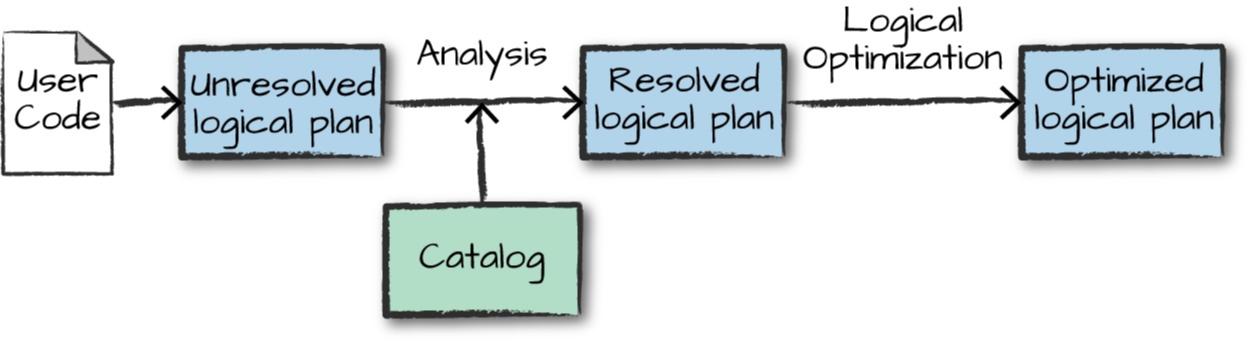

The logical plan represents  a set of abstract transformations. It's purely convert the user code into the most optimized version.
The analyser may reject the logical plan if the required table or column name doesn't exist.  
If the Analyser can resolve it the result is passed through the Catalyst Optimizer witch is a set of rules that attempt to optimize the logical plan. 

## <a id='3.2'>3.2. Physical Planning</a>

Afte sucessfully creating the optimized logical plan. Spark begins the physical planning process.  
This specifies how logical plan will execute on cluster by generating different physical execution strategies and comparing them through a cost model.

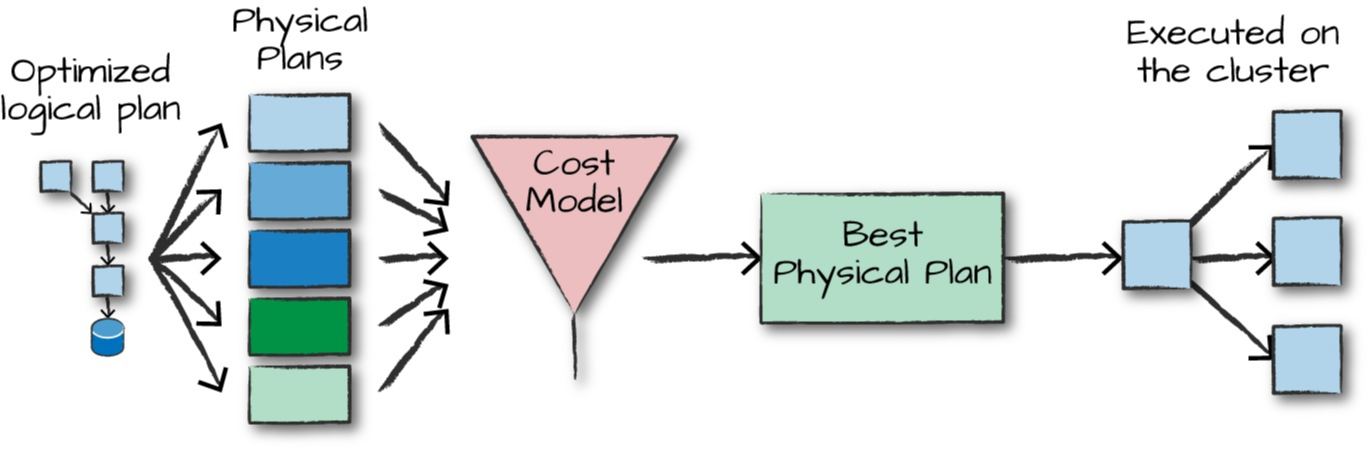

## <a id='3.3'>3.3. Execution</a>

After selecting the physical plan to execute spark runs all of his this code over RDD(Resilient Distributed Datasets) the lower-level programing interface of spark.   
Spark performs further optimizations at runtime generate native java bytecode that can remove entire tasks or stages.

# <a id='4'>4. Structed Operations</a>
In this chapter we will analize and transform a retail dataset. 

But first we need to put that in hadoop file system to do that:   
* Open a new terminal 
* Run `hdfs dfs -put retail_data_2010-12-01.csv`

In [ ]:
#Read the dataset 
df = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema","true")\
.load("retail_data_2010-12-01.csv")

## <a id='4.1'>4.1. Columns and Expressions</a>

What is the shema?
Use printSchema function to see the schema.

**We can define schema manual as this:**


In [ ]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, TimestampType, DoubleType

manualSchema = StructType([StructField("InvoiceNo", StringType(),True),
                             StructField("StockCode", StringType(),True),
                             StructField("Description", StringType(),True),
                             StructField("Quantity", IntegerType(),True),
                             StructField("InvoiceDate", TimestampType(),True),
                             StructField("UnitPrice", DoubleType(),True),
                             StructField("CustomerID", DoubleType(),True),
                             StructField("Country", StringType(),True)
                            ])

In [ ]:
df = spark.read.format("csv").schema(manualSchema).load("retail_data_2010-12-01.csv")

In [ ]:
# Columns are similar to coluns in pandas dataframes 
# we can manupulate or remove columns  using expression operations
# In spark we can't manipulate individual columns outside the context of dataframes 
# we must use Spark transformations to modify the content of a column

# to create a column use

from pyspark.sql.functions import col, column
# works the same there is no diference see 
col("newColumnName")
column("newColumnName")

In [ ]:
(((col("someCol") + 5) * 200) -6) < col("otherCol")

In [ ]:
from pyspark.sql.functions import expr
expr("(((someCol + 5)* 200) -6 ) < otherCol")

## <a id='4.2'>4.2. Records and Rows</a>

In [ ]:
df.first()

### Creating Rows

In [ ]:
from pyspark.sql import Row
newRow = Row("555555","85123B","New Product",2016,6,2.1,141131,"Lisbon")

### Create Dataframe

In [ ]:
# this will create a new row and assign the columns name numbers like _1,_2 etc.. 
#To specify the column name we need to define the schema 
myDataframe = spark.createDataFrame([newRow]) 

In [ ]:
myDataframe.take(1)

### Select and SelectExpr
This functions allow to do the DataFrame equivalent of SQL queries on a table of data.

* `Select` and `SelectExpt` are the same only with different definitions.


In [ ]:
df.select("Description","Country").show(50);

### Adding explicit values to compare (Literals) 

In [ ]:
from pyspark.sql.functions import lit
df.select(expr("*"), lit("Portugal").alias("Other")).show(2)

In [ ]:
df.show(2)

### Adding Columns to Dataframe

In [ ]:
df_new_column = df.withColumn("OtherC", lit("Portugal"))

In [ ]:
df.withColumn("OtherC", expr("Country")).show(5)

In [ ]:
# Check if the country has the same value of OtherCountry
df_new_column.withColumn("withinCounty", expr("Country == OtherC")).show(5)

### Rename Columns

In [ ]:
# Use the function withColumnRenamed
df_with_renamed_column = df.withColumnRenamed("Country", "OriginCounty")

In [ ]:
df_with_renamed_column

### Remove Columns

In [ ]:
new_df = df_with_renamed_column.drop("OriginCounty")

In [ ]:
new_df.show(5)

### Remove Multiple Columns

In [ ]:
new_df = df_with_renamed_column.drop("OriginCounty","UnitPrice")

In [ ]:
new_df.show(5)

### Changing a column type

In [ ]:
df_with_newcoltype = df.withColumn("Quantity2",col("Quantity").cast("string"))

In [ ]:
df_with_newcoltype.show(2)
df_with_newcoltype.printSchema()

### Filtering Rows
To filter rows we create a expression that evaluates to true or false then we filter with an expression.   
For that we can use `filter` or `where`.


In [ ]:
df.filter(col("Quantity") < 5).show(2)

In [ ]:
df.where(col("Quantity") < 5).show(2)

### Getting Unique rows

Using the **dataset** use the **distinct to count** the number of unique column Country that appears in the dataset.  
**Tip:** Use the function `distinct()` and `count()`.

In [ ]:
# Use distinct to count the distinct Country that appears in the dataset

### Random Sample 
Sometimes for training a model we need to get a random sample of our data 
to do that we use the function `df.sample()`


In [ ]:
df.count()

In [ ]:
seed = 5
with_replacement = False
fraction = 0.5
df.sample(withReplacement=with_replacement, fraction=fraction, seed=seed).count()# reduce to 50%

### Random Splits
Random Splits can be helpfull when we need to break our dataset into random splits of the orginal.  
This is often used in machine learning algorithms to create training validation and test sets.

In [ ]:
dataframes = df.randomSplit([0.25, 0.75])
dataframes[0].count() > dataframes[1].count()


In [ ]:
dataframes[0].count()

In [ ]:
dataframes[1].count()

### Concatenating and Appending Rows

To union two dataframes **we must make sure that they have the same schema and number of columns.**

In [ ]:
schema = df.schema

newRows = [Row("555555","85123B","New Product",2016,6,2.1,141131,"Lisbon"),
          Row("555556","85124B","New Product2 ",2017,7,2.1,141131,"Lisbon")]
parallelizedRows = spark.sparkContext.parallelize(newRow)
newDF = spark.createDataFrame(parallelizedRows,schema)

### Sorting Rows

Sometimes we need to sort our values by newer data, biggest value etc.. to do that we use:

* `sort`  or `orderBy` it works exactly at the same way
* For **Optimization** sometimes it's advisable to sort with partitions before any transformation.  We can use `sortWithinPartitions` for the effect

In [ ]:
df.orderBy(col("Quantity")).show(5)
df.orderBy("Quantity").show(5)
df.sort("Quantity").show(5)

To specify the direction we must use the keywords 
* `desc` -> Oders data from the biggest value to the lower. 
* ` asc` -> Orders the data from the lower value to the biggest.



**Exercise** 

Using the functions desc and asc:

* Order the dataframe by UnitPrice order asc.
* Order the dataframe by Quantity order desc.

In [ ]:
from pyspark.sql.functions import desc, asc


In [ ]:
# Order the dataframe by UnitPrice order asc.

In [ ]:
# Order the dataframe by Quantity order desc.

### Limit 
Limit the number of rows to show in the output. Like Limit function in SQL

In [ ]:
df.limit(5).show()

In [ ]:
df.orderBy(expr("Quantity desc")).limit(5).show()

### Repartition and Coalesce

Optimization opportunity is to partition the data according to some frequently
filtered columns, which control the physical layout of data across the cluster including the
partitioning scheme and the number of partitions.  
Repartition will incur a full shuffle of the data.

`getNumPartitions` -> Get the number of partitions of actual dataframe.  
`repartition` -> Repartition the dataset.

In [ ]:
df.rdd.getNumPartitions()

In [ ]:
df.repartition(5)

In [ ]:
df.repartition(col("Country"))

In [ ]:
df.repartition(5, col("Country"))

**Coalesce**  The coalesce method reduces the number of partitions in a DataFrame.  
This
operation will shuffle your data into five partitions based on the country, and
then coalesce them:

In [ ]:
df.repartition(5, col("Country")).coalesce(2)

### Colecting Rows to the Driver

Spark mantains the state of the state of the cluster in the Driver to get the result of this transformations we need to call the actions:

* `collect` -> Gets all the data from the entire dataframe returns a List
* `take` -> Selects the first N Rows
* `show` -> Prints out a number of rows nicely
* `toLocalIterator` -> Simmilar to collect however returns an Iterator.

In [ ]:
collectRows = df.limit(10)
collectRows.take(5)
collectRows.show()
collectRows.collect()
collectRows.toLocalIterator() 

# <a id='5'>5. Exercise</a>

# Customer Churn

Customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer churn analysis and customer churn rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

## Column Description   



| Column     | Type       | Description |
|--------  |---------  |: --------- |
| **customerID** | String | Customer ID |
| **gender** | String | Whether the customer is a male or a female |
| **SeniorCitizen** | Integer | Whether the customer is a senior citizen or not (1, 0) |
| **Partner** | String | Whether the customer has a partner or not (Yes, No) |
| **Dependents** | String | Whether the customer has dependents or not (Yes, No) |
| **tenure** | Integer | Number of months the customer has stayed with the company |
| **PhoneService** | String | Whether the customer has a phone service or not (Yes, No) |
| **MultipleLines** | String | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| **InternetService** | String | Customer’s internet service provider (DSL, Fiber optic, No) |
| **OnlineSecurity** | String | Whether the customer has online security or not (Yes, No, No internet service) |
| **OnlineBackup** | String | Whether the customer has online backup or not (Yes, No, No internet service) |
| **DeviceProtection** | String | Whether the customer has device protection or not (Yes, No, No internet service) |
| **TechSupport** | String | Whether the customer has tech support or not (Yes, No, No internet service) |
| **StreamingTV** | String | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| **StreamingMovies** | String | Whether the customer has a partner or not (Yes, No) |
| **Contract** | String | The contract term of the customer (Month-to-month, One year, Two year) |
| **PaperlessBilling** | String | Whether the customer has paperless billing or not (Yes, No) |
| **PaymentMethod** | String | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| **MonthlyCharges** | Double | The amount charged to the customer monthly |
| **TotalCharges** | String | The total amount charged to the customer |
| **Churn** | String | Whether the customer churned or not (Yes or No) |

In [ ]:
# Run the command command 'hdfs dfs -put WA_Fn-UseC_-Telco-Customer-Churn.csv' to put the dataframe in hfds.
# The dataframe name is:

In [ ]:
# Create the dataframe.

In [ ]:
# Count the number of rows.

In [ ]:
# Count the number of columns.

In [ ]:
# Print the Schema.

In [ ]:
# Using command describe, get the min, max,avg of each column.

In [ ]:
# Count the number of unique values using distinct function in each column

# <a id='6'>6. References</a>


https://www.oreilly.com/library/view/spark-the-definitive/9781491912201/

https://www.kaggle.com/blastchar/telco-customer-churn